In [1]:
# All the necesssary imports.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation, Dropout
from keras.layers import LeakyReLU
from keras import initializers
from keras.datasets import mnist
from keras.optimizers import Adam, RMSprop, SGD
import numpy as np
import matplotlib.pyplot as plt

/Users/Home/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/Home/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Load in the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize to [-1, 1]
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

# For the sake of time don't work with the entire dataset.
x_train = x_train[:]
y_train = x_train[:]

# Flatten the data.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

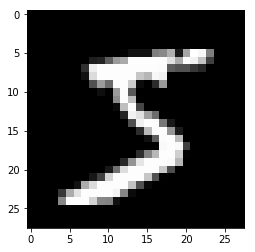

In [3]:
# Plot out a sample image (reshaped to 28 x 28)
plt.imshow(x_train[0].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# How many noise dimensions our generator should take in
NOISE_DIM = 100 # Feel free to tweak this and see what changes you get

# Define the generator here.
# The generator should have the following layers.
# Fully connected from # noise dimensions to 256
# LeakyReLU
# Fully connected from 256 to 512
# LeakyReLU
# Fully connected from 512 to 1024
# LeakyReLU
# Fully connected from 1024 to 784 (28*28)
# tanh (To normalize our output from -1 to 1)

def generator():
    model = Sequential()
    
    model.add(Dense(256, input_dim=100, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU())
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dense(1024))
    model.add(LeakyReLU())
    model.add(Dense(784))
    model.add(Activation('tanh'))
    
    return model

In [5]:
# Define the discriminator here.
# Should have the following layers
# Fully connected from 784 (28*28) to 1024
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 1024 to 512
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 512 to 256
# LeakyReLU
# Dropout with p = 0.3
# Fully connected from 256 to 1
# sigmoid (to get our probability)

def discriminator():
    model = Sequential()
    
    model.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    
    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model

In [6]:
# Feed the generated image into the discriminator. 
# We’ll use this to train our generator end-to-end later on, 
    # while leaving the discriminator weights untouched
# Remember that we are not updating our discriminator in this step. 
# We can add existing Sequential() models to new models, just like we can with any other layer.
    # The parameters are then "passed by reference," so that they use the same internal weights.

def combine(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)
    
    return model

In [7]:
# Compile the discriminator, generator, and full GAN. 
# Probably use Adam optimizer...

LOSS = 'binary_crossentropy'
OPTIMIZER = Adam(lr=0.0002, beta_1=0.5)

# Discriminator
d = discriminator()
d.compile(loss = LOSS, optimizer = OPTIMIZER)

# Generator
g = generator()
g.compile(loss = LOSS, optimizer = OPTIMIZER)

# Full gan
dg = combine(g, d)
dg.compile(loss = LOSS, optimizer = OPTIMIZER)

In [8]:
# Helper function to display sample from the network
def disp_sample(g):
    noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
    generated_images = g.predict(noise, verbose=0)
    show_im = generated_images[0]
    show_im = (show_im + 1) / 2.0
    show_im = show_im.reshape(28, 28)
    plt.imshow(show_im, cmap='gray')
    plt.show()

Epoch #0


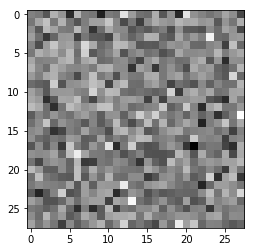

Number batches 468
0(0/468) D: 0.6232, G: 0.6915
0(1/468) D: 0.3980, G: 0.6773
0(2/468) D: 0.3761, G: 0.6593
0(3/468) D: 0.3822, G: 0.6400
0(4/468) D: 0.3967, G: 0.6252
0(5/468) D: 0.4114, G: 0.6133
0(6/468) D: 0.4234, G: 0.6110
0(7/468) D: 0.4291, G: 0.6186
0(8/468) D: 0.4214, G: 0.6570
0(9/468) D: 0.4092, G: 0.6947
0(10/468) D: 0.4005, G: 0.7302
0(11/468) D: 0.3939, G: 0.7423
0(12/468) D: 0.4001, G: 0.7499
0(13/468) D: 0.4132, G: 0.7686
0(14/468) D: 0.4225, G: 0.7781
0(15/468) D: 0.4239, G: 0.7832
0(16/468) D: 0.4180, G: 0.8407
0(17/468) D: 0.4136, G: 0.8017
0(18/468) D: 0.4203, G: 0.8689
0(19/468) D: 0.4334, G: 0.8020
0(20/468) D: 0.4493, G: 0.8819
0(21/468) D: 0.4437, G: 0.8685
0(22/468) D: 0.4159, G: 0.9306
0(23/468) D: 0.4054, G: 0.9463
0(24/468) D: 0.4096, G: 0.9209
0(25/468) D: 0.4095, G: 1.0165
0(26/468) D: 0.4371, G: 0.7433
0(27/468) D: 0.5099, G: 0.8502
0(28/468) D: 0.4308, G: 1.0756
0(29/468) D: 0.5147, G: 0.5708
0(30/468) D: 0.5734, G: 0.5739
0(31/468) D: 0.5795, G: 0.8437

0(259/468) D: 0.2557, G: 3.2954
0(260/468) D: 0.3324, G: 0.8668
0(261/468) D: 0.6050, G: 3.7546
0(262/468) D: 0.5603, G: 1.0740
0(263/468) D: 0.4691, G: 2.0838
0(264/468) D: 0.2539, G: 2.6349
0(265/468) D: 0.2490, G: 1.9220
0(266/468) D: 0.2108, G: 2.2331
0(267/468) D: 0.2449, G: 1.8550
0(268/468) D: 0.3020, G: 2.2981
0(269/468) D: 0.2699, G: 2.0586
0(270/468) D: 0.3017, G: 3.0089
0(271/468) D: 0.2845, G: 1.3537
0(272/468) D: 0.3708, G: 3.9639
0(273/468) D: 0.4793, G: 1.0924
0(274/468) D: 0.4712, G: 2.9041
0(275/468) D: 0.2037, G: 2.5931
0(276/468) D: 0.1608, G: 2.2750
0(277/468) D: 0.2152, G: 2.8547
0(278/468) D: 0.2424, G: 1.9683
0(279/468) D: 0.3036, G: 2.7927
0(280/468) D: 0.3450, G: 1.1981
0(281/468) D: 0.5201, G: 4.0861
0(282/468) D: 0.5513, G: 1.5639
0(283/468) D: 0.2865, G: 1.9472
0(284/468) D: 0.2199, G: 2.5923
0(285/468) D: 0.1689, G: 2.5981
0(286/468) D: 0.1503, G: 2.3945
0(287/468) D: 0.1764, G: 3.0374
0(288/468) D: 0.2121, G: 2.4760
0(289/468) D: 0.2474, G: 2.5956
0(290/46

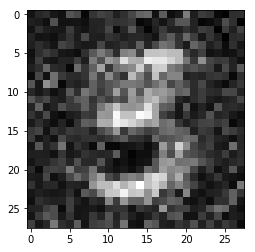

Number batches 468
1(0/468) D: 0.4951, G: 1.2943
1(1/468) D: 0.5337, G: 3.1287
1(2/468) D: 0.5244, G: 0.8878
1(3/468) D: 0.5387, G: 2.9979
1(4/468) D: 0.3979, G: 1.9309
1(5/468) D: 0.2840, G: 1.4650
1(6/468) D: 0.3338, G: 2.1500
1(7/468) D: 0.3133, G: 1.9125
1(8/468) D: 0.3607, G: 1.4459
1(9/468) D: 0.4098, G: 2.4709
1(10/468) D: 0.3747, G: 1.7248
1(11/468) D: 0.3058, G: 1.9098
1(12/468) D: 0.3415, G: 2.0288
1(13/468) D: 0.3628, G: 1.8128
1(14/468) D: 0.3598, G: 1.8409
1(15/468) D: 0.3145, G: 2.4051
1(16/468) D: 0.2927, G: 2.1294
1(17/468) D: 0.2903, G: 2.6257
1(18/468) D: 0.3530, G: 1.3517
1(19/468) D: 0.4573, G: 3.8470
1(20/468) D: 0.5569, G: 1.0990
1(21/468) D: 0.4060, G: 2.4015
1(22/468) D: 0.2431, G: 2.9927
1(23/468) D: 0.3067, G: 1.8218
1(24/468) D: 0.2701, G: 2.7238
1(25/468) D: 0.1912, G: 3.4475
1(26/468) D: 0.2774, G: 1.7986
1(27/468) D: 0.3392, G: 3.0793
1(28/468) D: 0.3844, G: 1.8514
1(29/468) D: 0.3385, G: 2.1763
1(30/468) D: 0.3290, G: 2.5048
1(31/468) D: 0.3332, G: 1.5837

1(259/468) D: 0.2733, G: 2.7220
1(260/468) D: 0.2462, G: 1.9005
1(261/468) D: 0.3185, G: 2.0744
1(262/468) D: 0.3105, G: 2.1527
1(263/468) D: 0.4471, G: 1.8071
1(264/468) D: 0.3525, G: 2.3507
1(265/468) D: 0.3214, G: 1.7006
1(266/468) D: 0.4125, G: 3.3077
1(267/468) D: 0.4914, G: 0.7548
1(268/468) D: 0.6614, G: 4.2975
1(269/468) D: 0.6580, G: 2.0621
1(270/468) D: 0.3589, G: 1.1728
1(271/468) D: 0.3634, G: 2.6947
1(272/468) D: 0.2599, G: 2.3795
1(273/468) D: 0.2129, G: 1.8417
1(274/468) D: 0.3221, G: 2.2122
1(275/468) D: 0.2751, G: 2.8321
1(276/468) D: 0.2746, G: 1.8797
1(277/468) D: 0.2542, G: 2.7859
1(278/468) D: 0.2933, G: 2.1955
1(279/468) D: 0.3468, G: 2.1606
1(280/468) D: 0.3845, G: 1.6526
1(281/468) D: 0.4241, G: 2.4301
1(282/468) D: 0.2905, G: 2.3502
1(283/468) D: 0.2427, G: 3.0734
1(284/468) D: 0.3551, G: 1.6121
1(285/468) D: 0.3285, G: 2.6461
1(286/468) D: 0.3040, G: 2.0583
1(287/468) D: 0.2884, G: 2.4007
1(288/468) D: 0.3109, G: 2.1981
1(289/468) D: 0.2585, G: 1.9485
1(290/46

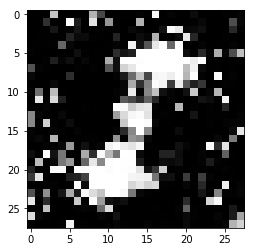

Number batches 468
2(0/468) D: 0.4826, G: 1.5349
2(1/468) D: 0.4559, G: 4.2450
2(2/468) D: 0.6443, G: 1.0448
2(3/468) D: 0.4833, G: 3.0388
2(4/468) D: 0.2985, G: 2.4632
2(5/468) D: 0.2814, G: 2.0857
2(6/468) D: 0.2828, G: 3.0142
2(7/468) D: 0.2693, G: 2.3154
2(8/468) D: 0.2904, G: 1.9600
2(9/468) D: 0.3209, G: 3.8015
2(10/468) D: 0.2337, G: 3.0257
2(11/468) D: 0.3156, G: 1.0184
2(12/468) D: 0.4424, G: 4.5776
2(13/468) D: 0.6059, G: 1.9544
2(14/468) D: 0.2380, G: 1.7696
2(15/468) D: 0.2964, G: 3.4449
2(16/468) D: 0.2827, G: 2.6108
2(17/468) D: 0.2201, G: 2.2907
2(18/468) D: 0.2435, G: 2.1357
2(19/468) D: 0.2504, G: 2.8227
2(20/468) D: 0.2083, G: 2.6578
2(21/468) D: 0.2461, G: 2.0244
2(22/468) D: 0.3126, G: 2.9097
2(23/468) D: 0.2977, G: 1.4263
2(24/468) D: 0.3504, G: 3.8276
2(25/468) D: 0.6126, G: 1.0145
2(26/468) D: 0.5615, G: 2.9584
2(27/468) D: 0.3841, G: 2.5233
2(28/468) D: 0.2539, G: 1.6684
2(29/468) D: 0.2822, G: 2.3925
2(30/468) D: 0.2675, G: 2.4567
2(31/468) D: 0.2689, G: 2.1832

2(259/468) D: 0.2935, G: 3.9553
2(260/468) D: 0.2811, G: 2.6611
2(261/468) D: 0.2431, G: 1.4849
2(262/468) D: 0.3218, G: 4.3328
2(263/468) D: 0.4006, G: 2.4786
2(264/468) D: 0.2929, G: 1.6155
2(265/468) D: 0.3764, G: 3.6520
2(266/468) D: 0.2560, G: 2.4220
2(267/468) D: 0.2329, G: 2.8085
2(268/468) D: 0.2236, G: 3.0478
2(269/468) D: 0.1928, G: 2.7021
2(270/468) D: 0.2397, G: 2.3093
2(271/468) D: 0.2403, G: 3.4119
2(272/468) D: 0.3224, G: 1.9233
2(273/468) D: 0.3129, G: 3.8875
2(274/468) D: 0.3137, G: 1.8083
2(275/468) D: 0.2694, G: 3.3956
2(276/468) D: 0.2769, G: 2.5358
2(277/468) D: 0.2271, G: 2.3050
2(278/468) D: 0.2527, G: 3.2914
2(279/468) D: 0.2352, G: 2.4476
2(280/468) D: 0.3199, G: 3.1099
2(281/468) D: 0.2206, G: 2.4188
2(282/468) D: 0.2145, G: 3.0330
2(283/468) D: 0.2375, G: 2.2914
2(284/468) D: 0.2582, G: 3.0780
2(285/468) D: 0.3436, G: 2.1126
2(286/468) D: 0.2558, G: 3.2978
2(287/468) D: 0.2313, G: 2.5207
2(288/468) D: 0.2459, G: 2.5817
2(289/468) D: 0.2567, G: 2.8154
2(290/46

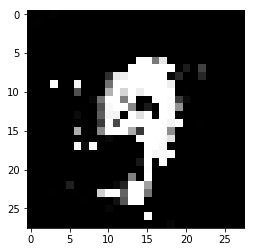

Number batches 468
3(0/468) D: 0.2808, G: 2.2004
3(1/468) D: 0.3077, G: 3.4440
3(2/468) D: 0.2593, G: 1.9024
3(3/468) D: 0.3185, G: 3.2700
3(4/468) D: 0.2699, G: 1.8582
3(5/468) D: 0.2603, G: 3.6393
3(6/468) D: 0.2875, G: 2.0951
3(7/468) D: 0.2028, G: 2.8820
3(8/468) D: 0.3035, G: 2.6291
3(9/468) D: 0.2809, G: 2.4283
3(10/468) D: 0.1540, G: 2.7847
3(11/468) D: 0.2324, G: 2.8792
3(12/468) D: 0.2507, G: 2.6224
3(13/468) D: 0.2664, G: 1.8860
3(14/468) D: 0.2332, G: 4.2676
3(15/468) D: 0.3144, G: 2.4833
3(16/468) D: 0.2235, G: 2.9400
3(17/468) D: 0.1310, G: 3.7936
3(18/468) D: 0.2557, G: 1.4692
3(19/468) D: 0.3397, G: 4.6288
3(20/468) D: 0.3279, G: 3.6256
3(21/468) D: 0.2006, G: 1.5336
3(22/468) D: 0.3525, G: 4.6490
3(23/468) D: 0.3156, G: 3.1264
3(24/468) D: 0.1912, G: 1.4664
3(25/468) D: 0.2895, G: 4.7022
3(26/468) D: 0.3492, G: 3.1097
3(27/468) D: 0.1722, G: 1.9577
3(28/468) D: 0.1922, G: 4.1385
3(29/468) D: 0.2354, G: 2.5210
3(30/468) D: 0.2105, G: 2.2389
3(31/468) D: 0.1540, G: 3.4837

3(259/468) D: 0.1689, G: 3.6612
3(260/468) D: 0.1950, G: 2.4937
3(261/468) D: 0.1946, G: 2.9549
3(262/468) D: 0.1884, G: 2.6403
3(263/468) D: 0.1843, G: 4.3132
3(264/468) D: 0.2682, G: 2.0107
3(265/468) D: 0.2345, G: 3.1726
3(266/468) D: 0.1205, G: 3.5615
3(267/468) D: 0.2405, G: 1.5962
3(268/468) D: 0.3033, G: 5.0020
3(269/468) D: 0.3867, G: 2.4357
3(270/468) D: 0.2183, G: 3.2006
3(271/468) D: 0.1322, G: 3.4524
3(272/468) D: 0.2176, G: 2.4463
3(273/468) D: 0.1835, G: 2.8726
3(274/468) D: 0.1553, G: 3.8736
3(275/468) D: 0.1514, G: 2.8876
3(276/468) D: 0.1819, G: 2.4831
3(277/468) D: 0.1548, G: 3.9198
3(278/468) D: 0.1438, G: 3.2303
3(279/468) D: 0.2314, G: 1.7524
3(280/468) D: 0.3512, G: 5.6403
3(281/468) D: 0.6040, G: 1.3392
3(282/468) D: 0.5361, G: 3.6614
3(283/468) D: 0.2885, G: 3.6190
3(284/468) D: 0.2884, G: 2.2005
3(285/468) D: 0.2025, G: 3.1028
3(286/468) D: 0.1748, G: 2.9671
3(287/468) D: 0.1824, G: 2.5350
3(288/468) D: 0.1836, G: 2.5934
3(289/468) D: 0.2181, G: 2.4664
3(290/46

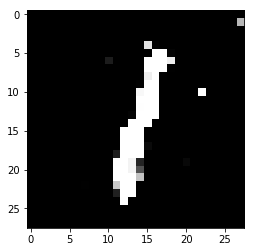

Number batches 468
4(0/468) D: 0.2024, G: 3.1287
4(1/468) D: 0.1743, G: 2.7912
4(2/468) D: 0.1950, G: 2.3151
4(3/468) D: 0.1755, G: 4.2233
4(4/468) D: 0.1496, G: 3.8900
4(5/468) D: 0.1436, G: 2.2458
4(6/468) D: 0.1931, G: 4.2488
4(7/468) D: 0.1535, G: 4.1766
4(8/468) D: 0.2048, G: 2.3442
4(9/468) D: 0.2029, G: 4.0846
4(10/468) D: 0.1579, G: 3.6836
4(11/468) D: 0.1794, G: 2.6223
4(12/468) D: 0.1956, G: 3.1247
4(13/468) D: 0.2681, G: 2.7385
4(14/468) D: 0.1693, G: 3.7961
4(15/468) D: 0.1930, G: 2.5886
4(16/468) D: 0.2522, G: 2.9703
4(17/468) D: 0.1284, G: 4.1736
4(18/468) D: 0.3002, G: 1.9779
4(19/468) D: 0.2469, G: 4.9576
4(20/468) D: 0.2678, G: 3.9567
4(21/468) D: 0.2567, G: 1.5341
4(22/468) D: 0.4516, G: 5.2808
4(23/468) D: 0.4039, G: 3.3943
4(24/468) D: 0.2431, G: 1.3095
4(25/468) D: 0.3441, G: 4.3640
4(26/468) D: 0.3144, G: 3.2846
4(27/468) D: 0.2253, G: 1.5889
4(28/468) D: 0.3589, G: 3.7040
4(29/468) D: 0.3050, G: 3.1757
4(30/468) D: 0.2209, G: 1.6783
4(31/468) D: 0.2076, G: 2.6375

4(259/468) D: 0.2945, G: 3.4896
4(260/468) D: 0.2527, G: 2.9032
4(261/468) D: 0.2351, G: 1.8310
4(262/468) D: 0.2177, G: 2.8048
4(263/468) D: 0.1616, G: 3.4102
4(264/468) D: 0.2032, G: 2.6169
4(265/468) D: 0.2704, G: 2.3650
4(266/468) D: 0.1703, G: 2.0421
4(267/468) D: 0.1912, G: 3.3393
4(268/468) D: 0.1702, G: 3.2750
4(269/468) D: 0.1298, G: 2.6067
4(270/468) D: 0.1983, G: 2.2873
4(271/468) D: 0.1783, G: 3.0665
4(272/468) D: 0.2142, G: 2.2053
4(273/468) D: 0.2398, G: 3.1480
4(274/468) D: 0.1549, G: 3.0392
4(275/468) D: 0.2353, G: 2.4546
4(276/468) D: 0.2287, G: 3.1136
4(277/468) D: 0.1777, G: 2.6836
4(278/468) D: 0.1440, G: 2.5969
4(279/468) D: 0.2083, G: 2.2575
4(280/468) D: 0.2212, G: 4.1703
4(281/468) D: 0.3086, G: 1.9056
4(282/468) D: 0.2922, G: 4.4556
4(283/468) D: 0.2326, G: 3.4878
4(284/468) D: 0.3207, G: 1.0507
4(285/468) D: 0.4332, G: 5.0868
4(286/468) D: 0.2545, G: 4.7307
4(287/468) D: 0.2452, G: 3.6233
4(288/468) D: 0.2225, G: 2.1656
4(289/468) D: 0.3243, G: 3.1679
4(290/46

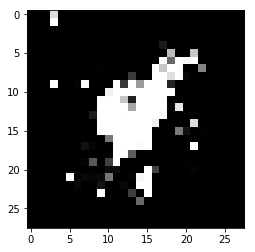

Number batches 468
5(0/468) D: 0.3305, G: 2.1052
5(1/468) D: 0.2509, G: 2.8223
5(2/468) D: 0.2187, G: 2.5981
5(3/468) D: 0.2231, G: 2.0134
5(4/468) D: 0.2351, G: 3.8706
5(5/468) D: 0.2451, G: 2.8488
5(6/468) D: 0.1668, G: 2.2340
5(7/468) D: 0.1763, G: 2.9685
5(8/468) D: 0.2460, G: 2.3358
5(9/468) D: 0.1728, G: 2.8201
5(10/468) D: 0.1628, G: 3.0055
5(11/468) D: 0.2222, G: 2.3086
5(12/468) D: 0.2043, G: 3.2023
5(13/468) D: 0.2520, G: 2.0748
5(14/468) D: 0.2156, G: 3.2618
5(15/468) D: 0.1968, G: 2.8962
5(16/468) D: 0.1720, G: 2.7148
5(17/468) D: 0.1666, G: 2.8216
5(18/468) D: 0.2017, G: 3.0272
5(19/468) D: 0.1926, G: 2.8004
5(20/468) D: 0.2135, G: 2.7081
5(21/468) D: 0.2164, G: 2.2080
5(22/468) D: 0.2037, G: 2.5529
5(23/468) D: 0.1687, G: 3.3400
5(24/468) D: 0.2017, G: 2.4783
5(25/468) D: 0.1445, G: 2.2345
5(26/468) D: 0.2240, G: 2.9596
5(27/468) D: 0.2028, G: 2.5887
5(28/468) D: 0.1629, G: 2.4633
5(29/468) D: 0.2366, G: 2.2727
5(30/468) D: 0.1971, G: 3.4369
5(31/468) D: 0.1408, G: 3.0884

5(259/468) D: 0.2073, G: 2.9056
5(260/468) D: 0.2270, G: 2.6277
5(261/468) D: 0.2489, G: 2.0933
5(262/468) D: 0.2266, G: 2.8790
5(263/468) D: 0.1731, G: 2.5673
5(264/468) D: 0.2227, G: 2.3995
5(265/468) D: 0.2380, G: 2.8292
5(266/468) D: 0.2054, G: 2.7184
5(267/468) D: 0.2302, G: 2.5450
5(268/468) D: 0.1895, G: 3.8094
5(269/468) D: 0.1691, G: 3.5054
5(270/468) D: 0.3229, G: 1.3396
5(271/468) D: 0.3486, G: 4.0091
5(272/468) D: 0.2762, G: 3.5450
5(273/468) D: 0.2692, G: 2.2156
5(274/468) D: 0.2170, G: 2.7664
5(275/468) D: 0.2461, G: 2.8537
5(276/468) D: 0.2925, G: 2.0274
5(277/468) D: 0.2010, G: 2.9740
5(278/468) D: 0.2200, G: 2.6589
5(279/468) D: 0.2615, G: 2.0220
5(280/468) D: 0.1999, G: 2.5905
5(281/468) D: 0.2372, G: 2.4070
5(282/468) D: 0.1948, G: 2.4369
5(283/468) D: 0.1744, G: 2.5879
5(284/468) D: 0.2090, G: 2.4017
5(285/468) D: 0.2155, G: 2.8925
5(286/468) D: 0.2368, G: 2.5151
5(287/468) D: 0.1804, G: 3.4613
5(288/468) D: 0.2314, G: 2.6232
5(289/468) D: 0.2667, G: 1.7479
5(290/46

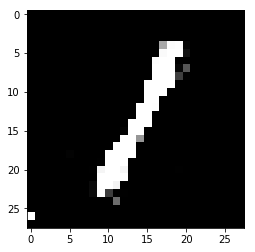

Number batches 468
6(0/468) D: 0.2855, G: 2.3823
6(1/468) D: 0.2089, G: 2.6210
6(2/468) D: 0.2398, G: 2.3020
6(3/468) D: 0.2928, G: 2.7061
6(4/468) D: 0.1985, G: 2.9962
6(5/468) D: 0.1854, G: 2.3182
6(6/468) D: 0.1904, G: 2.1424
6(7/468) D: 0.2037, G: 3.1862
6(8/468) D: 0.2485, G: 2.6274
6(9/468) D: 0.1923, G: 2.7270
6(10/468) D: 0.1336, G: 3.2364
6(11/468) D: 0.2561, G: 2.3696
6(12/468) D: 0.2065, G: 2.5880
6(13/468) D: 0.2702, G: 2.3799
6(14/468) D: 0.1784, G: 3.0268
6(15/468) D: 0.2526, G: 2.0032
6(16/468) D: 0.2390, G: 2.8717
6(17/468) D: 0.1876, G: 3.1584
6(18/468) D: 0.2501, G: 1.8723
6(19/468) D: 0.2607, G: 2.6827
6(20/468) D: 0.1971, G: 2.6729
6(21/468) D: 0.2397, G: 1.7189
6(22/468) D: 0.2375, G: 3.8174
6(23/468) D: 0.2381, G: 2.7656
6(24/468) D: 0.1830, G: 1.9618
6(25/468) D: 0.2305, G: 3.1697
6(26/468) D: 0.2759, G: 2.3616
6(27/468) D: 0.2147, G: 2.0896
6(28/468) D: 0.2226, G: 3.0949
6(29/468) D: 0.2724, G: 2.4363
6(30/468) D: 0.2157, G: 1.9813
6(31/468) D: 0.2126, G: 2.9853

6(259/468) D: 0.1870, G: 2.5367
6(260/468) D: 0.2302, G: 2.3566
6(261/468) D: 0.2346, G: 1.9341
6(262/468) D: 0.2614, G: 3.1260
6(263/468) D: 0.2411, G: 2.5714
6(264/468) D: 0.2383, G: 2.2085
6(265/468) D: 0.2251, G: 2.6289
6(266/468) D: 0.1807, G: 2.8059
6(267/468) D: 0.2808, G: 1.6725
6(268/468) D: 0.2712, G: 3.4433
6(269/468) D: 0.1542, G: 3.5573
6(270/468) D: 0.2505, G: 1.6305
6(271/468) D: 0.2532, G: 2.7563
6(272/468) D: 0.1642, G: 2.9490
6(273/468) D: 0.1858, G: 2.6659
6(274/468) D: 0.1781, G: 2.9677
6(275/468) D: 0.1850, G: 2.6223
6(276/468) D: 0.1630, G: 2.4375
6(277/468) D: 0.1436, G: 3.6451
6(278/468) D: 0.2149, G: 2.5495
6(279/468) D: 0.2611, G: 1.3696
6(280/468) D: 0.3400, G: 4.6465
6(281/468) D: 0.3675, G: 3.0551
6(282/468) D: 0.2563, G: 2.3602
6(283/468) D: 0.2216, G: 2.3480
6(284/468) D: 0.2516, G: 2.6855
6(285/468) D: 0.2341, G: 2.4646
6(286/468) D: 0.1741, G: 3.0494
6(287/468) D: 0.1652, G: 2.8233
6(288/468) D: 0.2439, G: 2.5856
6(289/468) D: 0.2580, G: 2.1451
6(290/46

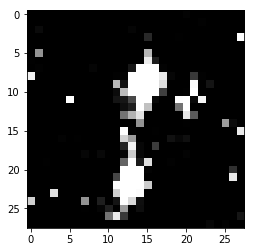

Number batches 468
7(0/468) D: 0.3422, G: 1.6551
7(1/468) D: 0.3937, G: 3.5810
7(2/468) D: 0.4137, G: 1.6263
7(3/468) D: 0.4108, G: 3.4210
7(4/468) D: 0.2724, G: 2.3460
7(5/468) D: 0.2162, G: 2.4601
7(6/468) D: 0.2045, G: 2.8209
7(7/468) D: 0.2049, G: 3.0781
7(8/468) D: 0.3066, G: 1.7097
7(9/468) D: 0.2996, G: 3.9235
7(10/468) D: 0.2383, G: 2.9962
7(11/468) D: 0.2634, G: 1.8551
7(12/468) D: 0.2488, G: 3.0363
7(13/468) D: 0.2753, G: 2.3940
7(14/468) D: 0.1956, G: 2.7057
7(15/468) D: 0.1786, G: 2.5730
7(16/468) D: 0.2233, G: 2.8220
7(17/468) D: 0.1861, G: 3.2187
7(18/468) D: 0.2690, G: 2.0778
7(19/468) D: 0.2127, G: 3.4501
7(20/468) D: 0.2365, G: 2.8400
7(21/468) D: 0.2870, G: 2.0239
7(22/468) D: 0.2572, G: 2.9917
7(23/468) D: 0.2297, G: 2.7307
7(24/468) D: 0.3042, G: 2.3543
7(25/468) D: 0.2513, G: 1.7710
7(26/468) D: 0.3027, G: 3.5399
7(27/468) D: 0.2678, G: 2.4386
7(28/468) D: 0.2398, G: 3.4272
7(29/468) D: 0.2691, G: 2.2947
7(30/468) D: 0.2874, G: 2.0317
7(31/468) D: 0.2402, G: 3.3961

7(259/468) D: 0.2648, G: 3.6677
7(260/468) D: 0.2681, G: 1.9066
7(261/468) D: 0.3109, G: 2.4794
7(262/468) D: 0.2874, G: 2.9388
7(263/468) D: 0.2021, G: 2.3027
7(264/468) D: 0.2294, G: 2.6556
7(265/468) D: 0.2397, G: 3.5951
7(266/468) D: 0.2349, G: 2.3958
7(267/468) D: 0.2219, G: 2.8419
7(268/468) D: 0.2409, G: 3.3523
7(269/468) D: 0.1925, G: 2.3585
7(270/468) D: 0.2578, G: 3.4160
7(271/468) D: 0.2379, G: 2.2626
7(272/468) D: 0.2580, G: 3.9885
7(273/468) D: 0.2260, G: 2.4322
7(274/468) D: 0.1809, G: 2.9141
7(275/468) D: 0.2268, G: 2.9559
7(276/468) D: 0.2017, G: 3.1208
7(277/468) D: 0.1761, G: 3.2273
7(278/468) D: 0.1937, G: 1.7098
7(279/468) D: 0.3444, G: 6.3140
7(280/468) D: 0.7765, G: 0.3318
7(281/468) D: 1.2374, G: 6.2923
7(282/468) D: 0.7778, G: 4.6531
7(283/468) D: 0.3376, G: 2.6093
7(284/468) D: 0.2893, G: 1.5944
7(285/468) D: 0.3530, G: 2.6877
7(286/468) D: 0.1572, G: 3.4619
7(287/468) D: 0.2320, G: 2.7045
7(288/468) D: 0.2292, G: 2.1108
7(289/468) D: 0.2619, G: 1.9588
7(290/46

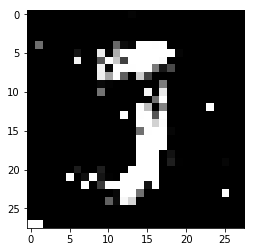

Number batches 468
8(0/468) D: 0.2904, G: 2.2185
8(1/468) D: 0.2690, G: 3.3290
8(2/468) D: 0.2404, G: 2.6200
8(3/468) D: 0.2209, G: 2.3546
8(4/468) D: 0.2458, G: 3.8426
8(5/468) D: 0.2656, G: 2.6024
8(6/468) D: 0.1682, G: 3.4259
8(7/468) D: 0.2890, G: 2.5586
8(8/468) D: 0.2507, G: 2.5586
8(9/468) D: 0.3653, G: 3.7052
8(10/468) D: 0.3181, G: 2.4515
8(11/468) D: 0.2842, G: 2.4426
8(12/468) D: 0.2824, G: 3.0199
8(13/468) D: 0.2896, G: 1.8416
8(14/468) D: 0.3202, G: 3.8590
8(15/468) D: 0.2643, G: 2.6720
8(16/468) D: 0.2616, G: 2.0687
8(17/468) D: 0.2914, G: 3.6692
8(18/468) D: 0.3948, G: 1.2673
8(19/468) D: 0.4053, G: 4.5500
8(20/468) D: 0.4331, G: 2.3365
8(21/468) D: 0.2708, G: 1.4172
8(22/468) D: 0.3382, G: 3.3608
8(23/468) D: 0.3759, G: 2.0485
8(24/468) D: 0.2965, G: 2.3830
8(25/468) D: 0.3113, G: 2.3727
8(26/468) D: 0.2701, G: 2.2584
8(27/468) D: 0.2839, G: 2.3449
8(28/468) D: 0.2532, G: 2.6386
8(29/468) D: 0.2652, G: 2.3632
8(30/468) D: 0.2496, G: 2.2150
8(31/468) D: 0.2652, G: 3.3715

8(259/468) D: 0.2365, G: 2.2226
8(260/468) D: 0.2629, G: 2.1848
8(261/468) D: 0.2990, G: 1.9096
8(262/468) D: 0.3810, G: 2.7019
8(263/468) D: 0.2966, G: 1.8494
8(264/468) D: 0.2930, G: 2.6599
8(265/468) D: 0.3772, G: 1.9916
8(266/468) D: 0.3228, G: 2.1429
8(267/468) D: 0.3017, G: 2.5685
8(268/468) D: 0.2469, G: 2.1906
8(269/468) D: 0.1967, G: 2.4374
8(270/468) D: 0.3375, G: 2.0377
8(271/468) D: 0.2424, G: 2.3422
8(272/468) D: 0.2683, G: 2.6456
8(273/468) D: 0.2160, G: 2.4911
8(274/468) D: 0.3206, G: 2.7888
8(275/468) D: 0.2867, G: 2.4052
8(276/468) D: 0.2518, G: 2.0209
8(277/468) D: 0.3450, G: 3.2207
8(278/468) D: 0.2775, G: 2.0412
8(279/468) D: 0.3411, G: 2.2808
8(280/468) D: 0.2616, G: 3.1821
8(281/468) D: 0.2886, G: 1.8582
8(282/468) D: 0.3041, G: 3.2665
8(283/468) D: 0.2939, G: 2.0706
8(284/468) D: 0.2690, G: 2.3244
8(285/468) D: 0.2764, G: 2.3511
8(286/468) D: 0.2755, G: 2.6103
8(287/468) D: 0.2916, G: 2.3767
8(288/468) D: 0.3238, G: 2.9076
8(289/468) D: 0.3912, G: 1.9344
8(290/46

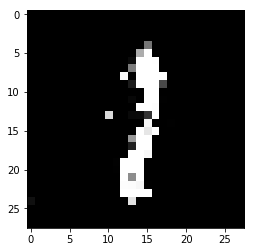

Number batches 468
9(0/468) D: 0.3317, G: 1.8476
9(1/468) D: 0.3524, G: 2.5911
9(2/468) D: 0.3174, G: 2.4596
9(3/468) D: 0.3202, G: 1.9885
9(4/468) D: 0.2699, G: 2.6211
9(5/468) D: 0.2526, G: 2.4557
9(6/468) D: 0.2734, G: 2.0511
9(7/468) D: 0.2817, G: 3.3906
9(8/468) D: 0.3832, G: 1.9637
9(9/468) D: 0.3451, G: 2.3549
9(10/468) D: 0.2289, G: 2.5239
9(11/468) D: 0.3043, G: 2.0304
9(12/468) D: 0.2899, G: 2.7984
9(13/468) D: 0.3344, G: 1.9588
9(14/468) D: 0.2609, G: 2.6556
9(15/468) D: 0.2898, G: 2.1015
9(16/468) D: 0.3108, G: 1.6601
9(17/468) D: 0.2892, G: 3.2349
9(18/468) D: 0.3183, G: 2.3617
9(19/468) D: 0.2894, G: 1.7673
9(20/468) D: 0.3277, G: 3.3406
9(21/468) D: 0.3154, G: 2.0918
9(22/468) D: 0.2881, G: 2.1124
9(23/468) D: 0.2517, G: 2.4399
9(24/468) D: 0.2916, G: 1.9000
9(25/468) D: 0.2803, G: 1.7241
9(26/468) D: 0.2756, G: 2.3739
9(27/468) D: 0.2789, G: 2.5332
9(28/468) D: 0.2457, G: 2.2686
9(29/468) D: 0.2329, G: 2.1606
9(30/468) D: 0.3084, G: 2.2487
9(31/468) D: 0.2360, G: 3.0344

9(259/468) D: 0.3192, G: 2.8059
9(260/468) D: 0.3259, G: 2.2522
9(261/468) D: 0.2977, G: 1.9048
9(262/468) D: 0.3090, G: 2.5657
9(263/468) D: 0.3088, G: 1.8103
9(264/468) D: 0.2897, G: 2.4654
9(265/468) D: 0.4113, G: 1.7854
9(266/468) D: 0.3355, G: 2.2803
9(267/468) D: 0.2974, G: 2.2334
9(268/468) D: 0.3033, G: 2.6183
9(269/468) D: 0.2190, G: 2.4949
9(270/468) D: 0.3490, G: 1.7849
9(271/468) D: 0.3669, G: 1.9065
9(272/468) D: 0.3031, G: 2.4162
9(273/468) D: 0.2450, G: 2.0098
9(274/468) D: 0.2204, G: 2.1440
9(275/468) D: 0.3543, G: 2.7778
9(276/468) D: 0.3435, G: 1.5448
9(277/468) D: 0.2881, G: 2.2771
9(278/468) D: 0.3198, G: 1.8266
9(279/468) D: 0.2971, G: 2.3040
9(280/468) D: 0.2676, G: 2.7987
9(281/468) D: 0.3175, G: 1.6152
9(282/468) D: 0.3012, G: 2.4406
9(283/468) D: 0.2502, G: 2.4199
9(284/468) D: 0.2896, G: 1.6822
9(285/468) D: 0.3260, G: 2.6440
9(286/468) D: 0.2788, G: 2.3941
9(287/468) D: 0.2628, G: 2.0905
9(288/468) D: 0.2624, G: 1.8227
9(289/468) D: 0.3442, G: 2.1246
9(290/46

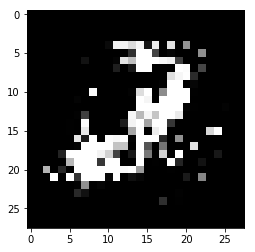

Number batches 468
10(0/468) D: 0.3543, G: 1.9632
10(1/468) D: 0.3412, G: 2.5302
10(2/468) D: 0.3536, G: 1.9795
10(3/468) D: 0.3589, G: 1.8568
10(4/468) D: 0.3341, G: 2.4611
10(5/468) D: 0.3322, G: 2.6544
10(6/468) D: 0.2758, G: 1.7501
10(7/468) D: 0.3166, G: 2.9299
10(8/468) D: 0.3994, G: 1.1236
10(9/468) D: 0.4483, G: 3.5423
10(10/468) D: 0.4196, G: 1.9366
10(11/468) D: 0.2966, G: 1.7057
10(12/468) D: 0.3383, G: 2.7600
10(13/468) D: 0.3151, G: 2.2855
10(14/468) D: 0.2424, G: 1.5683
10(15/468) D: 0.2968, G: 2.6477
10(16/468) D: 0.2715, G: 2.3874
10(17/468) D: 0.2225, G: 2.1839
10(18/468) D: 0.3749, G: 1.5611
10(19/468) D: 0.3158, G: 2.7776
10(20/468) D: 0.2849, G: 2.7641
10(21/468) D: 0.3027, G: 1.7548
10(22/468) D: 0.3368, G: 2.4517
10(23/468) D: 0.3072, G: 2.1578
10(24/468) D: 0.3021, G: 1.6697
10(25/468) D: 0.3758, G: 2.9251
10(26/468) D: 0.4695, G: 1.4098
10(27/468) D: 0.3423, G: 2.7487
10(28/468) D: 0.2376, G: 2.7904
10(29/468) D: 0.3341, G: 1.8211
10(30/468) D: 0.3520, G: 2.1777

10(252/468) D: 0.3455, G: 1.6427
10(253/468) D: 0.2981, G: 2.6817
10(254/468) D: 0.3656, G: 2.1925
10(255/468) D: 0.3288, G: 1.7353
10(256/468) D: 0.3559, G: 2.5795
10(257/468) D: 0.2571, G: 2.0300
10(258/468) D: 0.3182, G: 2.1087
10(259/468) D: 0.2857, G: 2.4556
10(260/468) D: 0.3121, G: 2.5112
10(261/468) D: 0.3539, G: 1.5763
10(262/468) D: 0.3766, G: 2.7112
10(263/468) D: 0.3428, G: 1.5703
10(264/468) D: 0.4116, G: 2.2439
10(265/468) D: 0.3228, G: 2.1015
10(266/468) D: 0.2973, G: 1.5625
10(267/468) D: 0.4053, G: 2.8605
10(268/468) D: 0.3640, G: 1.7837
10(269/468) D: 0.3368, G: 2.6004
10(270/468) D: 0.3396, G: 1.7845
10(271/468) D: 0.3094, G: 2.2142
10(272/468) D: 0.3172, G: 2.3294
10(273/468) D: 0.3576, G: 2.0940
10(274/468) D: 0.3267, G: 2.6575
10(275/468) D: 0.4038, G: 1.5965
10(276/468) D: 0.3642, G: 2.7508
10(277/468) D: 0.3167, G: 2.1906
10(278/468) D: 0.2877, G: 2.1368
10(279/468) D: 0.3306, G: 2.0517
10(280/468) D: 0.2778, G: 1.7569
10(281/468) D: 0.3454, G: 2.9410
10(282/468

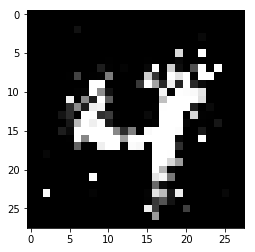

Number batches 468
11(0/468) D: 0.3564, G: 1.1446
11(1/468) D: 0.4450, G: 2.9863
11(2/468) D: 0.5046, G: 1.5351
11(3/468) D: 0.3851, G: 1.5431
11(4/468) D: 0.3072, G: 2.3289
11(5/468) D: 0.3501, G: 1.9475
11(6/468) D: 0.3184, G: 1.6813
11(7/468) D: 0.3551, G: 2.7434
11(8/468) D: 0.3911, G: 1.6277
11(9/468) D: 0.4037, G: 1.5699
11(10/468) D: 0.3416, G: 2.0238
11(11/468) D: 0.2805, G: 2.7079
11(12/468) D: 0.3405, G: 1.5623
11(13/468) D: 0.3504, G: 1.8156
11(14/468) D: 0.2832, G: 2.2244
11(15/468) D: 0.3081, G: 1.8291
11(16/468) D: 0.3606, G: 2.5865
11(17/468) D: 0.2730, G: 2.0139
11(18/468) D: 0.3426, G: 1.6879
11(19/468) D: 0.3371, G: 2.5632
11(20/468) D: 0.3284, G: 2.2257
11(21/468) D: 0.3200, G: 1.6897
11(22/468) D: 0.3675, G: 2.2962
11(23/468) D: 0.2884, G: 1.9048
11(24/468) D: 0.3706, G: 1.7655
11(25/468) D: 0.3471, G: 1.8493
11(26/468) D: 0.3872, G: 2.4801
11(27/468) D: 0.4160, G: 1.3971
11(28/468) D: 0.4384, G: 3.1177
11(29/468) D: 0.4602, G: 1.5147
11(30/468) D: 0.4337, G: 1.8611

11(252/468) D: 0.3223, G: 1.9272
11(253/468) D: 0.3417, G: 1.7636
11(254/468) D: 0.3580, G: 1.6510
11(255/468) D: 0.3645, G: 1.6739
11(256/468) D: 0.3537, G: 1.8829
11(257/468) D: 0.2595, G: 2.2692
11(258/468) D: 0.3433, G: 1.9888
11(259/468) D: 0.3239, G: 1.9383
11(260/468) D: 0.2899, G: 2.0396
11(261/468) D: 0.3540, G: 1.7608
11(262/468) D: 0.3779, G: 1.8955
11(263/468) D: 0.4214, G: 2.2840
11(264/468) D: 0.3863, G: 1.8649
11(265/468) D: 0.3869, G: 1.3275
11(266/468) D: 0.3656, G: 2.9287
11(267/468) D: 0.4965, G: 1.2390
11(268/468) D: 0.4567, G: 2.2411
11(269/468) D: 0.2783, G: 2.2131
11(270/468) D: 0.3474, G: 1.7962
11(271/468) D: 0.3771, G: 1.6914
11(272/468) D: 0.3884, G: 2.0247
11(273/468) D: 0.3915, G: 1.8989
11(274/468) D: 0.3111, G: 2.0046
11(275/468) D: 0.4294, G: 1.9857
11(276/468) D: 0.4136, G: 1.3059
11(277/468) D: 0.3493, G: 2.3500
11(278/468) D: 0.3796, G: 2.0639
11(279/468) D: 0.4175, G: 1.2582
11(280/468) D: 0.4935, G: 2.4390
11(281/468) D: 0.3732, G: 1.7002
11(282/468

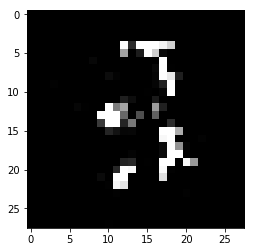

Number batches 468
12(0/468) D: 0.4434, G: 1.5321
12(1/468) D: 0.4535, G: 2.9151
12(2/468) D: 0.5364, G: 1.4383
12(3/468) D: 0.4298, G: 1.6288
12(4/468) D: 0.3745, G: 2.0917
12(5/468) D: 0.3492, G: 1.8783
12(6/468) D: 0.3258, G: 1.8300
12(7/468) D: 0.3471, G: 2.2753
12(8/468) D: 0.3807, G: 1.7192
12(9/468) D: 0.4594, G: 1.5347
12(10/468) D: 0.4243, G: 2.4770
12(11/468) D: 0.4131, G: 1.5565
12(12/468) D: 0.3688, G: 1.3109
12(13/468) D: 0.3967, G: 2.4218
12(14/468) D: 0.3756, G: 1.6769
12(15/468) D: 0.3196, G: 1.8990
12(16/468) D: 0.4336, G: 2.4163
12(17/468) D: 0.3199, G: 1.4433
12(18/468) D: 0.3970, G: 2.5411
12(19/468) D: 0.3756, G: 1.5194
12(20/468) D: 0.4092, G: 2.3830
12(21/468) D: 0.3450, G: 2.0556
12(22/468) D: 0.3458, G: 1.4501
12(23/468) D: 0.3665, G: 2.0716
12(24/468) D: 0.4337, G: 1.5630
12(25/468) D: 0.3849, G: 2.0622
12(26/468) D: 0.4375, G: 2.0260
12(27/468) D: 0.3787, G: 2.0535
12(28/468) D: 0.3414, G: 1.8942
12(29/468) D: 0.3984, G: 1.8713
12(30/468) D: 0.3906, G: 1.6976

12(252/468) D: 0.3591, G: 1.5052
12(253/468) D: 0.3970, G: 2.4388
12(254/468) D: 0.3753, G: 1.8684
12(255/468) D: 0.4188, G: 1.7233
12(256/468) D: 0.4008, G: 1.9136
12(257/468) D: 0.3028, G: 2.2906
12(258/468) D: 0.3649, G: 1.7342
12(259/468) D: 0.3427, G: 1.9585
12(260/468) D: 0.3599, G: 1.8920
12(261/468) D: 0.3509, G: 1.6716
12(262/468) D: 0.4062, G: 1.9708
12(263/468) D: 0.4484, G: 1.4779
12(264/468) D: 0.4556, G: 2.6361
12(265/468) D: 0.4531, G: 1.2033
12(266/468) D: 0.4762, G: 2.5038
12(267/468) D: 0.4075, G: 2.0789
12(268/468) D: 0.3947, G: 1.3888
12(269/468) D: 0.3401, G: 1.9442
12(270/468) D: 0.4369, G: 1.6600
12(271/468) D: 0.3775, G: 1.3695
12(272/468) D: 0.4092, G: 2.4223
12(273/468) D: 0.3480, G: 2.1452
12(274/468) D: 0.3748, G: 1.3470
12(275/468) D: 0.4794, G: 2.4391
12(276/468) D: 0.4858, G: 1.3980
12(277/468) D: 0.3805, G: 1.9754
12(278/468) D: 0.3004, G: 2.6964
12(279/468) D: 0.5151, G: 1.0146
12(280/468) D: 0.4806, G: 2.2842
12(281/468) D: 0.3741, G: 2.0250
12(282/468

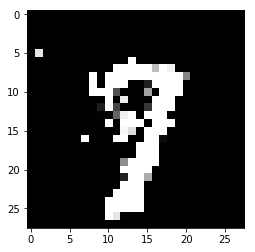

Number batches 468
13(0/468) D: 0.4525, G: 1.7691
13(1/468) D: 0.3986, G: 2.0303
13(2/468) D: 0.3862, G: 1.5279
13(3/468) D: 0.4145, G: 2.2836
13(4/468) D: 0.4217, G: 1.8818
13(5/468) D: 0.3475, G: 1.4481
13(6/468) D: 0.3768, G: 2.8339
13(7/468) D: 0.3923, G: 1.7048
13(8/468) D: 0.3631, G: 1.8097
13(9/468) D: 0.4104, G: 1.8202
13(10/468) D: 0.3930, G: 1.7831
13(11/468) D: 0.3957, G: 2.8156
13(12/468) D: 0.3906, G: 1.5439
13(13/468) D: 0.3742, G: 2.1477
13(14/468) D: 0.2849, G: 2.2324
13(15/468) D: 0.2952, G: 1.8079
13(16/468) D: 0.3501, G: 2.0657
13(17/468) D: 0.2219, G: 2.6316
13(18/468) D: 0.3550, G: 1.1921
13(19/468) D: 0.3969, G: 3.3511
13(20/468) D: 0.3739, G: 2.1187
13(21/468) D: 0.3526, G: 1.4297
13(22/468) D: 0.4017, G: 2.4452
13(23/468) D: 0.3632, G: 1.6778
13(24/468) D: 0.3495, G: 2.0111
13(25/468) D: 0.3851, G: 2.2095
13(26/468) D: 0.3619, G: 1.2261
13(27/468) D: 0.4258, G: 1.9219
13(28/468) D: 0.3624, G: 1.9441
13(29/468) D: 0.4033, G: 1.4273
13(30/468) D: 0.4404, G: 2.1312

13(252/468) D: 0.4174, G: 1.5084
13(253/468) D: 0.3274, G: 1.6320
13(254/468) D: 0.3800, G: 2.3217
13(255/468) D: 0.4328, G: 1.3849
13(256/468) D: 0.4694, G: 2.1470
13(257/468) D: 0.3309, G: 1.8879
13(258/468) D: 0.3867, G: 1.5826
13(259/468) D: 0.3813, G: 1.8940
13(260/468) D: 0.3739, G: 2.0707
13(261/468) D: 0.3803, G: 1.6696
13(262/468) D: 0.3430, G: 1.4820
13(263/468) D: 0.3919, G: 2.2202
13(264/468) D: 0.4461, G: 1.3839
13(265/468) D: 0.4288, G: 2.2093
13(266/468) D: 0.3669, G: 1.7874
13(267/468) D: 0.3698, G: 1.4089
13(268/468) D: 0.4946, G: 2.5032
13(269/468) D: 0.3858, G: 1.6509
13(270/468) D: 0.4101, G: 1.7893
13(271/468) D: 0.4070, G: 1.8881
13(272/468) D: 0.4141, G: 1.6291
13(273/468) D: 0.3281, G: 2.0240
13(274/468) D: 0.4142, G: 1.9791
13(275/468) D: 0.3613, G: 1.8549
13(276/468) D: 0.4034, G: 1.4883
13(277/468) D: 0.3732, G: 2.1532
13(278/468) D: 0.4122, G: 1.5327
13(279/468) D: 0.4789, G: 1.9462
13(280/468) D: 0.3854, G: 1.7301
13(281/468) D: 0.3818, G: 1.4858
13(282/468

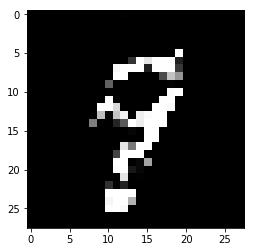

Number batches 468
14(0/468) D: 0.4282, G: 1.5073
14(1/468) D: 0.4059, G: 1.7695
14(2/468) D: 0.3897, G: 1.4806
14(3/468) D: 0.4085, G: 1.9517
14(4/468) D: 0.4031, G: 1.7343
14(5/468) D: 0.3400, G: 1.9352
14(6/468) D: 0.3663, G: 1.7352
14(7/468) D: 0.3128, G: 2.1398
14(8/468) D: 0.4179, G: 1.5176
14(9/468) D: 0.4832, G: 1.9876
14(10/468) D: 0.4518, G: 1.2694
14(11/468) D: 0.3642, G: 2.4056
14(12/468) D: 0.4201, G: 1.3887
14(13/468) D: 0.4781, G: 2.0819
14(14/468) D: 0.4267, G: 1.7155
14(15/468) D: 0.4274, G: 1.5307
14(16/468) D: 0.4091, G: 1.6273
14(17/468) D: 0.3577, G: 2.0981
14(18/468) D: 0.3942, G: 1.2541
14(19/468) D: 0.3674, G: 2.3698
14(20/468) D: 0.4051, G: 1.5519
14(21/468) D: 0.4325, G: 1.6103
14(22/468) D: 0.4234, G: 2.0411
14(23/468) D: 0.4202, G: 1.6759
14(24/468) D: 0.3655, G: 1.7713
14(25/468) D: 0.3695, G: 1.4543
14(26/468) D: 0.4257, G: 1.8083
14(27/468) D: 0.3804, G: 1.6690
14(28/468) D: 0.3762, G: 1.8007
14(29/468) D: 0.3525, G: 1.7067
14(30/468) D: 0.4649, G: 1.9744

14(252/468) D: 0.3926, G: 1.8858
14(253/468) D: 0.3420, G: 2.0030
14(254/468) D: 0.4353, G: 1.5291
14(255/468) D: 0.4245, G: 2.2386
14(256/468) D: 0.4774, G: 1.0404
14(257/468) D: 0.4607, G: 2.7559
14(258/468) D: 0.4624, G: 1.7532
14(259/468) D: 0.3700, G: 1.3486
14(260/468) D: 0.3979, G: 2.2031
14(261/468) D: 0.4015, G: 1.3779
14(262/468) D: 0.4408, G: 1.6883
14(263/468) D: 0.4049, G: 1.9662
14(264/468) D: 0.3732, G: 2.0539
14(265/468) D: 0.4163, G: 1.1891
14(266/468) D: 0.4201, G: 2.5187
14(267/468) D: 0.4750, G: 1.1252
14(268/468) D: 0.3897, G: 1.8684
14(269/468) D: 0.3797, G: 1.9628
14(270/468) D: 0.4171, G: 1.7823
14(271/468) D: 0.4488, G: 1.7433
14(272/468) D: 0.3484, G: 1.9360
14(273/468) D: 0.3411, G: 1.9968
14(274/468) D: 0.3367, G: 1.5189
14(275/468) D: 0.3375, G: 1.7959
14(276/468) D: 0.3980, G: 1.4305
14(277/468) D: 0.3517, G: 2.5717
14(278/468) D: 0.3819, G: 1.5488
14(279/468) D: 0.4406, G: 1.8643
14(280/468) D: 0.3634, G: 1.7475
14(281/468) D: 0.3450, G: 2.0826
14(282/468

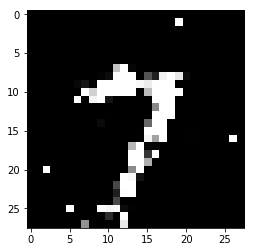

Number batches 468
15(0/468) D: 0.4203, G: 1.1556
15(1/468) D: 0.4414, G: 2.0641
15(2/468) D: 0.4742, G: 1.5155
15(3/468) D: 0.4873, G: 1.7532
15(4/468) D: 0.4532, G: 1.2902
15(5/468) D: 0.4235, G: 1.6848
15(6/468) D: 0.4199, G: 1.5488
15(7/468) D: 0.3813, G: 1.9655
15(8/468) D: 0.4089, G: 1.4212
15(9/468) D: 0.4892, G: 1.5099
15(10/468) D: 0.3735, G: 1.9964
15(11/468) D: 0.3882, G: 1.5442
15(12/468) D: 0.3967, G: 1.6681
15(13/468) D: 0.3930, G: 1.9962
15(14/468) D: 0.3171, G: 1.7079
15(15/468) D: 0.3924, G: 1.3270
15(16/468) D: 0.3761, G: 2.2564
15(17/468) D: 0.3706, G: 1.9139
15(18/468) D: 0.3975, G: 1.9782
15(19/468) D: 0.3653, G: 2.0051
15(20/468) D: 0.3851, G: 1.6409
15(21/468) D: 0.4248, G: 1.4345
15(22/468) D: 0.3786, G: 1.7312
15(23/468) D: 0.3584, G: 1.4930
15(24/468) D: 0.3723, G: 1.8051
15(25/468) D: 0.4137, G: 1.6024
15(26/468) D: 0.3602, G: 1.9158
15(27/468) D: 0.3652, G: 1.8600
15(28/468) D: 0.3921, G: 1.5420
15(29/468) D: 0.4256, G: 2.0758
15(30/468) D: 0.3834, G: 1.2942

15(252/468) D: 0.4300, G: 1.5880
15(253/468) D: 0.3887, G: 1.7248
15(254/468) D: 0.4637, G: 1.4754
15(255/468) D: 0.4492, G: 1.7426
15(256/468) D: 0.4649, G: 1.9918
15(257/468) D: 0.3116, G: 1.6733
15(258/468) D: 0.4182, G: 2.0734
15(259/468) D: 0.3521, G: 1.6891
15(260/468) D: 0.3765, G: 1.7436
15(261/468) D: 0.3865, G: 1.9026
15(262/468) D: 0.4502, G: 1.4683
15(263/468) D: 0.4481, G: 2.2945
15(264/468) D: 0.4279, G: 1.2570
15(265/468) D: 0.4614, G: 1.5488
15(266/468) D: 0.4082, G: 2.0505
15(267/468) D: 0.4131, G: 1.5446
15(268/468) D: 0.4791, G: 2.2816
15(269/468) D: 0.3848, G: 1.4637
15(270/468) D: 0.4033, G: 1.5455
15(271/468) D: 0.4108, G: 2.2560
15(272/468) D: 0.3779, G: 1.6474
15(273/468) D: 0.3616, G: 2.4551
15(274/468) D: 0.3914, G: 1.1805
15(275/468) D: 0.4378, G: 2.5389
15(276/468) D: 0.4457, G: 1.6981
15(277/468) D: 0.3804, G: 1.8330
15(278/468) D: 0.3616, G: 1.6118
15(279/468) D: 0.4172, G: 1.6398
15(280/468) D: 0.3539, G: 1.8739
15(281/468) D: 0.4097, G: 1.4942
15(282/468

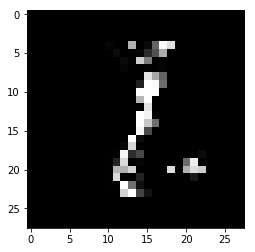

Number batches 468
16(0/468) D: 0.4909, G: 1.0336
16(1/468) D: 0.5008, G: 2.2118
16(2/468) D: 0.5218, G: 1.3305
16(3/468) D: 0.4553, G: 1.6895
16(4/468) D: 0.3803, G: 1.4611
16(5/468) D: 0.4040, G: 1.4945
16(6/468) D: 0.4296, G: 1.8803
16(7/468) D: 0.3961, G: 2.0973
16(8/468) D: 0.4640, G: 1.2255
16(9/468) D: 0.6212, G: 2.2176
16(10/468) D: 0.5986, G: 1.4385
16(11/468) D: 0.4488, G: 1.4638
16(12/468) D: 0.4130, G: 1.7357
16(13/468) D: 0.4154, G: 1.3488
16(14/468) D: 0.4209, G: 1.6462
16(15/468) D: 0.4431, G: 1.6690
16(16/468) D: 0.4381, G: 1.4556
16(17/468) D: 0.3845, G: 1.9361
16(18/468) D: 0.4700, G: 1.4611
16(19/468) D: 0.4044, G: 1.6231
16(20/468) D: 0.3748, G: 1.7571
16(21/468) D: 0.5731, G: 1.4960
16(22/468) D: 0.4349, G: 1.5925
16(23/468) D: 0.3801, G: 1.7221
16(24/468) D: 0.4334, G: 1.4416
16(25/468) D: 0.4789, G: 1.7479
16(26/468) D: 0.4212, G: 1.6921
16(27/468) D: 0.3780, G: 1.4437
16(28/468) D: 0.4513, G: 2.2524
16(29/468) D: 0.4738, G: 1.1694
16(30/468) D: 0.4406, G: 1.7526

16(252/468) D: 0.4346, G: 1.7802
16(253/468) D: 0.3363, G: 1.9974
16(254/468) D: 0.4666, G: 1.6271
16(255/468) D: 0.4788, G: 1.3872
16(256/468) D: 0.4762, G: 1.9008
16(257/468) D: 0.3998, G: 1.5305
16(258/468) D: 0.4372, G: 1.7457
16(259/468) D: 0.3649, G: 1.6599
16(260/468) D: 0.3869, G: 1.2221
16(261/468) D: 0.4130, G: 1.8837
16(262/468) D: 0.4278, G: 1.3865
16(263/468) D: 0.4143, G: 2.0019
16(264/468) D: 0.5151, G: 1.3540
16(265/468) D: 0.4581, G: 1.7385
16(266/468) D: 0.4063, G: 1.9523
16(267/468) D: 0.4512, G: 1.0524
16(268/468) D: 0.4915, G: 2.3222
16(269/468) D: 0.3746, G: 2.0087
16(270/468) D: 0.5244, G: 1.7771
16(271/468) D: 0.3902, G: 1.1403
16(272/468) D: 0.4035, G: 2.0112
16(273/468) D: 0.3951, G: 1.6911
16(274/468) D: 0.3955, G: 1.4431
16(275/468) D: 0.4107, G: 1.8457
16(276/468) D: 0.3496, G: 1.8404
16(277/468) D: 0.3535, G: 2.1126
16(278/468) D: 0.3382, G: 1.6685
16(279/468) D: 0.4201, G: 1.4934
16(280/468) D: 0.4286, G: 2.0077
16(281/468) D: 0.4225, G: 1.4245
16(282/468

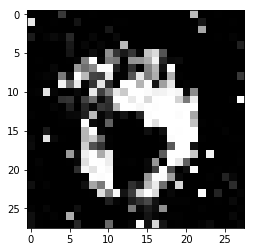

Number batches 468
17(0/468) D: 0.4452, G: 1.5425
17(1/468) D: 0.4136, G: 1.8612
17(2/468) D: 0.4565, G: 1.0510
17(3/468) D: 0.4236, G: 2.0223
17(4/468) D: 0.4052, G: 1.8127
17(5/468) D: 0.4018, G: 1.4057
17(6/468) D: 0.3670, G: 2.0090
17(7/468) D: 0.3647, G: 1.5769
17(8/468) D: 0.4064, G: 1.6855
17(9/468) D: 0.5901, G: 1.3933
17(10/468) D: 0.4782, G: 1.5782
17(11/468) D: 0.3880, G: 1.8259
17(12/468) D: 0.3575, G: 1.4653
17(13/468) D: 0.4115, G: 1.7064
17(14/468) D: 0.3546, G: 1.4990
17(15/468) D: 0.3965, G: 1.8108
17(16/468) D: 0.4560, G: 1.9437
17(17/468) D: 0.3969, G: 1.3026
17(18/468) D: 0.4956, G: 2.1775
17(19/468) D: 0.4931, G: 1.3689
17(20/468) D: 0.4302, G: 1.9008
17(21/468) D: 0.4307, G: 1.3774
17(22/468) D: 0.4518, G: 1.4349
17(23/468) D: 0.3392, G: 1.9189
17(24/468) D: 0.4262, G: 1.4701
17(25/468) D: 0.4067, G: 1.5866
17(26/468) D: 0.4335, G: 2.2257
17(27/468) D: 0.4020, G: 1.4632
17(28/468) D: 0.4303, G: 2.0369
17(29/468) D: 0.4130, G: 1.3232
17(30/468) D: 0.4952, G: 2.0026

17(252/468) D: 0.4621, G: 2.1088
17(253/468) D: 0.4654, G: 1.3257
17(254/468) D: 0.4219, G: 1.6002
17(255/468) D: 0.4720, G: 1.4374
17(256/468) D: 0.4633, G: 1.6435
17(257/468) D: 0.3431, G: 1.9284
17(258/468) D: 0.3614, G: 1.4486
17(259/468) D: 0.4099, G: 1.6959
17(260/468) D: 0.3880, G: 1.7370
17(261/468) D: 0.4088, G: 1.6242
17(262/468) D: 0.4604, G: 1.1487
17(263/468) D: 0.4683, G: 2.1736
17(264/468) D: 0.4379, G: 1.2924
17(265/468) D: 0.4503, G: 1.4608
17(266/468) D: 0.4438, G: 1.9421
17(267/468) D: 0.4717, G: 1.5435
17(268/468) D: 0.3845, G: 1.3571
17(269/468) D: 0.3780, G: 2.1221
17(270/468) D: 0.5136, G: 1.1333
17(271/468) D: 0.4840, G: 1.4501
17(272/468) D: 0.4147, G: 1.7087
17(273/468) D: 0.3663, G: 1.8824
17(274/468) D: 0.3816, G: 1.2689
17(275/468) D: 0.4489, G: 2.3760
17(276/468) D: 0.4574, G: 1.4719
17(277/468) D: 0.4354, G: 1.9412
17(278/468) D: 0.4640, G: 1.8045
17(279/468) D: 0.5347, G: 1.1308
17(280/468) D: 0.4922, G: 1.8429
17(281/468) D: 0.4420, G: 1.4461
17(282/468

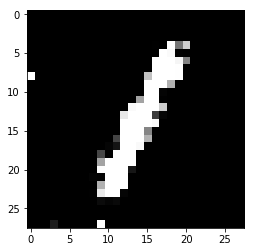

Number batches 468
18(0/468) D: 0.4822, G: 1.1417
18(1/468) D: 0.4988, G: 2.0937
18(2/468) D: 0.5003, G: 1.1541
18(3/468) D: 0.4799, G: 1.6816
18(4/468) D: 0.4418, G: 1.4542
18(5/468) D: 0.4027, G: 1.6181
18(6/468) D: 0.3725, G: 1.6919
18(7/468) D: 0.3974, G: 1.7996
18(8/468) D: 0.4597, G: 1.3902
18(9/468) D: 0.6176, G: 1.0646
18(10/468) D: 0.5026, G: 1.7914
18(11/468) D: 0.4123, G: 1.6854
18(12/468) D: 0.4220, G: 1.3151
18(13/468) D: 0.3887, G: 1.3741
18(14/468) D: 0.4310, G: 1.7569
18(15/468) D: 0.4549, G: 1.5866
18(16/468) D: 0.4089, G: 1.7991
18(17/468) D: 0.3827, G: 1.8439
18(18/468) D: 0.4166, G: 1.3611
18(19/468) D: 0.4217, G: 1.8128
18(20/468) D: 0.4411, G: 1.6304
18(21/468) D: 0.4440, G: 1.2943
18(22/468) D: 0.4349, G: 2.1651
18(23/468) D: 0.4411, G: 1.4095
18(24/468) D: 0.4347, G: 1.6240
18(25/468) D: 0.4797, G: 1.5137
18(26/468) D: 0.4190, G: 2.1219
18(27/468) D: 0.3919, G: 1.3097
18(28/468) D: 0.3782, G: 2.3915
18(29/468) D: 0.4801, G: 1.2569
18(30/468) D: 0.4909, G: 1.9685

18(252/468) D: 0.4736, G: 1.3318
18(253/468) D: 0.4330, G: 1.6271
18(254/468) D: 0.3740, G: 1.9777
18(255/468) D: 0.5417, G: 1.2716
18(256/468) D: 0.4966, G: 1.7343
18(257/468) D: 0.3689, G: 1.9187
18(258/468) D: 0.3782, G: 1.6734
18(259/468) D: 0.3859, G: 1.5683
18(260/468) D: 0.4473, G: 2.2082
18(261/468) D: 0.4434, G: 1.4733
18(262/468) D: 0.4640, G: 1.3804
18(263/468) D: 0.4558, G: 1.6798
18(264/468) D: 0.4690, G: 1.6163
18(265/468) D: 0.4621, G: 1.4475
18(266/468) D: 0.4987, G: 1.7509
18(267/468) D: 0.4584, G: 1.3334
18(268/468) D: 0.4598, G: 1.7576
18(269/468) D: 0.4369, G: 1.7869
18(270/468) D: 0.4642, G: 1.4548
18(271/468) D: 0.4946, G: 1.6262
18(272/468) D: 0.4978, G: 1.8556
18(273/468) D: 0.4711, G: 1.4212
18(274/468) D: 0.4239, G: 1.4240
18(275/468) D: 0.4693, G: 1.7085
18(276/468) D: 0.4649, G: 1.6942
18(277/468) D: 0.3906, G: 1.4133
18(278/468) D: 0.3987, G: 1.8301
18(279/468) D: 0.4815, G: 1.7906
18(280/468) D: 0.4347, G: 1.2651
18(281/468) D: 0.4237, G: 2.1649
18(282/468

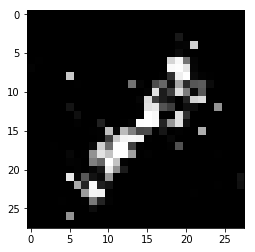

Number batches 468
19(0/468) D: 0.4455, G: 1.2560
19(1/468) D: 0.4809, G: 1.6972
19(2/468) D: 0.4944, G: 1.4596
19(3/468) D: 0.4294, G: 1.5323
19(4/468) D: 0.3928, G: 1.4535
19(5/468) D: 0.4314, G: 1.5680
19(6/468) D: 0.4016, G: 1.6225
19(7/468) D: 0.3937, G: 1.3884
19(8/468) D: 0.4256, G: 1.3073
19(9/468) D: 0.4764, G: 1.5838
19(10/468) D: 0.3874, G: 1.6918
19(11/468) D: 0.4389, G: 1.5622
19(12/468) D: 0.4355, G: 1.4460
19(13/468) D: 0.4383, G: 1.8001
19(14/468) D: 0.4554, G: 1.2649
19(15/468) D: 0.5113, G: 1.9972
19(16/468) D: 0.4684, G: 1.5400
19(17/468) D: 0.3961, G: 1.8425
19(18/468) D: 0.4308, G: 2.0078
19(19/468) D: 0.3860, G: 1.4847
19(20/468) D: 0.3903, G: 1.8211
19(21/468) D: 0.4853, G: 1.0702
19(22/468) D: 0.4856, G: 1.7588
19(23/468) D: 0.3331, G: 1.8114
19(24/468) D: 0.3770, G: 1.5262
19(25/468) D: 0.4067, G: 1.4815
19(26/468) D: 0.3796, G: 1.8570
19(27/468) D: 0.3878, G: 1.7210
19(28/468) D: 0.3626, G: 1.7309
19(29/468) D: 0.4427, G: 1.8328
19(30/468) D: 0.4533, G: 1.7940

19(252/468) D: 0.4343, G: 1.3326
19(253/468) D: 0.4574, G: 1.6806
19(254/468) D: 0.4364, G: 1.6415
19(255/468) D: 0.5170, G: 1.3984
19(256/468) D: 0.5071, G: 1.7088
19(257/468) D: 0.4406, G: 1.4923
19(258/468) D: 0.4497, G: 1.7660
19(259/468) D: 0.3791, G: 1.4215
19(260/468) D: 0.3786, G: 1.4396
19(261/468) D: 0.4859, G: 1.7434
19(262/468) D: 0.4345, G: 1.1512
19(263/468) D: 0.4718, G: 2.3427
19(264/468) D: 0.5071, G: 1.0707
19(265/468) D: 0.4889, G: 1.6947
19(266/468) D: 0.4127, G: 1.6045
19(267/468) D: 0.4535, G: 1.9781
19(268/468) D: 0.4816, G: 1.5515
19(269/468) D: 0.4028, G: 1.7502
19(270/468) D: 0.4909, G: 1.3898
19(271/468) D: 0.5159, G: 1.6502
19(272/468) D: 0.4344, G: 1.6269
19(273/468) D: 0.4036, G: 1.8589
19(274/468) D: 0.4238, G: 1.4373
19(275/468) D: 0.4220, G: 2.0200
19(276/468) D: 0.4386, G: 1.4909
19(277/468) D: 0.3627, G: 1.8022
19(278/468) D: 0.4496, G: 1.8077
19(279/468) D: 0.4918, G: 1.1311
19(280/468) D: 0.5186, G: 1.9599
19(281/468) D: 0.4797, G: 1.1028
19(282/468

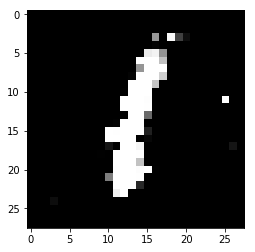

Number batches 468
20(0/468) D: 0.5054, G: 1.1060
20(1/468) D: 0.4962, G: 1.4156
20(2/468) D: 0.5305, G: 1.3595
20(3/468) D: 0.5189, G: 1.3662
20(4/468) D: 0.4637, G: 1.4875
20(5/468) D: 0.3877, G: 1.3476
20(6/468) D: 0.4366, G: 1.7044
20(7/468) D: 0.3959, G: 1.4960
20(8/468) D: 0.4600, G: 1.0772
20(9/468) D: 0.6686, G: 2.2692
20(10/468) D: 0.6004, G: 1.3932
20(11/468) D: 0.4803, G: 1.3874
20(12/468) D: 0.4967, G: 1.7791
20(13/468) D: 0.4559, G: 1.3360
20(14/468) D: 0.4250, G: 1.2469
20(15/468) D: 0.4544, G: 1.3202
20(16/468) D: 0.4434, G: 1.8378
20(17/468) D: 0.4285, G: 1.4510
20(18/468) D: 0.4351, G: 1.2618
20(19/468) D: 0.4640, G: 1.7382
20(20/468) D: 0.4558, G: 1.4812
20(21/468) D: 0.4354, G: 1.3343
20(22/468) D: 0.4644, G: 1.3195
20(23/468) D: 0.4120, G: 1.6802
20(24/468) D: 0.4815, G: 1.6370
20(25/468) D: 0.4584, G: 1.1939
20(26/468) D: 0.4645, G: 2.0908
20(27/468) D: 0.5023, G: 1.4164
20(28/468) D: 0.4342, G: 1.7779
20(29/468) D: 0.4518, G: 1.3739
20(30/468) D: 0.5027, G: 1.5214

20(252/468) D: 0.5088, G: 1.5843
20(253/468) D: 0.4931, G: 1.4986
20(254/468) D: 0.4284, G: 1.6359
20(255/468) D: 0.4823, G: 1.0872
20(256/468) D: 0.5474, G: 1.7055
20(257/468) D: 0.4545, G: 1.8877
20(258/468) D: 0.4345, G: 1.2900
20(259/468) D: 0.4747, G: 1.3765
20(260/468) D: 0.4278, G: 1.6681
20(261/468) D: 0.4355, G: 1.3315
20(262/468) D: 0.4836, G: 1.3495
20(263/468) D: 0.4784, G: 1.5384
20(264/468) D: 0.4729, G: 1.1772
20(265/468) D: 0.4711, G: 1.6608
20(266/468) D: 0.4205, G: 1.6341
20(267/468) D: 0.4519, G: 0.9891
20(268/468) D: 0.5377, G: 2.2199
20(269/468) D: 0.4476, G: 1.7587
20(270/468) D: 0.4885, G: 1.1260
20(271/468) D: 0.4780, G: 1.6893
20(272/468) D: 0.4848, G: 1.7661
20(273/468) D: 0.3953, G: 1.2729
20(274/468) D: 0.4924, G: 1.9200
20(275/468) D: 0.4609, G: 1.4168
20(276/468) D: 0.4900, G: 1.5067
20(277/468) D: 0.4427, G: 1.8009
20(278/468) D: 0.4472, G: 1.1696
20(279/468) D: 0.4688, G: 1.5933
20(280/468) D: 0.4111, G: 1.7707
20(281/468) D: 0.4025, G: 1.5159
20(282/468

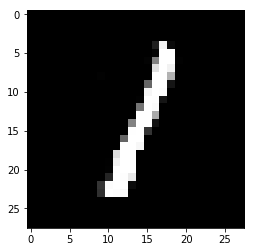

Number batches 468
21(0/468) D: 0.5274, G: 1.0359
21(1/468) D: 0.5295, G: 1.9498
21(2/468) D: 0.4711, G: 1.2829
21(3/468) D: 0.4707, G: 1.5415
21(4/468) D: 0.4290, G: 1.5437
21(5/468) D: 0.3808, G: 1.7447
21(6/468) D: 0.4225, G: 1.4732
21(7/468) D: 0.4475, G: 2.1630
21(8/468) D: 0.4911, G: 1.0049
21(9/468) D: 0.5653, G: 2.0391
21(10/468) D: 0.5753, G: 1.1816
21(11/468) D: 0.4648, G: 1.7353
21(12/468) D: 0.4605, G: 1.7840
21(13/468) D: 0.4655, G: 1.1950
21(14/468) D: 0.4889, G: 1.7383
21(15/468) D: 0.4848, G: 1.4723
21(16/468) D: 0.4131, G: 1.6268
21(17/468) D: 0.4455, G: 1.6905
21(18/468) D: 0.4264, G: 1.4340
21(19/468) D: 0.4340, G: 1.4023
21(20/468) D: 0.4499, G: 1.7627
21(21/468) D: 0.4761, G: 1.1992
21(22/468) D: 0.4774, G: 1.4565
21(23/468) D: 0.4204, G: 1.5488
21(24/468) D: 0.4752, G: 1.2821
21(25/468) D: 0.5066, G: 1.5590
21(26/468) D: 0.4297, G: 1.5071
21(27/468) D: 0.3908, G: 1.4842
21(28/468) D: 0.4446, G: 1.7397
21(29/468) D: 0.4621, G: 1.1805
21(30/468) D: 0.4487, G: 1.6767

21(252/468) D: 0.4265, G: 1.2568
21(253/468) D: 0.4881, G: 1.8414
21(254/468) D: 0.5862, G: 1.4323
21(255/468) D: 0.5420, G: 1.0094
21(256/468) D: 0.5206, G: 1.3001
21(257/468) D: 0.4465, G: 1.7204
21(258/468) D: 0.5027, G: 1.2246
21(259/468) D: 0.4849, G: 1.2775
21(260/468) D: 0.4880, G: 1.5693
21(261/468) D: 0.4977, G: 1.1422
21(262/468) D: 0.4890, G: 1.2465
21(263/468) D: 0.4626, G: 1.3910
21(264/468) D: 0.4757, G: 1.3489
21(265/468) D: 0.4949, G: 1.6048
21(266/468) D: 0.4511, G: 1.3244
21(267/468) D: 0.4659, G: 1.7951
21(268/468) D: 0.5126, G: 1.2042
21(269/468) D: 0.5244, G: 1.5402
21(270/468) D: 0.5251, G: 1.2941
21(271/468) D: 0.5124, G: 1.3677
21(272/468) D: 0.5009, G: 1.3543
21(273/468) D: 0.4384, G: 1.4549
21(274/468) D: 0.4490, G: 1.6615
21(275/468) D: 0.4269, G: 1.3436
21(276/468) D: 0.4545, G: 1.2094
21(277/468) D: 0.5029, G: 1.9431
21(278/468) D: 0.4503, G: 1.0973
21(279/468) D: 0.6614, G: 1.5873
21(280/468) D: 0.4315, G: 1.6963
21(281/468) D: 0.4832, G: 1.3306
21(282/468

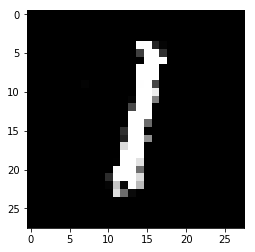

Number batches 468
22(0/468) D: 0.4923, G: 1.3733
22(1/468) D: 0.4967, G: 1.5830
22(2/468) D: 0.5658, G: 1.0748
22(3/468) D: 0.5786, G: 2.0073
22(4/468) D: 0.5601, G: 1.0396
22(5/468) D: 0.5029, G: 1.7823
22(6/468) D: 0.4368, G: 1.6033
22(7/468) D: 0.4069, G: 1.1807
22(8/468) D: 0.4593, G: 1.5602
22(9/468) D: 0.5661, G: 1.4398
22(10/468) D: 0.5480, G: 1.1975
22(11/468) D: 0.4599, G: 1.4548
22(12/468) D: 0.4506, G: 1.3423
22(13/468) D: 0.5084, G: 1.9624
22(14/468) D: 0.4904, G: 1.0610
22(15/468) D: 0.5352, G: 1.4366
22(16/468) D: 0.4978, G: 1.9000
22(17/468) D: 0.4407, G: 1.0322
22(18/468) D: 0.5305, G: 1.6404
22(19/468) D: 0.4349, G: 1.3208
22(20/468) D: 0.5004, G: 1.5798
22(21/468) D: 0.5074, G: 1.1528
22(22/468) D: 0.5120, G: 1.7456
22(23/468) D: 0.4988, G: 1.4910
22(24/468) D: 0.4007, G: 1.6384
22(25/468) D: 0.4858, G: 1.0618
22(26/468) D: 0.4545, G: 2.1400
22(27/468) D: 0.4274, G: 1.2560
22(28/468) D: 0.4598, G: 2.1089
22(29/468) D: 0.4959, G: 1.1645
22(30/468) D: 0.5280, G: 1.2917

22(252/468) D: 0.4790, G: 1.2473
22(253/468) D: 0.4329, G: 1.4917
22(254/468) D: 0.4694, G: 1.9598
22(255/468) D: 0.5563, G: 1.0506
22(256/468) D: 0.5330, G: 1.4108
22(257/468) D: 0.3631, G: 1.8674
22(258/468) D: 0.4989, G: 1.0002
22(259/468) D: 0.4436, G: 1.4762
22(260/468) D: 0.4134, G: 1.7219
22(261/468) D: 0.4583, G: 1.1107
22(262/468) D: 0.4733, G: 1.5062
22(263/468) D: 0.4920, G: 1.5444
22(264/468) D: 0.5490, G: 1.1675
22(265/468) D: 0.5326, G: 1.5801
22(266/468) D: 0.4902, G: 1.7299
22(267/468) D: 0.4800, G: 1.1308
22(268/468) D: 0.5010, G: 1.4592
22(269/468) D: 0.4574, G: 1.8347
22(270/468) D: 0.5401, G: 1.0460
22(271/468) D: 0.5646, G: 1.5717
22(272/468) D: 0.4955, G: 1.6231
22(273/468) D: 0.5241, G: 1.0669
22(274/468) D: 0.5127, G: 1.5831
22(275/468) D: 0.4515, G: 1.6921
22(276/468) D: 0.5002, G: 1.0282
22(277/468) D: 0.4914, G: 1.5704
22(278/468) D: 0.4877, G: 1.8014
22(279/468) D: 0.5941, G: 0.8872
22(280/468) D: 0.5330, G: 1.4325
22(281/468) D: 0.5340, G: 1.4366
22(282/468

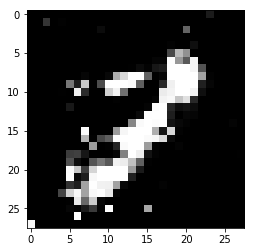

Number batches 468
23(0/468) D: 0.5445, G: 1.2344
23(1/468) D: 0.5033, G: 1.7229
23(2/468) D: 0.5822, G: 0.8945
23(3/468) D: 0.4752, G: 1.3348
23(4/468) D: 0.4471, G: 1.3784
23(5/468) D: 0.4801, G: 1.3763
23(6/468) D: 0.4951, G: 1.8195
23(7/468) D: 0.4678, G: 1.2829
23(8/468) D: 0.4709, G: 1.2352
23(9/468) D: 0.5517, G: 1.2146
23(10/468) D: 0.5415, G: 1.4322
23(11/468) D: 0.4966, G: 1.2533
23(12/468) D: 0.5075, G: 1.2784
23(13/468) D: 0.5646, G: 1.8591
23(14/468) D: 0.5401, G: 1.1670
23(15/468) D: 0.4937, G: 1.2440
23(16/468) D: 0.4744, G: 1.5719
23(17/468) D: 0.4601, G: 1.5586
23(18/468) D: 0.4827, G: 0.6816
23(19/468) D: 0.6049, G: 2.0948
23(20/468) D: 0.5890, G: 1.4639
23(21/468) D: 0.5087, G: 1.0230
23(22/468) D: 0.5150, G: 1.2506
23(23/468) D: 0.4608, G: 1.6937
23(24/468) D: 0.5257, G: 1.1793
23(25/468) D: 0.5048, G: 1.0266
23(26/468) D: 0.5101, G: 1.6584
23(27/468) D: 0.4722, G: 1.3240
23(28/468) D: 0.4957, G: 1.2855
23(29/468) D: 0.5107, G: 1.2143
23(30/468) D: 0.4824, G: 1.2392

23(252/468) D: 0.5426, G: 1.1438
23(253/468) D: 0.4970, G: 1.7395
23(254/468) D: 0.4326, G: 1.4553
23(255/468) D: 0.5284, G: 0.9410
23(256/468) D: 0.5129, G: 1.4217
23(257/468) D: 0.4381, G: 1.8587
23(258/468) D: 0.5257, G: 1.0740
23(259/468) D: 0.4739, G: 1.2109
23(260/468) D: 0.5181, G: 1.5728
23(261/468) D: 0.5218, G: 1.1808
23(262/468) D: 0.4798, G: 1.1563
23(263/468) D: 0.5107, G: 1.3570
23(264/468) D: 0.4828, G: 1.4721
23(265/468) D: 0.4398, G: 1.4445
23(266/468) D: 0.4537, G: 1.4374
23(267/468) D: 0.4819, G: 1.5526
23(268/468) D: 0.5457, G: 0.9921
23(269/468) D: 0.5533, G: 1.6471
23(270/468) D: 0.5099, G: 1.3328
23(271/468) D: 0.5014, G: 0.9531
23(272/468) D: 0.5636, G: 1.7969
23(273/468) D: 0.4923, G: 1.2864
23(274/468) D: 0.4449, G: 1.3638
23(275/468) D: 0.4523, G: 1.4208
23(276/468) D: 0.4860, G: 1.4159
23(277/468) D: 0.4382, G: 1.4008
23(278/468) D: 0.4814, G: 1.3116
23(279/468) D: 0.5645, G: 1.0504
23(280/468) D: 0.5215, G: 2.0645
23(281/468) D: 0.5160, G: 1.1009
23(282/468

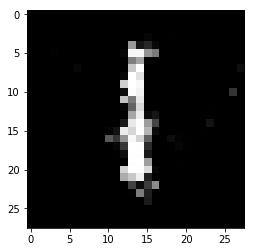

Number batches 468
24(0/468) D: 0.4984, G: 1.1571
24(1/468) D: 0.5481, G: 1.3193
24(2/468) D: 0.4815, G: 1.1014
24(3/468) D: 0.5009, G: 1.3598
24(4/468) D: 0.5199, G: 1.0451
24(5/468) D: 0.5547, G: 1.6945
24(6/468) D: 0.5490, G: 1.2736
24(7/468) D: 0.4734, G: 1.4086
24(8/468) D: 0.5515, G: 1.1488
24(9/468) D: 0.5790, G: 1.4472
24(10/468) D: 0.6144, G: 1.3902
24(11/468) D: 0.5284, G: 1.2598
24(12/468) D: 0.4624, G: 1.4249
24(13/468) D: 0.4664, G: 1.3168
24(14/468) D: 0.5228, G: 1.1752
24(15/468) D: 0.5339, G: 1.3174
24(16/468) D: 0.5537, G: 1.3640
24(17/468) D: 0.4694, G: 1.4067
24(18/468) D: 0.5122, G: 0.8644
24(19/468) D: 0.4994, G: 1.6326
24(20/468) D: 0.4737, G: 1.4540
24(21/468) D: 0.4709, G: 1.0302
24(22/468) D: 0.4392, G: 1.3393
24(23/468) D: 0.4206, G: 1.4546
24(24/468) D: 0.5146, G: 1.2414
24(25/468) D: 0.5433, G: 1.1622
24(26/468) D: 0.4951, G: 1.5802
24(27/468) D: 0.5352, G: 1.4559
24(28/468) D: 0.4937, G: 1.4201
24(29/468) D: 0.5172, G: 1.1484
24(30/468) D: 0.5044, G: 1.4402

24(253/468) D: 0.4454, G: 1.5223
24(254/468) D: 0.5170, G: 1.0829
24(255/468) D: 0.5808, G: 1.1114
24(256/468) D: 0.5457, G: 1.6927
24(257/468) D: 0.4536, G: 1.4873
24(258/468) D: 0.4645, G: 1.4676
24(259/468) D: 0.4992, G: 1.3045
24(260/468) D: 0.5452, G: 1.5725
24(261/468) D: 0.4693, G: 1.2713
24(262/468) D: 0.5093, G: 1.1572
24(263/468) D: 0.5363, G: 1.2344
24(264/468) D: 0.5684, G: 1.6935
24(265/468) D: 0.5479, G: 0.9855
24(266/468) D: 0.4899, G: 1.6776
24(267/468) D: 0.5469, G: 1.1950
24(268/468) D: 0.4951, G: 1.0774
24(269/468) D: 0.4839, G: 1.5745
24(270/468) D: 0.5286, G: 1.2412
24(271/468) D: 0.5186, G: 1.0931
24(272/468) D: 0.5358, G: 1.5411
24(273/468) D: 0.4990, G: 1.2161
24(274/468) D: 0.5298, G: 1.7428
24(275/468) D: 0.4712, G: 1.1837
24(276/468) D: 0.4866, G: 1.2334
24(277/468) D: 0.4494, G: 1.6816
24(278/468) D: 0.4784, G: 1.3572
24(279/468) D: 0.5663, G: 1.1607
24(280/468) D: 0.4922, G: 1.2784
24(281/468) D: 0.4760, G: 1.3649
24(282/468) D: 0.5561, G: 1.0643
24(283/468

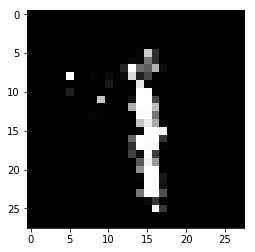

Number batches 468
25(0/468) D: 0.5810, G: 1.2023
25(1/468) D: 0.4941, G: 1.4801
25(2/468) D: 0.5304, G: 1.1518
25(3/468) D: 0.4798, G: 1.2799
25(4/468) D: 0.4637, G: 1.3407
25(5/468) D: 0.5275, G: 1.2846
25(6/468) D: 0.4284, G: 1.3527
25(7/468) D: 0.4479, G: 1.5657
25(8/468) D: 0.5392, G: 1.0989
25(9/468) D: 0.6418, G: 1.4432
25(10/468) D: 0.5459, G: 1.1765
25(11/468) D: 0.4847, G: 1.5047
25(12/468) D: 0.5015, G: 1.2191
25(13/468) D: 0.5060, G: 1.2952
25(14/468) D: 0.5138, G: 1.3213
25(15/468) D: 0.5265, G: 1.3405
25(16/468) D: 0.4901, G: 1.2634
25(17/468) D: 0.4784, G: 1.5640
25(18/468) D: 0.6044, G: 0.8828
25(19/468) D: 0.5393, G: 1.3907
25(20/468) D: 0.4464, G: 1.7567
25(21/468) D: 0.5728, G: 1.2438
25(22/468) D: 0.4778, G: 1.1078
25(23/468) D: 0.5248, G: 1.5845
25(24/468) D: 0.4963, G: 1.4530
25(25/468) D: 0.5290, G: 1.1524
25(26/468) D: 0.5668, G: 1.7633
25(27/468) D: 0.5269, G: 1.5726
25(28/468) D: 0.4677, G: 1.0684
25(29/468) D: 0.4925, G: 1.4236
25(30/468) D: 0.5609, G: 1.3372

25(253/468) D: 0.4727, G: 1.2228
25(254/468) D: 0.5254, G: 1.3435
25(255/468) D: 0.5856, G: 0.8729
25(256/468) D: 0.5491, G: 1.3639
25(257/468) D: 0.4667, G: 1.5055
25(258/468) D: 0.5254, G: 1.1405
25(259/468) D: 0.5292, G: 1.3705
25(260/468) D: 0.5793, G: 1.0411
25(261/468) D: 0.5226, G: 1.3256
25(262/468) D: 0.5202, G: 1.3698
25(263/468) D: 0.5426, G: 1.1356
25(264/468) D: 0.6012, G: 1.2055
25(265/468) D: 0.5231, G: 1.7299
25(266/468) D: 0.5408, G: 0.9142
25(267/468) D: 0.5587, G: 1.4451
25(268/468) D: 0.5871, G: 0.9925
25(269/468) D: 0.5357, G: 1.4195
25(270/468) D: 0.6038, G: 1.2854
25(271/468) D: 0.5827, G: 1.1460
25(272/468) D: 0.5312, G: 1.1808
25(273/468) D: 0.5392, G: 1.1518
25(274/468) D: 0.4736, G: 1.2342
25(275/468) D: 0.4626, G: 1.0271
25(276/468) D: 0.5447, G: 1.3119
25(277/468) D: 0.4382, G: 1.4964
25(278/468) D: 0.5175, G: 1.4880
25(279/468) D: 0.5454, G: 0.9883
25(280/468) D: 0.5578, G: 1.4538
25(281/468) D: 0.5014, G: 1.2835
25(282/468) D: 0.5303, G: 1.4690
25(283/468

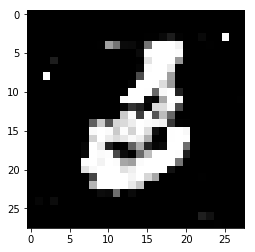

Number batches 468
26(0/468) D: 0.5810, G: 0.9337
26(1/468) D: 0.6190, G: 1.6510
26(2/468) D: 0.5268, G: 1.0791
26(3/468) D: 0.5361, G: 1.2745
26(4/468) D: 0.4983, G: 1.1881
26(5/468) D: 0.5797, G: 1.4128
26(6/468) D: 0.5041, G: 1.3778
26(7/468) D: 0.4225, G: 1.1767
26(8/468) D: 0.4971, G: 1.0678
26(9/468) D: 0.7019, G: 1.5180
26(10/468) D: 0.6066, G: 1.1082
26(11/468) D: 0.5115, G: 1.5532
26(12/468) D: 0.4806, G: 1.1096
26(13/468) D: 0.4943, G: 1.3169
26(14/468) D: 0.4983, G: 1.1483
26(15/468) D: 0.5426, G: 1.4103
26(16/468) D: 0.4567, G: 1.3813
26(17/468) D: 0.4645, G: 1.2553
26(18/468) D: 0.4855, G: 1.0129
26(19/468) D: 0.5195, G: 1.4699
26(20/468) D: 0.4258, G: 1.2436
26(21/468) D: 0.5115, G: 1.1123
26(22/468) D: 0.5272, G: 1.3719
26(23/468) D: 0.4744, G: 1.4081
26(24/468) D: 0.5340, G: 1.3230
26(25/468) D: 0.5352, G: 0.9784
26(26/468) D: 0.5474, G: 1.8934
26(27/468) D: 0.5878, G: 1.0606
26(28/468) D: 0.5179, G: 1.6439
26(29/468) D: 0.5028, G: 1.1740
26(30/468) D: 0.5344, G: 1.0750

26(253/468) D: 0.5425, G: 1.2441
26(254/468) D: 0.5544, G: 1.1872
26(255/468) D: 0.6702, G: 1.2424
26(256/468) D: 0.5614, G: 1.0543
26(257/468) D: 0.5228, G: 1.6597
26(258/468) D: 0.5456, G: 1.2333
26(259/468) D: 0.4846, G: 0.9737
26(260/468) D: 0.5417, G: 1.1965
26(261/468) D: 0.5210, G: 1.4138
26(262/468) D: 0.5167, G: 1.1471
26(263/468) D: 0.5471, G: 1.1338
26(264/468) D: 0.5367, G: 1.0594
26(265/468) D: 0.5609, G: 1.3716
26(266/468) D: 0.5303, G: 1.1341
26(267/468) D: 0.4675, G: 1.2541
26(268/468) D: 0.5232, G: 1.1516
26(269/468) D: 0.4848, G: 1.3632
26(270/468) D: 0.6022, G: 1.2433
26(271/468) D: 0.5587, G: 1.0466
26(272/468) D: 0.5170, G: 1.3316
26(273/468) D: 0.5813, G: 1.3894
26(274/468) D: 0.5020, G: 1.2450
26(275/468) D: 0.5129, G: 1.3737
26(276/468) D: 0.5076, G: 1.0901
26(277/468) D: 0.4879, G: 1.6985
26(278/468) D: 0.5225, G: 1.2287
26(279/468) D: 0.5909, G: 1.0920
26(280/468) D: 0.5089, G: 1.3441
26(281/468) D: 0.5449, G: 1.1430
26(282/468) D: 0.6069, G: 1.2424
26(283/468

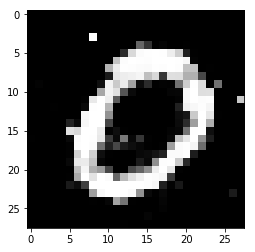

Number batches 468
27(0/468) D: 0.5681, G: 1.0973
27(1/468) D: 0.5496, G: 1.4028
27(2/468) D: 0.5414, G: 1.0293
27(3/468) D: 0.5757, G: 1.1627
27(4/468) D: 0.5438, G: 1.4239
27(5/468) D: 0.5652, G: 1.2266
27(6/468) D: 0.4439, G: 1.0866
27(7/468) D: 0.4629, G: 1.3461
27(8/468) D: 0.5134, G: 1.2786
27(9/468) D: 0.6844, G: 1.1473
27(10/468) D: 0.6278, G: 1.1970
27(11/468) D: 0.5149, G: 1.2875
27(12/468) D: 0.4955, G: 1.0888
27(13/468) D: 0.5108, G: 1.0911
27(14/468) D: 0.5816, G: 1.3840
27(15/468) D: 0.5517, G: 0.9489
27(16/468) D: 0.5181, G: 1.7215
27(17/468) D: 0.4925, G: 1.2667
27(18/468) D: 0.5433, G: 1.0552
27(19/468) D: 0.6337, G: 1.3427
27(20/468) D: 0.4815, G: 1.2335
27(21/468) D: 0.5010, G: 1.1380
27(22/468) D: 0.5401, G: 1.3055
27(23/468) D: 0.4496, G: 1.3932
27(24/468) D: 0.5043, G: 1.1366
27(25/468) D: 0.5290, G: 1.1787
27(26/468) D: 0.5047, G: 1.3525
27(27/468) D: 0.4897, G: 1.2691
27(28/468) D: 0.5401, G: 1.2329
27(29/468) D: 0.5697, G: 1.4970
27(30/468) D: 0.6009, G: 0.8788

27(252/468) D: 0.6017, G: 1.1745
27(253/468) D: 0.5954, G: 1.0589
27(254/468) D: 0.5250, G: 1.4562
27(255/468) D: 0.6688, G: 0.9942
27(256/468) D: 0.5963, G: 1.0992
27(257/468) D: 0.4764, G: 1.5945
27(258/468) D: 0.5631, G: 0.9562
27(259/468) D: 0.5191, G: 1.1494
27(260/468) D: 0.5078, G: 1.2228
27(261/468) D: 0.5580, G: 1.2972
27(262/468) D: 0.5376, G: 1.1521
27(263/468) D: 0.5553, G: 1.0779
27(264/468) D: 0.5785, G: 1.2100
27(265/468) D: 0.5473, G: 1.6671
27(266/468) D: 0.5536, G: 1.2814
27(267/468) D: 0.5047, G: 1.0094
27(268/468) D: 0.5077, G: 1.3874
27(269/468) D: 0.5412, G: 1.2941
27(270/468) D: 0.5645, G: 1.0305
27(271/468) D: 0.5695, G: 1.1229
27(272/468) D: 0.5110, G: 1.1565
27(273/468) D: 0.4563, G: 1.2856
27(274/468) D: 0.5487, G: 1.2847
27(275/468) D: 0.4985, G: 1.2289
27(276/468) D: 0.5342, G: 1.1795
27(277/468) D: 0.4832, G: 1.4244
27(278/468) D: 0.4839, G: 1.2636
27(279/468) D: 0.5723, G: 1.1415
27(280/468) D: 0.5071, G: 1.1575
27(281/468) D: 0.5716, G: 1.0354
27(282/468

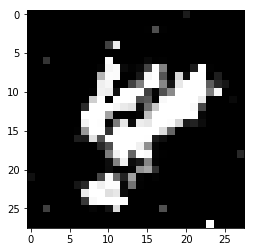

Number batches 468
28(0/468) D: 0.5940, G: 1.1124
28(1/468) D: 0.5178, G: 1.2229
28(2/468) D: 0.5867, G: 1.1953
28(3/468) D: 0.5488, G: 1.2793
28(4/468) D: 0.5194, G: 1.2554
28(5/468) D: 0.5357, G: 1.3597
28(6/468) D: 0.5188, G: 1.1051
28(7/468) D: 0.4546, G: 1.5216
28(8/468) D: 0.5485, G: 1.1989
28(9/468) D: 0.6555, G: 1.3285
28(10/468) D: 0.6045, G: 1.1786
28(11/468) D: 0.5705, G: 1.3300
28(12/468) D: 0.5483, G: 1.0594
28(13/468) D: 0.5496, G: 1.1499
28(14/468) D: 0.5321, G: 1.1288
28(15/468) D: 0.6072, G: 1.0033
28(16/468) D: 0.5623, G: 1.5527
28(17/468) D: 0.5530, G: 1.1236
28(18/468) D: 0.5055, G: 1.1470
28(19/468) D: 0.5255, G: 1.1645
28(20/468) D: 0.5213, G: 1.4368
28(21/468) D: 0.5959, G: 1.0026
28(22/468) D: 0.5873, G: 1.2547
28(23/468) D: 0.5198, G: 1.1771
28(24/468) D: 0.4930, G: 1.3129
28(25/468) D: 0.5637, G: 1.1300
28(26/468) D: 0.5142, G: 1.3700
28(27/468) D: 0.5028, G: 1.4186
28(28/468) D: 0.5619, G: 1.2190
28(29/468) D: 0.5165, G: 1.2036
28(30/468) D: 0.5110, G: 1.3687

28(253/468) D: 0.5019, G: 1.2791
28(254/468) D: 0.6242, G: 1.3866
28(255/468) D: 0.5982, G: 0.7753
28(256/468) D: 0.5960, G: 1.2979
28(257/468) D: 0.4772, G: 1.7388
28(258/468) D: 0.6673, G: 0.9905
28(259/468) D: 0.5609, G: 1.1129
28(260/468) D: 0.5021, G: 1.0873
28(261/468) D: 0.6033, G: 1.1623
28(262/468) D: 0.5982, G: 1.0992
28(263/468) D: 0.5877, G: 0.9790
28(264/468) D: 0.6110, G: 1.1583
28(265/468) D: 0.5271, G: 1.3915
28(266/468) D: 0.5191, G: 1.1347
28(267/468) D: 0.5410, G: 1.2498
28(268/468) D: 0.5537, G: 1.1886
28(269/468) D: 0.5309, G: 1.0114
28(270/468) D: 0.5674, G: 1.1715
28(271/468) D: 0.5896, G: 1.1601
28(272/468) D: 0.5474, G: 1.1498
28(273/468) D: 0.5627, G: 1.0661
28(274/468) D: 0.5094, G: 1.2447
28(275/468) D: 0.4910, G: 1.2641
28(276/468) D: 0.5459, G: 1.1980
28(277/468) D: 0.5103, G: 1.0948
28(278/468) D: 0.5416, G: 1.3403
28(279/468) D: 0.6178, G: 1.3425
28(280/468) D: 0.5241, G: 1.1296
28(281/468) D: 0.5786, G: 1.3138
28(282/468) D: 0.5698, G: 1.3257
28(283/468

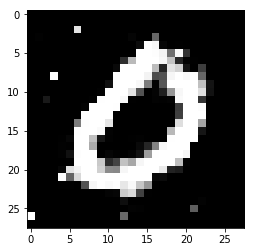

Number batches 468
29(0/468) D: 0.6086, G: 1.0150
29(1/468) D: 0.5787, G: 1.1106
29(2/468) D: 0.5781, G: 1.1948
29(3/468) D: 0.5695, G: 1.3797
29(4/468) D: 0.5338, G: 1.0245
29(5/468) D: 0.5683, G: 1.2116
29(6/468) D: 0.4683, G: 1.2060
29(7/468) D: 0.4310, G: 1.4444
29(8/468) D: 0.5397, G: 1.0930
29(9/468) D: 0.6969, G: 1.2947
29(10/468) D: 0.6348, G: 1.1548
29(11/468) D: 0.5663, G: 1.3611
29(12/468) D: 0.5445, G: 1.0076
29(13/468) D: 0.5284, G: 1.1240
29(14/468) D: 0.5892, G: 1.3017
29(15/468) D: 0.6019, G: 1.2628
29(16/468) D: 0.4826, G: 1.1708
29(17/468) D: 0.5498, G: 1.5052
29(18/468) D: 0.5259, G: 1.2608
29(19/468) D: 0.4765, G: 1.1766
29(20/468) D: 0.5070, G: 1.3322
29(21/468) D: 0.5716, G: 1.2849
29(22/468) D: 0.5534, G: 1.0463
29(23/468) D: 0.5654, G: 1.4026
29(24/468) D: 0.5189, G: 1.1064
29(25/468) D: 0.5454, G: 0.8076
29(26/468) D: 0.6288, G: 1.8529
29(27/468) D: 0.6022, G: 1.0969
29(28/468) D: 0.4905, G: 0.9295
29(29/468) D: 0.5910, G: 1.7250
29(30/468) D: 0.6274, G: 1.1399

29(253/468) D: 0.5135, G: 1.0071
29(254/468) D: 0.5274, G: 1.5102
29(255/468) D: 0.6046, G: 0.8858
29(256/468) D: 0.6280, G: 1.1302
29(257/468) D: 0.4826, G: 1.4911
29(258/468) D: 0.6254, G: 1.0738
29(259/468) D: 0.5250, G: 0.9956
29(260/468) D: 0.5933, G: 1.3177
29(261/468) D: 0.5385, G: 1.1905
29(262/468) D: 0.5570, G: 1.0171
29(263/468) D: 0.5760, G: 0.9457
29(264/468) D: 0.5851, G: 1.2286
29(265/468) D: 0.5521, G: 1.4410
29(266/468) D: 0.5397, G: 1.1922
29(267/468) D: 0.5115, G: 1.1694
29(268/468) D: 0.5670, G: 1.2911
29(269/468) D: 0.5081, G: 1.2791
29(270/468) D: 0.5903, G: 0.9476
29(271/468) D: 0.6257, G: 0.9529
29(272/468) D: 0.5577, G: 1.2099
29(273/468) D: 0.5888, G: 1.0655
29(274/468) D: 0.5364, G: 1.2184
29(275/468) D: 0.5406, G: 1.3573
29(276/468) D: 0.5606, G: 1.0859
29(277/468) D: 0.5362, G: 1.2492
29(278/468) D: 0.5295, G: 1.2094
29(279/468) D: 0.6129, G: 0.9537
29(280/468) D: 0.6762, G: 1.3422
29(281/468) D: 0.6288, G: 0.8783
29(282/468) D: 0.5943, G: 1.1368
29(283/468

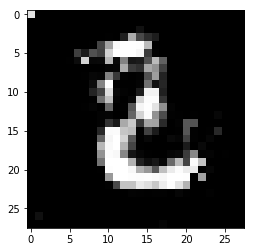

Number batches 468
30(0/468) D: 0.5962, G: 1.0339
30(1/468) D: 0.5846, G: 1.1173
30(2/468) D: 0.6445, G: 1.3609
30(3/468) D: 0.5879, G: 1.2155
30(4/468) D: 0.5395, G: 1.0394
30(5/468) D: 0.5598, G: 1.0610
30(6/468) D: 0.5254, G: 1.1006
30(7/468) D: 0.4969, G: 1.4563
30(8/468) D: 0.6117, G: 1.0613
30(9/468) D: 0.6319, G: 0.9990
30(10/468) D: 0.6369, G: 1.2581
30(11/468) D: 0.5267, G: 1.1824
30(12/468) D: 0.5188, G: 1.1279
30(13/468) D: 0.5680, G: 1.1708
30(14/468) D: 0.5809, G: 1.1153
30(15/468) D: 0.5568, G: 0.9832
30(16/468) D: 0.5056, G: 1.3332
30(17/468) D: 0.5152, G: 1.1281
30(18/468) D: 0.5137, G: 1.1684
30(19/468) D: 0.5417, G: 1.1539
30(20/468) D: 0.5384, G: 1.3691
30(21/468) D: 0.5795, G: 1.0944
30(22/468) D: 0.5770, G: 1.2166
30(23/468) D: 0.4881, G: 1.2540
30(24/468) D: 0.5605, G: 1.1371
30(25/468) D: 0.5662, G: 0.8612
30(26/468) D: 0.5871, G: 1.5695
30(27/468) D: 0.5642, G: 1.3010
30(28/468) D: 0.5465, G: 1.0335
30(29/468) D: 0.5315, G: 1.1877
30(30/468) D: 0.5558, G: 1.2167

30(252/468) D: 0.5728, G: 1.3293
30(253/468) D: 0.5429, G: 1.1541
30(254/468) D: 0.5370, G: 1.0980
30(255/468) D: 0.6194, G: 0.9324
30(256/468) D: 0.5650, G: 1.1019
30(257/468) D: 0.4937, G: 1.4346
30(258/468) D: 0.5735, G: 0.9692
30(259/468) D: 0.5691, G: 1.0471
30(260/468) D: 0.5281, G: 1.2836
30(261/468) D: 0.5014, G: 1.1596
30(262/468) D: 0.5011, G: 0.9221
30(263/468) D: 0.5740, G: 1.2558
30(264/468) D: 0.5679, G: 1.0022
30(265/468) D: 0.5529, G: 1.1657
30(266/468) D: 0.5260, G: 1.2106
30(267/468) D: 0.4647, G: 1.2004
30(268/468) D: 0.5315, G: 1.1355
30(269/468) D: 0.5346, G: 1.2652
30(270/468) D: 0.6281, G: 1.0672
30(271/468) D: 0.5717, G: 1.0843
30(272/468) D: 0.5452, G: 1.3166
30(273/468) D: 0.5115, G: 1.0023
30(274/468) D: 0.5143, G: 1.2792
30(275/468) D: 0.5110, G: 1.3195
30(276/468) D: 0.5557, G: 0.8869
30(277/468) D: 0.4957, G: 1.3005
30(278/468) D: 0.5582, G: 1.3061
30(279/468) D: 0.6243, G: 1.0398
30(280/468) D: 0.6026, G: 1.0913
30(281/468) D: 0.5542, G: 1.1045
30(282/468

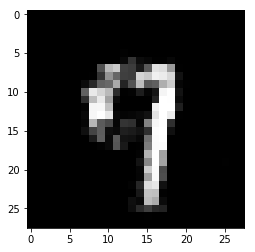

Number batches 468
31(0/468) D: 0.6027, G: 1.0132
31(1/468) D: 0.5431, G: 1.2971
31(2/468) D: 0.5907, G: 1.2153
31(3/468) D: 0.5275, G: 1.0600
31(4/468) D: 0.5312, G: 1.1968
31(5/468) D: 0.5794, G: 1.2942
31(6/468) D: 0.5309, G: 1.2442
31(7/468) D: 0.5148, G: 1.2659
31(8/468) D: 0.5322, G: 0.9998
31(9/468) D: 0.6587, G: 1.2675
31(10/468) D: 0.5798, G: 1.1469
31(11/468) D: 0.5181, G: 1.2813
31(12/468) D: 0.4936, G: 1.1221
31(13/468) D: 0.5584, G: 1.0998
31(14/468) D: 0.6072, G: 1.1436
31(15/468) D: 0.5280, G: 1.2998
31(16/468) D: 0.5436, G: 1.1644
31(17/468) D: 0.4764, G: 1.1579
31(18/468) D: 0.5687, G: 1.4087
31(19/468) D: 0.5343, G: 1.0167
31(20/468) D: 0.5390, G: 1.5336
31(21/468) D: 0.5750, G: 0.9067
31(22/468) D: 0.5548, G: 1.1696
31(23/468) D: 0.4763, G: 1.3901
31(24/468) D: 0.5529, G: 1.2762
31(25/468) D: 0.5873, G: 0.8503
31(26/468) D: 0.5829, G: 1.4701
31(27/468) D: 0.5504, G: 1.1953
31(28/468) D: 0.5320, G: 1.2368
31(29/468) D: 0.5501, G: 1.1928
31(30/468) D: 0.5571, G: 1.1333

31(252/468) D: 0.6099, G: 0.9874
31(253/468) D: 0.5645, G: 1.1105
31(254/468) D: 0.5689, G: 1.2490
31(255/468) D: 0.6313, G: 0.9267
31(256/468) D: 0.6342, G: 1.1051
31(257/468) D: 0.5831, G: 1.3954
31(258/468) D: 0.6458, G: 1.0672
31(259/468) D: 0.6161, G: 1.1099
31(260/468) D: 0.5500, G: 1.0735
31(261/468) D: 0.5959, G: 1.2441
31(262/468) D: 0.5697, G: 1.1488
31(263/468) D: 0.6116, G: 0.9527
31(264/468) D: 0.6035, G: 1.0368
31(265/468) D: 0.5459, G: 1.2297
31(266/468) D: 0.5955, G: 1.1954
31(267/468) D: 0.5469, G: 0.9393
31(268/468) D: 0.5587, G: 1.0345
31(269/468) D: 0.5648, G: 1.2175
31(270/468) D: 0.5865, G: 1.1812
31(271/468) D: 0.5969, G: 0.9650
31(272/468) D: 0.5654, G: 1.0414
31(273/468) D: 0.5839, G: 1.2122
31(274/468) D: 0.5416, G: 0.9190
31(275/468) D: 0.5763, G: 1.2457
31(276/468) D: 0.6312, G: 1.2359
31(277/468) D: 0.5195, G: 1.0725
31(278/468) D: 0.5307, G: 1.0744
31(279/468) D: 0.6448, G: 1.1653
31(280/468) D: 0.5306, G: 1.0340
31(281/468) D: 0.4923, G: 1.3243
31(282/468

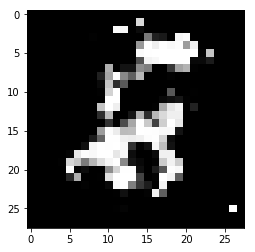

Number batches 468
32(0/468) D: 0.6160, G: 0.8804
32(1/468) D: 0.5980, G: 0.9579
32(2/468) D: 0.6113, G: 1.2882
32(3/468) D: 0.5830, G: 1.2124
32(4/468) D: 0.5518, G: 0.9504
32(5/468) D: 0.5324, G: 1.1555
32(6/468) D: 0.6165, G: 1.1031
32(7/468) D: 0.5123, G: 1.0865
32(8/468) D: 0.5572, G: 1.0003
32(9/468) D: 0.6632, G: 1.1179
32(10/468) D: 0.6232, G: 1.2148
32(11/468) D: 0.5917, G: 1.0512
32(12/468) D: 0.5090, G: 1.1458
32(13/468) D: 0.6007, G: 1.1629
32(14/468) D: 0.5681, G: 1.0539
32(15/468) D: 0.6539, G: 1.1288
32(16/468) D: 0.5638, G: 1.3047
32(17/468) D: 0.5464, G: 0.9551
32(18/468) D: 0.6523, G: 1.2254
32(19/468) D: 0.5404, G: 1.1403
32(20/468) D: 0.5367, G: 1.1354
32(21/468) D: 0.5468, G: 1.0963
32(22/468) D: 0.6072, G: 1.2698
32(23/468) D: 0.4860, G: 1.2009
32(24/468) D: 0.5696, G: 1.2598
32(25/468) D: 0.5612, G: 1.0894
32(26/468) D: 0.5900, G: 1.3734
32(27/468) D: 0.5353, G: 1.0203
32(28/468) D: 0.5964, G: 1.2239
32(29/468) D: 0.6157, G: 1.0564
32(30/468) D: 0.5828, G: 0.9972

32(252/468) D: 0.6281, G: 1.0502
32(253/468) D: 0.5596, G: 0.9881
32(254/468) D: 0.5264, G: 0.9724
32(255/468) D: 0.6002, G: 0.9726
32(256/468) D: 0.6055, G: 1.1429
32(257/468) D: 0.5038, G: 1.1017
32(258/468) D: 0.5716, G: 1.0916
32(259/468) D: 0.5781, G: 1.0429
32(260/468) D: 0.6225, G: 1.0116
32(261/468) D: 0.5881, G: 1.0545
32(262/468) D: 0.5831, G: 1.1240
32(263/468) D: 0.6093, G: 1.0139
32(264/468) D: 0.5839, G: 0.9881
32(265/468) D: 0.5298, G: 1.3100
32(266/468) D: 0.5564, G: 1.0529
32(267/468) D: 0.5311, G: 1.1976
32(268/468) D: 0.5776, G: 0.9050
32(269/468) D: 0.5356, G: 1.0888
32(270/468) D: 0.5562, G: 1.1666
32(271/468) D: 0.6001, G: 0.9994
32(272/468) D: 0.5839, G: 1.1635
32(273/468) D: 0.5911, G: 1.2290
32(274/468) D: 0.5728, G: 1.3777
32(275/468) D: 0.5249, G: 1.0350
32(276/468) D: 0.5696, G: 1.0840
32(277/468) D: 0.5184, G: 1.2370
32(278/468) D: 0.5918, G: 1.2967
32(279/468) D: 0.5991, G: 0.9902
32(280/468) D: 0.5355, G: 1.1572
32(281/468) D: 0.5419, G: 1.1880
32(282/468

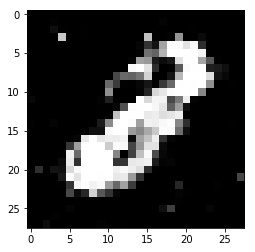

Number batches 468
33(0/468) D: 0.6163, G: 0.8959
33(1/468) D: 0.5751, G: 1.0675
33(2/468) D: 0.6102, G: 1.4015
33(3/468) D: 0.6189, G: 1.0691
33(4/468) D: 0.5345, G: 1.0442
33(5/468) D: 0.5044, G: 1.3315
33(6/468) D: 0.5773, G: 1.1041
33(7/468) D: 0.5239, G: 1.0773
33(8/468) D: 0.5712, G: 1.1315
33(9/468) D: 0.6786, G: 1.2482
33(10/468) D: 0.6364, G: 0.9775
33(11/468) D: 0.5936, G: 1.2183
33(12/468) D: 0.5353, G: 1.1788
33(13/468) D: 0.5945, G: 0.8505
33(14/468) D: 0.5799, G: 1.1056
33(15/468) D: 0.6306, G: 1.1752
33(16/468) D: 0.5364, G: 1.2776
33(17/468) D: 0.5524, G: 1.1285
33(18/468) D: 0.5916, G: 1.0067
33(19/468) D: 0.5610, G: 1.0884
33(20/468) D: 0.5837, G: 1.3431
33(21/468) D: 0.5994, G: 1.0281
33(22/468) D: 0.5894, G: 0.9970
33(23/468) D: 0.5396, G: 1.1244
33(24/468) D: 0.5517, G: 1.2095
33(25/468) D: 0.5409, G: 0.9898
33(26/468) D: 0.5711, G: 1.2294
33(27/468) D: 0.5960, G: 1.3226
33(28/468) D: 0.6081, G: 1.0005
33(29/468) D: 0.6039, G: 1.2196
33(30/468) D: 0.6492, G: 1.0945

33(253/468) D: 0.6069, G: 1.1046
33(254/468) D: 0.6567, G: 1.1183
33(255/468) D: 0.6253, G: 0.9397
33(256/468) D: 0.6010, G: 1.0783
33(257/468) D: 0.5133, G: 1.1413
33(258/468) D: 0.6300, G: 0.9900
33(259/468) D: 0.5936, G: 1.1569
33(260/468) D: 0.6084, G: 1.0682
33(261/468) D: 0.5542, G: 0.9242
33(262/468) D: 0.5950, G: 0.9676
33(263/468) D: 0.5795, G: 1.1968
33(264/468) D: 0.5995, G: 1.0781
33(265/468) D: 0.5496, G: 1.2642
33(266/468) D: 0.5693, G: 1.2757
33(267/468) D: 0.5910, G: 0.8622
33(268/468) D: 0.6352, G: 1.1305
33(269/468) D: 0.5259, G: 1.1047
33(270/468) D: 0.5936, G: 0.9582
33(271/468) D: 0.5936, G: 1.1404
33(272/468) D: 0.5522, G: 1.0993
33(273/468) D: 0.5592, G: 0.9533
33(274/468) D: 0.5031, G: 1.1034
33(275/468) D: 0.5084, G: 1.2747
33(276/468) D: 0.5938, G: 0.9988
33(277/468) D: 0.5277, G: 1.1921
33(278/468) D: 0.5087, G: 1.1948
33(279/468) D: 0.6112, G: 0.8459
33(280/468) D: 0.6122, G: 1.3707
33(281/468) D: 0.5622, G: 1.0073
33(282/468) D: 0.6250, G: 1.2436
33(283/468

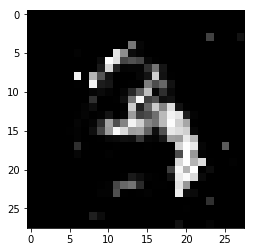

Number batches 468
34(0/468) D: 0.6333, G: 0.8378
34(1/468) D: 0.5880, G: 1.2057
34(2/468) D: 0.5851, G: 1.1653
34(3/468) D: 0.6049, G: 0.9497
34(4/468) D: 0.6196, G: 1.0486
34(5/468) D: 0.5654, G: 1.1503
34(6/468) D: 0.5717, G: 1.1448
34(7/468) D: 0.5875, G: 1.0875
34(8/468) D: 0.5762, G: 1.0563
34(9/468) D: 0.6555, G: 1.0705
34(10/468) D: 0.5761, G: 1.0478
34(11/468) D: 0.5536, G: 1.0655
34(12/468) D: 0.5496, G: 1.2805
34(13/468) D: 0.5555, G: 0.9202
34(14/468) D: 0.5951, G: 1.0551
34(15/468) D: 0.6100, G: 1.2214
34(16/468) D: 0.5566, G: 1.1241
34(17/468) D: 0.5672, G: 1.0166
34(18/468) D: 0.5777, G: 1.0803
34(19/468) D: 0.6436, G: 1.0647
34(20/468) D: 0.5184, G: 1.3698
34(21/468) D: 0.5856, G: 1.0435
34(22/468) D: 0.5507, G: 0.9862
34(23/468) D: 0.4831, G: 1.3054
34(24/468) D: 0.5313, G: 1.1731
34(25/468) D: 0.5812, G: 1.0310
34(26/468) D: 0.5968, G: 1.3159
34(27/468) D: 0.5333, G: 0.9178
34(28/468) D: 0.5917, G: 1.0894
34(29/468) D: 0.5882, G: 1.0359
34(30/468) D: 0.5357, G: 0.9284

34(253/468) D: 0.5421, G: 1.0339
34(254/468) D: 0.5898, G: 1.1294
34(255/468) D: 0.6714, G: 1.0530
34(256/468) D: 0.6245, G: 0.9116
34(257/468) D: 0.5655, G: 1.3495
34(258/468) D: 0.5821, G: 0.9977
34(259/468) D: 0.5417, G: 1.0049
34(260/468) D: 0.5569, G: 1.0945
34(261/468) D: 0.5792, G: 0.9704
34(262/468) D: 0.5642, G: 1.1831
34(263/468) D: 0.5513, G: 0.9793
34(264/468) D: 0.5736, G: 0.8448
34(265/468) D: 0.5379, G: 1.1585
34(266/468) D: 0.5359, G: 1.3317
34(267/468) D: 0.5368, G: 1.2115
34(268/468) D: 0.5496, G: 0.9833
34(269/468) D: 0.5285, G: 1.1519
34(270/468) D: 0.5912, G: 1.0887
34(271/468) D: 0.5968, G: 1.1463
34(272/468) D: 0.5814, G: 1.1418
34(273/468) D: 0.5721, G: 1.0736
34(274/468) D: 0.5536, G: 1.1418
34(275/468) D: 0.5823, G: 1.0971
34(276/468) D: 0.6327, G: 1.0221
34(277/468) D: 0.5658, G: 1.1397
34(278/468) D: 0.5149, G: 1.0469
34(279/468) D: 0.5680, G: 1.2188
34(280/468) D: 0.5506, G: 1.2158
34(281/468) D: 0.5900, G: 1.0379
34(282/468) D: 0.6027, G: 1.1548
34(283/468

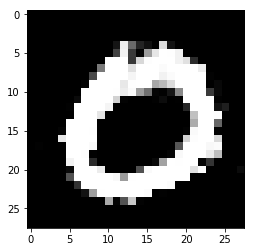

Number batches 468
35(0/468) D: 0.6369, G: 0.9461
35(1/468) D: 0.6092, G: 1.0938
35(2/468) D: 0.5697, G: 1.0278
35(3/468) D: 0.6163, G: 1.0524
35(4/468) D: 0.5384, G: 1.0640
35(5/468) D: 0.5545, G: 1.1786
35(6/468) D: 0.5101, G: 1.0462
35(7/468) D: 0.5749, G: 1.5322
35(8/468) D: 0.6599, G: 0.9055
35(9/468) D: 0.6818, G: 0.9472
35(10/468) D: 0.6429, G: 1.0935
35(11/468) D: 0.5761, G: 1.1972
35(12/468) D: 0.5851, G: 1.1237
35(13/468) D: 0.6056, G: 0.8205
35(14/468) D: 0.5736, G: 1.1321
35(15/468) D: 0.6370, G: 1.0044
35(16/468) D: 0.5573, G: 0.9207
35(17/468) D: 0.6407, G: 1.3623
35(18/468) D: 0.6016, G: 1.0787
35(19/468) D: 0.6042, G: 0.9936
35(20/468) D: 0.5646, G: 1.2041
35(21/468) D: 0.6137, G: 1.1615
35(22/468) D: 0.5690, G: 0.8980
35(23/468) D: 0.5137, G: 1.0581
35(24/468) D: 0.5752, G: 1.1500
35(25/468) D: 0.5942, G: 0.9313
35(26/468) D: 0.5612, G: 1.1574
35(27/468) D: 0.5772, G: 1.1040
35(28/468) D: 0.5566, G: 1.1603
35(29/468) D: 0.6074, G: 0.9990
35(30/468) D: 0.5939, G: 1.1669

35(252/468) D: 0.6221, G: 1.1403
35(253/468) D: 0.6048, G: 0.9077
35(254/468) D: 0.5632, G: 1.0535
35(255/468) D: 0.6641, G: 1.0579
35(256/468) D: 0.5920, G: 0.8835
35(257/468) D: 0.5241, G: 1.2747
35(258/468) D: 0.6137, G: 1.0842
35(259/468) D: 0.5725, G: 0.9313
35(260/468) D: 0.5726, G: 1.1607
35(261/468) D: 0.5991, G: 0.9551
35(262/468) D: 0.5629, G: 0.9571
35(263/468) D: 0.6345, G: 0.9207
35(264/468) D: 0.6492, G: 1.1206
35(265/468) D: 0.6026, G: 1.1121
35(266/468) D: 0.5628, G: 1.1102
35(267/468) D: 0.5435, G: 1.0901
35(268/468) D: 0.6112, G: 1.0956
35(269/468) D: 0.5463, G: 1.0276
35(270/468) D: 0.6353, G: 1.1890
35(271/468) D: 0.6086, G: 0.7851
35(272/468) D: 0.6400, G: 1.1093
35(273/468) D: 0.5857, G: 1.1658
35(274/468) D: 0.5196, G: 0.9830
35(275/468) D: 0.5609, G: 1.1015
35(276/468) D: 0.6298, G: 1.1997
35(277/468) D: 0.5845, G: 1.1073
35(278/468) D: 0.5831, G: 1.0039
35(279/468) D: 0.6298, G: 0.7705
35(280/468) D: 0.6031, G: 1.4298
35(281/468) D: 0.5907, G: 1.0308
35(282/468

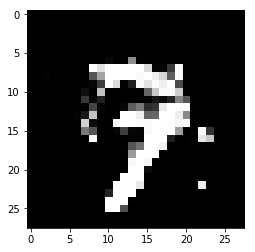

Number batches 468
36(0/468) D: 0.6193, G: 0.8221
36(1/468) D: 0.6315, G: 1.3976
36(2/468) D: 0.5840, G: 1.0872
36(3/468) D: 0.5866, G: 1.0947
36(4/468) D: 0.6022, G: 1.3048
36(5/468) D: 0.5607, G: 1.3094
36(6/468) D: 0.5297, G: 1.1054
36(7/468) D: 0.5256, G: 1.1588
36(8/468) D: 0.5532, G: 1.2588
36(9/468) D: 0.6654, G: 1.0091
36(10/468) D: 0.6703, G: 1.0618
36(11/468) D: 0.5556, G: 1.3395
36(12/468) D: 0.5593, G: 1.1032
36(13/468) D: 0.6236, G: 0.9649
36(14/468) D: 0.5693, G: 1.0755
36(15/468) D: 0.6264, G: 1.1158
36(16/468) D: 0.5826, G: 1.1217
36(17/468) D: 0.6174, G: 1.1439
36(18/468) D: 0.6074, G: 1.0184
36(19/468) D: 0.6247, G: 1.0701
36(20/468) D: 0.6187, G: 1.1965
36(21/468) D: 0.5869, G: 1.0948
36(22/468) D: 0.5942, G: 0.9406
36(23/468) D: 0.5179, G: 0.9248
36(24/468) D: 0.5718, G: 1.2292
36(25/468) D: 0.6404, G: 1.1796
36(26/468) D: 0.5595, G: 1.0715
36(27/468) D: 0.5379, G: 0.9465
36(28/468) D: 0.6043, G: 1.2883
36(29/468) D: 0.5850, G: 1.1028
36(30/468) D: 0.5737, G: 0.8933

36(253/468) D: 0.5684, G: 0.9308
36(254/468) D: 0.5369, G: 0.9826
36(255/468) D: 0.6522, G: 0.8351
36(256/468) D: 0.6051, G: 0.9072
36(257/468) D: 0.5840, G: 1.2676
36(258/468) D: 0.5848, G: 1.0015
36(259/468) D: 0.5498, G: 1.0374
36(260/468) D: 0.5703, G: 1.0495
36(261/468) D: 0.6170, G: 0.9656
36(262/468) D: 0.5497, G: 0.7649
36(263/468) D: 0.5996, G: 0.9601
36(264/468) D: 0.5996, G: 0.9978
36(265/468) D: 0.5615, G: 1.1767
36(266/468) D: 0.5552, G: 1.1092
36(267/468) D: 0.5323, G: 1.2155
36(268/468) D: 0.6367, G: 0.9533
36(269/468) D: 0.5621, G: 1.0465
36(270/468) D: 0.5780, G: 1.2851
36(271/468) D: 0.6187, G: 0.9169
36(272/468) D: 0.5919, G: 1.0456
36(273/468) D: 0.5277, G: 1.1721
36(274/468) D: 0.5437, G: 1.1685
36(275/468) D: 0.5254, G: 1.1306
36(276/468) D: 0.5398, G: 0.9894
36(277/468) D: 0.5662, G: 1.6257
36(278/468) D: 0.5948, G: 0.9280
36(279/468) D: 0.6081, G: 0.9835
36(280/468) D: 0.6202, G: 1.2650
36(281/468) D: 0.5586, G: 0.9845
36(282/468) D: 0.6390, G: 1.0461
36(283/468

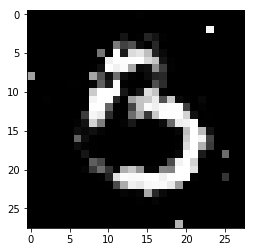

Number batches 468
37(0/468) D: 0.6230, G: 0.8562
37(1/468) D: 0.6110, G: 1.2175
37(2/468) D: 0.5489, G: 1.0069
37(3/468) D: 0.5788, G: 1.0194
37(4/468) D: 0.5595, G: 1.1750
37(5/468) D: 0.6399, G: 1.2283
37(6/468) D: 0.5715, G: 1.0681
37(7/468) D: 0.5453, G: 1.1347
37(8/468) D: 0.5802, G: 1.0256
37(9/468) D: 0.6863, G: 0.9345
37(10/468) D: 0.6798, G: 1.1535
37(11/468) D: 0.5368, G: 1.1106
37(12/468) D: 0.5643, G: 1.0393
37(13/468) D: 0.5549, G: 0.8288
37(14/468) D: 0.5602, G: 1.0281
37(15/468) D: 0.5927, G: 1.0678
37(16/468) D: 0.6067, G: 1.0909
37(17/468) D: 0.5862, G: 1.0364
37(18/468) D: 0.6413, G: 1.3001
37(19/468) D: 0.6517, G: 0.9552
37(20/468) D: 0.5683, G: 1.0687
37(21/468) D: 0.5847, G: 1.2393
37(22/468) D: 0.6197, G: 0.9830
37(23/468) D: 0.5605, G: 1.1316
37(24/468) D: 0.5953, G: 0.9199
37(25/468) D: 0.6567, G: 1.1173
37(26/468) D: 0.6538, G: 1.1483
37(27/468) D: 0.5796, G: 0.9950
37(28/468) D: 0.6164, G: 1.0470
37(29/468) D: 0.5733, G: 1.0007
37(30/468) D: 0.5448, G: 0.7891

37(252/468) D: 0.6195, G: 1.0473
37(253/468) D: 0.5811, G: 1.0558
37(254/468) D: 0.6024, G: 1.0344
37(255/468) D: 0.6344, G: 0.8290
37(256/468) D: 0.6703, G: 0.8687
37(257/468) D: 0.5559, G: 1.1366
37(258/468) D: 0.6080, G: 1.1196
37(259/468) D: 0.5871, G: 0.9878
37(260/468) D: 0.5935, G: 1.0571
37(261/468) D: 0.6099, G: 0.9674
37(262/468) D: 0.5437, G: 1.0057
37(263/468) D: 0.6117, G: 1.0285
37(264/468) D: 0.6534, G: 1.1108
37(265/468) D: 0.5938, G: 1.0952
37(266/468) D: 0.5829, G: 1.1021
37(267/468) D: 0.6220, G: 1.1013
37(268/468) D: 0.6275, G: 0.9093
37(269/468) D: 0.5824, G: 1.1190
37(270/468) D: 0.6354, G: 1.3733
37(271/468) D: 0.6047, G: 0.7410
37(272/468) D: 0.6725, G: 1.0601
37(273/468) D: 0.5721, G: 1.0400
37(274/468) D: 0.6081, G: 0.9853
37(275/468) D: 0.5625, G: 0.9952
37(276/468) D: 0.5854, G: 1.0768
37(277/468) D: 0.5533, G: 1.1817
37(278/468) D: 0.5297, G: 1.1227
37(279/468) D: 0.6375, G: 0.9138
37(280/468) D: 0.6211, G: 1.1662
37(281/468) D: 0.5852, G: 1.1379
37(282/468

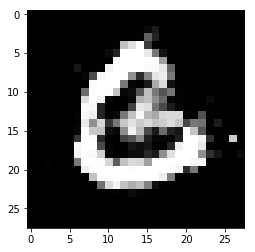

Number batches 468
38(0/468) D: 0.6808, G: 0.9790
38(1/468) D: 0.6144, G: 0.9536
38(2/468) D: 0.5980, G: 1.0847
38(3/468) D: 0.5999, G: 1.0142
38(4/468) D: 0.5786, G: 0.8619
38(5/468) D: 0.5982, G: 1.1019
38(6/468) D: 0.5390, G: 1.2243
38(7/468) D: 0.5788, G: 1.0687
38(8/468) D: 0.5404, G: 0.9617
38(9/468) D: 0.6231, G: 1.0103
38(10/468) D: 0.6665, G: 1.3160
38(11/468) D: 0.5802, G: 0.9954
38(12/468) D: 0.5918, G: 1.0764
38(13/468) D: 0.5728, G: 1.0345
38(14/468) D: 0.6720, G: 1.0457
38(15/468) D: 0.6670, G: 0.9307
38(16/468) D: 0.6027, G: 1.0474
38(17/468) D: 0.5730, G: 1.0735
38(18/468) D: 0.5893, G: 1.1239
38(19/468) D: 0.5744, G: 0.9484
38(20/468) D: 0.5680, G: 1.0319
38(21/468) D: 0.5998, G: 0.9967
38(22/468) D: 0.6094, G: 1.1550
38(23/468) D: 0.5677, G: 1.1350
38(24/468) D: 0.5390, G: 1.0028
38(25/468) D: 0.6265, G: 0.9739
38(26/468) D: 0.5849, G: 1.2678
38(27/468) D: 0.5854, G: 0.8894
38(28/468) D: 0.5739, G: 1.2214
38(29/468) D: 0.6189, G: 0.9490
38(30/468) D: 0.5695, G: 0.9892

38(253/468) D: 0.5811, G: 0.9478
38(254/468) D: 0.6209, G: 1.2551
38(255/468) D: 0.6720, G: 0.8893
38(256/468) D: 0.5911, G: 1.0618
38(257/468) D: 0.5825, G: 1.0690
38(258/468) D: 0.6396, G: 1.0180
38(259/468) D: 0.6003, G: 1.0273
38(260/468) D: 0.5970, G: 1.1123
38(261/468) D: 0.5573, G: 1.0191
38(262/468) D: 0.5770, G: 1.1252
38(263/468) D: 0.6040, G: 0.9986
38(264/468) D: 0.5808, G: 0.9254
38(265/468) D: 0.6215, G: 1.4562
38(266/468) D: 0.5613, G: 1.0528
38(267/468) D: 0.5239, G: 1.0660
38(268/468) D: 0.5917, G: 1.1406
38(269/468) D: 0.5714, G: 1.1048
38(270/468) D: 0.6036, G: 0.8408
38(271/468) D: 0.6437, G: 1.1758
38(272/468) D: 0.5715, G: 1.1511
38(273/468) D: 0.5565, G: 0.9224
38(274/468) D: 0.5614, G: 1.0304
38(275/468) D: 0.4871, G: 1.1972
38(276/468) D: 0.5794, G: 0.9884
38(277/468) D: 0.5426, G: 1.1719
38(278/468) D: 0.5416, G: 1.1712
38(279/468) D: 0.6315, G: 1.0352
38(280/468) D: 0.5919, G: 1.0196
38(281/468) D: 0.5295, G: 1.0692
38(282/468) D: 0.5436, G: 1.0742
38(283/468

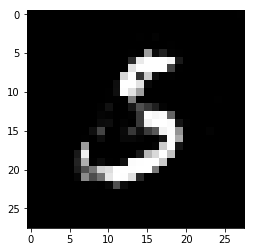

Number batches 468
39(0/468) D: 0.6197, G: 0.8740
39(1/468) D: 0.5878, G: 1.0382
39(2/468) D: 0.5733, G: 1.0265
39(3/468) D: 0.6082, G: 0.9094
39(4/468) D: 0.5928, G: 1.1529
39(5/468) D: 0.6035, G: 1.1559
39(6/468) D: 0.5530, G: 0.9822
39(7/468) D: 0.5735, G: 1.3055
39(8/468) D: 0.6223, G: 1.1892
39(9/468) D: 0.6579, G: 0.9353
39(10/468) D: 0.6355, G: 1.1205
39(11/468) D: 0.5429, G: 1.1640
39(12/468) D: 0.5194, G: 1.2077
39(13/468) D: 0.6490, G: 0.9285
39(14/468) D: 0.6111, G: 0.9801
39(15/468) D: 0.5904, G: 1.0579
39(16/468) D: 0.5993, G: 1.0529
39(17/468) D: 0.6256, G: 1.2058
39(18/468) D: 0.5720, G: 0.9902
39(19/468) D: 0.5877, G: 1.1330
39(20/468) D: 0.5822, G: 0.9990
39(21/468) D: 0.6035, G: 0.9879
39(22/468) D: 0.6095, G: 1.1140
39(23/468) D: 0.5569, G: 1.0435
39(24/468) D: 0.5692, G: 0.8779
39(25/468) D: 0.5684, G: 0.9492
39(26/468) D: 0.5889, G: 1.0965
39(27/468) D: 0.5562, G: 1.1325
39(28/468) D: 0.5480, G: 1.1114
39(29/468) D: 0.6003, G: 0.9014
39(30/468) D: 0.6319, G: 0.8952

39(252/468) D: 0.6399, G: 1.0745
39(253/468) D: 0.5477, G: 1.0620
39(254/468) D: 0.5854, G: 1.1076
39(255/468) D: 0.7325, G: 0.7823
39(256/468) D: 0.6111, G: 0.9257
39(257/468) D: 0.5506, G: 1.2204
39(258/468) D: 0.6329, G: 1.1385
39(259/468) D: 0.6197, G: 0.9075
39(260/468) D: 0.6124, G: 1.1479
39(261/468) D: 0.5919, G: 0.9985
39(262/468) D: 0.5735, G: 0.9620
39(263/468) D: 0.5970, G: 0.9541
39(264/468) D: 0.6154, G: 0.9311
39(265/468) D: 0.5369, G: 1.2235
39(266/468) D: 0.5718, G: 1.0202
39(267/468) D: 0.5615, G: 1.1400
39(268/468) D: 0.5418, G: 0.9681
39(269/468) D: 0.5626, G: 1.0964
39(270/468) D: 0.6589, G: 1.1018
39(271/468) D: 0.6417, G: 1.0597
39(272/468) D: 0.5895, G: 1.0432
39(273/468) D: 0.5598, G: 1.0486
39(274/468) D: 0.5716, G: 1.1330
39(275/468) D: 0.5399, G: 1.0899
39(276/468) D: 0.5721, G: 1.0441
39(277/468) D: 0.5475, G: 1.2962
39(278/468) D: 0.5310, G: 1.1495
39(279/468) D: 0.6466, G: 0.8903
39(280/468) D: 0.5923, G: 0.9721
39(281/468) D: 0.5783, G: 1.2158
39(282/468

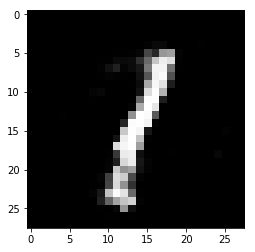

Number batches 468
40(0/468) D: 0.6554, G: 0.8746
40(1/468) D: 0.5628, G: 0.9144
40(2/468) D: 0.6172, G: 1.1305
40(3/468) D: 0.6327, G: 0.9525
40(4/468) D: 0.5723, G: 1.0062
40(5/468) D: 0.5656, G: 1.1658
40(6/468) D: 0.5848, G: 1.0680
40(7/468) D: 0.5421, G: 1.1360
40(8/468) D: 0.6032, G: 1.0385
40(9/468) D: 0.7204, G: 0.9995
40(10/468) D: 0.6141, G: 0.9878
40(11/468) D: 0.5434, G: 1.1460
40(12/468) D: 0.5709, G: 1.0106
40(13/468) D: 0.6126, G: 0.8312
40(14/468) D: 0.6459, G: 1.1926
40(15/468) D: 0.6322, G: 1.0770
40(16/468) D: 0.5520, G: 0.9002
40(17/468) D: 0.5262, G: 1.0649
40(18/468) D: 0.5722, G: 1.2567
40(19/468) D: 0.5932, G: 1.0443
40(20/468) D: 0.5543, G: 0.9070
40(21/468) D: 0.6013, G: 1.2134
40(22/468) D: 0.5815, G: 1.0165
40(23/468) D: 0.5693, G: 0.9776
40(24/468) D: 0.5856, G: 1.1493
40(25/468) D: 0.6133, G: 0.9669
40(26/468) D: 0.5859, G: 1.0313
40(27/468) D: 0.5964, G: 1.1692
40(28/468) D: 0.6153, G: 1.0858
40(29/468) D: 0.6210, G: 0.9049
40(30/468) D: 0.6058, G: 1.1163

40(253/468) D: 0.6171, G: 1.1028
40(254/468) D: 0.5910, G: 0.9830
40(255/468) D: 0.6517, G: 0.6640
40(256/468) D: 0.6172, G: 1.2090
40(257/468) D: 0.5553, G: 1.1439
40(258/468) D: 0.6165, G: 0.8314
40(259/468) D: 0.6140, G: 1.1142
40(260/468) D: 0.6005, G: 0.9359
40(261/468) D: 0.5971, G: 1.0092
40(262/468) D: 0.5936, G: 1.0263
40(263/468) D: 0.6182, G: 1.0656
40(264/468) D: 0.6569, G: 1.1365
40(265/468) D: 0.6145, G: 1.0238
40(266/468) D: 0.6207, G: 0.9304
40(267/468) D: 0.5604, G: 1.0931
40(268/468) D: 0.5954, G: 1.0399
40(269/468) D: 0.5738, G: 0.9694
40(270/468) D: 0.6343, G: 0.9211
40(271/468) D: 0.6444, G: 0.9832
40(272/468) D: 0.5939, G: 0.9640
40(273/468) D: 0.6406, G: 0.9309
40(274/468) D: 0.5504, G: 0.8011
40(275/468) D: 0.5851, G: 1.1517
40(276/468) D: 0.5677, G: 1.0730
40(277/468) D: 0.4964, G: 1.0851
40(278/468) D: 0.5792, G: 1.1287
40(279/468) D: 0.6284, G: 0.9046
40(280/468) D: 0.5611, G: 1.0198
40(281/468) D: 0.5613, G: 1.2847
40(282/468) D: 0.6590, G: 0.9560
40(283/468

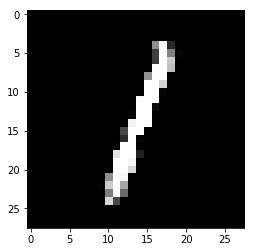

Number batches 468
41(0/468) D: 0.6046, G: 0.7549
41(1/468) D: 0.6390, G: 1.1003
41(2/468) D: 0.6094, G: 1.1189
41(3/468) D: 0.5731, G: 0.9321
41(4/468) D: 0.5595, G: 1.0741
41(5/468) D: 0.5524, G: 0.9790
41(6/468) D: 0.5349, G: 1.0311
41(7/468) D: 0.5360, G: 0.9575
41(8/468) D: 0.5591, G: 1.0836
41(9/468) D: 0.6435, G: 0.9979
41(10/468) D: 0.6607, G: 1.0781
41(11/468) D: 0.5436, G: 1.0807
41(12/468) D: 0.5553, G: 1.0364
41(13/468) D: 0.5637, G: 1.0257
41(14/468) D: 0.6129, G: 1.1508
41(15/468) D: 0.6034, G: 1.1075
41(16/468) D: 0.5519, G: 1.0446
41(17/468) D: 0.5869, G: 0.9818
41(18/468) D: 0.5752, G: 1.1367
41(19/468) D: 0.6330, G: 0.7941
41(20/468) D: 0.5737, G: 1.1341
41(21/468) D: 0.5370, G: 0.9034
41(22/468) D: 0.5985, G: 1.0711
41(23/468) D: 0.5917, G: 1.0814
41(24/468) D: 0.6192, G: 1.0031
41(25/468) D: 0.6304, G: 1.0050
41(26/468) D: 0.5802, G: 1.0600
41(27/468) D: 0.6182, G: 1.0338
41(28/468) D: 0.5980, G: 0.9406
41(29/468) D: 0.6463, G: 1.0333
41(30/468) D: 0.6217, G: 1.0826

41(253/468) D: 0.5829, G: 0.8809
41(254/468) D: 0.6044, G: 1.0553
41(255/468) D: 0.6741, G: 0.9822
41(256/468) D: 0.6172, G: 1.0782
41(257/468) D: 0.5409, G: 1.0985
41(258/468) D: 0.6286, G: 0.8381
41(259/468) D: 0.5896, G: 0.9859
41(260/468) D: 0.5738, G: 1.1934
41(261/468) D: 0.5898, G: 0.8916
41(262/468) D: 0.6387, G: 0.9664
41(263/468) D: 0.5781, G: 1.0905
41(264/468) D: 0.6638, G: 0.8553
41(265/468) D: 0.6034, G: 1.1559
41(266/468) D: 0.5790, G: 0.7866
41(267/468) D: 0.5529, G: 1.0037
41(268/468) D: 0.6704, G: 1.0459
41(269/468) D: 0.5883, G: 1.0390
41(270/468) D: 0.5957, G: 0.9782
41(271/468) D: 0.6288, G: 0.8372
41(272/468) D: 0.6231, G: 0.9579
41(273/468) D: 0.5700, G: 1.0862
41(274/468) D: 0.6002, G: 1.0330
41(275/468) D: 0.5794, G: 0.9896
41(276/468) D: 0.5577, G: 1.0200
41(277/468) D: 0.5640, G: 0.9929
41(278/468) D: 0.5636, G: 0.9586
41(279/468) D: 0.6317, G: 0.9965
41(280/468) D: 0.6159, G: 1.0265
41(281/468) D: 0.5855, G: 1.0324
41(282/468) D: 0.6233, G: 1.1699
41(283/468

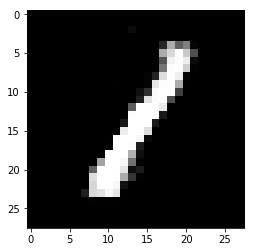

Number batches 468
42(0/468) D: 0.6218, G: 0.8397
42(1/468) D: 0.6619, G: 1.1581
42(2/468) D: 0.5778, G: 1.0917
42(3/468) D: 0.6273, G: 0.9417
42(4/468) D: 0.6120, G: 1.0724
42(5/468) D: 0.6282, G: 1.0671
42(6/468) D: 0.5982, G: 0.9755
42(7/468) D: 0.5810, G: 1.0960
42(8/468) D: 0.5551, G: 0.9332
42(9/468) D: 0.6805, G: 1.0693
42(10/468) D: 0.6231, G: 0.9691
42(11/468) D: 0.5577, G: 1.0753
42(12/468) D: 0.5392, G: 1.0064
42(13/468) D: 0.5812, G: 0.9270
42(14/468) D: 0.5951, G: 1.0765
42(15/468) D: 0.6883, G: 1.2914
42(16/468) D: 0.5764, G: 0.9715
42(17/468) D: 0.6065, G: 1.0820
42(18/468) D: 0.5847, G: 0.9608
42(19/468) D: 0.6264, G: 0.9940
42(20/468) D: 0.5765, G: 1.1003
42(21/468) D: 0.5998, G: 1.0044
42(22/468) D: 0.5953, G: 0.9276
42(23/468) D: 0.5706, G: 1.0645
42(24/468) D: 0.5433, G: 1.0457
42(25/468) D: 0.5939, G: 0.9004
42(26/468) D: 0.5762, G: 1.2611
42(27/468) D: 0.5626, G: 1.1196
42(28/468) D: 0.5842, G: 0.8601
42(29/468) D: 0.6252, G: 1.1803
42(30/468) D: 0.6418, G: 0.9736

42(252/468) D: 0.6145, G: 1.1331
42(253/468) D: 0.6062, G: 0.9604
42(254/468) D: 0.5801, G: 0.9428
42(255/468) D: 0.6645, G: 0.8559
42(256/468) D: 0.6025, G: 1.0936
42(257/468) D: 0.5649, G: 1.1331
42(258/468) D: 0.6710, G: 1.1607
42(259/468) D: 0.5933, G: 0.9352
42(260/468) D: 0.5864, G: 0.9683
42(261/468) D: 0.5593, G: 0.9384
42(262/468) D: 0.5947, G: 1.0197
42(263/468) D: 0.5961, G: 0.9675
42(264/468) D: 0.6349, G: 1.0725
42(265/468) D: 0.5657, G: 1.0494
42(266/468) D: 0.5413, G: 1.0279
42(267/468) D: 0.5543, G: 1.0854
42(268/468) D: 0.5939, G: 0.8842
42(269/468) D: 0.6555, G: 1.0950
42(270/468) D: 0.6811, G: 0.8026
42(271/468) D: 0.5912, G: 0.7899
42(272/468) D: 0.6238, G: 1.0756
42(273/468) D: 0.5802, G: 1.0634
42(274/468) D: 0.5546, G: 0.7940
42(275/468) D: 0.5669, G: 1.0824
42(276/468) D: 0.5594, G: 1.2433
42(277/468) D: 0.5479, G: 0.9932
42(278/468) D: 0.5572, G: 0.9399
42(279/468) D: 0.6174, G: 0.9217
42(280/468) D: 0.6102, G: 1.0457
42(281/468) D: 0.5411, G: 0.9662
42(282/468

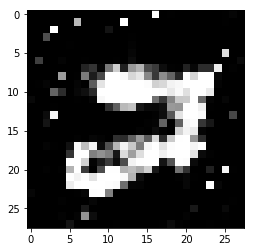

Number batches 468
43(0/468) D: 0.6739, G: 0.7804
43(1/468) D: 0.6597, G: 1.0007
43(2/468) D: 0.6246, G: 0.9835
43(3/468) D: 0.5846, G: 1.0751
43(4/468) D: 0.5712, G: 0.9738
43(5/468) D: 0.5863, G: 1.0038
43(6/468) D: 0.5612, G: 1.0894
43(7/468) D: 0.5878, G: 1.1503
43(8/468) D: 0.5772, G: 0.8825
43(9/468) D: 0.6957, G: 0.9889
43(10/468) D: 0.6863, G: 1.0874
43(11/468) D: 0.5948, G: 1.0221
43(12/468) D: 0.5926, G: 1.0460
43(13/468) D: 0.6170, G: 1.0007
43(14/468) D: 0.6281, G: 1.0731
43(15/468) D: 0.6414, G: 0.8366
43(16/468) D: 0.6079, G: 1.1066
43(17/468) D: 0.6117, G: 1.0055
43(18/468) D: 0.5794, G: 1.0159
43(19/468) D: 0.6133, G: 0.8559
43(20/468) D: 0.5879, G: 1.1707
43(21/468) D: 0.5820, G: 0.9510
43(22/468) D: 0.6072, G: 0.8647
43(23/468) D: 0.6057, G: 1.0431
43(24/468) D: 0.5885, G: 0.9488
43(25/468) D: 0.6476, G: 0.8581
43(26/468) D: 0.6435, G: 1.1145
43(27/468) D: 0.5892, G: 1.0051
43(28/468) D: 0.6069, G: 1.1796
43(29/468) D: 0.5836, G: 0.7956
43(30/468) D: 0.6401, G: 0.9626

43(252/468) D: 0.5862, G: 0.9778
43(253/468) D: 0.6025, G: 1.1482
43(254/468) D: 0.5572, G: 0.9860
43(255/468) D: 0.6608, G: 0.8563
43(256/468) D: 0.6066, G: 1.0509
43(257/468) D: 0.5473, G: 1.2875
43(258/468) D: 0.6089, G: 0.8463
43(259/468) D: 0.6381, G: 1.1106
43(260/468) D: 0.6075, G: 0.9583
43(261/468) D: 0.5735, G: 0.9675
43(262/468) D: 0.6030, G: 1.0658
43(263/468) D: 0.6228, G: 0.8451
43(264/468) D: 0.6716, G: 0.9829
43(265/468) D: 0.5850, G: 1.1158
43(266/468) D: 0.5546, G: 1.1053
43(267/468) D: 0.5769, G: 0.9325
43(268/468) D: 0.6448, G: 1.0795
43(269/468) D: 0.5896, G: 1.1737
43(270/468) D: 0.6293, G: 0.9982
43(271/468) D: 0.6002, G: 0.8919
43(272/468) D: 0.6035, G: 1.1205
43(273/468) D: 0.5745, G: 0.8967
43(274/468) D: 0.5659, G: 1.0994
43(275/468) D: 0.5683, G: 0.9761
43(276/468) D: 0.6040, G: 0.9447
43(277/468) D: 0.5843, G: 1.0942
43(278/468) D: 0.5362, G: 1.0641
43(279/468) D: 0.6450, G: 0.8427
43(280/468) D: 0.5939, G: 0.9698
43(281/468) D: 0.5704, G: 1.1547
43(282/468

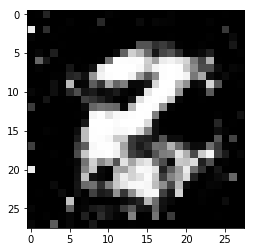

Number batches 468
44(0/468) D: 0.6946, G: 0.9219
44(1/468) D: 0.6441, G: 1.0618
44(2/468) D: 0.6113, G: 0.8828
44(3/468) D: 0.6188, G: 0.9738
44(4/468) D: 0.5838, G: 1.0811
44(5/468) D: 0.5861, G: 0.9355
44(6/468) D: 0.5575, G: 0.9708
44(7/468) D: 0.5907, G: 1.1665
44(8/468) D: 0.5616, G: 0.8830
44(9/468) D: 0.6390, G: 0.7832
44(10/468) D: 0.6783, G: 1.1111
44(11/468) D: 0.5894, G: 1.0636
44(12/468) D: 0.5924, G: 1.0428
44(13/468) D: 0.6163, G: 1.0285
44(14/468) D: 0.6414, G: 0.9321
44(15/468) D: 0.6438, G: 0.9448
44(16/468) D: 0.5971, G: 0.8588
44(17/468) D: 0.5858, G: 1.0731
44(18/468) D: 0.5911, G: 1.0973
44(19/468) D: 0.6281, G: 0.9388
44(20/468) D: 0.5814, G: 0.9809
44(21/468) D: 0.5610, G: 0.9527
44(22/468) D: 0.6582, G: 1.0223
44(23/468) D: 0.5545, G: 1.0190
44(24/468) D: 0.5814, G: 0.9484
44(25/468) D: 0.6191, G: 0.9378
44(26/468) D: 0.5956, G: 1.1972
44(27/468) D: 0.5580, G: 0.9102
44(28/468) D: 0.5861, G: 1.2213
44(29/468) D: 0.6032, G: 0.9527
44(30/468) D: 0.6196, G: 0.8865

44(253/468) D: 0.5627, G: 1.1225
44(254/468) D: 0.6306, G: 1.0333
44(255/468) D: 0.7055, G: 0.8470
44(256/468) D: 0.6393, G: 1.0702
44(257/468) D: 0.5487, G: 1.1003
44(258/468) D: 0.6262, G: 0.9282
44(259/468) D: 0.5683, G: 0.9668
44(260/468) D: 0.5927, G: 0.9390
44(261/468) D: 0.6028, G: 1.0682
44(262/468) D: 0.5504, G: 0.9596
44(263/468) D: 0.5861, G: 0.9130
44(264/468) D: 0.5827, G: 0.9661
44(265/468) D: 0.5712, G: 1.0961
44(266/468) D: 0.5833, G: 1.1139
44(267/468) D: 0.5519, G: 1.0573
44(268/468) D: 0.6416, G: 0.9159
44(269/468) D: 0.6170, G: 1.0774
44(270/468) D: 0.6378, G: 0.9616
44(271/468) D: 0.6524, G: 0.9181
44(272/468) D: 0.6165, G: 0.9230
44(273/468) D: 0.6107, G: 0.9792
44(274/468) D: 0.5846, G: 0.8892
44(275/468) D: 0.5577, G: 1.0212
44(276/468) D: 0.5841, G: 1.0641
44(277/468) D: 0.5132, G: 0.9538
44(278/468) D: 0.5753, G: 1.0438
44(279/468) D: 0.6257, G: 0.9179
44(280/468) D: 0.5960, G: 0.9304
44(281/468) D: 0.5730, G: 1.0600
44(282/468) D: 0.6223, G: 0.9445
44(283/468

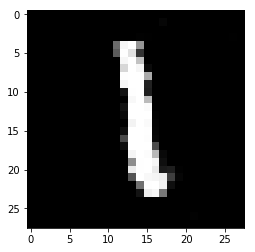

Number batches 468
45(0/468) D: 0.6602, G: 0.9672
45(1/468) D: 0.6234, G: 1.0909
45(2/468) D: 0.6385, G: 0.9916
45(3/468) D: 0.6198, G: 0.9493
45(4/468) D: 0.6033, G: 0.9356
45(5/468) D: 0.5803, G: 0.9756
45(6/468) D: 0.5786, G: 1.0242
45(7/468) D: 0.5496, G: 1.1764
45(8/468) D: 0.5715, G: 0.9689
45(9/468) D: 0.7072, G: 1.0218
45(10/468) D: 0.6890, G: 1.0018
45(11/468) D: 0.5037, G: 1.0345
45(12/468) D: 0.5650, G: 1.2305
45(13/468) D: 0.6075, G: 0.9037
45(14/468) D: 0.6195, G: 0.9896
45(15/468) D: 0.6555, G: 1.0880
45(16/468) D: 0.5946, G: 1.0922
45(17/468) D: 0.6093, G: 0.9568
45(18/468) D: 0.5957, G: 1.2241
45(19/468) D: 0.6407, G: 0.8747
45(20/468) D: 0.5722, G: 1.0339
45(21/468) D: 0.5699, G: 1.1253
45(22/468) D: 0.5983, G: 0.9180
45(23/468) D: 0.6141, G: 1.2201
45(24/468) D: 0.5908, G: 0.9955
45(25/468) D: 0.6278, G: 0.9240
45(26/468) D: 0.6195, G: 1.3577
45(27/468) D: 0.6009, G: 0.9530
45(28/468) D: 0.6165, G: 1.0811
45(29/468) D: 0.6445, G: 0.8564
45(30/468) D: 0.6438, G: 0.8585

45(252/468) D: 0.6150, G: 0.9829
45(253/468) D: 0.5779, G: 1.0319
45(254/468) D: 0.6537, G: 0.8512
45(255/468) D: 0.6540, G: 0.7804
45(256/468) D: 0.6225, G: 0.9877
45(257/468) D: 0.5488, G: 1.1064
45(258/468) D: 0.6235, G: 1.0071
45(259/468) D: 0.5799, G: 1.0639
45(260/468) D: 0.6017, G: 0.9228
45(261/468) D: 0.6129, G: 0.9558
45(262/468) D: 0.6085, G: 1.0521
45(263/468) D: 0.5912, G: 1.0648
45(264/468) D: 0.6124, G: 0.9606
45(265/468) D: 0.5971, G: 1.0643
45(266/468) D: 0.5564, G: 1.0456
45(267/468) D: 0.5903, G: 0.9996
45(268/468) D: 0.6005, G: 0.9711
45(269/468) D: 0.5974, G: 1.1774
45(270/468) D: 0.6384, G: 0.9824
45(271/468) D: 0.6449, G: 1.0060
45(272/468) D: 0.6291, G: 0.9343
45(273/468) D: 0.5885, G: 0.9552
45(274/468) D: 0.5463, G: 0.9775
45(275/468) D: 0.5792, G: 1.1021
45(276/468) D: 0.5863, G: 0.9958
45(277/468) D: 0.5895, G: 0.9351
45(278/468) D: 0.5629, G: 0.9260
45(279/468) D: 0.6240, G: 1.0319
45(280/468) D: 0.5676, G: 1.0464
45(281/468) D: 0.5561, G: 1.1981
45(282/468

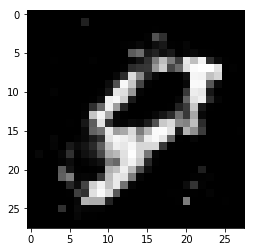

Number batches 468
46(0/468) D: 0.6944, G: 0.9220
46(1/468) D: 0.6225, G: 0.7863
46(2/468) D: 0.6100, G: 0.9287
46(3/468) D: 0.6129, G: 1.0125
46(4/468) D: 0.5639, G: 0.9395
46(5/468) D: 0.5954, G: 0.9053
46(6/468) D: 0.5944, G: 1.0754
46(7/468) D: 0.5456, G: 1.0934
46(8/468) D: 0.5802, G: 0.9669
46(9/468) D: 0.6353, G: 0.9495
46(10/468) D: 0.6616, G: 1.0991
46(11/468) D: 0.5542, G: 1.1109
46(12/468) D: 0.5798, G: 1.0361
46(13/468) D: 0.6089, G: 0.8779
46(14/468) D: 0.5934, G: 0.9863
46(15/468) D: 0.6972, G: 1.1525
46(16/468) D: 0.5824, G: 0.9540
46(17/468) D: 0.5903, G: 1.0174
46(18/468) D: 0.6096, G: 0.9845
46(19/468) D: 0.6080, G: 0.8764
46(20/468) D: 0.6159, G: 1.0748
46(21/468) D: 0.6032, G: 1.0122
46(22/468) D: 0.5981, G: 0.9358
46(23/468) D: 0.5710, G: 1.0974
46(24/468) D: 0.5700, G: 0.8442
46(25/468) D: 0.6043, G: 1.1371
46(26/468) D: 0.5815, G: 1.0401
46(27/468) D: 0.5761, G: 1.0399
46(28/468) D: 0.5652, G: 1.0652
46(29/468) D: 0.6038, G: 1.2272
46(30/468) D: 0.6219, G: 0.8568

46(252/468) D: 0.6479, G: 1.2022
46(253/468) D: 0.6457, G: 0.9196
46(254/468) D: 0.6124, G: 0.9630
46(255/468) D: 0.6792, G: 0.9050
46(256/468) D: 0.5882, G: 0.8729
46(257/468) D: 0.5949, G: 1.1002
46(258/468) D: 0.6245, G: 0.9670
46(259/468) D: 0.6093, G: 0.9224
46(260/468) D: 0.6003, G: 0.9060
46(261/468) D: 0.6189, G: 1.0283
46(262/468) D: 0.5876, G: 0.9453
46(263/468) D: 0.6034, G: 0.9272
46(264/468) D: 0.6316, G: 0.9212
46(265/468) D: 0.5775, G: 0.9972
46(266/468) D: 0.5448, G: 1.0007
46(267/468) D: 0.5905, G: 1.0788
46(268/468) D: 0.6124, G: 0.9529
46(269/468) D: 0.5994, G: 1.0069
46(270/468) D: 0.6368, G: 1.1242
46(271/468) D: 0.6489, G: 0.8201
46(272/468) D: 0.6157, G: 1.0256
46(273/468) D: 0.5985, G: 1.0651
46(274/468) D: 0.5983, G: 0.8744
46(275/468) D: 0.5811, G: 1.1323
46(276/468) D: 0.5909, G: 0.9679
46(277/468) D: 0.5839, G: 0.9519
46(278/468) D: 0.6024, G: 1.1476
46(279/468) D: 0.6354, G: 0.9299
46(280/468) D: 0.5881, G: 0.8411
46(281/468) D: 0.5752, G: 1.2989
46(282/468

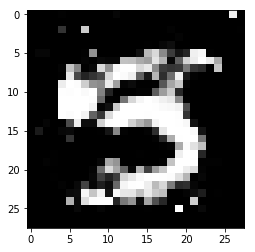

Number batches 468
47(0/468) D: 0.6691, G: 0.7640
47(1/468) D: 0.6830, G: 0.9685
47(2/468) D: 0.5749, G: 1.0690
47(3/468) D: 0.6210, G: 0.8489
47(4/468) D: 0.5641, G: 1.0751
47(5/468) D: 0.5679, G: 1.0317
47(6/468) D: 0.5631, G: 1.0077
47(7/468) D: 0.5060, G: 0.9377
47(8/468) D: 0.5790, G: 1.1231
47(9/468) D: 0.6918, G: 1.0898
47(10/468) D: 0.6591, G: 0.9453
47(11/468) D: 0.5562, G: 1.0926
47(12/468) D: 0.6016, G: 1.0437
47(13/468) D: 0.5999, G: 0.8915
47(14/468) D: 0.5696, G: 0.9593
47(15/468) D: 0.6621, G: 1.0650
47(16/468) D: 0.6028, G: 0.8974
47(17/468) D: 0.5678, G: 1.0376
47(18/468) D: 0.6031, G: 1.0061
47(19/468) D: 0.6263, G: 0.9665
47(20/468) D: 0.5598, G: 0.9661
47(21/468) D: 0.6276, G: 1.0369
47(22/468) D: 0.6002, G: 1.0132
47(23/468) D: 0.5576, G: 0.8586
47(24/468) D: 0.5873, G: 0.9572
47(25/468) D: 0.6628, G: 0.9967
47(26/468) D: 0.6121, G: 1.0440
47(27/468) D: 0.5887, G: 0.9582
47(28/468) D: 0.6322, G: 0.9978
47(29/468) D: 0.5967, G: 0.9562
47(30/468) D: 0.6452, G: 0.9296

47(252/468) D: 0.5972, G: 1.0517
47(253/468) D: 0.5557, G: 1.1185
47(254/468) D: 0.6479, G: 0.9512
47(255/468) D: 0.6835, G: 0.9959
47(256/468) D: 0.6401, G: 0.9884
47(257/468) D: 0.5806, G: 1.2036
47(258/468) D: 0.6271, G: 0.9043
47(259/468) D: 0.5702, G: 0.8411
47(260/468) D: 0.6469, G: 1.0658
47(261/468) D: 0.5921, G: 1.0178
47(262/468) D: 0.5935, G: 0.8931
47(263/468) D: 0.5771, G: 0.9228
47(264/468) D: 0.5859, G: 0.9242
47(265/468) D: 0.6046, G: 1.0171
47(266/468) D: 0.6039, G: 1.1150
47(267/468) D: 0.5602, G: 0.9046
47(268/468) D: 0.6281, G: 0.9352
47(269/468) D: 0.6074, G: 1.1409
47(270/468) D: 0.6203, G: 0.9919
47(271/468) D: 0.6454, G: 0.8496
47(272/468) D: 0.6163, G: 0.9772
47(273/468) D: 0.6075, G: 1.1064
47(274/468) D: 0.6009, G: 0.9423
47(275/468) D: 0.5772, G: 1.1264
47(276/468) D: 0.6490, G: 1.0249
47(277/468) D: 0.5750, G: 1.0728
47(278/468) D: 0.6045, G: 1.1638
47(279/468) D: 0.6810, G: 0.8201
47(280/468) D: 0.6873, G: 0.9261
47(281/468) D: 0.6119, G: 0.9980
47(282/468

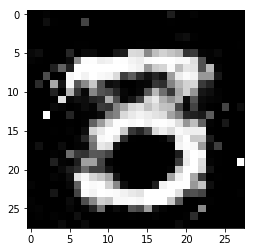

Number batches 468
48(0/468) D: 0.6718, G: 1.0286
48(1/468) D: 0.6002, G: 0.9847
48(2/468) D: 0.6430, G: 0.9812
48(3/468) D: 0.6204, G: 1.0027
48(4/468) D: 0.6232, G: 0.9113
48(5/468) D: 0.5887, G: 0.8157
48(6/468) D: 0.5885, G: 1.0911
48(7/468) D: 0.5375, G: 1.0536
48(8/468) D: 0.6109, G: 1.0493
48(9/468) D: 0.6945, G: 0.9661
48(10/468) D: 0.6261, G: 0.9878
48(11/468) D: 0.5556, G: 1.0861
48(12/468) D: 0.5697, G: 0.9921
48(13/468) D: 0.6342, G: 0.8619
48(14/468) D: 0.6259, G: 1.0075
48(15/468) D: 0.6665, G: 1.0611
48(16/468) D: 0.5969, G: 0.9761
48(17/468) D: 0.5685, G: 0.9916
48(18/468) D: 0.5874, G: 1.1195
48(19/468) D: 0.6461, G: 0.9290
48(20/468) D: 0.5997, G: 1.1260
48(21/468) D: 0.5784, G: 0.9812
48(22/468) D: 0.5994, G: 0.8898
48(23/468) D: 0.5659, G: 1.0622
48(24/468) D: 0.5849, G: 1.0624
48(25/468) D: 0.6129, G: 0.8868
48(26/468) D: 0.5906, G: 1.0693
48(27/468) D: 0.6261, G: 1.0671
48(28/468) D: 0.6177, G: 0.8584
48(29/468) D: 0.6144, G: 1.0846
48(30/468) D: 0.6079, G: 0.8647

48(252/468) D: 0.6312, G: 1.0950
48(253/468) D: 0.5975, G: 1.1808
48(254/468) D: 0.6053, G: 0.8571
48(255/468) D: 0.6249, G: 0.8550
48(256/468) D: 0.6214, G: 1.1296
48(257/468) D: 0.5530, G: 1.0385
48(258/468) D: 0.6545, G: 0.8528
48(259/468) D: 0.5972, G: 1.0047
48(260/468) D: 0.6022, G: 1.0567
48(261/468) D: 0.5787, G: 1.0939
48(262/468) D: 0.5906, G: 0.9870
48(263/468) D: 0.6341, G: 1.0512
48(264/468) D: 0.6341, G: 0.8890
48(265/468) D: 0.6062, G: 1.0509
48(266/468) D: 0.5739, G: 0.8983
48(267/468) D: 0.5903, G: 1.0336
48(268/468) D: 0.6086, G: 0.9445
48(269/468) D: 0.6149, G: 1.0782
48(270/468) D: 0.6803, G: 1.0839
48(271/468) D: 0.6294, G: 0.9618
48(272/468) D: 0.6254, G: 0.8882
48(273/468) D: 0.6089, G: 0.9678
48(274/468) D: 0.5526, G: 0.9017
48(275/468) D: 0.5542, G: 1.0977
48(276/468) D: 0.5521, G: 0.9534
48(277/468) D: 0.5409, G: 1.0602
48(278/468) D: 0.6034, G: 1.1639
48(279/468) D: 0.7069, G: 0.8057
48(280/468) D: 0.5746, G: 0.9161
48(281/468) D: 0.5447, G: 1.1814
48(282/468

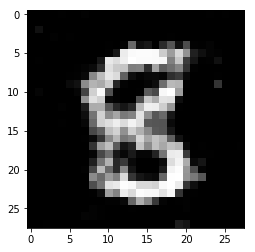

Number batches 468
49(0/468) D: 0.6211, G: 0.7519
49(1/468) D: 0.6122, G: 0.9196
49(2/468) D: 0.6010, G: 1.0230
49(3/468) D: 0.6101, G: 0.9850
49(4/468) D: 0.6452, G: 0.9868
49(5/468) D: 0.6002, G: 0.8973
49(6/468) D: 0.5893, G: 1.0845
49(7/468) D: 0.5180, G: 1.0462
49(8/468) D: 0.5633, G: 0.8527
49(9/468) D: 0.6734, G: 1.0957
49(10/468) D: 0.6890, G: 1.1260
49(11/468) D: 0.5194, G: 0.9180
49(12/468) D: 0.6078, G: 1.1122
49(13/468) D: 0.6260, G: 0.9972
49(14/468) D: 0.5846, G: 0.8283
49(15/468) D: 0.6842, G: 1.0460
49(16/468) D: 0.5934, G: 1.1188
49(17/468) D: 0.6211, G: 0.7971
49(18/468) D: 0.5577, G: 0.9540
49(19/468) D: 0.6414, G: 1.0833
49(20/468) D: 0.5957, G: 1.1231
49(21/468) D: 0.6407, G: 0.9645
49(22/468) D: 0.5892, G: 0.9255
49(23/468) D: 0.5963, G: 1.1981
49(24/468) D: 0.5820, G: 0.9137
49(25/468) D: 0.5852, G: 0.9295
49(26/468) D: 0.5923, G: 1.2763
49(27/468) D: 0.6146, G: 1.0029
49(28/468) D: 0.5682, G: 1.0048
49(29/468) D: 0.6042, G: 1.0029
49(30/468) D: 0.6262, G: 1.0102

49(253/468) D: 0.5977, G: 1.0362
49(254/468) D: 0.6474, G: 0.8973
49(255/468) D: 0.6400, G: 0.7275
49(256/468) D: 0.6968, G: 1.1622
49(257/468) D: 0.5804, G: 1.0393
49(258/468) D: 0.6203, G: 0.8762
49(259/468) D: 0.6009, G: 0.9039
49(260/468) D: 0.6416, G: 1.0451
49(261/468) D: 0.6363, G: 0.8334
49(262/468) D: 0.6311, G: 0.9364
49(263/468) D: 0.6213, G: 0.9292
49(264/468) D: 0.6292, G: 1.0032
49(265/468) D: 0.5896, G: 0.9957
49(266/468) D: 0.5811, G: 0.9753
49(267/468) D: 0.5736, G: 1.1001
49(268/468) D: 0.6159, G: 0.8835
49(269/468) D: 0.6201, G: 0.9911
49(270/468) D: 0.6302, G: 0.9765
49(271/468) D: 0.5990, G: 0.9004
49(272/468) D: 0.6007, G: 1.1310
49(273/468) D: 0.6092, G: 0.9870
49(274/468) D: 0.5848, G: 0.8560
49(275/468) D: 0.5681, G: 1.0297
49(276/468) D: 0.5978, G: 1.0343
49(277/468) D: 0.5703, G: 0.9246
49(278/468) D: 0.5656, G: 1.1061
49(279/468) D: 0.6427, G: 0.9318
49(280/468) D: 0.6209, G: 0.9636
49(281/468) D: 0.5751, G: 0.9884
49(282/468) D: 0.6472, G: 0.9877
49(283/468

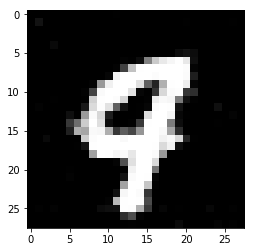

Number batches 468
50(0/468) D: 0.6278, G: 0.8970
50(1/468) D: 0.6379, G: 0.8675
50(2/468) D: 0.6460, G: 0.8815
50(3/468) D: 0.5875, G: 0.9745
50(4/468) D: 0.5996, G: 0.9550
50(5/468) D: 0.6059, G: 0.8785
50(6/468) D: 0.6024, G: 1.0664
50(7/468) D: 0.5804, G: 1.1356
50(8/468) D: 0.5787, G: 0.8501
50(9/468) D: 0.6997, G: 0.9855
50(10/468) D: 0.6219, G: 0.9689
50(11/468) D: 0.5790, G: 1.0169
50(12/468) D: 0.6143, G: 1.0899
50(13/468) D: 0.6084, G: 0.8646
50(14/468) D: 0.6324, G: 0.9393
50(15/468) D: 0.6776, G: 0.8341
50(16/468) D: 0.6391, G: 1.0479
50(17/468) D: 0.6261, G: 0.9861
50(18/468) D: 0.5990, G: 0.8989
50(19/468) D: 0.6568, G: 0.9978
50(20/468) D: 0.5726, G: 1.0356
50(21/468) D: 0.5624, G: 0.9259
50(22/468) D: 0.5674, G: 1.0375
50(23/468) D: 0.5751, G: 1.0265
50(24/468) D: 0.5968, G: 0.9187
50(25/468) D: 0.6238, G: 0.9950
50(26/468) D: 0.5911, G: 1.0203
50(27/468) D: 0.6009, G: 1.1326
50(28/468) D: 0.6098, G: 0.9994
50(29/468) D: 0.6228, G: 0.8305
50(30/468) D: 0.6778, G: 1.0063

50(253/468) D: 0.5893, G: 1.0234
50(254/468) D: 0.6173, G: 0.9270
50(255/468) D: 0.7012, G: 0.8933
50(256/468) D: 0.6258, G: 0.9755
50(257/468) D: 0.5553, G: 1.1387
50(258/468) D: 0.6261, G: 1.0258
50(259/468) D: 0.5739, G: 0.9082
50(260/468) D: 0.6101, G: 0.9349
50(261/468) D: 0.5881, G: 0.9887
50(262/468) D: 0.5751, G: 0.9338
50(263/468) D: 0.6590, G: 0.9503
50(264/468) D: 0.6063, G: 0.9490
50(265/468) D: 0.6035, G: 0.9825
50(266/468) D: 0.6058, G: 0.9701
50(267/468) D: 0.5727, G: 1.0417
50(268/468) D: 0.5963, G: 0.9133
50(269/468) D: 0.6178, G: 0.9694
50(270/468) D: 0.6403, G: 1.1077
50(271/468) D: 0.6222, G: 0.8525
50(272/468) D: 0.6426, G: 1.0253
50(273/468) D: 0.6038, G: 1.0068
50(274/468) D: 0.5989, G: 0.9324
50(275/468) D: 0.5672, G: 1.0231
50(276/468) D: 0.5945, G: 1.0895
50(277/468) D: 0.5921, G: 1.1536
50(278/468) D: 0.5235, G: 0.9467
50(279/468) D: 0.6383, G: 0.9870
50(280/468) D: 0.5991, G: 0.9681
50(281/468) D: 0.5994, G: 0.9467
50(282/468) D: 0.6571, G: 0.9487
50(283/468

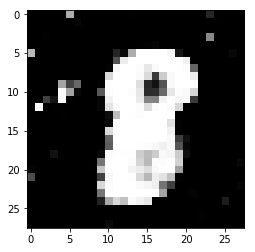

Number batches 468
51(0/468) D: 0.6706, G: 0.8784
51(1/468) D: 0.6364, G: 0.8446
51(2/468) D: 0.6271, G: 0.9046
51(3/468) D: 0.6255, G: 0.9653
51(4/468) D: 0.5897, G: 0.8472
51(5/468) D: 0.6300, G: 0.9491
51(6/468) D: 0.5952, G: 1.0743
51(7/468) D: 0.5767, G: 0.9729
51(8/468) D: 0.6024, G: 0.8985
51(9/468) D: 0.6773, G: 0.8634
51(10/468) D: 0.6966, G: 1.2033
51(11/468) D: 0.5791, G: 1.0226
51(12/468) D: 0.5792, G: 0.8794
51(13/468) D: 0.6332, G: 1.0657
51(14/468) D: 0.6169, G: 0.9523
51(15/468) D: 0.6056, G: 0.8847
51(16/468) D: 0.5987, G: 0.9182
51(17/468) D: 0.5889, G: 1.0620
51(18/468) D: 0.6544, G: 0.9264
51(19/468) D: 0.6497, G: 0.8962
51(20/468) D: 0.6121, G: 1.1450
51(21/468) D: 0.5943, G: 0.9652
51(22/468) D: 0.6064, G: 0.8779
51(23/468) D: 0.5496, G: 1.0184
51(24/468) D: 0.6094, G: 0.9436
51(25/468) D: 0.6521, G: 0.9714
51(26/468) D: 0.5992, G: 1.0733
51(27/468) D: 0.6064, G: 0.8953
51(28/468) D: 0.6255, G: 1.0168
51(29/468) D: 0.6030, G: 0.9178
51(30/468) D: 0.6409, G: 0.9812

51(253/468) D: 0.6234, G: 1.1185
51(254/468) D: 0.6488, G: 0.9832
51(255/468) D: 0.6958, G: 0.8881
51(256/468) D: 0.6402, G: 1.0142
51(257/468) D: 0.5750, G: 1.0795
51(258/468) D: 0.6365, G: 1.0727
51(259/468) D: 0.5577, G: 0.8588
51(260/468) D: 0.6079, G: 0.9930
51(261/468) D: 0.5843, G: 0.9906
51(262/468) D: 0.6246, G: 1.0234
51(263/468) D: 0.6252, G: 0.9642
51(264/468) D: 0.6242, G: 0.8187
51(265/468) D: 0.5846, G: 1.1009
51(266/468) D: 0.5773, G: 1.0566
51(267/468) D: 0.5665, G: 0.8961
51(268/468) D: 0.6445, G: 1.1173
51(269/468) D: 0.6243, G: 0.9932
51(270/468) D: 0.6048, G: 0.8558
51(271/468) D: 0.6576, G: 0.9855
51(272/468) D: 0.6046, G: 1.0470
51(273/468) D: 0.6076, G: 0.9701
51(274/468) D: 0.5758, G: 0.8439
51(275/468) D: 0.5452, G: 0.9650
51(276/468) D: 0.5918, G: 1.0633
51(277/468) D: 0.5830, G: 0.9828
51(278/468) D: 0.6105, G: 0.9549
51(279/468) D: 0.6399, G: 0.8704
51(280/468) D: 0.5951, G: 0.9801
51(281/468) D: 0.5757, G: 0.9095
51(282/468) D: 0.6221, G: 1.0943
51(283/468

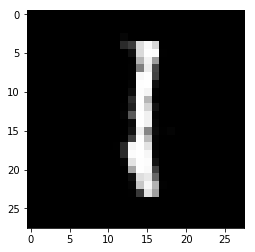

Number batches 468
52(0/468) D: 0.6563, G: 0.9509
52(1/468) D: 0.6253, G: 1.0499
52(2/468) D: 0.5715, G: 0.9480
52(3/468) D: 0.5901, G: 1.0141
52(4/468) D: 0.5665, G: 0.8852
52(5/468) D: 0.6376, G: 1.0052
52(6/468) D: 0.5893, G: 1.0477
52(7/468) D: 0.6285, G: 1.1877
52(8/468) D: 0.5841, G: 0.8682
52(9/468) D: 0.6150, G: 0.9095
52(10/468) D: 0.6373, G: 0.9898
52(11/468) D: 0.5872, G: 1.0731
52(12/468) D: 0.6026, G: 1.0279
52(13/468) D: 0.6036, G: 0.8749
52(14/468) D: 0.6664, G: 1.0514
52(15/468) D: 0.6527, G: 0.8562
52(16/468) D: 0.5803, G: 0.8630
52(17/468) D: 0.6180, G: 1.1060
52(18/468) D: 0.6076, G: 0.9760
52(19/468) D: 0.5787, G: 0.8013
52(20/468) D: 0.5787, G: 1.0059
52(21/468) D: 0.5882, G: 1.0870
52(22/468) D: 0.6445, G: 0.9215
52(23/468) D: 0.5870, G: 0.8968
52(24/468) D: 0.5859, G: 0.9999
52(25/468) D: 0.6143, G: 0.9150
52(26/468) D: 0.5810, G: 1.0518
52(27/468) D: 0.6300, G: 0.9543
52(28/468) D: 0.6516, G: 1.1118
52(29/468) D: 0.5963, G: 0.8899
52(30/468) D: 0.6558, G: 0.9631

52(253/468) D: 0.5677, G: 1.0024
52(254/468) D: 0.5997, G: 0.9625
52(255/468) D: 0.6670, G: 0.8385
52(256/468) D: 0.6458, G: 1.0702
52(257/468) D: 0.5653, G: 1.1878
52(258/468) D: 0.6409, G: 0.9091
52(259/468) D: 0.5882, G: 0.9611
52(260/468) D: 0.6280, G: 0.9166
52(261/468) D: 0.6035, G: 0.8673
52(262/468) D: 0.5943, G: 1.0393
52(263/468) D: 0.6160, G: 0.8294
52(264/468) D: 0.6543, G: 1.0558
52(265/468) D: 0.5925, G: 1.0001
52(266/468) D: 0.6597, G: 1.1065
52(267/468) D: 0.5839, G: 1.0578
52(268/468) D: 0.6847, G: 0.9982
52(269/468) D: 0.6213, G: 1.0192
52(270/468) D: 0.6556, G: 0.9099
52(271/468) D: 0.6101, G: 0.8953
52(272/468) D: 0.6216, G: 1.0891
52(273/468) D: 0.6104, G: 0.9589
52(274/468) D: 0.5547, G: 1.0239
52(275/468) D: 0.5856, G: 0.9207
52(276/468) D: 0.5777, G: 1.0215
52(277/468) D: 0.5611, G: 1.0153
52(278/468) D: 0.5637, G: 0.9684
52(279/468) D: 0.6418, G: 0.9442
52(280/468) D: 0.5878, G: 0.9409
52(281/468) D: 0.5614, G: 1.0000
52(282/468) D: 0.6640, G: 1.2157
52(283/468

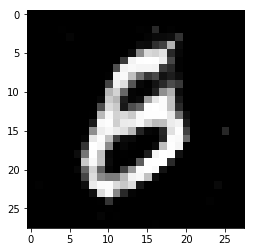

Number batches 468
53(0/468) D: 0.6550, G: 0.7036
53(1/468) D: 0.6518, G: 1.0166
53(2/468) D: 0.6421, G: 1.0642
53(3/468) D: 0.6515, G: 0.9682
53(4/468) D: 0.5983, G: 0.8412
53(5/468) D: 0.6118, G: 0.9712
53(6/468) D: 0.5975, G: 0.9580
53(7/468) D: 0.5684, G: 0.9965
53(8/468) D: 0.5641, G: 0.9547
53(9/468) D: 0.6676, G: 0.9718
53(10/468) D: 0.6349, G: 0.9320
53(11/468) D: 0.5457, G: 1.0954
53(12/468) D: 0.6095, G: 1.0175
53(13/468) D: 0.5980, G: 0.9195
53(14/468) D: 0.6504, G: 1.1652
53(15/468) D: 0.6574, G: 0.9414
53(16/468) D: 0.5702, G: 0.9592
53(17/468) D: 0.5741, G: 0.9327
53(18/468) D: 0.5991, G: 0.9472
53(19/468) D: 0.6820, G: 0.9513
53(20/468) D: 0.5984, G: 1.1053
53(21/468) D: 0.6179, G: 0.8365
53(22/468) D: 0.6372, G: 0.8456
53(23/468) D: 0.5598, G: 0.8585
53(24/468) D: 0.5676, G: 0.9931
53(25/468) D: 0.5958, G: 0.9508
53(26/468) D: 0.5797, G: 1.0491
53(27/468) D: 0.5821, G: 0.9705
53(28/468) D: 0.6419, G: 1.0711
53(29/468) D: 0.6472, G: 0.8754
53(30/468) D: 0.6403, G: 0.9015

53(253/468) D: 0.6210, G: 1.1426
53(254/468) D: 0.6437, G: 0.7419
53(255/468) D: 0.6763, G: 0.8693
53(256/468) D: 0.6669, G: 1.1149
53(257/468) D: 0.6152, G: 1.0471
53(258/468) D: 0.6182, G: 0.8519
53(259/468) D: 0.5905, G: 1.0694
53(260/468) D: 0.5922, G: 1.0325
53(261/468) D: 0.5283, G: 0.7853
53(262/468) D: 0.5606, G: 0.9241
53(263/468) D: 0.5849, G: 1.0856
53(264/468) D: 0.6192, G: 0.9353
53(265/468) D: 0.6296, G: 1.1440
53(266/468) D: 0.6242, G: 1.0372
53(267/468) D: 0.5479, G: 0.7610
53(268/468) D: 0.6351, G: 1.1191
53(269/468) D: 0.6004, G: 1.0637
53(270/468) D: 0.6395, G: 0.9300
53(271/468) D: 0.6380, G: 0.8898
53(272/468) D: 0.6466, G: 0.9772
53(273/468) D: 0.6452, G: 0.9755
53(274/468) D: 0.5926, G: 1.0088
53(275/468) D: 0.5524, G: 1.0510
53(276/468) D: 0.6007, G: 1.0785
53(277/468) D: 0.5566, G: 0.9162
53(278/468) D: 0.5867, G: 0.9883
53(279/468) D: 0.6502, G: 0.9442
53(280/468) D: 0.6096, G: 0.9439
53(281/468) D: 0.5840, G: 1.0958
53(282/468) D: 0.6301, G: 0.9630
53(283/468

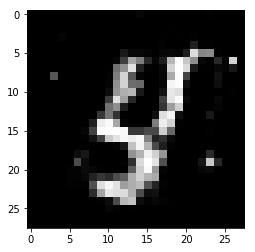

Number batches 468
54(0/468) D: 0.6687, G: 0.9433
54(1/468) D: 0.6695, G: 1.0127
54(2/468) D: 0.6812, G: 0.9159
54(3/468) D: 0.6320, G: 0.9289
54(4/468) D: 0.5765, G: 0.9131
54(5/468) D: 0.5820, G: 1.0413
54(6/468) D: 0.5804, G: 1.0150
54(7/468) D: 0.5646, G: 0.9807
54(8/468) D: 0.5973, G: 0.9938
54(9/468) D: 0.7031, G: 0.9157
54(10/468) D: 0.6600, G: 0.8701
54(11/468) D: 0.6008, G: 1.0239
54(12/468) D: 0.5853, G: 1.0059
54(13/468) D: 0.6050, G: 0.8714
54(14/468) D: 0.5955, G: 0.9900
54(15/468) D: 0.6275, G: 0.9227
54(16/468) D: 0.5933, G: 0.9779
54(17/468) D: 0.6261, G: 0.9530
54(18/468) D: 0.6041, G: 0.9184
54(19/468) D: 0.6387, G: 0.8553
54(20/468) D: 0.5753, G: 1.2729
54(21/468) D: 0.5953, G: 0.9924
54(22/468) D: 0.6191, G: 0.9370
54(23/468) D: 0.5941, G: 0.9612
54(24/468) D: 0.6050, G: 0.9667
54(25/468) D: 0.6443, G: 0.8964
54(26/468) D: 0.6299, G: 0.9923
54(27/468) D: 0.5772, G: 1.0478
54(28/468) D: 0.5581, G: 0.8876
54(29/468) D: 0.6231, G: 0.9774
54(30/468) D: 0.5951, G: 0.8683

54(253/468) D: 0.6399, G: 0.8197
54(254/468) D: 0.6606, G: 0.8318
54(255/468) D: 0.7284, G: 1.0088
54(256/468) D: 0.6485, G: 1.0761
54(257/468) D: 0.5851, G: 1.0455
54(258/468) D: 0.6391, G: 0.8791
54(259/468) D: 0.6106, G: 0.8721
54(260/468) D: 0.6144, G: 0.9637
54(261/468) D: 0.5911, G: 0.9848
54(262/468) D: 0.6077, G: 0.9258
54(263/468) D: 0.6139, G: 0.9224
54(264/468) D: 0.6014, G: 0.9021
54(265/468) D: 0.5956, G: 0.9727
54(266/468) D: 0.6037, G: 0.9693
54(267/468) D: 0.6190, G: 0.8941
54(268/468) D: 0.6319, G: 1.0822
54(269/468) D: 0.6861, G: 1.1135
54(270/468) D: 0.6321, G: 0.7795
54(271/468) D: 0.6212, G: 0.8229
54(272/468) D: 0.6285, G: 1.0743
54(273/468) D: 0.6227, G: 1.0298
54(274/468) D: 0.5887, G: 0.9183
54(275/468) D: 0.6213, G: 1.0529
54(276/468) D: 0.6195, G: 1.0646
54(277/468) D: 0.6198, G: 0.9706
54(278/468) D: 0.5875, G: 0.9151
54(279/468) D: 0.7185, G: 0.9438
54(280/468) D: 0.6000, G: 0.9605
54(281/468) D: 0.5944, G: 1.0286
54(282/468) D: 0.6128, G: 1.0119
54(283/468

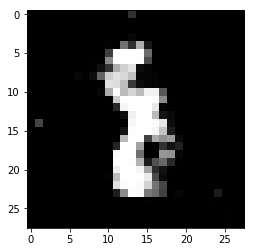

Number batches 468
55(0/468) D: 0.7096, G: 0.8310
55(1/468) D: 0.6533, G: 0.8605
55(2/468) D: 0.6360, G: 1.0645
55(3/468) D: 0.6244, G: 0.9064
55(4/468) D: 0.6075, G: 0.8073
55(5/468) D: 0.6028, G: 0.9196
55(6/468) D: 0.5569, G: 0.9613
55(7/468) D: 0.5771, G: 0.9400
55(8/468) D: 0.5965, G: 0.8149
55(9/468) D: 0.6545, G: 0.9152
55(10/468) D: 0.6759, G: 1.1291
55(11/468) D: 0.5904, G: 0.9628
55(12/468) D: 0.5878, G: 0.8347
55(13/468) D: 0.6189, G: 0.9447
55(14/468) D: 0.6292, G: 1.0655
55(15/468) D: 0.6658, G: 0.8715
55(16/468) D: 0.6471, G: 0.8622
55(17/468) D: 0.6019, G: 1.0205
55(18/468) D: 0.6201, G: 1.0879
55(19/468) D: 0.6105, G: 0.8493
55(20/468) D: 0.5897, G: 0.9352
55(21/468) D: 0.5857, G: 1.0554
55(22/468) D: 0.5860, G: 1.0877
55(23/468) D: 0.6225, G: 0.9561
55(24/468) D: 0.5448, G: 0.8063
55(25/468) D: 0.6369, G: 1.0168
55(26/468) D: 0.6124, G: 1.0371
55(27/468) D: 0.5893, G: 1.0251
55(28/468) D: 0.6267, G: 1.2159
55(29/468) D: 0.6072, G: 0.8821
55(30/468) D: 0.6241, G: 0.7907

55(252/468) D: 0.6389, G: 1.0640
55(253/468) D: 0.6133, G: 0.9638
55(254/468) D: 0.6342, G: 0.9508
55(255/468) D: 0.7006, G: 0.8059
55(256/468) D: 0.6855, G: 1.1770
55(257/468) D: 0.5611, G: 1.1059
55(258/468) D: 0.6674, G: 0.7580
55(259/468) D: 0.6775, G: 1.1792
55(260/468) D: 0.6364, G: 0.9788
55(261/468) D: 0.5987, G: 0.8829
55(262/468) D: 0.5933, G: 0.8596
55(263/468) D: 0.6275, G: 0.9412
55(264/468) D: 0.6241, G: 0.9202
55(265/468) D: 0.5780, G: 1.0015
55(266/468) D: 0.6086, G: 0.9952
55(267/468) D: 0.6183, G: 1.1283
55(268/468) D: 0.6326, G: 0.9584
55(269/468) D: 0.6174, G: 0.9134
55(270/468) D: 0.6844, G: 1.0327
55(271/468) D: 0.6641, G: 0.9160
55(272/468) D: 0.6251, G: 0.8766
55(273/468) D: 0.6186, G: 0.9017
55(274/468) D: 0.5789, G: 0.9100
55(275/468) D: 0.5501, G: 0.9222
55(276/468) D: 0.6308, G: 1.0547
55(277/468) D: 0.5470, G: 0.9460
55(278/468) D: 0.6035, G: 0.9782
55(279/468) D: 0.6583, G: 0.8786
55(280/468) D: 0.5981, G: 0.8836
55(281/468) D: 0.6219, G: 0.9369
55(282/468

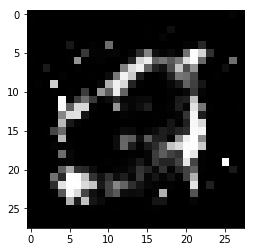

Number batches 468
56(0/468) D: 0.7298, G: 0.9730
56(1/468) D: 0.6544, G: 0.9675
56(2/468) D: 0.6284, G: 0.9600
56(3/468) D: 0.6328, G: 0.8083
56(4/468) D: 0.5763, G: 0.9871
56(5/468) D: 0.6179, G: 1.0138
56(6/468) D: 0.6181, G: 0.7961
56(7/468) D: 0.5960, G: 1.0520
56(8/468) D: 0.6175, G: 0.9686
56(9/468) D: 0.6398, G: 0.7991
56(10/468) D: 0.6751, G: 1.2421
56(11/468) D: 0.5575, G: 0.9249
56(12/468) D: 0.5811, G: 0.9352
56(13/468) D: 0.5919, G: 0.9202
56(14/468) D: 0.5940, G: 0.9755
56(15/468) D: 0.6572, G: 0.9682
56(16/468) D: 0.6048, G: 0.9268
56(17/468) D: 0.6080, G: 0.9357
56(18/468) D: 0.6139, G: 1.0225
56(19/468) D: 0.6364, G: 0.9902
56(20/468) D: 0.5729, G: 0.9530
56(21/468) D: 0.6021, G: 0.9744
56(22/468) D: 0.6090, G: 1.0537
56(23/468) D: 0.5560, G: 1.0208
56(24/468) D: 0.5916, G: 0.9085
56(25/468) D: 0.5779, G: 0.9127
56(26/468) D: 0.6318, G: 1.0114
56(27/468) D: 0.5988, G: 0.9682
56(28/468) D: 0.5945, G: 0.9801
56(29/468) D: 0.6655, G: 0.8971
56(30/468) D: 0.6439, G: 0.9711

56(253/468) D: 0.5791, G: 0.9584
56(254/468) D: 0.6363, G: 1.1777
56(255/468) D: 0.6616, G: 0.8869
56(256/468) D: 0.6347, G: 0.9674
56(257/468) D: 0.5579, G: 1.1518
56(258/468) D: 0.6370, G: 0.7541
56(259/468) D: 0.6009, G: 0.8641
56(260/468) D: 0.6234, G: 0.9961
56(261/468) D: 0.5918, G: 1.0572
56(262/468) D: 0.5957, G: 0.9801
56(263/468) D: 0.6238, G: 0.8662
56(264/468) D: 0.6432, G: 1.1182
56(265/468) D: 0.6026, G: 0.8845
56(266/468) D: 0.5956, G: 0.7940
56(267/468) D: 0.6065, G: 1.0435
56(268/468) D: 0.6247, G: 0.8932
56(269/468) D: 0.6377, G: 0.8479
56(270/468) D: 0.6289, G: 0.9251
56(271/468) D: 0.6294, G: 0.9714
56(272/468) D: 0.6093, G: 0.8791
56(273/468) D: 0.6037, G: 0.9814
56(274/468) D: 0.5750, G: 1.0715
56(275/468) D: 0.5881, G: 1.0072
56(276/468) D: 0.5901, G: 0.8971
56(277/468) D: 0.5588, G: 1.0994
56(278/468) D: 0.6007, G: 0.9927
56(279/468) D: 0.6593, G: 0.8269
56(280/468) D: 0.6171, G: 1.0277
56(281/468) D: 0.5923, G: 1.0091
56(282/468) D: 0.6643, G: 1.0258
56(283/468

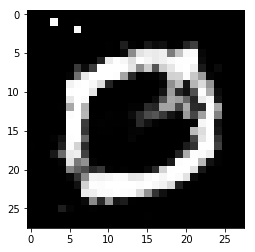

Number batches 468
57(0/468) D: 0.6765, G: 0.8064
57(1/468) D: 0.6106, G: 0.8714
57(2/468) D: 0.6141, G: 0.9222
57(3/468) D: 0.6202, G: 0.9711
57(4/468) D: 0.6010, G: 1.0329
57(5/468) D: 0.6111, G: 0.9667
57(6/468) D: 0.6142, G: 1.1040
57(7/468) D: 0.6267, G: 1.1197
57(8/468) D: 0.6480, G: 0.7414
57(9/468) D: 0.6940, G: 0.8576
57(10/468) D: 0.6560, G: 0.9125
57(11/468) D: 0.5795, G: 1.0130
57(12/468) D: 0.5882, G: 1.0058
57(13/468) D: 0.6125, G: 0.9630
57(14/468) D: 0.5845, G: 0.9331
57(15/468) D: 0.6590, G: 0.9389
57(16/468) D: 0.6006, G: 1.1205
57(17/468) D: 0.6513, G: 0.8794
57(18/468) D: 0.6114, G: 0.8907
57(19/468) D: 0.6181, G: 0.9643
57(20/468) D: 0.5748, G: 0.9024
57(21/468) D: 0.5960, G: 0.9941
57(22/468) D: 0.6416, G: 1.0127
57(23/468) D: 0.6122, G: 1.0477
57(24/468) D: 0.5533, G: 0.9291
57(25/468) D: 0.6435, G: 0.8262
57(26/468) D: 0.5974, G: 1.0684
57(27/468) D: 0.5631, G: 1.0402
57(28/468) D: 0.5713, G: 0.9548
57(29/468) D: 0.6051, G: 0.8898
57(30/468) D: 0.6120, G: 0.8548

57(253/468) D: 0.5784, G: 1.0382
57(254/468) D: 0.6566, G: 0.9031
57(255/468) D: 0.7041, G: 0.8428
57(256/468) D: 0.6706, G: 1.0673
57(257/468) D: 0.5845, G: 1.0425
57(258/468) D: 0.5936, G: 0.7764
57(259/468) D: 0.5940, G: 0.9050
57(260/468) D: 0.5966, G: 1.0056
57(261/468) D: 0.6451, G: 0.8501
57(262/468) D: 0.5783, G: 0.7843
57(263/468) D: 0.6202, G: 1.0056
57(264/468) D: 0.6018, G: 1.0010
57(265/468) D: 0.6005, G: 0.9093
57(266/468) D: 0.6241, G: 1.0311
57(267/468) D: 0.6053, G: 0.9895
57(268/468) D: 0.6421, G: 0.9425
57(269/468) D: 0.6084, G: 0.9468
57(270/468) D: 0.5977, G: 0.8984
57(271/468) D: 0.6040, G: 1.1160
57(272/468) D: 0.6381, G: 0.9216
57(273/468) D: 0.5961, G: 0.8416
57(274/468) D: 0.5727, G: 0.9866
57(275/468) D: 0.5828, G: 0.9489
57(276/468) D: 0.6148, G: 0.9653
57(277/468) D: 0.5835, G: 1.0405
57(278/468) D: 0.5893, G: 1.0305
57(279/468) D: 0.6806, G: 0.9468
57(280/468) D: 0.6311, G: 1.0029
57(281/468) D: 0.5690, G: 0.9179
57(282/468) D: 0.6416, G: 0.9546
57(283/468

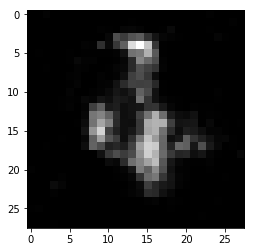

Number batches 468
58(0/468) D: 0.6489, G: 0.8159
58(1/468) D: 0.6635, G: 0.9736
58(2/468) D: 0.6244, G: 0.9755
58(3/468) D: 0.6425, G: 0.9361
58(4/468) D: 0.5990, G: 0.9475
58(5/468) D: 0.6447, G: 0.9646
58(6/468) D: 0.6088, G: 0.9274
58(7/468) D: 0.5681, G: 1.0200
58(8/468) D: 0.6314, G: 0.8922
58(9/468) D: 0.6632, G: 0.9198
58(10/468) D: 0.6629, G: 0.8917
58(11/468) D: 0.5851, G: 1.1260
58(12/468) D: 0.5921, G: 0.9329
58(13/468) D: 0.6627, G: 0.9820
58(14/468) D: 0.6417, G: 0.9714
58(15/468) D: 0.6412, G: 0.9785
58(16/468) D: 0.6261, G: 0.8575
58(17/468) D: 0.6148, G: 0.9410
58(18/468) D: 0.5999, G: 0.9825
58(19/468) D: 0.6158, G: 0.8421
58(20/468) D: 0.6155, G: 1.1261
58(21/468) D: 0.5967, G: 0.8739
58(22/468) D: 0.6147, G: 0.8395
58(23/468) D: 0.5691, G: 0.9544
58(24/468) D: 0.5623, G: 0.9633
58(25/468) D: 0.6815, G: 0.9189
58(26/468) D: 0.6347, G: 0.9069
58(27/468) D: 0.6325, G: 1.0266
58(28/468) D: 0.6360, G: 0.9640
58(29/468) D: 0.6200, G: 0.7729
58(30/468) D: 0.6927, G: 0.9492

58(253/468) D: 0.5938, G: 0.9848
58(254/468) D: 0.6485, G: 0.9134
58(255/468) D: 0.7028, G: 1.0177
58(256/468) D: 0.6196, G: 0.8376
58(257/468) D: 0.6030, G: 1.0964
58(258/468) D: 0.6067, G: 0.9003
58(259/468) D: 0.6137, G: 0.8285
58(260/468) D: 0.6035, G: 0.9338
58(261/468) D: 0.6119, G: 0.8488
58(262/468) D: 0.6134, G: 1.0068
58(263/468) D: 0.6264, G: 0.8506
58(264/468) D: 0.6408, G: 0.9346
58(265/468) D: 0.6224, G: 1.0919
58(266/468) D: 0.6216, G: 0.9330
58(267/468) D: 0.6079, G: 0.9501
58(268/468) D: 0.6643, G: 0.9387
58(269/468) D: 0.6194, G: 1.0245
58(270/468) D: 0.6378, G: 0.9025
58(271/468) D: 0.6433, G: 0.8903
58(272/468) D: 0.6253, G: 0.9117
58(273/468) D: 0.6451, G: 0.9162
58(274/468) D: 0.6021, G: 0.9295
58(275/468) D: 0.5880, G: 1.0469
58(276/468) D: 0.6379, G: 0.8205
58(277/468) D: 0.5861, G: 0.9525
58(278/468) D: 0.5849, G: 1.0300
58(279/468) D: 0.6290, G: 0.8552
58(280/468) D: 0.6040, G: 0.9433
58(281/468) D: 0.5608, G: 1.0740
58(282/468) D: 0.6127, G: 0.9407
58(283/468

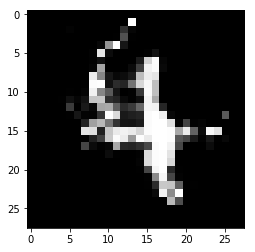

Number batches 468
59(0/468) D: 0.7078, G: 0.8635
59(1/468) D: 0.6580, G: 0.9263
59(2/468) D: 0.6417, G: 0.9755
59(3/468) D: 0.6147, G: 0.9181
59(4/468) D: 0.6127, G: 0.9954
59(5/468) D: 0.6070, G: 0.8683
59(6/468) D: 0.6212, G: 1.0031
59(7/468) D: 0.6025, G: 1.0448
59(8/468) D: 0.5800, G: 0.9322
59(9/468) D: 0.7026, G: 1.0244
59(10/468) D: 0.6915, G: 0.9069
59(11/468) D: 0.5487, G: 1.0409
59(12/468) D: 0.5819, G: 0.8712
59(13/468) D: 0.6373, G: 0.9296
59(14/468) D: 0.5973, G: 0.9152
59(15/468) D: 0.6253, G: 0.9505
59(16/468) D: 0.6224, G: 1.0435
59(17/468) D: 0.6630, G: 0.9458
59(18/468) D: 0.5942, G: 0.9324
59(19/468) D: 0.6525, G: 0.9540
59(20/468) D: 0.5947, G: 0.9590
59(21/468) D: 0.6126, G: 0.9018
59(22/468) D: 0.6156, G: 0.9908
59(23/468) D: 0.5591, G: 0.8901
59(24/468) D: 0.5598, G: 1.0112
59(25/468) D: 0.6847, G: 1.0267
59(26/468) D: 0.6063, G: 0.9589
59(27/468) D: 0.5942, G: 0.8475
59(28/468) D: 0.6228, G: 1.0270
59(29/468) D: 0.5994, G: 1.1108
59(30/468) D: 0.6658, G: 0.7833

59(252/468) D: 0.6024, G: 1.0521
59(253/468) D: 0.5788, G: 1.1233
59(254/468) D: 0.6935, G: 0.8423
59(255/468) D: 0.6719, G: 0.9100
59(256/468) D: 0.6556, G: 0.9626
59(257/468) D: 0.5992, G: 1.0610
59(258/468) D: 0.6587, G: 0.8623
59(259/468) D: 0.6181, G: 0.9215
59(260/468) D: 0.6116, G: 0.8956
59(261/468) D: 0.5897, G: 0.7764
59(262/468) D: 0.5952, G: 0.8718
59(263/468) D: 0.6522, G: 1.0438
59(264/468) D: 0.6556, G: 0.8582
59(265/468) D: 0.6095, G: 0.9521
59(266/468) D: 0.5862, G: 0.9864
59(267/468) D: 0.5639, G: 0.9148
59(268/468) D: 0.6258, G: 0.9289
59(269/468) D: 0.6446, G: 1.0832
59(270/468) D: 0.6336, G: 1.0202
59(271/468) D: 0.5967, G: 0.7673
59(272/468) D: 0.6025, G: 0.9484
59(273/468) D: 0.6147, G: 1.0253
59(274/468) D: 0.5842, G: 0.9916
59(275/468) D: 0.5899, G: 0.9335
59(276/468) D: 0.6037, G: 0.8962
59(277/468) D: 0.5806, G: 1.0774
59(278/468) D: 0.5590, G: 1.0821
59(279/468) D: 0.6745, G: 0.8783
59(280/468) D: 0.5858, G: 1.0635
59(281/468) D: 0.5568, G: 0.9859
59(282/468

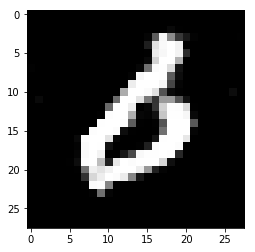

Number batches 468
60(0/468) D: 0.7019, G: 0.7768
60(1/468) D: 0.6686, G: 0.9213
60(2/468) D: 0.6127, G: 0.9324
60(3/468) D: 0.5940, G: 0.8798
60(4/468) D: 0.6134, G: 0.9385
60(5/468) D: 0.6370, G: 0.9358
60(6/468) D: 0.5725, G: 0.9361
60(7/468) D: 0.5634, G: 1.0315
60(8/468) D: 0.6122, G: 1.0249
60(9/468) D: 0.6560, G: 0.9004
60(10/468) D: 0.6917, G: 1.0051
60(11/468) D: 0.5952, G: 1.1111
60(12/468) D: 0.5956, G: 0.9245
60(13/468) D: 0.5754, G: 0.9428
60(14/468) D: 0.6120, G: 0.9601
60(15/468) D: 0.6592, G: 0.9231
60(16/468) D: 0.6385, G: 1.1035
60(17/468) D: 0.6196, G: 0.9420
60(18/468) D: 0.5828, G: 0.8570
60(19/468) D: 0.6647, G: 0.9514
60(20/468) D: 0.5979, G: 1.1227
60(21/468) D: 0.6257, G: 0.9405
60(22/468) D: 0.6248, G: 0.9022
60(23/468) D: 0.5866, G: 0.9530
60(24/468) D: 0.6094, G: 1.0100
60(25/468) D: 0.6275, G: 0.9613
60(26/468) D: 0.6499, G: 0.9654
60(27/468) D: 0.6382, G: 0.9642
60(28/468) D: 0.5993, G: 0.8970
60(29/468) D: 0.6482, G: 1.0142
60(30/468) D: 0.6788, G: 0.8836

60(252/468) D: 0.5948, G: 1.0680
60(253/468) D: 0.5839, G: 1.0941
60(254/468) D: 0.6875, G: 0.8848
60(255/468) D: 0.6773, G: 0.7868
60(256/468) D: 0.6358, G: 0.9910
60(257/468) D: 0.5761, G: 1.0272
60(258/468) D: 0.6416, G: 0.8455
60(259/468) D: 0.6405, G: 1.0188
60(260/468) D: 0.5875, G: 1.0148
60(261/468) D: 0.5774, G: 0.9554
60(262/468) D: 0.5910, G: 0.8962
60(263/468) D: 0.6410, G: 1.0044
60(264/468) D: 0.6063, G: 0.9882
60(265/468) D: 0.5914, G: 0.9270
60(266/468) D: 0.5705, G: 1.0304
60(267/468) D: 0.5504, G: 0.9877
60(268/468) D: 0.5917, G: 0.9303
60(269/468) D: 0.6101, G: 1.0355
60(270/468) D: 0.6508, G: 1.0118
60(271/468) D: 0.6487, G: 0.9678
60(272/468) D: 0.6441, G: 0.9163
60(273/468) D: 0.6160, G: 0.9621
60(274/468) D: 0.5871, G: 0.9623
60(275/468) D: 0.6222, G: 1.0965
60(276/468) D: 0.6039, G: 0.9952
60(277/468) D: 0.6203, G: 0.9529
60(278/468) D: 0.5935, G: 0.9775
60(279/468) D: 0.6524, G: 0.9407
60(280/468) D: 0.6283, G: 0.8040
60(281/468) D: 0.6003, G: 1.0786
60(282/468

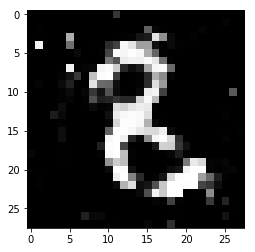

Number batches 468
61(0/468) D: 0.7111, G: 0.7227
61(1/468) D: 0.5836, G: 0.8102
61(2/468) D: 0.6610, G: 1.0143
61(3/468) D: 0.6115, G: 0.9395
61(4/468) D: 0.5982, G: 0.7823
61(5/468) D: 0.6356, G: 1.0205
61(6/468) D: 0.5926, G: 1.0448
61(7/468) D: 0.6028, G: 0.9184
61(8/468) D: 0.6184, G: 0.8262
61(9/468) D: 0.6739, G: 0.8792
61(10/468) D: 0.6243, G: 1.0060
61(11/468) D: 0.5832, G: 1.0169
61(12/468) D: 0.6039, G: 0.8901
61(13/468) D: 0.6521, G: 0.9544
61(14/468) D: 0.6173, G: 0.8627
61(15/468) D: 0.6381, G: 0.9084
61(16/468) D: 0.5939, G: 0.8903
61(17/468) D: 0.6329, G: 1.0514
61(18/468) D: 0.6206, G: 1.0700
61(19/468) D: 0.6391, G: 0.7810
61(20/468) D: 0.5990, G: 1.0188
61(21/468) D: 0.6193, G: 1.0611
61(22/468) D: 0.6097, G: 0.9233
61(23/468) D: 0.5917, G: 0.9248
61(24/468) D: 0.5908, G: 1.0282
61(25/468) D: 0.6505, G: 0.9061
61(26/468) D: 0.6368, G: 1.0316
61(27/468) D: 0.5641, G: 0.8616
61(28/468) D: 0.6098, G: 0.9742
61(29/468) D: 0.5893, G: 0.9564
61(30/468) D: 0.6662, G: 1.0218

61(252/468) D: 0.6168, G: 0.9219
61(253/468) D: 0.6346, G: 1.0061
61(254/468) D: 0.6179, G: 0.9409
61(255/468) D: 0.6117, G: 0.8110
61(256/468) D: 0.6288, G: 0.9608
61(257/468) D: 0.5895, G: 1.0364
61(258/468) D: 0.6196, G: 0.8358
61(259/468) D: 0.6539, G: 1.0209
61(260/468) D: 0.6173, G: 1.0352
61(261/468) D: 0.6153, G: 0.9250
61(262/468) D: 0.5814, G: 0.9237
61(263/468) D: 0.6421, G: 0.9203
61(264/468) D: 0.6452, G: 0.9793
61(265/468) D: 0.6289, G: 0.8584
61(266/468) D: 0.6276, G: 1.0044
61(267/468) D: 0.6043, G: 1.0659
61(268/468) D: 0.6430, G: 0.9530
61(269/468) D: 0.6368, G: 0.9937
61(270/468) D: 0.6551, G: 0.7702
61(271/468) D: 0.6481, G: 1.0651
61(272/468) D: 0.6118, G: 1.0045
61(273/468) D: 0.6224, G: 0.9650
61(274/468) D: 0.5865, G: 0.9547
61(275/468) D: 0.6224, G: 1.0775
61(276/468) D: 0.5805, G: 0.8408
61(277/468) D: 0.6444, G: 1.0425
61(278/468) D: 0.6275, G: 1.0121
61(279/468) D: 0.6475, G: 0.8775
61(280/468) D: 0.6178, G: 0.9882
61(281/468) D: 0.5524, G: 0.8655
61(282/468

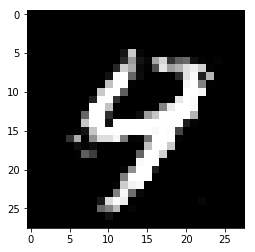

Number batches 468
62(0/468) D: 0.6804, G: 0.7244
62(1/468) D: 0.6411, G: 1.0230
62(2/468) D: 0.6051, G: 0.9026
62(3/468) D: 0.6328, G: 0.9613
62(4/468) D: 0.5754, G: 0.9252
62(5/468) D: 0.6039, G: 0.8333
62(6/468) D: 0.5816, G: 1.0581
62(7/468) D: 0.5865, G: 1.0128
62(8/468) D: 0.5730, G: 0.8999
62(9/468) D: 0.6641, G: 1.0032
62(10/468) D: 0.7188, G: 1.0704
62(11/468) D: 0.5794, G: 0.9462
62(12/468) D: 0.6059, G: 0.8233
62(13/468) D: 0.6722, G: 0.9226
62(14/468) D: 0.6351, G: 1.0044
62(15/468) D: 0.6947, G: 0.9083
62(16/468) D: 0.6024, G: 0.9578
62(17/468) D: 0.6161, G: 0.9288
62(18/468) D: 0.5832, G: 0.8602
62(19/468) D: 0.6399, G: 0.9924
62(20/468) D: 0.5919, G: 1.0120
62(21/468) D: 0.5944, G: 1.0025
62(22/468) D: 0.6211, G: 0.8773
62(23/468) D: 0.5997, G: 1.0985
62(24/468) D: 0.5800, G: 0.8997
62(25/468) D: 0.6312, G: 0.8366
62(26/468) D: 0.6479, G: 1.1192
62(27/468) D: 0.6019, G: 0.9951
62(28/468) D: 0.5976, G: 0.8947
62(29/468) D: 0.6265, G: 0.9354
62(30/468) D: 0.6202, G: 0.9473

62(253/468) D: 0.5726, G: 1.0113
62(254/468) D: 0.6221, G: 0.8060
62(255/468) D: 0.6895, G: 0.8774
62(256/468) D: 0.6178, G: 1.0309
62(257/468) D: 0.5556, G: 1.0678
62(258/468) D: 0.6189, G: 0.8022
62(259/468) D: 0.6029, G: 0.9721
62(260/468) D: 0.6406, G: 1.0517
62(261/468) D: 0.6405, G: 0.8479
62(262/468) D: 0.6406, G: 0.9491
62(263/468) D: 0.6446, G: 1.0288
62(264/468) D: 0.6582, G: 0.9920
62(265/468) D: 0.5918, G: 0.9582
62(266/468) D: 0.6246, G: 1.0837
62(267/468) D: 0.5942, G: 0.9446
62(268/468) D: 0.6080, G: 0.7764
62(269/468) D: 0.6186, G: 0.9684
62(270/468) D: 0.6713, G: 1.1283
62(271/468) D: 0.6727, G: 0.8125
62(272/468) D: 0.6605, G: 1.0253
62(273/468) D: 0.6319, G: 0.9416
62(274/468) D: 0.6278, G: 1.0196
62(275/468) D: 0.5701, G: 0.8900
62(276/468) D: 0.6008, G: 0.9413
62(277/468) D: 0.5886, G: 0.9614
62(278/468) D: 0.6045, G: 0.8839
62(279/468) D: 0.6195, G: 0.8671
62(280/468) D: 0.6479, G: 1.0110
62(281/468) D: 0.6439, G: 0.9612
62(282/468) D: 0.6851, G: 0.9461
62(283/468

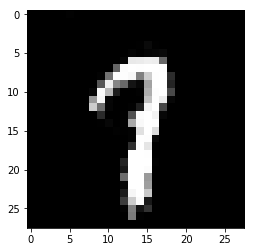

Number batches 468
63(0/468) D: 0.6355, G: 0.7766
63(1/468) D: 0.7060, G: 0.9962
63(2/468) D: 0.6787, G: 0.9934
63(3/468) D: 0.5788, G: 0.8007
63(4/468) D: 0.6182, G: 0.9271
63(5/468) D: 0.6408, G: 0.9903
63(6/468) D: 0.6014, G: 0.9082
63(7/468) D: 0.5645, G: 0.8716
63(8/468) D: 0.5697, G: 0.9523
63(9/468) D: 0.7085, G: 0.9636
63(10/468) D: 0.6726, G: 0.8960
63(11/468) D: 0.5921, G: 1.0478
63(12/468) D: 0.5764, G: 0.9678
63(13/468) D: 0.5676, G: 0.8699
63(14/468) D: 0.6338, G: 1.0688
63(15/468) D: 0.6355, G: 0.9631
63(16/468) D: 0.6226, G: 0.9299
63(17/468) D: 0.6034, G: 1.1138
63(18/468) D: 0.6058, G: 0.9580
63(19/468) D: 0.6284, G: 0.8568
63(20/468) D: 0.6440, G: 1.1898
63(21/468) D: 0.5929, G: 0.8701
63(22/468) D: 0.5669, G: 0.8930
63(23/468) D: 0.6021, G: 1.0496
63(24/468) D: 0.5509, G: 0.9280
63(25/468) D: 0.6311, G: 0.8998
63(26/468) D: 0.6101, G: 1.0447
63(27/468) D: 0.6019, G: 1.1273
63(28/468) D: 0.6324, G: 0.9429
63(29/468) D: 0.6489, G: 1.0131
63(30/468) D: 0.6483, G: 0.8281

63(252/468) D: 0.6268, G: 1.1472
63(253/468) D: 0.6612, G: 0.9445
63(254/468) D: 0.6012, G: 0.7997
63(255/468) D: 0.6737, G: 0.9278
63(256/468) D: 0.6335, G: 1.0732
63(257/468) D: 0.5989, G: 0.9219
63(258/468) D: 0.6437, G: 0.8912
63(259/468) D: 0.6451, G: 1.0260
63(260/468) D: 0.6018, G: 0.9325
63(261/468) D: 0.6172, G: 0.8682
63(262/468) D: 0.6262, G: 0.9619
63(263/468) D: 0.6627, G: 0.9382
63(264/468) D: 0.6476, G: 0.9037
63(265/468) D: 0.5802, G: 0.9889
63(266/468) D: 0.6252, G: 1.0805
63(267/468) D: 0.5720, G: 0.9167
63(268/468) D: 0.6146, G: 0.9318
63(269/468) D: 0.6108, G: 1.0247
63(270/468) D: 0.5961, G: 0.8999
63(271/468) D: 0.6204, G: 0.8583
63(272/468) D: 0.6311, G: 1.1323
63(273/468) D: 0.6000, G: 0.8562
63(274/468) D: 0.5690, G: 0.9531
63(275/468) D: 0.5728, G: 1.0114
63(276/468) D: 0.6365, G: 0.8106
63(277/468) D: 0.5761, G: 0.9932
63(278/468) D: 0.5947, G: 1.0416
63(279/468) D: 0.6910, G: 0.7619
63(280/468) D: 0.5999, G: 0.9057
63(281/468) D: 0.5190, G: 1.1011
63(282/468

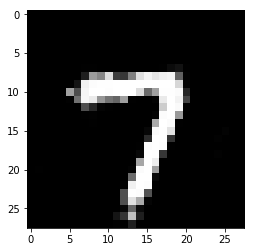

Number batches 468
64(0/468) D: 0.6431, G: 0.8264
64(1/468) D: 0.6445, G: 0.9590
64(2/468) D: 0.6208, G: 0.8535
64(3/468) D: 0.5929, G: 1.0765
64(4/468) D: 0.5682, G: 0.9826
64(5/468) D: 0.5909, G: 0.9527
64(6/468) D: 0.6089, G: 0.9849
64(7/468) D: 0.5972, G: 1.0949
64(8/468) D: 0.5891, G: 0.9530
64(9/468) D: 0.6978, G: 0.9453
64(10/468) D: 0.6399, G: 0.9260
64(11/468) D: 0.5739, G: 1.0021
64(12/468) D: 0.5842, G: 0.9726
64(13/468) D: 0.5584, G: 0.8639
64(14/468) D: 0.6336, G: 1.0091
64(15/468) D: 0.6640, G: 0.9166
64(16/468) D: 0.5750, G: 0.9746
64(17/468) D: 0.5993, G: 0.9547
64(18/468) D: 0.6376, G: 1.0097
64(19/468) D: 0.6684, G: 0.7465
64(20/468) D: 0.6238, G: 0.9865
64(21/468) D: 0.6210, G: 1.0565
64(22/468) D: 0.6096, G: 0.8273
64(23/468) D: 0.6085, G: 0.9082
64(24/468) D: 0.5848, G: 1.0253
64(25/468) D: 0.6015, G: 0.8835
64(26/468) D: 0.5977, G: 0.9977
64(27/468) D: 0.5915, G: 1.0381
64(28/468) D: 0.6207, G: 1.0091
64(29/468) D: 0.6008, G: 1.0797
64(30/468) D: 0.6240, G: 0.9817

64(252/468) D: 0.6122, G: 0.9780
64(253/468) D: 0.5869, G: 1.0301
64(254/468) D: 0.6166, G: 0.8149
64(255/468) D: 0.7299, G: 0.7927
64(256/468) D: 0.6863, G: 1.0343
64(257/468) D: 0.5779, G: 1.0423
64(258/468) D: 0.6498, G: 0.8826
64(259/468) D: 0.6407, G: 0.9958
64(260/468) D: 0.6289, G: 0.9594
64(261/468) D: 0.5771, G: 0.8836
64(262/468) D: 0.6080, G: 0.8138
64(263/468) D: 0.6251, G: 0.9168
64(264/468) D: 0.6557, G: 0.9627
64(265/468) D: 0.6370, G: 0.9983
64(266/468) D: 0.5941, G: 0.9478
64(267/468) D: 0.6332, G: 0.9876
64(268/468) D: 0.6035, G: 0.9123
64(269/468) D: 0.6368, G: 1.0521
64(270/468) D: 0.6021, G: 0.7743
64(271/468) D: 0.6571, G: 1.0590
64(272/468) D: 0.6293, G: 1.0503
64(273/468) D: 0.6649, G: 0.9332
64(274/468) D: 0.6154, G: 0.8806
64(275/468) D: 0.5942, G: 0.9957
64(276/468) D: 0.5962, G: 1.0477
64(277/468) D: 0.5979, G: 1.0955
64(278/468) D: 0.5581, G: 1.0351
64(279/468) D: 0.6350, G: 0.8677
64(280/468) D: 0.6277, G: 0.9301
64(281/468) D: 0.5994, G: 1.1144
64(282/468

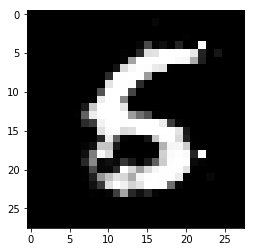

Number batches 468
65(0/468) D: 0.6721, G: 0.8121
65(1/468) D: 0.6428, G: 1.0092
65(2/468) D: 0.6726, G: 0.9214
65(3/468) D: 0.6238, G: 0.9418
65(4/468) D: 0.6054, G: 1.0637
65(5/468) D: 0.6383, G: 0.8431
65(6/468) D: 0.6122, G: 0.9072
65(7/468) D: 0.5624, G: 0.8854
65(8/468) D: 0.5972, G: 0.9029
65(9/468) D: 0.6722, G: 0.9827
65(10/468) D: 0.6813, G: 0.9404
65(11/468) D: 0.5526, G: 0.8877
65(12/468) D: 0.5922, G: 0.9278
65(13/468) D: 0.6077, G: 0.9537
65(14/468) D: 0.6260, G: 0.8850
65(15/468) D: 0.6517, G: 0.8913
65(16/468) D: 0.6198, G: 0.9651
65(17/468) D: 0.6070, G: 0.9151
65(18/468) D: 0.6028, G: 0.9243
65(19/468) D: 0.6221, G: 0.8570
65(20/468) D: 0.5872, G: 0.9765
65(21/468) D: 0.5706, G: 1.0061
65(22/468) D: 0.6031, G: 0.8548
65(23/468) D: 0.6166, G: 1.0764
65(24/468) D: 0.6112, G: 0.9179
65(25/468) D: 0.6297, G: 0.8175
65(26/468) D: 0.6480, G: 1.1866
65(27/468) D: 0.6309, G: 0.8838
65(28/468) D: 0.5988, G: 0.8939
65(29/468) D: 0.6408, G: 1.0086
65(30/468) D: 0.6686, G: 0.9400

65(252/468) D: 0.6616, G: 1.0443
65(253/468) D: 0.6182, G: 0.9532
65(254/468) D: 0.6340, G: 0.8816
65(255/468) D: 0.6649, G: 0.8210
65(256/468) D: 0.6325, G: 0.8982
65(257/468) D: 0.5595, G: 1.0864
65(258/468) D: 0.5950, G: 0.8664
65(259/468) D: 0.6084, G: 0.8800
65(260/468) D: 0.6272, G: 1.0271
65(261/468) D: 0.6217, G: 0.8537
65(262/468) D: 0.6388, G: 0.8979
65(263/468) D: 0.6148, G: 0.9152
65(264/468) D: 0.6362, G: 0.9768
65(265/468) D: 0.6210, G: 1.0118
65(266/468) D: 0.6547, G: 0.9424
65(267/468) D: 0.6226, G: 0.9740
65(268/468) D: 0.6456, G: 0.9989
65(269/468) D: 0.6072, G: 0.8163
65(270/468) D: 0.6074, G: 0.9396
65(271/468) D: 0.6431, G: 0.9747
65(272/468) D: 0.6423, G: 1.0366
65(273/468) D: 0.6397, G: 1.0430
65(274/468) D: 0.6329, G: 0.9366
65(275/468) D: 0.5739, G: 1.0877
65(276/468) D: 0.5825, G: 0.9751
65(277/468) D: 0.5636, G: 0.9076
65(278/468) D: 0.6228, G: 1.0867
65(279/468) D: 0.6650, G: 0.8137
65(280/468) D: 0.6608, G: 1.0200
65(281/468) D: 0.6081, G: 0.9686
65(282/468

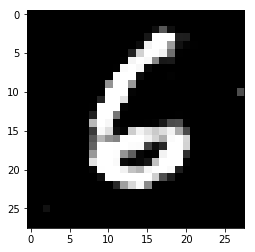

Number batches 468
66(0/468) D: 0.7264, G: 0.6675
66(1/468) D: 0.7445, G: 0.9924
66(2/468) D: 0.6371, G: 1.1567
66(3/468) D: 0.5807, G: 0.8548
66(4/468) D: 0.6308, G: 0.9126
66(5/468) D: 0.6281, G: 0.9476
66(6/468) D: 0.6061, G: 1.0125
66(7/468) D: 0.5903, G: 0.8477
66(8/468) D: 0.5879, G: 1.0792
66(9/468) D: 0.6536, G: 0.8748
66(10/468) D: 0.6653, G: 0.8688
66(11/468) D: 0.5936, G: 1.0807
66(12/468) D: 0.5922, G: 1.0081
66(13/468) D: 0.6139, G: 0.7802
66(14/468) D: 0.6197, G: 0.8841
66(15/468) D: 0.6730, G: 1.0419
66(16/468) D: 0.6602, G: 1.0061
66(17/468) D: 0.6031, G: 0.7715
66(18/468) D: 0.6157, G: 0.8900
66(19/468) D: 0.6403, G: 1.0361
66(20/468) D: 0.6306, G: 0.8793
66(21/468) D: 0.5896, G: 0.8845
66(22/468) D: 0.6131, G: 0.8970
66(23/468) D: 0.6091, G: 0.9995
66(24/468) D: 0.6044, G: 1.0428
66(25/468) D: 0.6669, G: 0.9036
66(26/468) D: 0.6071, G: 0.8704
66(27/468) D: 0.5778, G: 1.0171
66(28/468) D: 0.6471, G: 1.1006
66(29/468) D: 0.6098, G: 0.8388
66(30/468) D: 0.6179, G: 0.8432

66(252/468) D: 0.6777, G: 0.9991
66(253/468) D: 0.6383, G: 0.8362
66(254/468) D: 0.6449, G: 0.9383
66(255/468) D: 0.6966, G: 0.8543
66(256/468) D: 0.6711, G: 0.8792
66(257/468) D: 0.6101, G: 1.0222
66(258/468) D: 0.6379, G: 0.9411
66(259/468) D: 0.5967, G: 0.8480
66(260/468) D: 0.6070, G: 1.0087
66(261/468) D: 0.5899, G: 0.9749
66(262/468) D: 0.6236, G: 0.9023
66(263/468) D: 0.6184, G: 0.8527
66(264/468) D: 0.6442, G: 0.9193
66(265/468) D: 0.6059, G: 0.9011
66(266/468) D: 0.6099, G: 0.9538
66(267/468) D: 0.6105, G: 0.9421
66(268/468) D: 0.6376, G: 0.9196
66(269/468) D: 0.5939, G: 0.9297
66(270/468) D: 0.6729, G: 0.8426
66(271/468) D: 0.6213, G: 0.9636
66(272/468) D: 0.6327, G: 0.9188
66(273/468) D: 0.6051, G: 0.9435
66(274/468) D: 0.5959, G: 0.9604
66(275/468) D: 0.5821, G: 0.9822
66(276/468) D: 0.5804, G: 1.0185
66(277/468) D: 0.5925, G: 1.0496
66(278/468) D: 0.6006, G: 1.0250
66(279/468) D: 0.6624, G: 0.7953
66(280/468) D: 0.6146, G: 0.9696
66(281/468) D: 0.5829, G: 1.0097
66(282/468

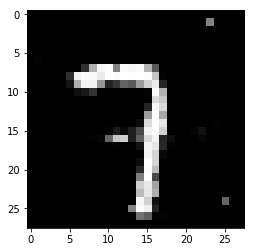

Number batches 468
67(0/468) D: 0.6756, G: 0.8478
67(1/468) D: 0.6563, G: 0.9244
67(2/468) D: 0.6281, G: 0.9821
67(3/468) D: 0.6163, G: 0.9454
67(4/468) D: 0.6046, G: 1.0663
67(5/468) D: 0.5920, G: 0.9366
67(6/468) D: 0.6235, G: 0.9096
67(7/468) D: 0.5738, G: 0.9679
67(8/468) D: 0.6207, G: 0.9874
67(9/468) D: 0.6646, G: 0.9447
67(10/468) D: 0.6465, G: 0.8919
67(11/468) D: 0.5689, G: 1.0542
67(12/468) D: 0.5882, G: 0.9468
67(13/468) D: 0.6166, G: 0.9323
67(14/468) D: 0.6408, G: 0.9704
67(15/468) D: 0.6689, G: 0.8908
67(16/468) D: 0.6255, G: 0.9148
67(17/468) D: 0.5908, G: 0.9910
67(18/468) D: 0.5959, G: 0.8455
67(19/468) D: 0.6255, G: 0.9134
67(20/468) D: 0.5912, G: 0.8928
67(21/468) D: 0.6080, G: 0.9235
67(22/468) D: 0.6439, G: 0.9525
67(23/468) D: 0.6155, G: 0.9996
67(24/468) D: 0.5893, G: 0.9530
67(25/468) D: 0.6649, G: 0.9038
67(26/468) D: 0.6251, G: 0.9796
67(27/468) D: 0.5889, G: 1.0166
67(28/468) D: 0.6239, G: 0.8649
67(29/468) D: 0.5748, G: 0.9906
67(30/468) D: 0.6368, G: 1.0127

67(252/468) D: 0.6190, G: 1.0713
67(253/468) D: 0.5937, G: 1.0121
67(254/468) D: 0.5697, G: 0.8124
67(255/468) D: 0.6429, G: 0.8048
67(256/468) D: 0.6486, G: 1.1031
67(257/468) D: 0.6001, G: 0.9546
67(258/468) D: 0.6234, G: 0.7129
67(259/468) D: 0.6101, G: 1.1334
67(260/468) D: 0.6306, G: 0.9564
67(261/468) D: 0.6066, G: 0.8072
67(262/468) D: 0.6074, G: 0.9215
67(263/468) D: 0.6138, G: 0.9806
67(264/468) D: 0.6362, G: 0.7625
67(265/468) D: 0.5904, G: 0.9472
67(266/468) D: 0.6246, G: 1.0106
67(267/468) D: 0.5949, G: 0.9987
67(268/468) D: 0.6533, G: 0.9158
67(269/468) D: 0.6277, G: 0.9011
67(270/468) D: 0.6645, G: 1.0113
67(271/468) D: 0.6066, G: 0.9923
67(272/468) D: 0.5967, G: 0.9213
67(273/468) D: 0.6327, G: 1.1154
67(274/468) D: 0.5826, G: 0.9360
67(275/468) D: 0.6400, G: 1.1326
67(276/468) D: 0.5859, G: 0.8757
67(277/468) D: 0.6065, G: 1.1350
67(278/468) D: 0.6209, G: 0.9096
67(279/468) D: 0.6156, G: 0.8061
67(280/468) D: 0.6721, G: 1.0197
67(281/468) D: 0.6180, G: 0.9278
67(282/468

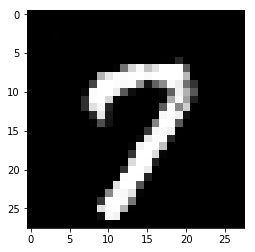

Number batches 468
68(0/468) D: 0.6408, G: 0.7864
68(1/468) D: 0.6661, G: 0.9975
68(2/468) D: 0.6198, G: 0.9532
68(3/468) D: 0.6371, G: 1.1591
68(4/468) D: 0.5866, G: 0.7619
68(5/468) D: 0.6580, G: 0.9374
68(6/468) D: 0.5808, G: 0.9933
68(7/468) D: 0.5754, G: 1.0399
68(8/468) D: 0.5608, G: 0.7878
68(9/468) D: 0.6645, G: 1.0793
68(10/468) D: 0.7244, G: 1.0331
68(11/468) D: 0.6367, G: 0.9313
68(12/468) D: 0.6092, G: 1.0080
68(13/468) D: 0.6202, G: 0.8737
68(14/468) D: 0.6331, G: 0.8968
68(15/468) D: 0.6765, G: 0.9803
68(16/468) D: 0.6669, G: 1.0433
68(17/468) D: 0.5623, G: 0.8006
68(18/468) D: 0.6494, G: 0.8969
68(19/468) D: 0.6153, G: 0.9261
68(20/468) D: 0.5881, G: 0.9661
68(21/468) D: 0.5918, G: 0.8646
68(22/468) D: 0.6308, G: 0.9769
68(23/468) D: 0.6154, G: 1.0541
68(24/468) D: 0.5839, G: 0.8622
68(25/468) D: 0.6323, G: 0.9045
68(26/468) D: 0.6015, G: 0.9584
68(27/468) D: 0.6376, G: 0.9820
68(28/468) D: 0.6133, G: 0.8638
68(29/468) D: 0.6079, G: 0.9558
68(30/468) D: 0.6554, G: 0.8418

68(252/468) D: 0.6379, G: 1.0603
68(253/468) D: 0.5683, G: 0.9189
68(254/468) D: 0.6600, G: 0.8909
68(255/468) D: 0.7047, G: 0.8712
68(256/468) D: 0.6643, G: 1.0480
68(257/468) D: 0.6089, G: 0.9265
68(258/468) D: 0.6315, G: 0.8384
68(259/468) D: 0.6178, G: 0.9970
68(260/468) D: 0.5885, G: 0.8707
68(261/468) D: 0.5943, G: 0.8897
68(262/468) D: 0.6272, G: 0.8691
68(263/468) D: 0.6211, G: 0.8520
68(264/468) D: 0.6445, G: 0.9228
68(265/468) D: 0.6273, G: 1.0540
68(266/468) D: 0.6096, G: 0.9070
68(267/468) D: 0.5649, G: 0.8891
68(268/468) D: 0.6526, G: 1.1063
68(269/468) D: 0.5822, G: 0.9294
68(270/468) D: 0.6313, G: 0.9358
68(271/468) D: 0.6145, G: 0.9616
68(272/468) D: 0.6062, G: 0.9032
68(273/468) D: 0.6335, G: 1.0846
68(274/468) D: 0.6114, G: 0.9859
68(275/468) D: 0.5699, G: 0.9818
68(276/468) D: 0.6106, G: 0.8937
68(277/468) D: 0.5504, G: 1.0561
68(278/468) D: 0.5915, G: 0.8575
68(279/468) D: 0.6540, G: 0.7614
68(280/468) D: 0.6276, G: 1.1199
68(281/468) D: 0.5654, G: 0.9013
68(282/468

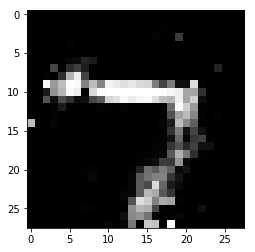

Number batches 468
69(0/468) D: 0.6666, G: 0.7822
69(1/468) D: 0.6614, G: 0.8977
69(2/468) D: 0.6231, G: 0.9943
69(3/468) D: 0.5932, G: 0.9020
69(4/468) D: 0.6385, G: 1.0502
69(5/468) D: 0.6237, G: 1.1053
69(6/468) D: 0.5594, G: 0.8917
69(7/468) D: 0.5670, G: 1.0504
69(8/468) D: 0.6212, G: 0.8977
69(9/468) D: 0.6982, G: 0.9313
69(10/468) D: 0.6771, G: 0.9663
69(11/468) D: 0.6215, G: 0.9537
69(12/468) D: 0.5937, G: 0.7804
69(13/468) D: 0.6075, G: 0.8638
69(14/468) D: 0.6314, G: 0.9354
69(15/468) D: 0.6535, G: 0.8598
69(16/468) D: 0.6450, G: 0.9087
69(17/468) D: 0.6238, G: 0.7928
69(18/468) D: 0.6257, G: 0.9373
69(19/468) D: 0.6557, G: 0.9447
69(20/468) D: 0.6140, G: 0.9071
69(21/468) D: 0.6335, G: 0.9417
69(22/468) D: 0.6010, G: 0.9581
69(23/468) D: 0.5938, G: 0.9944
69(24/468) D: 0.5742, G: 0.8354
69(25/468) D: 0.6887, G: 1.0410
69(26/468) D: 0.6422, G: 0.8701
69(27/468) D: 0.6054, G: 0.9881
69(28/468) D: 0.6117, G: 1.0013
69(29/468) D: 0.5856, G: 0.9148
69(30/468) D: 0.6733, G: 0.9002

69(252/468) D: 0.5862, G: 0.9654
69(253/468) D: 0.5818, G: 1.1191
69(254/468) D: 0.6498, G: 0.7611
69(255/468) D: 0.6871, G: 0.8552
69(256/468) D: 0.6463, G: 1.0972
69(257/468) D: 0.6061, G: 1.1222
69(258/468) D: 0.6082, G: 0.7601
69(259/468) D: 0.6107, G: 0.8044
69(260/468) D: 0.5976, G: 1.0997
69(261/468) D: 0.5782, G: 0.9198
69(262/468) D: 0.6104, G: 0.7727
69(263/468) D: 0.6514, G: 0.9883
69(264/468) D: 0.6155, G: 0.9323
69(265/468) D: 0.5745, G: 0.9447
69(266/468) D: 0.6196, G: 1.0267
69(267/468) D: 0.5601, G: 0.9008
69(268/468) D: 0.6446, G: 0.9696
69(269/468) D: 0.5693, G: 1.0025
69(270/468) D: 0.6573, G: 1.0555
69(271/468) D: 0.6433, G: 0.8498
69(272/468) D: 0.6495, G: 0.8415
69(273/468) D: 0.5970, G: 1.0267
69(274/468) D: 0.5854, G: 0.9089
69(275/468) D: 0.5811, G: 0.9695
69(276/468) D: 0.5990, G: 0.9369
69(277/468) D: 0.5905, G: 1.1898
69(278/468) D: 0.6209, G: 0.9416
69(279/468) D: 0.6674, G: 0.6797
69(280/468) D: 0.6258, G: 1.1309
69(281/468) D: 0.6095, G: 1.0076
69(282/468

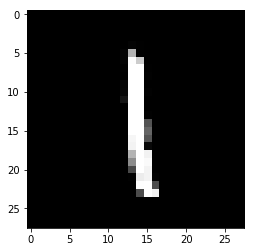

Number batches 468
70(0/468) D: 0.6715, G: 0.8933
70(1/468) D: 0.6524, G: 0.9219
70(2/468) D: 0.6111, G: 0.9449
70(3/468) D: 0.6195, G: 0.8259
70(4/468) D: 0.6061, G: 0.8561
70(5/468) D: 0.6135, G: 0.9570
70(6/468) D: 0.6003, G: 0.9109
70(7/468) D: 0.6007, G: 0.9609
70(8/468) D: 0.6508, G: 0.9114
70(9/468) D: 0.6752, G: 0.9259
70(10/468) D: 0.6651, G: 1.0163
70(11/468) D: 0.6163, G: 0.9793
70(12/468) D: 0.6002, G: 0.9107
70(13/468) D: 0.6039, G: 0.9397
70(14/468) D: 0.6237, G: 0.9314
70(15/468) D: 0.6989, G: 0.9328
70(16/468) D: 0.6570, G: 1.0091
70(17/468) D: 0.6560, G: 0.9507
70(18/468) D: 0.6160, G: 0.7623
70(19/468) D: 0.6667, G: 0.8740
70(20/468) D: 0.6040, G: 1.1002
70(21/468) D: 0.6094, G: 0.9141
70(22/468) D: 0.6206, G: 0.9121
70(23/468) D: 0.5752, G: 0.8958
70(24/468) D: 0.5836, G: 1.0845
70(25/468) D: 0.6346, G: 0.8516
70(26/468) D: 0.6115, G: 1.0735
70(27/468) D: 0.5829, G: 0.9702
70(28/468) D: 0.6023, G: 0.9395
70(29/468) D: 0.5748, G: 0.8508
70(30/468) D: 0.6350, G: 1.0315

70(253/468) D: 0.5777, G: 0.9738
70(254/468) D: 0.6873, G: 0.9808
70(255/468) D: 0.7158, G: 0.7339
70(256/468) D: 0.6526, G: 0.9831
70(257/468) D: 0.5320, G: 1.0353
70(258/468) D: 0.6342, G: 0.8416
70(259/468) D: 0.6009, G: 0.9472
70(260/468) D: 0.5978, G: 1.0049
70(261/468) D: 0.5703, G: 0.8549
70(262/468) D: 0.6158, G: 1.0017
70(263/468) D: 0.6126, G: 0.9484
70(264/468) D: 0.6479, G: 0.9298
70(265/468) D: 0.5979, G: 1.0065
70(266/468) D: 0.6327, G: 0.9731
70(267/468) D: 0.5844, G: 0.9320
70(268/468) D: 0.5953, G: 0.9176
70(269/468) D: 0.6026, G: 1.0396
70(270/468) D: 0.6209, G: 0.8841
70(271/468) D: 0.6510, G: 0.8956
70(272/468) D: 0.5863, G: 0.8388
70(273/468) D: 0.6036, G: 0.8792
70(274/468) D: 0.5827, G: 0.9389
70(275/468) D: 0.5810, G: 1.0937
70(276/468) D: 0.6559, G: 0.9817
70(277/468) D: 0.5938, G: 0.8588
70(278/468) D: 0.6007, G: 0.9425
70(279/468) D: 0.6549, G: 0.9983
70(280/468) D: 0.6180, G: 0.9269
70(281/468) D: 0.6302, G: 0.8985
70(282/468) D: 0.6204, G: 0.9732
70(283/468

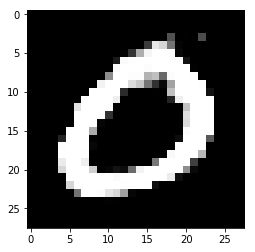

Number batches 468
71(0/468) D: 0.6975, G: 0.7621
71(1/468) D: 0.6970, G: 0.9634
71(2/468) D: 0.6262, G: 1.0103
71(3/468) D: 0.6412, G: 0.9570
71(4/468) D: 0.6336, G: 1.0198
71(5/468) D: 0.6156, G: 0.8910
71(6/468) D: 0.5993, G: 0.9015
71(7/468) D: 0.6280, G: 1.0425
71(8/468) D: 0.6007, G: 0.9110
71(9/468) D: 0.6708, G: 0.9280
71(10/468) D: 0.6338, G: 0.8676
71(11/468) D: 0.5875, G: 0.9134
71(12/468) D: 0.5886, G: 0.8947
71(13/468) D: 0.6091, G: 0.9370
71(14/468) D: 0.6200, G: 1.0637
71(15/468) D: 0.6370, G: 0.7730
71(16/468) D: 0.6343, G: 0.9495
71(17/468) D: 0.5991, G: 0.9971
71(18/468) D: 0.5983, G: 0.8886
71(19/468) D: 0.6063, G: 0.8140
71(20/468) D: 0.6346, G: 1.0873
71(21/468) D: 0.6267, G: 0.9815
71(22/468) D: 0.6550, G: 0.8830
71(23/468) D: 0.6242, G: 0.9342
71(24/468) D: 0.5722, G: 0.8850
71(25/468) D: 0.6591, G: 0.9151
71(26/468) D: 0.5917, G: 1.0016
71(27/468) D: 0.5926, G: 0.9210
71(28/468) D: 0.6004, G: 1.0027
71(29/468) D: 0.6100, G: 0.8066
71(30/468) D: 0.6466, G: 0.9724

71(252/468) D: 0.6417, G: 1.0670
71(253/468) D: 0.6293, G: 0.9430
71(254/468) D: 0.6125, G: 0.8764
71(255/468) D: 0.6633, G: 1.0679
71(256/468) D: 0.6108, G: 0.8780
71(257/468) D: 0.5602, G: 0.9594
71(258/468) D: 0.6349, G: 0.8713
71(259/468) D: 0.5990, G: 0.9764
71(260/468) D: 0.6289, G: 1.0274
71(261/468) D: 0.6621, G: 0.8841
71(262/468) D: 0.6227, G: 0.9262
71(263/468) D: 0.6634, G: 0.9161
71(264/468) D: 0.6730, G: 0.9743
71(265/468) D: 0.6235, G: 0.9033
71(266/468) D: 0.6001, G: 0.8909
71(267/468) D: 0.6136, G: 0.9613
71(268/468) D: 0.6672, G: 1.0833
71(269/468) D: 0.6677, G: 0.7978
71(270/468) D: 0.6598, G: 0.9177
71(271/468) D: 0.6152, G: 0.8640
71(272/468) D: 0.6189, G: 0.9517
71(273/468) D: 0.6297, G: 0.8661
71(274/468) D: 0.5844, G: 0.9386
71(275/468) D: 0.5917, G: 0.9107
71(276/468) D: 0.6156, G: 0.9802
71(277/468) D: 0.5753, G: 1.0633
71(278/468) D: 0.6249, G: 1.0483
71(279/468) D: 0.6580, G: 0.8337
71(280/468) D: 0.5721, G: 0.8898
71(281/468) D: 0.5723, G: 1.0905
71(282/468

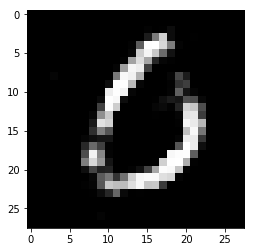

Number batches 468
72(0/468) D: 0.7028, G: 0.7942
72(1/468) D: 0.6750, G: 0.8530
72(2/468) D: 0.6291, G: 1.0151
72(3/468) D: 0.6447, G: 1.0379
72(4/468) D: 0.6095, G: 1.0031
72(5/468) D: 0.6325, G: 0.8768
72(6/468) D: 0.5843, G: 0.9307
72(7/468) D: 0.5913, G: 1.0197
72(8/468) D: 0.6151, G: 1.0955
72(9/468) D: 0.6902, G: 0.7774
72(10/468) D: 0.7013, G: 1.0020
72(11/468) D: 0.5915, G: 1.0597
72(12/468) D: 0.6005, G: 0.9548
72(13/468) D: 0.6012, G: 0.8074
72(14/468) D: 0.6193, G: 0.9116
72(15/468) D: 0.6638, G: 0.9727
72(16/468) D: 0.5797, G: 0.8713
72(17/468) D: 0.5979, G: 0.8758
72(18/468) D: 0.6126, G: 0.9344
72(19/468) D: 0.6321, G: 0.9057
72(20/468) D: 0.5757, G: 0.9571
72(21/468) D: 0.6477, G: 0.9682
72(22/468) D: 0.6156, G: 0.8980
72(23/468) D: 0.6333, G: 0.9449
72(24/468) D: 0.6093, G: 0.9556
72(25/468) D: 0.6704, G: 0.9111
72(26/468) D: 0.6259, G: 0.9077
72(27/468) D: 0.6481, G: 1.1587
72(28/468) D: 0.6377, G: 0.8838
72(29/468) D: 0.6270, G: 0.7219
72(30/468) D: 0.6352, G: 0.9066

72(252/468) D: 0.6213, G: 1.0770
72(253/468) D: 0.6050, G: 1.0602
72(254/468) D: 0.6560, G: 0.9523
72(255/468) D: 0.6840, G: 0.7902
72(256/468) D: 0.6836, G: 0.9291
72(257/468) D: 0.5668, G: 0.9445
72(258/468) D: 0.6518, G: 0.8310
72(259/468) D: 0.5858, G: 0.8583
72(260/468) D: 0.6091, G: 0.9958
72(261/468) D: 0.6196, G: 0.9515
72(262/468) D: 0.5993, G: 0.7546
72(263/468) D: 0.6576, G: 0.9604
72(264/468) D: 0.6335, G: 0.8569
72(265/468) D: 0.5873, G: 0.8374
72(266/468) D: 0.6219, G: 0.9876
72(267/468) D: 0.6039, G: 1.0064
72(268/468) D: 0.6345, G: 0.8787
72(269/468) D: 0.5969, G: 0.9451
72(270/468) D: 0.5749, G: 0.9571
72(271/468) D: 0.6387, G: 1.0329
72(272/468) D: 0.5978, G: 0.9496
72(273/468) D: 0.5867, G: 1.0182
72(274/468) D: 0.6079, G: 0.9642
72(275/468) D: 0.5919, G: 1.0232
72(276/468) D: 0.6309, G: 0.8317
72(277/468) D: 0.5947, G: 1.0605
72(278/468) D: 0.6218, G: 0.9528
72(279/468) D: 0.6270, G: 0.7700
72(280/468) D: 0.5969, G: 1.0529
72(281/468) D: 0.5658, G: 0.9076
72(282/468

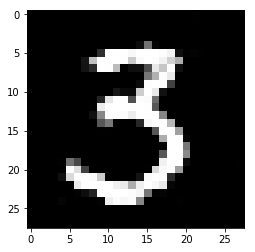

Number batches 468
73(0/468) D: 0.6680, G: 0.8655
73(1/468) D: 0.6272, G: 1.0161
73(2/468) D: 0.6095, G: 0.8880
73(3/468) D: 0.5902, G: 1.0496
73(4/468) D: 0.6333, G: 0.8654
73(5/468) D: 0.6413, G: 0.9682
73(6/468) D: 0.5982, G: 1.0423
73(7/468) D: 0.5904, G: 1.0855
73(8/468) D: 0.6325, G: 0.9381
73(9/468) D: 0.6655, G: 0.9539
73(10/468) D: 0.6490, G: 0.8163
73(11/468) D: 0.6011, G: 1.0605
73(12/468) D: 0.5740, G: 0.9981
73(13/468) D: 0.6616, G: 0.9571
73(14/468) D: 0.6403, G: 0.9067
73(15/468) D: 0.6494, G: 0.9156
73(16/468) D: 0.6121, G: 1.0218
73(17/468) D: 0.6541, G: 0.8952
73(18/468) D: 0.6001, G: 0.8679
73(19/468) D: 0.6084, G: 0.9049
73(20/468) D: 0.5888, G: 1.0007
73(21/468) D: 0.6229, G: 0.8962
73(22/468) D: 0.6010, G: 1.0095
73(23/468) D: 0.6022, G: 0.9670
73(24/468) D: 0.5882, G: 0.9262
73(25/468) D: 0.6090, G: 0.8406
73(26/468) D: 0.6215, G: 1.2220
73(27/468) D: 0.6094, G: 0.9906
73(28/468) D: 0.6241, G: 0.9784
73(29/468) D: 0.6246, G: 0.8701
73(30/468) D: 0.6330, G: 0.9039

73(253/468) D: 0.6336, G: 0.9064
73(254/468) D: 0.6457, G: 1.0291
73(255/468) D: 0.6824, G: 0.8674
73(256/468) D: 0.6474, G: 0.9099
73(257/468) D: 0.5709, G: 0.9886
73(258/468) D: 0.5848, G: 0.8843
73(259/468) D: 0.5846, G: 0.9026
73(260/468) D: 0.5678, G: 1.0146
73(261/468) D: 0.6244, G: 0.9502
73(262/468) D: 0.6039, G: 0.8886
73(263/468) D: 0.6424, G: 0.8693
73(264/468) D: 0.6539, G: 0.9463
73(265/468) D: 0.6283, G: 1.0338
73(266/468) D: 0.6368, G: 1.0686
73(267/468) D: 0.5650, G: 0.9763
73(268/468) D: 0.6708, G: 0.8969
73(269/468) D: 0.6646, G: 1.2470
73(270/468) D: 0.6126, G: 0.8887
73(271/468) D: 0.6409, G: 0.8840
73(272/468) D: 0.5940, G: 0.9291
73(273/468) D: 0.6144, G: 0.9971
73(274/468) D: 0.5674, G: 0.9757
73(275/468) D: 0.5433, G: 0.9824
73(276/468) D: 0.5988, G: 1.1285
73(277/468) D: 0.5903, G: 0.9982
73(278/468) D: 0.6000, G: 1.0670
73(279/468) D: 0.6222, G: 0.6681
73(280/468) D: 0.6405, G: 1.0294
73(281/468) D: 0.6016, G: 0.9284
73(282/468) D: 0.6223, G: 0.9955
73(283/468

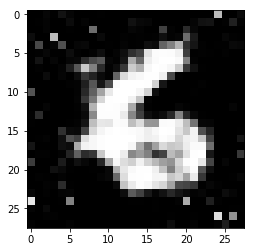

Number batches 468
74(0/468) D: 0.6974, G: 0.7303
74(1/468) D: 0.6738, G: 0.8718
74(2/468) D: 0.6509, G: 1.0713
74(3/468) D: 0.6499, G: 0.8612
74(4/468) D: 0.6212, G: 0.8778
74(5/468) D: 0.5882, G: 0.9782
74(6/468) D: 0.5731, G: 0.9216
74(7/468) D: 0.5175, G: 1.0746
74(8/468) D: 0.6431, G: 0.9374
74(9/468) D: 0.6462, G: 0.8041
74(10/468) D: 0.7302, G: 1.2094
74(11/468) D: 0.6184, G: 1.0406
74(12/468) D: 0.5864, G: 0.8367
74(13/468) D: 0.6450, G: 0.9734
74(14/468) D: 0.6084, G: 0.8951
74(15/468) D: 0.7059, G: 0.9969
74(16/468) D: 0.6462, G: 0.9130
74(17/468) D: 0.6375, G: 0.9681
74(18/468) D: 0.6108, G: 0.8952
74(19/468) D: 0.6431, G: 0.9466
74(20/468) D: 0.5903, G: 0.9055
74(21/468) D: 0.6532, G: 0.9347
74(22/468) D: 0.5843, G: 0.8546
74(23/468) D: 0.5944, G: 1.0338
74(24/468) D: 0.5941, G: 0.8753
74(25/468) D: 0.6199, G: 0.7742
74(26/468) D: 0.6291, G: 1.1211
74(27/468) D: 0.6262, G: 1.0744
74(28/468) D: 0.6840, G: 0.7407
74(29/468) D: 0.6215, G: 0.9646
74(30/468) D: 0.6302, G: 1.0416

74(253/468) D: 0.6153, G: 0.9888
74(254/468) D: 0.6443, G: 0.9780
74(255/468) D: 0.7132, G: 0.8640
74(256/468) D: 0.6402, G: 0.9221
74(257/468) D: 0.6262, G: 1.0399
74(258/468) D: 0.6685, G: 0.9774
74(259/468) D: 0.5987, G: 0.9020
74(260/468) D: 0.5695, G: 0.8767
74(261/468) D: 0.5927, G: 0.9614
74(262/468) D: 0.6204, G: 0.8609
74(263/468) D: 0.7085, G: 0.9702
74(264/468) D: 0.6584, G: 0.9317
74(265/468) D: 0.6047, G: 0.9369
74(266/468) D: 0.6392, G: 0.9209
74(267/468) D: 0.6013, G: 1.0098
74(268/468) D: 0.6286, G: 1.0140
74(269/468) D: 0.6073, G: 0.9980
74(270/468) D: 0.6060, G: 0.8169
74(271/468) D: 0.5927, G: 0.8549
74(272/468) D: 0.6273, G: 0.9631
74(273/468) D: 0.6163, G: 0.8986
74(274/468) D: 0.5824, G: 0.9746
74(275/468) D: 0.5440, G: 0.9421
74(276/468) D: 0.6131, G: 0.8935
74(277/468) D: 0.5686, G: 1.0518
74(278/468) D: 0.6210, G: 0.8803
74(279/468) D: 0.6645, G: 0.9034
74(280/468) D: 0.6284, G: 1.0118
74(281/468) D: 0.6011, G: 1.0185
74(282/468) D: 0.6457, G: 0.9190
74(283/468

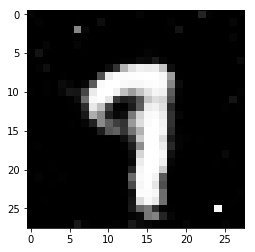

Number batches 468
75(0/468) D: 0.6676, G: 0.9647
75(1/468) D: 0.6610, G: 0.8860
75(2/468) D: 0.6572, G: 0.9089
75(3/468) D: 0.6080, G: 0.9474
75(4/468) D: 0.6165, G: 0.8948
75(5/468) D: 0.6374, G: 0.9224
75(6/468) D: 0.5953, G: 1.0208
75(7/468) D: 0.6070, G: 0.8268
75(8/468) D: 0.6121, G: 0.9747
75(9/468) D: 0.6242, G: 1.0126
75(10/468) D: 0.6455, G: 1.0884
75(11/468) D: 0.5724, G: 0.9469
75(12/468) D: 0.6090, G: 1.0797
75(13/468) D: 0.6286, G: 0.8176
75(14/468) D: 0.6120, G: 0.8847
75(15/468) D: 0.6292, G: 1.0092
75(16/468) D: 0.6082, G: 0.9547
75(17/468) D: 0.5877, G: 0.9228
75(18/468) D: 0.6560, G: 0.9738
75(19/468) D: 0.6612, G: 0.8564
75(20/468) D: 0.6178, G: 1.0194
75(21/468) D: 0.6328, G: 0.9441
75(22/468) D: 0.5924, G: 0.8915
75(23/468) D: 0.6009, G: 0.9221
75(24/468) D: 0.5938, G: 0.8648
75(25/468) D: 0.6220, G: 0.8685
75(26/468) D: 0.6323, G: 0.9832
75(27/468) D: 0.5997, G: 1.0624
75(28/468) D: 0.6259, G: 0.9854
75(29/468) D: 0.6069, G: 0.8586
75(30/468) D: 0.6913, G: 0.9816

75(253/468) D: 0.6130, G: 1.1375
75(254/468) D: 0.6645, G: 0.8256
75(255/468) D: 0.7269, G: 0.8261
75(256/468) D: 0.6465, G: 0.8021
75(257/468) D: 0.5977, G: 1.0199
75(258/468) D: 0.6001, G: 0.9303
75(259/468) D: 0.6017, G: 0.9632
75(260/468) D: 0.6137, G: 0.9684
75(261/468) D: 0.5980, G: 0.8810
75(262/468) D: 0.5578, G: 0.9194
75(263/468) D: 0.6581, G: 0.9877
75(264/468) D: 0.6434, G: 0.9667
75(265/468) D: 0.6125, G: 1.0303
75(266/468) D: 0.6049, G: 0.9229
75(267/468) D: 0.6173, G: 0.9628
75(268/468) D: 0.6253, G: 0.9655
75(269/468) D: 0.5654, G: 0.8576
75(270/468) D: 0.6098, G: 0.9982
75(271/468) D: 0.6485, G: 0.9593
75(272/468) D: 0.5949, G: 0.8552
75(273/468) D: 0.5913, G: 0.8329
75(274/468) D: 0.5832, G: 0.9724
75(275/468) D: 0.5592, G: 1.0699
75(276/468) D: 0.5893, G: 1.0370
75(277/468) D: 0.5653, G: 0.9337
75(278/468) D: 0.6195, G: 1.0589
75(279/468) D: 0.6842, G: 0.7682
75(280/468) D: 0.6456, G: 1.0062
75(281/468) D: 0.6202, G: 0.8662
75(282/468) D: 0.6520, G: 0.9421
75(283/468

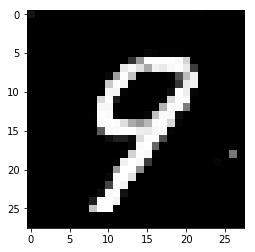

Number batches 468
76(0/468) D: 0.6987, G: 0.6920
76(1/468) D: 0.6444, G: 1.0255
76(2/468) D: 0.6753, G: 1.1095
76(3/468) D: 0.6338, G: 0.9221
76(4/468) D: 0.6231, G: 1.0521
76(5/468) D: 0.5895, G: 0.9815
76(6/468) D: 0.5912, G: 0.9511
76(7/468) D: 0.5470, G: 0.9683
76(8/468) D: 0.5622, G: 1.1253
76(9/468) D: 0.6689, G: 0.7821
76(10/468) D: 0.7618, G: 1.0584
76(11/468) D: 0.6161, G: 1.0683
76(12/468) D: 0.5811, G: 0.8767
76(13/468) D: 0.6011, G: 0.9813
76(14/468) D: 0.6063, G: 0.9509
76(15/468) D: 0.6715, G: 0.9464
76(16/468) D: 0.6397, G: 0.9958
76(17/468) D: 0.6047, G: 0.8817
76(18/468) D: 0.6399, G: 0.8721
76(19/468) D: 0.6485, G: 1.0295
76(20/468) D: 0.5896, G: 0.9932
76(21/468) D: 0.6118, G: 1.0087
76(22/468) D: 0.6058, G: 0.8205
76(23/468) D: 0.5796, G: 0.9014
76(24/468) D: 0.6202, G: 0.9629
76(25/468) D: 0.6166, G: 0.7484
76(26/468) D: 0.6278, G: 0.9921
76(27/468) D: 0.6354, G: 1.2488
76(28/468) D: 0.6520, G: 0.8426
76(29/468) D: 0.6381, G: 0.8365
76(30/468) D: 0.6231, G: 0.8977

76(253/468) D: 0.6052, G: 0.8452
76(254/468) D: 0.6468, G: 1.1390
76(255/468) D: 0.6907, G: 0.8937
76(256/468) D: 0.6098, G: 0.8431
76(257/468) D: 0.6099, G: 1.0433
76(258/468) D: 0.6277, G: 0.9086
76(259/468) D: 0.5785, G: 0.9190
76(260/468) D: 0.6091, G: 0.9666
76(261/468) D: 0.6017, G: 0.9390
76(262/468) D: 0.5720, G: 0.9773
76(263/468) D: 0.6195, G: 0.9749
76(264/468) D: 0.6441, G: 0.9887
76(265/468) D: 0.6030, G: 0.9568
76(266/468) D: 0.6112, G: 0.9283
76(267/468) D: 0.6202, G: 0.9919
76(268/468) D: 0.6328, G: 0.9171
76(269/468) D: 0.5925, G: 0.7939
76(270/468) D: 0.6407, G: 1.0098
76(271/468) D: 0.6346, G: 1.1444
76(272/468) D: 0.6365, G: 0.8127
76(273/468) D: 0.6303, G: 0.9080
76(274/468) D: 0.5840, G: 1.0480
76(275/468) D: 0.5590, G: 0.9338
76(276/468) D: 0.6107, G: 0.9509
76(277/468) D: 0.5840, G: 1.0443
76(278/468) D: 0.5953, G: 0.7533
76(279/468) D: 0.6607, G: 0.8844
76(280/468) D: 0.6523, G: 0.9838
76(281/468) D: 0.6292, G: 0.9158
76(282/468) D: 0.6412, G: 1.0300
76(283/468

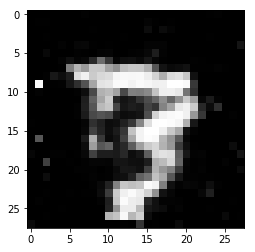

Number batches 468
77(0/468) D: 0.6794, G: 0.8132
77(1/468) D: 0.6163, G: 0.8258
77(2/468) D: 0.6351, G: 0.9667
77(3/468) D: 0.6023, G: 0.9738
77(4/468) D: 0.6225, G: 0.8524
77(5/468) D: 0.5874, G: 0.8527
77(6/468) D: 0.6179, G: 0.9806
77(7/468) D: 0.5641, G: 1.1734
77(8/468) D: 0.5634, G: 0.7910
77(9/468) D: 0.7051, G: 1.1313
77(10/468) D: 0.6722, G: 1.1035
77(11/468) D: 0.5855, G: 0.9729
77(12/468) D: 0.6152, G: 0.9163
77(13/468) D: 0.6184, G: 0.9422
77(14/468) D: 0.6235, G: 0.8962
77(15/468) D: 0.6847, G: 0.9948
77(16/468) D: 0.6326, G: 0.9311
77(17/468) D: 0.6474, G: 0.8374
77(18/468) D: 0.6048, G: 0.8036
77(19/468) D: 0.6581, G: 0.8994
77(20/468) D: 0.6250, G: 0.9827
77(21/468) D: 0.5968, G: 0.9074
77(22/468) D: 0.6150, G: 0.8942
77(23/468) D: 0.5713, G: 0.7913
77(24/468) D: 0.5608, G: 0.8278
77(25/468) D: 0.6171, G: 0.9397
77(26/468) D: 0.5905, G: 1.1191
77(27/468) D: 0.6075, G: 0.9009
77(28/468) D: 0.5771, G: 0.8977
77(29/468) D: 0.6328, G: 1.1527
77(30/468) D: 0.6755, G: 0.7885

77(252/468) D: 0.6757, G: 0.8909
77(253/468) D: 0.5980, G: 0.8511
77(254/468) D: 0.6187, G: 1.1367
77(255/468) D: 0.6507, G: 0.8477
77(256/468) D: 0.6772, G: 0.8901
77(257/468) D: 0.5941, G: 1.0758
77(258/468) D: 0.6394, G: 0.8285
77(259/468) D: 0.6159, G: 0.9589
77(260/468) D: 0.5941, G: 1.0289
77(261/468) D: 0.5878, G: 0.9377
77(262/468) D: 0.6359, G: 0.8681
77(263/468) D: 0.6503, G: 0.9272
77(264/468) D: 0.6380, G: 0.9492
77(265/468) D: 0.5876, G: 0.9438
77(266/468) D: 0.6000, G: 0.9049
77(267/468) D: 0.6173, G: 1.0412
77(268/468) D: 0.6091, G: 0.8548
77(269/468) D: 0.5978, G: 0.9280
77(270/468) D: 0.6234, G: 1.0030
77(271/468) D: 0.6453, G: 0.9578
77(272/468) D: 0.6217, G: 0.8663
77(273/468) D: 0.6233, G: 0.9603
77(274/468) D: 0.6020, G: 0.9843
77(275/468) D: 0.5701, G: 1.0353
77(276/468) D: 0.6132, G: 0.8119
77(277/468) D: 0.6336, G: 1.0461
77(278/468) D: 0.5968, G: 0.9620
77(279/468) D: 0.6309, G: 0.7448
77(280/468) D: 0.6008, G: 0.9855
77(281/468) D: 0.5982, G: 1.1699
77(282/468

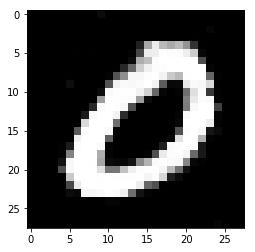

Number batches 468
78(0/468) D: 0.6533, G: 0.8560
78(1/468) D: 0.6670, G: 0.9223
78(2/468) D: 0.5872, G: 1.0170
78(3/468) D: 0.6179, G: 0.9812
78(4/468) D: 0.5988, G: 0.8308
78(5/468) D: 0.6122, G: 0.8517
78(6/468) D: 0.6044, G: 1.0688
78(7/468) D: 0.5326, G: 1.0220
78(8/468) D: 0.5752, G: 0.8974
78(9/468) D: 0.6733, G: 0.9884
78(10/468) D: 0.7221, G: 0.9892
78(11/468) D: 0.6110, G: 1.1086
78(12/468) D: 0.6124, G: 0.7992
78(13/468) D: 0.6494, G: 0.9969
78(14/468) D: 0.6227, G: 1.0237
78(15/468) D: 0.6637, G: 0.8739
78(16/468) D: 0.6092, G: 0.8581
78(17/468) D: 0.6249, G: 0.8660
78(18/468) D: 0.6445, G: 1.0285
78(19/468) D: 0.6733, G: 0.8870
78(20/468) D: 0.6056, G: 0.8366
78(21/468) D: 0.6218, G: 0.8504
78(22/468) D: 0.6060, G: 0.9375
78(23/468) D: 0.5892, G: 0.9870
78(24/468) D: 0.5876, G: 0.9029
78(25/468) D: 0.6579, G: 0.7235
78(26/468) D: 0.6552, G: 1.2209
78(27/468) D: 0.6460, G: 0.8484
78(28/468) D: 0.6303, G: 0.8203
78(29/468) D: 0.6090, G: 0.9825
78(30/468) D: 0.6392, G: 0.9188

78(252/468) D: 0.6423, G: 0.9693
78(253/468) D: 0.6005, G: 0.9846
78(254/468) D: 0.6438, G: 1.1487
78(255/468) D: 0.6711, G: 0.8475
78(256/468) D: 0.6054, G: 0.9762
78(257/468) D: 0.5947, G: 1.1467
78(258/468) D: 0.6105, G: 0.8248
78(259/468) D: 0.6111, G: 0.9617
78(260/468) D: 0.5863, G: 0.9444
78(261/468) D: 0.6190, G: 0.9494
78(262/468) D: 0.5824, G: 0.8715
78(263/468) D: 0.6210, G: 0.8736
78(264/468) D: 0.6716, G: 0.9972
78(265/468) D: 0.6053, G: 0.9237
78(266/468) D: 0.5949, G: 0.9015
78(267/468) D: 0.6157, G: 1.0507
78(268/468) D: 0.5969, G: 0.9864
78(269/468) D: 0.6132, G: 1.0067
78(270/468) D: 0.5922, G: 0.8878
78(271/468) D: 0.6508, G: 1.0390
78(272/468) D: 0.6329, G: 0.9247
78(273/468) D: 0.6368, G: 0.7758
78(274/468) D: 0.6040, G: 1.0000
78(275/468) D: 0.5897, G: 1.0036
78(276/468) D: 0.5935, G: 0.8690
78(277/468) D: 0.5896, G: 1.1021
78(278/468) D: 0.6014, G: 1.0620
78(279/468) D: 0.6583, G: 0.7582
78(280/468) D: 0.6028, G: 0.9992
78(281/468) D: 0.6014, G: 1.1448
78(282/468

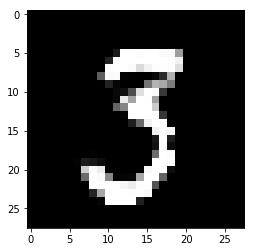

Number batches 468
79(0/468) D: 0.6515, G: 0.7731
79(1/468) D: 0.6581, G: 0.9413
79(2/468) D: 0.5960, G: 0.9688
79(3/468) D: 0.6408, G: 0.8930
79(4/468) D: 0.5775, G: 0.9850
79(5/468) D: 0.6339, G: 0.9830
79(6/468) D: 0.6112, G: 1.0129
79(7/468) D: 0.5528, G: 1.0277
79(8/468) D: 0.6054, G: 0.9001
79(9/468) D: 0.6604, G: 0.8788
79(10/468) D: 0.6317, G: 0.8867
79(11/468) D: 0.5978, G: 1.1448
79(12/468) D: 0.5972, G: 1.0055
79(13/468) D: 0.6161, G: 0.8675
79(14/468) D: 0.6008, G: 0.9527
79(15/468) D: 0.7048, G: 0.8918
79(16/468) D: 0.6431, G: 0.9792
79(17/468) D: 0.6167, G: 0.9480
79(18/468) D: 0.6332, G: 0.9625
79(19/468) D: 0.6324, G: 0.8802
79(20/468) D: 0.5981, G: 0.9243
79(21/468) D: 0.6142, G: 1.0481
79(22/468) D: 0.6335, G: 0.8974
79(23/468) D: 0.6112, G: 0.8773
79(24/468) D: 0.5744, G: 0.8204
79(25/468) D: 0.6744, G: 0.9939
79(26/468) D: 0.6374, G: 0.8678
79(27/468) D: 0.6319, G: 1.0012
79(28/468) D: 0.6232, G: 0.9856
79(29/468) D: 0.6040, G: 0.8013
79(30/468) D: 0.6318, G: 0.9755

79(252/468) D: 0.6061, G: 0.9572
79(253/468) D: 0.5907, G: 1.0056
79(254/468) D: 0.6415, G: 0.9662
79(255/468) D: 0.6832, G: 0.7944
79(256/468) D: 0.6299, G: 0.8914
79(257/468) D: 0.5688, G: 1.1133
79(258/468) D: 0.6628, G: 0.8170
79(259/468) D: 0.6112, G: 0.8937
79(260/468) D: 0.6106, G: 1.0104
79(261/468) D: 0.5775, G: 0.8359
79(262/468) D: 0.6262, G: 1.0169
79(263/468) D: 0.6309, G: 0.9425
79(264/468) D: 0.6790, G: 0.8705
79(265/468) D: 0.5998, G: 0.9035
79(266/468) D: 0.6120, G: 0.9734
79(267/468) D: 0.5625, G: 1.0165
79(268/468) D: 0.6397, G: 0.9370
79(269/468) D: 0.6220, G: 1.1177
79(270/468) D: 0.6588, G: 0.9763
79(271/468) D: 0.6370, G: 0.9066
79(272/468) D: 0.6292, G: 0.9054
79(273/468) D: 0.5902, G: 0.9380
79(274/468) D: 0.5694, G: 0.8628
79(275/468) D: 0.6005, G: 0.9934
79(276/468) D: 0.6210, G: 0.9824
79(277/468) D: 0.5663, G: 1.0058
79(278/468) D: 0.5603, G: 1.1269
79(279/468) D: 0.6244, G: 1.0349
79(280/468) D: 0.6273, G: 1.0157
79(281/468) D: 0.5992, G: 0.9411
79(282/468

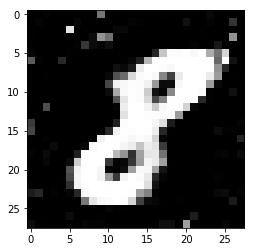

Number batches 468
80(0/468) D: 0.7059, G: 0.5930
80(1/468) D: 0.6745, G: 1.0166
80(2/468) D: 0.6205, G: 1.0913
80(3/468) D: 0.6155, G: 0.9314
80(4/468) D: 0.6205, G: 0.9670
80(5/468) D: 0.6325, G: 0.9411
80(6/468) D: 0.6327, G: 1.0407
80(7/468) D: 0.5560, G: 0.9499
80(8/468) D: 0.5993, G: 0.8487
80(9/468) D: 0.6791, G: 0.7937
80(10/468) D: 0.7048, G: 1.0069
80(11/468) D: 0.5660, G: 0.9661
80(12/468) D: 0.5960, G: 1.0191
80(13/468) D: 0.6216, G: 0.9014
80(14/468) D: 0.6405, G: 0.9218
80(15/468) D: 0.6397, G: 0.9453
80(16/468) D: 0.5998, G: 0.8799
80(17/468) D: 0.6142, G: 0.9010
80(18/468) D: 0.6305, G: 0.9753
80(19/468) D: 0.6512, G: 0.8261
80(20/468) D: 0.6390, G: 0.9227
80(21/468) D: 0.6090, G: 1.0122
80(22/468) D: 0.6258, G: 0.8320
80(23/468) D: 0.5982, G: 0.8706
80(24/468) D: 0.6086, G: 1.0715
80(25/468) D: 0.6242, G: 0.7861
80(26/468) D: 0.6199, G: 1.0636
80(27/468) D: 0.6071, G: 0.9945
80(28/468) D: 0.6530, G: 0.9857
80(29/468) D: 0.6039, G: 0.8732
80(30/468) D: 0.6102, G: 0.7779

80(253/468) D: 0.6138, G: 0.9202
80(254/468) D: 0.6358, G: 1.0503
80(255/468) D: 0.6359, G: 0.8451
80(256/468) D: 0.6391, G: 0.9232
80(257/468) D: 0.5600, G: 1.0677
80(258/468) D: 0.6153, G: 0.8643
80(259/468) D: 0.5606, G: 0.9173
80(260/468) D: 0.5751, G: 0.9682
80(261/468) D: 0.6517, G: 0.9445
80(262/468) D: 0.5954, G: 0.8410
80(263/468) D: 0.6179, G: 0.8568
80(264/468) D: 0.6923, G: 0.9267
80(265/468) D: 0.5950, G: 0.9436
80(266/468) D: 0.5897, G: 0.9807
80(267/468) D: 0.6181, G: 0.9525
80(268/468) D: 0.6149, G: 0.8361
80(269/468) D: 0.6441, G: 1.2406
80(270/468) D: 0.6303, G: 0.9483
80(271/468) D: 0.6078, G: 0.7259
80(272/468) D: 0.6680, G: 1.0775
80(273/468) D: 0.6287, G: 0.9053
80(274/468) D: 0.6022, G: 0.9349
80(275/468) D: 0.5443, G: 0.9417
80(276/468) D: 0.6006, G: 0.9010
80(277/468) D: 0.6106, G: 1.1347
80(278/468) D: 0.6223, G: 1.0103
80(279/468) D: 0.6856, G: 0.9327
80(280/468) D: 0.6368, G: 0.9369
80(281/468) D: 0.5695, G: 1.0755
80(282/468) D: 0.6448, G: 0.9341
80(283/468

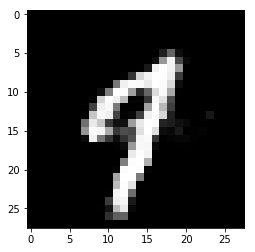

Number batches 468
81(0/468) D: 0.6493, G: 0.8897
81(1/468) D: 0.6751, G: 0.9979
81(2/468) D: 0.6532, G: 0.9058
81(3/468) D: 0.6035, G: 0.9699
81(4/468) D: 0.5911, G: 1.0730
81(5/468) D: 0.6184, G: 0.8792
81(6/468) D: 0.6309, G: 1.0776
81(7/468) D: 0.5918, G: 0.9471
81(8/468) D: 0.6194, G: 0.9770
81(9/468) D: 0.6626, G: 0.8723
81(10/468) D: 0.6802, G: 0.9449
81(11/468) D: 0.6039, G: 1.0590
81(12/468) D: 0.6112, G: 0.9013
81(13/468) D: 0.6068, G: 0.7817
81(14/468) D: 0.6009, G: 1.0545
81(15/468) D: 0.6627, G: 0.8551
81(16/468) D: 0.6528, G: 0.9974
81(17/468) D: 0.6218, G: 0.8205
81(18/468) D: 0.6463, G: 0.9918
81(19/468) D: 0.6626, G: 0.8967
81(20/468) D: 0.5740, G: 0.8986
81(21/468) D: 0.5953, G: 0.8732
81(22/468) D: 0.5954, G: 0.9414
81(23/468) D: 0.5735, G: 0.9026
81(24/468) D: 0.6066, G: 0.9680
81(25/468) D: 0.6295, G: 0.9085
81(26/468) D: 0.5752, G: 0.9891
81(27/468) D: 0.6110, G: 0.9129
81(28/468) D: 0.6271, G: 0.9737
81(29/468) D: 0.5835, G: 0.9388
81(30/468) D: 0.6421, G: 0.8250

81(252/468) D: 0.6189, G: 0.9024
81(253/468) D: 0.5974, G: 0.9644
81(254/468) D: 0.6286, G: 0.8533
81(255/468) D: 0.7120, G: 0.8686
81(256/468) D: 0.6416, G: 0.8872
81(257/468) D: 0.6074, G: 1.0110
81(258/468) D: 0.6417, G: 0.8622
81(259/468) D: 0.5872, G: 0.8470
81(260/468) D: 0.5868, G: 1.0986
81(261/468) D: 0.5954, G: 0.9911
81(262/468) D: 0.6070, G: 0.8482
81(263/468) D: 0.5895, G: 0.9108
81(264/468) D: 0.6355, G: 0.9873
81(265/468) D: 0.6051, G: 0.8771
81(266/468) D: 0.5899, G: 0.8517
81(267/468) D: 0.5768, G: 0.9829
81(268/468) D: 0.6414, G: 1.0289
81(269/468) D: 0.6290, G: 1.0573
81(270/468) D: 0.6588, G: 0.8817
81(271/468) D: 0.6394, G: 0.9118
81(272/468) D: 0.5957, G: 0.8792
81(273/468) D: 0.6269, G: 1.0680
81(274/468) D: 0.6232, G: 1.0162
81(275/468) D: 0.5503, G: 0.8638
81(276/468) D: 0.6068, G: 0.9903
81(277/468) D: 0.5651, G: 1.1323
81(278/468) D: 0.6129, G: 0.9319
81(279/468) D: 0.6548, G: 0.7144
81(280/468) D: 0.6522, G: 1.0652
81(281/468) D: 0.6170, G: 0.9166
81(282/468

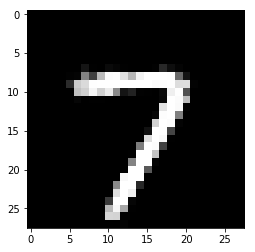

Number batches 468
82(0/468) D: 0.6777, G: 0.8171
82(1/468) D: 0.6493, G: 0.9863
82(2/468) D: 0.6158, G: 0.8987
82(3/468) D: 0.6196, G: 1.0154
82(4/468) D: 0.5935, G: 1.0649
82(5/468) D: 0.6317, G: 0.8980
82(6/468) D: 0.5833, G: 0.9808
82(7/468) D: 0.5718, G: 1.0213
82(8/468) D: 0.5921, G: 1.0385
82(9/468) D: 0.7123, G: 0.7844
82(10/468) D: 0.7040, G: 0.9635
82(11/468) D: 0.5937, G: 0.9930
82(12/468) D: 0.6180, G: 0.9505
82(13/468) D: 0.6027, G: 0.9329
82(14/468) D: 0.6264, G: 0.9998
82(15/468) D: 0.6766, G: 0.9791
82(16/468) D: 0.6167, G: 0.7805
82(17/468) D: 0.6175, G: 0.8054
82(18/468) D: 0.6155, G: 0.8812
82(19/468) D: 0.6013, G: 0.8978
82(20/468) D: 0.5897, G: 1.0222
82(21/468) D: 0.6004, G: 0.8428
82(22/468) D: 0.6039, G: 0.9589
82(23/468) D: 0.6128, G: 1.0133
82(24/468) D: 0.5911, G: 0.8503
82(25/468) D: 0.6371, G: 1.0140
82(26/468) D: 0.6039, G: 1.1754
82(27/468) D: 0.5984, G: 0.8300
82(28/468) D: 0.5985, G: 0.8256
82(29/468) D: 0.5899, G: 0.9903
82(30/468) D: 0.5914, G: 0.9007

82(253/468) D: 0.6264, G: 0.9750
82(254/468) D: 0.6476, G: 1.0254
82(255/468) D: 0.6833, G: 0.8313
82(256/468) D: 0.6089, G: 0.8336
82(257/468) D: 0.6168, G: 1.0823
82(258/468) D: 0.6424, G: 0.9375
82(259/468) D: 0.5952, G: 0.8866
82(260/468) D: 0.5762, G: 0.9782
82(261/468) D: 0.6587, G: 1.0370
82(262/468) D: 0.5751, G: 0.7841
82(263/468) D: 0.6150, G: 0.8369
82(264/468) D: 0.6538, G: 0.9708
82(265/468) D: 0.6141, G: 0.9938
82(266/468) D: 0.6316, G: 0.9038
82(267/468) D: 0.6169, G: 1.0447
82(268/468) D: 0.6275, G: 0.8754
82(269/468) D: 0.6177, G: 0.8948
82(270/468) D: 0.5977, G: 0.9870
82(271/468) D: 0.6788, G: 1.0112
82(272/468) D: 0.6286, G: 0.9137
82(273/468) D: 0.5965, G: 0.9738
82(274/468) D: 0.5686, G: 1.0124
82(275/468) D: 0.5654, G: 0.9489
82(276/468) D: 0.6121, G: 0.9448
82(277/468) D: 0.5853, G: 1.1648
82(278/468) D: 0.5914, G: 1.0255
82(279/468) D: 0.6732, G: 0.7089
82(280/468) D: 0.6643, G: 1.0374
82(281/468) D: 0.6192, G: 1.0704
82(282/468) D: 0.6717, G: 1.0040
82(283/468

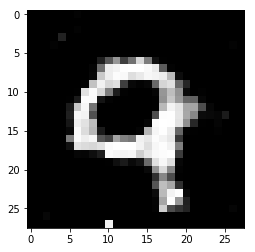

Number batches 468
83(0/468) D: 0.6710, G: 0.8509
83(1/468) D: 0.6373, G: 0.9956
83(2/468) D: 0.6365, G: 0.8853
83(3/468) D: 0.6162, G: 0.9041
83(4/468) D: 0.6173, G: 0.8930
83(5/468) D: 0.6044, G: 0.8514
83(6/468) D: 0.5990, G: 0.9478
83(7/468) D: 0.5798, G: 0.9137
83(8/468) D: 0.6047, G: 0.9192
83(9/468) D: 0.6708, G: 0.9461
83(10/468) D: 0.6347, G: 0.9274
83(11/468) D: 0.5706, G: 0.9863
83(12/468) D: 0.6080, G: 0.9650
83(13/468) D: 0.5887, G: 0.8754
83(14/468) D: 0.6056, G: 1.0578
83(15/468) D: 0.6818, G: 0.8188
83(16/468) D: 0.6314, G: 0.8525
83(17/468) D: 0.5780, G: 0.9357
83(18/468) D: 0.6101, G: 0.8654
83(19/468) D: 0.6139, G: 0.9031
83(20/468) D: 0.6322, G: 1.1042
83(21/468) D: 0.6338, G: 1.0129
83(22/468) D: 0.6354, G: 1.0353
83(23/468) D: 0.5888, G: 0.7476
83(24/468) D: 0.5913, G: 0.8701
83(25/468) D: 0.6062, G: 0.9604
83(26/468) D: 0.6181, G: 0.9422
83(27/468) D: 0.5914, G: 1.1379
83(28/468) D: 0.6737, G: 0.9060
83(29/468) D: 0.6175, G: 0.9139
83(30/468) D: 0.6484, G: 0.9225

83(253/468) D: 0.6232, G: 0.9617
83(254/468) D: 0.6191, G: 0.9951
83(255/468) D: 0.6464, G: 0.9504
83(256/468) D: 0.6194, G: 0.8181
83(257/468) D: 0.5948, G: 1.0547
83(258/468) D: 0.6060, G: 0.8982
83(259/468) D: 0.5887, G: 0.9273
83(260/468) D: 0.5939, G: 0.9078
83(261/468) D: 0.5978, G: 0.8866
83(262/468) D: 0.6031, G: 0.9159
83(263/468) D: 0.6485, G: 0.9976
83(264/468) D: 0.6419, G: 0.9091
83(265/468) D: 0.6170, G: 0.8851
83(266/468) D: 0.5906, G: 0.9529
83(267/468) D: 0.6301, G: 1.0747
83(268/468) D: 0.6828, G: 0.9711
83(269/468) D: 0.6271, G: 1.0296
83(270/468) D: 0.6898, G: 0.8777
83(271/468) D: 0.6395, G: 0.7984
83(272/468) D: 0.6579, G: 1.0735
83(273/468) D: 0.6414, G: 0.9562
83(274/468) D: 0.5937, G: 0.8654
83(275/468) D: 0.6010, G: 1.0149
83(276/468) D: 0.6259, G: 0.9836
83(277/468) D: 0.6174, G: 0.9320
83(278/468) D: 0.6327, G: 0.9766
83(279/468) D: 0.6883, G: 0.9139
83(280/468) D: 0.5975, G: 0.9246
83(281/468) D: 0.5630, G: 0.9793
83(282/468) D: 0.6372, G: 0.9601
83(283/468

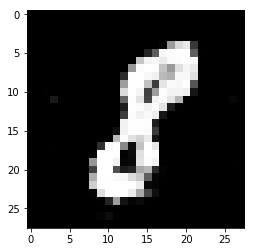

Number batches 468
84(0/468) D: 0.6658, G: 0.9219
84(1/468) D: 0.6859, G: 0.8622
84(2/468) D: 0.6287, G: 0.8488
84(3/468) D: 0.6258, G: 1.0649
84(4/468) D: 0.5775, G: 0.9285
84(5/468) D: 0.5846, G: 0.8195
84(6/468) D: 0.5538, G: 0.8722
84(7/468) D: 0.5966, G: 1.2807
84(8/468) D: 0.6153, G: 0.7592
84(9/468) D: 0.7627, G: 0.8391
84(10/468) D: 0.7163, G: 1.0549
84(11/468) D: 0.5985, G: 1.0079
84(12/468) D: 0.6275, G: 0.8833
84(13/468) D: 0.5948, G: 0.8048
84(14/468) D: 0.6320, G: 0.9706
84(15/468) D: 0.6649, G: 1.0413
84(16/468) D: 0.6069, G: 0.8838
84(17/468) D: 0.6110, G: 0.9091
84(18/468) D: 0.6325, G: 0.9297
84(19/468) D: 0.6371, G: 0.9103
84(20/468) D: 0.5721, G: 0.9336
84(21/468) D: 0.5639, G: 1.0333
84(22/468) D: 0.6285, G: 1.0229
84(23/468) D: 0.6185, G: 0.8892
84(24/468) D: 0.5774, G: 0.8558
84(25/468) D: 0.6371, G: 0.9156
84(26/468) D: 0.6041, G: 1.0741
84(27/468) D: 0.5912, G: 0.9595
84(28/468) D: 0.6101, G: 0.9230
84(29/468) D: 0.6022, G: 1.0516
84(30/468) D: 0.6647, G: 0.9477

84(253/468) D: 0.6442, G: 1.0510
84(254/468) D: 0.6289, G: 0.9234
84(255/468) D: 0.6844, G: 0.7151
84(256/468) D: 0.6358, G: 0.9147
84(257/468) D: 0.6245, G: 1.0029
84(258/468) D: 0.6261, G: 0.8792
84(259/468) D: 0.5807, G: 0.9763
84(260/468) D: 0.5651, G: 1.0360
84(261/468) D: 0.5719, G: 0.8890
84(262/468) D: 0.6155, G: 1.0931
84(263/468) D: 0.6483, G: 0.8881
84(264/468) D: 0.6738, G: 0.9347
84(265/468) D: 0.5932, G: 1.0742
84(266/468) D: 0.6035, G: 0.8998
84(267/468) D: 0.6270, G: 0.8040
84(268/468) D: 0.6230, G: 0.9791
84(269/468) D: 0.6174, G: 1.1191
84(270/468) D: 0.6342, G: 0.8042
84(271/468) D: 0.6170, G: 0.8906
84(272/468) D: 0.6005, G: 0.9844
84(273/468) D: 0.6184, G: 0.9516
84(274/468) D: 0.6067, G: 0.8102
84(275/468) D: 0.6332, G: 1.1706
84(276/468) D: 0.6271, G: 0.8291
84(277/468) D: 0.5831, G: 0.8612
84(278/468) D: 0.5650, G: 1.0750
84(279/468) D: 0.6381, G: 0.7791
84(280/468) D: 0.6623, G: 1.0464
84(281/468) D: 0.6068, G: 0.8760
84(282/468) D: 0.6505, G: 0.9719
84(283/468

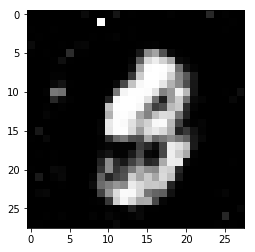

Number batches 468
85(0/468) D: 0.6560, G: 0.8009
85(1/468) D: 0.6855, G: 0.9311
85(2/468) D: 0.6321, G: 1.0623
85(3/468) D: 0.6152, G: 0.8910
85(4/468) D: 0.5880, G: 0.8985
85(5/468) D: 0.6382, G: 0.9156
85(6/468) D: 0.5886, G: 0.9881
85(7/468) D: 0.5874, G: 0.9557
85(8/468) D: 0.6203, G: 0.9773
85(9/468) D: 0.6776, G: 0.8605
85(10/468) D: 0.6715, G: 0.9590
85(11/468) D: 0.6355, G: 1.0856
85(12/468) D: 0.5529, G: 0.9775
85(13/468) D: 0.6348, G: 0.9037
85(14/468) D: 0.5901, G: 0.8384
85(15/468) D: 0.6853, G: 1.0241
85(16/468) D: 0.6108, G: 1.0411
85(17/468) D: 0.6094, G: 0.9743
85(18/468) D: 0.6587, G: 0.9213
85(19/468) D: 0.6476, G: 1.0250
85(20/468) D: 0.6127, G: 0.8779
85(21/468) D: 0.6392, G: 0.9441
85(22/468) D: 0.6094, G: 0.9611
85(23/468) D: 0.6245, G: 0.9237
85(24/468) D: 0.5997, G: 0.9282
85(25/468) D: 0.6201, G: 0.8563
85(26/468) D: 0.6326, G: 1.1961
85(27/468) D: 0.6123, G: 0.9253
85(28/468) D: 0.6112, G: 0.9209
85(29/468) D: 0.6205, G: 0.9562
85(30/468) D: 0.6200, G: 0.8095

85(252/468) D: 0.6275, G: 1.0205
85(253/468) D: 0.6241, G: 0.9805
85(254/468) D: 0.6354, G: 0.8156
85(255/468) D: 0.6758, G: 0.9274
85(256/468) D: 0.6068, G: 0.9077
85(257/468) D: 0.5844, G: 1.1599
85(258/468) D: 0.6682, G: 0.7527
85(259/468) D: 0.5983, G: 0.8862
85(260/468) D: 0.5633, G: 1.1696
85(261/468) D: 0.6304, G: 0.8622
85(262/468) D: 0.6032, G: 0.8815
85(263/468) D: 0.6612, G: 0.9653
85(264/468) D: 0.6828, G: 0.9175
85(265/468) D: 0.6101, G: 0.9488
85(266/468) D: 0.6031, G: 0.8759
85(267/468) D: 0.5994, G: 0.9579
85(268/468) D: 0.6317, G: 0.8365
85(269/468) D: 0.6067, G: 1.0078
85(270/468) D: 0.6389, G: 0.9650
85(271/468) D: 0.6337, G: 0.8025
85(272/468) D: 0.5968, G: 0.9696
85(273/468) D: 0.6237, G: 1.0828
85(274/468) D: 0.5655, G: 0.8580
85(275/468) D: 0.5921, G: 0.9502
85(276/468) D: 0.6037, G: 1.0378
85(277/468) D: 0.5813, G: 0.9700
85(278/468) D: 0.5909, G: 1.0432
85(279/468) D: 0.6899, G: 0.9290
85(280/468) D: 0.5779, G: 0.8363
85(281/468) D: 0.5777, G: 1.1750
85(282/468

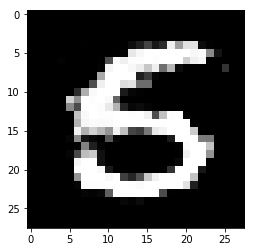

Number batches 468
86(0/468) D: 0.6579, G: 0.9146
86(1/468) D: 0.6322, G: 0.8809
86(2/468) D: 0.6277, G: 1.0635
86(3/468) D: 0.5761, G: 0.8854
86(4/468) D: 0.5460, G: 0.9459
86(5/468) D: 0.5849, G: 1.0208
86(6/468) D: 0.6107, G: 1.1467
86(7/468) D: 0.5721, G: 1.0358
86(8/468) D: 0.5934, G: 0.8834
86(9/468) D: 0.6890, G: 0.9998
86(10/468) D: 0.6639, G: 0.9300
86(11/468) D: 0.5554, G: 0.9958
86(12/468) D: 0.5918, G: 0.9085
86(13/468) D: 0.6195, G: 0.9059
86(14/468) D: 0.6618, G: 1.1630
86(15/468) D: 0.6560, G: 0.9198
86(16/468) D: 0.5743, G: 0.7836
86(17/468) D: 0.6761, G: 0.9091
86(18/468) D: 0.6077, G: 0.9860
86(19/468) D: 0.6443, G: 0.7844
86(20/468) D: 0.6157, G: 1.0203
86(21/468) D: 0.6364, G: 1.0407
86(22/468) D: 0.6019, G: 0.9444
86(23/468) D: 0.6022, G: 0.8313
86(24/468) D: 0.5451, G: 0.9577
86(25/468) D: 0.5925, G: 0.8254
86(26/468) D: 0.5924, G: 1.0596
86(27/468) D: 0.5834, G: 1.0202
86(28/468) D: 0.6295, G: 0.7692
86(29/468) D: 0.6394, G: 1.0715
86(30/468) D: 0.6439, G: 1.0982

86(252/468) D: 0.5799, G: 1.0227
86(253/468) D: 0.6237, G: 1.0845
86(254/468) D: 0.6072, G: 0.9064
86(255/468) D: 0.6519, G: 0.7516
86(256/468) D: 0.6407, G: 0.9866
86(257/468) D: 0.5940, G: 1.0804
86(258/468) D: 0.6299, G: 0.8156
86(259/468) D: 0.5893, G: 0.8739
86(260/468) D: 0.5888, G: 1.1317
86(261/468) D: 0.5985, G: 0.8923
86(262/468) D: 0.5922, G: 0.8884
86(263/468) D: 0.6189, G: 0.9282
86(264/468) D: 0.6397, G: 0.9416
86(265/468) D: 0.6281, G: 0.8988
86(266/468) D: 0.6282, G: 0.8180
86(267/468) D: 0.6191, G: 1.0801
86(268/468) D: 0.6511, G: 0.7709
86(269/468) D: 0.6457, G: 1.0332
86(270/468) D: 0.6411, G: 0.9904
86(271/468) D: 0.6353, G: 0.9232
86(272/468) D: 0.5891, G: 0.8948
86(273/468) D: 0.5887, G: 0.8952
86(274/468) D: 0.5892, G: 1.0843
86(275/468) D: 0.5616, G: 0.9843
86(276/468) D: 0.6077, G: 0.8372
86(277/468) D: 0.6326, G: 1.0193
86(278/468) D: 0.6401, G: 1.0231
86(279/468) D: 0.6641, G: 0.8125
86(280/468) D: 0.6153, G: 0.8124
86(281/468) D: 0.5839, G: 0.9884
86(282/468

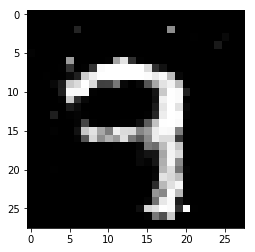

Number batches 468
87(0/468) D: 0.6589, G: 0.8617
87(1/468) D: 0.6251, G: 1.0281
87(2/468) D: 0.6390, G: 0.8903
87(3/468) D: 0.6047, G: 0.8991
87(4/468) D: 0.5814, G: 1.1635
87(5/468) D: 0.6177, G: 0.8581
87(6/468) D: 0.5984, G: 0.9320
87(7/468) D: 0.5617, G: 0.9774
87(8/468) D: 0.6320, G: 0.9360
87(9/468) D: 0.7084, G: 1.0140
87(10/468) D: 0.6627, G: 0.9797
87(11/468) D: 0.5972, G: 1.0222
87(12/468) D: 0.5827, G: 0.9110
87(13/468) D: 0.6215, G: 0.8762
87(14/468) D: 0.5996, G: 1.0527
87(15/468) D: 0.6602, G: 0.7926
87(16/468) D: 0.6656, G: 1.0838
87(17/468) D: 0.6686, G: 0.9223
87(18/468) D: 0.6336, G: 0.7326
87(19/468) D: 0.6236, G: 0.8494
87(20/468) D: 0.6118, G: 1.0526
87(21/468) D: 0.5953, G: 1.0149
87(22/468) D: 0.6338, G: 0.8477
87(23/468) D: 0.5870, G: 1.0118
87(24/468) D: 0.5815, G: 1.0817
87(25/468) D: 0.6538, G: 0.8012
87(26/468) D: 0.6239, G: 0.9865
87(27/468) D: 0.6073, G: 1.0887
87(28/468) D: 0.6311, G: 0.8585
87(29/468) D: 0.6227, G: 0.8759
87(30/468) D: 0.6240, G: 0.9161

87(253/468) D: 0.5763, G: 0.9982
87(254/468) D: 0.6382, G: 0.9483
87(255/468) D: 0.6844, G: 0.8605
87(256/468) D: 0.6276, G: 0.8405
87(257/468) D: 0.6024, G: 1.0399
87(258/468) D: 0.6015, G: 0.8820
87(259/468) D: 0.5919, G: 0.9917
87(260/468) D: 0.5791, G: 0.8681
87(261/468) D: 0.6064, G: 0.9393
87(262/468) D: 0.6322, G: 0.8923
87(263/468) D: 0.6323, G: 0.8694
87(264/468) D: 0.6288, G: 0.9088
87(265/468) D: 0.5932, G: 1.0599
87(266/468) D: 0.6415, G: 0.8393
87(267/468) D: 0.6084, G: 0.9855
87(268/468) D: 0.6401, G: 1.0325
87(269/468) D: 0.6043, G: 0.8868
87(270/468) D: 0.6042, G: 0.8941
87(271/468) D: 0.6395, G: 0.9313
87(272/468) D: 0.5708, G: 0.9606
87(273/468) D: 0.6212, G: 0.9814
87(274/468) D: 0.6042, G: 0.8992
87(275/468) D: 0.5685, G: 1.1069
87(276/468) D: 0.6653, G: 1.0512
87(277/468) D: 0.5638, G: 0.8709
87(278/468) D: 0.5623, G: 0.9954
87(279/468) D: 0.6737, G: 0.9196
87(280/468) D: 0.6140, G: 1.0381
87(281/468) D: 0.5578, G: 0.9070
87(282/468) D: 0.6839, G: 1.0274
87(283/468

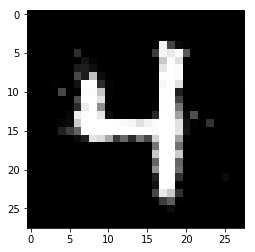

Number batches 468
88(0/468) D: 0.6694, G: 0.7108
88(1/468) D: 0.6634, G: 1.0012
88(2/468) D: 0.6101, G: 1.0625
88(3/468) D: 0.5905, G: 0.9340
88(4/468) D: 0.6048, G: 0.8600
88(5/468) D: 0.6281, G: 0.9825
88(6/468) D: 0.5999, G: 1.0431
88(7/468) D: 0.5860, G: 0.9625
88(8/468) D: 0.5914, G: 0.8836
88(9/468) D: 0.7005, G: 0.9776
88(10/468) D: 0.6439, G: 0.9503
88(11/468) D: 0.5703, G: 1.0053
88(12/468) D: 0.6109, G: 0.9943
88(13/468) D: 0.6303, G: 0.9082
88(14/468) D: 0.6459, G: 0.9242
88(15/468) D: 0.6563, G: 0.8808
88(16/468) D: 0.6134, G: 1.0508
88(17/468) D: 0.6055, G: 0.9480
88(18/468) D: 0.6014, G: 0.9674
88(19/468) D: 0.6899, G: 0.9963
88(20/468) D: 0.6319, G: 1.0039
88(21/468) D: 0.5973, G: 0.9765
88(22/468) D: 0.5991, G: 0.8037
88(23/468) D: 0.6131, G: 1.0233
88(24/468) D: 0.6147, G: 0.8047
88(25/468) D: 0.6506, G: 0.8628
88(26/468) D: 0.6292, G: 1.0964
88(27/468) D: 0.6195, G: 0.9194
88(28/468) D: 0.6204, G: 0.7677
88(29/468) D: 0.6404, G: 1.0204
88(30/468) D: 0.5924, G: 0.9177

88(253/468) D: 0.5901, G: 1.0487
88(254/468) D: 0.6498, G: 0.8654
88(255/468) D: 0.7210, G: 0.7866
88(256/468) D: 0.6363, G: 0.9675
88(257/468) D: 0.5948, G: 1.0790
88(258/468) D: 0.6206, G: 0.8372
88(259/468) D: 0.5867, G: 0.9061
88(260/468) D: 0.6243, G: 0.9052
88(261/468) D: 0.6172, G: 0.9224
88(262/468) D: 0.5969, G: 0.9436
88(263/468) D: 0.6430, G: 0.9665
88(264/468) D: 0.6663, G: 0.9546
88(265/468) D: 0.6612, G: 1.0028
88(266/468) D: 0.6252, G: 1.0141
88(267/468) D: 0.6168, G: 0.7924
88(268/468) D: 0.6274, G: 0.9547
88(269/468) D: 0.6208, G: 0.9959
88(270/468) D: 0.6045, G: 0.9615
88(271/468) D: 0.6012, G: 0.8280
88(272/468) D: 0.6115, G: 1.0670
88(273/468) D: 0.6316, G: 0.9823
88(274/468) D: 0.5906, G: 0.9679
88(275/468) D: 0.5913, G: 0.9521
88(276/468) D: 0.6473, G: 0.9385
88(277/468) D: 0.6035, G: 1.1052
88(278/468) D: 0.6053, G: 0.8625
88(279/468) D: 0.6563, G: 0.7584
88(280/468) D: 0.6208, G: 1.0510
88(281/468) D: 0.6280, G: 0.9946
88(282/468) D: 0.6363, G: 0.9402
88(283/468

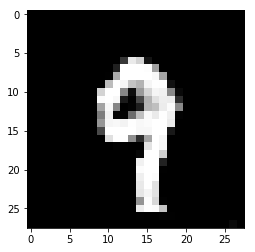

Number batches 468
89(0/468) D: 0.6613, G: 0.7022
89(1/468) D: 0.6139, G: 0.9604
89(2/468) D: 0.6370, G: 1.0551
89(3/468) D: 0.6453, G: 0.8742
89(4/468) D: 0.5735, G: 0.9271
89(5/468) D: 0.6337, G: 1.0165
89(6/468) D: 0.5659, G: 0.9684
89(7/468) D: 0.5975, G: 0.9635
89(8/468) D: 0.5429, G: 0.8558
89(9/468) D: 0.6762, G: 1.0109
89(10/468) D: 0.6536, G: 1.0756
89(11/468) D: 0.6225, G: 0.9884
89(12/468) D: 0.5745, G: 0.9666
89(13/468) D: 0.6165, G: 0.9884
89(14/468) D: 0.5813, G: 1.0527
89(15/468) D: 0.6734, G: 0.9122
89(16/468) D: 0.6423, G: 0.9626
89(17/468) D: 0.6419, G: 0.8230
89(18/468) D: 0.6811, G: 0.8774
89(19/468) D: 0.6502, G: 0.8206
89(20/468) D: 0.6138, G: 0.9746
89(21/468) D: 0.6073, G: 0.9562
89(22/468) D: 0.6075, G: 0.8358
89(23/468) D: 0.6011, G: 0.9475
89(24/468) D: 0.5777, G: 0.9911
89(25/468) D: 0.6222, G: 0.8045
89(26/468) D: 0.6216, G: 0.9815
89(27/468) D: 0.6062, G: 1.1402
89(28/468) D: 0.6169, G: 0.8333
89(29/468) D: 0.5959, G: 1.0192
89(30/468) D: 0.6227, G: 0.8862

89(252/468) D: 0.6048, G: 1.0681
89(253/468) D: 0.6119, G: 1.0063
89(254/468) D: 0.6667, G: 0.9727
89(255/468) D: 0.6955, G: 0.8618
89(256/468) D: 0.6991, G: 0.9707
89(257/468) D: 0.5864, G: 0.9639
89(258/468) D: 0.6474, G: 0.8060
89(259/468) D: 0.5783, G: 0.8816
89(260/468) D: 0.6128, G: 0.9318
89(261/468) D: 0.5750, G: 0.9948
89(262/468) D: 0.5746, G: 0.8312
89(263/468) D: 0.5827, G: 1.0882
89(264/468) D: 0.6726, G: 1.0773
89(265/468) D: 0.6154, G: 0.8111
89(266/468) D: 0.6263, G: 0.8890
89(267/468) D: 0.5789, G: 1.1224
89(268/468) D: 0.6081, G: 0.8760
89(269/468) D: 0.6184, G: 0.9782
89(270/468) D: 0.6335, G: 0.9956
89(271/468) D: 0.6229, G: 0.8967
89(272/468) D: 0.6142, G: 0.8360
89(273/468) D: 0.6266, G: 0.9937
89(274/468) D: 0.5885, G: 0.9894
89(275/468) D: 0.6161, G: 1.0944
89(276/468) D: 0.6030, G: 0.8238
89(277/468) D: 0.6169, G: 0.9780
89(278/468) D: 0.5891, G: 0.8911
89(279/468) D: 0.6738, G: 0.8668
89(280/468) D: 0.6236, G: 0.9766
89(281/468) D: 0.5560, G: 0.9900
89(282/468

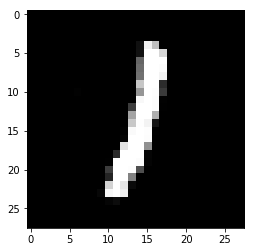

Number batches 468
90(0/468) D: 0.6378, G: 0.8283
90(1/468) D: 0.6598, G: 0.9715
90(2/468) D: 0.6432, G: 0.9299
90(3/468) D: 0.6014, G: 0.8354
90(4/468) D: 0.5814, G: 1.0293
90(5/468) D: 0.5674, G: 0.9749
90(6/468) D: 0.5862, G: 0.9240
90(7/468) D: 0.5744, G: 1.3029
90(8/468) D: 0.5871, G: 0.7475
90(9/468) D: 0.7587, G: 1.0478
90(10/468) D: 0.7006, G: 1.0145
90(11/468) D: 0.5917, G: 1.0043
90(12/468) D: 0.6134, G: 0.8899
90(13/468) D: 0.6108, G: 0.8764
90(14/468) D: 0.6244, G: 0.8891
90(15/468) D: 0.7017, G: 1.0056
90(16/468) D: 0.6300, G: 0.9202
90(17/468) D: 0.5862, G: 0.9672
90(18/468) D: 0.6407, G: 0.8226
90(19/468) D: 0.6498, G: 0.9923
90(20/468) D: 0.6178, G: 0.9647
90(21/468) D: 0.6231, G: 0.9031
90(22/468) D: 0.6472, G: 0.9676
90(23/468) D: 0.6139, G: 0.8516
90(24/468) D: 0.6320, G: 0.9868
90(25/468) D: 0.6453, G: 0.8138
90(26/468) D: 0.6047, G: 0.9810
90(27/468) D: 0.5732, G: 0.9838
90(28/468) D: 0.6174, G: 1.0498
90(29/468) D: 0.6320, G: 0.8620
90(30/468) D: 0.6314, G: 1.0220

90(253/468) D: 0.6163, G: 1.0723
90(254/468) D: 0.6718, G: 0.9789
90(255/468) D: 0.7079, G: 0.7830
90(256/468) D: 0.6435, G: 0.9419
90(257/468) D: 0.6165, G: 1.0937
90(258/468) D: 0.6305, G: 0.7804
90(259/468) D: 0.6130, G: 0.8427
90(260/468) D: 0.6637, G: 1.0298
90(261/468) D: 0.5922, G: 0.8707
90(262/468) D: 0.6035, G: 0.9090
90(263/468) D: 0.6564, G: 0.9637
90(264/468) D: 0.6186, G: 0.8603
90(265/468) D: 0.6374, G: 0.9919
90(266/468) D: 0.6274, G: 0.9498
90(267/468) D: 0.6232, G: 1.0984
90(268/468) D: 0.6492, G: 0.9093
90(269/468) D: 0.6338, G: 0.8823
90(270/468) D: 0.6274, G: 0.8579
90(271/468) D: 0.5945, G: 0.8331
90(272/468) D: 0.6181, G: 0.8720
90(273/468) D: 0.6198, G: 1.0724
90(274/468) D: 0.5906, G: 0.8956
90(275/468) D: 0.5819, G: 0.9458
90(276/468) D: 0.6074, G: 0.8999
90(277/468) D: 0.6062, G: 1.0773
90(278/468) D: 0.5964, G: 1.0565
90(279/468) D: 0.6668, G: 0.7367
90(280/468) D: 0.6276, G: 0.9805
90(281/468) D: 0.5896, G: 1.0275
90(282/468) D: 0.6399, G: 1.0546
90(283/468

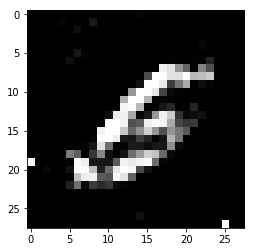

Number batches 468
91(0/468) D: 0.6748, G: 0.7719
91(1/468) D: 0.6329, G: 0.8572
91(2/468) D: 0.6085, G: 0.9560
91(3/468) D: 0.5696, G: 1.0370
91(4/468) D: 0.5892, G: 0.9052
91(5/468) D: 0.6170, G: 0.9067
91(6/468) D: 0.6139, G: 0.9692
91(7/468) D: 0.5727, G: 1.0474
91(8/468) D: 0.6545, G: 1.0322
91(9/468) D: 0.6743, G: 0.9102
91(10/468) D: 0.7104, G: 0.8457
91(11/468) D: 0.5687, G: 0.9102
91(12/468) D: 0.5937, G: 0.8778
91(13/468) D: 0.6270, G: 0.8572
91(14/468) D: 0.6427, G: 0.9382
91(15/468) D: 0.6519, G: 0.9410
91(16/468) D: 0.5738, G: 0.8839
91(17/468) D: 0.6338, G: 0.9592
91(18/468) D: 0.6120, G: 0.8003
91(19/468) D: 0.6232, G: 0.8141
91(20/468) D: 0.5938, G: 0.9533
91(21/468) D: 0.6208, G: 1.0308
91(22/468) D: 0.5989, G: 0.7840
91(23/468) D: 0.5681, G: 0.9502
91(24/468) D: 0.6151, G: 1.0119
91(25/468) D: 0.6291, G: 0.7764
91(26/468) D: 0.6170, G: 0.9670
91(27/468) D: 0.6111, G: 1.0534
91(28/468) D: 0.5869, G: 0.9620
91(29/468) D: 0.5613, G: 0.9269
91(30/468) D: 0.6678, G: 0.9253

91(253/468) D: 0.5816, G: 1.1217
91(254/468) D: 0.6282, G: 0.9972
91(255/468) D: 0.6677, G: 0.8032
91(256/468) D: 0.6442, G: 0.9152
91(257/468) D: 0.5698, G: 1.0981
91(258/468) D: 0.6406, G: 0.9396
91(259/468) D: 0.5976, G: 0.7923
91(260/468) D: 0.6279, G: 0.9306
91(261/468) D: 0.5831, G: 0.9811
91(262/468) D: 0.5820, G: 0.8639
91(263/468) D: 0.6237, G: 1.0471
91(264/468) D: 0.6823, G: 0.9519
91(265/468) D: 0.6307, G: 1.0110
91(266/468) D: 0.6257, G: 1.1131
91(267/468) D: 0.5787, G: 0.8721
91(268/468) D: 0.6253, G: 0.8649
91(269/468) D: 0.5703, G: 1.0582
91(270/468) D: 0.5934, G: 0.9833
91(271/468) D: 0.6343, G: 0.9417
91(272/468) D: 0.6112, G: 1.1069
91(273/468) D: 0.6104, G: 0.8687
91(274/468) D: 0.6008, G: 0.9835
91(275/468) D: 0.5533, G: 1.0160
91(276/468) D: 0.6122, G: 0.9639
91(277/468) D: 0.5799, G: 1.0329
91(278/468) D: 0.6016, G: 1.0449
91(279/468) D: 0.6604, G: 0.7799
91(280/468) D: 0.6077, G: 0.9362
91(281/468) D: 0.5909, G: 1.2023
91(282/468) D: 0.6888, G: 0.9066
91(283/468

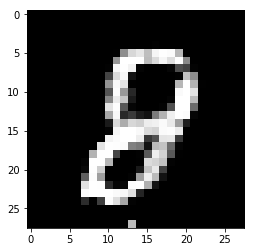

Number batches 468
92(0/468) D: 0.7285, G: 0.7299
92(1/468) D: 0.6750, G: 0.8889
92(2/468) D: 0.6318, G: 0.8818
92(3/468) D: 0.6548, G: 0.8933
92(4/468) D: 0.5704, G: 0.9664
92(5/468) D: 0.5941, G: 0.8717
92(6/468) D: 0.6003, G: 0.9441
92(7/468) D: 0.5761, G: 1.0790
92(8/468) D: 0.6217, G: 0.9555
92(9/468) D: 0.7102, G: 0.9545
92(10/468) D: 0.6648, G: 1.0527
92(11/468) D: 0.6229, G: 1.1001
92(12/468) D: 0.6206, G: 0.9378
92(13/468) D: 0.6168, G: 0.7413
92(14/468) D: 0.6302, G: 0.9419
92(15/468) D: 0.6839, G: 0.9845
92(16/468) D: 0.6392, G: 0.9048
92(17/468) D: 0.5774, G: 0.8427
92(18/468) D: 0.6479, G: 1.0103
92(19/468) D: 0.6253, G: 1.0107
92(20/468) D: 0.6284, G: 1.0012
92(21/468) D: 0.5778, G: 0.9830
92(22/468) D: 0.6233, G: 0.9178
92(23/468) D: 0.6104, G: 0.9573
92(24/468) D: 0.6141, G: 0.9728
92(25/468) D: 0.6491, G: 0.7397
92(26/468) D: 0.6216, G: 1.0608
92(27/468) D: 0.5997, G: 0.9319
92(28/468) D: 0.6008, G: 0.9614
92(29/468) D: 0.6409, G: 0.7977
92(30/468) D: 0.6193, G: 0.9879

92(252/468) D: 0.6228, G: 0.9968
92(253/468) D: 0.5665, G: 0.9586
92(254/468) D: 0.6215, G: 0.8549
92(255/468) D: 0.7056, G: 0.9453
92(256/468) D: 0.6247, G: 0.9485
92(257/468) D: 0.6003, G: 1.0328
92(258/468) D: 0.6928, G: 0.8656
92(259/468) D: 0.6129, G: 0.8802
92(260/468) D: 0.6227, G: 0.9928
92(261/468) D: 0.5820, G: 0.8164
92(262/468) D: 0.6136, G: 0.8865
92(263/468) D: 0.6474, G: 1.0043
92(264/468) D: 0.6946, G: 0.9271
92(265/468) D: 0.6583, G: 0.8518
92(266/468) D: 0.6428, G: 0.8744
92(267/468) D: 0.6032, G: 0.9606
92(268/468) D: 0.6227, G: 0.8262
92(269/468) D: 0.6245, G: 0.9864
92(270/468) D: 0.6875, G: 1.0086
92(271/468) D: 0.6036, G: 0.8108
92(272/468) D: 0.6235, G: 0.7744
92(273/468) D: 0.6667, G: 0.9905
92(274/468) D: 0.5905, G: 0.9852
92(275/468) D: 0.6018, G: 0.9188
92(276/468) D: 0.5939, G: 0.9171
92(277/468) D: 0.5785, G: 0.9240
92(278/468) D: 0.5925, G: 0.9147
92(279/468) D: 0.6458, G: 0.9126
92(280/468) D: 0.5995, G: 0.9090
92(281/468) D: 0.5851, G: 1.0108
92(282/468

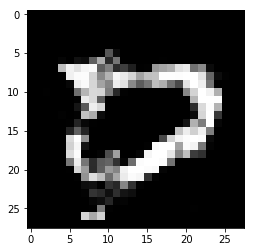

Number batches 468
93(0/468) D: 0.6420, G: 0.7149
93(1/468) D: 0.6433, G: 0.8812
93(2/468) D: 0.6176, G: 1.0951
93(3/468) D: 0.5758, G: 0.9091
93(4/468) D: 0.5726, G: 1.0589
93(5/468) D: 0.6130, G: 0.9718
93(6/468) D: 0.6160, G: 0.9480
93(7/468) D: 0.5905, G: 1.0442
93(8/468) D: 0.5779, G: 0.9777
93(9/468) D: 0.6391, G: 0.8474
93(10/468) D: 0.6754, G: 0.9954
93(11/468) D: 0.5532, G: 1.1559
93(12/468) D: 0.5858, G: 0.8458
93(13/468) D: 0.6685, G: 0.9668
93(14/468) D: 0.6219, G: 0.9539
93(15/468) D: 0.6819, G: 0.9346
93(16/468) D: 0.6031, G: 0.9484
93(17/468) D: 0.5664, G: 0.8432
93(18/468) D: 0.6317, G: 0.8941
93(19/468) D: 0.6469, G: 0.9488
93(20/468) D: 0.6488, G: 1.0714
93(21/468) D: 0.6353, G: 0.9221
93(22/468) D: 0.6234, G: 0.9269
93(23/468) D: 0.6153, G: 0.9158
93(24/468) D: 0.5568, G: 0.8726
93(25/468) D: 0.6352, G: 0.9637
93(26/468) D: 0.6205, G: 0.9949
93(27/468) D: 0.5893, G: 0.9892
93(28/468) D: 0.6230, G: 1.0300
93(29/468) D: 0.6454, G: 0.9190
93(30/468) D: 0.6155, G: 0.9277

93(253/468) D: 0.5806, G: 1.0814
93(254/468) D: 0.6026, G: 0.9040
93(255/468) D: 0.6701, G: 0.6754
93(256/468) D: 0.6610, G: 1.0001
93(257/468) D: 0.5968, G: 1.0842
93(258/468) D: 0.6251, G: 0.8406
93(259/468) D: 0.5872, G: 0.8460
93(260/468) D: 0.5991, G: 0.9849
93(261/468) D: 0.5816, G: 0.9481
93(262/468) D: 0.5923, G: 0.9117
93(263/468) D: 0.6646, G: 0.9452
93(264/468) D: 0.6840, G: 0.8959
93(265/468) D: 0.6071, G: 0.8700
93(266/468) D: 0.6121, G: 1.0706
93(267/468) D: 0.5919, G: 0.9942
93(268/468) D: 0.6377, G: 0.9025
93(269/468) D: 0.6025, G: 1.0459
93(270/468) D: 0.6731, G: 0.8785
93(271/468) D: 0.5761, G: 0.9214
93(272/468) D: 0.6002, G: 1.0300
93(273/468) D: 0.5861, G: 0.9383
93(274/468) D: 0.5750, G: 1.0023
93(275/468) D: 0.5805, G: 0.9857
93(276/468) D: 0.5665, G: 0.9370
93(277/468) D: 0.5962, G: 1.1703
93(278/468) D: 0.6120, G: 0.9588
93(279/468) D: 0.6793, G: 0.6849
93(280/468) D: 0.6657, G: 1.0989
93(281/468) D: 0.5449, G: 0.8573
93(282/468) D: 0.6471, G: 0.8222
93(283/468

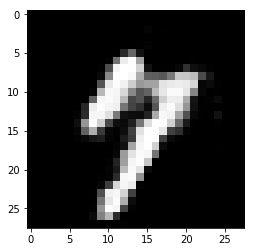

Number batches 468
94(0/468) D: 0.6458, G: 0.8953
94(1/468) D: 0.6520, G: 0.9208
94(2/468) D: 0.6601, G: 0.8922
94(3/468) D: 0.6206, G: 1.1213
94(4/468) D: 0.5781, G: 1.0021
94(5/468) D: 0.6201, G: 0.9261
94(6/468) D: 0.6098, G: 0.9316
94(7/468) D: 0.5983, G: 1.1148
94(8/468) D: 0.6023, G: 0.8161
94(9/468) D: 0.6834, G: 0.8864
94(10/468) D: 0.6688, G: 1.0084
94(11/468) D: 0.5938, G: 1.0172
94(12/468) D: 0.6018, G: 0.8962
94(13/468) D: 0.5831, G: 0.8828
94(14/468) D: 0.6280, G: 0.9871
94(15/468) D: 0.6685, G: 0.9337
94(16/468) D: 0.5813, G: 0.9221
94(17/468) D: 0.6485, G: 0.9151
94(18/468) D: 0.6030, G: 0.9677
94(19/468) D: 0.6167, G: 0.8642
94(20/468) D: 0.6315, G: 0.9370
94(21/468) D: 0.5985, G: 0.8722
94(22/468) D: 0.6539, G: 0.9321
94(23/468) D: 0.6282, G: 1.2161
94(24/468) D: 0.5997, G: 0.8433
94(25/468) D: 0.6831, G: 0.8487
94(26/468) D: 0.6476, G: 1.1966
94(27/468) D: 0.6112, G: 1.0306
94(28/468) D: 0.6109, G: 0.9212
94(29/468) D: 0.5944, G: 0.9158
94(30/468) D: 0.6364, G: 0.9302

94(252/468) D: 0.5975, G: 0.9636
94(253/468) D: 0.5792, G: 1.1946
94(254/468) D: 0.6304, G: 0.9338
94(255/468) D: 0.7066, G: 0.8700
94(256/468) D: 0.6548, G: 0.9814
94(257/468) D: 0.5888, G: 1.0223
94(258/468) D: 0.6172, G: 0.8746
94(259/468) D: 0.6097, G: 0.9373
94(260/468) D: 0.6116, G: 1.0661
94(261/468) D: 0.6438, G: 0.8919
94(262/468) D: 0.6085, G: 0.8659
94(263/468) D: 0.6575, G: 1.1318
94(264/468) D: 0.7023, G: 0.9696
94(265/468) D: 0.6342, G: 0.8588
94(266/468) D: 0.6194, G: 0.9551
94(267/468) D: 0.6157, G: 0.9534
94(268/468) D: 0.6042, G: 0.7952
94(269/468) D: 0.6253, G: 1.1643
94(270/468) D: 0.6474, G: 0.9901
94(271/468) D: 0.6517, G: 0.8881
94(272/468) D: 0.5994, G: 0.8815
94(273/468) D: 0.6629, G: 1.0245
94(274/468) D: 0.5817, G: 1.0299
94(275/468) D: 0.5855, G: 0.9571
94(276/468) D: 0.5984, G: 1.0225
94(277/468) D: 0.5949, G: 1.0015
94(278/468) D: 0.6179, G: 0.9706
94(279/468) D: 0.6762, G: 0.8750
94(280/468) D: 0.5894, G: 0.9326
94(281/468) D: 0.5773, G: 1.1254
94(282/468

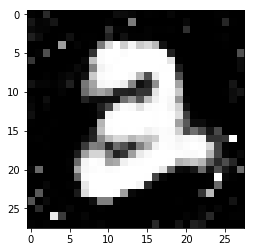

Number batches 468
95(0/468) D: 0.6673, G: 0.7950
95(1/468) D: 0.6330, G: 0.8686
95(2/468) D: 0.6484, G: 1.0268
95(3/468) D: 0.6244, G: 0.9763
95(4/468) D: 0.6140, G: 0.9804
95(5/468) D: 0.6247, G: 0.8913
95(6/468) D: 0.6020, G: 0.9624
95(7/468) D: 0.6002, G: 0.8836
95(8/468) D: 0.5935, G: 0.9480
95(9/468) D: 0.6890, G: 0.8693
95(10/468) D: 0.6865, G: 0.8222
95(11/468) D: 0.5931, G: 1.0416
95(12/468) D: 0.5749, G: 0.9184
95(13/468) D: 0.6336, G: 0.8686
95(14/468) D: 0.6207, G: 1.0111
95(15/468) D: 0.6854, G: 0.9690
95(16/468) D: 0.5843, G: 0.9786
95(17/468) D: 0.6128, G: 1.0478
95(18/468) D: 0.6109, G: 0.9665
95(19/468) D: 0.6405, G: 0.7988
95(20/468) D: 0.6557, G: 1.0283
95(21/468) D: 0.6231, G: 0.9585
95(22/468) D: 0.6184, G: 0.7918
95(23/468) D: 0.5824, G: 0.9838
95(24/468) D: 0.5941, G: 0.9798
95(25/468) D: 0.6575, G: 0.7433
95(26/468) D: 0.6171, G: 0.9720
95(27/468) D: 0.5843, G: 1.1623
95(28/468) D: 0.5950, G: 0.8827
95(29/468) D: 0.6380, G: 1.0109
95(30/468) D: 0.6262, G: 0.9144

95(252/468) D: 0.6360, G: 1.0196
95(253/468) D: 0.5897, G: 1.0128
95(254/468) D: 0.6321, G: 0.8617
95(255/468) D: 0.6604, G: 0.9655
95(256/468) D: 0.6406, G: 0.8531
95(257/468) D: 0.5663, G: 0.9968
95(258/468) D: 0.7087, G: 0.9665
95(259/468) D: 0.6092, G: 0.9114
95(260/468) D: 0.6087, G: 0.9335
95(261/468) D: 0.6221, G: 0.8930
95(262/468) D: 0.5966, G: 0.8968
95(263/468) D: 0.6324, G: 0.8750
95(264/468) D: 0.6456, G: 0.9211
95(265/468) D: 0.6160, G: 0.9920
95(266/468) D: 0.6042, G: 1.0301
95(267/468) D: 0.5999, G: 0.9835
95(268/468) D: 0.5883, G: 0.9366
95(269/468) D: 0.6010, G: 1.0428
95(270/468) D: 0.6424, G: 0.7805
95(271/468) D: 0.6557, G: 1.1122
95(272/468) D: 0.6127, G: 0.8551
95(273/468) D: 0.5913, G: 0.9235
95(274/468) D: 0.6239, G: 0.9398
95(275/468) D: 0.5952, G: 1.0053
95(276/468) D: 0.6371, G: 0.8520
95(277/468) D: 0.6076, G: 1.0609
95(278/468) D: 0.6064, G: 1.0341
95(279/468) D: 0.6277, G: 0.7914
95(280/468) D: 0.6226, G: 0.9741
95(281/468) D: 0.5615, G: 0.8328
95(282/468

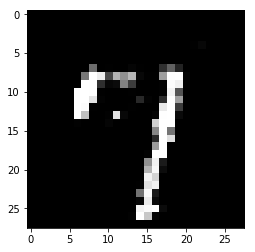

Number batches 468
96(0/468) D: 0.6646, G: 0.8012
96(1/468) D: 0.6682, G: 0.8653
96(2/468) D: 0.6357, G: 0.9691
96(3/468) D: 0.5930, G: 0.9768
96(4/468) D: 0.6118, G: 0.8380
96(5/468) D: 0.6227, G: 0.9534
96(6/468) D: 0.5755, G: 0.9954
96(7/468) D: 0.5885, G: 1.0187
96(8/468) D: 0.5912, G: 0.9689
96(9/468) D: 0.6969, G: 0.8646
96(10/468) D: 0.6314, G: 0.8342
96(11/468) D: 0.6417, G: 1.1221
96(12/468) D: 0.5962, G: 0.9990
96(13/468) D: 0.5646, G: 0.9155
96(14/468) D: 0.6507, G: 1.0119
96(15/468) D: 0.6766, G: 1.0097
96(16/468) D: 0.5881, G: 0.8528
96(17/468) D: 0.6229, G: 0.8638
96(18/468) D: 0.6578, G: 0.9770
96(19/468) D: 0.6290, G: 0.8787
96(20/468) D: 0.5875, G: 0.9801
96(21/468) D: 0.6118, G: 0.9251
96(22/468) D: 0.6059, G: 0.8822
96(23/468) D: 0.6155, G: 0.8645
96(24/468) D: 0.5588, G: 0.8244
96(25/468) D: 0.6289, G: 1.1114
96(26/468) D: 0.6110, G: 0.8683
96(27/468) D: 0.5901, G: 0.9754
96(28/468) D: 0.5926, G: 0.9570
96(29/468) D: 0.5886, G: 1.0201
96(30/468) D: 0.6608, G: 0.7739

96(253/468) D: 0.5926, G: 1.1234
96(254/468) D: 0.6516, G: 0.7806
96(255/468) D: 0.7195, G: 0.9500
96(256/468) D: 0.5829, G: 0.9135
96(257/468) D: 0.6194, G: 0.9930
96(258/468) D: 0.6579, G: 0.8392
96(259/468) D: 0.5770, G: 1.0338
96(260/468) D: 0.5988, G: 1.0107
96(261/468) D: 0.5706, G: 0.8992
96(262/468) D: 0.5906, G: 1.0212
96(263/468) D: 0.6235, G: 1.0092
96(264/468) D: 0.6865, G: 0.9361
96(265/468) D: 0.6227, G: 0.9343
96(266/468) D: 0.6205, G: 0.8850
96(267/468) D: 0.6034, G: 1.2473
96(268/468) D: 0.6617, G: 0.8839
96(269/468) D: 0.6098, G: 0.8891
96(270/468) D: 0.6043, G: 1.0511
96(271/468) D: 0.5925, G: 1.0354
96(272/468) D: 0.5982, G: 1.0385
96(273/468) D: 0.6049, G: 0.9505
96(274/468) D: 0.5712, G: 0.9075
96(275/468) D: 0.5923, G: 1.0170
96(276/468) D: 0.6284, G: 0.9635
96(277/468) D: 0.5781, G: 1.0999
96(278/468) D: 0.5869, G: 0.9955
96(279/468) D: 0.6256, G: 0.8269
96(280/468) D: 0.6608, G: 1.0378
96(281/468) D: 0.5801, G: 0.9771
96(282/468) D: 0.6562, G: 1.2280
96(283/468

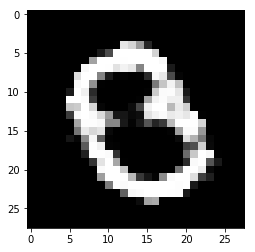

Number batches 468
97(0/468) D: 0.6886, G: 0.8025
97(1/468) D: 0.6938, G: 0.9526
97(2/468) D: 0.6396, G: 0.9577
97(3/468) D: 0.6076, G: 0.9897
97(4/468) D: 0.5849, G: 0.9744
97(5/468) D: 0.5993, G: 0.9485
97(6/468) D: 0.5933, G: 0.8908
97(7/468) D: 0.5967, G: 0.9727
97(8/468) D: 0.5954, G: 1.0574
97(9/468) D: 0.7349, G: 0.8631
97(10/468) D: 0.6623, G: 1.0145
97(11/468) D: 0.5482, G: 0.9472
97(12/468) D: 0.6046, G: 0.8643
97(13/468) D: 0.6096, G: 0.8773
97(14/468) D: 0.6028, G: 1.0696
97(15/468) D: 0.6101, G: 0.9246
97(16/468) D: 0.6248, G: 1.0084
97(17/468) D: 0.6107, G: 0.8616
97(18/468) D: 0.6474, G: 0.9897
97(19/468) D: 0.6428, G: 0.9091
97(20/468) D: 0.5932, G: 0.9157
97(21/468) D: 0.5936, G: 0.9082
97(22/468) D: 0.6351, G: 0.8287
97(23/468) D: 0.6170, G: 1.0425
97(24/468) D: 0.6369, G: 0.8637
97(25/468) D: 0.6708, G: 1.0581
97(26/468) D: 0.6175, G: 1.0448
97(27/468) D: 0.5669, G: 1.0178
97(28/468) D: 0.6435, G: 1.0664
97(29/468) D: 0.5686, G: 0.8765
97(30/468) D: 0.6231, G: 0.9865

97(252/468) D: 0.6384, G: 0.9289
97(253/468) D: 0.6128, G: 0.9893
97(254/468) D: 0.6382, G: 0.8988
97(255/468) D: 0.6644, G: 0.8035
97(256/468) D: 0.6256, G: 0.9506
97(257/468) D: 0.5996, G: 1.0768
97(258/468) D: 0.6407, G: 0.9192
97(259/468) D: 0.6492, G: 1.0520
97(260/468) D: 0.5747, G: 0.9675
97(261/468) D: 0.5705, G: 0.8720
97(262/468) D: 0.5944, G: 0.9003
97(263/468) D: 0.6625, G: 0.9282
97(264/468) D: 0.7193, G: 0.9875
97(265/468) D: 0.6306, G: 0.9304
97(266/468) D: 0.5968, G: 0.8737
97(267/468) D: 0.6154, G: 1.0199
97(268/468) D: 0.6641, G: 0.9176
97(269/468) D: 0.5776, G: 0.8752
97(270/468) D: 0.6380, G: 0.9408
97(271/468) D: 0.5882, G: 0.9207
97(272/468) D: 0.6213, G: 0.9400
97(273/468) D: 0.6107, G: 0.8871
97(274/468) D: 0.6139, G: 0.9492
97(275/468) D: 0.6055, G: 0.9517
97(276/468) D: 0.6110, G: 0.9134
97(277/468) D: 0.5792, G: 1.0047
97(278/468) D: 0.6018, G: 0.9613
97(279/468) D: 0.6501, G: 0.8631
97(280/468) D: 0.6310, G: 0.8765
97(281/468) D: 0.5569, G: 0.9168
97(282/468

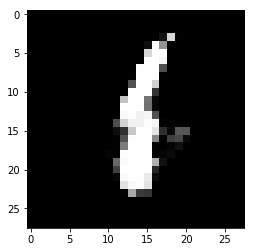

Number batches 468
98(0/468) D: 0.6369, G: 0.7107
98(1/468) D: 0.6739, G: 1.0304
98(2/468) D: 0.6445, G: 0.9935
98(3/468) D: 0.6055, G: 0.8775
98(4/468) D: 0.6175, G: 1.0412
98(5/468) D: 0.6289, G: 0.8882
98(6/468) D: 0.6248, G: 1.0409
98(7/468) D: 0.5639, G: 0.8455
98(8/468) D: 0.5949, G: 0.8905
98(9/468) D: 0.7073, G: 1.1268
98(10/468) D: 0.6566, G: 1.0124
98(11/468) D: 0.5834, G: 0.9322
98(12/468) D: 0.6039, G: 1.0922
98(13/468) D: 0.6224, G: 0.8647
98(14/468) D: 0.6127, G: 0.9232
98(15/468) D: 0.6487, G: 0.9592
98(16/468) D: 0.6116, G: 0.9873
98(17/468) D: 0.5935, G: 0.8350
98(18/468) D: 0.6332, G: 0.9299
98(19/468) D: 0.5918, G: 0.9103
98(20/468) D: 0.6137, G: 1.0312
98(21/468) D: 0.6196, G: 0.9937
98(22/468) D: 0.6310, G: 1.0381
98(23/468) D: 0.6290, G: 0.8262
98(24/468) D: 0.5744, G: 0.9217
98(25/468) D: 0.6442, G: 0.8802
98(26/468) D: 0.6229, G: 1.0355
98(27/468) D: 0.5585, G: 0.8483
98(28/468) D: 0.6146, G: 0.9269
98(29/468) D: 0.6397, G: 0.9725
98(30/468) D: 0.6157, G: 0.8290

98(252/468) D: 0.6258, G: 0.9734
98(253/468) D: 0.6068, G: 1.0162
98(254/468) D: 0.6373, G: 0.9702
98(255/468) D: 0.6729, G: 0.8556
98(256/468) D: 0.6452, G: 0.8774
98(257/468) D: 0.5918, G: 1.0139
98(258/468) D: 0.6376, G: 0.9587
98(259/468) D: 0.5793, G: 0.9009
98(260/468) D: 0.5919, G: 1.0693
98(261/468) D: 0.6015, G: 0.9910
98(262/468) D: 0.6061, G: 0.8691
98(263/468) D: 0.6508, G: 1.0892
98(264/468) D: 0.6423, G: 0.8471
98(265/468) D: 0.6064, G: 0.8898
98(266/468) D: 0.6321, G: 1.0460
98(267/468) D: 0.5971, G: 0.9858
98(268/468) D: 0.6106, G: 0.9194
98(269/468) D: 0.6291, G: 1.1179
98(270/468) D: 0.6215, G: 0.8642
98(271/468) D: 0.6260, G: 0.8650
98(272/468) D: 0.6550, G: 1.0178
98(273/468) D: 0.6432, G: 0.8760
98(274/468) D: 0.6030, G: 0.8830
98(275/468) D: 0.5556, G: 1.0838
98(276/468) D: 0.6426, G: 0.9455
98(277/468) D: 0.5886, G: 0.9152
98(278/468) D: 0.6085, G: 0.9898
98(279/468) D: 0.6552, G: 0.8177
98(280/468) D: 0.6166, G: 0.9375
98(281/468) D: 0.5612, G: 1.0493
98(282/468

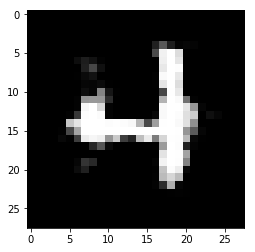

Number batches 468
99(0/468) D: 0.6697, G: 0.9396
99(1/468) D: 0.6497, G: 0.7739
99(2/468) D: 0.6582, G: 0.9246
99(3/468) D: 0.6200, G: 0.8777
99(4/468) D: 0.6052, G: 1.0038
99(5/468) D: 0.6471, G: 0.8719
99(6/468) D: 0.6028, G: 0.9262
99(7/468) D: 0.5870, G: 0.9959
99(8/468) D: 0.5785, G: 0.8550
99(9/468) D: 0.6811, G: 1.0751
99(10/468) D: 0.6498, G: 1.0246
99(11/468) D: 0.5828, G: 0.9420
99(12/468) D: 0.5529, G: 0.8987
99(13/468) D: 0.5780, G: 0.9669
99(14/468) D: 0.5767, G: 1.0554
99(15/468) D: 0.6849, G: 0.9471
99(16/468) D: 0.6249, G: 0.9060
99(17/468) D: 0.6202, G: 0.9569
99(18/468) D: 0.6288, G: 0.9756
99(19/468) D: 0.6364, G: 0.7854
99(20/468) D: 0.6013, G: 0.9663
99(21/468) D: 0.6548, G: 0.9522
99(22/468) D: 0.6258, G: 0.8794
99(23/468) D: 0.6070, G: 0.9969
99(24/468) D: 0.5603, G: 0.8813
99(25/468) D: 0.5970, G: 0.8544
99(26/468) D: 0.6328, G: 1.1422
99(27/468) D: 0.5822, G: 0.9777
99(28/468) D: 0.6036, G: 0.8437
99(29/468) D: 0.5821, G: 0.9560
99(30/468) D: 0.6184, G: 1.1179

99(253/468) D: 0.6233, G: 1.0313
99(254/468) D: 0.6522, G: 0.8152
99(255/468) D: 0.6950, G: 0.8184
99(256/468) D: 0.6150, G: 0.9795
99(257/468) D: 0.5907, G: 0.9847
99(258/468) D: 0.6336, G: 0.7876
99(259/468) D: 0.5555, G: 0.9474
99(260/468) D: 0.5906, G: 1.0593
99(261/468) D: 0.5926, G: 0.8408
99(262/468) D: 0.6057, G: 0.8559
99(263/468) D: 0.6185, G: 0.8115
99(264/468) D: 0.6410, G: 0.9004
99(265/468) D: 0.6113, G: 0.9850
99(266/468) D: 0.5814, G: 0.9351
99(267/468) D: 0.6176, G: 0.8713
99(268/468) D: 0.6344, G: 0.9612
99(269/468) D: 0.5803, G: 0.9290
99(270/468) D: 0.6623, G: 0.9274
99(271/468) D: 0.6469, G: 0.8679
99(272/468) D: 0.5974, G: 0.9799
99(273/468) D: 0.6445, G: 1.0161
99(274/468) D: 0.5500, G: 0.8724
99(275/468) D: 0.5753, G: 0.9985
99(276/468) D: 0.6162, G: 1.0346
99(277/468) D: 0.6026, G: 1.1320
99(278/468) D: 0.6337, G: 0.7917
99(279/468) D: 0.6876, G: 0.8700
99(280/468) D: 0.6504, G: 1.0121
99(281/468) D: 0.6055, G: 1.0672
99(282/468) D: 0.6462, G: 0.7915
99(283/468

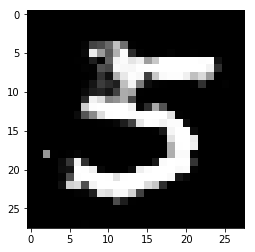

Number batches 468
100(0/468) D: 0.6895, G: 0.8852
100(1/468) D: 0.6966, G: 1.0008
100(2/468) D: 0.5677, G: 0.9205
100(3/468) D: 0.6404, G: 1.0328
100(4/468) D: 0.6342, G: 0.9847
100(5/468) D: 0.5983, G: 0.8974
100(6/468) D: 0.5859, G: 1.1911
100(7/468) D: 0.5967, G: 0.8781
100(8/468) D: 0.6202, G: 1.0692
100(9/468) D: 0.6733, G: 0.8931
100(10/468) D: 0.7119, G: 0.9779
100(11/468) D: 0.5911, G: 0.9849
100(12/468) D: 0.6186, G: 0.7880
100(13/468) D: 0.6219, G: 0.9917
100(14/468) D: 0.6168, G: 1.0443
100(15/468) D: 0.6856, G: 0.8825
100(16/468) D: 0.6125, G: 0.9211
100(17/468) D: 0.6064, G: 1.0133
100(18/468) D: 0.6133, G: 0.8411
100(19/468) D: 0.6644, G: 0.7449
100(20/468) D: 0.5952, G: 1.0348
100(21/468) D: 0.6021, G: 0.9259
100(22/468) D: 0.6288, G: 0.8842
100(23/468) D: 0.5932, G: 1.0201
100(24/468) D: 0.5830, G: 0.9736
100(25/468) D: 0.6209, G: 0.8433
100(26/468) D: 0.5830, G: 0.9959
100(27/468) D: 0.5660, G: 1.0620
100(28/468) D: 0.6036, G: 0.8364
100(29/468) D: 0.6111, G: 0.9322
1

100(244/468) D: 0.6581, G: 0.8410
100(245/468) D: 0.6300, G: 0.9433
100(246/468) D: 0.6430, G: 0.9500
100(247/468) D: 0.5835, G: 0.8277
100(248/468) D: 0.6082, G: 1.0560
100(249/468) D: 0.5971, G: 1.0198
100(250/468) D: 0.6237, G: 0.8837
100(251/468) D: 0.6619, G: 0.9439
100(252/468) D: 0.6750, G: 1.0295
100(253/468) D: 0.6103, G: 0.7918
100(254/468) D: 0.6323, G: 0.9242
100(255/468) D: 0.6098, G: 0.8433
100(256/468) D: 0.6190, G: 0.9587
100(257/468) D: 0.5830, G: 1.0443
100(258/468) D: 0.6111, G: 0.8488
100(259/468) D: 0.6260, G: 0.8985
100(260/468) D: 0.6094, G: 1.0229
100(261/468) D: 0.6324, G: 0.8582
100(262/468) D: 0.6389, G: 0.8175
100(263/468) D: 0.6284, G: 0.9428
100(264/468) D: 0.6591, G: 0.9688
100(265/468) D: 0.6020, G: 0.8352
100(266/468) D: 0.6627, G: 1.0177
100(267/468) D: 0.5866, G: 1.0784
100(268/468) D: 0.6171, G: 0.8876
100(269/468) D: 0.6154, G: 0.9872
100(270/468) D: 0.6076, G: 0.8816
100(271/468) D: 0.6227, G: 1.0305
100(272/468) D: 0.6207, G: 0.7527
100(273/468) D

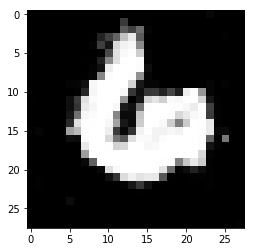

Number batches 468
101(0/468) D: 0.6644, G: 0.7505
101(1/468) D: 0.6816, G: 0.9921
101(2/468) D: 0.6754, G: 1.0804
101(3/468) D: 0.6570, G: 0.9732
101(4/468) D: 0.5708, G: 0.8507
101(5/468) D: 0.6079, G: 0.9357
101(6/468) D: 0.5907, G: 0.9730
101(7/468) D: 0.5353, G: 1.0308
101(8/468) D: 0.6281, G: 1.1214
101(9/468) D: 0.6762, G: 0.8194
101(10/468) D: 0.6469, G: 0.8620
101(11/468) D: 0.5823, G: 1.1392
101(12/468) D: 0.5779, G: 0.9081
101(13/468) D: 0.6154, G: 1.0081
101(14/468) D: 0.6406, G: 1.0759
101(15/468) D: 0.6671, G: 0.8914
101(16/468) D: 0.5929, G: 0.9221
101(17/468) D: 0.5962, G: 0.9664
101(18/468) D: 0.6709, G: 0.9474
101(19/468) D: 0.6716, G: 0.8440
101(20/468) D: 0.6692, G: 0.9930
101(21/468) D: 0.6014, G: 0.9962
101(22/468) D: 0.6226, G: 0.8692
101(23/468) D: 0.6291, G: 0.9536
101(24/468) D: 0.5897, G: 0.8811
101(25/468) D: 0.6128, G: 0.9135
101(26/468) D: 0.6235, G: 0.9887
101(27/468) D: 0.5909, G: 1.0260
101(28/468) D: 0.6375, G: 0.8051
101(29/468) D: 0.6066, G: 0.9497
1

101(244/468) D: 0.6252, G: 0.8802
101(245/468) D: 0.6462, G: 0.9961
101(246/468) D: 0.6254, G: 0.8239
101(247/468) D: 0.5488, G: 0.8990
101(248/468) D: 0.5492, G: 1.0642
101(249/468) D: 0.6338, G: 0.8588
101(250/468) D: 0.7017, G: 0.7548
101(251/468) D: 0.6513, G: 0.9276
101(252/468) D: 0.6850, G: 1.0043
101(253/468) D: 0.5947, G: 0.8785
101(254/468) D: 0.6463, G: 0.9235
101(255/468) D: 0.6842, G: 0.8531
101(256/468) D: 0.6335, G: 0.9189
101(257/468) D: 0.5905, G: 0.9722
101(258/468) D: 0.6410, G: 0.7288
101(259/468) D: 0.5809, G: 0.9611
101(260/468) D: 0.6140, G: 0.9742
101(261/468) D: 0.6107, G: 0.8338
101(262/468) D: 0.6298, G: 0.6403
101(263/468) D: 0.7018, G: 0.9952
101(264/468) D: 0.6603, G: 0.9977
101(265/468) D: 0.6385, G: 0.8225
101(266/468) D: 0.5951, G: 0.9419
101(267/468) D: 0.5764, G: 0.9095
101(268/468) D: 0.6107, G: 0.9013
101(269/468) D: 0.6118, G: 1.0330
101(270/468) D: 0.6283, G: 0.9631
101(271/468) D: 0.5974, G: 0.9215
101(272/468) D: 0.6080, G: 0.9073
101(273/468) D

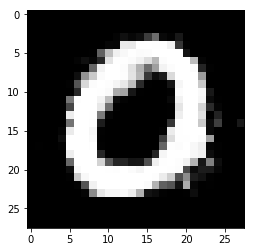

Number batches 468
102(0/468) D: 0.6481, G: 0.8861
102(1/468) D: 0.6314, G: 0.7899
102(2/468) D: 0.6338, G: 1.2087
102(3/468) D: 0.6213, G: 0.8964
102(4/468) D: 0.6069, G: 0.8793
102(5/468) D: 0.6165, G: 0.9763
102(6/468) D: 0.5850, G: 0.9976
102(7/468) D: 0.6162, G: 1.0271
102(8/468) D: 0.6216, G: 0.8606
102(9/468) D: 0.6753, G: 0.8462
102(10/468) D: 0.6571, G: 0.9985
102(11/468) D: 0.5910, G: 0.9685
102(12/468) D: 0.5656, G: 0.8025
102(13/468) D: 0.6186, G: 1.0298
102(14/468) D: 0.6058, G: 0.9636
102(15/468) D: 0.6775, G: 0.8029
102(16/468) D: 0.6054, G: 0.9914
102(17/468) D: 0.6120, G: 0.9103
102(18/468) D: 0.6192, G: 0.7788
102(19/468) D: 0.6306, G: 0.9793
102(20/468) D: 0.6053, G: 0.8512
102(21/468) D: 0.6280, G: 0.9122
102(22/468) D: 0.6176, G: 1.0226
102(23/468) D: 0.5926, G: 0.9160
102(24/468) D: 0.6187, G: 0.9713
102(25/468) D: 0.6493, G: 0.8732
102(26/468) D: 0.6634, G: 1.0891
102(27/468) D: 0.6285, G: 0.9479
102(28/468) D: 0.6583, G: 0.8442
102(29/468) D: 0.5882, G: 0.8274
1

102(245/468) D: 0.6225, G: 1.1475
102(246/468) D: 0.5976, G: 0.9039
102(247/468) D: 0.5696, G: 0.9805
102(248/468) D: 0.6204, G: 1.0759
102(249/468) D: 0.6004, G: 1.0427
102(250/468) D: 0.6680, G: 0.7974
102(251/468) D: 0.6316, G: 1.0330
102(252/468) D: 0.5993, G: 1.1489
102(253/468) D: 0.5728, G: 0.9145
102(254/468) D: 0.6189, G: 0.9404
102(255/468) D: 0.6944, G: 0.8889
102(256/468) D: 0.6143, G: 1.0431
102(257/468) D: 0.5414, G: 0.9487
102(258/468) D: 0.6454, G: 0.9124
102(259/468) D: 0.6111, G: 1.0851
102(260/468) D: 0.6167, G: 0.9195
102(261/468) D: 0.5862, G: 0.9703
102(262/468) D: 0.6017, G: 0.9260
102(263/468) D: 0.6758, G: 0.9811
102(264/468) D: 0.6639, G: 0.8328
102(265/468) D: 0.6069, G: 0.7755
102(266/468) D: 0.5948, G: 1.0727
102(267/468) D: 0.6044, G: 0.9441
102(268/468) D: 0.6397, G: 0.9210
102(269/468) D: 0.5769, G: 0.8336
102(270/468) D: 0.6183, G: 1.0391
102(271/468) D: 0.6203, G: 0.8795
102(272/468) D: 0.6050, G: 1.0176
102(273/468) D: 0.5990, G: 0.9993
102(274/468) D

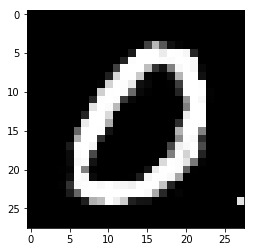

Number batches 468
103(0/468) D: 0.6486, G: 0.8144
103(1/468) D: 0.6697, G: 1.0612
103(2/468) D: 0.6316, G: 0.8857
103(3/468) D: 0.6181, G: 0.9295
103(4/468) D: 0.5427, G: 1.0057
103(5/468) D: 0.5883, G: 0.9143
103(6/468) D: 0.5720, G: 0.9738
103(7/468) D: 0.5718, G: 0.9820
103(8/468) D: 0.6042, G: 0.9636
103(9/468) D: 0.7318, G: 1.0631
103(10/468) D: 0.6679, G: 1.0154
103(11/468) D: 0.6105, G: 0.9791
103(12/468) D: 0.5914, G: 0.8790
103(13/468) D: 0.6603, G: 0.9557
103(14/468) D: 0.6108, G: 0.8987
103(15/468) D: 0.6754, G: 0.9945
103(16/468) D: 0.6081, G: 0.9246
103(17/468) D: 0.6115, G: 0.8846
103(18/468) D: 0.6131, G: 1.0009
103(19/468) D: 0.6454, G: 0.8569
103(20/468) D: 0.5908, G: 0.8715
103(21/468) D: 0.5819, G: 1.0168
103(22/468) D: 0.6335, G: 0.9943
103(23/468) D: 0.5816, G: 0.9208
103(24/468) D: 0.5744, G: 0.9548
103(25/468) D: 0.6489, G: 0.8243
103(26/468) D: 0.6038, G: 0.8915
103(27/468) D: 0.5629, G: 1.0281
103(28/468) D: 0.6402, G: 1.0522
103(29/468) D: 0.6611, G: 0.8215
1

103(244/468) D: 0.6042, G: 0.8585
103(245/468) D: 0.6157, G: 1.0069
103(246/468) D: 0.6060, G: 0.8951
103(247/468) D: 0.5680, G: 1.1245
103(248/468) D: 0.6133, G: 1.1383
103(249/468) D: 0.5874, G: 0.8415
103(250/468) D: 0.6119, G: 0.7888
103(251/468) D: 0.6115, G: 1.1631
103(252/468) D: 0.6241, G: 1.0500
103(253/468) D: 0.6112, G: 0.8935
103(254/468) D: 0.6331, G: 1.0014
103(255/468) D: 0.7168, G: 0.9263
103(256/468) D: 0.6455, G: 0.9836
103(257/468) D: 0.5868, G: 1.0118
103(258/468) D: 0.6414, G: 0.9964
103(259/468) D: 0.6345, G: 0.9269
103(260/468) D: 0.5606, G: 0.9432
103(261/468) D: 0.6116, G: 0.9810
103(262/468) D: 0.5956, G: 0.9503
103(263/468) D: 0.6298, G: 0.9608
103(264/468) D: 0.6981, G: 1.0624
103(265/468) D: 0.6380, G: 1.0400
103(266/468) D: 0.6074, G: 0.7971
103(267/468) D: 0.5764, G: 1.0217
103(268/468) D: 0.6624, G: 1.0900
103(269/468) D: 0.5945, G: 0.8668
103(270/468) D: 0.6294, G: 0.9387
103(271/468) D: 0.6573, G: 1.0506
103(272/468) D: 0.6421, G: 0.8182
103(273/468) D

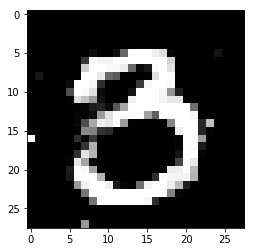

Number batches 468
104(0/468) D: 0.6565, G: 0.8006
104(1/468) D: 0.6574, G: 0.9286
104(2/468) D: 0.6566, G: 0.9782
104(3/468) D: 0.5691, G: 0.9653
104(4/468) D: 0.5548, G: 0.9752
104(5/468) D: 0.6423, G: 1.0299
104(6/468) D: 0.5989, G: 0.9680
104(7/468) D: 0.5742, G: 0.9553
104(8/468) D: 0.6160, G: 0.9696
104(9/468) D: 0.6630, G: 0.9664
104(10/468) D: 0.6738, G: 1.0348
104(11/468) D: 0.6027, G: 1.0012
104(12/468) D: 0.6295, G: 0.9422
104(13/468) D: 0.6375, G: 1.0214
104(14/468) D: 0.6297, G: 1.0817
104(15/468) D: 0.6943, G: 0.8569
104(16/468) D: 0.6184, G: 1.0023
104(17/468) D: 0.6589, G: 0.8955
104(18/468) D: 0.6622, G: 0.8750
104(19/468) D: 0.6453, G: 0.8037
104(20/468) D: 0.6040, G: 1.1230
104(21/468) D: 0.5844, G: 0.8616
104(22/468) D: 0.6150, G: 0.7511
104(23/468) D: 0.6367, G: 1.0658
104(24/468) D: 0.5691, G: 0.9702
104(25/468) D: 0.5918, G: 0.8077
104(26/468) D: 0.5837, G: 0.9845
104(27/468) D: 0.6190, G: 1.0593
104(28/468) D: 0.6531, G: 0.9311
104(29/468) D: 0.5871, G: 0.8824
1

104(245/468) D: 0.5882, G: 0.9754
104(246/468) D: 0.5808, G: 1.0368
104(247/468) D: 0.5767, G: 1.0661
104(248/468) D: 0.5957, G: 0.9998
104(249/468) D: 0.6047, G: 1.0361
104(250/468) D: 0.6773, G: 0.8005
104(251/468) D: 0.6221, G: 0.8431
104(252/468) D: 0.6944, G: 1.0453
104(253/468) D: 0.5962, G: 0.9432
104(254/468) D: 0.6043, G: 0.9000
104(255/468) D: 0.6828, G: 0.8033
104(256/468) D: 0.6141, G: 0.9804
104(257/468) D: 0.5872, G: 1.0833
104(258/468) D: 0.6278, G: 0.7792
104(259/468) D: 0.5840, G: 0.9437
104(260/468) D: 0.6163, G: 1.0076
104(261/468) D: 0.6159, G: 0.8411
104(262/468) D: 0.6272, G: 0.9720
104(263/468) D: 0.6533, G: 0.8821
104(264/468) D: 0.7020, G: 0.8844
104(265/468) D: 0.6041, G: 0.9376
104(266/468) D: 0.5773, G: 1.0062
104(267/468) D: 0.5989, G: 0.9769
104(268/468) D: 0.6334, G: 1.0256
104(269/468) D: 0.5855, G: 0.8364
104(270/468) D: 0.5930, G: 0.8533
104(271/468) D: 0.6524, G: 1.1008
104(272/468) D: 0.6292, G: 0.9369
104(273/468) D: 0.5899, G: 0.9249
104(274/468) D

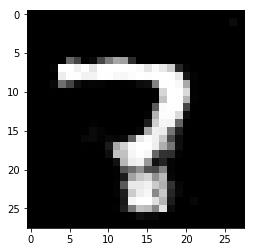

Number batches 468
105(0/468) D: 0.6386, G: 0.9272
105(1/468) D: 0.6681, G: 0.8858
105(2/468) D: 0.6009, G: 1.0300
105(3/468) D: 0.5903, G: 1.0777
105(4/468) D: 0.6002, G: 0.9064
105(5/468) D: 0.6100, G: 0.9986
105(6/468) D: 0.6302, G: 0.9860
105(7/468) D: 0.5739, G: 1.1058
105(8/468) D: 0.5804, G: 0.9133
105(9/468) D: 0.6464, G: 0.7443
105(10/468) D: 0.6592, G: 0.9994
105(11/468) D: 0.5703, G: 1.0270
105(12/468) D: 0.5432, G: 0.8841
105(13/468) D: 0.6231, G: 0.9650
105(14/468) D: 0.6228, G: 0.9514
105(15/468) D: 0.6310, G: 0.9832
105(16/468) D: 0.6220, G: 0.8430
105(17/468) D: 0.6308, G: 0.9225
105(18/468) D: 0.6409, G: 0.8766
105(19/468) D: 0.6321, G: 0.9943
105(20/468) D: 0.5936, G: 0.8943
105(21/468) D: 0.5992, G: 1.0318
105(22/468) D: 0.6386, G: 0.9584
105(23/468) D: 0.6116, G: 0.9942
105(24/468) D: 0.5465, G: 0.9110
105(25/468) D: 0.6249, G: 0.9793
105(26/468) D: 0.6408, G: 0.9781
105(27/468) D: 0.5768, G: 1.0445
105(28/468) D: 0.6322, G: 0.9393
105(29/468) D: 0.6242, G: 0.9251
1

105(244/468) D: 0.6332, G: 0.7746
105(245/468) D: 0.6574, G: 1.0459
105(246/468) D: 0.6257, G: 1.0241
105(247/468) D: 0.5759, G: 0.8674
105(248/468) D: 0.5982, G: 1.1661
105(249/468) D: 0.6237, G: 1.0073
105(250/468) D: 0.6455, G: 0.8148
105(251/468) D: 0.6306, G: 0.9564
105(252/468) D: 0.6440, G: 0.9472
105(253/468) D: 0.5610, G: 0.9203
105(254/468) D: 0.6028, G: 1.0446
105(255/468) D: 0.6834, G: 0.8826
105(256/468) D: 0.6147, G: 0.8686
105(257/468) D: 0.6284, G: 1.0769
105(258/468) D: 0.6570, G: 0.7571
105(259/468) D: 0.5865, G: 0.9713
105(260/468) D: 0.5933, G: 0.9844
105(261/468) D: 0.6127, G: 0.8943
105(262/468) D: 0.5818, G: 0.9190
105(263/468) D: 0.6612, G: 0.9977
105(264/468) D: 0.6689, G: 0.9471
105(265/468) D: 0.6205, G: 1.0085
105(266/468) D: 0.6090, G: 0.9233
105(267/468) D: 0.5842, G: 0.8325
105(268/468) D: 0.6697, G: 0.9203
105(269/468) D: 0.5931, G: 0.9743
105(270/468) D: 0.6637, G: 0.8822
105(271/468) D: 0.6187, G: 0.9711
105(272/468) D: 0.6287, G: 0.8617
105(273/468) D

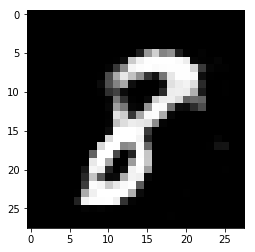

Number batches 468
106(0/468) D: 0.6370, G: 0.8103
106(1/468) D: 0.7017, G: 1.0145
106(2/468) D: 0.6153, G: 1.0357
106(3/468) D: 0.6095, G: 0.8371
106(4/468) D: 0.5640, G: 0.8540
106(5/468) D: 0.6124, G: 0.9523
106(6/468) D: 0.6123, G: 1.0089
106(7/468) D: 0.5402, G: 0.9984
106(8/468) D: 0.5880, G: 0.9093
106(9/468) D: 0.6289, G: 0.9162
106(10/468) D: 0.6392, G: 1.0546
106(11/468) D: 0.6187, G: 0.9747
106(12/468) D: 0.6133, G: 0.8377
106(13/468) D: 0.6046, G: 0.8260
106(14/468) D: 0.6224, G: 1.0386
106(15/468) D: 0.6505, G: 0.8526
106(16/468) D: 0.6155, G: 0.9878
106(17/468) D: 0.6313, G: 0.8523
106(18/468) D: 0.6230, G: 0.8900
106(19/468) D: 0.6337, G: 0.9149
106(20/468) D: 0.5925, G: 0.9608
106(21/468) D: 0.6148, G: 1.0482
106(22/468) D: 0.5811, G: 0.9387
106(23/468) D: 0.6055, G: 0.9669
106(24/468) D: 0.5914, G: 0.9078
106(25/468) D: 0.6303, G: 0.9809
106(26/468) D: 0.5984, G: 0.9592
106(27/468) D: 0.5767, G: 0.8763
106(28/468) D: 0.5807, G: 1.0641
106(29/468) D: 0.6098, G: 0.8952
1

106(244/468) D: 0.6169, G: 1.0526
106(245/468) D: 0.5914, G: 1.0260
106(246/468) D: 0.5898, G: 0.8514
106(247/468) D: 0.5690, G: 1.0839
106(248/468) D: 0.5815, G: 1.0452
106(249/468) D: 0.5943, G: 0.8848
106(250/468) D: 0.6279, G: 0.8716
106(251/468) D: 0.6434, G: 0.9946
106(252/468) D: 0.6312, G: 0.9315
106(253/468) D: 0.5761, G: 0.9472
106(254/468) D: 0.6166, G: 0.8823
106(255/468) D: 0.6616, G: 0.8840
106(256/468) D: 0.6433, G: 0.9329
106(257/468) D: 0.5512, G: 1.0182
106(258/468) D: 0.6143, G: 0.8986
106(259/468) D: 0.6108, G: 1.0447
106(260/468) D: 0.6039, G: 0.8996
106(261/468) D: 0.6190, G: 0.9322
106(262/468) D: 0.6816, G: 1.0355
106(263/468) D: 0.6148, G: 0.8772
106(264/468) D: 0.6803, G: 1.0105
106(265/468) D: 0.6190, G: 0.8652
106(266/468) D: 0.6082, G: 0.9790
106(267/468) D: 0.6038, G: 0.9761
106(268/468) D: 0.6243, G: 0.9203
106(269/468) D: 0.6285, G: 1.1753
106(270/468) D: 0.6412, G: 0.8285
106(271/468) D: 0.6179, G: 0.8262
106(272/468) D: 0.6312, G: 1.1168
106(273/468) D

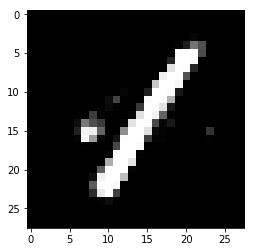

Number batches 468
107(0/468) D: 0.7223, G: 0.6537
107(1/468) D: 0.6908, G: 0.9645
107(2/468) D: 0.6348, G: 1.0640
107(3/468) D: 0.6076, G: 0.9126
107(4/468) D: 0.6101, G: 0.9862
107(5/468) D: 0.5852, G: 0.9606
107(6/468) D: 0.5809, G: 1.0436
107(7/468) D: 0.5651, G: 1.0232
107(8/468) D: 0.5561, G: 0.9408
107(9/468) D: 0.6718, G: 0.9683
107(10/468) D: 0.6815, G: 0.9061
107(11/468) D: 0.5995, G: 1.0155
107(12/468) D: 0.5847, G: 0.9831
107(13/468) D: 0.6040, G: 0.9882
107(14/468) D: 0.6293, G: 0.9093
107(15/468) D: 0.6726, G: 0.8028
107(16/468) D: 0.6640, G: 1.0125
107(17/468) D: 0.6407, G: 0.9700
107(18/468) D: 0.6323, G: 0.8772
107(19/468) D: 0.6238, G: 0.8950
107(20/468) D: 0.6168, G: 0.8586
107(21/468) D: 0.6336, G: 0.9990
107(22/468) D: 0.6310, G: 0.9205
107(23/468) D: 0.5840, G: 0.9442
107(24/468) D: 0.6007, G: 1.1057
107(25/468) D: 0.6498, G: 0.9289
107(26/468) D: 0.6202, G: 0.8543
107(27/468) D: 0.6167, G: 1.0030
107(28/468) D: 0.5977, G: 0.9253
107(29/468) D: 0.5904, G: 0.8949
1

107(244/468) D: 0.6464, G: 1.0234
107(245/468) D: 0.6309, G: 0.9374
107(246/468) D: 0.6176, G: 0.8409
107(247/468) D: 0.6385, G: 0.9387
107(248/468) D: 0.6067, G: 0.9574
107(249/468) D: 0.6349, G: 1.0380
107(250/468) D: 0.6553, G: 0.8581
107(251/468) D: 0.6205, G: 0.8412
107(252/468) D: 0.6326, G: 0.9875
107(253/468) D: 0.6131, G: 1.0622
107(254/468) D: 0.6240, G: 0.8284
107(255/468) D: 0.6371, G: 0.7836
107(256/468) D: 0.6059, G: 0.8813
107(257/468) D: 0.5655, G: 1.1530
107(258/468) D: 0.6287, G: 0.8602
107(259/468) D: 0.6176, G: 0.8061
107(260/468) D: 0.6058, G: 1.0596
107(261/468) D: 0.5968, G: 0.8657
107(262/468) D: 0.5813, G: 0.8520
107(263/468) D: 0.6607, G: 0.9986
107(264/468) D: 0.6462, G: 1.0091
107(265/468) D: 0.6065, G: 0.9327
107(266/468) D: 0.6086, G: 0.9745
107(267/468) D: 0.5704, G: 0.9705
107(268/468) D: 0.6259, G: 1.0674
107(269/468) D: 0.6551, G: 0.8732
107(270/468) D: 0.6248, G: 0.8784
107(271/468) D: 0.6448, G: 0.8721
107(272/468) D: 0.6161, G: 0.9970
107(273/468) D

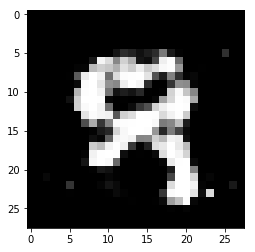

Number batches 468
108(0/468) D: 0.6666, G: 0.8161
108(1/468) D: 0.6690, G: 0.9502
108(2/468) D: 0.6497, G: 1.0027
108(3/468) D: 0.6269, G: 0.9696
108(4/468) D: 0.6470, G: 1.0052
108(5/468) D: 0.6098, G: 0.8513
108(6/468) D: 0.5878, G: 0.8459
108(7/468) D: 0.5806, G: 0.9000
108(8/468) D: 0.5788, G: 1.0236
108(9/468) D: 0.6821, G: 0.8756
108(10/468) D: 0.6335, G: 0.8053
108(11/468) D: 0.6112, G: 1.0564
108(12/468) D: 0.6283, G: 0.9257
108(13/468) D: 0.6256, G: 0.7089
108(14/468) D: 0.6677, G: 0.9885
108(15/468) D: 0.6558, G: 1.0694
108(16/468) D: 0.6530, G: 0.8808
108(17/468) D: 0.6329, G: 0.7995
108(18/468) D: 0.6273, G: 1.0086
108(19/468) D: 0.6093, G: 0.8944
108(20/468) D: 0.6324, G: 0.8400
108(21/468) D: 0.6249, G: 0.8748
108(22/468) D: 0.6188, G: 0.8822
108(23/468) D: 0.6116, G: 0.9211
108(24/468) D: 0.6027, G: 0.9415
108(25/468) D: 0.6814, G: 0.8352
108(26/468) D: 0.6249, G: 0.8399
108(27/468) D: 0.5808, G: 0.9676
108(28/468) D: 0.6223, G: 1.0315
108(29/468) D: 0.6115, G: 0.8616
1

108(245/468) D: 0.6160, G: 1.1039
108(246/468) D: 0.6154, G: 0.9149
108(247/468) D: 0.5815, G: 0.8902
108(248/468) D: 0.5975, G: 1.1168
108(249/468) D: 0.6159, G: 0.9108
108(250/468) D: 0.6449, G: 0.8148
108(251/468) D: 0.6314, G: 0.9697
108(252/468) D: 0.6380, G: 1.0284
108(253/468) D: 0.6295, G: 0.9868
108(254/468) D: 0.6295, G: 0.9789
108(255/468) D: 0.7111, G: 0.9231
108(256/468) D: 0.6187, G: 0.9150
108(257/468) D: 0.6150, G: 1.1217
108(258/468) D: 0.6443, G: 0.8753
108(259/468) D: 0.6072, G: 0.8471
108(260/468) D: 0.5896, G: 0.8803
108(261/468) D: 0.5697, G: 0.9520
108(262/468) D: 0.5930, G: 0.9656
108(263/468) D: 0.6166, G: 0.8736
108(264/468) D: 0.6092, G: 0.9624
108(265/468) D: 0.5982, G: 0.8858
108(266/468) D: 0.6163, G: 0.9563
108(267/468) D: 0.6377, G: 0.9947
108(268/468) D: 0.5910, G: 0.8427
108(269/468) D: 0.5992, G: 0.9817
108(270/468) D: 0.6539, G: 1.0578
108(271/468) D: 0.6330, G: 0.8195
108(272/468) D: 0.6154, G: 0.9030
108(273/468) D: 0.5953, G: 1.0395
108(274/468) D

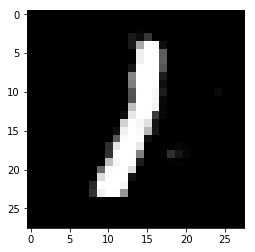

Number batches 468
109(0/468) D: 0.7331, G: 0.6237
109(1/468) D: 0.6615, G: 0.8103
109(2/468) D: 0.6221, G: 0.9256
109(3/468) D: 0.6031, G: 0.9736
109(4/468) D: 0.5752, G: 0.9779
109(5/468) D: 0.6193, G: 0.8839
109(6/468) D: 0.5910, G: 0.9108
109(7/468) D: 0.5559, G: 0.9231
109(8/468) D: 0.5733, G: 0.9526
109(9/468) D: 0.6683, G: 0.9603
109(10/468) D: 0.7085, G: 0.9651
109(11/468) D: 0.5731, G: 0.9238
109(12/468) D: 0.5853, G: 0.9406
109(13/468) D: 0.6322, G: 0.9886
109(14/468) D: 0.6452, G: 1.0431
109(15/468) D: 0.6599, G: 0.8593
109(16/468) D: 0.5881, G: 0.8520
109(17/468) D: 0.6509, G: 1.1251
109(18/468) D: 0.5870, G: 0.8651
109(19/468) D: 0.6182, G: 0.8630
109(20/468) D: 0.5826, G: 1.0177
109(21/468) D: 0.5810, G: 1.0755
109(22/468) D: 0.6193, G: 0.9384
109(23/468) D: 0.5888, G: 0.9523
109(24/468) D: 0.6071, G: 0.9844
109(25/468) D: 0.6467, G: 0.8818
109(26/468) D: 0.5744, G: 0.8017
109(27/468) D: 0.5688, G: 1.1176
109(28/468) D: 0.6142, G: 0.9834
109(29/468) D: 0.6285, G: 0.9245
1

109(244/468) D: 0.6082, G: 0.9307
109(245/468) D: 0.6344, G: 0.9743
109(246/468) D: 0.6491, G: 0.9106
109(247/468) D: 0.5635, G: 1.0842
109(248/468) D: 0.6056, G: 0.9957
109(249/468) D: 0.6152, G: 1.0524
109(250/468) D: 0.6608, G: 0.8553
109(251/468) D: 0.6292, G: 1.0029
109(252/468) D: 0.6273, G: 1.0601
109(253/468) D: 0.5956, G: 0.8974
109(254/468) D: 0.6819, G: 0.9096
109(255/468) D: 0.6989, G: 0.7308
109(256/468) D: 0.6441, G: 0.8537
109(257/468) D: 0.6058, G: 1.0942
109(258/468) D: 0.6497, G: 0.9130
109(259/468) D: 0.6173, G: 0.7872
109(260/468) D: 0.6037, G: 0.9320
109(261/468) D: 0.6147, G: 0.9690
109(262/468) D: 0.6206, G: 0.8717
109(263/468) D: 0.6699, G: 0.8855
109(264/468) D: 0.6806, G: 1.0110
109(265/468) D: 0.6202, G: 1.0045
109(266/468) D: 0.6002, G: 0.8084
109(267/468) D: 0.6038, G: 1.0362
109(268/468) D: 0.6721, G: 0.9316
109(269/468) D: 0.6036, G: 1.0043
109(270/468) D: 0.6340, G: 0.9087
109(271/468) D: 0.6244, G: 0.9499
109(272/468) D: 0.6335, G: 0.9251
109(273/468) D

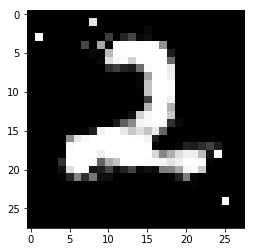

Number batches 468
110(0/468) D: 0.6442, G: 1.0331
110(1/468) D: 0.6437, G: 0.9342
110(2/468) D: 0.5846, G: 1.0051
110(3/468) D: 0.6342, G: 1.1366
110(4/468) D: 0.6088, G: 0.9941
110(5/468) D: 0.6353, G: 0.9069
110(6/468) D: 0.6017, G: 1.0206
110(7/468) D: 0.6244, G: 1.0646
110(8/468) D: 0.6366, G: 0.9421
110(9/468) D: 0.6748, G: 0.8997
110(10/468) D: 0.7070, G: 0.9746
110(11/468) D: 0.5585, G: 0.9744
110(12/468) D: 0.6206, G: 0.9921
110(13/468) D: 0.6143, G: 0.9505
110(14/468) D: 0.6632, G: 0.9954
110(15/468) D: 0.6467, G: 0.7666
110(16/468) D: 0.6002, G: 0.9239
110(17/468) D: 0.6311, G: 0.9924
110(18/468) D: 0.5872, G: 0.8243
110(19/468) D: 0.6327, G: 0.9171
110(20/468) D: 0.5926, G: 0.9514
110(21/468) D: 0.6194, G: 1.0798
110(22/468) D: 0.5941, G: 0.9328
110(23/468) D: 0.6000, G: 0.9327
110(24/468) D: 0.6151, G: 1.0974
110(25/468) D: 0.6740, G: 0.8105
110(26/468) D: 0.5942, G: 0.9676
110(27/468) D: 0.5671, G: 0.9593
110(28/468) D: 0.5978, G: 0.9067
110(29/468) D: 0.6415, G: 1.0063
1

110(244/468) D: 0.6324, G: 0.8211
110(245/468) D: 0.5903, G: 0.9730
110(246/468) D: 0.6333, G: 0.9121
110(247/468) D: 0.5893, G: 0.9509
110(248/468) D: 0.6089, G: 0.8992
110(249/468) D: 0.6409, G: 1.0188
110(250/468) D: 0.6220, G: 0.8010
110(251/468) D: 0.6371, G: 0.9089
110(252/468) D: 0.6167, G: 0.9525
110(253/468) D: 0.5915, G: 0.9071
110(254/468) D: 0.5899, G: 0.9595
110(255/468) D: 0.6739, G: 0.8152
110(256/468) D: 0.6536, G: 0.9544
110(257/468) D: 0.5895, G: 1.0675
110(258/468) D: 0.6293, G: 0.8013
110(259/468) D: 0.5751, G: 0.9092
110(260/468) D: 0.6249, G: 0.8261
110(261/468) D: 0.6157, G: 0.9527
110(262/468) D: 0.5912, G: 0.9534
110(263/468) D: 0.6854, G: 0.9170
110(264/468) D: 0.6519, G: 0.8308
110(265/468) D: 0.6187, G: 0.8911
110(266/468) D: 0.6214, G: 1.1516
110(267/468) D: 0.6174, G: 0.9493
110(268/468) D: 0.6028, G: 0.9238
110(269/468) D: 0.5981, G: 0.9648
110(270/468) D: 0.6548, G: 0.8914
110(271/468) D: 0.5837, G: 0.9286
110(272/468) D: 0.6253, G: 0.9499
110(273/468) D

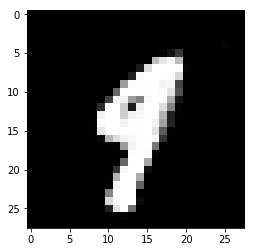

Number batches 468
111(0/468) D: 0.6426, G: 0.8090
111(1/468) D: 0.6120, G: 0.9444
111(2/468) D: 0.6257, G: 0.9123
111(3/468) D: 0.6159, G: 1.0234
111(4/468) D: 0.5805, G: 0.9639
111(5/468) D: 0.6593, G: 1.0142
111(6/468) D: 0.6153, G: 1.0517
111(7/468) D: 0.5532, G: 0.9733
111(8/468) D: 0.6015, G: 0.8650
111(9/468) D: 0.7001, G: 1.0252
111(10/468) D: 0.6486, G: 0.9754
111(11/468) D: 0.6093, G: 0.9811
111(12/468) D: 0.5635, G: 0.9428
111(13/468) D: 0.6393, G: 0.9394
111(14/468) D: 0.5858, G: 0.9947
111(15/468) D: 0.6619, G: 1.0485
111(16/468) D: 0.5845, G: 0.9242
111(17/468) D: 0.6201, G: 0.9092
111(18/468) D: 0.6221, G: 0.8973
111(19/468) D: 0.6223, G: 0.9265
111(20/468) D: 0.6179, G: 0.9697
111(21/468) D: 0.5930, G: 0.9286
111(22/468) D: 0.6108, G: 0.9684
111(23/468) D: 0.6070, G: 0.9784
111(24/468) D: 0.5961, G: 0.9803
111(25/468) D: 0.6643, G: 0.7158
111(26/468) D: 0.6491, G: 0.9764
111(27/468) D: 0.5808, G: 1.0589
111(28/468) D: 0.5705, G: 0.8859
111(29/468) D: 0.6156, G: 0.9115
1

111(245/468) D: 0.6290, G: 0.9841
111(246/468) D: 0.6438, G: 0.9516
111(247/468) D: 0.5761, G: 1.1294
111(248/468) D: 0.6030, G: 1.0688
111(249/468) D: 0.5889, G: 1.0353
111(250/468) D: 0.6638, G: 1.1053
111(251/468) D: 0.6535, G: 0.7806
111(252/468) D: 0.6977, G: 1.0638
111(253/468) D: 0.6420, G: 1.0476
111(254/468) D: 0.6264, G: 0.8784
111(255/468) D: 0.7011, G: 0.8737
111(256/468) D: 0.6512, G: 1.0048
111(257/468) D: 0.5722, G: 0.9093
111(258/468) D: 0.6308, G: 0.8543
111(259/468) D: 0.6296, G: 0.9765
111(260/468) D: 0.6037, G: 0.9603
111(261/468) D: 0.6120, G: 0.9759
111(262/468) D: 0.5909, G: 0.8710
111(263/468) D: 0.6519, G: 0.9104
111(264/468) D: 0.6559, G: 0.8370
111(265/468) D: 0.6284, G: 1.0050
111(266/468) D: 0.5957, G: 0.8763
111(267/468) D: 0.6392, G: 1.0407
111(268/468) D: 0.6193, G: 0.9374
111(269/468) D: 0.5966, G: 0.9137
111(270/468) D: 0.6208, G: 1.1079
111(271/468) D: 0.6433, G: 0.8471
111(272/468) D: 0.6538, G: 0.9137
111(273/468) D: 0.6423, G: 1.0911
111(274/468) D

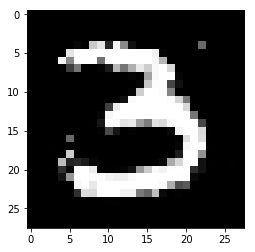

Number batches 468
112(0/468) D: 0.6927, G: 1.0541
112(1/468) D: 0.6352, G: 0.7596
112(2/468) D: 0.6416, G: 0.9317
112(3/468) D: 0.5901, G: 1.0571
112(4/468) D: 0.5688, G: 0.9501
112(5/468) D: 0.5914, G: 0.9255
112(6/468) D: 0.5991, G: 1.0858
112(7/468) D: 0.5769, G: 0.9890
112(8/468) D: 0.6258, G: 0.8348
112(9/468) D: 0.7058, G: 0.9193
112(10/468) D: 0.6798, G: 1.0925
112(11/468) D: 0.6147, G: 1.0434
112(12/468) D: 0.6149, G: 0.9173
112(13/468) D: 0.6001, G: 0.7992
112(14/468) D: 0.6291, G: 1.0632
112(15/468) D: 0.6631, G: 0.8903
112(16/468) D: 0.5844, G: 0.8200
112(17/468) D: 0.6258, G: 0.9567
112(18/468) D: 0.6061, G: 0.9001
112(19/468) D: 0.6457, G: 0.8843
112(20/468) D: 0.6248, G: 1.1011
112(21/468) D: 0.6332, G: 1.0002
112(22/468) D: 0.5970, G: 0.9171
112(23/468) D: 0.5987, G: 0.8450
112(24/468) D: 0.5949, G: 0.9130
112(25/468) D: 0.6743, G: 0.8900
112(26/468) D: 0.5949, G: 0.9390
112(27/468) D: 0.6248, G: 1.0205
112(28/468) D: 0.6048, G: 0.9203
112(29/468) D: 0.6018, G: 0.9719
1

112(245/468) D: 0.6210, G: 0.9671
112(246/468) D: 0.6264, G: 0.9350
112(247/468) D: 0.5641, G: 0.9256
112(248/468) D: 0.6248, G: 0.9376
112(249/468) D: 0.6063, G: 1.1791
112(250/468) D: 0.6628, G: 0.7842
112(251/468) D: 0.6396, G: 0.8775
112(252/468) D: 0.6415, G: 1.0465
112(253/468) D: 0.6119, G: 1.0092
112(254/468) D: 0.6736, G: 0.9567
112(255/468) D: 0.6526, G: 0.9391
112(256/468) D: 0.5971, G: 1.0300
112(257/468) D: 0.5866, G: 1.0623
112(258/468) D: 0.6567, G: 0.8805
112(259/468) D: 0.6264, G: 0.9342
112(260/468) D: 0.6402, G: 0.9321
112(261/468) D: 0.6433, G: 0.9004
112(262/468) D: 0.5757, G: 0.9563
112(263/468) D: 0.6857, G: 0.8847
112(264/468) D: 0.6682, G: 0.9923
112(265/468) D: 0.6361, G: 0.9131
112(266/468) D: 0.6272, G: 0.8951
112(267/468) D: 0.5747, G: 1.0154
112(268/468) D: 0.6433, G: 0.8876
112(269/468) D: 0.6217, G: 0.9966
112(270/468) D: 0.6297, G: 0.9606
112(271/468) D: 0.6004, G: 0.9493
112(272/468) D: 0.6149, G: 0.8536
112(273/468) D: 0.6207, G: 0.9058
112(274/468) D

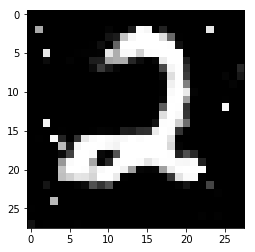

Number batches 468
113(0/468) D: 0.6839, G: 0.8239
113(1/468) D: 0.6736, G: 0.9014
113(2/468) D: 0.6195, G: 0.8155
113(3/468) D: 0.6351, G: 1.0489
113(4/468) D: 0.5858, G: 1.0434
113(5/468) D: 0.6300, G: 0.8841
113(6/468) D: 0.5857, G: 0.9755
113(7/468) D: 0.5846, G: 0.9622
113(8/468) D: 0.6043, G: 0.9617
113(9/468) D: 0.6519, G: 0.9908
113(10/468) D: 0.6620, G: 0.9362
113(11/468) D: 0.5968, G: 0.9589
113(12/468) D: 0.5718, G: 1.0333
113(13/468) D: 0.6621, G: 0.9526
113(14/468) D: 0.6138, G: 0.7863
113(15/468) D: 0.6967, G: 0.9172
113(16/468) D: 0.6287, G: 0.7862
113(17/468) D: 0.6049, G: 1.0241
113(18/468) D: 0.6047, G: 0.8434
113(19/468) D: 0.6640, G: 0.9791
113(20/468) D: 0.6370, G: 0.9416
113(21/468) D: 0.6281, G: 0.8330
113(22/468) D: 0.6390, G: 0.8914
113(23/468) D: 0.6226, G: 1.0914
113(24/468) D: 0.5749, G: 0.8490
113(25/468) D: 0.6628, G: 0.8219
113(26/468) D: 0.6276, G: 1.1392
113(27/468) D: 0.6355, G: 0.9233
113(28/468) D: 0.6332, G: 0.8493
113(29/468) D: 0.6131, G: 0.9600
1

113(245/468) D: 0.6237, G: 0.9331
113(246/468) D: 0.5999, G: 0.8904
113(247/468) D: 0.5598, G: 1.0566
113(248/468) D: 0.6206, G: 0.8625
113(249/468) D: 0.5903, G: 0.9462
113(250/468) D: 0.6645, G: 1.0650
113(251/468) D: 0.6186, G: 0.8371
113(252/468) D: 0.6210, G: 1.1086
113(253/468) D: 0.5546, G: 1.1880
113(254/468) D: 0.6737, G: 0.7114
113(255/468) D: 0.6893, G: 0.8228
113(256/468) D: 0.5948, G: 0.9516
113(257/468) D: 0.5707, G: 1.0925
113(258/468) D: 0.6641, G: 0.7479
113(259/468) D: 0.6055, G: 0.9857
113(260/468) D: 0.6222, G: 0.9286
113(261/468) D: 0.6196, G: 0.8627
113(262/468) D: 0.6176, G: 0.9353
113(263/468) D: 0.6460, G: 0.8314
113(264/468) D: 0.6012, G: 0.8979
113(265/468) D: 0.6096, G: 0.8991
113(266/468) D: 0.6222, G: 0.9884
113(267/468) D: 0.5837, G: 1.1363
113(268/468) D: 0.6559, G: 0.9697
113(269/468) D: 0.6092, G: 1.0503
113(270/468) D: 0.6336, G: 0.8563
113(271/468) D: 0.6544, G: 0.9760
113(272/468) D: 0.6523, G: 0.9832
113(273/468) D: 0.6025, G: 0.8794
113(274/468) D

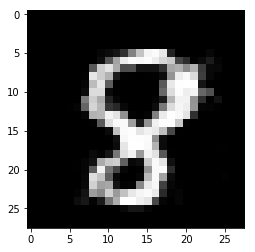

Number batches 468
114(0/468) D: 0.6425, G: 0.8616
114(1/468) D: 0.6868, G: 0.8960
114(2/468) D: 0.6221, G: 1.0374
114(3/468) D: 0.5813, G: 0.8848
114(4/468) D: 0.5912, G: 1.0006
114(5/468) D: 0.6051, G: 0.8674
114(6/468) D: 0.5952, G: 0.9947
114(7/468) D: 0.5654, G: 1.0828
114(8/468) D: 0.6211, G: 0.9934
114(9/468) D: 0.6904, G: 0.8723
114(10/468) D: 0.7016, G: 0.9421
114(11/468) D: 0.6112, G: 1.1892
114(12/468) D: 0.5835, G: 0.9385
114(13/468) D: 0.6653, G: 0.8248
114(14/468) D: 0.6350, G: 0.8775
114(15/468) D: 0.6261, G: 0.8831
114(16/468) D: 0.6155, G: 1.1086
114(17/468) D: 0.5977, G: 1.0857
114(18/468) D: 0.6699, G: 0.7931
114(19/468) D: 0.6583, G: 0.7394
114(20/468) D: 0.6247, G: 0.9908
114(21/468) D: 0.6474, G: 0.9359
114(22/468) D: 0.6177, G: 0.8809
114(23/468) D: 0.5768, G: 0.8466
114(24/468) D: 0.6139, G: 0.9810
114(25/468) D: 0.6252, G: 0.8014
114(26/468) D: 0.6005, G: 0.9691
114(27/468) D: 0.6118, G: 1.1515
114(28/468) D: 0.6165, G: 0.7717
114(29/468) D: 0.5890, G: 0.9096
1

114(244/468) D: 0.6332, G: 0.9189
114(245/468) D: 0.6291, G: 0.8265
114(246/468) D: 0.6592, G: 0.9499
114(247/468) D: 0.6360, G: 1.1073
114(248/468) D: 0.6369, G: 0.9559
114(249/468) D: 0.6025, G: 0.9489
114(250/468) D: 0.6618, G: 0.8975
114(251/468) D: 0.6409, G: 1.0339
114(252/468) D: 0.5651, G: 0.9666
114(253/468) D: 0.5423, G: 0.9355
114(254/468) D: 0.6509, G: 0.8607
114(255/468) D: 0.7310, G: 0.7779
114(256/468) D: 0.6055, G: 0.8624
114(257/468) D: 0.5900, G: 1.0432
114(258/468) D: 0.6794, G: 0.9346
114(259/468) D: 0.6144, G: 0.8411
114(260/468) D: 0.6175, G: 0.9475
114(261/468) D: 0.6195, G: 0.9183
114(262/468) D: 0.6199, G: 0.7554
114(263/468) D: 0.6348, G: 0.9615
114(264/468) D: 0.6307, G: 1.1083
114(265/468) D: 0.6546, G: 0.9092
114(266/468) D: 0.6361, G: 0.9343
114(267/468) D: 0.5947, G: 0.8551
114(268/468) D: 0.6093, G: 0.9154
114(269/468) D: 0.6291, G: 0.8676
114(270/468) D: 0.5908, G: 0.8528
114(271/468) D: 0.6156, G: 0.9197
114(272/468) D: 0.6188, G: 0.9560
114(273/468) D

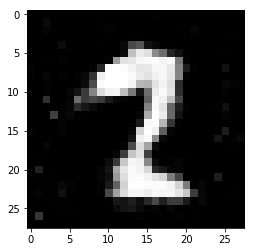

Number batches 468
115(0/468) D: 0.6820, G: 1.0144
115(1/468) D: 0.6538, G: 0.8920
115(2/468) D: 0.6329, G: 0.9528
115(3/468) D: 0.6244, G: 1.1185
115(4/468) D: 0.6279, G: 0.9697
115(5/468) D: 0.5997, G: 0.9548
115(6/468) D: 0.6249, G: 1.0149
115(7/468) D: 0.5593, G: 1.0546
115(8/468) D: 0.5764, G: 1.0363
115(9/468) D: 0.7381, G: 0.9315
115(10/468) D: 0.6591, G: 0.9457
115(11/468) D: 0.6028, G: 1.0686
115(12/468) D: 0.6098, G: 0.9721
115(13/468) D: 0.6046, G: 0.7342
115(14/468) D: 0.5726, G: 0.9315
115(15/468) D: 0.6217, G: 1.0366
115(16/468) D: 0.6143, G: 0.8954
115(17/468) D: 0.6430, G: 1.0045
115(18/468) D: 0.6498, G: 0.8242
115(19/468) D: 0.6953, G: 0.9717
115(20/468) D: 0.6155, G: 0.9299
115(21/468) D: 0.6085, G: 0.8922
115(22/468) D: 0.5777, G: 0.8528
115(23/468) D: 0.5995, G: 0.9322
115(24/468) D: 0.5432, G: 0.8157
115(25/468) D: 0.6242, G: 0.8507
115(26/468) D: 0.5783, G: 0.8779
115(27/468) D: 0.6232, G: 1.0408
115(28/468) D: 0.6384, G: 0.9302
115(29/468) D: 0.5977, G: 0.9589
1

115(244/468) D: 0.6702, G: 0.8835
115(245/468) D: 0.5985, G: 0.7821
115(246/468) D: 0.6345, G: 0.9595
115(247/468) D: 0.5824, G: 1.0669
115(248/468) D: 0.6159, G: 0.9046
115(249/468) D: 0.6280, G: 0.9793
115(250/468) D: 0.6149, G: 0.8068
115(251/468) D: 0.6317, G: 0.8793
115(252/468) D: 0.6082, G: 1.0354
115(253/468) D: 0.6094, G: 0.9605
115(254/468) D: 0.6077, G: 0.9332
115(255/468) D: 0.6523, G: 0.9060
115(256/468) D: 0.6449, G: 0.9533
115(257/468) D: 0.5820, G: 1.0647
115(258/468) D: 0.6294, G: 0.7794
115(259/468) D: 0.6229, G: 0.8559
115(260/468) D: 0.6381, G: 0.9884
115(261/468) D: 0.6385, G: 0.8667
115(262/468) D: 0.6606, G: 0.8576
115(263/468) D: 0.6328, G: 0.8534
115(264/468) D: 0.6425, G: 0.9337
115(265/468) D: 0.6011, G: 1.0182
115(266/468) D: 0.6040, G: 1.0190
115(267/468) D: 0.5961, G: 0.9994
115(268/468) D: 0.6325, G: 0.9049
115(269/468) D: 0.5714, G: 0.8895
115(270/468) D: 0.6428, G: 1.1116
115(271/468) D: 0.6455, G: 0.8485
115(272/468) D: 0.5777, G: 0.9021
115(273/468) D

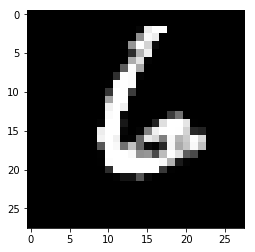

Number batches 468
116(0/468) D: 0.6618, G: 0.7335
116(1/468) D: 0.6594, G: 1.1089
116(2/468) D: 0.6519, G: 0.8800
116(3/468) D: 0.6290, G: 0.9347
116(4/468) D: 0.5955, G: 1.0284
116(5/468) D: 0.6554, G: 0.9063
116(6/468) D: 0.6427, G: 1.0277
116(7/468) D: 0.5724, G: 0.9844
116(8/468) D: 0.5984, G: 0.8424
116(9/468) D: 0.7092, G: 0.9168
116(10/468) D: 0.6939, G: 1.0044
116(11/468) D: 0.5894, G: 0.9268
116(12/468) D: 0.6247, G: 0.9488
116(13/468) D: 0.6556, G: 0.9573
116(14/468) D: 0.6109, G: 0.8622
116(15/468) D: 0.6487, G: 0.7811
116(16/468) D: 0.6113, G: 0.8846
116(17/468) D: 0.5947, G: 0.9965
116(18/468) D: 0.5944, G: 0.8142
116(19/468) D: 0.6061, G: 0.7658
116(20/468) D: 0.5986, G: 1.0049
116(21/468) D: 0.5988, G: 1.0236
116(22/468) D: 0.6274, G: 1.1026
116(23/468) D: 0.5807, G: 0.8872
116(24/468) D: 0.5486, G: 0.8286
116(25/468) D: 0.6375, G: 1.0330
116(26/468) D: 0.5988, G: 0.9618
116(27/468) D: 0.5681, G: 0.9175
116(28/468) D: 0.6506, G: 1.1186
116(29/468) D: 0.6166, G: 1.0072
1

116(245/468) D: 0.6532, G: 0.9568
116(246/468) D: 0.6392, G: 0.9139
116(247/468) D: 0.5894, G: 0.9328
116(248/468) D: 0.5921, G: 1.1333
116(249/468) D: 0.6394, G: 1.0358
116(250/468) D: 0.6610, G: 0.8359
116(251/468) D: 0.6106, G: 0.9112
116(252/468) D: 0.6177, G: 1.0635
116(253/468) D: 0.5841, G: 0.9120
116(254/468) D: 0.6079, G: 0.9555
116(255/468) D: 0.6651, G: 0.8386
116(256/468) D: 0.6695, G: 0.8905
116(257/468) D: 0.5902, G: 1.1362
116(258/468) D: 0.6452, G: 0.9315
116(259/468) D: 0.6116, G: 0.9518
116(260/468) D: 0.6311, G: 0.8779
116(261/468) D: 0.6057, G: 0.9413
116(262/468) D: 0.6720, G: 0.9481
116(263/468) D: 0.6638, G: 0.9301
116(264/468) D: 0.6364, G: 0.9335
116(265/468) D: 0.6005, G: 0.9546
116(266/468) D: 0.5850, G: 1.1104
116(267/468) D: 0.6270, G: 0.7888
116(268/468) D: 0.6821, G: 0.9876
116(269/468) D: 0.5995, G: 0.9148
116(270/468) D: 0.6224, G: 0.8677
116(271/468) D: 0.6351, G: 0.8541
116(272/468) D: 0.6104, G: 0.9995
116(273/468) D: 0.6435, G: 0.8920
116(274/468) D

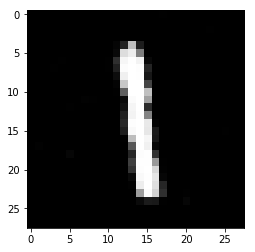

Number batches 468
117(0/468) D: 0.6522, G: 0.6487
117(1/468) D: 0.6795, G: 1.1228
117(2/468) D: 0.6416, G: 1.0260
117(3/468) D: 0.6393, G: 0.8256
117(4/468) D: 0.6222, G: 0.9663
117(5/468) D: 0.6193, G: 0.9309
117(6/468) D: 0.5834, G: 0.9206
117(7/468) D: 0.5895, G: 0.9664
117(8/468) D: 0.5938, G: 0.9983
117(9/468) D: 0.6857, G: 1.0755
117(10/468) D: 0.6384, G: 0.9532
117(11/468) D: 0.5765, G: 1.0157
117(12/468) D: 0.6031, G: 0.9820
117(13/468) D: 0.5952, G: 0.9464
117(14/468) D: 0.6047, G: 0.9939
117(15/468) D: 0.6408, G: 1.0461
117(16/468) D: 0.6182, G: 0.8670
117(17/468) D: 0.5958, G: 0.8252
117(18/468) D: 0.6124, G: 0.8831
117(19/468) D: 0.6249, G: 1.0430
117(20/468) D: 0.6297, G: 0.9989
117(21/468) D: 0.5992, G: 0.8796
117(22/468) D: 0.6263, G: 0.9518
117(23/468) D: 0.5919, G: 0.8937
117(24/468) D: 0.5954, G: 0.9380
117(25/468) D: 0.6418, G: 0.8312
117(26/468) D: 0.5747, G: 0.9629
117(27/468) D: 0.5829, G: 1.0466
117(28/468) D: 0.6331, G: 0.8881
117(29/468) D: 0.5488, G: 0.9793
1

117(244/468) D: 0.6533, G: 0.9258
117(245/468) D: 0.6321, G: 0.9309
117(246/468) D: 0.6303, G: 0.8625
117(247/468) D: 0.5823, G: 0.9822
117(248/468) D: 0.6499, G: 1.1251
117(249/468) D: 0.6232, G: 0.9852
117(250/468) D: 0.6701, G: 0.6557
117(251/468) D: 0.6479, G: 1.0303
117(252/468) D: 0.5944, G: 1.0731
117(253/468) D: 0.6183, G: 0.9973
117(254/468) D: 0.6138, G: 0.9700
117(255/468) D: 0.6491, G: 0.9307
117(256/468) D: 0.6256, G: 0.8327
117(257/468) D: 0.6034, G: 0.9836
117(258/468) D: 0.6303, G: 0.9631
117(259/468) D: 0.5809, G: 0.9571
117(260/468) D: 0.6004, G: 0.8719
117(261/468) D: 0.6187, G: 0.8427
117(262/468) D: 0.5934, G: 0.9048
117(263/468) D: 0.6358, G: 1.0120
117(264/468) D: 0.6295, G: 0.8622
117(265/468) D: 0.5912, G: 0.8783
117(266/468) D: 0.6037, G: 0.9310
117(267/468) D: 0.5924, G: 0.9991
117(268/468) D: 0.6052, G: 0.9873
117(269/468) D: 0.6129, G: 0.8900
117(270/468) D: 0.6535, G: 1.1141
117(271/468) D: 0.6013, G: 0.8450
117(272/468) D: 0.6309, G: 0.9957
117(273/468) D

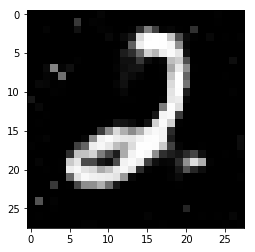

Number batches 468
118(0/468) D: 0.6543, G: 0.9034
118(1/468) D: 0.6438, G: 0.8667
118(2/468) D: 0.6417, G: 0.9650
118(3/468) D: 0.6153, G: 1.1725
118(4/468) D: 0.6079, G: 1.0633
118(5/468) D: 0.6411, G: 0.8590
118(6/468) D: 0.6237, G: 1.1059
118(7/468) D: 0.5825, G: 0.9839
118(8/468) D: 0.6239, G: 0.9069
118(9/468) D: 0.6580, G: 0.8234
118(10/468) D: 0.6652, G: 0.9828
118(11/468) D: 0.6032, G: 1.0752
118(12/468) D: 0.6096, G: 0.8943
118(13/468) D: 0.6162, G: 0.8047
118(14/468) D: 0.5938, G: 1.0679
118(15/468) D: 0.6610, G: 0.8141
118(16/468) D: 0.6399, G: 0.9148
118(17/468) D: 0.6330, G: 0.9210
118(18/468) D: 0.6024, G: 0.9440
118(19/468) D: 0.6476, G: 0.8296
118(20/468) D: 0.6384, G: 0.9926
118(21/468) D: 0.6422, G: 1.0162
118(22/468) D: 0.6215, G: 0.8288
118(23/468) D: 0.6000, G: 0.8888
118(24/468) D: 0.5549, G: 0.9902
118(25/468) D: 0.6368, G: 0.8939
118(26/468) D: 0.6016, G: 1.0113
118(27/468) D: 0.6614, G: 1.0592
118(28/468) D: 0.6433, G: 0.9772
118(29/468) D: 0.5954, G: 0.9800
1

118(244/468) D: 0.6327, G: 1.0409
118(245/468) D: 0.6497, G: 1.0345
118(246/468) D: 0.6135, G: 0.8902
118(247/468) D: 0.5907, G: 1.0925
118(248/468) D: 0.6052, G: 0.8948
118(249/468) D: 0.6812, G: 0.9551
118(250/468) D: 0.6734, G: 0.9737
118(251/468) D: 0.6301, G: 0.7719
118(252/468) D: 0.6282, G: 1.1437
118(253/468) D: 0.5913, G: 1.0625
118(254/468) D: 0.6586, G: 0.7680
118(255/468) D: 0.7042, G: 0.7915
118(256/468) D: 0.6441, G: 0.9584
118(257/468) D: 0.5817, G: 1.0045
118(258/468) D: 0.6190, G: 0.8834
118(259/468) D: 0.6293, G: 0.9124
118(260/468) D: 0.5929, G: 0.9953
118(261/468) D: 0.6422, G: 0.9013
118(262/468) D: 0.6095, G: 0.8700
118(263/468) D: 0.6411, G: 0.8466
118(264/468) D: 0.6537, G: 0.9753
118(265/468) D: 0.6234, G: 1.0263
118(266/468) D: 0.5800, G: 0.9419
118(267/468) D: 0.5954, G: 0.9644
118(268/468) D: 0.6149, G: 0.9709
118(269/468) D: 0.5730, G: 0.9611
118(270/468) D: 0.6104, G: 0.9201
118(271/468) D: 0.6097, G: 0.9453
118(272/468) D: 0.6191, G: 0.8974
118(273/468) D

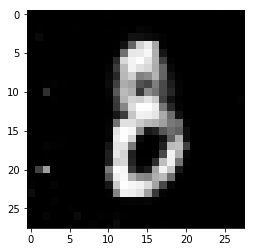

Number batches 468
119(0/468) D: 0.6783, G: 0.6907
119(1/468) D: 0.6874, G: 0.9673
119(2/468) D: 0.6237, G: 0.9940
119(3/468) D: 0.6060, G: 0.9845
119(4/468) D: 0.5758, G: 0.9784
119(5/468) D: 0.6327, G: 0.9695
119(6/468) D: 0.5574, G: 0.9364
119(7/468) D: 0.5497, G: 1.0207
119(8/468) D: 0.6070, G: 0.9036
119(9/468) D: 0.7183, G: 1.0540
119(10/468) D: 0.6679, G: 0.8485
119(11/468) D: 0.5753, G: 0.9290
119(12/468) D: 0.5595, G: 1.0231
119(13/468) D: 0.6202, G: 0.9821
119(14/468) D: 0.5768, G: 0.9837
119(15/468) D: 0.6292, G: 0.9153
119(16/468) D: 0.6053, G: 0.8387
119(17/468) D: 0.6209, G: 1.0062
119(18/468) D: 0.6179, G: 0.8553
119(19/468) D: 0.6235, G: 0.7582
119(20/468) D: 0.6515, G: 1.0782
119(21/468) D: 0.5949, G: 1.0744
119(22/468) D: 0.6057, G: 0.8534
119(23/468) D: 0.5776, G: 1.0982
119(24/468) D: 0.5676, G: 1.0039
119(25/468) D: 0.6518, G: 0.8175
119(26/468) D: 0.5809, G: 0.9276
119(27/468) D: 0.6118, G: 1.1241
119(28/468) D: 0.6511, G: 0.8086
119(29/468) D: 0.6143, G: 0.8683
1

119(245/468) D: 0.6469, G: 1.0964
119(246/468) D: 0.6199, G: 0.9118
119(247/468) D: 0.5731, G: 0.9086
119(248/468) D: 0.6071, G: 0.9677
119(249/468) D: 0.5878, G: 0.9764
119(250/468) D: 0.6595, G: 0.7626
119(251/468) D: 0.6305, G: 0.9718
119(252/468) D: 0.6081, G: 1.0285
119(253/468) D: 0.6043, G: 0.9667
119(254/468) D: 0.6216, G: 0.8642
119(255/468) D: 0.6583, G: 0.8999
119(256/468) D: 0.6016, G: 0.8415
119(257/468) D: 0.5979, G: 1.0040
119(258/468) D: 0.6007, G: 0.9682
119(259/468) D: 0.5937, G: 0.9345
119(260/468) D: 0.5987, G: 0.9179
119(261/468) D: 0.6422, G: 0.9307
119(262/468) D: 0.6375, G: 0.8838
119(263/468) D: 0.6294, G: 0.8868
119(264/468) D: 0.6376, G: 0.9574
119(265/468) D: 0.6245, G: 0.9363
119(266/468) D: 0.6030, G: 0.8474
119(267/468) D: 0.5819, G: 0.8762
119(268/468) D: 0.6070, G: 1.0602
119(269/468) D: 0.6197, G: 0.9725
119(270/468) D: 0.6394, G: 1.0181
119(271/468) D: 0.6321, G: 0.8795
119(272/468) D: 0.6137, G: 0.9013
119(273/468) D: 0.5983, G: 1.0047
119(274/468) D

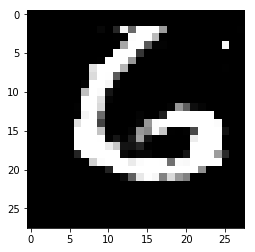

Number batches 468
120(0/468) D: 0.6350, G: 0.7799
120(1/468) D: 0.6726, G: 0.8916
120(2/468) D: 0.5767, G: 1.1574
120(3/468) D: 0.5974, G: 0.9665
120(4/468) D: 0.6132, G: 1.0393
120(5/468) D: 0.5840, G: 0.9716
120(6/468) D: 0.6143, G: 0.8222
120(7/468) D: 0.5778, G: 1.1724
120(8/468) D: 0.5800, G: 0.8552
120(9/468) D: 0.7123, G: 0.9409
120(10/468) D: 0.6929, G: 0.9700
120(11/468) D: 0.6332, G: 1.0769
120(12/468) D: 0.5664, G: 0.8905
120(13/468) D: 0.5953, G: 0.8831
120(14/468) D: 0.6199, G: 1.0014
120(15/468) D: 0.6372, G: 1.0025
120(16/468) D: 0.5636, G: 0.9943
120(17/468) D: 0.6274, G: 0.9343
120(18/468) D: 0.6168, G: 0.8635
120(19/468) D: 0.6487, G: 0.9451
120(20/468) D: 0.6265, G: 0.9367
120(21/468) D: 0.6140, G: 0.8914
120(22/468) D: 0.6196, G: 0.8781
120(23/468) D: 0.6151, G: 0.9051
120(24/468) D: 0.5669, G: 0.9501
120(25/468) D: 0.6578, G: 0.9516
120(26/468) D: 0.6159, G: 0.9458
120(27/468) D: 0.5861, G: 0.9272
120(28/468) D: 0.6231, G: 0.8930
120(29/468) D: 0.6001, G: 1.0577
1

120(244/468) D: 0.6244, G: 0.8038
120(245/468) D: 0.6267, G: 0.9856
120(246/468) D: 0.5948, G: 1.0968
120(247/468) D: 0.5706, G: 0.9822
120(248/468) D: 0.6088, G: 1.0375
120(249/468) D: 0.5668, G: 1.0697
120(250/468) D: 0.6910, G: 0.7660
120(251/468) D: 0.6452, G: 0.8849
120(252/468) D: 0.6220, G: 1.0400
120(253/468) D: 0.5818, G: 0.9312
120(254/468) D: 0.6130, G: 0.8971
120(255/468) D: 0.6562, G: 0.9996
120(256/468) D: 0.6265, G: 0.9979
120(257/468) D: 0.5701, G: 1.0525
120(258/468) D: 0.6608, G: 0.9233
120(259/468) D: 0.6159, G: 1.0503
120(260/468) D: 0.5982, G: 0.8872
120(261/468) D: 0.6103, G: 0.9995
120(262/468) D: 0.6050, G: 0.8435
120(263/468) D: 0.6361, G: 0.9712
120(264/468) D: 0.6823, G: 0.9795
120(265/468) D: 0.6258, G: 0.9033
120(266/468) D: 0.6136, G: 0.9275
120(267/468) D: 0.5912, G: 0.9103
120(268/468) D: 0.6072, G: 0.9507
120(269/468) D: 0.6029, G: 0.8935
120(270/468) D: 0.6253, G: 0.8474
120(271/468) D: 0.6548, G: 1.0062
120(272/468) D: 0.6097, G: 1.0471
120(273/468) D

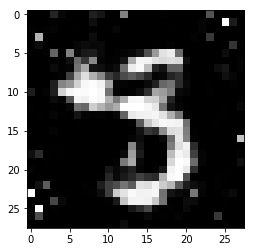

Number batches 468
121(0/468) D: 0.6465, G: 0.8976
121(1/468) D: 0.6589, G: 0.9750
121(2/468) D: 0.6121, G: 0.9458
121(3/468) D: 0.6629, G: 0.9633
121(4/468) D: 0.5810, G: 0.9165
121(5/468) D: 0.6107, G: 0.9797
121(6/468) D: 0.5799, G: 0.9392
121(7/468) D: 0.6261, G: 0.9975
121(8/468) D: 0.6086, G: 0.9902
121(9/468) D: 0.6914, G: 0.9253
121(10/468) D: 0.6696, G: 1.1277
121(11/468) D: 0.6058, G: 0.9184
121(12/468) D: 0.6309, G: 0.8641
121(13/468) D: 0.6128, G: 1.0497
121(14/468) D: 0.6109, G: 1.0043
121(15/468) D: 0.6336, G: 0.8038
121(16/468) D: 0.6313, G: 0.8724
121(17/468) D: 0.6598, G: 1.0558
121(18/468) D: 0.6199, G: 0.7973
121(19/468) D: 0.6692, G: 0.8943
121(20/468) D: 0.5925, G: 1.0301
121(21/468) D: 0.5732, G: 0.8427
121(22/468) D: 0.6072, G: 0.9124
121(23/468) D: 0.6132, G: 1.0860
121(24/468) D: 0.5976, G: 0.8890
121(25/468) D: 0.6075, G: 0.8080
121(26/468) D: 0.5752, G: 1.0361
121(27/468) D: 0.6154, G: 0.9336
121(28/468) D: 0.6165, G: 0.9285
121(29/468) D: 0.6290, G: 0.9934
1

121(245/468) D: 0.6653, G: 0.9463
121(246/468) D: 0.6283, G: 0.8795
121(247/468) D: 0.5715, G: 0.9952
121(248/468) D: 0.5709, G: 0.9909
121(249/468) D: 0.6311, G: 1.1076
121(250/468) D: 0.6793, G: 0.8235
121(251/468) D: 0.6682, G: 0.8543
121(252/468) D: 0.6272, G: 1.0112
121(253/468) D: 0.5980, G: 0.9590
121(254/468) D: 0.6058, G: 0.8873
121(255/468) D: 0.7039, G: 0.8487
121(256/468) D: 0.6119, G: 0.9168
121(257/468) D: 0.5933, G: 1.0573
121(258/468) D: 0.6751, G: 0.7671
121(259/468) D: 0.6131, G: 0.9677
121(260/468) D: 0.6474, G: 0.8659
121(261/468) D: 0.6116, G: 0.8330
121(262/468) D: 0.6234, G: 0.8599
121(263/468) D: 0.6266, G: 0.9495
121(264/468) D: 0.6423, G: 0.8494
121(265/468) D: 0.6147, G: 0.9720
121(266/468) D: 0.5973, G: 0.9873
121(267/468) D: 0.5659, G: 0.8288
121(268/468) D: 0.6472, G: 0.9537
121(269/468) D: 0.6251, G: 0.9927
121(270/468) D: 0.6199, G: 0.9597
121(271/468) D: 0.6235, G: 1.0600
121(272/468) D: 0.5979, G: 0.8915
121(273/468) D: 0.6242, G: 0.9824
121(274/468) D

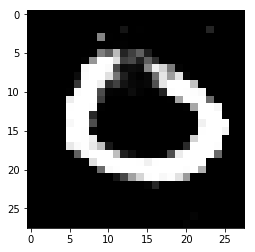

Number batches 468
122(0/468) D: 0.6436, G: 0.8540
122(1/468) D: 0.6665, G: 0.8167
122(2/468) D: 0.6133, G: 0.8469
122(3/468) D: 0.6423, G: 1.0449
122(4/468) D: 0.5824, G: 1.0013
122(5/468) D: 0.6401, G: 0.8295
122(6/468) D: 0.6094, G: 1.0144
122(7/468) D: 0.6094, G: 0.9885
122(8/468) D: 0.6170, G: 0.8564
122(9/468) D: 0.6790, G: 1.0026
122(10/468) D: 0.6495, G: 0.9737
122(11/468) D: 0.6096, G: 0.9695
122(12/468) D: 0.6116, G: 0.8695
122(13/468) D: 0.5523, G: 0.8856
122(14/468) D: 0.6223, G: 0.9894
122(15/468) D: 0.6446, G: 1.0834
122(16/468) D: 0.6760, G: 0.7754
122(17/468) D: 0.5999, G: 0.9815
122(18/468) D: 0.6089, G: 0.8557
122(19/468) D: 0.6422, G: 0.8531
122(20/468) D: 0.6333, G: 1.0518
122(21/468) D: 0.6132, G: 0.9757
122(22/468) D: 0.5883, G: 0.8066
122(23/468) D: 0.5977, G: 1.0092
122(24/468) D: 0.5837, G: 0.9577
122(25/468) D: 0.6729, G: 0.8779
122(26/468) D: 0.5861, G: 0.8347
122(27/468) D: 0.5588, G: 1.0210
122(28/468) D: 0.6143, G: 0.8849
122(29/468) D: 0.6004, G: 0.9823
1

122(244/468) D: 0.6680, G: 0.8943
122(245/468) D: 0.6168, G: 1.0075
122(246/468) D: 0.6042, G: 0.9703
122(247/468) D: 0.6050, G: 1.0464
122(248/468) D: 0.5749, G: 0.9696
122(249/468) D: 0.6011, G: 0.9381
122(250/468) D: 0.6338, G: 0.9242
122(251/468) D: 0.6635, G: 0.9074
122(252/468) D: 0.6581, G: 1.0826
122(253/468) D: 0.5742, G: 1.0420
122(254/468) D: 0.6368, G: 0.9323
122(255/468) D: 0.6844, G: 0.9038
122(256/468) D: 0.6869, G: 0.9928
122(257/468) D: 0.5999, G: 0.9703
122(258/468) D: 0.6611, G: 0.9482
122(259/468) D: 0.6205, G: 0.9840
122(260/468) D: 0.6355, G: 0.8204
122(261/468) D: 0.6554, G: 0.9760
122(262/468) D: 0.6109, G: 0.9707
122(263/468) D: 0.6620, G: 0.9269
122(264/468) D: 0.6250, G: 0.8257
122(265/468) D: 0.6378, G: 0.9844
122(266/468) D: 0.6268, G: 1.0282
122(267/468) D: 0.5642, G: 0.7907
122(268/468) D: 0.6040, G: 0.9718
122(269/468) D: 0.6061, G: 1.0017
122(270/468) D: 0.6605, G: 0.8551
122(271/468) D: 0.6217, G: 1.0081
122(272/468) D: 0.6075, G: 0.9546
122(273/468) D

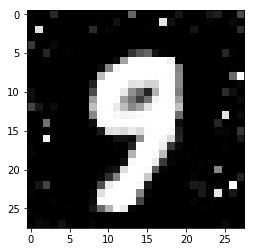

Number batches 468
123(0/468) D: 0.6390, G: 0.8080
123(1/468) D: 0.6715, G: 1.1111
123(2/468) D: 0.6617, G: 0.9316
123(3/468) D: 0.6236, G: 0.9533
123(4/468) D: 0.5749, G: 1.0388
123(5/468) D: 0.6013, G: 0.9113
123(6/468) D: 0.5712, G: 0.9901
123(7/468) D: 0.5917, G: 1.0604
123(8/468) D: 0.5986, G: 0.8932
123(9/468) D: 0.6757, G: 0.8439
123(10/468) D: 0.6791, G: 0.9588
123(11/468) D: 0.5975, G: 1.0810
123(12/468) D: 0.6020, G: 0.8000
123(13/468) D: 0.6084, G: 0.8828
123(14/468) D: 0.6174, G: 1.1382
123(15/468) D: 0.6550, G: 0.8337
123(16/468) D: 0.6299, G: 0.9257
123(17/468) D: 0.6401, G: 1.1316
123(18/468) D: 0.6501, G: 0.8635
123(19/468) D: 0.6342, G: 0.8403
123(20/468) D: 0.5847, G: 0.8922
123(21/468) D: 0.6240, G: 1.0212
123(22/468) D: 0.6031, G: 0.9339
123(23/468) D: 0.6431, G: 0.9521
123(24/468) D: 0.5683, G: 1.0236
123(25/468) D: 0.6274, G: 0.7352
123(26/468) D: 0.6074, G: 0.9717
123(27/468) D: 0.5739, G: 1.0023
123(28/468) D: 0.6558, G: 0.7464
123(29/468) D: 0.6384, G: 1.0629
1

123(244/468) D: 0.6378, G: 0.7251
123(245/468) D: 0.6389, G: 0.9888
123(246/468) D: 0.5875, G: 1.0705
123(247/468) D: 0.5826, G: 0.9014
123(248/468) D: 0.5619, G: 0.8943
123(249/468) D: 0.6218, G: 1.0855
123(250/468) D: 0.6856, G: 0.7973
123(251/468) D: 0.6546, G: 0.8478
123(252/468) D: 0.5914, G: 1.0378
123(253/468) D: 0.5738, G: 1.0280
123(254/468) D: 0.6516, G: 0.7765
123(255/468) D: 0.6664, G: 0.8235
123(256/468) D: 0.6580, G: 0.9075
123(257/468) D: 0.6276, G: 1.0262
123(258/468) D: 0.6201, G: 0.9802
123(259/468) D: 0.5851, G: 0.9213
123(260/468) D: 0.6005, G: 0.9969
123(261/468) D: 0.6244, G: 0.9051
123(262/468) D: 0.5933, G: 0.9221
123(263/468) D: 0.6144, G: 0.8126
123(264/468) D: 0.6368, G: 0.9279
123(265/468) D: 0.6092, G: 0.9885
123(266/468) D: 0.5780, G: 0.9980
123(267/468) D: 0.5896, G: 0.8595
123(268/468) D: 0.6432, G: 1.0784
123(269/468) D: 0.5952, G: 1.0307
123(270/468) D: 0.6018, G: 0.9805
123(271/468) D: 0.6383, G: 0.9510
123(272/468) D: 0.5938, G: 1.0174
123(273/468) D

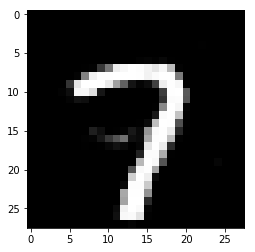

Number batches 468
124(0/468) D: 0.6794, G: 0.6744
124(1/468) D: 0.7172, G: 1.0088
124(2/468) D: 0.6311, G: 0.9386
124(3/468) D: 0.5829, G: 0.8579
124(4/468) D: 0.6003, G: 0.9684
124(5/468) D: 0.5828, G: 1.0562
124(6/468) D: 0.5850, G: 0.8894
124(7/468) D: 0.5654, G: 0.9069
124(8/468) D: 0.5830, G: 0.9296
124(9/468) D: 0.6628, G: 0.9295
124(10/468) D: 0.6546, G: 0.9453
124(11/468) D: 0.6045, G: 1.2247
124(12/468) D: 0.6440, G: 0.7711
124(13/468) D: 0.6642, G: 0.9751
124(14/468) D: 0.6319, G: 1.0652
124(15/468) D: 0.6240, G: 0.8012
124(16/468) D: 0.6172, G: 0.8760
124(17/468) D: 0.5876, G: 1.0188
124(18/468) D: 0.6249, G: 0.9210
124(19/468) D: 0.6128, G: 0.8483
124(20/468) D: 0.6085, G: 1.0254
124(21/468) D: 0.6117, G: 1.0140
124(22/468) D: 0.6636, G: 0.8365
124(23/468) D: 0.5913, G: 0.8242
124(24/468) D: 0.6102, G: 1.0871
124(25/468) D: 0.6134, G: 0.8534
124(26/468) D: 0.5830, G: 0.8897
124(27/468) D: 0.6199, G: 1.1267
124(28/468) D: 0.6753, G: 0.9226
124(29/468) D: 0.5844, G: 0.8378
1

124(245/468) D: 0.6084, G: 0.9501
124(246/468) D: 0.5772, G: 0.9825
124(247/468) D: 0.5529, G: 0.9899
124(248/468) D: 0.5492, G: 1.0350
124(249/468) D: 0.5867, G: 1.1344
124(250/468) D: 0.6299, G: 0.7666
124(251/468) D: 0.6426, G: 1.1356
124(252/468) D: 0.6305, G: 1.1069
124(253/468) D: 0.6062, G: 0.8132
124(254/468) D: 0.6303, G: 0.9755
124(255/468) D: 0.7157, G: 0.9120
124(256/468) D: 0.6083, G: 0.8926
124(257/468) D: 0.5666, G: 1.0398
124(258/468) D: 0.6089, G: 0.9547
124(259/468) D: 0.5839, G: 0.9928
124(260/468) D: 0.5684, G: 0.8440
124(261/468) D: 0.6080, G: 1.0052
124(262/468) D: 0.6085, G: 1.0111
124(263/468) D: 0.6197, G: 0.8251
124(264/468) D: 0.6325, G: 0.8702
124(265/468) D: 0.6103, G: 1.0601
124(266/468) D: 0.5907, G: 0.9239
124(267/468) D: 0.6407, G: 0.9865
124(268/468) D: 0.6131, G: 0.7752
124(269/468) D: 0.6438, G: 1.2898
124(270/468) D: 0.6386, G: 0.8984
124(271/468) D: 0.6327, G: 0.7513
124(272/468) D: 0.6537, G: 1.0072
124(273/468) D: 0.6476, G: 0.9092
124(274/468) D

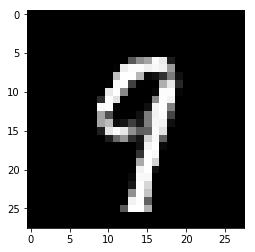

Number batches 468
125(0/468) D: 0.6681, G: 0.8250
125(1/468) D: 0.6804, G: 0.9121
125(2/468) D: 0.6225, G: 1.1342
125(3/468) D: 0.6423, G: 0.8793
125(4/468) D: 0.6146, G: 1.0330
125(5/468) D: 0.6145, G: 0.9698
125(6/468) D: 0.5991, G: 0.8157
125(7/468) D: 0.5823, G: 1.1048
125(8/468) D: 0.6190, G: 0.7646
125(9/468) D: 0.6642, G: 0.9595
125(10/468) D: 0.6308, G: 1.1398
125(11/468) D: 0.5915, G: 0.7892
125(12/468) D: 0.6412, G: 0.9652
125(13/468) D: 0.6174, G: 0.9164
125(14/468) D: 0.6084, G: 0.8750
125(15/468) D: 0.6757, G: 0.9035
125(16/468) D: 0.6065, G: 0.8828
125(17/468) D: 0.6241, G: 0.8727
125(18/468) D: 0.6168, G: 0.8078
125(19/468) D: 0.6272, G: 0.8661
125(20/468) D: 0.5926, G: 0.9796
125(21/468) D: 0.6184, G: 0.9078
125(22/468) D: 0.5982, G: 0.9836
125(23/468) D: 0.6414, G: 1.1199
125(24/468) D: 0.5997, G: 0.7849
125(25/468) D: 0.6070, G: 0.7521
125(26/468) D: 0.5933, G: 1.0550
125(27/468) D: 0.6165, G: 1.0192
125(28/468) D: 0.6076, G: 0.8859
125(29/468) D: 0.6493, G: 0.9619
1

125(244/468) D: 0.6301, G: 0.9549
125(245/468) D: 0.6414, G: 0.9365
125(246/468) D: 0.6174, G: 0.8985
125(247/468) D: 0.5848, G: 1.0216
125(248/468) D: 0.5751, G: 0.9823
125(249/468) D: 0.6047, G: 0.8680
125(250/468) D: 0.6540, G: 0.7757
125(251/468) D: 0.6541, G: 1.2004
125(252/468) D: 0.6317, G: 1.0139
125(253/468) D: 0.6057, G: 0.9683
125(254/468) D: 0.6268, G: 0.8609
125(255/468) D: 0.7100, G: 1.0435
125(256/468) D: 0.6247, G: 0.9071
125(257/468) D: 0.5659, G: 1.0400
125(258/468) D: 0.6434, G: 1.0958
125(259/468) D: 0.6151, G: 1.0092
125(260/468) D: 0.6112, G: 0.6813
125(261/468) D: 0.5935, G: 0.9604
125(262/468) D: 0.6138, G: 1.0415
125(263/468) D: 0.6021, G: 0.9002
125(264/468) D: 0.6799, G: 0.9964
125(265/468) D: 0.6191, G: 0.9050
125(266/468) D: 0.6025, G: 0.9646
125(267/468) D: 0.6017, G: 0.9105
125(268/468) D: 0.6642, G: 0.9040
125(269/468) D: 0.5769, G: 0.9268
125(270/468) D: 0.5920, G: 0.8973
125(271/468) D: 0.6569, G: 0.8719
125(272/468) D: 0.6020, G: 0.9648
125(273/468) D

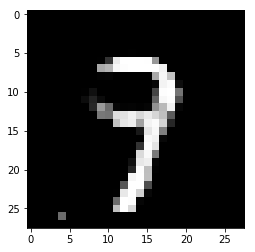

Number batches 468
126(0/468) D: 0.6429, G: 0.9375
126(1/468) D: 0.6325, G: 0.9494
126(2/468) D: 0.6344, G: 0.7914
126(3/468) D: 0.6474, G: 1.1557
126(4/468) D: 0.6193, G: 1.0055
126(5/468) D: 0.6163, G: 0.8627
126(6/468) D: 0.6188, G: 1.0328
126(7/468) D: 0.5566, G: 1.1051
126(8/468) D: 0.6016, G: 0.8673
126(9/468) D: 0.6642, G: 0.8922
126(10/468) D: 0.6651, G: 0.8496
126(11/468) D: 0.5875, G: 0.9606
126(12/468) D: 0.5632, G: 1.0777
126(13/468) D: 0.6070, G: 0.9048
126(14/468) D: 0.6408, G: 0.8986
126(15/468) D: 0.6806, G: 1.0276
126(16/468) D: 0.6166, G: 0.8829
126(17/468) D: 0.6441, G: 0.9797
126(18/468) D: 0.6095, G: 1.0088
126(19/468) D: 0.6609, G: 0.8930
126(20/468) D: 0.5639, G: 0.9448
126(21/468) D: 0.6137, G: 1.0132
126(22/468) D: 0.6622, G: 0.9864
126(23/468) D: 0.5964, G: 0.8671
126(24/468) D: 0.5755, G: 1.0238
126(25/468) D: 0.6636, G: 0.8698
126(26/468) D: 0.6225, G: 0.9229
126(27/468) D: 0.6062, G: 1.0327
126(28/468) D: 0.6160, G: 0.9649
126(29/468) D: 0.6099, G: 0.8164
1

126(245/468) D: 0.6075, G: 0.8433
126(246/468) D: 0.6282, G: 0.9907
126(247/468) D: 0.5718, G: 0.9697
126(248/468) D: 0.6028, G: 0.8283
126(249/468) D: 0.5866, G: 1.0849
126(250/468) D: 0.6781, G: 0.9427
126(251/468) D: 0.6179, G: 0.9307
126(252/468) D: 0.6200, G: 1.0693
126(253/468) D: 0.5813, G: 1.0310
126(254/468) D: 0.5954, G: 0.8281
126(255/468) D: 0.6449, G: 1.0227
126(256/468) D: 0.6145, G: 0.9579
126(257/468) D: 0.5876, G: 0.9669
126(258/468) D: 0.6510, G: 0.7822
126(259/468) D: 0.6257, G: 1.0095
126(260/468) D: 0.6186, G: 0.9159
126(261/468) D: 0.6133, G: 0.8974
126(262/468) D: 0.6251, G: 0.9768
126(263/468) D: 0.6544, G: 0.9254
126(264/468) D: 0.6112, G: 0.8504
126(265/468) D: 0.6544, G: 0.9982
126(266/468) D: 0.6158, G: 0.8761
126(267/468) D: 0.6122, G: 1.0144
126(268/468) D: 0.6015, G: 0.8765
126(269/468) D: 0.5877, G: 0.9396
126(270/468) D: 0.5993, G: 1.0816
126(271/468) D: 0.6225, G: 1.0029
126(272/468) D: 0.6050, G: 0.8810
126(273/468) D: 0.6330, G: 0.9090
126(274/468) D

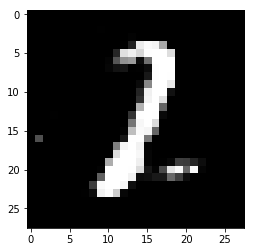

Number batches 468
127(0/468) D: 0.6676, G: 0.6809
127(1/468) D: 0.6523, G: 0.8918
127(2/468) D: 0.6160, G: 0.8809
127(3/468) D: 0.5986, G: 1.0088
127(4/468) D: 0.5863, G: 0.9839
127(5/468) D: 0.5976, G: 0.9553
127(6/468) D: 0.5580, G: 0.8397
127(7/468) D: 0.5740, G: 1.1250
127(8/468) D: 0.6402, G: 1.0285
127(9/468) D: 0.6864, G: 0.9016
127(10/468) D: 0.6590, G: 0.9109
127(11/468) D: 0.5693, G: 1.0414
127(12/468) D: 0.6019, G: 0.9314
127(13/468) D: 0.6378, G: 0.9094
127(14/468) D: 0.6017, G: 0.8973
127(15/468) D: 0.6376, G: 0.9461
127(16/468) D: 0.6241, G: 0.8321
127(17/468) D: 0.6639, G: 0.8950
127(18/468) D: 0.5659, G: 1.0244
127(19/468) D: 0.6197, G: 0.8219
127(20/468) D: 0.6187, G: 1.0281
127(21/468) D: 0.6052, G: 0.9374
127(22/468) D: 0.6212, G: 0.9864
127(23/468) D: 0.5954, G: 0.8905
127(24/468) D: 0.5940, G: 0.9814
127(25/468) D: 0.6331, G: 0.8547
127(26/468) D: 0.6017, G: 0.9327
127(27/468) D: 0.5746, G: 1.1757
127(28/468) D: 0.6356, G: 0.8380
127(29/468) D: 0.6142, G: 1.0059
1

127(245/468) D: 0.6043, G: 0.7168
127(246/468) D: 0.6521, G: 1.0374
127(247/468) D: 0.5387, G: 1.0416
127(248/468) D: 0.5861, G: 0.9421
127(249/468) D: 0.6139, G: 0.9940
127(250/468) D: 0.6673, G: 0.9037
127(251/468) D: 0.6536, G: 0.9547
127(252/468) D: 0.6176, G: 0.9164
127(253/468) D: 0.5746, G: 0.9790
127(254/468) D: 0.6009, G: 0.9035
127(255/468) D: 0.7140, G: 0.8971
127(256/468) D: 0.6029, G: 0.9600
127(257/468) D: 0.5897, G: 0.9536
127(258/468) D: 0.6355, G: 0.9084
127(259/468) D: 0.5979, G: 1.0421
127(260/468) D: 0.6054, G: 0.8493
127(261/468) D: 0.5930, G: 0.8188
127(262/468) D: 0.5916, G: 1.0022
127(263/468) D: 0.6046, G: 0.8959
127(264/468) D: 0.6458, G: 0.9467
127(265/468) D: 0.6406, G: 0.9482
127(266/468) D: 0.5891, G: 0.9127
127(267/468) D: 0.5836, G: 1.0560
127(268/468) D: 0.6354, G: 0.9843
127(269/468) D: 0.6114, G: 0.8875
127(270/468) D: 0.6198, G: 1.0781
127(271/468) D: 0.6236, G: 0.9840
127(272/468) D: 0.5980, G: 0.9029
127(273/468) D: 0.5983, G: 1.0583
127(274/468) D

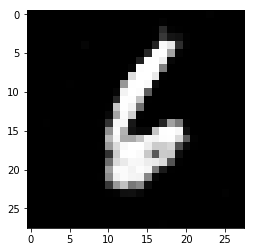

Number batches 468
128(0/468) D: 0.6493, G: 0.8985
128(1/468) D: 0.6566, G: 0.9200
128(2/468) D: 0.6420, G: 0.8895
128(3/468) D: 0.6076, G: 0.9977
128(4/468) D: 0.5687, G: 0.8646
128(5/468) D: 0.6064, G: 0.8895
128(6/468) D: 0.5393, G: 1.0926
128(7/468) D: 0.5609, G: 0.9417
128(8/468) D: 0.6287, G: 0.9507
128(9/468) D: 0.6535, G: 0.8736
128(10/468) D: 0.7197, G: 1.1440
128(11/468) D: 0.5991, G: 0.9686
128(12/468) D: 0.6255, G: 0.8766
128(13/468) D: 0.6166, G: 0.8225
128(14/468) D: 0.6262, G: 1.1984
128(15/468) D: 0.6941, G: 0.9522
128(16/468) D: 0.6508, G: 0.7669
128(17/468) D: 0.6314, G: 0.9850
128(18/468) D: 0.6528, G: 0.7648
128(19/468) D: 0.5909, G: 0.8309
128(20/468) D: 0.5911, G: 0.9442
128(21/468) D: 0.5862, G: 1.0263
128(22/468) D: 0.6207, G: 0.8465
128(23/468) D: 0.6145, G: 1.0509
128(24/468) D: 0.5810, G: 1.0500
128(25/468) D: 0.6401, G: 0.7768
128(26/468) D: 0.6316, G: 0.9277
128(27/468) D: 0.6166, G: 1.0174
128(28/468) D: 0.5909, G: 0.9943
128(29/468) D: 0.5711, G: 0.9245
1

128(245/468) D: 0.6640, G: 1.0032
128(246/468) D: 0.6366, G: 0.9015
128(247/468) D: 0.5795, G: 1.0240
128(248/468) D: 0.5953, G: 0.9823
128(249/468) D: 0.6146, G: 0.9527
128(250/468) D: 0.6311, G: 0.7892
128(251/468) D: 0.6274, G: 0.9793
128(252/468) D: 0.6377, G: 0.9782
128(253/468) D: 0.5977, G: 0.9099
128(254/468) D: 0.6489, G: 0.8480
128(255/468) D: 0.6610, G: 0.7718
128(256/468) D: 0.6192, G: 0.9566
128(257/468) D: 0.5754, G: 1.0784
128(258/468) D: 0.6498, G: 0.9279
128(259/468) D: 0.6071, G: 0.8671
128(260/468) D: 0.6209, G: 1.0615
128(261/468) D: 0.6137, G: 0.9196
128(262/468) D: 0.5935, G: 0.8712
128(263/468) D: 0.6588, G: 0.9798
128(264/468) D: 0.6761, G: 1.0364
128(265/468) D: 0.6392, G: 0.8810
128(266/468) D: 0.5904, G: 0.9582
128(267/468) D: 0.5767, G: 0.9628
128(268/468) D: 0.6437, G: 1.0217
128(269/468) D: 0.5996, G: 0.8550
128(270/468) D: 0.6250, G: 0.9942
128(271/468) D: 0.6101, G: 0.8617
128(272/468) D: 0.6144, G: 0.9960
128(273/468) D: 0.6270, G: 1.0097
128(274/468) D

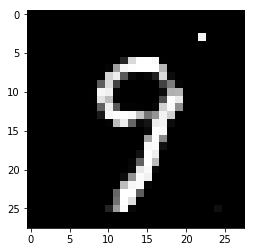

Number batches 468
129(0/468) D: 0.6517, G: 0.6638
129(1/468) D: 0.7100, G: 1.0042
129(2/468) D: 0.6660, G: 1.0782
129(3/468) D: 0.6297, G: 0.9117
129(4/468) D: 0.5930, G: 0.8877
129(5/468) D: 0.6140, G: 0.8833
129(6/468) D: 0.5779, G: 0.9599
129(7/468) D: 0.6102, G: 1.1778
129(8/468) D: 0.6223, G: 0.8590
129(9/468) D: 0.6979, G: 0.8446
129(10/468) D: 0.6744, G: 1.0503
129(11/468) D: 0.6219, G: 1.0765
129(12/468) D: 0.6062, G: 0.8544
129(13/468) D: 0.6066, G: 0.7904
129(14/468) D: 0.6149, G: 0.9977
129(15/468) D: 0.6312, G: 0.9673
129(16/468) D: 0.6421, G: 0.9479
129(17/468) D: 0.6135, G: 0.8087
129(18/468) D: 0.6062, G: 1.0445
129(19/468) D: 0.6397, G: 0.8827
129(20/468) D: 0.6230, G: 0.8432
129(21/468) D: 0.6054, G: 0.9144
129(22/468) D: 0.5914, G: 0.8319
129(23/468) D: 0.5933, G: 0.9829
129(24/468) D: 0.5603, G: 0.9898
129(25/468) D: 0.6720, G: 0.8595
129(26/468) D: 0.6119, G: 0.9862
129(27/468) D: 0.6012, G: 1.0354
129(28/468) D: 0.6277, G: 0.9548
129(29/468) D: 0.6081, G: 0.8241
1

129(245/468) D: 0.5880, G: 0.7953
129(246/468) D: 0.6190, G: 0.9730
129(247/468) D: 0.5639, G: 1.0791
129(248/468) D: 0.6279, G: 1.0752
129(249/468) D: 0.5977, G: 0.9571
129(250/468) D: 0.6809, G: 0.7814
129(251/468) D: 0.6533, G: 0.9537
129(252/468) D: 0.6281, G: 1.0363
129(253/468) D: 0.5605, G: 0.9406
129(254/468) D: 0.6478, G: 1.0151
129(255/468) D: 0.6748, G: 0.8638
129(256/468) D: 0.6593, G: 1.0070
129(257/468) D: 0.5970, G: 1.0081
129(258/468) D: 0.6438, G: 0.7662
129(259/468) D: 0.6411, G: 0.9215
129(260/468) D: 0.6067, G: 0.9948
129(261/468) D: 0.6021, G: 0.8916
129(262/468) D: 0.5869, G: 0.8464
129(263/468) D: 0.6656, G: 0.9696
129(264/468) D: 0.6489, G: 0.9955
129(265/468) D: 0.6112, G: 0.8486
129(266/468) D: 0.6018, G: 0.8672
129(267/468) D: 0.5918, G: 0.9854
129(268/468) D: 0.6283, G: 1.0234
129(269/468) D: 0.5974, G: 0.9740
129(270/468) D: 0.6578, G: 0.8579
129(271/468) D: 0.6350, G: 1.0037
129(272/468) D: 0.6303, G: 0.8943
129(273/468) D: 0.5791, G: 0.9021
129(274/468) D

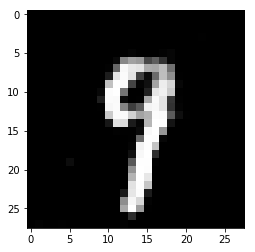

Number batches 468
130(0/468) D: 0.6461, G: 0.8766
130(1/468) D: 0.6776, G: 0.9979
130(2/468) D: 0.6140, G: 1.0694
130(3/468) D: 0.6675, G: 0.8844
130(4/468) D: 0.6056, G: 1.0295
130(5/468) D: 0.6003, G: 0.9729
130(6/468) D: 0.6125, G: 0.9941
130(7/468) D: 0.5783, G: 0.9150
130(8/468) D: 0.5979, G: 1.0334
130(9/468) D: 0.6673, G: 0.8795
130(10/468) D: 0.6830, G: 1.0661
130(11/468) D: 0.6127, G: 1.0823
130(12/468) D: 0.6204, G: 0.8595
130(13/468) D: 0.6308, G: 0.8839
130(14/468) D: 0.6015, G: 0.9291
130(15/468) D: 0.6294, G: 0.9497
130(16/468) D: 0.6187, G: 0.9251
130(17/468) D: 0.5934, G: 0.9052
130(18/468) D: 0.5934, G: 0.9760
130(19/468) D: 0.6246, G: 0.8252
130(20/468) D: 0.5968, G: 0.9856
130(21/468) D: 0.6204, G: 1.0108
130(22/468) D: 0.6386, G: 1.0020
130(23/468) D: 0.5709, G: 0.8991
130(24/468) D: 0.5777, G: 1.1441
130(25/468) D: 0.6478, G: 0.8276
130(26/468) D: 0.6125, G: 0.9613
130(27/468) D: 0.5877, G: 1.0753
130(28/468) D: 0.6487, G: 0.8660
130(29/468) D: 0.6300, G: 0.7933
1

130(244/468) D: 0.6191, G: 0.9323
130(245/468) D: 0.6394, G: 1.0046
130(246/468) D: 0.6285, G: 1.1021
130(247/468) D: 0.5638, G: 0.7819
130(248/468) D: 0.6378, G: 1.1398
130(249/468) D: 0.6202, G: 0.9816
130(250/468) D: 0.6228, G: 0.7627
130(251/468) D: 0.6380, G: 0.8561
130(252/468) D: 0.6034, G: 1.0481
130(253/468) D: 0.6185, G: 0.9246
130(254/468) D: 0.6292, G: 0.9840
130(255/468) D: 0.6706, G: 0.8132
130(256/468) D: 0.6091, G: 0.8240
130(257/468) D: 0.6076, G: 1.0184
130(258/468) D: 0.6151, G: 0.9128
130(259/468) D: 0.5758, G: 0.8514
130(260/468) D: 0.5879, G: 0.8759
130(261/468) D: 0.5852, G: 0.9486
130(262/468) D: 0.6168, G: 0.8583
130(263/468) D: 0.6776, G: 0.8723
130(264/468) D: 0.6410, G: 1.0468
130(265/468) D: 0.6368, G: 0.9967
130(266/468) D: 0.6247, G: 0.9264
130(267/468) D: 0.5964, G: 0.8189
130(268/468) D: 0.6054, G: 0.8712
130(269/468) D: 0.6478, G: 1.2624
130(270/468) D: 0.6120, G: 1.0338
130(271/468) D: 0.6666, G: 0.9508
130(272/468) D: 0.5621, G: 0.8776
130(273/468) D

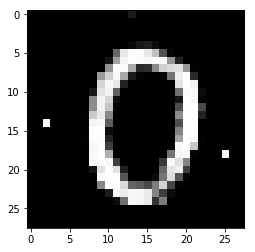

Number batches 468
131(0/468) D: 0.7085, G: 0.6115
131(1/468) D: 0.7078, G: 0.9419
131(2/468) D: 0.6296, G: 1.0390
131(3/468) D: 0.6088, G: 1.1054
131(4/468) D: 0.5997, G: 0.9121
131(5/468) D: 0.6266, G: 0.9978
131(6/468) D: 0.5913, G: 1.0586
131(7/468) D: 0.6176, G: 0.9296
131(8/468) D: 0.5984, G: 0.9651
131(9/468) D: 0.6435, G: 0.9599
131(10/468) D: 0.6546, G: 1.0757
131(11/468) D: 0.5731, G: 1.0100
131(12/468) D: 0.6198, G: 0.8502
131(13/468) D: 0.6332, G: 0.9173
131(14/468) D: 0.5969, G: 1.1058
131(15/468) D: 0.7056, G: 0.8410
131(16/468) D: 0.6002, G: 0.7833
131(17/468) D: 0.6210, G: 1.0527
131(18/468) D: 0.6041, G: 1.0225
131(19/468) D: 0.6083, G: 0.8306
131(20/468) D: 0.6320, G: 0.9577
131(21/468) D: 0.5889, G: 1.0231
131(22/468) D: 0.5994, G: 0.8618
131(23/468) D: 0.6204, G: 0.9419
131(24/468) D: 0.5685, G: 0.9408
131(25/468) D: 0.6477, G: 0.8760
131(26/468) D: 0.5729, G: 0.9105
131(27/468) D: 0.6032, G: 1.0598
131(28/468) D: 0.5945, G: 0.8639
131(29/468) D: 0.6213, G: 1.0277
1

131(244/468) D: 0.6262, G: 0.8213
131(245/468) D: 0.6272, G: 0.9453
131(246/468) D: 0.6105, G: 0.9956
131(247/468) D: 0.5759, G: 0.9140
131(248/468) D: 0.5750, G: 1.0488
131(249/468) D: 0.6055, G: 1.1435
131(250/468) D: 0.6448, G: 0.7065
131(251/468) D: 0.6379, G: 1.0291
131(252/468) D: 0.6628, G: 1.0454
131(253/468) D: 0.5896, G: 0.9483
131(254/468) D: 0.6233, G: 0.9513
131(255/468) D: 0.6990, G: 0.8313
131(256/468) D: 0.6081, G: 0.8616
131(257/468) D: 0.6432, G: 0.9732
131(258/468) D: 0.6790, G: 0.9382
131(259/468) D: 0.5936, G: 0.9512
131(260/468) D: 0.6231, G: 0.9479
131(261/468) D: 0.5881, G: 0.9058
131(262/468) D: 0.5829, G: 0.8965
131(263/468) D: 0.6430, G: 0.9124
131(264/468) D: 0.6706, G: 1.0748
131(265/468) D: 0.6680, G: 0.8665
131(266/468) D: 0.5897, G: 0.9989
131(267/468) D: 0.5897, G: 0.9917
131(268/468) D: 0.6396, G: 0.8767
131(269/468) D: 0.5634, G: 1.0420
131(270/468) D: 0.5934, G: 1.0661
131(271/468) D: 0.6001, G: 0.7808
131(272/468) D: 0.6753, G: 1.0493
131(273/468) D

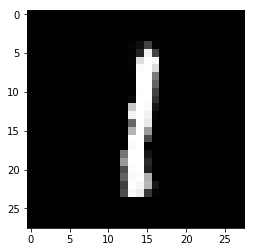

Number batches 468
132(0/468) D: 0.6449, G: 0.8717
132(1/468) D: 0.6868, G: 0.9953
132(2/468) D: 0.6444, G: 1.0189
132(3/468) D: 0.6256, G: 0.9017
132(4/468) D: 0.5929, G: 0.9118
132(5/468) D: 0.6256, G: 1.0526
132(6/468) D: 0.5879, G: 1.0001
132(7/468) D: 0.5529, G: 1.0514
132(8/468) D: 0.5656, G: 0.8413
132(9/468) D: 0.6968, G: 1.0815
132(10/468) D: 0.6656, G: 0.9260
132(11/468) D: 0.5897, G: 0.9802
132(12/468) D: 0.6161, G: 0.9225
132(13/468) D: 0.6195, G: 0.9413
132(14/468) D: 0.6234, G: 0.9219
132(15/468) D: 0.6491, G: 0.8683
132(16/468) D: 0.6363, G: 0.9295
132(17/468) D: 0.6361, G: 0.9766
132(18/468) D: 0.6356, G: 0.9330
132(19/468) D: 0.6416, G: 0.8902
132(20/468) D: 0.5724, G: 0.9229
132(21/468) D: 0.6410, G: 1.0687
132(22/468) D: 0.6340, G: 0.8438
132(23/468) D: 0.5852, G: 0.8629
132(24/468) D: 0.5786, G: 0.9786
132(25/468) D: 0.6577, G: 0.9199
132(26/468) D: 0.6105, G: 0.9566
132(27/468) D: 0.5617, G: 1.0460
132(28/468) D: 0.6078, G: 0.9887
132(29/468) D: 0.6056, G: 0.8199
1

132(245/468) D: 0.6395, G: 0.9682
132(246/468) D: 0.5889, G: 0.9886
132(247/468) D: 0.5911, G: 0.9632
132(248/468) D: 0.6467, G: 0.9663
132(249/468) D: 0.6227, G: 0.9662
132(250/468) D: 0.5805, G: 0.8929
132(251/468) D: 0.6379, G: 0.9683
132(252/468) D: 0.6495, G: 1.0042
132(253/468) D: 0.6077, G: 1.1851
132(254/468) D: 0.6653, G: 0.9416
132(255/468) D: 0.6801, G: 0.8001
132(256/468) D: 0.5987, G: 0.9834
132(257/468) D: 0.5794, G: 0.9765
132(258/468) D: 0.6290, G: 0.9232
132(259/468) D: 0.6267, G: 0.9442
132(260/468) D: 0.6048, G: 0.9813
132(261/468) D: 0.6736, G: 0.9709
132(262/468) D: 0.5980, G: 0.8773
132(263/468) D: 0.6216, G: 0.8935
132(264/468) D: 0.6463, G: 0.8559
132(265/468) D: 0.6340, G: 1.0495
132(266/468) D: 0.6078, G: 0.9831
132(267/468) D: 0.6080, G: 0.8738
132(268/468) D: 0.6333, G: 1.0484
132(269/468) D: 0.5955, G: 1.0129
132(270/468) D: 0.6455, G: 0.9919
132(271/468) D: 0.6066, G: 0.8720
132(272/468) D: 0.6330, G: 1.0825
132(273/468) D: 0.6652, G: 0.8837
132(274/468) D

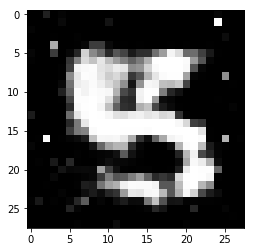

Number batches 468
133(0/468) D: 0.6705, G: 0.7586
133(1/468) D: 0.6396, G: 0.9716
133(2/468) D: 0.6228, G: 0.9319
133(3/468) D: 0.5915, G: 1.0635
133(4/468) D: 0.5890, G: 0.9908
133(5/468) D: 0.6005, G: 1.0157
133(6/468) D: 0.5890, G: 1.0100
133(7/468) D: 0.5702, G: 0.8438
133(8/468) D: 0.6471, G: 1.0281
133(9/468) D: 0.7029, G: 1.0180
133(10/468) D: 0.6617, G: 0.9332
133(11/468) D: 0.5904, G: 0.9772
133(12/468) D: 0.6011, G: 0.9034
133(13/468) D: 0.6220, G: 1.0495
133(14/468) D: 0.6542, G: 1.0553
133(15/468) D: 0.6772, G: 0.8447
133(16/468) D: 0.6035, G: 0.9483
133(17/468) D: 0.6349, G: 0.9030
133(18/468) D: 0.6103, G: 0.8913
133(19/468) D: 0.6132, G: 0.9061
133(20/468) D: 0.6083, G: 0.9569
133(21/468) D: 0.6093, G: 1.0453
133(22/468) D: 0.5952, G: 0.9578
133(23/468) D: 0.6150, G: 0.9261
133(24/468) D: 0.6163, G: 0.8348
133(25/468) D: 0.6340, G: 0.7801
133(26/468) D: 0.6499, G: 1.1683
133(27/468) D: 0.6034, G: 0.8375
133(28/468) D: 0.6197, G: 0.9810
133(29/468) D: 0.6167, G: 1.1941
1

133(244/468) D: 0.6296, G: 0.7613
133(245/468) D: 0.6490, G: 0.9430
133(246/468) D: 0.6240, G: 1.0607
133(247/468) D: 0.5636, G: 1.0201
133(248/468) D: 0.5856, G: 1.0571
133(249/468) D: 0.5735, G: 0.9217
133(250/468) D: 0.6844, G: 1.0238
133(251/468) D: 0.6472, G: 0.9702
133(252/468) D: 0.6024, G: 1.0550
133(253/468) D: 0.5984, G: 1.1144
133(254/468) D: 0.6461, G: 0.7931
133(255/468) D: 0.6669, G: 0.8685
133(256/468) D: 0.6166, G: 0.9363
133(257/468) D: 0.5926, G: 0.9195
133(258/468) D: 0.6466, G: 0.8362
133(259/468) D: 0.6025, G: 0.9696
133(260/468) D: 0.6029, G: 0.9878
133(261/468) D: 0.5900, G: 0.8644
133(262/468) D: 0.6297, G: 0.9277
133(263/468) D: 0.6384, G: 0.9715
133(264/468) D: 0.6797, G: 0.9677
133(265/468) D: 0.6371, G: 0.9202
133(266/468) D: 0.6222, G: 0.8829
133(267/468) D: 0.5783, G: 0.9612
133(268/468) D: 0.6096, G: 0.8940
133(269/468) D: 0.5822, G: 0.9472
133(270/468) D: 0.6017, G: 1.0145
133(271/468) D: 0.6046, G: 0.7965
133(272/468) D: 0.6402, G: 1.0797
133(273/468) D

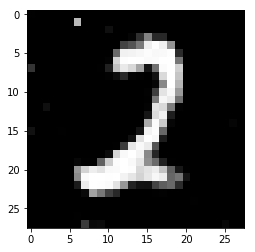

Number batches 468
134(0/468) D: 0.6344, G: 0.7165
134(1/468) D: 0.6514, G: 0.9903
134(2/468) D: 0.6684, G: 0.9638
134(3/468) D: 0.6319, G: 0.8591
134(4/468) D: 0.6012, G: 1.1007
134(5/468) D: 0.6146, G: 0.9029
134(6/468) D: 0.6457, G: 0.8912
134(7/468) D: 0.5865, G: 1.0302
134(8/468) D: 0.6273, G: 0.9221
134(9/468) D: 0.6795, G: 0.9312
134(10/468) D: 0.6559, G: 0.8921
134(11/468) D: 0.5827, G: 0.9301
134(12/468) D: 0.6047, G: 1.0278
134(13/468) D: 0.6044, G: 0.9569
134(14/468) D: 0.5970, G: 0.8714
134(15/468) D: 0.6332, G: 0.8546
134(16/468) D: 0.6227, G: 1.1981
134(17/468) D: 0.6085, G: 0.8010
134(18/468) D: 0.6188, G: 0.9095
134(19/468) D: 0.6011, G: 0.8987
134(20/468) D: 0.5894, G: 0.8999
134(21/468) D: 0.5830, G: 0.8932
134(22/468) D: 0.6281, G: 0.9187
134(23/468) D: 0.5717, G: 0.9437
134(24/468) D: 0.5858, G: 1.1475
134(25/468) D: 0.6418, G: 0.7737
134(26/468) D: 0.6109, G: 1.0616
134(27/468) D: 0.6038, G: 1.1316
134(28/468) D: 0.6255, G: 0.7988
134(29/468) D: 0.6194, G: 1.0147
1

134(244/468) D: 0.6478, G: 0.8857
134(245/468) D: 0.6644, G: 0.9523
134(246/468) D: 0.6367, G: 0.9386
134(247/468) D: 0.5494, G: 0.9103
134(248/468) D: 0.5670, G: 1.0689
134(249/468) D: 0.6127, G: 1.1034
134(250/468) D: 0.6614, G: 0.7665
134(251/468) D: 0.6419, G: 1.0215
134(252/468) D: 0.6226, G: 1.0030
134(253/468) D: 0.6017, G: 1.0092
134(254/468) D: 0.6765, G: 0.9161
134(255/468) D: 0.6799, G: 0.7916
134(256/468) D: 0.6411, G: 0.8670
134(257/468) D: 0.6034, G: 0.9720
134(258/468) D: 0.6172, G: 1.0063
134(259/468) D: 0.6178, G: 0.9634
134(260/468) D: 0.6019, G: 0.7859
134(261/468) D: 0.5961, G: 0.9226
134(262/468) D: 0.5918, G: 0.9754
134(263/468) D: 0.6457, G: 0.7839
134(264/468) D: 0.6813, G: 0.9398
134(265/468) D: 0.5910, G: 1.1079
134(266/468) D: 0.6046, G: 0.9102
134(267/468) D: 0.5658, G: 0.9235
134(268/468) D: 0.6306, G: 0.9879
134(269/468) D: 0.6111, G: 1.0221
134(270/468) D: 0.5955, G: 1.0077
134(271/468) D: 0.5980, G: 0.9751
134(272/468) D: 0.5940, G: 0.8464
134(273/468) D

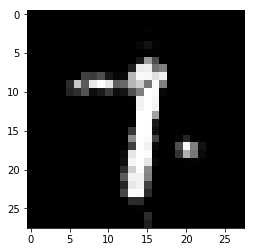

Number batches 468
135(0/468) D: 0.6771, G: 0.8446
135(1/468) D: 0.6564, G: 0.9577
135(2/468) D: 0.6213, G: 0.9192
135(3/468) D: 0.6255, G: 0.9547
135(4/468) D: 0.5572, G: 0.9813
135(5/468) D: 0.6082, G: 1.0244
135(6/468) D: 0.6073, G: 0.9604
135(7/468) D: 0.5567, G: 0.8600
135(8/468) D: 0.6284, G: 1.0187
135(9/468) D: 0.6771, G: 0.8049
135(10/468) D: 0.7037, G: 1.0470
135(11/468) D: 0.5997, G: 1.0215
135(12/468) D: 0.5993, G: 0.8749
135(13/468) D: 0.6334, G: 0.9910
135(14/468) D: 0.5844, G: 0.9630
135(15/468) D: 0.6565, G: 0.9092
135(16/468) D: 0.5994, G: 0.8539
135(17/468) D: 0.6400, G: 0.8541
135(18/468) D: 0.6000, G: 1.0082
135(19/468) D: 0.6269, G: 0.8808
135(20/468) D: 0.6081, G: 1.0258
135(21/468) D: 0.6237, G: 0.9082
135(22/468) D: 0.6059, G: 0.9067
135(23/468) D: 0.5751, G: 0.8812
135(24/468) D: 0.6044, G: 0.9268
135(25/468) D: 0.6188, G: 0.9536
135(26/468) D: 0.6146, G: 0.9506
135(27/468) D: 0.5880, G: 0.9189
135(28/468) D: 0.6046, G: 0.8551
135(29/468) D: 0.5739, G: 0.9964
1

135(245/468) D: 0.6099, G: 0.8755
135(246/468) D: 0.6172, G: 1.0080
135(247/468) D: 0.5775, G: 1.0037
135(248/468) D: 0.6330, G: 0.9497
135(249/468) D: 0.6506, G: 1.2461
135(250/468) D: 0.6461, G: 0.7637
135(251/468) D: 0.6661, G: 0.9110
135(252/468) D: 0.6030, G: 1.0585
135(253/468) D: 0.6003, G: 1.0846
135(254/468) D: 0.6444, G: 0.9473
135(255/468) D: 0.6647, G: 0.9235
135(256/468) D: 0.6530, G: 0.9145
135(257/468) D: 0.5853, G: 0.9765
135(258/468) D: 0.6411, G: 0.9899
135(259/468) D: 0.6575, G: 0.9018
135(260/468) D: 0.6374, G: 0.8270
135(261/468) D: 0.5836, G: 0.9270
135(262/468) D: 0.6357, G: 0.8806
135(263/468) D: 0.6597, G: 0.8979
135(264/468) D: 0.6179, G: 0.9668
135(265/468) D: 0.6596, G: 0.8994
135(266/468) D: 0.6057, G: 0.9597
135(267/468) D: 0.5889, G: 0.8515
135(268/468) D: 0.5794, G: 0.8783
135(269/468) D: 0.6319, G: 1.2648
135(270/468) D: 0.5916, G: 0.8633
135(271/468) D: 0.6248, G: 0.8301
135(272/468) D: 0.6132, G: 1.1832
135(273/468) D: 0.6231, G: 0.9940
135(274/468) D

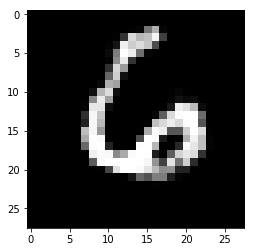

Number batches 468
136(0/468) D: 0.7031, G: 0.6468
136(1/468) D: 0.6918, G: 0.8477
136(2/468) D: 0.6408, G: 1.0243
136(3/468) D: 0.6189, G: 1.0020
136(4/468) D: 0.5841, G: 0.8578
136(5/468) D: 0.6167, G: 0.9507
136(6/468) D: 0.5959, G: 1.0725
136(7/468) D: 0.5647, G: 0.9994
136(8/468) D: 0.5855, G: 1.0242
136(9/468) D: 0.6894, G: 0.8878
136(10/468) D: 0.6476, G: 0.9572
136(11/468) D: 0.5617, G: 1.0932
136(12/468) D: 0.6114, G: 0.8885
136(13/468) D: 0.6389, G: 1.0092
136(14/468) D: 0.6074, G: 1.0548
136(15/468) D: 0.6281, G: 0.8669
136(16/468) D: 0.5900, G: 0.7737
136(17/468) D: 0.6033, G: 1.0053
136(18/468) D: 0.5945, G: 0.9006
136(19/468) D: 0.6185, G: 0.9061
136(20/468) D: 0.5961, G: 1.0332
136(21/468) D: 0.6217, G: 0.9476
136(22/468) D: 0.6173, G: 0.8121
136(23/468) D: 0.6322, G: 1.0716
136(24/468) D: 0.6603, G: 0.9745
136(25/468) D: 0.6153, G: 0.7549
136(26/468) D: 0.6256, G: 1.0962
136(27/468) D: 0.5818, G: 1.0262
136(28/468) D: 0.6222, G: 0.8201
136(29/468) D: 0.6241, G: 1.0204
1

136(245/468) D: 0.6106, G: 1.0532
136(246/468) D: 0.5813, G: 0.9058
136(247/468) D: 0.5933, G: 0.8741
136(248/468) D: 0.6047, G: 1.0942
136(249/468) D: 0.5964, G: 1.0233
136(250/468) D: 0.6756, G: 0.8776
136(251/468) D: 0.6391, G: 0.9860
136(252/468) D: 0.6077, G: 0.9363
136(253/468) D: 0.5795, G: 1.0964
136(254/468) D: 0.6125, G: 0.9833
136(255/468) D: 0.6701, G: 0.8941
136(256/468) D: 0.6381, G: 0.9953
136(257/468) D: 0.6344, G: 1.1222
136(258/468) D: 0.6711, G: 0.9761
136(259/468) D: 0.5983, G: 0.8323
136(260/468) D: 0.6258, G: 0.8848
136(261/468) D: 0.6085, G: 1.0126
136(262/468) D: 0.6371, G: 0.9342
136(263/468) D: 0.6212, G: 0.7810
136(264/468) D: 0.6665, G: 0.8595
136(265/468) D: 0.6051, G: 0.8845
136(266/468) D: 0.5988, G: 0.8826
136(267/468) D: 0.5857, G: 0.9118
136(268/468) D: 0.6200, G: 0.9760
136(269/468) D: 0.5838, G: 0.8157
136(270/468) D: 0.6091, G: 1.0806
136(271/468) D: 0.6176, G: 0.9807
136(272/468) D: 0.5981, G: 0.8756
136(273/468) D: 0.6018, G: 0.9208
136(274/468) D

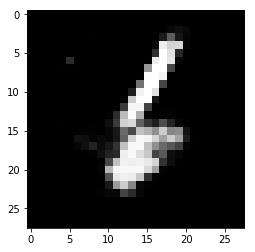

Number batches 468
137(0/468) D: 0.6528, G: 0.8535
137(1/468) D: 0.6046, G: 0.9663
137(2/468) D: 0.6072, G: 0.9082
137(3/468) D: 0.6013, G: 1.0247
137(4/468) D: 0.5874, G: 0.8942
137(5/468) D: 0.6291, G: 0.9127
137(6/468) D: 0.6413, G: 1.2697
137(7/468) D: 0.5869, G: 0.9872
137(8/468) D: 0.6185, G: 0.8754
137(9/468) D: 0.6788, G: 0.8778
137(10/468) D: 0.6539, G: 0.8463
137(11/468) D: 0.6133, G: 1.1177
137(12/468) D: 0.6306, G: 0.7281
137(13/468) D: 0.6430, G: 0.7734
137(14/468) D: 0.6042, G: 0.9497
137(15/468) D: 0.6435, G: 0.9580
137(16/468) D: 0.6114, G: 0.7635
137(17/468) D: 0.6287, G: 0.8337
137(18/468) D: 0.5677, G: 1.0478
137(19/468) D: 0.5912, G: 0.8899
137(20/468) D: 0.5855, G: 0.9025
137(21/468) D: 0.5807, G: 0.8980
137(22/468) D: 0.6149, G: 0.9609
137(23/468) D: 0.5989, G: 0.9114
137(24/468) D: 0.6017, G: 0.9421
137(25/468) D: 0.6590, G: 0.8950
137(26/468) D: 0.6327, G: 0.9937
137(27/468) D: 0.5872, G: 0.8533
137(28/468) D: 0.6429, G: 1.0306
137(29/468) D: 0.6068, G: 0.9058
1

137(244/468) D: 0.6467, G: 0.8331
137(245/468) D: 0.6794, G: 0.9544
137(246/468) D: 0.5969, G: 1.1146
137(247/468) D: 0.5644, G: 0.8588
137(248/468) D: 0.5856, G: 1.0534
137(249/468) D: 0.6000, G: 1.0529
137(250/468) D: 0.7120, G: 0.9150
137(251/468) D: 0.6406, G: 0.8656
137(252/468) D: 0.5972, G: 0.9265
137(253/468) D: 0.5900, G: 0.9520
137(254/468) D: 0.6185, G: 0.7764
137(255/468) D: 0.6592, G: 0.8618
137(256/468) D: 0.5975, G: 0.9819
137(257/468) D: 0.6095, G: 1.0823
137(258/468) D: 0.6529, G: 0.9143
137(259/468) D: 0.6057, G: 0.9288
137(260/468) D: 0.6039, G: 0.9982
137(261/468) D: 0.6467, G: 0.8968
137(262/468) D: 0.6085, G: 0.9037
137(263/468) D: 0.6353, G: 0.8768
137(264/468) D: 0.6591, G: 0.9943
137(265/468) D: 0.5889, G: 1.0195
137(266/468) D: 0.6166, G: 1.0481
137(267/468) D: 0.6328, G: 1.0293
137(268/468) D: 0.6297, G: 0.9830
137(269/468) D: 0.5963, G: 0.8923
137(270/468) D: 0.6227, G: 1.0315
137(271/468) D: 0.6480, G: 1.0043
137(272/468) D: 0.6213, G: 0.9126
137(273/468) D

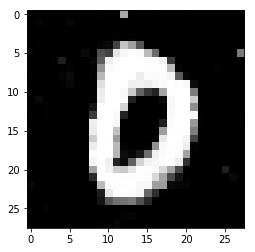

Number batches 468
138(0/468) D: 0.6848, G: 0.9038
138(1/468) D: 0.6903, G: 1.1052
138(2/468) D: 0.6459, G: 0.9950
138(3/468) D: 0.6285, G: 0.8247
138(4/468) D: 0.6181, G: 0.8939
138(5/468) D: 0.6229, G: 1.0051
138(6/468) D: 0.5893, G: 0.9359
138(7/468) D: 0.5477, G: 0.8483
138(8/468) D: 0.6153, G: 0.9966
138(9/468) D: 0.7006, G: 0.9512
138(10/468) D: 0.6369, G: 0.9338
138(11/468) D: 0.6411, G: 0.9451
138(12/468) D: 0.6171, G: 0.8267
138(13/468) D: 0.6387, G: 0.9156
138(14/468) D: 0.6157, G: 1.0152
138(15/468) D: 0.6393, G: 0.9681
138(16/468) D: 0.6071, G: 0.8130
138(17/468) D: 0.6416, G: 1.0659
138(18/468) D: 0.6282, G: 0.9622
138(19/468) D: 0.6228, G: 0.8527
138(20/468) D: 0.6280, G: 0.9815
138(21/468) D: 0.5896, G: 0.9985
138(22/468) D: 0.6164, G: 0.8573
138(23/468) D: 0.6037, G: 0.9473
138(24/468) D: 0.6313, G: 0.9451
138(25/468) D: 0.6117, G: 0.8637
138(26/468) D: 0.6580, G: 0.9531
138(27/468) D: 0.6407, G: 1.0871
138(28/468) D: 0.5847, G: 0.8712
138(29/468) D: 0.6018, G: 0.8843
1

138(244/468) D: 0.6479, G: 0.9555
138(245/468) D: 0.6237, G: 0.8905
138(246/468) D: 0.6346, G: 0.9391
138(247/468) D: 0.5745, G: 1.0880
138(248/468) D: 0.6018, G: 0.9741
138(249/468) D: 0.6046, G: 1.1593
138(250/468) D: 0.6627, G: 0.7433
138(251/468) D: 0.6291, G: 0.8509
138(252/468) D: 0.6501, G: 1.0838
138(253/468) D: 0.6236, G: 0.8980
138(254/468) D: 0.5960, G: 0.9585
138(255/468) D: 0.6548, G: 0.9080
138(256/468) D: 0.6169, G: 0.8465
138(257/468) D: 0.6118, G: 1.1487
138(258/468) D: 0.6424, G: 0.8474
138(259/468) D: 0.6121, G: 0.9375
138(260/468) D: 0.6269, G: 1.0067
138(261/468) D: 0.5980, G: 0.9422
138(262/468) D: 0.6195, G: 0.8640
138(263/468) D: 0.6554, G: 0.8734
138(264/468) D: 0.6416, G: 0.8435
138(265/468) D: 0.6438, G: 1.0309
138(266/468) D: 0.6130, G: 0.9677
138(267/468) D: 0.6403, G: 0.9360
138(268/468) D: 0.6524, G: 0.9107
138(269/468) D: 0.6309, G: 0.9168
138(270/468) D: 0.5716, G: 0.8532
138(271/468) D: 0.6543, G: 1.1162
138(272/468) D: 0.6140, G: 0.9370
138(273/468) D

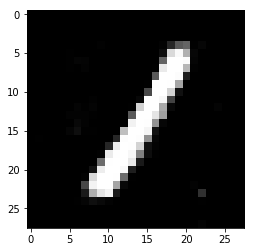

Number batches 468
139(0/468) D: 0.6646, G: 1.0075
139(1/468) D: 0.7370, G: 0.8072
139(2/468) D: 0.6534, G: 0.8597
139(3/468) D: 0.6202, G: 0.9905
139(4/468) D: 0.5945, G: 0.8577
139(5/468) D: 0.6187, G: 0.8388
139(6/468) D: 0.6207, G: 1.0253
139(7/468) D: 0.5980, G: 1.0337
139(8/468) D: 0.5952, G: 0.8929
139(9/468) D: 0.6759, G: 0.8925
139(10/468) D: 0.6982, G: 1.0812
139(11/468) D: 0.6157, G: 0.9415
139(12/468) D: 0.6436, G: 0.8769
139(13/468) D: 0.6141, G: 0.8907
139(14/468) D: 0.6187, G: 0.9614
139(15/468) D: 0.6623, G: 0.8737
139(16/468) D: 0.6156, G: 0.8620
139(17/468) D: 0.6317, G: 0.9836
139(18/468) D: 0.6372, G: 0.9921
139(19/468) D: 0.6281, G: 0.8587
139(20/468) D: 0.6285, G: 0.9222
139(21/468) D: 0.6033, G: 1.0157
139(22/468) D: 0.6203, G: 0.9310
139(23/468) D: 0.5998, G: 0.9090
139(24/468) D: 0.5838, G: 0.8232
139(25/468) D: 0.6861, G: 0.9472
139(26/468) D: 0.5965, G: 1.0545
139(27/468) D: 0.5940, G: 0.9801
139(28/468) D: 0.6238, G: 0.9029
139(29/468) D: 0.5795, G: 0.9329
1

139(245/468) D: 0.6240, G: 0.9374
139(246/468) D: 0.6347, G: 0.9435
139(247/468) D: 0.5985, G: 1.0637
139(248/468) D: 0.6461, G: 1.0764
139(249/468) D: 0.6012, G: 1.0453
139(250/468) D: 0.6221, G: 0.7787
139(251/468) D: 0.6234, G: 0.9585
139(252/468) D: 0.6477, G: 0.9641
139(253/468) D: 0.6150, G: 0.9001
139(254/468) D: 0.6718, G: 0.9703
139(255/468) D: 0.6856, G: 0.8676
139(256/468) D: 0.6307, G: 0.9699
139(257/468) D: 0.6135, G: 0.9872
139(258/468) D: 0.6515, G: 0.9069
139(259/468) D: 0.6180, G: 0.8910
139(260/468) D: 0.5941, G: 0.9696
139(261/468) D: 0.5922, G: 0.9363
139(262/468) D: 0.6038, G: 0.9273
139(263/468) D: 0.6418, G: 0.8209
139(264/468) D: 0.6388, G: 0.9932
139(265/468) D: 0.5757, G: 0.9245
139(266/468) D: 0.5866, G: 0.9532
139(267/468) D: 0.6208, G: 0.9436
139(268/468) D: 0.5754, G: 0.8713
139(269/468) D: 0.6184, G: 1.0101
139(270/468) D: 0.6062, G: 0.9450
139(271/468) D: 0.6502, G: 0.8737
139(272/468) D: 0.6045, G: 0.9496
139(273/468) D: 0.6265, G: 0.9666
139(274/468) D

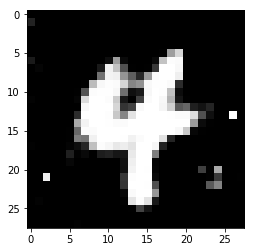

Number batches 468
140(0/468) D: 0.6656, G: 0.9258
140(1/468) D: 0.6067, G: 0.8506
140(2/468) D: 0.6642, G: 0.8520
140(3/468) D: 0.5979, G: 1.1688
140(4/468) D: 0.5835, G: 1.0072
140(5/468) D: 0.6374, G: 0.8826
140(6/468) D: 0.5852, G: 0.9903
140(7/468) D: 0.6056, G: 1.2026
140(8/468) D: 0.6054, G: 0.8668
140(9/468) D: 0.6544, G: 0.7885
140(10/468) D: 0.6484, G: 1.0801
140(11/468) D: 0.5601, G: 1.0187
140(12/468) D: 0.6027, G: 0.8677
140(13/468) D: 0.6438, G: 0.8753
140(14/468) D: 0.6001, G: 1.0607
140(15/468) D: 0.6804, G: 0.8452
140(16/468) D: 0.6076, G: 0.8660
140(17/468) D: 0.6312, G: 1.1180
140(18/468) D: 0.6329, G: 0.9108
140(19/468) D: 0.6620, G: 0.8647
140(20/468) D: 0.6206, G: 0.9983
140(21/468) D: 0.6089, G: 1.0882
140(22/468) D: 0.6463, G: 0.8239
140(23/468) D: 0.5935, G: 0.8460
140(24/468) D: 0.5943, G: 1.0027
140(25/468) D: 0.6234, G: 0.8299
140(26/468) D: 0.6285, G: 0.9783
140(27/468) D: 0.5902, G: 0.9437
140(28/468) D: 0.6523, G: 0.9101
140(29/468) D: 0.6156, G: 0.9038
1

140(244/468) D: 0.5902, G: 0.9789
140(245/468) D: 0.5951, G: 0.8598
140(246/468) D: 0.6212, G: 1.0303
140(247/468) D: 0.5848, G: 1.0202
140(248/468) D: 0.6056, G: 0.8921
140(249/468) D: 0.6316, G: 1.2266
140(250/468) D: 0.6547, G: 0.8089
140(251/468) D: 0.6293, G: 0.8796
140(252/468) D: 0.6215, G: 1.0731
140(253/468) D: 0.6116, G: 1.0408
140(254/468) D: 0.6073, G: 0.8829
140(255/468) D: 0.6810, G: 0.8699
140(256/468) D: 0.5968, G: 0.9743
140(257/468) D: 0.6080, G: 0.9543
140(258/468) D: 0.6291, G: 0.8766
140(259/468) D: 0.5866, G: 1.0252
140(260/468) D: 0.6484, G: 0.9606
140(261/468) D: 0.5765, G: 0.8031
140(262/468) D: 0.6228, G: 0.8753
140(263/468) D: 0.6371, G: 1.1858
140(264/468) D: 0.6606, G: 0.8123
140(265/468) D: 0.6070, G: 0.9078
140(266/468) D: 0.5987, G: 1.0703
140(267/468) D: 0.5788, G: 0.9028
140(268/468) D: 0.6134, G: 0.8280
140(269/468) D: 0.6411, G: 1.0744
140(270/468) D: 0.6192, G: 0.9719
140(271/468) D: 0.6330, G: 0.9354
140(272/468) D: 0.6300, G: 0.8954
140(273/468) D

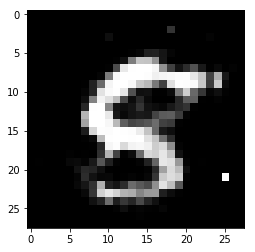

Number batches 468
141(0/468) D: 0.6540, G: 0.8432
141(1/468) D: 0.6728, G: 0.9798
141(2/468) D: 0.6328, G: 0.8026
141(3/468) D: 0.6273, G: 0.9670
141(4/468) D: 0.6005, G: 0.9696
141(5/468) D: 0.6143, G: 0.8314
141(6/468) D: 0.6080, G: 0.8691
141(7/468) D: 0.5792, G: 1.0006
141(8/468) D: 0.6127, G: 0.9860
141(9/468) D: 0.6577, G: 0.8558
141(10/468) D: 0.6491, G: 0.9027
141(11/468) D: 0.5978, G: 1.0140
141(12/468) D: 0.6287, G: 0.8281
141(13/468) D: 0.6253, G: 0.9940
141(14/468) D: 0.6208, G: 0.9729
141(15/468) D: 0.6472, G: 0.8753
141(16/468) D: 0.6483, G: 1.0123
141(17/468) D: 0.6240, G: 1.0037
141(18/468) D: 0.5989, G: 0.8132
141(19/468) D: 0.6515, G: 0.9331
141(20/468) D: 0.6145, G: 1.1441
141(21/468) D: 0.5998, G: 0.8169
141(22/468) D: 0.6152, G: 0.9310
141(23/468) D: 0.6146, G: 1.0603
141(24/468) D: 0.6111, G: 0.8836
141(25/468) D: 0.6161, G: 0.7905
141(26/468) D: 0.6507, G: 1.0924
141(27/468) D: 0.5845, G: 0.9474
141(28/468) D: 0.6223, G: 0.8699
141(29/468) D: 0.6237, G: 1.0867
1

141(244/468) D: 0.6609, G: 0.8674
141(245/468) D: 0.6002, G: 0.8332
141(246/468) D: 0.6204, G: 1.0380
141(247/468) D: 0.5690, G: 1.0065
141(248/468) D: 0.6048, G: 0.9664
141(249/468) D: 0.5853, G: 0.8856
141(250/468) D: 0.6617, G: 0.8457
141(251/468) D: 0.6645, G: 0.8542
141(252/468) D: 0.6579, G: 1.0022
141(253/468) D: 0.5988, G: 0.9728
141(254/468) D: 0.6649, G: 0.9277
141(255/468) D: 0.6895, G: 0.9188
141(256/468) D: 0.6621, G: 0.8967
141(257/468) D: 0.5954, G: 1.0476
141(258/468) D: 0.6750, G: 0.8987
141(259/468) D: 0.6143, G: 0.9757
141(260/468) D: 0.5945, G: 0.9276
141(261/468) D: 0.6136, G: 0.9301
141(262/468) D: 0.5866, G: 0.9133
141(263/468) D: 0.6340, G: 0.8566
141(264/468) D: 0.6465, G: 0.9476
141(265/468) D: 0.6054, G: 0.9399
141(266/468) D: 0.6126, G: 0.9455
141(267/468) D: 0.5768, G: 0.9570
141(268/468) D: 0.6221, G: 0.9607
141(269/468) D: 0.5910, G: 0.8771
141(270/468) D: 0.6284, G: 0.9712
141(271/468) D: 0.6374, G: 0.9385
141(272/468) D: 0.6426, G: 0.9189
141(273/468) D

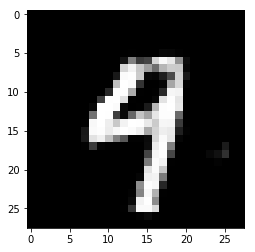

Number batches 468
142(0/468) D: 0.6903, G: 0.6826
142(1/468) D: 0.6620, G: 0.9077
142(2/468) D: 0.6429, G: 0.9377
142(3/468) D: 0.6345, G: 0.9561
142(4/468) D: 0.6515, G: 0.9698
142(5/468) D: 0.6440, G: 0.9153
142(6/468) D: 0.6485, G: 0.8887
142(7/468) D: 0.5774, G: 0.8824
142(8/468) D: 0.5921, G: 0.9222
142(9/468) D: 0.6888, G: 0.9875
142(10/468) D: 0.6970, G: 0.9667
142(11/468) D: 0.5928, G: 0.9294
142(12/468) D: 0.6049, G: 0.9234
142(13/468) D: 0.6175, G: 0.9214
142(14/468) D: 0.5873, G: 0.8644
142(15/468) D: 0.6766, G: 1.0644
142(16/468) D: 0.6245, G: 0.9465
142(17/468) D: 0.6150, G: 0.9741
142(18/468) D: 0.6017, G: 0.9303
142(19/468) D: 0.6403, G: 0.8275
142(20/468) D: 0.6136, G: 0.9762
142(21/468) D: 0.6230, G: 0.8454
142(22/468) D: 0.6115, G: 0.8652
142(23/468) D: 0.5858, G: 0.9785
142(24/468) D: 0.5902, G: 1.0008
142(25/468) D: 0.6150, G: 0.8677
142(26/468) D: 0.5949, G: 1.0335
142(27/468) D: 0.5908, G: 1.1511
142(28/468) D: 0.6149, G: 0.9046
142(29/468) D: 0.6175, G: 0.9540
1

142(244/468) D: 0.6491, G: 0.7350
142(245/468) D: 0.6309, G: 0.9441
142(246/468) D: 0.6553, G: 0.9855
142(247/468) D: 0.5741, G: 0.9008
142(248/468) D: 0.6129, G: 0.9862
142(249/468) D: 0.6125, G: 0.9907
142(250/468) D: 0.6836, G: 0.8358
142(251/468) D: 0.6227, G: 0.9299
142(252/468) D: 0.6350, G: 0.9537
142(253/468) D: 0.5980, G: 1.0070
142(254/468) D: 0.6024, G: 0.8416
142(255/468) D: 0.6622, G: 0.9539
142(256/468) D: 0.6081, G: 0.8558
142(257/468) D: 0.6360, G: 0.9422
142(258/468) D: 0.6416, G: 0.9484
142(259/468) D: 0.6020, G: 1.0080
142(260/468) D: 0.5987, G: 0.8952
142(261/468) D: 0.6333, G: 1.0003
142(262/468) D: 0.5887, G: 0.8425
142(263/468) D: 0.6458, G: 0.9404
142(264/468) D: 0.6334, G: 1.0592
142(265/468) D: 0.6099, G: 0.8224
142(266/468) D: 0.6053, G: 0.9934
142(267/468) D: 0.6000, G: 0.9826
142(268/468) D: 0.6046, G: 0.8536
142(269/468) D: 0.6329, G: 1.0521
142(270/468) D: 0.6360, G: 0.8793
142(271/468) D: 0.6482, G: 0.9062
142(272/468) D: 0.5968, G: 1.0328
142(273/468) D

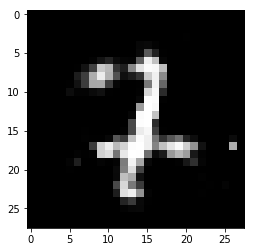

Number batches 468
143(0/468) D: 0.6489, G: 0.7869
143(1/468) D: 0.6662, G: 0.8164
143(2/468) D: 0.5928, G: 0.9624
143(3/468) D: 0.5996, G: 1.0040
143(4/468) D: 0.6130, G: 0.8939
143(5/468) D: 0.6152, G: 0.9312
143(6/468) D: 0.5879, G: 1.0159
143(7/468) D: 0.5990, G: 1.1540
143(8/468) D: 0.5875, G: 0.9048
143(9/468) D: 0.7034, G: 0.9510
143(10/468) D: 0.6596, G: 0.9046
143(11/468) D: 0.5787, G: 1.0764
143(12/468) D: 0.6113, G: 0.9496
143(13/468) D: 0.6123, G: 0.9144
143(14/468) D: 0.6243, G: 1.1261
143(15/468) D: 0.7050, G: 0.8225
143(16/468) D: 0.6598, G: 0.8521
143(17/468) D: 0.6570, G: 0.9350
143(18/468) D: 0.6180, G: 1.0044
143(19/468) D: 0.6235, G: 0.8555
143(20/468) D: 0.6101, G: 0.9259
143(21/468) D: 0.6293, G: 1.0810
143(22/468) D: 0.5989, G: 0.8728
143(23/468) D: 0.5656, G: 0.9591
143(24/468) D: 0.5744, G: 0.8709
143(25/468) D: 0.5879, G: 0.9011
143(26/468) D: 0.5879, G: 1.1315
143(27/468) D: 0.5578, G: 1.0532
143(28/468) D: 0.5839, G: 0.8380
143(29/468) D: 0.6007, G: 1.2176
1

143(244/468) D: 0.6154, G: 0.8990
143(245/468) D: 0.6483, G: 0.8974
143(246/468) D: 0.5784, G: 0.9557
143(247/468) D: 0.5818, G: 1.0796
143(248/468) D: 0.6237, G: 1.0227
143(249/468) D: 0.6058, G: 0.9176
143(250/468) D: 0.6190, G: 0.9297
143(251/468) D: 0.6366, G: 0.7658
143(252/468) D: 0.6595, G: 1.0000
143(253/468) D: 0.6083, G: 0.9973
143(254/468) D: 0.6284, G: 0.7393
143(255/468) D: 0.6822, G: 0.8206
143(256/468) D: 0.6459, G: 1.0149
143(257/468) D: 0.5910, G: 1.0519
143(258/468) D: 0.6386, G: 0.8841
143(259/468) D: 0.6058, G: 0.9441
143(260/468) D: 0.5624, G: 0.8957
143(261/468) D: 0.6195, G: 0.9916
143(262/468) D: 0.6186, G: 0.8836
143(263/468) D: 0.6254, G: 0.9112
143(264/468) D: 0.6224, G: 0.8741
143(265/468) D: 0.6193, G: 0.9202
143(266/468) D: 0.5905, G: 0.9158
143(267/468) D: 0.5726, G: 0.9942
143(268/468) D: 0.6371, G: 0.8147
143(269/468) D: 0.5922, G: 0.9634
143(270/468) D: 0.6105, G: 1.0327
143(271/468) D: 0.6274, G: 0.8619
143(272/468) D: 0.5970, G: 0.9462
143(273/468) D

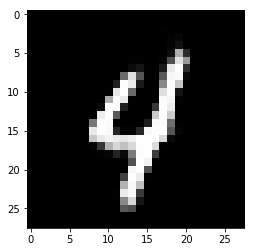

Number batches 468
144(0/468) D: 0.6538, G: 0.8141
144(1/468) D: 0.6068, G: 0.8583
144(2/468) D: 0.6289, G: 1.0270
144(3/468) D: 0.6041, G: 0.9588
144(4/468) D: 0.5447, G: 0.9927
144(5/468) D: 0.6229, G: 1.0535
144(6/468) D: 0.6024, G: 1.0178
144(7/468) D: 0.5698, G: 1.1625
144(8/468) D: 0.5726, G: 0.8857
144(9/468) D: 0.7142, G: 0.9530
144(10/468) D: 0.6887, G: 1.0290
144(11/468) D: 0.5843, G: 1.0541
144(12/468) D: 0.5889, G: 0.8607
144(13/468) D: 0.6358, G: 0.8772
144(14/468) D: 0.6106, G: 1.0788
144(15/468) D: 0.6573, G: 0.9803
144(16/468) D: 0.6371, G: 0.9873
144(17/468) D: 0.6244, G: 1.0047
144(18/468) D: 0.6214, G: 0.8585
144(19/468) D: 0.6330, G: 0.8247
144(20/468) D: 0.6201, G: 0.8999
144(21/468) D: 0.5953, G: 0.9961
144(22/468) D: 0.6270, G: 0.9184
144(23/468) D: 0.6026, G: 0.8389
144(24/468) D: 0.5782, G: 0.9933
144(25/468) D: 0.6074, G: 0.8076
144(26/468) D: 0.6064, G: 1.0272
144(27/468) D: 0.5961, G: 1.1005
144(28/468) D: 0.6002, G: 0.8787
144(29/468) D: 0.5892, G: 1.0018
1

144(244/468) D: 0.6532, G: 0.8909
144(245/468) D: 0.6483, G: 0.9102
144(246/468) D: 0.6157, G: 0.8965
144(247/468) D: 0.6061, G: 0.9803
144(248/468) D: 0.6446, G: 0.9059
144(249/468) D: 0.6100, G: 0.8636
144(250/468) D: 0.6357, G: 0.8612
144(251/468) D: 0.6348, G: 1.0086
144(252/468) D: 0.6262, G: 0.9620
144(253/468) D: 0.6185, G: 0.9564
144(254/468) D: 0.6471, G: 0.8691
144(255/468) D: 0.6632, G: 0.8465
144(256/468) D: 0.6105, G: 0.9191
144(257/468) D: 0.5881, G: 1.0930
144(258/468) D: 0.6167, G: 0.7727
144(259/468) D: 0.6253, G: 1.0089
144(260/468) D: 0.6015, G: 0.9721
144(261/468) D: 0.6137, G: 0.9819
144(262/468) D: 0.5913, G: 0.8556
144(263/468) D: 0.6630, G: 0.8825
144(264/468) D: 0.6209, G: 1.0747
144(265/468) D: 0.6010, G: 0.8691
144(266/468) D: 0.5923, G: 0.9804
144(267/468) D: 0.6278, G: 1.0395
144(268/468) D: 0.6124, G: 0.8115
144(269/468) D: 0.6221, G: 1.0682
144(270/468) D: 0.6606, G: 1.0171
144(271/468) D: 0.5944, G: 0.9142
144(272/468) D: 0.6115, G: 0.8994
144(273/468) D

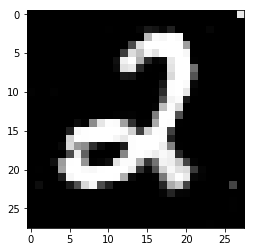

Number batches 468
145(0/468) D: 0.6582, G: 0.7918
145(1/468) D: 0.6824, G: 0.9184
145(2/468) D: 0.6603, G: 0.9995
145(3/468) D: 0.5843, G: 1.0050
145(4/468) D: 0.6219, G: 0.9202
145(5/468) D: 0.6340, G: 0.9922
145(6/468) D: 0.5932, G: 0.9695
145(7/468) D: 0.5486, G: 0.9382
145(8/468) D: 0.5833, G: 0.8878
145(9/468) D: 0.6766, G: 0.9385
145(10/468) D: 0.6798, G: 0.9727
145(11/468) D: 0.5431, G: 0.9127
145(12/468) D: 0.6117, G: 0.9142
145(13/468) D: 0.6471, G: 0.9644
145(14/468) D: 0.6027, G: 0.9080
145(15/468) D: 0.6634, G: 0.9445
145(16/468) D: 0.6504, G: 1.0147
145(17/468) D: 0.6229, G: 0.9215
145(18/468) D: 0.5951, G: 0.8881
145(19/468) D: 0.6233, G: 0.9414
145(20/468) D: 0.6364, G: 1.1398
145(21/468) D: 0.6026, G: 1.0516
145(22/468) D: 0.6315, G: 0.8883
145(23/468) D: 0.6180, G: 0.8863
145(24/468) D: 0.6024, G: 1.0240
145(25/468) D: 0.6420, G: 0.9464
145(26/468) D: 0.6394, G: 0.9181
145(27/468) D: 0.5712, G: 0.9594
145(28/468) D: 0.6382, G: 0.8142
145(29/468) D: 0.5847, G: 0.9677
1

145(245/468) D: 0.6273, G: 0.9123
145(246/468) D: 0.6273, G: 0.9685
145(247/468) D: 0.6070, G: 1.1431
145(248/468) D: 0.6131, G: 0.9391
145(249/468) D: 0.6257, G: 1.0457
145(250/468) D: 0.6594, G: 0.8474
145(251/468) D: 0.6540, G: 0.9455
145(252/468) D: 0.6421, G: 1.0516
145(253/468) D: 0.6251, G: 1.0103
145(254/468) D: 0.6363, G: 0.7865
145(255/468) D: 0.6939, G: 0.9001
145(256/468) D: 0.6170, G: 0.9747
145(257/468) D: 0.6057, G: 0.9868
145(258/468) D: 0.6428, G: 0.8938
145(259/468) D: 0.5831, G: 0.8768
145(260/468) D: 0.6081, G: 0.9633
145(261/468) D: 0.6054, G: 1.0089
145(262/468) D: 0.6101, G: 0.8367
145(263/468) D: 0.6547, G: 0.8238
145(264/468) D: 0.6626, G: 1.0825
145(265/468) D: 0.6331, G: 0.9410
145(266/468) D: 0.5949, G: 0.8570
145(267/468) D: 0.5798, G: 0.7953
145(268/468) D: 0.6901, G: 1.1533
145(269/468) D: 0.6191, G: 0.8754
145(270/468) D: 0.6216, G: 0.8400
145(271/468) D: 0.6154, G: 0.9651
145(272/468) D: 0.6270, G: 1.0470
145(273/468) D: 0.5731, G: 0.8540
145(274/468) D

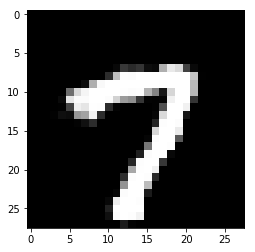

Number batches 468
146(0/468) D: 0.6654, G: 0.6868
146(1/468) D: 0.6744, G: 1.0539
146(2/468) D: 0.6200, G: 0.8711
146(3/468) D: 0.6320, G: 0.8316
146(4/468) D: 0.6099, G: 1.0917
146(5/468) D: 0.6483, G: 0.8578
146(6/468) D: 0.5416, G: 0.8523
146(7/468) D: 0.5763, G: 1.1524
146(8/468) D: 0.5892, G: 0.9053
146(9/468) D: 0.6819, G: 0.8163
146(10/468) D: 0.6679, G: 0.8427
146(11/468) D: 0.5762, G: 1.1916
146(12/468) D: 0.6037, G: 0.8596
146(13/468) D: 0.6515, G: 0.8814
146(14/468) D: 0.5766, G: 1.0368
146(15/468) D: 0.6509, G: 0.9325
146(16/468) D: 0.6030, G: 0.8828
146(17/468) D: 0.6026, G: 0.8917
146(18/468) D: 0.5828, G: 0.9332
146(19/468) D: 0.6377, G: 0.8936
146(20/468) D: 0.5930, G: 0.8479
146(21/468) D: 0.5863, G: 0.9754
146(22/468) D: 0.6009, G: 1.0531
146(23/468) D: 0.6101, G: 0.9961
146(24/468) D: 0.6143, G: 0.9034
146(25/468) D: 0.6204, G: 0.7823
146(26/468) D: 0.6234, G: 1.1293
146(27/468) D: 0.5967, G: 1.0374
146(28/468) D: 0.6336, G: 0.8323
146(29/468) D: 0.6063, G: 1.0275
1

146(245/468) D: 0.6303, G: 0.9219
146(246/468) D: 0.5928, G: 0.8868
146(247/468) D: 0.5710, G: 1.2331
146(248/468) D: 0.6481, G: 0.9623
146(249/468) D: 0.5627, G: 0.8487
146(250/468) D: 0.6254, G: 0.8642
146(251/468) D: 0.6562, G: 1.0147
146(252/468) D: 0.6528, G: 1.0046
146(253/468) D: 0.6152, G: 0.9825
146(254/468) D: 0.6007, G: 0.9743
146(255/468) D: 0.7136, G: 0.8871
146(256/468) D: 0.6153, G: 0.9161
146(257/468) D: 0.5849, G: 1.0952
146(258/468) D: 0.6228, G: 0.7956
146(259/468) D: 0.6141, G: 0.9381
146(260/468) D: 0.5920, G: 0.8843
146(261/468) D: 0.6216, G: 1.0126
146(262/468) D: 0.6172, G: 0.9706
146(263/468) D: 0.6680, G: 1.0373
146(264/468) D: 0.6367, G: 0.8607
146(265/468) D: 0.5930, G: 0.9554
146(266/468) D: 0.5998, G: 0.9672
146(267/468) D: 0.6343, G: 0.8526
146(268/468) D: 0.5843, G: 0.9447
146(269/468) D: 0.6142, G: 1.1735
146(270/468) D: 0.6109, G: 0.8407
146(271/468) D: 0.6486, G: 0.8821
146(272/468) D: 0.5754, G: 0.9896
146(273/468) D: 0.6310, G: 0.9607
146(274/468) D

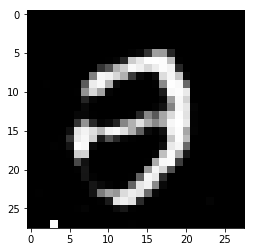

Number batches 468
147(0/468) D: 0.6858, G: 0.8577
147(1/468) D: 0.6483, G: 0.9609
147(2/468) D: 0.6782, G: 1.0469
147(3/468) D: 0.6739, G: 0.8539
147(4/468) D: 0.5259, G: 0.9918
147(5/468) D: 0.6198, G: 1.2018
147(6/468) D: 0.6058, G: 0.8799
147(7/468) D: 0.5931, G: 0.9337
147(8/468) D: 0.6017, G: 1.0500
147(9/468) D: 0.6824, G: 0.9233
147(10/468) D: 0.7034, G: 0.8467
147(11/468) D: 0.5773, G: 1.1111
147(12/468) D: 0.6154, G: 0.9149
147(13/468) D: 0.6291, G: 0.9373
147(14/468) D: 0.6397, G: 0.9501
147(15/468) D: 0.6823, G: 1.0172
147(16/468) D: 0.6137, G: 0.9890
147(17/468) D: 0.6145, G: 0.9227
147(18/468) D: 0.6538, G: 1.0300
147(19/468) D: 0.6097, G: 0.9469
147(20/468) D: 0.6292, G: 0.8950
147(21/468) D: 0.6180, G: 1.0077
147(22/468) D: 0.6321, G: 1.0334
147(23/468) D: 0.5832, G: 0.9024
147(24/468) D: 0.6352, G: 1.0170
147(25/468) D: 0.6469, G: 0.7930
147(26/468) D: 0.5981, G: 0.9877
147(27/468) D: 0.6000, G: 0.9964
147(28/468) D: 0.6111, G: 0.8685
147(29/468) D: 0.6097, G: 0.9403
1

147(244/468) D: 0.6689, G: 0.9257
147(245/468) D: 0.6234, G: 1.0341
147(246/468) D: 0.6126, G: 1.0031
147(247/468) D: 0.5962, G: 1.0400
147(248/468) D: 0.6170, G: 1.0859
147(249/468) D: 0.6027, G: 0.9205
147(250/468) D: 0.6213, G: 0.9698
147(251/468) D: 0.6590, G: 0.9391
147(252/468) D: 0.6015, G: 1.0112
147(253/468) D: 0.6097, G: 1.0168
147(254/468) D: 0.6072, G: 0.9953
147(255/468) D: 0.6604, G: 0.9064
147(256/468) D: 0.6286, G: 1.0606
147(257/468) D: 0.6007, G: 1.0005
147(258/468) D: 0.6757, G: 0.8731
147(259/468) D: 0.6029, G: 0.8422
147(260/468) D: 0.6311, G: 0.9312
147(261/468) D: 0.6062, G: 0.9764
147(262/468) D: 0.6516, G: 0.9699
147(263/468) D: 0.6442, G: 0.9494
147(264/468) D: 0.6489, G: 0.9787
147(265/468) D: 0.6350, G: 0.8783
147(266/468) D: 0.6184, G: 0.9868
147(267/468) D: 0.6139, G: 1.0212
147(268/468) D: 0.6255, G: 1.0177
147(269/468) D: 0.5891, G: 1.0353
147(270/468) D: 0.6015, G: 0.9507
147(271/468) D: 0.6006, G: 0.8366
147(272/468) D: 0.6226, G: 1.0538
147(273/468) D

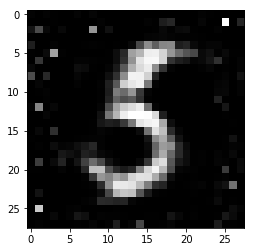

Number batches 468
148(0/468) D: 0.6828, G: 0.9578
148(1/468) D: 0.6453, G: 0.8598
148(2/468) D: 0.5918, G: 0.8687
148(3/468) D: 0.6396, G: 0.9870
148(4/468) D: 0.5497, G: 0.9019
148(5/468) D: 0.6000, G: 0.9583
148(6/468) D: 0.6200, G: 1.1975
148(7/468) D: 0.5793, G: 0.9196
148(8/468) D: 0.5531, G: 0.8371
148(9/468) D: 0.6753, G: 1.1027
148(10/468) D: 0.6390, G: 1.0154
148(11/468) D: 0.5925, G: 0.9285
148(12/468) D: 0.6378, G: 0.8162
148(13/468) D: 0.6163, G: 0.8763
148(14/468) D: 0.6466, G: 1.1201
148(15/468) D: 0.6915, G: 0.8506
148(16/468) D: 0.6350, G: 0.8548
148(17/468) D: 0.6194, G: 0.9684
148(18/468) D: 0.5948, G: 0.9480
148(19/468) D: 0.6138, G: 0.8610
148(20/468) D: 0.6333, G: 1.0865
148(21/468) D: 0.5593, G: 1.0654
148(22/468) D: 0.5941, G: 0.8669
148(23/468) D: 0.5970, G: 0.9256
148(24/468) D: 0.5993, G: 1.0049
148(25/468) D: 0.6241, G: 0.9238
148(26/468) D: 0.6192, G: 1.0874
148(27/468) D: 0.6354, G: 0.9583
148(28/468) D: 0.6392, G: 1.0101
148(29/468) D: 0.5700, G: 0.7651
1

148(244/468) D: 0.6364, G: 0.8731
148(245/468) D: 0.6081, G: 1.0966
148(246/468) D: 0.6322, G: 0.8682
148(247/468) D: 0.5808, G: 0.9662
148(248/468) D: 0.6042, G: 1.1228
148(249/468) D: 0.6141, G: 0.9123
148(250/468) D: 0.6525, G: 0.8041
148(251/468) D: 0.6241, G: 1.0429
148(252/468) D: 0.6107, G: 0.9967
148(253/468) D: 0.6176, G: 1.0144
148(254/468) D: 0.6418, G: 0.8144
148(255/468) D: 0.6546, G: 0.9256
148(256/468) D: 0.6040, G: 0.9940
148(257/468) D: 0.5915, G: 1.0604
148(258/468) D: 0.5986, G: 0.7639
148(259/468) D: 0.6026, G: 0.8651
148(260/468) D: 0.6108, G: 0.9322
148(261/468) D: 0.6225, G: 1.0485
148(262/468) D: 0.6045, G: 0.8368
148(263/468) D: 0.6810, G: 0.9805
148(264/468) D: 0.6440, G: 1.0401
148(265/468) D: 0.6343, G: 0.8796
148(266/468) D: 0.6099, G: 1.0423
148(267/468) D: 0.5892, G: 0.9691
148(268/468) D: 0.6440, G: 1.0821
148(269/468) D: 0.6321, G: 1.0715
148(270/468) D: 0.6755, G: 0.9310
148(271/468) D: 0.6201, G: 0.8421
148(272/468) D: 0.6090, G: 0.9265
148(273/468) D

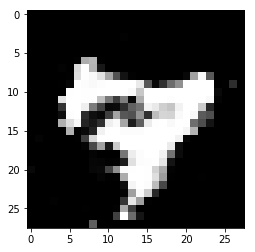

Number batches 468
149(0/468) D: 0.6660, G: 0.9137
149(1/468) D: 0.6171, G: 1.0351
149(2/468) D: 0.6698, G: 0.8053
149(3/468) D: 0.6926, G: 0.9901
149(4/468) D: 0.5660, G: 1.0446
149(5/468) D: 0.5856, G: 0.8044
149(6/468) D: 0.5793, G: 1.0065
149(7/468) D: 0.6061, G: 1.0952
149(8/468) D: 0.5988, G: 0.9902
149(9/468) D: 0.6275, G: 0.8427
149(10/468) D: 0.6684, G: 0.9142
149(11/468) D: 0.5953, G: 1.2107
149(12/468) D: 0.6690, G: 0.8454
149(13/468) D: 0.6313, G: 0.8834
149(14/468) D: 0.6006, G: 0.9574
149(15/468) D: 0.6481, G: 1.0202
149(16/468) D: 0.6668, G: 0.8149
149(17/468) D: 0.6254, G: 1.0268
149(18/468) D: 0.5891, G: 1.0281
149(19/468) D: 0.5945, G: 0.8792
149(20/468) D: 0.6191, G: 0.9832
149(21/468) D: 0.6161, G: 1.1031
149(22/468) D: 0.6066, G: 0.7444
149(23/468) D: 0.6003, G: 0.8332
149(24/468) D: 0.5520, G: 0.9952
149(25/468) D: 0.6354, G: 0.8531
149(26/468) D: 0.5967, G: 0.9834
149(27/468) D: 0.5407, G: 1.0379
149(28/468) D: 0.5747, G: 0.8438
149(29/468) D: 0.6291, G: 1.0511
1

149(244/468) D: 0.6005, G: 0.7869
149(245/468) D: 0.6263, G: 0.9566
149(246/468) D: 0.6050, G: 0.8472
149(247/468) D: 0.6272, G: 1.1902
149(248/468) D: 0.5933, G: 1.0182
149(249/468) D: 0.5708, G: 0.9837
149(250/468) D: 0.6590, G: 0.8309
149(251/468) D: 0.6366, G: 1.0205
149(252/468) D: 0.6480, G: 1.0535
149(253/468) D: 0.6142, G: 0.9850
149(254/468) D: 0.6309, G: 0.8588
149(255/468) D: 0.6797, G: 0.6998
149(256/468) D: 0.6118, G: 0.8866
149(257/468) D: 0.5939, G: 1.0959
149(258/468) D: 0.6268, G: 0.8751
149(259/468) D: 0.5824, G: 0.8524
149(260/468) D: 0.6101, G: 1.0666
149(261/468) D: 0.6195, G: 0.9178
149(262/468) D: 0.5984, G: 0.8980
149(263/468) D: 0.6324, G: 0.9123
149(264/468) D: 0.6581, G: 1.0188
149(265/468) D: 0.6482, G: 1.0142
149(266/468) D: 0.6586, G: 1.0300
149(267/468) D: 0.6083, G: 0.9376
149(268/468) D: 0.6073, G: 0.9066
149(269/468) D: 0.6172, G: 0.9697
149(270/468) D: 0.6300, G: 0.9940
149(271/468) D: 0.6313, G: 0.9817
149(272/468) D: 0.6262, G: 0.8925
149(273/468) D

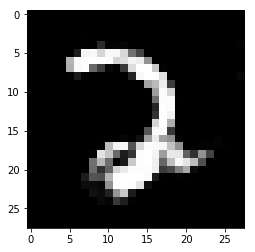

Number batches 468
150(0/468) D: 0.7027, G: 0.8545
150(1/468) D: 0.6565, G: 0.6864
150(2/468) D: 0.6625, G: 0.9436
150(3/468) D: 0.6220, G: 0.9591
150(4/468) D: 0.6059, G: 0.9991
150(5/468) D: 0.5782, G: 0.9288
150(6/468) D: 0.5938, G: 0.9939
150(7/468) D: 0.5951, G: 0.8741
150(8/468) D: 0.5896, G: 1.0007
150(9/468) D: 0.6695, G: 0.9587
150(10/468) D: 0.6748, G: 0.9427
150(11/468) D: 0.6076, G: 0.9940
150(12/468) D: 0.6113, G: 0.9318
150(13/468) D: 0.6005, G: 0.8771
150(14/468) D: 0.6363, G: 1.1612
150(15/468) D: 0.6525, G: 0.9615
150(16/468) D: 0.6200, G: 0.8714
150(17/468) D: 0.6230, G: 0.8380
150(18/468) D: 0.6325, G: 1.0196
150(19/468) D: 0.6214, G: 0.8751
150(20/468) D: 0.5948, G: 0.8668
150(21/468) D: 0.6275, G: 1.0458
150(22/468) D: 0.6297, G: 0.9580
150(23/468) D: 0.5870, G: 0.8650
150(24/468) D: 0.5733, G: 1.0077
150(25/468) D: 0.6766, G: 0.9121
150(26/468) D: 0.5782, G: 0.8785
150(27/468) D: 0.6076, G: 1.1722
150(28/468) D: 0.6631, G: 0.9018
150(29/468) D: 0.6119, G: 0.9522
1

150(245/468) D: 0.6255, G: 0.9030
150(246/468) D: 0.6122, G: 0.9209
150(247/468) D: 0.5827, G: 1.0831
150(248/468) D: 0.5896, G: 0.8661
150(249/468) D: 0.6076, G: 1.2568
150(250/468) D: 0.6958, G: 0.8239
150(251/468) D: 0.6377, G: 0.8681
150(252/468) D: 0.6077, G: 1.0507
150(253/468) D: 0.6165, G: 1.0444
150(254/468) D: 0.6327, G: 0.8906
150(255/468) D: 0.7228, G: 0.8207
150(256/468) D: 0.6309, G: 1.0580
150(257/468) D: 0.5854, G: 0.9704
150(258/468) D: 0.6298, G: 0.8389
150(259/468) D: 0.6352, G: 0.9794
150(260/468) D: 0.6056, G: 0.9167
150(261/468) D: 0.6274, G: 0.9245
150(262/468) D: 0.6530, G: 0.9197
150(263/468) D: 0.6243, G: 0.8429
150(264/468) D: 0.6471, G: 0.8641
150(265/468) D: 0.5831, G: 1.0018
150(266/468) D: 0.5897, G: 0.8690
150(267/468) D: 0.5836, G: 0.8354
150(268/468) D: 0.6500, G: 1.0504
150(269/468) D: 0.6172, G: 1.0716
150(270/468) D: 0.6253, G: 0.8322
150(271/468) D: 0.6712, G: 1.0333
150(272/468) D: 0.6526, G: 1.0528
150(273/468) D: 0.6018, G: 0.8119
150(274/468) D

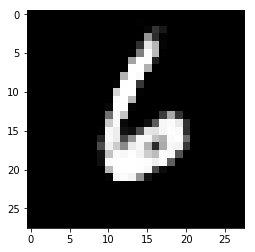

Number batches 468
151(0/468) D: 0.6966, G: 0.9014
151(1/468) D: 0.7141, G: 0.9848
151(2/468) D: 0.6724, G: 0.9988
151(3/468) D: 0.5923, G: 0.8259
151(4/468) D: 0.6357, G: 1.1004
151(5/468) D: 0.5970, G: 0.9509
151(6/468) D: 0.6278, G: 0.8713
151(7/468) D: 0.6454, G: 0.8851
151(8/468) D: 0.6157, G: 1.0488
151(9/468) D: 0.6489, G: 0.9382
151(10/468) D: 0.6208, G: 0.8433
151(11/468) D: 0.6094, G: 1.0960
151(12/468) D: 0.5936, G: 0.8935
151(13/468) D: 0.5995, G: 0.8515
151(14/468) D: 0.6532, G: 1.0998
151(15/468) D: 0.6998, G: 0.9233
151(16/468) D: 0.6442, G: 0.8862
151(17/468) D: 0.6313, G: 0.9147
151(18/468) D: 0.6233, G: 0.9209
151(19/468) D: 0.6507, G: 0.8401
151(20/468) D: 0.6226, G: 0.9028
151(21/468) D: 0.6109, G: 0.9847
151(22/468) D: 0.6303, G: 0.9203
151(23/468) D: 0.6335, G: 0.9290
151(24/468) D: 0.5816, G: 0.8951
151(25/468) D: 0.6203, G: 0.8682
151(26/468) D: 0.6057, G: 0.9474
151(27/468) D: 0.6177, G: 1.0962
151(28/468) D: 0.6047, G: 0.8885
151(29/468) D: 0.6331, G: 1.0997
1

151(245/468) D: 0.6532, G: 0.8996
151(246/468) D: 0.6185, G: 1.0513
151(247/468) D: 0.5755, G: 0.9732
151(248/468) D: 0.6171, G: 0.8409
151(249/468) D: 0.6462, G: 0.9417
151(250/468) D: 0.6693, G: 0.9615
151(251/468) D: 0.6289, G: 0.8395
151(252/468) D: 0.6308, G: 1.1031
151(253/468) D: 0.5845, G: 0.9371
151(254/468) D: 0.6331, G: 0.9645
151(255/468) D: 0.6816, G: 0.7893
151(256/468) D: 0.5982, G: 0.8408
151(257/468) D: 0.5937, G: 1.0381
151(258/468) D: 0.6337, G: 0.8862
151(259/468) D: 0.5929, G: 0.8271
151(260/468) D: 0.6099, G: 0.8925
151(261/468) D: 0.6167, G: 0.9588
151(262/468) D: 0.6066, G: 0.9252
151(263/468) D: 0.6743, G: 0.8669
151(264/468) D: 0.6222, G: 0.9062
151(265/468) D: 0.5988, G: 0.7833
151(266/468) D: 0.5915, G: 0.8478
151(267/468) D: 0.5798, G: 1.0587
151(268/468) D: 0.5845, G: 0.8586
151(269/468) D: 0.5630, G: 0.9290
151(270/468) D: 0.6179, G: 0.9640
151(271/468) D: 0.6815, G: 0.8682
151(272/468) D: 0.6275, G: 1.0900
151(273/468) D: 0.6334, G: 1.0126
151(274/468) D

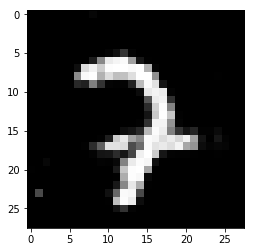

Number batches 468
152(0/468) D: 0.6689, G: 0.9345
152(1/468) D: 0.6347, G: 0.9835
152(2/468) D: 0.6552, G: 0.8662
152(3/468) D: 0.6272, G: 0.9230
152(4/468) D: 0.5948, G: 1.0242
152(5/468) D: 0.5837, G: 0.8872
152(6/468) D: 0.5997, G: 0.9307
152(7/468) D: 0.6121, G: 1.0105
152(8/468) D: 0.5909, G: 0.9251
152(9/468) D: 0.6696, G: 0.8044
152(10/468) D: 0.7012, G: 0.9759
152(11/468) D: 0.5789, G: 0.9877
152(12/468) D: 0.5834, G: 0.8474
152(13/468) D: 0.6235, G: 1.0394
152(14/468) D: 0.6477, G: 0.9572
152(15/468) D: 0.6247, G: 0.8253
152(16/468) D: 0.6174, G: 0.9636
152(17/468) D: 0.6609, G: 0.8330
152(18/468) D: 0.6201, G: 0.9221
152(19/468) D: 0.6305, G: 1.0105
152(20/468) D: 0.5842, G: 0.9421
152(21/468) D: 0.6455, G: 0.8501
152(22/468) D: 0.6151, G: 1.0705
152(23/468) D: 0.5970, G: 0.7741
152(24/468) D: 0.6115, G: 0.9273
152(25/468) D: 0.6286, G: 0.9551
152(26/468) D: 0.6076, G: 0.9983
152(27/468) D: 0.5674, G: 0.8695
152(28/468) D: 0.6382, G: 1.0884
152(29/468) D: 0.6080, G: 0.7929
1

152(245/468) D: 0.6321, G: 0.9498
152(246/468) D: 0.5812, G: 0.8957
152(247/468) D: 0.6095, G: 1.0389
152(248/468) D: 0.6243, G: 1.0474
152(249/468) D: 0.6365, G: 1.0313
152(250/468) D: 0.6717, G: 0.8620
152(251/468) D: 0.6526, G: 0.9252
152(252/468) D: 0.6180, G: 0.9659
152(253/468) D: 0.6518, G: 0.9437
152(254/468) D: 0.6225, G: 0.9153
152(255/468) D: 0.6681, G: 0.8694
152(256/468) D: 0.6555, G: 0.9916
152(257/468) D: 0.5959, G: 1.0572
152(258/468) D: 0.6253, G: 0.8674
152(259/468) D: 0.5865, G: 0.9461
152(260/468) D: 0.5872, G: 0.8957
152(261/468) D: 0.6098, G: 0.8368
152(262/468) D: 0.6367, G: 0.9491
152(263/468) D: 0.6273, G: 0.8902
152(264/468) D: 0.6515, G: 0.8728
152(265/468) D: 0.6073, G: 0.7962
152(266/468) D: 0.6319, G: 0.9295
152(267/468) D: 0.6303, G: 0.9196
152(268/468) D: 0.6222, G: 0.9823
152(269/468) D: 0.6086, G: 0.9314
152(270/468) D: 0.6522, G: 0.9397
152(271/468) D: 0.6426, G: 0.8295
152(272/468) D: 0.6820, G: 0.9290
152(273/468) D: 0.6207, G: 0.9367
152(274/468) D

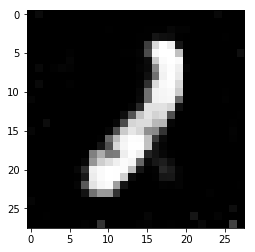

Number batches 468
153(0/468) D: 0.6981, G: 0.7469
153(1/468) D: 0.6758, G: 0.8426
153(2/468) D: 0.6989, G: 0.8924
153(3/468) D: 0.6156, G: 1.0008
153(4/468) D: 0.6147, G: 0.9829
153(5/468) D: 0.6264, G: 0.9032
153(6/468) D: 0.5987, G: 0.9183
153(7/468) D: 0.5847, G: 1.0562
153(8/468) D: 0.5618, G: 1.0130
153(9/468) D: 0.6795, G: 1.0273
153(10/468) D: 0.6538, G: 0.8964
153(11/468) D: 0.5710, G: 0.9964
153(12/468) D: 0.5767, G: 0.9112
153(13/468) D: 0.6604, G: 0.9646
153(14/468) D: 0.6352, G: 1.0059
153(15/468) D: 0.6473, G: 0.9969
153(16/468) D: 0.6359, G: 0.8757
153(17/468) D: 0.6507, G: 0.8893
153(18/468) D: 0.6372, G: 0.9861
153(19/468) D: 0.6420, G: 0.8722
153(20/468) D: 0.5859, G: 0.9763
153(21/468) D: 0.5991, G: 1.1017
153(22/468) D: 0.6140, G: 0.9521
153(23/468) D: 0.5554, G: 0.9029
153(24/468) D: 0.6009, G: 0.9541
153(25/468) D: 0.5929, G: 0.9113
153(26/468) D: 0.5931, G: 0.9345
153(27/468) D: 0.6200, G: 0.8892
153(28/468) D: 0.6136, G: 1.0271
153(29/468) D: 0.6261, G: 1.0413
1

153(244/468) D: 0.6166, G: 0.7924
153(245/468) D: 0.6529, G: 1.1865
153(246/468) D: 0.6353, G: 1.0202
153(247/468) D: 0.5947, G: 0.9857
153(248/468) D: 0.5704, G: 1.0373
153(249/468) D: 0.6628, G: 1.0402
153(250/468) D: 0.6562, G: 0.9250
153(251/468) D: 0.6355, G: 1.0455
153(252/468) D: 0.6533, G: 0.8834
153(253/468) D: 0.6276, G: 0.9332
153(254/468) D: 0.6476, G: 0.9241
153(255/468) D: 0.6706, G: 0.8327
153(256/468) D: 0.6263, G: 0.9402
153(257/468) D: 0.5837, G: 0.9420
153(258/468) D: 0.6395, G: 0.9351
153(259/468) D: 0.5799, G: 0.9409
153(260/468) D: 0.6580, G: 0.8438
153(261/468) D: 0.6236, G: 0.8877
153(262/468) D: 0.6052, G: 1.0088
153(263/468) D: 0.6426, G: 0.8962
153(264/468) D: 0.6199, G: 0.8452
153(265/468) D: 0.6289, G: 0.8415
153(266/468) D: 0.6170, G: 0.9754
153(267/468) D: 0.6002, G: 0.9621
153(268/468) D: 0.6143, G: 0.8500
153(269/468) D: 0.6405, G: 0.9510
153(270/468) D: 0.5856, G: 0.9848
153(271/468) D: 0.6223, G: 0.9129
153(272/468) D: 0.6359, G: 0.9995
153(273/468) D

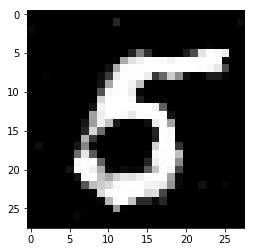

Number batches 468
154(0/468) D: 0.6712, G: 0.9822
154(1/468) D: 0.6454, G: 0.8233
154(2/468) D: 0.6016, G: 0.9111
154(3/468) D: 0.6060, G: 0.9506
154(4/468) D: 0.5914, G: 1.0657
154(5/468) D: 0.5942, G: 0.8554
154(6/468) D: 0.5953, G: 0.9152
154(7/468) D: 0.5747, G: 1.0341
154(8/468) D: 0.6009, G: 1.0974
154(9/468) D: 0.6852, G: 0.9121
154(10/468) D: 0.6813, G: 0.8657
154(11/468) D: 0.5629, G: 0.9545
154(12/468) D: 0.6028, G: 0.9650
154(13/468) D: 0.6347, G: 1.0381
154(14/468) D: 0.6136, G: 0.9763
154(15/468) D: 0.6790, G: 0.9367
154(16/468) D: 0.6311, G: 0.8909
154(17/468) D: 0.6223, G: 0.9317
154(18/468) D: 0.5939, G: 0.9225
154(19/468) D: 0.5910, G: 0.9478
154(20/468) D: 0.5990, G: 0.9101
154(21/468) D: 0.5960, G: 0.9441
154(22/468) D: 0.6182, G: 0.9834
154(23/468) D: 0.6057, G: 0.9495
154(24/468) D: 0.5986, G: 1.0028
154(25/468) D: 0.6353, G: 0.8591
154(26/468) D: 0.6127, G: 0.9682
154(27/468) D: 0.6031, G: 1.0933
154(28/468) D: 0.6761, G: 0.8821
154(29/468) D: 0.5794, G: 0.9864
1

154(245/468) D: 0.6163, G: 0.9471
154(246/468) D: 0.5884, G: 0.8997
154(247/468) D: 0.5669, G: 0.9604
154(248/468) D: 0.6229, G: 1.1459
154(249/468) D: 0.5800, G: 0.8944
154(250/468) D: 0.6531, G: 0.9360
154(251/468) D: 0.6334, G: 0.9712
154(252/468) D: 0.5987, G: 1.0621
154(253/468) D: 0.6001, G: 0.9564
154(254/468) D: 0.6177, G: 0.7223
154(255/468) D: 0.6615, G: 0.9100
154(256/468) D: 0.6015, G: 0.9224
154(257/468) D: 0.5854, G: 0.9297
154(258/468) D: 0.5950, G: 0.8862
154(259/468) D: 0.6198, G: 0.9486
154(260/468) D: 0.6410, G: 0.9740
154(261/468) D: 0.6156, G: 0.8883
154(262/468) D: 0.6071, G: 0.9792
154(263/468) D: 0.6783, G: 0.8724
154(264/468) D: 0.6424, G: 0.8891
154(265/468) D: 0.5890, G: 0.9797
154(266/468) D: 0.5981, G: 1.0041
154(267/468) D: 0.5886, G: 0.9836
154(268/468) D: 0.6274, G: 0.9060
154(269/468) D: 0.6013, G: 1.0266
154(270/468) D: 0.5933, G: 0.8097
154(271/468) D: 0.6067, G: 1.0475
154(272/468) D: 0.5846, G: 0.9992
154(273/468) D: 0.6320, G: 1.1164
154(274/468) D

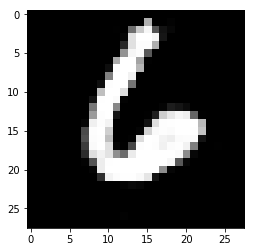

Number batches 468
155(0/468) D: 0.6621, G: 0.8552
155(1/468) D: 0.6752, G: 0.9190
155(2/468) D: 0.6444, G: 1.0284
155(3/468) D: 0.6167, G: 0.8630
155(4/468) D: 0.5957, G: 1.0426
155(5/468) D: 0.5770, G: 1.0496
155(6/468) D: 0.6332, G: 0.9810
155(7/468) D: 0.6029, G: 1.0248
155(8/468) D: 0.5837, G: 0.9222
155(9/468) D: 0.6807, G: 0.9909
155(10/468) D: 0.6775, G: 0.9845
155(11/468) D: 0.6175, G: 1.0158
155(12/468) D: 0.6045, G: 0.8079
155(13/468) D: 0.6414, G: 0.9504
155(14/468) D: 0.6178, G: 0.8884
155(15/468) D: 0.6432, G: 0.8437
155(16/468) D: 0.6139, G: 0.8626
155(17/468) D: 0.6233, G: 0.9699
155(18/468) D: 0.6128, G: 0.9455
155(19/468) D: 0.6408, G: 0.8750
155(20/468) D: 0.6112, G: 0.9612
155(21/468) D: 0.6426, G: 0.9258
155(22/468) D: 0.6075, G: 0.8650
155(23/468) D: 0.5850, G: 0.9142
155(24/468) D: 0.6100, G: 1.0234
155(25/468) D: 0.6363, G: 0.8652
155(26/468) D: 0.5938, G: 0.9797
155(27/468) D: 0.6137, G: 0.9539
155(28/468) D: 0.5991, G: 0.9611
155(29/468) D: 0.6011, G: 1.0244
1

155(245/468) D: 0.6196, G: 1.1100
155(246/468) D: 0.6044, G: 0.8755
155(247/468) D: 0.5481, G: 0.8814
155(248/468) D: 0.6224, G: 1.1254
155(249/468) D: 0.5994, G: 0.9861
155(250/468) D: 0.6766, G: 0.9013
155(251/468) D: 0.5930, G: 1.0205
155(252/468) D: 0.6078, G: 1.1737
155(253/468) D: 0.6312, G: 0.8409
155(254/468) D: 0.6512, G: 0.8804
155(255/468) D: 0.6922, G: 0.7461
155(256/468) D: 0.6465, G: 0.9991
155(257/468) D: 0.5948, G: 1.0368
155(258/468) D: 0.6437, G: 0.8498
155(259/468) D: 0.6294, G: 0.9762
155(260/468) D: 0.6053, G: 1.0257
155(261/468) D: 0.6308, G: 0.9154
155(262/468) D: 0.6409, G: 0.8661
155(263/468) D: 0.6799, G: 0.8488
155(264/468) D: 0.6415, G: 0.9552
155(265/468) D: 0.6137, G: 1.0099
155(266/468) D: 0.6282, G: 0.9085
155(267/468) D: 0.6167, G: 0.9179
155(268/468) D: 0.6502, G: 0.9260
155(269/468) D: 0.6016, G: 1.0209
155(270/468) D: 0.6372, G: 0.8585
155(271/468) D: 0.6250, G: 0.9781
155(272/468) D: 0.6293, G: 0.7860
155(273/468) D: 0.5946, G: 0.9591
155(274/468) D

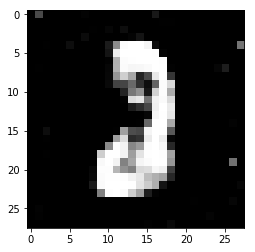

Number batches 468
156(0/468) D: 0.6987, G: 0.7664
156(1/468) D: 0.6504, G: 0.8158
156(2/468) D: 0.6309, G: 0.9537
156(3/468) D: 0.6274, G: 0.9256
156(4/468) D: 0.5802, G: 0.9851
156(5/468) D: 0.6223, G: 0.8238
156(6/468) D: 0.5927, G: 1.0273
156(7/468) D: 0.6386, G: 1.0465
156(8/468) D: 0.6566, G: 0.9305
156(9/468) D: 0.6869, G: 0.8721
156(10/468) D: 0.6215, G: 0.9929
156(11/468) D: 0.6072, G: 0.9536
156(12/468) D: 0.6234, G: 0.9988
156(13/468) D: 0.6359, G: 0.9189
156(14/468) D: 0.5747, G: 0.8492
156(15/468) D: 0.6386, G: 0.9362
156(16/468) D: 0.6009, G: 0.9571
156(17/468) D: 0.6219, G: 0.7807
156(18/468) D: 0.6311, G: 0.8326
156(19/468) D: 0.6325, G: 1.0831
156(20/468) D: 0.6335, G: 0.9748
156(21/468) D: 0.6164, G: 0.9268
156(22/468) D: 0.6033, G: 0.8549
156(23/468) D: 0.6437, G: 1.0512
156(24/468) D: 0.5440, G: 0.8992
156(25/468) D: 0.6442, G: 0.9189
156(26/468) D: 0.5952, G: 1.0244
156(27/468) D: 0.5946, G: 0.9202
156(28/468) D: 0.6561, G: 0.8352
156(29/468) D: 0.6224, G: 1.0260
1

156(244/468) D: 0.6172, G: 0.9872
156(245/468) D: 0.6155, G: 0.9474
156(246/468) D: 0.6221, G: 0.9940
156(247/468) D: 0.6065, G: 0.9201
156(248/468) D: 0.6064, G: 0.9395
156(249/468) D: 0.5929, G: 1.1211
156(250/468) D: 0.6969, G: 0.8017
156(251/468) D: 0.6170, G: 0.8686
156(252/468) D: 0.5916, G: 0.9779
156(253/468) D: 0.5921, G: 1.0040
156(254/468) D: 0.6319, G: 0.8723
156(255/468) D: 0.6531, G: 0.9681
156(256/468) D: 0.6134, G: 1.0259
156(257/468) D: 0.6013, G: 0.9760
156(258/468) D: 0.6040, G: 0.8398
156(259/468) D: 0.6062, G: 0.8796
156(260/468) D: 0.6502, G: 0.9931
156(261/468) D: 0.6000, G: 1.1119
156(262/468) D: 0.6080, G: 0.9084
156(263/468) D: 0.6979, G: 0.9455
156(264/468) D: 0.6589, G: 0.9134
156(265/468) D: 0.6143, G: 0.9209
156(266/468) D: 0.5712, G: 0.8555
156(267/468) D: 0.6196, G: 1.0309
156(268/468) D: 0.6358, G: 0.8811
156(269/468) D: 0.6224, G: 1.0002
156(270/468) D: 0.6245, G: 1.0741
156(271/468) D: 0.6294, G: 0.9153
156(272/468) D: 0.5651, G: 0.8116
156(273/468) D

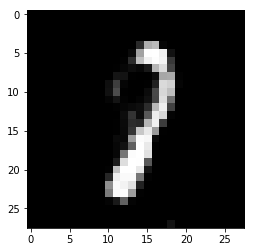

Number batches 468
157(0/468) D: 0.6154, G: 0.9489
157(1/468) D: 0.6301, G: 0.8709
157(2/468) D: 0.6164, G: 0.9982
157(3/468) D: 0.6364, G: 0.9847
157(4/468) D: 0.5732, G: 1.0289
157(5/468) D: 0.6177, G: 0.9704
157(6/468) D: 0.6023, G: 0.9069
157(7/468) D: 0.5990, G: 1.1352
157(8/468) D: 0.5921, G: 0.9960
157(9/468) D: 0.6548, G: 0.8122
157(10/468) D: 0.6501, G: 0.9836
157(11/468) D: 0.5973, G: 1.0940
157(12/468) D: 0.5845, G: 0.7893
157(13/468) D: 0.6003, G: 0.9502
157(14/468) D: 0.6199, G: 1.0648
157(15/468) D: 0.6314, G: 0.8719
157(16/468) D: 0.6590, G: 0.9611
157(17/468) D: 0.6607, G: 0.8648
157(18/468) D: 0.6337, G: 0.9465
157(19/468) D: 0.6484, G: 0.9037
157(20/468) D: 0.5863, G: 0.9364
157(21/468) D: 0.6333, G: 0.9107
157(22/468) D: 0.6119, G: 0.9265
157(23/468) D: 0.5714, G: 0.8274
157(24/468) D: 0.5673, G: 0.9415
157(25/468) D: 0.5798, G: 0.9359
157(26/468) D: 0.5846, G: 0.7773
157(27/468) D: 0.5866, G: 1.0915
157(28/468) D: 0.6286, G: 0.8078
157(29/468) D: 0.6088, G: 0.9218
1

157(244/468) D: 0.6644, G: 0.9506
157(245/468) D: 0.6134, G: 0.9023
157(246/468) D: 0.6006, G: 0.9835
157(247/468) D: 0.5858, G: 1.1758
157(248/468) D: 0.5773, G: 0.9299
157(249/468) D: 0.6305, G: 1.0067
157(250/468) D: 0.6409, G: 0.8716
157(251/468) D: 0.5864, G: 0.8754
157(252/468) D: 0.6199, G: 1.1034
157(253/468) D: 0.6021, G: 1.1347
157(254/468) D: 0.6098, G: 0.8478
157(255/468) D: 0.6481, G: 0.7817
157(256/468) D: 0.6390, G: 1.0846
157(257/468) D: 0.6037, G: 0.9645
157(258/468) D: 0.6330, G: 0.8675
157(259/468) D: 0.5924, G: 0.8322
157(260/468) D: 0.5965, G: 0.9594
157(261/468) D: 0.5711, G: 0.9179
157(262/468) D: 0.5935, G: 0.8660
157(263/468) D: 0.6467, G: 1.0228
157(264/468) D: 0.6357, G: 1.0267
157(265/468) D: 0.6467, G: 0.9293
157(266/468) D: 0.6043, G: 1.0594
157(267/468) D: 0.5746, G: 0.9158
157(268/468) D: 0.6130, G: 0.9164
157(269/468) D: 0.6014, G: 0.9568
157(270/468) D: 0.6069, G: 1.0383
157(271/468) D: 0.6336, G: 1.0298
157(272/468) D: 0.6299, G: 1.0342
157(273/468) D

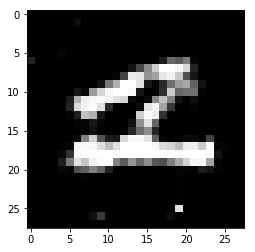

Number batches 468
158(0/468) D: 0.6414, G: 0.8620
158(1/468) D: 0.5936, G: 0.8826
158(2/468) D: 0.6242, G: 0.9601
158(3/468) D: 0.6275, G: 1.0696
158(4/468) D: 0.5715, G: 0.9020
158(5/468) D: 0.6043, G: 1.0428
158(6/468) D: 0.6162, G: 0.9832
158(7/468) D: 0.5821, G: 1.0081
158(8/468) D: 0.6028, G: 0.8865
158(9/468) D: 0.6739, G: 0.9636
158(10/468) D: 0.6276, G: 0.9125
158(11/468) D: 0.6172, G: 1.1564
158(12/468) D: 0.6314, G: 0.9744
158(13/468) D: 0.6651, G: 0.8041
158(14/468) D: 0.5745, G: 0.9609
158(15/468) D: 0.6675, G: 0.8681
158(16/468) D: 0.6533, G: 1.0227
158(17/468) D: 0.6723, G: 0.9781
158(18/468) D: 0.6329, G: 0.8622
158(19/468) D: 0.6320, G: 0.8762
158(20/468) D: 0.6044, G: 0.9476
158(21/468) D: 0.6183, G: 1.0298
158(22/468) D: 0.6380, G: 0.8955
158(23/468) D: 0.5928, G: 1.0198
158(24/468) D: 0.5936, G: 0.9914
158(25/468) D: 0.6116, G: 0.7835
158(26/468) D: 0.6377, G: 1.0852
158(27/468) D: 0.6151, G: 1.0284
158(28/468) D: 0.6257, G: 0.7801
158(29/468) D: 0.6186, G: 1.0106
1

158(245/468) D: 0.6283, G: 0.9869
158(246/468) D: 0.5973, G: 1.0345
158(247/468) D: 0.5786, G: 1.0218
158(248/468) D: 0.5943, G: 0.8754
158(249/468) D: 0.6370, G: 1.0016
158(250/468) D: 0.6759, G: 0.7551
158(251/468) D: 0.6276, G: 0.9401
158(252/468) D: 0.6139, G: 1.0012
158(253/468) D: 0.6301, G: 1.0221
158(254/468) D: 0.6589, G: 0.8995
158(255/468) D: 0.6744, G: 0.8956
158(256/468) D: 0.6140, G: 1.0339
158(257/468) D: 0.6207, G: 1.0449
158(258/468) D: 0.6393, G: 0.8410
158(259/468) D: 0.6198, G: 0.9954
158(260/468) D: 0.6324, G: 0.8777
158(261/468) D: 0.5894, G: 0.9072
158(262/468) D: 0.6020, G: 0.9984
158(263/468) D: 0.6679, G: 0.9181
158(264/468) D: 0.6687, G: 0.9893
158(265/468) D: 0.5960, G: 0.9803
158(266/468) D: 0.5852, G: 0.8524
158(267/468) D: 0.6011, G: 0.9571
158(268/468) D: 0.6366, G: 0.9326
158(269/468) D: 0.5999, G: 0.8025
158(270/468) D: 0.6304, G: 1.0149
158(271/468) D: 0.6051, G: 0.9128
158(272/468) D: 0.6038, G: 1.0348
158(273/468) D: 0.6293, G: 1.0754
158(274/468) D

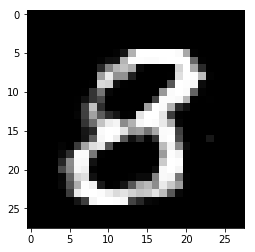

Number batches 468
159(0/468) D: 0.6715, G: 0.7273
159(1/468) D: 0.6436, G: 0.9361
159(2/468) D: 0.6609, G: 1.0368
159(3/468) D: 0.6299, G: 1.0419
159(4/468) D: 0.5493, G: 1.0011
159(5/468) D: 0.6068, G: 0.7862
159(6/468) D: 0.6122, G: 1.0175
159(7/468) D: 0.5820, G: 1.1415
159(8/468) D: 0.6481, G: 0.8577
159(9/468) D: 0.6781, G: 0.9023
159(10/468) D: 0.6331, G: 0.9534
159(11/468) D: 0.6085, G: 1.0202
159(12/468) D: 0.5739, G: 0.7787
159(13/468) D: 0.6400, G: 0.9508
159(14/468) D: 0.6338, G: 1.0837
159(15/468) D: 0.6453, G: 0.9670
159(16/468) D: 0.6371, G: 0.8903
159(17/468) D: 0.6627, G: 0.9936
159(18/468) D: 0.5848, G: 0.9539
159(19/468) D: 0.6076, G: 0.7995
159(20/468) D: 0.6099, G: 0.9653
159(21/468) D: 0.6223, G: 0.9588
159(22/468) D: 0.6089, G: 0.8323
159(23/468) D: 0.6092, G: 0.9069
159(24/468) D: 0.5662, G: 0.9300
159(25/468) D: 0.6255, G: 0.8669
159(26/468) D: 0.6255, G: 0.9462
159(27/468) D: 0.6426, G: 1.1554
159(28/468) D: 0.6231, G: 0.8475
159(29/468) D: 0.6087, G: 0.7741
1

159(244/468) D: 0.6462, G: 0.9135
159(245/468) D: 0.6366, G: 0.9523
159(246/468) D: 0.5854, G: 1.0045
159(247/468) D: 0.5910, G: 0.9774
159(248/468) D: 0.6260, G: 1.1581
159(249/468) D: 0.6038, G: 0.9395
159(250/468) D: 0.6102, G: 0.8144
159(251/468) D: 0.6256, G: 1.0667
159(252/468) D: 0.6176, G: 0.9598
159(253/468) D: 0.5896, G: 1.0049
159(254/468) D: 0.6199, G: 0.9828
159(255/468) D: 0.6452, G: 0.8156
159(256/468) D: 0.6524, G: 1.0106
159(257/468) D: 0.5941, G: 1.0330
159(258/468) D: 0.6479, G: 0.8457
159(259/468) D: 0.6473, G: 1.0364
159(260/468) D: 0.6472, G: 0.8278
159(261/468) D: 0.6342, G: 0.9003
159(262/468) D: 0.5713, G: 0.9304
159(263/468) D: 0.6248, G: 0.8760
159(264/468) D: 0.6603, G: 0.8546
159(265/468) D: 0.6088, G: 0.9715
159(266/468) D: 0.6155, G: 0.8898
159(267/468) D: 0.6050, G: 0.9730
159(268/468) D: 0.6143, G: 0.8394
159(269/468) D: 0.6324, G: 0.9888
159(270/468) D: 0.6234, G: 0.9432
159(271/468) D: 0.6436, G: 0.8476
159(272/468) D: 0.6635, G: 1.1602
159(273/468) D

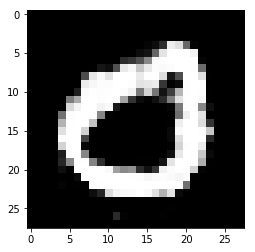

Number batches 468
160(0/468) D: 0.6561, G: 0.7228
160(1/468) D: 0.6338, G: 0.8736
160(2/468) D: 0.6014, G: 0.8781
160(3/468) D: 0.6408, G: 1.0712
160(4/468) D: 0.5786, G: 1.0791
160(5/468) D: 0.5937, G: 0.8699
160(6/468) D: 0.6236, G: 1.0136
160(7/468) D: 0.5701, G: 1.0813
160(8/468) D: 0.5803, G: 0.8996
160(9/468) D: 0.6823, G: 0.9060
160(10/468) D: 0.6476, G: 0.9741
160(11/468) D: 0.6009, G: 0.9553
160(12/468) D: 0.6261, G: 0.8669
160(13/468) D: 0.6301, G: 0.8487
160(14/468) D: 0.6179, G: 0.9833
160(15/468) D: 0.6824, G: 0.9457
160(16/468) D: 0.6220, G: 0.9088
160(17/468) D: 0.6486, G: 0.8857
160(18/468) D: 0.6163, G: 0.8518
160(19/468) D: 0.6553, G: 0.9848
160(20/468) D: 0.5935, G: 0.9342
160(21/468) D: 0.6268, G: 0.8232
160(22/468) D: 0.6572, G: 0.9596
160(23/468) D: 0.6175, G: 0.9006
160(24/468) D: 0.6009, G: 0.9444
160(25/468) D: 0.6120, G: 0.8878
160(26/468) D: 0.6254, G: 1.1268
160(27/468) D: 0.5972, G: 1.0691
160(28/468) D: 0.6719, G: 0.8225
160(29/468) D: 0.6468, G: 1.0175
1

160(245/468) D: 0.6101, G: 0.8665
160(246/468) D: 0.6327, G: 1.0412
160(247/468) D: 0.5937, G: 1.0026
160(248/468) D: 0.6388, G: 0.9792
160(249/468) D: 0.6153, G: 0.9263
160(250/468) D: 0.6702, G: 0.8690
160(251/468) D: 0.6035, G: 0.9253
160(252/468) D: 0.6385, G: 0.9482
160(253/468) D: 0.6120, G: 1.0249
160(254/468) D: 0.6354, G: 0.9436
160(255/468) D: 0.6681, G: 0.9004
160(256/468) D: 0.6673, G: 0.7192
160(257/468) D: 0.6243, G: 1.0617
160(258/468) D: 0.6350, G: 0.8117
160(259/468) D: 0.6488, G: 0.9486
160(260/468) D: 0.6020, G: 0.8816
160(261/468) D: 0.6465, G: 0.9458
160(262/468) D: 0.6440, G: 0.8396
160(263/468) D: 0.6522, G: 0.8566
160(264/468) D: 0.6300, G: 0.9428
160(265/468) D: 0.6229, G: 0.8803
160(266/468) D: 0.6006, G: 0.9682
160(267/468) D: 0.6228, G: 0.9158
160(268/468) D: 0.5908, G: 1.0297
160(269/468) D: 0.6178, G: 1.1053
160(270/468) D: 0.6367, G: 0.8696
160(271/468) D: 0.6118, G: 0.8727
160(272/468) D: 0.6034, G: 0.9299
160(273/468) D: 0.5917, G: 1.0318
160(274/468) D

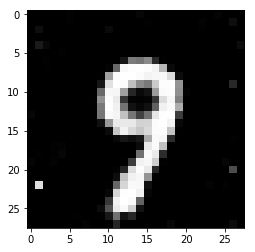

Number batches 468
161(0/468) D: 0.7165, G: 0.8393
161(1/468) D: 0.6746, G: 0.8870
161(2/468) D: 0.6385, G: 0.9855
161(3/468) D: 0.5998, G: 0.8976
161(4/468) D: 0.6045, G: 1.0535
161(5/468) D: 0.6060, G: 0.8419
161(6/468) D: 0.5750, G: 0.9831
161(7/468) D: 0.5819, G: 1.0643
161(8/468) D: 0.5717, G: 0.9944
161(9/468) D: 0.6441, G: 0.9510
161(10/468) D: 0.6458, G: 1.0215
161(11/468) D: 0.6292, G: 1.0519
161(12/468) D: 0.6170, G: 0.7922
161(13/468) D: 0.6190, G: 0.9223
161(14/468) D: 0.6420, G: 1.1499
161(15/468) D: 0.6708, G: 1.0380
161(16/468) D: 0.6271, G: 0.8861
161(17/468) D: 0.6329, G: 0.9080
161(18/468) D: 0.6270, G: 1.1168
161(19/468) D: 0.6145, G: 0.9283
161(20/468) D: 0.6042, G: 0.8411
161(21/468) D: 0.6287, G: 0.8727
161(22/468) D: 0.6325, G: 1.0224
161(23/468) D: 0.5918, G: 1.1497
161(24/468) D: 0.5967, G: 0.7807
161(25/468) D: 0.6626, G: 0.9012
161(26/468) D: 0.6231, G: 1.0216
161(27/468) D: 0.6240, G: 0.9932
161(28/468) D: 0.5982, G: 0.9184
161(29/468) D: 0.6123, G: 0.8396
1

161(245/468) D: 0.5913, G: 0.9888
161(246/468) D: 0.6136, G: 0.8230
161(247/468) D: 0.6300, G: 1.1134
161(248/468) D: 0.5843, G: 1.0279
161(249/468) D: 0.5509, G: 1.0035
161(250/468) D: 0.6561, G: 0.8968
161(251/468) D: 0.5903, G: 1.0171
161(252/468) D: 0.6055, G: 1.0996
161(253/468) D: 0.5818, G: 1.1270
161(254/468) D: 0.6426, G: 0.7757
161(255/468) D: 0.7015, G: 0.9693
161(256/468) D: 0.6499, G: 0.9669
161(257/468) D: 0.5935, G: 1.0190
161(258/468) D: 0.6462, G: 0.8712
161(259/468) D: 0.5980, G: 0.9170
161(260/468) D: 0.6200, G: 0.9221
161(261/468) D: 0.6096, G: 0.9948
161(262/468) D: 0.6147, G: 0.9607
161(263/468) D: 0.6642, G: 0.9879
161(264/468) D: 0.6023, G: 0.9568
161(265/468) D: 0.6086, G: 0.7446
161(266/468) D: 0.5725, G: 0.9627
161(267/468) D: 0.6196, G: 1.0739
161(268/468) D: 0.5936, G: 0.9783
161(269/468) D: 0.5928, G: 0.9641
161(270/468) D: 0.6057, G: 0.9176
161(271/468) D: 0.6144, G: 0.8917
161(272/468) D: 0.6098, G: 0.9436
161(273/468) D: 0.6200, G: 0.9371
161(274/468) D

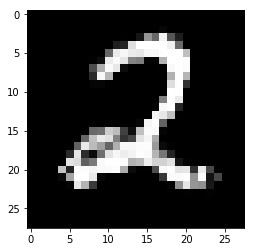

Number batches 468
162(0/468) D: 0.6484, G: 0.8866
162(1/468) D: 0.6321, G: 0.9027
162(2/468) D: 0.6685, G: 1.0416
162(3/468) D: 0.6519, G: 0.9782
162(4/468) D: 0.6007, G: 0.8648
162(5/468) D: 0.6217, G: 1.0995
162(6/468) D: 0.6021, G: 1.1054
162(7/468) D: 0.5596, G: 0.9033
162(8/468) D: 0.5752, G: 1.0542
162(9/468) D: 0.6896, G: 0.9802
162(10/468) D: 0.6637, G: 0.9153
162(11/468) D: 0.6326, G: 1.1974
162(12/468) D: 0.6002, G: 0.8233
162(13/468) D: 0.5941, G: 0.7686
162(14/468) D: 0.5911, G: 1.0342
162(15/468) D: 0.6620, G: 0.9637
162(16/468) D: 0.5871, G: 0.8314
162(17/468) D: 0.6202, G: 1.0060
162(18/468) D: 0.6375, G: 1.0174
162(19/468) D: 0.6204, G: 0.8429
162(20/468) D: 0.6063, G: 0.9309
162(21/468) D: 0.5764, G: 1.0367
162(22/468) D: 0.6511, G: 0.8994
162(23/468) D: 0.5929, G: 1.0073
162(24/468) D: 0.6269, G: 1.0021
162(25/468) D: 0.6433, G: 0.8746
162(26/468) D: 0.6441, G: 0.9519
162(27/468) D: 0.6164, G: 0.9940
162(28/468) D: 0.6294, G: 0.9330
162(29/468) D: 0.5893, G: 0.8742
1

162(244/468) D: 0.6201, G: 0.8661
162(245/468) D: 0.6343, G: 0.9937
162(246/468) D: 0.5907, G: 0.8910
162(247/468) D: 0.5685, G: 0.8486
162(248/468) D: 0.5886, G: 1.0760
162(249/468) D: 0.5778, G: 1.0500
162(250/468) D: 0.6795, G: 0.6561
162(251/468) D: 0.6313, G: 0.9580
162(252/468) D: 0.6277, G: 1.0121
162(253/468) D: 0.5913, G: 1.0229
162(254/468) D: 0.6312, G: 0.9697
162(255/468) D: 0.6797, G: 0.9480
162(256/468) D: 0.6008, G: 0.8336
162(257/468) D: 0.5905, G: 0.9610
162(258/468) D: 0.6371, G: 1.0324
162(259/468) D: 0.6195, G: 0.8119
162(260/468) D: 0.6466, G: 0.9270
162(261/468) D: 0.6217, G: 0.9548
162(262/468) D: 0.6444, G: 0.9811
162(263/468) D: 0.6500, G: 0.8708
162(264/468) D: 0.6265, G: 0.9249
162(265/468) D: 0.6255, G: 0.9257
162(266/468) D: 0.6562, G: 0.9081
162(267/468) D: 0.6234, G: 0.9217
162(268/468) D: 0.6281, G: 1.0061
162(269/468) D: 0.6103, G: 0.9430
162(270/468) D: 0.6479, G: 0.8820
162(271/468) D: 0.6583, G: 0.9592
162(272/468) D: 0.6175, G: 1.0522
162(273/468) D

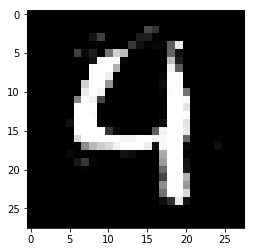

Number batches 468
163(0/468) D: 0.6846, G: 0.7964
163(1/468) D: 0.6542, G: 0.9338
163(2/468) D: 0.6256, G: 1.0841
163(3/468) D: 0.6437, G: 0.8766
163(4/468) D: 0.5947, G: 0.9102
163(5/468) D: 0.6553, G: 0.9198
163(6/468) D: 0.6082, G: 0.9078
163(7/468) D: 0.5713, G: 0.9999
163(8/468) D: 0.5832, G: 0.8652
163(9/468) D: 0.6799, G: 0.8050
163(10/468) D: 0.6715, G: 0.9367
163(11/468) D: 0.5988, G: 0.9268
163(12/468) D: 0.6562, G: 0.9025
163(13/468) D: 0.6281, G: 0.9046
163(14/468) D: 0.6130, G: 1.0399
163(15/468) D: 0.6368, G: 0.9042
163(16/468) D: 0.6188, G: 0.9605
163(17/468) D: 0.6092, G: 0.9118
163(18/468) D: 0.5754, G: 0.9062
163(19/468) D: 0.6067, G: 0.9199
163(20/468) D: 0.6276, G: 0.9797
163(21/468) D: 0.5953, G: 1.0734
163(22/468) D: 0.5896, G: 0.9425
163(23/468) D: 0.5948, G: 0.8656
163(24/468) D: 0.6001, G: 0.9235
163(25/468) D: 0.6045, G: 0.9078
163(26/468) D: 0.6093, G: 1.0230
163(27/468) D: 0.6131, G: 1.1168
163(28/468) D: 0.6172, G: 0.9905
163(29/468) D: 0.5962, G: 0.8983
1

163(245/468) D: 0.5920, G: 0.8088
163(246/468) D: 0.6459, G: 1.1414
163(247/468) D: 0.5682, G: 1.0449
163(248/468) D: 0.5890, G: 0.8611
163(249/468) D: 0.5886, G: 1.0914
163(250/468) D: 0.6337, G: 0.8897
163(251/468) D: 0.5854, G: 0.8346
163(252/468) D: 0.6138, G: 1.1768
163(253/468) D: 0.6248, G: 0.9304
163(254/468) D: 0.6156, G: 0.7067
163(255/468) D: 0.7036, G: 0.8857
163(256/468) D: 0.6541, G: 1.0478
163(257/468) D: 0.6407, G: 0.9462
163(258/468) D: 0.5971, G: 0.8630
163(259/468) D: 0.6377, G: 1.0887
163(260/468) D: 0.6197, G: 0.9200
163(261/468) D: 0.6268, G: 0.9463
163(262/468) D: 0.6028, G: 0.9082
163(263/468) D: 0.6419, G: 0.9543
163(264/468) D: 0.6548, G: 1.0518
163(265/468) D: 0.6402, G: 0.9616
163(266/468) D: 0.6214, G: 0.9095
163(267/468) D: 0.5846, G: 0.9370
163(268/468) D: 0.6422, G: 0.8904
163(269/468) D: 0.6169, G: 0.9970
163(270/468) D: 0.6189, G: 0.8818
163(271/468) D: 0.6351, G: 0.9752
163(272/468) D: 0.6390, G: 0.9099
163(273/468) D: 0.6153, G: 0.8381
163(274/468) D

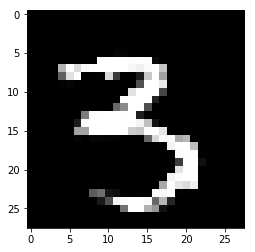

Number batches 468
164(0/468) D: 0.6518, G: 0.9074
164(1/468) D: 0.6311, G: 0.9988
164(2/468) D: 0.6588, G: 0.8811
164(3/468) D: 0.6109, G: 0.9446
164(4/468) D: 0.6141, G: 1.1589
164(5/468) D: 0.6050, G: 1.0044
164(6/468) D: 0.6036, G: 0.9474
164(7/468) D: 0.6163, G: 0.8780
164(8/468) D: 0.5990, G: 1.0065
164(9/468) D: 0.6591, G: 0.9441
164(10/468) D: 0.6699, G: 0.9545
164(11/468) D: 0.5638, G: 0.9931
164(12/468) D: 0.6559, G: 1.0028
164(13/468) D: 0.6488, G: 0.9112
164(14/468) D: 0.5891, G: 1.0283
164(15/468) D: 0.6626, G: 0.9286
164(16/468) D: 0.6388, G: 0.9576
164(17/468) D: 0.6508, G: 0.9515
164(18/468) D: 0.6134, G: 0.8856
164(19/468) D: 0.6166, G: 0.9450
164(20/468) D: 0.5782, G: 0.9718
164(21/468) D: 0.6034, G: 0.8619
164(22/468) D: 0.5980, G: 0.9094
164(23/468) D: 0.5638, G: 0.9208
164(24/468) D: 0.6040, G: 1.0388
164(25/468) D: 0.6524, G: 0.8114
164(26/468) D: 0.6082, G: 0.9212
164(27/468) D: 0.5924, G: 1.0627
164(28/468) D: 0.6505, G: 0.9359
164(29/468) D: 0.6517, G: 0.7941
1

164(245/468) D: 0.6289, G: 1.0971
164(246/468) D: 0.6012, G: 0.8760
164(247/468) D: 0.5855, G: 1.0367
164(248/468) D: 0.5810, G: 0.9637
164(249/468) D: 0.5754, G: 1.0291
164(250/468) D: 0.6543, G: 0.8289
164(251/468) D: 0.6430, G: 1.0847
164(252/468) D: 0.6337, G: 1.1006
164(253/468) D: 0.5908, G: 1.0113
164(254/468) D: 0.6428, G: 0.8169
164(255/468) D: 0.6768, G: 0.9253
164(256/468) D: 0.5876, G: 0.9405
164(257/468) D: 0.5699, G: 0.9426
164(258/468) D: 0.6151, G: 0.8957
164(259/468) D: 0.5949, G: 0.9884
164(260/468) D: 0.5824, G: 0.9116
164(261/468) D: 0.5847, G: 0.9924
164(262/468) D: 0.6029, G: 0.9776
164(263/468) D: 0.6390, G: 0.8246
164(264/468) D: 0.6524, G: 0.8560
164(265/468) D: 0.6300, G: 0.9135
164(266/468) D: 0.6063, G: 1.0271
164(267/468) D: 0.5782, G: 0.9130
164(268/468) D: 0.6517, G: 1.0279
164(269/468) D: 0.5624, G: 1.0199
164(270/468) D: 0.6413, G: 0.8080
164(271/468) D: 0.6470, G: 0.9897
164(272/468) D: 0.6271, G: 0.8831
164(273/468) D: 0.5919, G: 1.0024
164(274/468) D

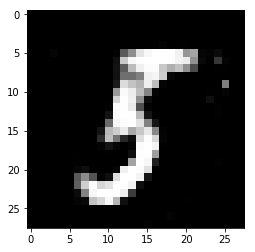

Number batches 468
165(0/468) D: 0.6847, G: 0.6927
165(1/468) D: 0.6381, G: 0.9028
165(2/468) D: 0.6062, G: 1.0979
165(3/468) D: 0.6069, G: 1.0416
165(4/468) D: 0.5834, G: 0.8695
165(5/468) D: 0.5931, G: 0.8872
165(6/468) D: 0.6046, G: 1.0561
165(7/468) D: 0.5922, G: 0.9653
165(8/468) D: 0.6440, G: 0.9217
165(9/468) D: 0.6629, G: 0.9286
165(10/468) D: 0.6832, G: 1.0591
165(11/468) D: 0.5878, G: 1.1266
165(12/468) D: 0.6199, G: 0.7893
165(13/468) D: 0.6520, G: 1.0224
165(14/468) D: 0.6479, G: 1.0471
165(15/468) D: 0.6670, G: 0.8699
165(16/468) D: 0.6312, G: 0.9094
165(17/468) D: 0.6226, G: 0.8991
165(18/468) D: 0.6069, G: 0.8947
165(19/468) D: 0.6143, G: 0.8571
165(20/468) D: 0.6126, G: 1.0011
165(21/468) D: 0.6003, G: 0.9860
165(22/468) D: 0.6145, G: 0.9928
165(23/468) D: 0.5813, G: 0.9341
165(24/468) D: 0.5981, G: 0.8599
165(25/468) D: 0.6764, G: 0.8750
165(26/468) D: 0.5758, G: 0.9510
165(27/468) D: 0.5998, G: 0.9455
165(28/468) D: 0.6183, G: 0.9032
165(29/468) D: 0.6080, G: 0.8583
1

165(245/468) D: 0.6589, G: 1.1081
165(246/468) D: 0.6045, G: 0.8525
165(247/468) D: 0.5835, G: 0.9209
165(248/468) D: 0.5965, G: 1.0701
165(249/468) D: 0.6275, G: 1.0282
165(250/468) D: 0.6687, G: 0.7892
165(251/468) D: 0.6015, G: 0.9077
165(252/468) D: 0.6556, G: 1.1149
165(253/468) D: 0.6237, G: 0.9357
165(254/468) D: 0.6008, G: 0.8346
165(255/468) D: 0.6806, G: 1.0162
165(256/468) D: 0.6500, G: 0.8664
165(257/468) D: 0.6104, G: 1.0075
165(258/468) D: 0.6226, G: 0.8784
165(259/468) D: 0.6489, G: 0.9212
165(260/468) D: 0.6130, G: 0.9475
165(261/468) D: 0.6302, G: 0.9830
165(262/468) D: 0.6232, G: 0.8762
165(263/468) D: 0.6612, G: 0.8254
165(264/468) D: 0.6601, G: 0.9862
165(265/468) D: 0.6435, G: 0.8913
165(266/468) D: 0.6345, G: 0.8457
165(267/468) D: 0.6180, G: 0.9632
165(268/468) D: 0.6450, G: 1.0509
165(269/468) D: 0.6102, G: 0.7803
165(270/468) D: 0.6447, G: 0.9201
165(271/468) D: 0.6324, G: 0.9507
165(272/468) D: 0.6071, G: 0.7900
165(273/468) D: 0.6389, G: 0.8918
165(274/468) D

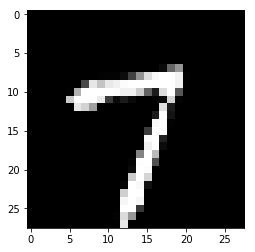

Number batches 468
166(0/468) D: 0.6457, G: 0.7203
166(1/468) D: 0.6529, G: 0.8425
166(2/468) D: 0.5875, G: 1.0572
166(3/468) D: 0.6081, G: 0.9589
166(4/468) D: 0.5876, G: 0.9067
166(5/468) D: 0.6116, G: 0.9466
166(6/468) D: 0.6008, G: 0.8739
166(7/468) D: 0.5683, G: 1.0425
166(8/468) D: 0.6050, G: 1.1003
166(9/468) D: 0.6747, G: 0.7665
166(10/468) D: 0.6676, G: 0.7968
166(11/468) D: 0.6207, G: 1.0774
166(12/468) D: 0.6364, G: 1.0142
166(13/468) D: 0.6608, G: 0.7531
166(14/468) D: 0.6117, G: 0.8847
166(15/468) D: 0.6208, G: 0.9765
166(16/468) D: 0.6150, G: 0.9845
166(17/468) D: 0.6030, G: 0.8164
166(18/468) D: 0.6193, G: 1.0516
166(19/468) D: 0.6133, G: 0.9935
166(20/468) D: 0.6220, G: 0.8878
166(21/468) D: 0.5969, G: 0.9025
166(22/468) D: 0.6376, G: 1.0215
166(23/468) D: 0.5620, G: 0.8102
166(24/468) D: 0.5948, G: 0.8948
166(25/468) D: 0.6553, G: 0.9185
166(26/468) D: 0.6093, G: 1.1344
166(27/468) D: 0.5962, G: 0.9914
166(28/468) D: 0.6261, G: 0.8588
166(29/468) D: 0.6217, G: 0.9695
1

166(245/468) D: 0.6666, G: 1.0055
166(246/468) D: 0.5800, G: 0.9420
166(247/468) D: 0.5573, G: 1.1167
166(248/468) D: 0.6113, G: 0.9383
166(249/468) D: 0.5968, G: 1.1505
166(250/468) D: 0.6041, G: 0.6641
166(251/468) D: 0.6249, G: 1.0613
166(252/468) D: 0.6356, G: 1.0536
166(253/468) D: 0.6335, G: 0.9222
166(254/468) D: 0.6558, G: 1.0247
166(255/468) D: 0.6726, G: 0.7670
166(256/468) D: 0.6020, G: 0.8836
166(257/468) D: 0.6589, G: 1.0586
166(258/468) D: 0.6295, G: 1.0576
166(259/468) D: 0.6047, G: 0.8359
166(260/468) D: 0.6063, G: 0.8391
166(261/468) D: 0.6168, G: 1.0955
166(262/468) D: 0.6290, G: 0.8699
166(263/468) D: 0.6483, G: 0.9341
166(264/468) D: 0.6569, G: 0.7937
166(265/468) D: 0.6537, G: 1.0609
166(266/468) D: 0.6354, G: 0.9136
166(267/468) D: 0.5912, G: 0.8148
166(268/468) D: 0.6186, G: 1.0021
166(269/468) D: 0.5862, G: 0.9064
166(270/468) D: 0.5950, G: 0.8397
166(271/468) D: 0.6334, G: 0.9275
166(272/468) D: 0.5998, G: 0.9663
166(273/468) D: 0.6435, G: 0.9610
166(274/468) D

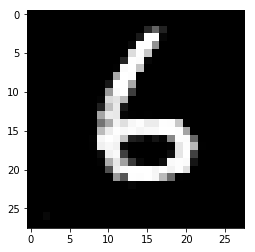

Number batches 468
167(0/468) D: 0.6564, G: 0.7880
167(1/468) D: 0.6164, G: 0.8000
167(2/468) D: 0.6544, G: 1.1460
167(3/468) D: 0.6457, G: 0.8837
167(4/468) D: 0.6245, G: 0.9386
167(5/468) D: 0.5790, G: 0.8401
167(6/468) D: 0.5792, G: 1.0589
167(7/468) D: 0.5861, G: 1.0230
167(8/468) D: 0.5783, G: 0.9737
167(9/468) D: 0.6619, G: 0.8818
167(10/468) D: 0.6873, G: 1.0385
167(11/468) D: 0.5909, G: 1.0705
167(12/468) D: 0.5682, G: 0.8200
167(13/468) D: 0.6459, G: 0.9026
167(14/468) D: 0.6571, G: 1.1501
167(15/468) D: 0.6658, G: 0.8729
167(16/468) D: 0.6222, G: 0.9779
167(17/468) D: 0.6304, G: 0.8599
167(18/468) D: 0.6114, G: 0.9919
167(19/468) D: 0.6279, G: 1.1492
167(20/468) D: 0.6132, G: 0.9171
167(21/468) D: 0.5901, G: 0.9775
167(22/468) D: 0.6257, G: 0.9539
167(23/468) D: 0.5901, G: 0.9045
167(24/468) D: 0.6059, G: 0.8455
167(25/468) D: 0.6547, G: 0.9363
167(26/468) D: 0.6237, G: 1.0302
167(27/468) D: 0.6266, G: 0.9874
167(28/468) D: 0.6321, G: 0.9037
167(29/468) D: 0.5938, G: 0.8546
1

167(245/468) D: 0.6552, G: 0.9596
167(246/468) D: 0.6163, G: 0.9963
167(247/468) D: 0.5857, G: 0.9899
167(248/468) D: 0.6299, G: 0.9670
167(249/468) D: 0.6158, G: 1.1234
167(250/468) D: 0.6769, G: 0.7421
167(251/468) D: 0.6359, G: 0.8098
167(252/468) D: 0.5924, G: 1.0570
167(253/468) D: 0.6248, G: 0.9274
167(254/468) D: 0.6261, G: 0.8054
167(255/468) D: 0.7209, G: 0.8897
167(256/468) D: 0.6232, G: 0.9526
167(257/468) D: 0.5818, G: 1.0130
167(258/468) D: 0.6335, G: 0.8786
167(259/468) D: 0.5872, G: 0.7421
167(260/468) D: 0.6376, G: 1.0166
167(261/468) D: 0.6276, G: 1.0043
167(262/468) D: 0.6217, G: 0.8216
167(263/468) D: 0.6610, G: 0.7870
167(264/468) D: 0.6637, G: 0.8531
167(265/468) D: 0.6262, G: 0.9612
167(266/468) D: 0.5857, G: 0.9582
167(267/468) D: 0.6201, G: 0.8455
167(268/468) D: 0.6224, G: 0.9642
167(269/468) D: 0.5965, G: 0.9534
167(270/468) D: 0.6386, G: 0.9610
167(271/468) D: 0.6499, G: 0.7725
167(272/468) D: 0.6320, G: 0.9357
167(273/468) D: 0.6176, G: 1.0437
167(274/468) D

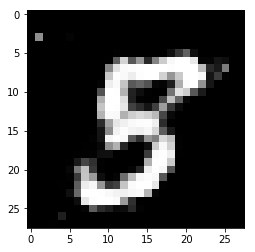

Number batches 468
168(0/468) D: 0.6676, G: 0.6786
168(1/468) D: 0.6582, G: 0.9857
168(2/468) D: 0.6243, G: 0.9448
168(3/468) D: 0.6106, G: 0.9853
168(4/468) D: 0.5759, G: 0.9322
168(5/468) D: 0.5850, G: 0.9177
168(6/468) D: 0.6046, G: 1.0111
168(7/468) D: 0.5951, G: 1.0634
168(8/468) D: 0.5906, G: 0.9476
168(9/468) D: 0.7163, G: 0.8715
168(10/468) D: 0.6515, G: 1.0414
168(11/468) D: 0.5943, G: 0.9545
168(12/468) D: 0.5963, G: 0.8322
168(13/468) D: 0.6570, G: 0.9345
168(14/468) D: 0.5967, G: 0.9791
168(15/468) D: 0.6549, G: 0.9336
168(16/468) D: 0.6355, G: 0.8808
168(17/468) D: 0.6126, G: 0.9248
168(18/468) D: 0.6392, G: 1.0739
168(19/468) D: 0.6179, G: 0.7585
168(20/468) D: 0.5841, G: 0.8463
168(21/468) D: 0.5906, G: 1.1728
168(22/468) D: 0.6476, G: 0.9017
168(23/468) D: 0.5749, G: 0.8478
168(24/468) D: 0.6039, G: 1.0458
168(25/468) D: 0.6160, G: 0.7161
168(26/468) D: 0.6115, G: 0.9078
168(27/468) D: 0.5987, G: 1.2246
168(28/468) D: 0.6236, G: 0.9529
168(29/468) D: 0.6341, G: 0.9611
1

168(245/468) D: 0.6003, G: 0.9735
168(246/468) D: 0.5779, G: 0.9143
168(247/468) D: 0.5793, G: 0.9861
168(248/468) D: 0.6274, G: 1.0508
168(249/468) D: 0.5926, G: 1.1729
168(250/468) D: 0.6500, G: 0.8486
168(251/468) D: 0.6412, G: 0.8462
168(252/468) D: 0.6723, G: 1.0914
168(253/468) D: 0.6221, G: 0.8601
168(254/468) D: 0.6327, G: 0.8060
168(255/468) D: 0.6484, G: 0.9840
168(256/468) D: 0.6359, G: 0.9552
168(257/468) D: 0.6179, G: 0.9758
168(258/468) D: 0.6720, G: 0.8933
168(259/468) D: 0.6074, G: 0.9708
168(260/468) D: 0.5742, G: 0.9626
168(261/468) D: 0.6399, G: 0.8972
168(262/468) D: 0.6089, G: 0.8420
168(263/468) D: 0.6692, G: 1.0031
168(264/468) D: 0.6891, G: 0.9806
168(265/468) D: 0.6333, G: 0.8292
168(266/468) D: 0.5780, G: 0.9500
168(267/468) D: 0.5718, G: 0.9005
168(268/468) D: 0.6464, G: 0.9565
168(269/468) D: 0.5948, G: 0.9242
168(270/468) D: 0.6202, G: 0.9036
168(271/468) D: 0.6554, G: 1.0038
168(272/468) D: 0.5956, G: 1.0560
168(273/468) D: 0.6215, G: 0.8870
168(274/468) D

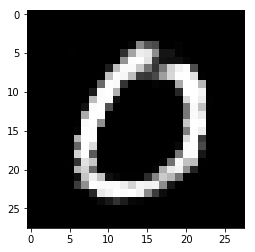

Number batches 468
169(0/468) D: 0.6094, G: 0.6882
169(1/468) D: 0.7237, G: 1.1364
169(2/468) D: 0.6830, G: 0.8230
169(3/468) D: 0.6990, G: 0.9327
169(4/468) D: 0.5858, G: 1.0495
169(5/468) D: 0.5913, G: 0.8141
169(6/468) D: 0.6238, G: 1.0028
169(7/468) D: 0.6227, G: 1.0543
169(8/468) D: 0.5753, G: 0.9512
169(9/468) D: 0.7238, G: 0.8867
169(10/468) D: 0.6792, G: 1.1351
169(11/468) D: 0.5885, G: 1.0668
169(12/468) D: 0.6046, G: 0.8204
169(13/468) D: 0.6459, G: 0.8628
169(14/468) D: 0.6252, G: 0.9558
169(15/468) D: 0.6681, G: 0.9389
169(16/468) D: 0.6114, G: 0.9666
169(17/468) D: 0.6366, G: 0.9959
169(18/468) D: 0.5821, G: 0.8520
169(19/468) D: 0.6110, G: 0.8460
169(20/468) D: 0.6026, G: 0.8885
169(21/468) D: 0.6209, G: 0.9275
169(22/468) D: 0.5997, G: 0.9124
169(23/468) D: 0.6398, G: 1.0195
169(24/468) D: 0.6319, G: 0.8818
169(25/468) D: 0.5987, G: 0.9045
169(26/468) D: 0.5934, G: 0.9637
169(27/468) D: 0.5946, G: 1.1125
169(28/468) D: 0.6283, G: 0.8722
169(29/468) D: 0.6208, G: 0.9709
1

169(244/468) D: 0.6460, G: 0.8986
169(245/468) D: 0.5989, G: 1.1325
169(246/468) D: 0.6178, G: 0.8441
169(247/468) D: 0.5831, G: 0.9930
169(248/468) D: 0.6186, G: 1.0508
169(249/468) D: 0.5920, G: 1.0698
169(250/468) D: 0.6604, G: 0.8255
169(251/468) D: 0.6434, G: 0.8575
169(252/468) D: 0.6608, G: 1.0798
169(253/468) D: 0.6145, G: 1.0512
169(254/468) D: 0.6053, G: 0.7917
169(255/468) D: 0.6612, G: 0.9350
169(256/468) D: 0.6795, G: 0.8750
169(257/468) D: 0.6143, G: 1.0269
169(258/468) D: 0.6366, G: 0.9598
169(259/468) D: 0.6040, G: 0.9178
169(260/468) D: 0.6133, G: 0.8588
169(261/468) D: 0.5977, G: 0.9431
169(262/468) D: 0.6989, G: 0.9462
169(263/468) D: 0.6450, G: 0.8435
169(264/468) D: 0.6168, G: 0.9292
169(265/468) D: 0.6310, G: 0.8919
169(266/468) D: 0.6035, G: 0.9213
169(267/468) D: 0.6037, G: 0.9579
169(268/468) D: 0.6260, G: 1.0245
169(269/468) D: 0.6198, G: 0.8825
169(270/468) D: 0.6547, G: 0.9261
169(271/468) D: 0.6344, G: 0.8771
169(272/468) D: 0.5993, G: 0.9609
169(273/468) D

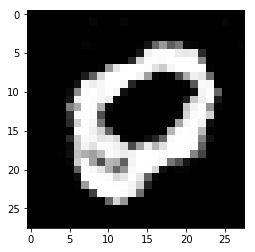

Number batches 468
170(0/468) D: 0.6272, G: 0.7907
170(1/468) D: 0.6715, G: 1.0424
170(2/468) D: 0.6154, G: 1.0543
170(3/468) D: 0.6061, G: 0.7643
170(4/468) D: 0.5953, G: 0.8517
170(5/468) D: 0.5890, G: 0.9466
170(6/468) D: 0.5930, G: 0.9577
170(7/468) D: 0.5983, G: 1.0151
170(8/468) D: 0.5913, G: 0.9275
170(9/468) D: 0.6630, G: 1.0285
170(10/468) D: 0.6684, G: 0.8651
170(11/468) D: 0.6222, G: 0.9733
170(12/468) D: 0.6055, G: 1.0714
170(13/468) D: 0.6292, G: 0.8881
170(14/468) D: 0.6030, G: 1.0141
170(15/468) D: 0.6197, G: 0.9547
170(16/468) D: 0.6321, G: 0.8939
170(17/468) D: 0.6392, G: 1.0470
170(18/468) D: 0.6410, G: 0.8781
170(19/468) D: 0.6195, G: 0.8040
170(20/468) D: 0.5959, G: 0.9449
170(21/468) D: 0.5844, G: 0.9386
170(22/468) D: 0.6546, G: 1.0053
170(23/468) D: 0.5883, G: 0.9558
170(24/468) D: 0.5701, G: 0.9371
170(25/468) D: 0.6266, G: 0.9304
170(26/468) D: 0.5993, G: 0.9896
170(27/468) D: 0.5655, G: 0.9696
170(28/468) D: 0.5958, G: 0.9610
170(29/468) D: 0.6146, G: 1.0086
1

170(244/468) D: 0.6479, G: 0.8465
170(245/468) D: 0.5903, G: 0.9092
170(246/468) D: 0.5818, G: 0.9795
170(247/468) D: 0.5425, G: 0.8825
170(248/468) D: 0.6245, G: 1.0590
170(249/468) D: 0.6422, G: 1.1248
170(250/468) D: 0.6731, G: 0.8848
170(251/468) D: 0.6215, G: 0.8623
170(252/468) D: 0.6397, G: 1.0430
170(253/468) D: 0.6152, G: 1.0135
170(254/468) D: 0.6283, G: 0.9149
170(255/468) D: 0.6791, G: 0.7854
170(256/468) D: 0.6144, G: 0.8753
170(257/468) D: 0.6062, G: 1.0532
170(258/468) D: 0.6010, G: 0.9780
170(259/468) D: 0.6117, G: 0.8640
170(260/468) D: 0.6307, G: 0.9445
170(261/468) D: 0.5823, G: 0.9518
170(262/468) D: 0.6302, G: 0.9134
170(263/468) D: 0.6411, G: 0.9887
170(264/468) D: 0.6682, G: 0.8794
170(265/468) D: 0.6465, G: 0.9165
170(266/468) D: 0.6096, G: 0.9105
170(267/468) D: 0.5990, G: 0.9145
170(268/468) D: 0.6487, G: 0.9574
170(269/468) D: 0.6261, G: 0.9333
170(270/468) D: 0.5927, G: 0.8348
170(271/468) D: 0.6164, G: 0.9900
170(272/468) D: 0.6260, G: 0.8829
170(273/468) D

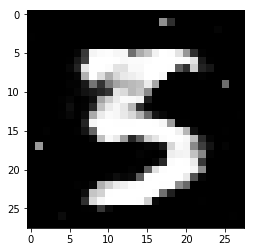

Number batches 468
171(0/468) D: 0.6484, G: 1.0312
171(1/468) D: 0.6668, G: 0.8595
171(2/468) D: 0.6157, G: 0.8524
171(3/468) D: 0.6375, G: 1.0879
171(4/468) D: 0.5708, G: 0.9493
171(5/468) D: 0.5879, G: 0.8326
171(6/468) D: 0.6069, G: 1.0251
171(7/468) D: 0.6009, G: 0.9296
171(8/468) D: 0.6034, G: 1.2195
171(9/468) D: 0.6728, G: 0.9550
171(10/468) D: 0.6295, G: 0.9544
171(11/468) D: 0.6131, G: 0.9739
171(12/468) D: 0.5915, G: 0.9259
171(13/468) D: 0.6781, G: 0.9207
171(14/468) D: 0.6155, G: 1.0132
171(15/468) D: 0.6104, G: 0.9705
171(16/468) D: 0.6292, G: 0.8943
171(17/468) D: 0.6405, G: 0.9078
171(18/468) D: 0.5795, G: 0.9283
171(19/468) D: 0.5992, G: 0.8817
171(20/468) D: 0.5711, G: 0.9143
171(21/468) D: 0.5947, G: 1.0018
171(22/468) D: 0.6499, G: 0.9184
171(23/468) D: 0.5912, G: 0.8974
171(24/468) D: 0.5916, G: 1.0082
171(25/468) D: 0.6274, G: 1.0410
171(26/468) D: 0.5753, G: 0.9900
171(27/468) D: 0.5970, G: 0.9940
171(28/468) D: 0.6190, G: 0.9680
171(29/468) D: 0.6221, G: 0.9739
1

171(244/468) D: 0.6113, G: 0.9361
171(245/468) D: 0.6484, G: 1.0114
171(246/468) D: 0.6363, G: 0.9361
171(247/468) D: 0.5548, G: 0.9559
171(248/468) D: 0.6413, G: 1.0883
171(249/468) D: 0.6423, G: 1.0506
171(250/468) D: 0.6541, G: 0.7727
171(251/468) D: 0.6676, G: 1.0467
171(252/468) D: 0.6413, G: 0.9598
171(253/468) D: 0.6021, G: 0.8898
171(254/468) D: 0.6081, G: 0.8718
171(255/468) D: 0.6750, G: 0.8745
171(256/468) D: 0.6260, G: 0.9096
171(257/468) D: 0.6138, G: 0.9498
171(258/468) D: 0.6244, G: 0.8827
171(259/468) D: 0.5842, G: 0.9476
171(260/468) D: 0.6183, G: 0.8128
171(261/468) D: 0.6073, G: 1.0234
171(262/468) D: 0.6172, G: 1.0393
171(263/468) D: 0.6768, G: 0.8702
171(264/468) D: 0.6341, G: 0.7981
171(265/468) D: 0.6376, G: 1.1332
171(266/468) D: 0.5726, G: 0.9449
171(267/468) D: 0.6090, G: 0.9176
171(268/468) D: 0.6304, G: 0.9692
171(269/468) D: 0.6299, G: 1.0596
171(270/468) D: 0.6380, G: 0.8877
171(271/468) D: 0.5959, G: 0.8065
171(272/468) D: 0.6371, G: 1.0574
171(273/468) D

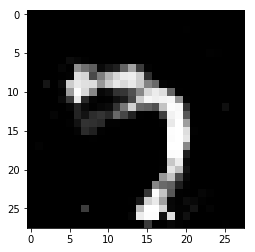

Number batches 468
172(0/468) D: 0.6318, G: 0.7025
172(1/468) D: 0.6548, G: 1.0480
172(2/468) D: 0.6414, G: 0.7826
172(3/468) D: 0.6026, G: 0.9577
172(4/468) D: 0.6104, G: 1.1037
172(5/468) D: 0.6436, G: 0.8299
172(6/468) D: 0.6088, G: 0.9667
172(7/468) D: 0.6144, G: 0.9726
172(8/468) D: 0.6040, G: 0.8342
172(9/468) D: 0.6737, G: 0.9488
172(10/468) D: 0.6566, G: 0.9632
172(11/468) D: 0.6175, G: 1.0407
172(12/468) D: 0.6039, G: 1.0307
172(13/468) D: 0.5810, G: 0.7873
172(14/468) D: 0.5719, G: 1.1036
172(15/468) D: 0.6654, G: 0.9694
172(16/468) D: 0.6357, G: 1.0133
172(17/468) D: 0.6546, G: 1.0442
172(18/468) D: 0.6051, G: 0.9533
172(19/468) D: 0.6395, G: 0.8844
172(20/468) D: 0.6520, G: 0.9230
172(21/468) D: 0.5964, G: 0.9699
172(22/468) D: 0.6182, G: 0.9055
172(23/468) D: 0.5569, G: 0.9756
172(24/468) D: 0.6236, G: 1.0230
172(25/468) D: 0.6128, G: 0.8886
172(26/468) D: 0.6104, G: 0.9466
172(27/468) D: 0.6291, G: 0.9736
172(28/468) D: 0.6331, G: 0.8710
172(29/468) D: 0.6077, G: 0.9937
1

172(245/468) D: 0.6477, G: 0.9270
172(246/468) D: 0.5959, G: 0.9660
172(247/468) D: 0.5357, G: 0.9329
172(248/468) D: 0.6300, G: 1.1022
172(249/468) D: 0.5944, G: 0.9169
172(250/468) D: 0.6360, G: 0.8182
172(251/468) D: 0.6578, G: 1.0800
172(252/468) D: 0.6528, G: 0.8478
172(253/468) D: 0.6205, G: 0.8212
172(254/468) D: 0.6626, G: 0.7486
172(255/468) D: 0.6624, G: 1.0449
172(256/468) D: 0.6347, G: 0.9437
172(257/468) D: 0.5818, G: 0.8297
172(258/468) D: 0.6337, G: 0.9269
172(259/468) D: 0.6359, G: 1.0328
172(260/468) D: 0.6078, G: 0.8904
172(261/468) D: 0.6371, G: 0.9538
172(262/468) D: 0.6214, G: 0.9250
172(263/468) D: 0.6555, G: 0.8571
172(264/468) D: 0.6554, G: 0.9943
172(265/468) D: 0.6475, G: 0.8998
172(266/468) D: 0.6184, G: 0.9173
172(267/468) D: 0.6196, G: 0.8736
172(268/468) D: 0.5974, G: 0.8748
172(269/468) D: 0.5937, G: 1.0477
172(270/468) D: 0.6138, G: 1.0244
172(271/468) D: 0.6278, G: 0.8426
172(272/468) D: 0.6124, G: 0.8444
172(273/468) D: 0.6438, G: 1.0703
172(274/468) D

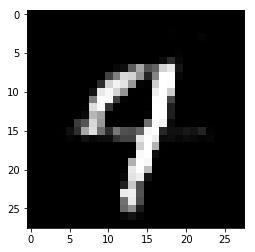

Number batches 468
173(0/468) D: 0.6651, G: 0.7844
173(1/468) D: 0.6527, G: 0.8627
173(2/468) D: 0.6646, G: 0.9717
173(3/468) D: 0.6407, G: 0.8392
173(4/468) D: 0.5667, G: 0.9318
173(5/468) D: 0.6072, G: 0.9419
173(6/468) D: 0.5741, G: 0.9680
173(7/468) D: 0.5534, G: 1.0168
173(8/468) D: 0.6370, G: 1.0025
173(9/468) D: 0.6875, G: 0.9814
173(10/468) D: 0.6936, G: 0.8110
173(11/468) D: 0.5980, G: 1.2017
173(12/468) D: 0.6462, G: 0.9468
173(13/468) D: 0.6448, G: 0.8749
173(14/468) D: 0.6386, G: 1.0431
173(15/468) D: 0.6972, G: 1.0122
173(16/468) D: 0.5868, G: 0.8345
173(17/468) D: 0.6278, G: 0.8975
173(18/468) D: 0.5765, G: 0.9606
173(19/468) D: 0.6690, G: 0.9462
173(20/468) D: 0.6211, G: 0.9738
173(21/468) D: 0.6222, G: 0.9730
173(22/468) D: 0.6164, G: 0.8118
173(23/468) D: 0.6362, G: 0.9765
173(24/468) D: 0.5588, G: 0.9945
173(25/468) D: 0.6167, G: 0.8577
173(26/468) D: 0.6480, G: 0.9933
173(27/468) D: 0.5910, G: 0.9891
173(28/468) D: 0.6147, G: 0.9647
173(29/468) D: 0.5933, G: 0.8912
1

173(244/468) D: 0.6257, G: 0.9250
173(245/468) D: 0.5903, G: 0.8972
173(246/468) D: 0.6053, G: 0.9127
173(247/468) D: 0.5526, G: 1.1435
173(248/468) D: 0.6230, G: 0.9863
173(249/468) D: 0.5958, G: 1.0035
173(250/468) D: 0.6546, G: 0.8242
173(251/468) D: 0.6239, G: 0.9717
173(252/468) D: 0.6275, G: 1.0204
173(253/468) D: 0.6367, G: 0.9684
173(254/468) D: 0.6557, G: 0.8384
173(255/468) D: 0.6792, G: 0.8420
173(256/468) D: 0.6289, G: 0.8574
173(257/468) D: 0.6058, G: 1.0163
173(258/468) D: 0.6196, G: 0.9601
173(259/468) D: 0.5870, G: 0.8253
173(260/468) D: 0.5892, G: 0.8805
173(261/468) D: 0.6338, G: 1.0722
173(262/468) D: 0.6087, G: 0.7943
173(263/468) D: 0.6406, G: 0.8337
173(264/468) D: 0.6615, G: 0.9825
173(265/468) D: 0.6304, G: 1.0054
173(266/468) D: 0.5918, G: 0.9829
173(267/468) D: 0.6045, G: 0.8812
173(268/468) D: 0.5912, G: 0.9392
173(269/468) D: 0.6174, G: 0.9558
173(270/468) D: 0.6214, G: 0.9829
173(271/468) D: 0.6396, G: 0.8107
173(272/468) D: 0.5837, G: 0.9489
173(273/468) D

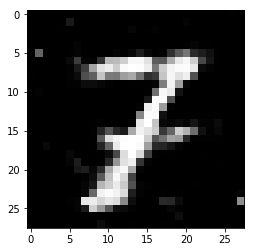

Number batches 468
174(0/468) D: 0.6614, G: 0.6740
174(1/468) D: 0.6623, G: 0.7873
174(2/468) D: 0.6251, G: 1.1440
174(3/468) D: 0.6213, G: 1.0392
174(4/468) D: 0.5981, G: 0.8934
174(5/468) D: 0.6307, G: 0.9488
174(6/468) D: 0.5770, G: 1.0286
174(7/468) D: 0.5719, G: 0.9812
174(8/468) D: 0.5843, G: 0.8597
174(9/468) D: 0.6333, G: 0.9088
174(10/468) D: 0.6597, G: 1.0589
174(11/468) D: 0.5834, G: 0.9582
174(12/468) D: 0.6030, G: 0.9131
174(13/468) D: 0.6128, G: 0.9883
174(14/468) D: 0.6217, G: 0.9868
174(15/468) D: 0.6374, G: 0.9381
174(16/468) D: 0.5850, G: 0.9308
174(17/468) D: 0.6390, G: 0.9603
174(18/468) D: 0.5895, G: 0.8879
174(19/468) D: 0.6014, G: 0.9210
174(20/468) D: 0.6076, G: 0.9905
174(21/468) D: 0.5880, G: 0.9378
174(22/468) D: 0.5751, G: 0.9981
174(23/468) D: 0.5989, G: 1.0237
174(24/468) D: 0.5392, G: 0.9334
174(25/468) D: 0.6221, G: 1.0147
174(26/468) D: 0.5876, G: 1.0453
174(27/468) D: 0.5665, G: 1.0051
174(28/468) D: 0.6070, G: 0.9917
174(29/468) D: 0.5865, G: 1.0529
1

174(245/468) D: 0.6257, G: 0.9609
174(246/468) D: 0.5849, G: 1.0218
174(247/468) D: 0.5722, G: 1.2029
174(248/468) D: 0.6106, G: 0.9509
174(249/468) D: 0.6143, G: 1.1239
174(250/468) D: 0.6758, G: 0.8480
174(251/468) D: 0.6716, G: 0.9043
174(252/468) D: 0.6188, G: 0.9762
174(253/468) D: 0.6423, G: 0.9713
174(254/468) D: 0.6006, G: 0.8786
174(255/468) D: 0.6726, G: 0.8856
174(256/468) D: 0.6109, G: 1.1528
174(257/468) D: 0.5972, G: 1.1348
174(258/468) D: 0.6234, G: 0.8210
174(259/468) D: 0.6424, G: 0.8431
174(260/468) D: 0.6272, G: 0.9903
174(261/468) D: 0.6221, G: 1.0683
174(262/468) D: 0.6160, G: 0.8304
174(263/468) D: 0.6323, G: 0.7903
174(264/468) D: 0.6451, G: 0.9802
174(265/468) D: 0.6147, G: 0.8455
174(266/468) D: 0.6068, G: 0.9557
174(267/468) D: 0.5696, G: 0.8077
174(268/468) D: 0.6189, G: 1.0479
174(269/468) D: 0.6017, G: 1.0284
174(270/468) D: 0.6276, G: 0.9912
174(271/468) D: 0.5937, G: 0.9841
174(272/468) D: 0.5883, G: 0.9118
174(273/468) D: 0.5820, G: 0.9848
174(274/468) D

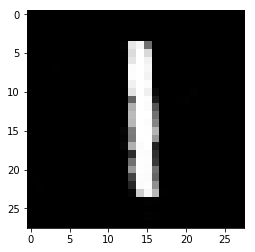

Number batches 468
175(0/468) D: 0.7038, G: 0.7570
175(1/468) D: 0.6673, G: 0.9038
175(2/468) D: 0.6624, G: 1.0269
175(3/468) D: 0.6231, G: 0.9129
175(4/468) D: 0.6261, G: 0.9371
175(5/468) D: 0.5822, G: 1.0544
175(6/468) D: 0.6201, G: 1.1554
175(7/468) D: 0.6366, G: 0.9451
175(8/468) D: 0.5969, G: 0.7680
175(9/468) D: 0.7052, G: 0.9213
175(10/468) D: 0.6563, G: 1.1409
175(11/468) D: 0.6188, G: 0.8305
175(12/468) D: 0.6309, G: 0.7410
175(13/468) D: 0.6289, G: 0.9851
175(14/468) D: 0.6244, G: 1.0921
175(15/468) D: 0.6711, G: 0.8993
175(16/468) D: 0.6383, G: 0.8489
175(17/468) D: 0.6154, G: 0.9482
175(18/468) D: 0.6144, G: 0.8582
175(19/468) D: 0.6109, G: 0.9404
175(20/468) D: 0.5930, G: 0.9572
175(21/468) D: 0.5902, G: 1.0009
175(22/468) D: 0.5887, G: 0.8917
175(23/468) D: 0.5995, G: 0.8687
175(24/468) D: 0.5730, G: 1.0167
175(25/468) D: 0.6042, G: 0.8660
175(26/468) D: 0.6032, G: 0.8973
175(27/468) D: 0.6087, G: 1.2102
175(28/468) D: 0.6187, G: 0.9091
175(29/468) D: 0.6265, G: 0.8631
1

175(245/468) D: 0.6168, G: 0.8793
175(246/468) D: 0.6243, G: 0.9569
175(247/468) D: 0.5730, G: 1.0855
175(248/468) D: 0.6036, G: 1.0387
175(249/468) D: 0.6466, G: 0.9412
175(250/468) D: 0.6455, G: 0.9559
175(251/468) D: 0.6413, G: 0.8564
175(252/468) D: 0.5918, G: 0.9569
175(253/468) D: 0.5993, G: 1.1419
175(254/468) D: 0.6333, G: 0.8803
175(255/468) D: 0.6630, G: 0.7108
175(256/468) D: 0.6721, G: 1.0931
175(257/468) D: 0.5882, G: 1.0254
175(258/468) D: 0.6379, G: 0.8021
175(259/468) D: 0.6049, G: 0.9233
175(260/468) D: 0.6324, G: 0.9437
175(261/468) D: 0.6300, G: 0.9169
175(262/468) D: 0.6227, G: 0.9751
175(263/468) D: 0.6167, G: 0.8063
175(264/468) D: 0.6373, G: 0.8353
175(265/468) D: 0.6006, G: 1.0062
175(266/468) D: 0.6119, G: 0.9188
175(267/468) D: 0.5763, G: 0.8634
175(268/468) D: 0.6438, G: 0.9356
175(269/468) D: 0.6227, G: 1.1656
175(270/468) D: 0.6053, G: 0.9450
175(271/468) D: 0.6364, G: 0.8694
175(272/468) D: 0.6096, G: 1.0126
175(273/468) D: 0.6066, G: 0.8925
175(274/468) D

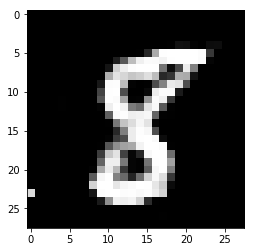

Number batches 468
176(0/468) D: 0.6567, G: 0.8047
176(1/468) D: 0.6298, G: 0.8365
176(2/468) D: 0.6531, G: 0.9444
176(3/468) D: 0.6014, G: 0.9503
176(4/468) D: 0.5806, G: 1.1313
176(5/468) D: 0.6066, G: 0.9628
176(6/468) D: 0.5544, G: 0.8604
176(7/468) D: 0.6236, G: 1.1634
176(8/468) D: 0.6394, G: 1.1127
176(9/468) D: 0.6776, G: 0.8453
176(10/468) D: 0.6721, G: 0.9675
176(11/468) D: 0.6181, G: 0.9604
176(12/468) D: 0.5752, G: 0.9753
176(13/468) D: 0.6154, G: 0.8431
176(14/468) D: 0.6571, G: 1.1415
176(15/468) D: 0.6704, G: 0.8499
176(16/468) D: 0.6376, G: 0.9772
176(17/468) D: 0.6387, G: 0.8817
176(18/468) D: 0.5966, G: 0.9466
176(19/468) D: 0.6485, G: 0.8964
176(20/468) D: 0.6322, G: 1.0392
176(21/468) D: 0.6174, G: 0.9875
176(22/468) D: 0.5935, G: 0.8686
176(23/468) D: 0.6163, G: 0.8044
176(24/468) D: 0.5755, G: 1.0587
176(25/468) D: 0.6560, G: 0.8451
176(26/468) D: 0.5940, G: 0.9031
176(27/468) D: 0.6128, G: 1.0492
176(28/468) D: 0.6270, G: 1.0104
176(29/468) D: 0.5909, G: 0.9176
1

176(244/468) D: 0.6267, G: 0.7526
176(245/468) D: 0.6534, G: 0.9707
176(246/468) D: 0.6022, G: 0.8295
176(247/468) D: 0.5786, G: 1.0523
176(248/468) D: 0.5945, G: 1.0678
176(249/468) D: 0.6008, G: 1.0651
176(250/468) D: 0.6612, G: 0.7630
176(251/468) D: 0.6232, G: 0.8770
176(252/468) D: 0.6245, G: 1.3965
176(253/468) D: 0.6272, G: 1.0444
176(254/468) D: 0.6041, G: 0.7713
176(255/468) D: 0.6803, G: 0.9160
176(256/468) D: 0.6010, G: 0.9562
176(257/468) D: 0.6016, G: 0.9857
176(258/468) D: 0.5844, G: 0.9621
176(259/468) D: 0.6144, G: 0.8812
176(260/468) D: 0.5705, G: 0.9235
176(261/468) D: 0.6413, G: 0.9496
176(262/468) D: 0.6532, G: 0.8836
176(263/468) D: 0.6747, G: 0.9674
176(264/468) D: 0.6105, G: 0.9155
176(265/468) D: 0.6076, G: 0.9201
176(266/468) D: 0.6241, G: 1.0491
176(267/468) D: 0.6055, G: 0.8294
176(268/468) D: 0.6213, G: 0.8425
176(269/468) D: 0.5977, G: 0.9107
176(270/468) D: 0.6241, G: 0.9027
176(271/468) D: 0.6484, G: 1.0080
176(272/468) D: 0.6054, G: 0.9259
176(273/468) D

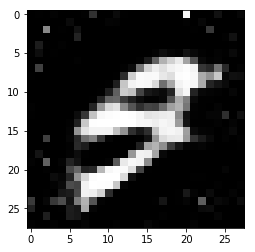

Number batches 468
177(0/468) D: 0.6592, G: 0.9912
177(1/468) D: 0.6328, G: 0.8084
177(2/468) D: 0.6597, G: 0.9943
177(3/468) D: 0.6460, G: 1.0195
177(4/468) D: 0.5716, G: 0.9202
177(5/468) D: 0.6239, G: 0.9712
177(6/468) D: 0.5766, G: 0.9843
177(7/468) D: 0.5790, G: 1.0054
177(8/468) D: 0.6331, G: 0.8872
177(9/468) D: 0.6683, G: 1.0175
177(10/468) D: 0.6734, G: 0.9910
177(11/468) D: 0.6276, G: 0.9344
177(12/468) D: 0.5883, G: 0.9216
177(13/468) D: 0.6227, G: 0.9064
177(14/468) D: 0.5964, G: 0.8645
177(15/468) D: 0.6439, G: 1.0126
177(16/468) D: 0.6119, G: 0.9252
177(17/468) D: 0.6435, G: 0.9402
177(18/468) D: 0.6189, G: 0.9351
177(19/468) D: 0.6245, G: 0.9213
177(20/468) D: 0.6315, G: 0.9468
177(21/468) D: 0.6082, G: 1.0872
177(22/468) D: 0.5952, G: 0.8760
177(23/468) D: 0.5730, G: 0.8077
177(24/468) D: 0.5828, G: 0.9943
177(25/468) D: 0.6175, G: 0.9338
177(26/468) D: 0.5834, G: 0.9970
177(27/468) D: 0.6300, G: 1.1450
177(28/468) D: 0.5997, G: 0.9127
177(29/468) D: 0.5921, G: 1.0236
1

177(245/468) D: 0.6401, G: 0.9972
177(246/468) D: 0.6040, G: 0.8949
177(247/468) D: 0.5982, G: 0.8794
177(248/468) D: 0.6087, G: 0.9324
177(249/468) D: 0.6041, G: 1.0367
177(250/468) D: 0.6479, G: 0.8307
177(251/468) D: 0.5982, G: 0.8948
177(252/468) D: 0.6426, G: 1.0280
177(253/468) D: 0.6079, G: 1.0257
177(254/468) D: 0.6317, G: 0.7727
177(255/468) D: 0.6992, G: 0.9012
177(256/468) D: 0.5723, G: 0.8354
177(257/468) D: 0.6205, G: 0.9605
177(258/468) D: 0.6047, G: 0.9605
177(259/468) D: 0.5982, G: 0.9642
177(260/468) D: 0.5996, G: 0.8507
177(261/468) D: 0.5876, G: 0.9953
177(262/468) D: 0.5894, G: 0.9312
177(263/468) D: 0.6641, G: 0.8850
177(264/468) D: 0.6519, G: 0.7939
177(265/468) D: 0.6133, G: 1.0135
177(266/468) D: 0.5689, G: 1.0928
177(267/468) D: 0.5769, G: 0.8283
177(268/468) D: 0.6456, G: 1.0606
177(269/468) D: 0.6387, G: 0.9400
177(270/468) D: 0.6860, G: 0.9879
177(271/468) D: 0.6448, G: 0.8579
177(272/468) D: 0.6028, G: 0.9989
177(273/468) D: 0.5896, G: 0.9970
177(274/468) D

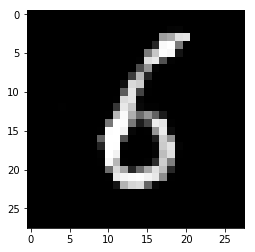

Number batches 468
178(0/468) D: 0.6781, G: 0.7304
178(1/468) D: 0.6717, G: 0.9402
178(2/468) D: 0.6635, G: 1.0031
178(3/468) D: 0.6601, G: 0.9883
178(4/468) D: 0.5840, G: 0.9235
178(5/468) D: 0.5951, G: 0.9172
178(6/468) D: 0.6150, G: 0.8416
178(7/468) D: 0.6060, G: 1.0719
178(8/468) D: 0.5960, G: 0.8766
178(9/468) D: 0.6824, G: 0.8848
178(10/468) D: 0.6759, G: 0.9869
178(11/468) D: 0.6152, G: 0.9130
178(12/468) D: 0.6273, G: 0.8683
178(13/468) D: 0.6177, G: 0.7491
178(14/468) D: 0.6340, G: 0.9408
178(15/468) D: 0.6590, G: 0.9881
178(16/468) D: 0.6247, G: 0.8180
178(17/468) D: 0.6250, G: 0.7051
178(18/468) D: 0.6376, G: 0.9675
178(19/468) D: 0.6223, G: 0.9456
178(20/468) D: 0.5820, G: 0.9459
178(21/468) D: 0.6380, G: 0.9720
178(22/468) D: 0.5982, G: 0.8968
178(23/468) D: 0.5737, G: 0.8850
178(24/468) D: 0.5983, G: 1.0288
178(25/468) D: 0.6333, G: 0.8300
178(26/468) D: 0.6277, G: 1.0709
178(27/468) D: 0.5843, G: 0.9477
178(28/468) D: 0.6332, G: 0.8277
178(29/468) D: 0.6594, G: 1.0486
1

178(244/468) D: 0.6401, G: 0.8481
178(245/468) D: 0.6261, G: 0.9615
178(246/468) D: 0.5955, G: 0.8211
178(247/468) D: 0.6023, G: 1.0861
178(248/468) D: 0.6737, G: 1.1073
178(249/468) D: 0.5994, G: 1.0294
178(250/468) D: 0.6994, G: 0.9378
178(251/468) D: 0.6644, G: 0.7875
178(252/468) D: 0.6380, G: 0.9942
178(253/468) D: 0.6011, G: 0.9875
178(254/468) D: 0.6243, G: 0.7945
178(255/468) D: 0.6423, G: 0.8447
178(256/468) D: 0.6137, G: 0.8866
178(257/468) D: 0.5961, G: 0.9816
178(258/468) D: 0.6570, G: 1.0119
178(259/468) D: 0.6263, G: 0.9058
178(260/468) D: 0.5934, G: 0.7498
178(261/468) D: 0.6327, G: 0.9397
178(262/468) D: 0.6095, G: 0.9213
178(263/468) D: 0.6610, G: 0.8652
178(264/468) D: 0.6051, G: 0.8107
178(265/468) D: 0.6037, G: 0.9412
178(266/468) D: 0.6030, G: 1.0033
178(267/468) D: 0.6442, G: 0.7931
178(268/468) D: 0.6463, G: 1.0634
178(269/468) D: 0.6427, G: 0.9430
178(270/468) D: 0.6722, G: 0.7932
178(271/468) D: 0.6516, G: 0.8912
178(272/468) D: 0.5974, G: 1.0841
178(273/468) D

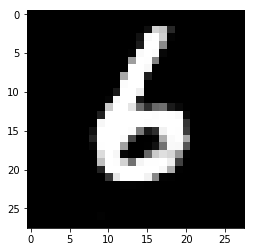

Number batches 468
179(0/468) D: 0.6495, G: 0.8090
179(1/468) D: 0.6655, G: 0.8851
179(2/468) D: 0.6210, G: 1.0343
179(3/468) D: 0.6502, G: 1.0278
179(4/468) D: 0.6266, G: 0.9450
179(5/468) D: 0.6349, G: 0.9101
179(6/468) D: 0.6289, G: 0.9513
179(7/468) D: 0.6218, G: 0.9965
179(8/468) D: 0.6366, G: 0.9342
179(9/468) D: 0.7294, G: 0.9965
179(10/468) D: 0.6864, G: 0.8278
179(11/468) D: 0.6490, G: 0.9580
179(12/468) D: 0.6109, G: 0.8610
179(13/468) D: 0.6187, G: 0.9430
179(14/468) D: 0.5896, G: 0.9285
179(15/468) D: 0.6277, G: 0.9090
179(16/468) D: 0.6271, G: 0.9159
179(17/468) D: 0.5993, G: 0.8926
179(18/468) D: 0.6383, G: 0.9467
179(19/468) D: 0.6215, G: 0.8459
179(20/468) D: 0.5613, G: 0.8790
179(21/468) D: 0.5784, G: 1.0113
179(22/468) D: 0.6180, G: 0.9094
179(23/468) D: 0.5921, G: 0.8957
179(24/468) D: 0.5948, G: 0.8911
179(25/468) D: 0.6774, G: 0.9399
179(26/468) D: 0.5828, G: 0.8752
179(27/468) D: 0.5821, G: 0.9613
179(28/468) D: 0.5999, G: 0.9614
179(29/468) D: 0.6292, G: 1.1773
1

179(244/468) D: 0.6262, G: 0.8843
179(245/468) D: 0.6428, G: 0.9372
179(246/468) D: 0.6089, G: 0.9527
179(247/468) D: 0.5595, G: 1.0360
179(248/468) D: 0.6371, G: 1.0259
179(249/468) D: 0.6179, G: 1.0836
179(250/468) D: 0.6429, G: 0.9343
179(251/468) D: 0.6041, G: 0.8698
179(252/468) D: 0.6601, G: 1.0902
179(253/468) D: 0.6314, G: 0.9674
179(254/468) D: 0.6416, G: 0.9356
179(255/468) D: 0.6303, G: 0.9458
179(256/468) D: 0.6086, G: 0.8944
179(257/468) D: 0.6214, G: 0.9778
179(258/468) D: 0.6517, G: 0.9585
179(259/468) D: 0.6055, G: 0.8989
179(260/468) D: 0.6225, G: 1.0339
179(261/468) D: 0.6260, G: 0.9623
179(262/468) D: 0.6043, G: 0.8089
179(263/468) D: 0.6529, G: 0.9833
179(264/468) D: 0.6679, G: 1.1146
179(265/468) D: 0.6179, G: 0.9176
179(266/468) D: 0.6025, G: 0.9419
179(267/468) D: 0.6147, G: 0.8247
179(268/468) D: 0.6181, G: 0.9391
179(269/468) D: 0.6127, G: 1.0420
179(270/468) D: 0.6244, G: 0.7803
179(271/468) D: 0.6329, G: 0.8438
179(272/468) D: 0.5907, G: 1.1042
179(273/468) D

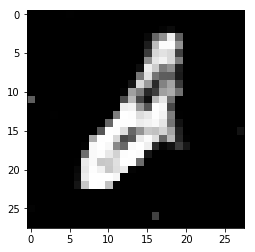

Number batches 468
180(0/468) D: 0.6714, G: 0.6465
180(1/468) D: 0.6800, G: 0.7899
180(2/468) D: 0.6314, G: 1.0478
180(3/468) D: 0.6290, G: 1.0451
180(4/468) D: 0.6047, G: 0.8879
180(5/468) D: 0.6136, G: 0.8606
180(6/468) D: 0.6030, G: 1.1277
180(7/468) D: 0.5702, G: 0.9416
180(8/468) D: 0.6034, G: 0.8456
180(9/468) D: 0.7295, G: 1.0581
180(10/468) D: 0.6466, G: 0.8472
180(11/468) D: 0.5494, G: 0.9212
180(12/468) D: 0.5956, G: 0.9731
180(13/468) D: 0.6313, G: 0.9417
180(14/468) D: 0.5942, G: 1.0228
180(15/468) D: 0.6523, G: 0.9307
180(16/468) D: 0.6061, G: 0.9860
180(17/468) D: 0.6366, G: 0.7999
180(18/468) D: 0.6230, G: 1.0461
180(19/468) D: 0.6204, G: 0.9965
180(20/468) D: 0.6036, G: 1.0122
180(21/468) D: 0.6091, G: 0.8363
180(22/468) D: 0.6271, G: 0.8344
180(23/468) D: 0.5774, G: 1.0729
180(24/468) D: 0.6174, G: 0.9362
180(25/468) D: 0.6506, G: 0.7497
180(26/468) D: 0.6198, G: 0.9437
180(27/468) D: 0.5647, G: 1.0336
180(28/468) D: 0.5768, G: 1.0949
180(29/468) D: 0.5944, G: 0.8874
1

180(244/468) D: 0.5961, G: 0.8922
180(245/468) D: 0.6453, G: 0.9386
180(246/468) D: 0.6541, G: 0.9392
180(247/468) D: 0.6089, G: 1.1113
180(248/468) D: 0.6114, G: 0.9307
180(249/468) D: 0.6016, G: 1.1097
180(250/468) D: 0.6973, G: 0.8546
180(251/468) D: 0.5972, G: 0.8284
180(252/468) D: 0.6301, G: 1.1211
180(253/468) D: 0.6229, G: 1.0443
180(254/468) D: 0.5891, G: 0.9647
180(255/468) D: 0.6380, G: 0.7558
180(256/468) D: 0.6591, G: 1.0837
180(257/468) D: 0.5927, G: 1.0062
180(258/468) D: 0.6146, G: 0.9260
180(259/468) D: 0.5676, G: 0.8204
180(260/468) D: 0.5855, G: 0.9248
180(261/468) D: 0.6017, G: 1.0832
180(262/468) D: 0.6195, G: 0.8508
180(263/468) D: 0.6500, G: 0.8789
180(264/468) D: 0.6425, G: 0.9150
180(265/468) D: 0.6176, G: 1.0029
180(266/468) D: 0.6210, G: 0.9315
180(267/468) D: 0.6282, G: 0.8449
180(268/468) D: 0.6003, G: 0.8422
180(269/468) D: 0.5757, G: 0.9935
180(270/468) D: 0.6379, G: 1.0708
180(271/468) D: 0.6261, G: 0.8653
180(272/468) D: 0.6227, G: 0.8828
180(273/468) D

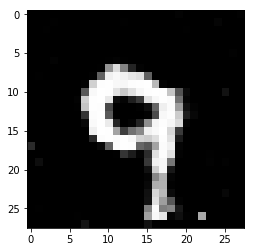

Number batches 468
181(0/468) D: 0.6338, G: 0.9712
181(1/468) D: 0.6451, G: 0.8866
181(2/468) D: 0.6285, G: 0.7755
181(3/468) D: 0.6342, G: 0.9537
181(4/468) D: 0.5964, G: 1.1262
181(5/468) D: 0.6342, G: 0.9146
181(6/468) D: 0.6142, G: 0.9763
181(7/468) D: 0.5802, G: 1.0350
181(8/468) D: 0.6182, G: 0.8748
181(9/468) D: 0.7078, G: 0.9954
181(10/468) D: 0.6380, G: 0.9166
181(11/468) D: 0.6119, G: 1.0867
181(12/468) D: 0.6410, G: 0.8424
181(13/468) D: 0.5955, G: 0.7932
181(14/468) D: 0.6268, G: 0.9354
181(15/468) D: 0.6818, G: 0.9759
181(16/468) D: 0.6668, G: 0.8834
181(17/468) D: 0.6714, G: 0.9755
181(18/468) D: 0.5995, G: 0.9923
181(19/468) D: 0.6087, G: 0.8657
181(20/468) D: 0.5854, G: 0.9076
181(21/468) D: 0.5956, G: 1.0310
181(22/468) D: 0.6349, G: 0.9899
181(23/468) D: 0.5743, G: 0.9143
181(24/468) D: 0.5897, G: 0.9724
181(25/468) D: 0.6543, G: 0.8746
181(26/468) D: 0.6146, G: 0.9532
181(27/468) D: 0.5899, G: 1.0385
181(28/468) D: 0.6332, G: 0.8493
181(29/468) D: 0.5979, G: 0.8714
1

181(245/468) D: 0.6304, G: 1.0787
181(246/468) D: 0.6036, G: 0.9043
181(247/468) D: 0.5928, G: 0.9094
181(248/468) D: 0.6279, G: 0.9587
181(249/468) D: 0.6145, G: 1.0285
181(250/468) D: 0.6947, G: 0.8986
181(251/468) D: 0.6439, G: 0.9203
181(252/468) D: 0.6194, G: 0.8507
181(253/468) D: 0.6050, G: 0.9438
181(254/468) D: 0.6107, G: 0.8502
181(255/468) D: 0.6580, G: 0.8086
181(256/468) D: 0.6193, G: 1.1471
181(257/468) D: 0.5840, G: 0.9357
181(258/468) D: 0.5971, G: 0.7630
181(259/468) D: 0.6100, G: 0.8268
181(260/468) D: 0.5964, G: 1.0153
181(261/468) D: 0.6160, G: 0.8974
181(262/468) D: 0.6357, G: 0.8465
181(263/468) D: 0.6468, G: 0.8723
181(264/468) D: 0.6188, G: 0.9415
181(265/468) D: 0.5919, G: 0.9416
181(266/468) D: 0.6089, G: 0.9516
181(267/468) D: 0.5983, G: 0.8873
181(268/468) D: 0.6484, G: 0.9545
181(269/468) D: 0.5859, G: 1.0192
181(270/468) D: 0.6237, G: 0.8973
181(271/468) D: 0.6474, G: 0.9300
181(272/468) D: 0.6094, G: 0.9787
181(273/468) D: 0.6007, G: 0.7837
181(274/468) D

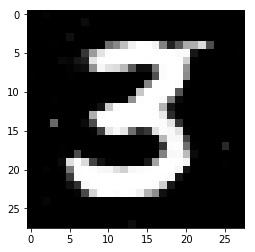

Number batches 468
182(0/468) D: 0.7397, G: 0.5562
182(1/468) D: 0.6825, G: 0.8871
182(2/468) D: 0.5802, G: 1.0928
182(3/468) D: 0.6237, G: 0.9793
182(4/468) D: 0.5901, G: 0.8785
182(5/468) D: 0.6081, G: 0.9026
182(6/468) D: 0.6068, G: 1.0241
182(7/468) D: 0.6052, G: 1.0681
182(8/468) D: 0.6012, G: 0.8374
182(9/468) D: 0.7016, G: 0.8677
182(10/468) D: 0.6399, G: 1.0836
182(11/468) D: 0.5657, G: 0.9216
182(12/468) D: 0.6229, G: 0.7678
182(13/468) D: 0.6193, G: 1.0470
182(14/468) D: 0.6058, G: 1.1102
182(15/468) D: 0.6523, G: 0.8782
182(16/468) D: 0.6352, G: 0.9215
182(17/468) D: 0.6031, G: 0.9285
182(18/468) D: 0.6151, G: 0.8278
182(19/468) D: 0.6151, G: 0.9335
182(20/468) D: 0.5720, G: 0.9729
182(21/468) D: 0.6250, G: 0.9358
182(22/468) D: 0.6282, G: 0.9009
182(23/468) D: 0.5966, G: 0.9058
182(24/468) D: 0.6073, G: 1.0205
182(25/468) D: 0.6670, G: 0.8690
182(26/468) D: 0.5859, G: 0.8133
182(27/468) D: 0.6141, G: 1.1104
182(28/468) D: 0.6636, G: 1.0293
182(29/468) D: 0.5782, G: 0.8744
1

182(245/468) D: 0.6115, G: 1.0535
182(246/468) D: 0.5905, G: 0.8096
182(247/468) D: 0.5614, G: 1.0769
182(248/468) D: 0.5501, G: 1.0372
182(249/468) D: 0.5913, G: 1.0554
182(250/468) D: 0.6716, G: 0.7991
182(251/468) D: 0.6378, G: 0.8766
182(252/468) D: 0.6257, G: 1.1711
182(253/468) D: 0.6184, G: 0.8281
182(254/468) D: 0.6297, G: 0.9144
182(255/468) D: 0.6525, G: 0.9037
182(256/468) D: 0.6545, G: 1.0298
182(257/468) D: 0.5827, G: 1.0298
182(258/468) D: 0.6138, G: 0.9517
182(259/468) D: 0.6302, G: 0.9583
182(260/468) D: 0.6061, G: 0.8672
182(261/468) D: 0.6259, G: 0.9635
182(262/468) D: 0.6073, G: 0.8543
182(263/468) D: 0.6435, G: 0.8882
182(264/468) D: 0.6142, G: 0.9604
182(265/468) D: 0.5898, G: 1.0984
182(266/468) D: 0.5906, G: 0.8257
182(267/468) D: 0.6004, G: 0.9596
182(268/468) D: 0.6479, G: 0.9787
182(269/468) D: 0.5693, G: 1.0475
182(270/468) D: 0.6124, G: 1.0802
182(271/468) D: 0.6171, G: 0.8813
182(272/468) D: 0.6413, G: 0.9459
182(273/468) D: 0.6616, G: 1.0237
182(274/468) D

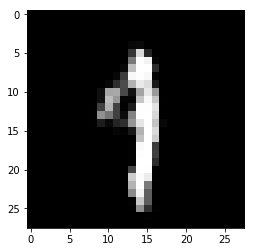

Number batches 468
183(0/468) D: 0.6173, G: 1.0391
183(1/468) D: 0.6535, G: 0.9011
183(2/468) D: 0.6010, G: 0.8132
183(3/468) D: 0.6080, G: 0.9764
183(4/468) D: 0.6259, G: 1.3029
183(5/468) D: 0.6060, G: 0.8645
183(6/468) D: 0.5910, G: 0.9603
183(7/468) D: 0.5887, G: 1.0450
183(8/468) D: 0.5666, G: 0.8722
183(9/468) D: 0.6778, G: 1.0548
183(10/468) D: 0.6413, G: 0.9606
183(11/468) D: 0.6172, G: 0.8540
183(12/468) D: 0.6132, G: 0.8225
183(13/468) D: 0.6506, G: 0.9959
183(14/468) D: 0.6079, G: 1.0514
183(15/468) D: 0.6455, G: 0.8044
183(16/468) D: 0.6073, G: 0.8711
183(17/468) D: 0.6455, G: 1.1646
183(18/468) D: 0.6224, G: 0.8706
183(19/468) D: 0.6376, G: 0.9758
183(20/468) D: 0.6265, G: 1.0994
183(21/468) D: 0.5895, G: 0.9206
183(22/468) D: 0.6138, G: 0.7813
183(23/468) D: 0.5915, G: 1.0272
183(24/468) D: 0.5973, G: 1.0490
183(25/468) D: 0.6282, G: 0.8958
183(26/468) D: 0.6099, G: 0.8925
183(27/468) D: 0.5796, G: 1.1057
183(28/468) D: 0.6324, G: 0.8387
183(29/468) D: 0.6125, G: 0.9153
1

183(245/468) D: 0.6488, G: 1.0434
183(246/468) D: 0.6157, G: 0.8334
183(247/468) D: 0.6147, G: 0.9218
183(248/468) D: 0.6144, G: 0.9374
183(249/468) D: 0.6063, G: 0.9373
183(250/468) D: 0.6903, G: 0.9994
183(251/468) D: 0.6318, G: 0.8821
183(252/468) D: 0.6482, G: 0.9074
183(253/468) D: 0.6322, G: 1.0656
183(254/468) D: 0.5939, G: 0.8554
183(255/468) D: 0.6808, G: 0.8368
183(256/468) D: 0.6299, G: 0.9845
183(257/468) D: 0.6200, G: 0.9513
183(258/468) D: 0.6188, G: 0.8479
183(259/468) D: 0.6167, G: 0.9192
183(260/468) D: 0.6208, G: 0.9764
183(261/468) D: 0.6085, G: 0.8573
183(262/468) D: 0.6312, G: 0.7194
183(263/468) D: 0.6395, G: 0.8271
183(264/468) D: 0.6401, G: 0.9823
183(265/468) D: 0.6019, G: 0.8725
183(266/468) D: 0.6015, G: 0.8948
183(267/468) D: 0.5816, G: 0.9047
183(268/468) D: 0.6086, G: 0.9206
183(269/468) D: 0.6138, G: 0.9475
183(270/468) D: 0.5907, G: 0.9649
183(271/468) D: 0.6011, G: 0.9252
183(272/468) D: 0.5818, G: 1.0395
183(273/468) D: 0.5975, G: 0.9110
183(274/468) D

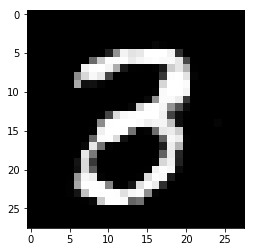

Number batches 468
184(0/468) D: 0.6298, G: 0.8850
184(1/468) D: 0.6762, G: 0.9937
184(2/468) D: 0.5839, G: 0.9162
184(3/468) D: 0.6119, G: 0.7557
184(4/468) D: 0.6114, G: 1.1352
184(5/468) D: 0.5974, G: 0.9801
184(6/468) D: 0.5845, G: 0.8643
184(7/468) D: 0.6231, G: 1.0924
184(8/468) D: 0.5832, G: 0.9607
184(9/468) D: 0.6912, G: 0.8823
184(10/468) D: 0.6760, G: 1.0033
184(11/468) D: 0.6041, G: 0.9732
184(12/468) D: 0.6164, G: 0.8991
184(13/468) D: 0.6319, G: 1.0323
184(14/468) D: 0.5846, G: 0.9272
184(15/468) D: 0.6714, G: 0.9016
184(16/468) D: 0.6505, G: 0.8981
184(17/468) D: 0.6375, G: 0.9038
184(18/468) D: 0.5790, G: 0.8443
184(19/468) D: 0.5962, G: 0.9486
184(20/468) D: 0.5890, G: 0.9904
184(21/468) D: 0.6393, G: 0.9002
184(22/468) D: 0.6058, G: 0.9401
184(23/468) D: 0.5844, G: 0.9725
184(24/468) D: 0.6086, G: 0.9275
184(25/468) D: 0.6162, G: 0.8849
184(26/468) D: 0.6416, G: 1.0006
184(27/468) D: 0.6106, G: 1.0107
184(28/468) D: 0.5840, G: 0.8073
184(29/468) D: 0.6348, G: 1.0332
1

184(245/468) D: 0.6237, G: 1.0330
184(246/468) D: 0.6288, G: 0.9549
184(247/468) D: 0.6095, G: 0.9438
184(248/468) D: 0.6003, G: 1.1481
184(249/468) D: 0.5948, G: 1.0847
184(250/468) D: 0.6721, G: 0.8212
184(251/468) D: 0.6431, G: 0.8759
184(252/468) D: 0.6670, G: 1.0990
184(253/468) D: 0.6450, G: 0.9976
184(254/468) D: 0.6277, G: 0.8166
184(255/468) D: 0.6773, G: 0.9088
184(256/468) D: 0.5907, G: 0.8932
184(257/468) D: 0.6071, G: 1.0277
184(258/468) D: 0.6416, G: 0.9540
184(259/468) D: 0.5900, G: 0.8853
184(260/468) D: 0.5979, G: 0.8141
184(261/468) D: 0.6064, G: 0.8943
184(262/468) D: 0.6309, G: 0.9070
184(263/468) D: 0.6527, G: 0.9558
184(264/468) D: 0.6054, G: 0.8799
184(265/468) D: 0.5892, G: 0.9189
184(266/468) D: 0.5761, G: 1.0093
184(267/468) D: 0.6145, G: 0.8555
184(268/468) D: 0.5994, G: 1.0089
184(269/468) D: 0.6072, G: 1.0506
184(270/468) D: 0.6184, G: 0.8385
184(271/468) D: 0.6184, G: 1.0149
184(272/468) D: 0.6384, G: 0.9305
184(273/468) D: 0.6289, G: 0.8495
184(274/468) D

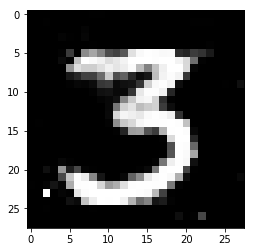

Number batches 468
185(0/468) D: 0.6671, G: 0.8486
185(1/468) D: 0.6089, G: 0.8963
185(2/468) D: 0.6235, G: 0.9597
185(3/468) D: 0.6218, G: 0.9363
185(4/468) D: 0.6007, G: 0.9696
185(5/468) D: 0.6165, G: 0.8371
185(6/468) D: 0.6549, G: 1.0282
185(7/468) D: 0.5609, G: 0.8932
185(8/468) D: 0.6006, G: 1.0287
185(9/468) D: 0.6841, G: 0.9632
185(10/468) D: 0.6434, G: 0.9249
185(11/468) D: 0.6043, G: 0.8978
185(12/468) D: 0.5865, G: 0.8039
185(13/468) D: 0.6383, G: 1.0409
185(14/468) D: 0.6192, G: 0.9738
185(15/468) D: 0.6615, G: 1.1397
185(16/468) D: 0.6073, G: 0.8747
185(17/468) D: 0.6362, G: 0.8896
185(18/468) D: 0.6127, G: 0.9990
185(19/468) D: 0.6730, G: 0.8544
185(20/468) D: 0.5868, G: 0.8974
185(21/468) D: 0.6141, G: 0.9852
185(22/468) D: 0.6373, G: 0.8409
185(23/468) D: 0.5843, G: 1.0916
185(24/468) D: 0.5958, G: 0.9661
185(25/468) D: 0.6513, G: 0.8446
185(26/468) D: 0.6154, G: 0.9490
185(27/468) D: 0.5876, G: 1.0090
185(28/468) D: 0.6221, G: 1.0715
185(29/468) D: 0.5800, G: 1.0037
1

185(245/468) D: 0.6180, G: 0.9857
185(246/468) D: 0.6061, G: 0.9716
185(247/468) D: 0.5826, G: 0.9323
185(248/468) D: 0.5811, G: 1.1128
185(249/468) D: 0.5787, G: 1.1362
185(250/468) D: 0.6311, G: 0.8512
185(251/468) D: 0.6347, G: 0.8216
185(252/468) D: 0.5858, G: 1.0918
185(253/468) D: 0.6078, G: 1.1791
185(254/468) D: 0.6614, G: 0.8456
185(255/468) D: 0.6801, G: 0.7336
185(256/468) D: 0.6736, G: 1.0594
185(257/468) D: 0.6440, G: 1.0745
185(258/468) D: 0.6360, G: 0.7584
185(259/468) D: 0.6086, G: 0.9398
185(260/468) D: 0.6328, G: 0.9113
185(261/468) D: 0.5961, G: 0.8678
185(262/468) D: 0.6217, G: 0.8446
185(263/468) D: 0.6759, G: 0.9044
185(264/468) D: 0.6209, G: 0.9180
185(265/468) D: 0.6482, G: 0.9296
185(266/468) D: 0.6524, G: 1.0928
185(267/468) D: 0.6604, G: 0.8307
185(268/468) D: 0.6241, G: 0.8480
185(269/468) D: 0.6018, G: 1.0178
185(270/468) D: 0.6077, G: 0.9549
185(271/468) D: 0.6174, G: 0.8897
185(272/468) D: 0.6428, G: 0.9876
185(273/468) D: 0.5998, G: 0.9812
185(274/468) D

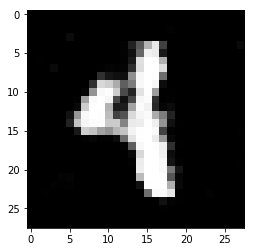

Number batches 468
186(0/468) D: 0.6512, G: 0.8479
186(1/468) D: 0.6207, G: 1.0575
186(2/468) D: 0.6602, G: 0.9832
186(3/468) D: 0.6146, G: 0.8728
186(4/468) D: 0.6069, G: 0.9436
186(5/468) D: 0.6395, G: 0.9447
186(6/468) D: 0.6012, G: 0.9348
186(7/468) D: 0.5913, G: 0.8963
186(8/468) D: 0.6240, G: 1.0587
186(9/468) D: 0.6592, G: 1.0850
186(10/468) D: 0.6435, G: 0.8757
186(11/468) D: 0.5792, G: 0.9361
186(12/468) D: 0.6162, G: 1.0148
186(13/468) D: 0.6343, G: 0.8556
186(14/468) D: 0.6181, G: 0.8839
186(15/468) D: 0.6502, G: 0.9840
186(16/468) D: 0.6117, G: 0.8689
186(17/468) D: 0.6552, G: 0.9329
186(18/468) D: 0.6292, G: 0.9088
186(19/468) D: 0.6220, G: 0.9344
186(20/468) D: 0.6068, G: 0.9375
186(21/468) D: 0.5853, G: 0.9641
186(22/468) D: 0.6115, G: 0.8812
186(23/468) D: 0.6171, G: 0.8295
186(24/468) D: 0.5984, G: 0.8707
186(25/468) D: 0.6123, G: 0.8972
186(26/468) D: 0.5920, G: 1.0180
186(27/468) D: 0.6128, G: 0.8689
186(28/468) D: 0.6097, G: 1.0215
186(29/468) D: 0.6417, G: 1.0748
1

186(245/468) D: 0.6333, G: 1.0621
186(246/468) D: 0.6274, G: 1.1201
186(247/468) D: 0.5796, G: 0.9656
186(248/468) D: 0.6407, G: 0.9842
186(249/468) D: 0.6246, G: 1.0485
186(250/468) D: 0.6674, G: 0.8169
186(251/468) D: 0.6397, G: 0.9126
186(252/468) D: 0.6297, G: 1.0789
186(253/468) D: 0.6067, G: 1.0274
186(254/468) D: 0.6331, G: 0.8086
186(255/468) D: 0.6639, G: 0.9138
186(256/468) D: 0.6662, G: 1.1110
186(257/468) D: 0.6354, G: 0.8728
186(258/468) D: 0.6220, G: 0.7814
186(259/468) D: 0.5779, G: 0.9080
186(260/468) D: 0.6235, G: 0.9117
186(261/468) D: 0.6067, G: 0.8494
186(262/468) D: 0.6104, G: 0.9088
186(263/468) D: 0.6319, G: 0.8814
186(264/468) D: 0.6464, G: 0.9816
186(265/468) D: 0.6354, G: 0.8970
186(266/468) D: 0.6020, G: 0.8515
186(267/468) D: 0.6403, G: 0.9449
186(268/468) D: 0.6480, G: 0.9980
186(269/468) D: 0.6144, G: 0.9544
186(270/468) D: 0.5970, G: 1.0065
186(271/468) D: 0.6255, G: 0.9079
186(272/468) D: 0.6162, G: 0.8644
186(273/468) D: 0.5954, G: 0.9632
186(274/468) D

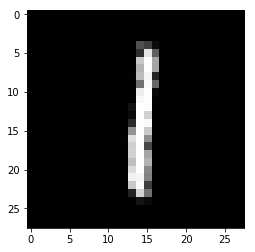

Number batches 468
187(0/468) D: 0.7100, G: 0.6068
187(1/468) D: 0.6701, G: 0.8476
187(2/468) D: 0.6189, G: 0.9963
187(3/468) D: 0.6653, G: 0.9628
187(4/468) D: 0.6280, G: 0.9897
187(5/468) D: 0.6309, G: 1.0107
187(6/468) D: 0.6163, G: 0.9555
187(7/468) D: 0.5861, G: 0.9111
187(8/468) D: 0.5983, G: 0.8568
187(9/468) D: 0.6872, G: 0.9973
187(10/468) D: 0.6786, G: 0.9544
187(11/468) D: 0.6195, G: 0.9868
187(12/468) D: 0.6173, G: 0.8459
187(13/468) D: 0.6524, G: 0.9885
187(14/468) D: 0.6407, G: 1.0439
187(15/468) D: 0.6498, G: 0.9570
187(16/468) D: 0.6469, G: 0.9390
187(17/468) D: 0.6240, G: 0.9455
187(18/468) D: 0.6135, G: 1.0362
187(19/468) D: 0.6329, G: 0.7964
187(20/468) D: 0.6173, G: 1.0152
187(21/468) D: 0.6157, G: 1.0039
187(22/468) D: 0.6265, G: 0.8541
187(23/468) D: 0.5885, G: 0.8256
187(24/468) D: 0.6017, G: 0.9642
187(25/468) D: 0.6470, G: 0.9391
187(26/468) D: 0.6140, G: 0.8624
187(27/468) D: 0.5582, G: 0.9547
187(28/468) D: 0.6321, G: 1.0136
187(29/468) D: 0.5688, G: 0.8462
1

187(244/468) D: 0.6183, G: 0.9476
187(245/468) D: 0.6556, G: 0.9339
187(246/468) D: 0.5898, G: 0.8415
187(247/468) D: 0.5669, G: 1.2894
187(248/468) D: 0.6000, G: 0.9945
187(249/468) D: 0.5993, G: 0.9240
187(250/468) D: 0.6661, G: 0.9739
187(251/468) D: 0.6314, G: 0.9989
187(252/468) D: 0.6058, G: 0.9730
187(253/468) D: 0.6232, G: 1.0032
187(254/468) D: 0.6737, G: 0.9172
187(255/468) D: 0.6411, G: 0.8772
187(256/468) D: 0.6411, G: 0.8919
187(257/468) D: 0.6140, G: 1.0736
187(258/468) D: 0.6314, G: 0.8508
187(259/468) D: 0.6312, G: 0.8558
187(260/468) D: 0.6029, G: 0.9639
187(261/468) D: 0.6319, G: 0.9602
187(262/468) D: 0.5983, G: 0.9185
187(263/468) D: 0.6489, G: 0.9068
187(264/468) D: 0.6815, G: 1.1187
187(265/468) D: 0.6134, G: 0.8479
187(266/468) D: 0.6127, G: 0.9164
187(267/468) D: 0.5775, G: 1.0704
187(268/468) D: 0.6810, G: 0.8574
187(269/468) D: 0.6245, G: 0.9276
187(270/468) D: 0.6459, G: 0.9380
187(271/468) D: 0.6011, G: 0.8876
187(272/468) D: 0.5734, G: 0.9733
187(273/468) D

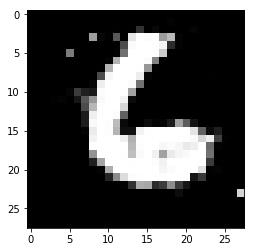

Number batches 468
188(0/468) D: 0.6538, G: 0.9233
188(1/468) D: 0.6248, G: 0.8293
188(2/468) D: 0.6600, G: 0.9637
188(3/468) D: 0.6327, G: 1.0539
188(4/468) D: 0.5683, G: 0.9242
188(5/468) D: 0.5947, G: 1.0030
188(6/468) D: 0.6384, G: 0.9833
188(7/468) D: 0.5969, G: 0.9734
188(8/468) D: 0.6530, G: 0.9117
188(9/468) D: 0.6658, G: 0.9250
188(10/468) D: 0.6158, G: 0.9091
188(11/468) D: 0.6204, G: 0.8927
188(12/468) D: 0.6308, G: 0.8501
188(13/468) D: 0.6262, G: 0.9405
188(14/468) D: 0.6097, G: 0.9967
188(15/468) D: 0.6382, G: 0.8918
188(16/468) D: 0.6169, G: 0.9001
188(17/468) D: 0.6532, G: 1.0016
188(18/468) D: 0.5945, G: 0.8486
188(19/468) D: 0.6344, G: 0.9199
188(20/468) D: 0.6354, G: 1.0024
188(21/468) D: 0.5975, G: 0.9823
188(22/468) D: 0.6383, G: 0.8883
188(23/468) D: 0.6079, G: 0.9310
188(24/468) D: 0.5547, G: 0.9978
188(25/468) D: 0.6578, G: 1.0087
188(26/468) D: 0.6521, G: 0.8448
188(27/468) D: 0.6239, G: 1.0032
188(28/468) D: 0.6303, G: 1.1185
188(29/468) D: 0.6129, G: 0.8920
1

188(245/468) D: 0.6332, G: 1.0660
188(246/468) D: 0.6024, G: 0.9961
188(247/468) D: 0.5793, G: 0.9904
188(248/468) D: 0.6187, G: 1.0064
188(249/468) D: 0.6136, G: 0.9450
188(250/468) D: 0.6556, G: 0.7539
188(251/468) D: 0.6364, G: 1.1462
188(252/468) D: 0.6296, G: 0.9826
188(253/468) D: 0.6061, G: 0.9506
188(254/468) D: 0.5907, G: 0.9994
188(255/468) D: 0.6544, G: 0.7030
188(256/468) D: 0.6319, G: 0.9239
188(257/468) D: 0.5915, G: 1.0666
188(258/468) D: 0.5997, G: 0.9339
188(259/468) D: 0.6252, G: 0.8486
188(260/468) D: 0.6351, G: 0.8865
188(261/468) D: 0.6546, G: 0.9232
188(262/468) D: 0.6101, G: 0.8819
188(263/468) D: 0.6695, G: 0.8641
188(264/468) D: 0.6155, G: 0.9336
188(265/468) D: 0.6059, G: 0.9953
188(266/468) D: 0.5913, G: 0.9148
188(267/468) D: 0.6338, G: 0.8982
188(268/468) D: 0.6777, G: 0.9922
188(269/468) D: 0.5779, G: 0.9373
188(270/468) D: 0.6509, G: 1.0346
188(271/468) D: 0.5924, G: 0.9117
188(272/468) D: 0.5811, G: 0.9619
188(273/468) D: 0.6152, G: 0.9048
188(274/468) D

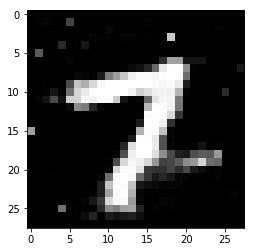

Number batches 468
189(0/468) D: 0.6124, G: 0.9354
189(1/468) D: 0.6551, G: 1.0464
189(2/468) D: 0.6049, G: 0.9491
189(3/468) D: 0.6053, G: 1.0523
189(4/468) D: 0.5801, G: 0.9044
189(5/468) D: 0.6117, G: 0.9300
189(6/468) D: 0.5924, G: 1.0257
189(7/468) D: 0.5518, G: 1.0781
189(8/468) D: 0.6054, G: 0.8030
189(9/468) D: 0.7152, G: 1.0408
189(10/468) D: 0.6433, G: 1.0183
189(11/468) D: 0.5825, G: 0.9745
189(12/468) D: 0.6162, G: 0.8482
189(13/468) D: 0.6386, G: 0.9033
189(14/468) D: 0.6199, G: 1.0091
189(15/468) D: 0.6490, G: 0.9829
189(16/468) D: 0.6595, G: 0.8474
189(17/468) D: 0.6532, G: 1.0027
189(18/468) D: 0.6084, G: 1.0083
189(19/468) D: 0.6148, G: 0.9519
189(20/468) D: 0.6058, G: 1.0159
189(21/468) D: 0.5893, G: 0.9149
189(22/468) D: 0.6335, G: 0.8795
189(23/468) D: 0.5842, G: 0.9152
189(24/468) D: 0.5502, G: 1.0355
189(25/468) D: 0.6123, G: 0.7427
189(26/468) D: 0.6485, G: 1.0358
189(27/468) D: 0.5829, G: 1.0933
189(28/468) D: 0.6498, G: 0.9038
189(29/468) D: 0.6464, G: 0.9865
1

189(245/468) D: 0.6824, G: 1.0873
189(246/468) D: 0.6100, G: 0.9320
189(247/468) D: 0.5841, G: 0.9753
189(248/468) D: 0.6348, G: 0.9110
189(249/468) D: 0.6025, G: 0.9259
189(250/468) D: 0.6571, G: 0.9476
189(251/468) D: 0.6271, G: 0.9636
189(252/468) D: 0.6018, G: 0.9645
189(253/468) D: 0.5520, G: 0.9808
189(254/468) D: 0.6572, G: 0.7457
189(255/468) D: 0.7166, G: 0.8655
189(256/468) D: 0.6273, G: 0.9636
189(257/468) D: 0.6082, G: 0.9939
189(258/468) D: 0.6104, G: 0.9119
189(259/468) D: 0.6242, G: 0.9109
189(260/468) D: 0.6355, G: 0.9752
189(261/468) D: 0.5857, G: 0.8622
189(262/468) D: 0.6090, G: 0.8910
189(263/468) D: 0.6014, G: 0.9548
189(264/468) D: 0.6465, G: 0.9544
189(265/468) D: 0.6418, G: 0.8704
189(266/468) D: 0.6034, G: 0.8732
189(267/468) D: 0.5866, G: 0.8493
189(268/468) D: 0.6536, G: 1.0540
189(269/468) D: 0.5903, G: 0.9152
189(270/468) D: 0.6295, G: 0.9113
189(271/468) D: 0.6246, G: 0.8094
189(272/468) D: 0.6199, G: 0.9406
189(273/468) D: 0.6344, G: 0.9570
189(274/468) D

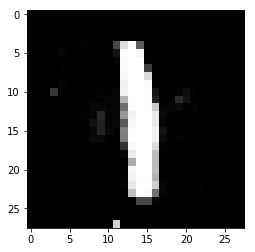

Number batches 468
190(0/468) D: 0.7483, G: 0.7746
190(1/468) D: 0.6599, G: 0.8157
190(2/468) D: 0.6292, G: 1.0601
190(3/468) D: 0.5991, G: 0.9353
190(4/468) D: 0.5822, G: 0.8904
190(5/468) D: 0.5912, G: 0.9818
190(6/468) D: 0.6030, G: 1.1540
190(7/468) D: 0.5744, G: 0.9826
190(8/468) D: 0.6115, G: 0.8982
190(9/468) D: 0.6452, G: 1.0184
190(10/468) D: 0.6043, G: 0.9558
190(11/468) D: 0.5882, G: 1.0041
190(12/468) D: 0.5950, G: 0.8559
190(13/468) D: 0.6550, G: 0.9441
190(14/468) D: 0.6093, G: 1.0494
190(15/468) D: 0.6445, G: 0.8376
190(16/468) D: 0.5996, G: 0.9377
190(17/468) D: 0.6105, G: 0.9540
190(18/468) D: 0.6470, G: 0.9688
190(19/468) D: 0.6695, G: 0.9736
190(20/468) D: 0.6073, G: 1.0582
190(21/468) D: 0.5877, G: 0.9463
190(22/468) D: 0.6653, G: 0.9525
190(23/468) D: 0.6132, G: 0.8615
190(24/468) D: 0.5806, G: 1.0376
190(25/468) D: 0.5983, G: 0.9042
190(26/468) D: 0.5640, G: 1.0279
190(27/468) D: 0.5655, G: 1.0806
190(28/468) D: 0.6237, G: 1.0538
190(29/468) D: 0.6308, G: 1.0050
1

190(245/468) D: 0.5858, G: 0.8531
190(246/468) D: 0.5892, G: 0.9437
190(247/468) D: 0.5826, G: 1.3684
190(248/468) D: 0.6613, G: 0.8280
190(249/468) D: 0.5799, G: 1.0694
190(250/468) D: 0.6586, G: 0.8738
190(251/468) D: 0.6219, G: 0.9018
190(252/468) D: 0.5819, G: 1.1765
190(253/468) D: 0.6268, G: 0.9996
190(254/468) D: 0.6023, G: 0.8048
190(255/468) D: 0.7125, G: 0.9212
190(256/468) D: 0.6424, G: 1.0527
190(257/468) D: 0.6237, G: 0.9146
190(258/468) D: 0.6119, G: 1.0580
190(259/468) D: 0.5942, G: 0.8984
190(260/468) D: 0.6224, G: 0.8894
190(261/468) D: 0.5846, G: 0.9333
190(262/468) D: 0.6233, G: 0.9547
190(263/468) D: 0.6192, G: 0.8537
190(264/468) D: 0.6217, G: 0.8862
190(265/468) D: 0.6060, G: 0.9292
190(266/468) D: 0.6039, G: 0.9773
190(267/468) D: 0.6017, G: 0.9367
190(268/468) D: 0.6296, G: 0.9377
190(269/468) D: 0.6152, G: 1.1379
190(270/468) D: 0.6786, G: 0.7297
190(271/468) D: 0.6418, G: 0.9243
190(272/468) D: 0.6275, G: 1.0949
190(273/468) D: 0.6086, G: 0.9452
190(274/468) D

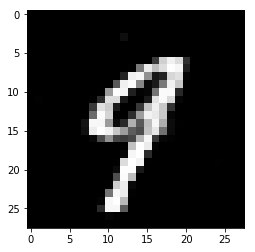

Number batches 468
191(0/468) D: 0.6188, G: 0.9447
191(1/468) D: 0.6467, G: 0.8644
191(2/468) D: 0.6562, G: 1.0127
191(3/468) D: 0.6522, G: 1.0009
191(4/468) D: 0.5948, G: 1.1762
191(5/468) D: 0.6282, G: 0.9179
191(6/468) D: 0.5803, G: 0.9520
191(7/468) D: 0.5693, G: 1.0246
191(8/468) D: 0.6090, G: 1.0129
191(9/468) D: 0.6470, G: 0.9276
191(10/468) D: 0.6448, G: 1.0050
191(11/468) D: 0.5674, G: 1.0043
191(12/468) D: 0.5909, G: 0.8359
191(13/468) D: 0.6253, G: 0.9956
191(14/468) D: 0.6096, G: 1.0477
191(15/468) D: 0.6575, G: 0.8972
191(16/468) D: 0.6396, G: 1.0289
191(17/468) D: 0.6753, G: 0.8758
191(18/468) D: 0.6205, G: 0.9474
191(19/468) D: 0.6140, G: 0.9591
191(20/468) D: 0.5876, G: 0.9144
191(21/468) D: 0.5620, G: 1.0149
191(22/468) D: 0.5936, G: 0.9817
191(23/468) D: 0.5934, G: 0.9087
191(24/468) D: 0.6081, G: 0.9983
191(25/468) D: 0.6513, G: 1.1196
191(26/468) D: 0.6453, G: 0.9495
191(27/468) D: 0.5842, G: 1.0057
191(28/468) D: 0.5967, G: 0.9589
191(29/468) D: 0.5623, G: 0.9540
1

191(245/468) D: 0.6393, G: 1.0048
191(246/468) D: 0.6202, G: 1.0895
191(247/468) D: 0.5450, G: 0.9288
191(248/468) D: 0.6399, G: 1.2215
191(249/468) D: 0.6077, G: 0.9796
191(250/468) D: 0.6542, G: 0.8936
191(251/468) D: 0.6175, G: 0.9709
191(252/468) D: 0.6404, G: 1.0310
191(253/468) D: 0.6086, G: 1.1075
191(254/468) D: 0.6224, G: 1.0384
191(255/468) D: 0.6671, G: 0.6861
191(256/468) D: 0.6208, G: 0.9878
191(257/468) D: 0.5827, G: 1.1284
191(258/468) D: 0.6538, G: 0.7416
191(259/468) D: 0.6274, G: 0.9246
191(260/468) D: 0.5952, G: 0.9813
191(261/468) D: 0.6029, G: 1.0832
191(262/468) D: 0.6232, G: 0.8530
191(263/468) D: 0.6339, G: 0.8707
191(264/468) D: 0.6460, G: 1.0091
191(265/468) D: 0.5808, G: 0.9047
191(266/468) D: 0.5823, G: 1.0599
191(267/468) D: 0.5845, G: 0.9403
191(268/468) D: 0.6232, G: 0.9529
191(269/468) D: 0.6116, G: 1.2496
191(270/468) D: 0.6913, G: 0.7165
191(271/468) D: 0.6902, G: 1.0159
191(272/468) D: 0.6447, G: 1.1272
191(273/468) D: 0.6355, G: 0.8627
191(274/468) D

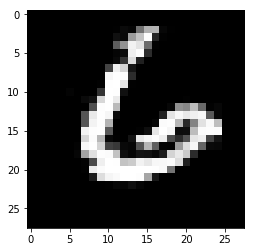

Number batches 468
192(0/468) D: 0.6216, G: 0.8644
192(1/468) D: 0.6446, G: 0.9838
192(2/468) D: 0.6172, G: 0.9418
192(3/468) D: 0.6211, G: 0.9317
192(4/468) D: 0.5851, G: 0.9939
192(5/468) D: 0.5773, G: 0.9862
192(6/468) D: 0.5937, G: 0.9477
192(7/468) D: 0.5700, G: 1.0448
192(8/468) D: 0.6181, G: 0.8308
192(9/468) D: 0.6971, G: 1.0341
192(10/468) D: 0.6618, G: 1.1271
192(11/468) D: 0.6173, G: 0.9454
192(12/468) D: 0.6346, G: 0.7932
192(13/468) D: 0.6549, G: 1.0269
192(14/468) D: 0.6316, G: 0.9706
192(15/468) D: 0.6454, G: 0.9286
192(16/468) D: 0.6388, G: 0.8115
192(17/468) D: 0.6436, G: 1.0295
192(18/468) D: 0.6313, G: 1.0535
192(19/468) D: 0.6176, G: 0.8712
192(20/468) D: 0.6069, G: 0.9241
192(21/468) D: 0.5961, G: 0.9137
192(22/468) D: 0.6230, G: 0.8601
192(23/468) D: 0.6070, G: 1.0588
192(24/468) D: 0.5763, G: 0.8456
192(25/468) D: 0.6115, G: 0.9402
192(26/468) D: 0.5873, G: 1.1093
192(27/468) D: 0.5937, G: 0.8239
192(28/468) D: 0.6123, G: 0.9201
192(29/468) D: 0.5977, G: 1.0007
1

192(245/468) D: 0.6150, G: 1.0407
192(246/468) D: 0.6123, G: 0.9998
192(247/468) D: 0.5918, G: 1.1119
192(248/468) D: 0.6110, G: 0.9912
192(249/468) D: 0.5926, G: 0.9796
192(250/468) D: 0.6456, G: 0.8866
192(251/468) D: 0.6874, G: 0.9511
192(252/468) D: 0.6624, G: 0.9828
192(253/468) D: 0.6103, G: 0.8848
192(254/468) D: 0.6128, G: 0.9219
192(255/468) D: 0.6548, G: 0.8708
192(256/468) D: 0.6249, G: 0.9732
192(257/468) D: 0.6319, G: 0.9559
192(258/468) D: 0.6579, G: 0.9446
192(259/468) D: 0.5998, G: 0.8405
192(260/468) D: 0.5942, G: 0.9036
192(261/468) D: 0.5947, G: 0.9622
192(262/468) D: 0.5855, G: 0.9213
192(263/468) D: 0.6311, G: 0.9406
192(264/468) D: 0.6673, G: 0.9965
192(265/468) D: 0.5854, G: 0.9001
192(266/468) D: 0.6415, G: 0.8283
192(267/468) D: 0.6120, G: 0.9836
192(268/468) D: 0.6244, G: 0.9920
192(269/468) D: 0.5782, G: 0.9571
192(270/468) D: 0.6407, G: 0.8935
192(271/468) D: 0.6276, G: 0.8273
192(272/468) D: 0.6085, G: 1.1009
192(273/468) D: 0.5979, G: 0.9636
192(274/468) D

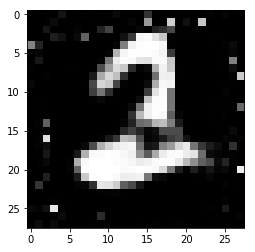

Number batches 468
193(0/468) D: 0.6526, G: 0.7589
193(1/468) D: 0.6392, G: 0.9531
193(2/468) D: 0.6198, G: 0.9872
193(3/468) D: 0.5815, G: 0.9389
193(4/468) D: 0.6188, G: 1.0261
193(5/468) D: 0.6228, G: 0.9174
193(6/468) D: 0.6033, G: 1.0888
193(7/468) D: 0.5932, G: 1.0201
193(8/468) D: 0.5904, G: 0.7575
193(9/468) D: 0.6546, G: 0.9082
193(10/468) D: 0.6709, G: 1.0678
193(11/468) D: 0.5929, G: 0.9738
193(12/468) D: 0.6325, G: 0.8781
193(13/468) D: 0.6288, G: 0.9187
193(14/468) D: 0.5842, G: 0.9668
193(15/468) D: 0.6201, G: 0.8695
193(16/468) D: 0.6005, G: 1.0087
193(17/468) D: 0.6481, G: 0.8496
193(18/468) D: 0.6133, G: 0.8586
193(19/468) D: 0.6524, G: 0.9376
193(20/468) D: 0.6205, G: 0.9827
193(21/468) D: 0.6025, G: 1.0226
193(22/468) D: 0.6409, G: 0.9976
193(23/468) D: 0.5987, G: 0.8483
193(24/468) D: 0.6169, G: 1.0453
193(25/468) D: 0.6276, G: 0.8629
193(26/468) D: 0.6399, G: 1.0455
193(27/468) D: 0.5954, G: 0.9834
193(28/468) D: 0.6782, G: 0.9069
193(29/468) D: 0.6108, G: 0.9314
1

193(244/468) D: 0.6062, G: 0.8973
193(245/468) D: 0.6340, G: 0.9141
193(246/468) D: 0.6116, G: 0.9409
193(247/468) D: 0.5860, G: 1.1821
193(248/468) D: 0.6048, G: 1.0040
193(249/468) D: 0.6239, G: 0.8825
193(250/468) D: 0.6701, G: 0.8809
193(251/468) D: 0.6314, G: 0.9974
193(252/468) D: 0.6028, G: 1.0385
193(253/468) D: 0.5977, G: 0.9847
193(254/468) D: 0.6333, G: 0.8591
193(255/468) D: 0.6190, G: 0.8218
193(256/468) D: 0.6014, G: 0.8988
193(257/468) D: 0.6230, G: 1.0513
193(258/468) D: 0.6391, G: 1.0212
193(259/468) D: 0.5784, G: 0.9615
193(260/468) D: 0.6594, G: 0.8776
193(261/468) D: 0.5917, G: 0.8908
193(262/468) D: 0.6499, G: 0.9067
193(263/468) D: 0.6445, G: 0.9075
193(264/468) D: 0.6419, G: 0.9366
193(265/468) D: 0.6343, G: 0.9655
193(266/468) D: 0.5950, G: 0.8423
193(267/468) D: 0.5834, G: 0.8697
193(268/468) D: 0.6345, G: 0.9775
193(269/468) D: 0.5823, G: 0.9609
193(270/468) D: 0.6217, G: 1.0066
193(271/468) D: 0.6266, G: 0.9461
193(272/468) D: 0.6193, G: 0.9472
193(273/468) D

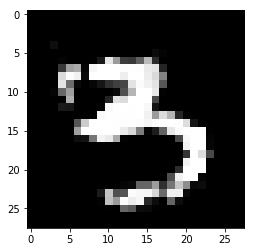

Number batches 468
194(0/468) D: 0.6643, G: 0.7751
194(1/468) D: 0.6151, G: 0.8782
194(2/468) D: 0.6286, G: 1.0829
194(3/468) D: 0.6380, G: 0.9848
194(4/468) D: 0.6247, G: 0.9260
194(5/468) D: 0.6383, G: 0.9672
194(6/468) D: 0.6121, G: 0.9518
194(7/468) D: 0.5782, G: 0.8853
194(8/468) D: 0.5760, G: 0.9837
194(9/468) D: 0.6752, G: 0.9097
194(10/468) D: 0.6407, G: 1.0285
194(11/468) D: 0.5652, G: 0.9717
194(12/468) D: 0.6282, G: 0.8823
194(13/468) D: 0.6167, G: 0.9608
194(14/468) D: 0.6208, G: 1.0906
194(15/468) D: 0.6393, G: 0.9126
194(16/468) D: 0.6010, G: 0.8137
194(17/468) D: 0.6223, G: 0.9107
194(18/468) D: 0.6280, G: 1.2205
194(19/468) D: 0.6107, G: 0.8126
194(20/468) D: 0.5785, G: 0.9395
194(21/468) D: 0.6270, G: 1.0583
194(22/468) D: 0.5857, G: 0.8925
194(23/468) D: 0.5741, G: 0.9723
194(24/468) D: 0.5897, G: 1.0121
194(25/468) D: 0.6609, G: 0.7782
194(26/468) D: 0.6240, G: 1.0787
194(27/468) D: 0.5629, G: 1.0958
194(28/468) D: 0.6080, G: 0.8893
194(29/468) D: 0.6413, G: 0.9254
1

194(244/468) D: 0.6149, G: 0.9857
194(245/468) D: 0.6280, G: 0.9873
194(246/468) D: 0.6269, G: 0.9697
194(247/468) D: 0.6181, G: 1.0646
194(248/468) D: 0.6058, G: 1.0294
194(249/468) D: 0.6154, G: 0.8370
194(250/468) D: 0.6497, G: 0.8626
194(251/468) D: 0.6115, G: 0.9967
194(252/468) D: 0.6173, G: 1.0672
194(253/468) D: 0.5903, G: 0.9535
194(254/468) D: 0.6305, G: 0.9016
194(255/468) D: 0.6346, G: 0.8201
194(256/468) D: 0.6050, G: 1.0026
194(257/468) D: 0.6151, G: 0.9061
194(258/468) D: 0.6273, G: 0.9023
194(259/468) D: 0.6215, G: 1.0496
194(260/468) D: 0.6057, G: 0.7389
194(261/468) D: 0.6323, G: 1.0336
194(262/468) D: 0.6161, G: 1.0737
194(263/468) D: 0.6432, G: 0.8548
194(264/468) D: 0.6688, G: 0.7811
194(265/468) D: 0.5966, G: 0.8591
194(266/468) D: 0.6012, G: 0.9476
194(267/468) D: 0.5925, G: 1.0465
194(268/468) D: 0.6420, G: 0.8208
194(269/468) D: 0.5791, G: 0.8721
194(270/468) D: 0.6106, G: 1.1231
194(271/468) D: 0.6175, G: 0.9306
194(272/468) D: 0.6033, G: 1.0133
194(273/468) D

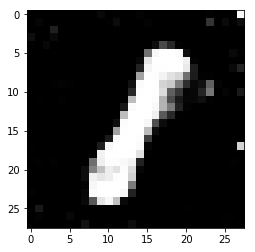

Number batches 468
195(0/468) D: 0.6420, G: 0.9735
195(1/468) D: 0.6355, G: 0.8808
195(2/468) D: 0.5988, G: 1.0118
195(3/468) D: 0.6038, G: 1.1081
195(4/468) D: 0.5776, G: 0.9593
195(5/468) D: 0.6018, G: 0.9174
195(6/468) D: 0.5964, G: 0.8816
195(7/468) D: 0.5832, G: 1.0002
195(8/468) D: 0.6250, G: 0.9201
195(9/468) D: 0.6544, G: 0.8651
195(10/468) D: 0.6458, G: 1.1001
195(11/468) D: 0.6139, G: 0.9447
195(12/468) D: 0.6281, G: 0.9034
195(13/468) D: 0.6217, G: 0.8507
195(14/468) D: 0.6132, G: 0.9867
195(15/468) D: 0.6441, G: 0.9438
195(16/468) D: 0.6186, G: 0.8287
195(17/468) D: 0.6226, G: 1.0094
195(18/468) D: 0.5829, G: 1.1184
195(19/468) D: 0.6159, G: 0.9379
195(20/468) D: 0.5720, G: 0.8141
195(21/468) D: 0.5814, G: 0.9653
195(22/468) D: 0.6044, G: 0.9688
195(23/468) D: 0.5863, G: 0.9771
195(24/468) D: 0.5927, G: 1.0294
195(25/468) D: 0.6394, G: 0.8672
195(26/468) D: 0.5798, G: 0.8185
195(27/468) D: 0.5766, G: 1.1750
195(28/468) D: 0.6887, G: 0.9087
195(29/468) D: 0.6106, G: 0.9460
1

195(244/468) D: 0.6249, G: 0.9393
195(245/468) D: 0.6278, G: 0.9419
195(246/468) D: 0.6227, G: 0.9085
195(247/468) D: 0.5573, G: 0.9416
195(248/468) D: 0.6431, G: 1.0382
195(249/468) D: 0.6372, G: 0.9944
195(250/468) D: 0.6811, G: 0.7114
195(251/468) D: 0.6290, G: 0.8759
195(252/468) D: 0.6584, G: 0.9033
195(253/468) D: 0.6468, G: 1.0119
195(254/468) D: 0.6052, G: 0.9325
195(255/468) D: 0.6588, G: 0.7472
195(256/468) D: 0.6061, G: 0.9231
195(257/468) D: 0.5987, G: 1.0284
195(258/468) D: 0.6358, G: 1.0289
195(259/468) D: 0.6114, G: 0.8550
195(260/468) D: 0.6203, G: 0.9036
195(261/468) D: 0.5999, G: 0.9870
195(262/468) D: 0.6159, G: 0.8206
195(263/468) D: 0.6338, G: 0.8233
195(264/468) D: 0.6401, G: 0.9390
195(265/468) D: 0.5593, G: 0.9720
195(266/468) D: 0.6106, G: 0.9289
195(267/468) D: 0.6140, G: 0.9676
195(268/468) D: 0.6319, G: 0.7615
195(269/468) D: 0.5595, G: 0.9012
195(270/468) D: 0.6032, G: 1.1543
195(271/468) D: 0.6493, G: 0.7480
195(272/468) D: 0.6188, G: 0.9639
195(273/468) D

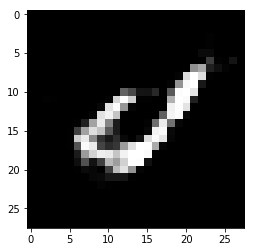

Number batches 468
196(0/468) D: 0.6949, G: 0.7405
196(1/468) D: 0.6308, G: 0.8202
196(2/468) D: 0.6363, G: 1.0092
196(3/468) D: 0.6066, G: 0.9450
196(4/468) D: 0.6021, G: 1.0301
196(5/468) D: 0.6363, G: 0.8711
196(6/468) D: 0.6124, G: 0.9490
196(7/468) D: 0.5879, G: 1.1609
196(8/468) D: 0.5989, G: 0.8776
196(9/468) D: 0.7103, G: 0.9519
196(10/468) D: 0.6381, G: 0.9838
196(11/468) D: 0.5936, G: 0.9477
196(12/468) D: 0.6012, G: 0.9141
196(13/468) D: 0.6458, G: 1.0189
196(14/468) D: 0.6295, G: 0.9411
196(15/468) D: 0.6432, G: 0.8485
196(16/468) D: 0.6352, G: 0.8675
196(17/468) D: 0.6210, G: 0.9497
196(18/468) D: 0.6537, G: 0.9820
196(19/468) D: 0.6073, G: 1.1411
196(20/468) D: 0.5930, G: 0.9512
196(21/468) D: 0.5950, G: 0.9930
196(22/468) D: 0.6161, G: 0.9471
196(23/468) D: 0.5518, G: 0.9197
196(24/468) D: 0.5789, G: 0.9478
196(25/468) D: 0.6286, G: 0.8822
196(26/468) D: 0.5898, G: 1.0535
196(27/468) D: 0.6119, G: 1.0915
196(28/468) D: 0.6156, G: 0.9222
196(29/468) D: 0.5932, G: 0.9291
1

196(245/468) D: 0.6033, G: 1.0333
196(246/468) D: 0.6020, G: 0.9012
196(247/468) D: 0.5990, G: 1.1602
196(248/468) D: 0.6654, G: 1.1294
196(249/468) D: 0.5961, G: 0.8439
196(250/468) D: 0.6883, G: 0.8405
196(251/468) D: 0.6413, G: 1.1987
196(252/468) D: 0.6794, G: 1.1355
196(253/468) D: 0.6070, G: 0.8794
196(254/468) D: 0.6245, G: 0.8113
196(255/468) D: 0.6663, G: 0.9565
196(256/468) D: 0.6312, G: 0.9690
196(257/468) D: 0.6159, G: 1.0083
196(258/468) D: 0.5967, G: 0.9261
196(259/468) D: 0.5854, G: 0.9805
196(260/468) D: 0.6098, G: 0.7756
196(261/468) D: 0.6448, G: 0.9834
196(262/468) D: 0.6228, G: 0.9936
196(263/468) D: 0.6416, G: 0.8477
196(264/468) D: 0.6618, G: 0.9651
196(265/468) D: 0.6467, G: 0.8776
196(266/468) D: 0.5625, G: 0.8379
196(267/468) D: 0.6073, G: 0.9078
196(268/468) D: 0.6226, G: 0.9749
196(269/468) D: 0.6010, G: 1.0426
196(270/468) D: 0.5984, G: 0.9733
196(271/468) D: 0.6134, G: 0.8874
196(272/468) D: 0.5994, G: 0.9600
196(273/468) D: 0.5835, G: 0.9111
196(274/468) D

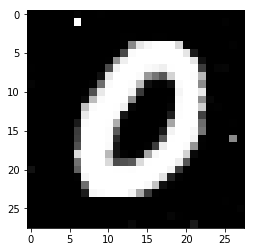

Number batches 468
197(0/468) D: 0.6593, G: 0.7807
197(1/468) D: 0.6568, G: 0.9486
197(2/468) D: 0.6366, G: 0.9849
197(3/468) D: 0.6226, G: 0.7894
197(4/468) D: 0.5850, G: 0.9083
197(5/468) D: 0.5723, G: 1.1239
197(6/468) D: 0.6057, G: 0.8934
197(7/468) D: 0.5781, G: 0.9271
197(8/468) D: 0.6305, G: 0.8971
197(9/468) D: 0.5993, G: 0.9423
197(10/468) D: 0.6477, G: 0.9937
197(11/468) D: 0.6150, G: 0.9602
197(12/468) D: 0.6168, G: 0.8811
197(13/468) D: 0.5830, G: 0.8293
197(14/468) D: 0.6176, G: 1.1948
197(15/468) D: 0.6706, G: 0.9199
197(16/468) D: 0.6257, G: 0.8762
197(17/468) D: 0.6560, G: 0.9908
197(18/468) D: 0.6289, G: 0.9033
197(19/468) D: 0.6069, G: 0.7745
197(20/468) D: 0.6407, G: 0.9888
197(21/468) D: 0.6110, G: 0.9095
197(22/468) D: 0.6517, G: 0.9748
197(23/468) D: 0.5823, G: 1.0185
197(24/468) D: 0.5728, G: 0.9735
197(25/468) D: 0.6145, G: 0.8747
197(26/468) D: 0.6054, G: 1.0188
197(27/468) D: 0.5699, G: 0.9894
197(28/468) D: 0.6505, G: 0.9488
197(29/468) D: 0.5844, G: 0.7213
1

197(245/468) D: 0.6154, G: 0.9755
197(246/468) D: 0.5712, G: 0.9691
197(247/468) D: 0.5789, G: 1.0119
197(248/468) D: 0.6196, G: 0.9062
197(249/468) D: 0.5988, G: 1.0686
197(250/468) D: 0.6551, G: 0.8057
197(251/468) D: 0.6030, G: 0.9448
197(252/468) D: 0.6282, G: 1.1499
197(253/468) D: 0.6051, G: 1.0833
197(254/468) D: 0.6124, G: 0.8966
197(255/468) D: 0.6539, G: 0.7626
197(256/468) D: 0.6424, G: 1.0107
197(257/468) D: 0.6130, G: 0.9442
197(258/468) D: 0.6378, G: 1.0643
197(259/468) D: 0.6324, G: 0.9152
197(260/468) D: 0.6016, G: 0.8894
197(261/468) D: 0.6123, G: 0.9491
197(262/468) D: 0.6208, G: 0.9330
197(263/468) D: 0.6537, G: 0.8627
197(264/468) D: 0.6371, G: 0.9350
197(265/468) D: 0.6086, G: 0.9794
197(266/468) D: 0.5961, G: 0.9794
197(267/468) D: 0.6231, G: 0.9045
197(268/468) D: 0.6442, G: 1.0549
197(269/468) D: 0.5944, G: 0.9872
197(270/468) D: 0.6300, G: 0.7525
197(271/468) D: 0.6262, G: 1.0759
197(272/468) D: 0.6502, G: 0.9604
197(273/468) D: 0.6300, G: 0.9833
197(274/468) D

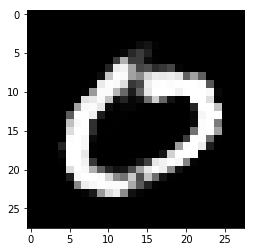

Number batches 468
198(0/468) D: 0.6247, G: 1.0421
198(1/468) D: 0.6200, G: 1.0115
198(2/468) D: 0.6193, G: 0.9143
198(3/468) D: 0.6152, G: 0.9265
198(4/468) D: 0.6059, G: 1.0938
198(5/468) D: 0.6202, G: 0.9079
198(6/468) D: 0.6151, G: 1.0611
198(7/468) D: 0.6527, G: 1.0161
198(8/468) D: 0.6122, G: 0.9860
198(9/468) D: 0.6722, G: 0.9193
198(10/468) D: 0.6433, G: 0.9926
198(11/468) D: 0.6506, G: 0.9947
198(12/468) D: 0.6522, G: 0.8933
198(13/468) D: 0.6240, G: 0.7803
198(14/468) D: 0.6400, G: 0.9129
198(15/468) D: 0.6512, G: 1.0129
198(16/468) D: 0.6229, G: 0.8929
198(17/468) D: 0.6563, G: 0.8524
198(18/468) D: 0.6139, G: 1.1119
198(19/468) D: 0.6494, G: 0.8830
198(20/468) D: 0.5961, G: 0.7609
198(21/468) D: 0.6598, G: 1.0756
198(22/468) D: 0.6482, G: 1.0842
198(23/468) D: 0.5762, G: 0.9109
198(24/468) D: 0.5678, G: 0.8964
198(25/468) D: 0.5966, G: 0.8484
198(26/468) D: 0.6241, G: 1.1505
198(27/468) D: 0.6085, G: 0.8757
198(28/468) D: 0.6188, G: 0.9287
198(29/468) D: 0.6085, G: 1.0108
1

198(245/468) D: 0.6666, G: 1.1080
198(246/468) D: 0.6027, G: 0.9611
198(247/468) D: 0.5455, G: 1.0182
198(248/468) D: 0.6423, G: 1.1558
198(249/468) D: 0.6115, G: 0.9913
198(250/468) D: 0.7135, G: 0.8728
198(251/468) D: 0.6031, G: 0.9450
198(252/468) D: 0.6347, G: 0.9786
198(253/468) D: 0.5870, G: 1.0764
198(254/468) D: 0.6457, G: 0.8517
198(255/468) D: 0.6878, G: 0.8818
198(256/468) D: 0.6235, G: 0.8457
198(257/468) D: 0.6148, G: 1.0161
198(258/468) D: 0.6157, G: 1.0232
198(259/468) D: 0.6070, G: 0.8704
198(260/468) D: 0.6253, G: 0.8722
198(261/468) D: 0.6164, G: 0.8981
198(262/468) D: 0.6384, G: 0.8709
198(263/468) D: 0.6602, G: 0.8401
198(264/468) D: 0.6751, G: 0.9525
198(265/468) D: 0.5819, G: 0.9254
198(266/468) D: 0.5880, G: 0.8990
198(267/468) D: 0.5748, G: 1.0007
198(268/468) D: 0.6433, G: 0.9594
198(269/468) D: 0.5951, G: 0.9638
198(270/468) D: 0.6308, G: 0.9414
198(271/468) D: 0.6307, G: 0.9464
198(272/468) D: 0.5932, G: 1.0430
198(273/468) D: 0.5936, G: 0.8218
198(274/468) D

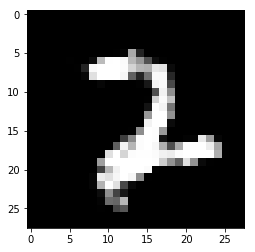

Number batches 468
199(0/468) D: 0.6453, G: 0.6838
199(1/468) D: 0.6646, G: 0.8105
199(2/468) D: 0.6470, G: 1.1407
199(3/468) D: 0.6459, G: 0.9446
199(4/468) D: 0.5815, G: 1.0122
199(5/468) D: 0.5913, G: 1.0798
199(6/468) D: 0.6116, G: 0.8674
199(7/468) D: 0.5677, G: 0.9323
199(8/468) D: 0.6018, G: 1.1250
199(9/468) D: 0.6558, G: 0.9789
199(10/468) D: 0.6745, G: 1.1438
199(11/468) D: 0.6231, G: 0.9045
199(12/468) D: 0.6323, G: 0.9427
199(13/468) D: 0.6412, G: 0.9690
199(14/468) D: 0.5859, G: 0.9384
199(15/468) D: 0.6548, G: 0.8593
199(16/468) D: 0.6729, G: 0.9490
199(17/468) D: 0.6236, G: 0.8829
199(18/468) D: 0.6428, G: 1.0667
199(19/468) D: 0.6016, G: 0.8848
199(20/468) D: 0.6480, G: 0.8637
199(21/468) D: 0.5779, G: 0.8801
199(22/468) D: 0.6102, G: 0.7939
199(23/468) D: 0.5774, G: 0.9431
199(24/468) D: 0.5782, G: 0.9654
199(25/468) D: 0.6332, G: 1.0303
199(26/468) D: 0.6299, G: 0.9437
199(27/468) D: 0.5836, G: 1.1790
199(28/468) D: 0.6234, G: 0.9327
199(29/468) D: 0.6005, G: 0.8123
1

199(244/468) D: 0.6464, G: 0.7963
199(245/468) D: 0.6080, G: 0.9743
199(246/468) D: 0.6350, G: 1.0895
199(247/468) D: 0.5752, G: 0.9628
199(248/468) D: 0.5893, G: 0.9773
199(249/468) D: 0.5980, G: 1.1963
199(250/468) D: 0.6952, G: 0.7624
199(251/468) D: 0.6074, G: 0.7792
199(252/468) D: 0.5792, G: 1.0296
199(253/468) D: 0.5974, G: 1.0752
199(254/468) D: 0.6054, G: 0.9185
199(255/468) D: 0.6565, G: 0.7515
199(256/468) D: 0.6265, G: 0.9482
199(257/468) D: 0.5889, G: 1.0493
199(258/468) D: 0.6214, G: 0.9104
199(259/468) D: 0.5922, G: 0.9370
199(260/468) D: 0.6078, G: 0.7536
199(261/468) D: 0.6203, G: 0.8736
199(262/468) D: 0.6258, G: 1.0119
199(263/468) D: 0.6655, G: 0.8688
199(264/468) D: 0.6231, G: 0.7574
199(265/468) D: 0.6536, G: 0.9980
199(266/468) D: 0.6232, G: 0.9517
199(267/468) D: 0.5813, G: 0.9707
199(268/468) D: 0.6170, G: 0.8920
199(269/468) D: 0.6060, G: 1.0956
199(270/468) D: 0.6538, G: 0.9495
199(271/468) D: 0.6361, G: 0.9230
199(272/468) D: 0.6537, G: 0.9441
199(273/468) D

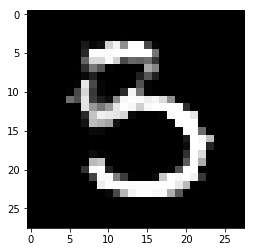

Number batches 468
200(0/468) D: 0.6368, G: 1.0012
200(1/468) D: 0.6409, G: 0.8907
200(2/468) D: 0.5961, G: 1.0454
200(3/468) D: 0.6249, G: 0.8688
200(4/468) D: 0.6238, G: 0.9633
200(5/468) D: 0.5850, G: 0.9865
200(6/468) D: 0.6004, G: 1.1514
200(7/468) D: 0.6531, G: 0.9011
200(8/468) D: 0.6154, G: 0.9694
200(9/468) D: 0.6716, G: 0.9671
200(10/468) D: 0.6578, G: 1.0675
200(11/468) D: 0.5957, G: 0.8939
200(12/468) D: 0.6238, G: 0.8785
200(13/468) D: 0.6533, G: 0.9357
200(14/468) D: 0.5885, G: 0.9681
200(15/468) D: 0.6620, G: 0.8840
200(16/468) D: 0.6550, G: 0.8830
200(17/468) D: 0.6336, G: 0.8969
200(18/468) D: 0.6253, G: 0.9351
200(19/468) D: 0.6277, G: 1.0773
200(20/468) D: 0.5997, G: 1.0209
200(21/468) D: 0.6650, G: 0.9542
200(22/468) D: 0.6574, G: 0.8304
200(23/468) D: 0.5995, G: 0.8613
200(24/468) D: 0.6217, G: 0.9828
200(25/468) D: 0.6760, G: 0.8684
200(26/468) D: 0.6233, G: 0.9646
200(27/468) D: 0.5768, G: 0.9191
200(28/468) D: 0.6586, G: 1.1104
200(29/468) D: 0.6224, G: 0.8108
2

200(244/468) D: 0.6667, G: 0.9571
200(245/468) D: 0.6675, G: 0.9688
200(246/468) D: 0.5707, G: 0.9529
200(247/468) D: 0.5682, G: 1.0876
200(248/468) D: 0.6164, G: 1.0015
200(249/468) D: 0.6395, G: 1.0582
200(250/468) D: 0.6735, G: 0.8457
200(251/468) D: 0.6000, G: 0.8510
200(252/468) D: 0.6227, G: 1.0270
200(253/468) D: 0.6151, G: 0.9590
200(254/468) D: 0.6079, G: 0.9410
200(255/468) D: 0.6287, G: 0.7801
200(256/468) D: 0.6484, G: 0.9521
200(257/468) D: 0.6046, G: 1.0023
200(258/468) D: 0.5963, G: 0.9056
200(259/468) D: 0.6047, G: 0.8852
200(260/468) D: 0.5914, G: 0.9200
200(261/468) D: 0.5831, G: 0.9852
200(262/468) D: 0.6041, G: 0.9996
200(263/468) D: 0.6265, G: 0.9374
200(264/468) D: 0.6510, G: 0.9932
200(265/468) D: 0.6440, G: 0.9076
200(266/468) D: 0.6349, G: 0.8933
200(267/468) D: 0.6027, G: 0.9965
200(268/468) D: 0.6459, G: 0.8175
200(269/468) D: 0.6022, G: 0.9413
200(270/468) D: 0.5945, G: 0.9843
200(271/468) D: 0.6300, G: 0.9441
200(272/468) D: 0.6170, G: 0.9445
200(273/468) D

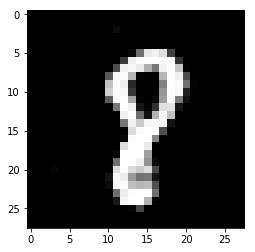

Number batches 468
201(0/468) D: 0.6536, G: 0.8448
201(1/468) D: 0.6325, G: 0.9800
201(2/468) D: 0.6214, G: 0.8923
201(3/468) D: 0.5907, G: 1.1083
201(4/468) D: 0.5801, G: 1.0877
201(5/468) D: 0.6093, G: 0.8439
201(6/468) D: 0.6045, G: 0.9292
201(7/468) D: 0.6146, G: 1.1514
201(8/468) D: 0.5972, G: 0.8486
201(9/468) D: 0.6421, G: 0.8856
201(10/468) D: 0.6428, G: 1.1534
201(11/468) D: 0.5616, G: 1.0539
201(12/468) D: 0.6486, G: 0.8474
201(13/468) D: 0.6613, G: 0.7320
201(14/468) D: 0.6186, G: 1.1158
201(15/468) D: 0.6598, G: 1.0086
201(16/468) D: 0.6206, G: 0.9045
201(17/468) D: 0.6384, G: 0.8278
201(18/468) D: 0.6221, G: 0.9300
201(19/468) D: 0.6342, G: 0.9303
201(20/468) D: 0.5984, G: 0.9156
201(21/468) D: 0.6208, G: 0.9833
201(22/468) D: 0.5923, G: 0.9206
201(23/468) D: 0.5893, G: 0.9254
201(24/468) D: 0.6188, G: 1.0053
201(25/468) D: 0.6313, G: 0.7595
201(26/468) D: 0.6135, G: 1.0938
201(27/468) D: 0.6247, G: 0.9464
201(28/468) D: 0.6064, G: 0.8543
201(29/468) D: 0.6063, G: 1.0332
2

201(244/468) D: 0.5940, G: 0.8897
201(245/468) D: 0.6298, G: 0.9949
201(246/468) D: 0.6303, G: 0.9090
201(247/468) D: 0.5295, G: 0.9075
201(248/468) D: 0.6251, G: 1.1475
201(249/468) D: 0.5727, G: 0.9895
201(250/468) D: 0.6722, G: 0.8718
201(251/468) D: 0.6448, G: 0.9310
201(252/468) D: 0.6090, G: 0.8982
201(253/468) D: 0.5800, G: 0.9769
201(254/468) D: 0.5799, G: 0.8416
201(255/468) D: 0.6544, G: 0.9209
201(256/468) D: 0.6466, G: 0.9560
201(257/468) D: 0.5571, G: 0.9022
201(258/468) D: 0.5851, G: 0.8501
201(259/468) D: 0.6147, G: 1.0323
201(260/468) D: 0.6051, G: 0.9755
201(261/468) D: 0.6237, G: 0.9617
201(262/468) D: 0.6108, G: 0.8969
201(263/468) D: 0.6285, G: 0.8935
201(264/468) D: 0.6244, G: 0.9580
201(265/468) D: 0.6277, G: 1.0048
201(266/468) D: 0.6071, G: 0.8838
201(267/468) D: 0.5722, G: 1.0229
201(268/468) D: 0.6095, G: 1.1096
201(269/468) D: 0.6057, G: 1.0195
201(270/468) D: 0.6128, G: 0.8602
201(271/468) D: 0.6347, G: 0.9305
201(272/468) D: 0.5835, G: 0.8320
201(273/468) D

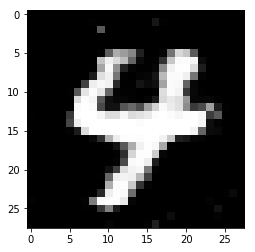

Number batches 468
202(0/468) D: 0.6549, G: 0.9767
202(1/468) D: 0.6193, G: 0.8159
202(2/468) D: 0.6253, G: 1.0386
202(3/468) D: 0.5978, G: 0.9874
202(4/468) D: 0.5997, G: 0.9401
202(5/468) D: 0.6217, G: 0.8235
202(6/468) D: 0.6266, G: 0.9359
202(7/468) D: 0.6050, G: 1.1301
202(8/468) D: 0.6224, G: 0.8164
202(9/468) D: 0.6958, G: 0.9892
202(10/468) D: 0.6592, G: 0.9920
202(11/468) D: 0.6408, G: 1.0076
202(12/468) D: 0.6015, G: 0.9651
202(13/468) D: 0.6338, G: 0.8978
202(14/468) D: 0.6584, G: 1.0579
202(15/468) D: 0.6636, G: 0.8903
202(16/468) D: 0.6334, G: 0.8316
202(17/468) D: 0.6360, G: 0.7864
202(18/468) D: 0.5943, G: 0.9412
202(19/468) D: 0.6107, G: 0.9346
202(20/468) D: 0.6413, G: 0.8176
202(21/468) D: 0.6076, G: 0.9225
202(22/468) D: 0.6452, G: 0.8812
202(23/468) D: 0.6046, G: 0.9709
202(24/468) D: 0.5966, G: 0.9005
202(25/468) D: 0.6412, G: 0.8694
202(26/468) D: 0.6009, G: 0.9062
202(27/468) D: 0.6416, G: 1.1139
202(28/468) D: 0.6271, G: 0.9628
202(29/468) D: 0.6149, G: 0.8281
2

202(245/468) D: 0.6096, G: 1.0445
202(246/468) D: 0.6176, G: 0.8181
202(247/468) D: 0.6089, G: 1.0550
202(248/468) D: 0.6071, G: 1.1628
202(249/468) D: 0.6498, G: 0.9450
202(250/468) D: 0.6826, G: 0.7769
202(251/468) D: 0.6012, G: 0.9496
202(252/468) D: 0.6109, G: 0.9265
202(253/468) D: 0.6142, G: 0.8819
202(254/468) D: 0.6343, G: 0.8681
202(255/468) D: 0.6805, G: 0.8651
202(256/468) D: 0.5931, G: 0.9387
202(257/468) D: 0.6014, G: 0.9973
202(258/468) D: 0.6362, G: 0.9124
202(259/468) D: 0.6073, G: 0.8392
202(260/468) D: 0.6130, G: 0.9659
202(261/468) D: 0.6030, G: 1.0007
202(262/468) D: 0.6462, G: 0.7680
202(263/468) D: 0.6838, G: 0.7643
202(264/468) D: 0.7124, G: 1.1870
202(265/468) D: 0.6490, G: 0.8607
202(266/468) D: 0.6064, G: 0.8052
202(267/468) D: 0.6640, G: 1.1764
202(268/468) D: 0.6853, G: 0.8665
202(269/468) D: 0.6187, G: 0.8477
202(270/468) D: 0.6256, G: 0.9374
202(271/468) D: 0.5955, G: 0.9900
202(272/468) D: 0.6152, G: 0.8931
202(273/468) D: 0.5929, G: 0.9251
202(274/468) D

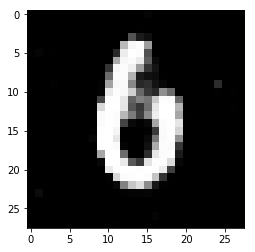

Number batches 468
203(0/468) D: 0.6446, G: 1.0345
203(1/468) D: 0.6427, G: 0.8908
203(2/468) D: 0.6307, G: 0.8177
203(3/468) D: 0.5977, G: 1.0264
203(4/468) D: 0.6160, G: 1.0170
203(5/468) D: 0.6099, G: 1.0433
203(6/468) D: 0.5951, G: 0.9747
203(7/468) D: 0.5755, G: 1.0878
203(8/468) D: 0.5794, G: 0.8436
203(9/468) D: 0.7123, G: 1.0439
203(10/468) D: 0.6400, G: 1.0734
203(11/468) D: 0.6570, G: 0.8590
203(12/468) D: 0.6420, G: 0.9073
203(13/468) D: 0.6267, G: 0.9746
203(14/468) D: 0.6263, G: 0.9500
203(15/468) D: 0.6712, G: 0.9692
203(16/468) D: 0.6596, G: 1.0328
203(17/468) D: 0.6677, G: 0.8006
203(18/468) D: 0.6244, G: 0.8731
203(19/468) D: 0.6153, G: 0.9853
203(20/468) D: 0.6392, G: 0.9865
203(21/468) D: 0.6066, G: 0.9145
203(22/468) D: 0.6419, G: 0.8226
203(23/468) D: 0.5968, G: 0.9179
203(24/468) D: 0.6030, G: 0.9995
203(25/468) D: 0.6382, G: 0.8833
203(26/468) D: 0.6359, G: 0.9954
203(27/468) D: 0.6004, G: 1.0239
203(28/468) D: 0.6098, G: 0.9537
203(29/468) D: 0.6483, G: 1.1004
2

203(245/468) D: 0.6299, G: 1.0176
203(246/468) D: 0.5858, G: 0.8049
203(247/468) D: 0.5619, G: 1.0660
203(248/468) D: 0.6243, G: 0.9831
203(249/468) D: 0.6082, G: 0.9223
203(250/468) D: 0.6582, G: 0.9874
203(251/468) D: 0.6187, G: 0.9608
203(252/468) D: 0.6578, G: 0.9547
203(253/468) D: 0.6016, G: 0.8864
203(254/468) D: 0.6112, G: 0.7620
203(255/468) D: 0.6588, G: 0.9061
203(256/468) D: 0.6062, G: 0.9627
203(257/468) D: 0.5880, G: 0.8991
203(258/468) D: 0.6093, G: 1.0077
203(259/468) D: 0.6252, G: 0.8763
203(260/468) D: 0.5943, G: 0.8798
203(261/468) D: 0.5913, G: 0.9671
203(262/468) D: 0.5916, G: 0.9036
203(263/468) D: 0.6312, G: 0.8233
203(264/468) D: 0.6260, G: 0.9751
203(265/468) D: 0.6544, G: 0.8515
203(266/468) D: 0.6182, G: 0.8736
203(267/468) D: 0.5961, G: 1.0512
203(268/468) D: 0.6162, G: 0.9403
203(269/468) D: 0.6133, G: 0.8913
203(270/468) D: 0.6071, G: 1.0359
203(271/468) D: 0.6488, G: 0.9433
203(272/468) D: 0.6047, G: 0.8750
203(273/468) D: 0.6135, G: 0.9822
203(274/468) D

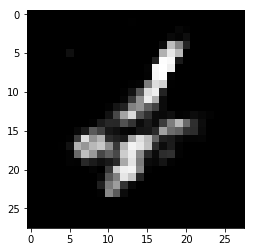

Number batches 468
204(0/468) D: 0.6579, G: 0.7569
204(1/468) D: 0.6682, G: 0.9789
204(2/468) D: 0.6200, G: 1.0487
204(3/468) D: 0.6025, G: 0.9310
204(4/468) D: 0.6062, G: 0.9968
204(5/468) D: 0.6061, G: 1.1506
204(6/468) D: 0.6484, G: 1.0636
204(7/468) D: 0.5767, G: 0.8768
204(8/468) D: 0.6033, G: 1.0073
204(9/468) D: 0.6695, G: 0.8775
204(10/468) D: 0.6379, G: 0.8530
204(11/468) D: 0.5715, G: 1.0092
204(12/468) D: 0.6144, G: 0.9678
204(13/468) D: 0.6420, G: 0.9986
204(14/468) D: 0.6202, G: 0.8835
204(15/468) D: 0.6692, G: 0.9590
204(16/468) D: 0.6143, G: 0.8654
204(17/468) D: 0.6827, G: 0.9131
204(18/468) D: 0.6192, G: 0.9719
204(19/468) D: 0.6289, G: 0.8466
204(20/468) D: 0.5948, G: 0.9059
204(21/468) D: 0.5910, G: 0.9951
204(22/468) D: 0.6486, G: 0.7807
204(23/468) D: 0.6100, G: 0.9632
204(24/468) D: 0.5682, G: 0.8886
204(25/468) D: 0.6404, G: 0.9150
204(26/468) D: 0.5908, G: 0.9672
204(27/468) D: 0.6055, G: 0.9607
204(28/468) D: 0.6413, G: 0.9206
204(29/468) D: 0.6328, G: 0.9581
2

204(245/468) D: 0.6097, G: 1.1780
204(246/468) D: 0.6403, G: 0.8155
204(247/468) D: 0.6085, G: 1.1228
204(248/468) D: 0.6409, G: 0.9338
204(249/468) D: 0.5968, G: 0.9891
204(250/468) D: 0.6286, G: 0.7663
204(251/468) D: 0.6178, G: 1.0120
204(252/468) D: 0.6353, G: 1.0322
204(253/468) D: 0.5984, G: 0.8950
204(254/468) D: 0.6634, G: 0.8279
204(255/468) D: 0.6703, G: 0.8012
204(256/468) D: 0.6335, G: 1.0176
204(257/468) D: 0.5960, G: 1.1743
204(258/468) D: 0.5735, G: 0.8530
204(259/468) D: 0.5927, G: 0.8254
204(260/468) D: 0.6177, G: 0.9530
204(261/468) D: 0.6382, G: 0.9351
204(262/468) D: 0.6387, G: 0.8217
204(263/468) D: 0.6288, G: 0.9046
204(264/468) D: 0.6527, G: 0.9133
204(265/468) D: 0.6238, G: 0.8512
204(266/468) D: 0.6313, G: 0.8753
204(267/468) D: 0.5817, G: 1.0571
204(268/468) D: 0.6059, G: 1.0325
204(269/468) D: 0.5637, G: 0.8684
204(270/468) D: 0.6161, G: 0.9007
204(271/468) D: 0.6072, G: 0.9805
204(272/468) D: 0.6018, G: 1.1728
204(273/468) D: 0.6437, G: 0.8547
204(274/468) D

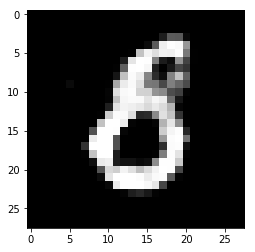

Number batches 468
205(0/468) D: 0.6719, G: 0.9096
205(1/468) D: 0.6252, G: 0.8813
205(2/468) D: 0.6519, G: 1.0107
205(3/468) D: 0.6273, G: 1.1022
205(4/468) D: 0.6101, G: 0.9085
205(5/468) D: 0.6221, G: 0.8852
205(6/468) D: 0.5957, G: 0.9872
205(7/468) D: 0.5761, G: 1.0767
205(8/468) D: 0.6503, G: 0.9194
205(9/468) D: 0.6438, G: 0.8760
205(10/468) D: 0.6773, G: 1.0372
205(11/468) D: 0.6009, G: 1.0325
205(12/468) D: 0.6331, G: 0.7397
205(13/468) D: 0.6154, G: 0.8707
205(14/468) D: 0.6671, G: 1.0284
205(15/468) D: 0.6607, G: 1.0644
205(16/468) D: 0.6301, G: 0.8184
205(17/468) D: 0.6031, G: 0.9029
205(18/468) D: 0.6212, G: 0.9276
205(19/468) D: 0.5791, G: 0.9254
205(20/468) D: 0.6465, G: 1.0241
205(21/468) D: 0.6593, G: 0.8992
205(22/468) D: 0.6322, G: 0.9286
205(23/468) D: 0.5601, G: 0.9842
205(24/468) D: 0.6039, G: 1.0046
205(25/468) D: 0.6615, G: 0.8682
205(26/468) D: 0.5865, G: 0.9318
205(27/468) D: 0.6139, G: 1.0084
205(28/468) D: 0.5865, G: 0.8372
205(29/468) D: 0.6322, G: 1.0365
2

205(244/468) D: 0.6374, G: 0.9411
205(245/468) D: 0.6390, G: 0.9689
205(246/468) D: 0.5828, G: 0.9749
205(247/468) D: 0.5912, G: 0.8978
205(248/468) D: 0.6241, G: 1.2779
205(249/468) D: 0.6014, G: 0.9418
205(250/468) D: 0.6847, G: 0.8312
205(251/468) D: 0.6396, G: 0.9502
205(252/468) D: 0.6539, G: 1.1163
205(253/468) D: 0.6104, G: 0.8962
205(254/468) D: 0.6291, G: 0.8137
205(255/468) D: 0.6476, G: 0.8838
205(256/468) D: 0.5978, G: 1.0239
205(257/468) D: 0.5760, G: 1.0058
205(258/468) D: 0.6169, G: 0.9217
205(259/468) D: 0.6182, G: 0.9243
205(260/468) D: 0.6364, G: 0.9240
205(261/468) D: 0.6166, G: 0.9849
205(262/468) D: 0.5977, G: 0.9004
205(263/468) D: 0.6455, G: 0.9361
205(264/468) D: 0.6269, G: 0.9438
205(265/468) D: 0.5948, G: 0.9642
205(266/468) D: 0.5983, G: 0.8403
205(267/468) D: 0.6002, G: 1.0800
205(268/468) D: 0.6143, G: 0.8069
205(269/468) D: 0.6265, G: 0.8818
205(270/468) D: 0.6337, G: 0.9603
205(271/468) D: 0.6392, G: 0.9711
205(272/468) D: 0.6181, G: 0.9512
205(273/468) D

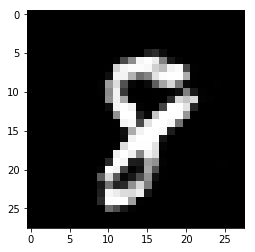

Number batches 468
206(0/468) D: 0.6263, G: 0.9442
206(1/468) D: 0.6227, G: 0.9695
206(2/468) D: 0.6177, G: 0.8048
206(3/468) D: 0.5972, G: 1.0403
206(4/468) D: 0.6124, G: 0.9556
206(5/468) D: 0.6002, G: 0.8532
206(6/468) D: 0.6209, G: 0.8392
206(7/468) D: 0.6112, G: 0.9330
206(8/468) D: 0.6183, G: 1.0360
206(9/468) D: 0.6662, G: 0.9450
206(10/468) D: 0.6914, G: 0.9829
206(11/468) D: 0.6248, G: 1.0001
206(12/468) D: 0.6211, G: 0.8729
206(13/468) D: 0.6563, G: 0.8476
206(14/468) D: 0.6022, G: 0.9795
206(15/468) D: 0.6275, G: 0.9654
206(16/468) D: 0.6100, G: 0.9466
206(17/468) D: 0.6450, G: 0.8666
206(18/468) D: 0.6212, G: 0.9130
206(19/468) D: 0.5980, G: 0.9173
206(20/468) D: 0.6225, G: 0.9621
206(21/468) D: 0.6205, G: 0.9431
206(22/468) D: 0.6423, G: 0.9135
206(23/468) D: 0.5719, G: 0.8832
206(24/468) D: 0.5908, G: 0.9754
206(25/468) D: 0.6215, G: 0.8880
206(26/468) D: 0.6157, G: 1.0643
206(27/468) D: 0.5871, G: 0.9783
206(28/468) D: 0.6106, G: 1.1010
206(29/468) D: 0.6145, G: 0.9940
2

206(245/468) D: 0.6154, G: 1.1355
206(246/468) D: 0.5992, G: 1.0217
206(247/468) D: 0.5908, G: 1.0138
206(248/468) D: 0.5956, G: 0.9617
206(249/468) D: 0.6052, G: 1.2330
206(250/468) D: 0.6709, G: 0.7553
206(251/468) D: 0.6253, G: 0.9288
206(252/468) D: 0.6559, G: 0.9964
206(253/468) D: 0.6174, G: 0.8756
206(254/468) D: 0.5975, G: 0.9759
206(255/468) D: 0.7190, G: 0.8088
206(256/468) D: 0.6505, G: 0.9214
206(257/468) D: 0.6552, G: 1.1454
206(258/468) D: 0.6162, G: 1.0169
206(259/468) D: 0.6162, G: 0.8516
206(260/468) D: 0.6362, G: 0.8734
206(261/468) D: 0.5928, G: 1.0665
206(262/468) D: 0.6336, G: 0.9750
206(263/468) D: 0.6237, G: 0.7699
206(264/468) D: 0.6375, G: 0.8973
206(265/468) D: 0.6087, G: 0.8499
206(266/468) D: 0.5878, G: 0.8718
206(267/468) D: 0.5957, G: 1.1100
206(268/468) D: 0.6323, G: 0.9439
206(269/468) D: 0.5860, G: 0.9078
206(270/468) D: 0.6325, G: 0.9731
206(271/468) D: 0.6372, G: 0.9581
206(272/468) D: 0.6060, G: 0.8433
206(273/468) D: 0.6199, G: 1.1314
206(274/468) D

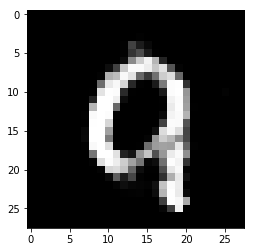

Number batches 468
207(0/468) D: 0.6448, G: 0.9864
207(1/468) D: 0.6373, G: 1.0006
207(2/468) D: 0.6166, G: 0.8107
207(3/468) D: 0.6366, G: 1.1082
207(4/468) D: 0.5874, G: 1.1455
207(5/468) D: 0.5969, G: 0.9443
207(6/468) D: 0.6081, G: 1.0093
207(7/468) D: 0.5800, G: 1.2477
207(8/468) D: 0.5918, G: 0.9259
207(9/468) D: 0.6524, G: 0.8413
207(10/468) D: 0.6880, G: 1.1858
207(11/468) D: 0.6192, G: 1.0745
207(12/468) D: 0.5950, G: 0.7613
207(13/468) D: 0.6759, G: 1.0517
207(14/468) D: 0.6291, G: 1.0728
207(15/468) D: 0.6725, G: 0.9003
207(16/468) D: 0.6205, G: 0.8658
207(17/468) D: 0.6203, G: 0.9054
207(18/468) D: 0.6304, G: 0.9831
207(19/468) D: 0.6244, G: 0.9548
207(20/468) D: 0.6009, G: 0.8471
207(21/468) D: 0.5971, G: 0.9041
207(22/468) D: 0.6209, G: 0.9929
207(23/468) D: 0.5684, G: 0.9404
207(24/468) D: 0.5921, G: 0.9579
207(25/468) D: 0.6252, G: 0.8633
207(26/468) D: 0.5998, G: 0.9883
207(27/468) D: 0.5766, G: 1.0550
207(28/468) D: 0.6399, G: 0.9696
207(29/468) D: 0.6221, G: 0.8514
2

207(244/468) D: 0.5930, G: 0.8854
207(245/468) D: 0.6097, G: 1.0165
207(246/468) D: 0.5898, G: 0.8906
207(247/468) D: 0.5759, G: 0.9928
207(248/468) D: 0.6144, G: 1.2310
207(249/468) D: 0.6263, G: 0.9237
207(250/468) D: 0.6652, G: 0.7063
207(251/468) D: 0.6325, G: 0.8734
207(252/468) D: 0.6484, G: 1.0039
207(253/468) D: 0.6204, G: 0.8453
207(254/468) D: 0.6371, G: 0.8409
207(255/468) D: 0.6953, G: 0.9578
207(256/468) D: 0.6488, G: 0.8964
207(257/468) D: 0.6146, G: 0.9280
207(258/468) D: 0.6253, G: 0.9254
207(259/468) D: 0.6040, G: 0.9596
207(260/468) D: 0.5867, G: 0.8537
207(261/468) D: 0.6362, G: 0.9221
207(262/468) D: 0.6060, G: 0.8066
207(263/468) D: 0.6561, G: 0.9588
207(264/468) D: 0.6565, G: 0.9144
207(265/468) D: 0.6282, G: 0.8677
207(266/468) D: 0.6264, G: 0.9364
207(267/468) D: 0.6167, G: 1.0306
207(268/468) D: 0.6587, G: 0.9137
207(269/468) D: 0.6219, G: 0.9049
207(270/468) D: 0.6423, G: 0.9419
207(271/468) D: 0.6306, G: 0.9641
207(272/468) D: 0.5925, G: 0.8511
207(273/468) D

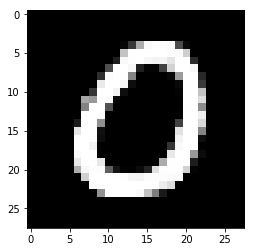

Number batches 468
208(0/468) D: 0.6612, G: 0.8698
208(1/468) D: 0.6603, G: 0.9318
208(2/468) D: 0.6254, G: 1.1588
208(3/468) D: 0.6233, G: 0.8662
208(4/468) D: 0.6062, G: 0.9940
208(5/468) D: 0.6091, G: 1.0104
208(6/468) D: 0.5679, G: 0.8688
208(7/468) D: 0.5893, G: 0.9833
208(8/468) D: 0.5987, G: 0.9934
208(9/468) D: 0.7091, G: 0.8860
208(10/468) D: 0.6536, G: 0.9721
208(11/468) D: 0.5935, G: 0.8250
208(12/468) D: 0.6148, G: 0.9312
208(13/468) D: 0.5885, G: 1.0087
208(14/468) D: 0.6116, G: 0.9430
208(15/468) D: 0.6489, G: 0.9908
208(16/468) D: 0.6339, G: 0.9320
208(17/468) D: 0.5937, G: 0.8143
208(18/468) D: 0.5759, G: 0.9405
208(19/468) D: 0.6338, G: 0.9107
208(20/468) D: 0.6016, G: 0.9655
208(21/468) D: 0.6185, G: 0.9996
208(22/468) D: 0.6389, G: 0.9806
208(23/468) D: 0.6229, G: 0.9404
208(24/468) D: 0.6041, G: 0.9476
208(25/468) D: 0.6816, G: 0.8889
208(26/468) D: 0.6254, G: 0.9272
208(27/468) D: 0.6220, G: 0.8853
208(28/468) D: 0.6196, G: 0.9394
208(29/468) D: 0.5932, G: 0.9754
2

208(244/468) D: 0.6098, G: 0.8635
208(245/468) D: 0.6169, G: 0.8509
208(246/468) D: 0.5837, G: 0.9141
208(247/468) D: 0.5963, G: 0.9941
208(248/468) D: 0.6105, G: 1.0127
208(249/468) D: 0.5608, G: 1.0241
208(250/468) D: 0.6661, G: 0.7963
208(251/468) D: 0.6354, G: 0.8933
208(252/468) D: 0.6353, G: 1.2350
208(253/468) D: 0.6316, G: 0.9548
208(254/468) D: 0.6201, G: 0.7742
208(255/468) D: 0.6513, G: 0.8435
208(256/468) D: 0.6052, G: 0.8942
208(257/468) D: 0.5852, G: 1.0240
208(258/468) D: 0.5612, G: 1.0460
208(259/468) D: 0.6079, G: 0.8992
208(260/468) D: 0.6248, G: 0.9389
208(261/468) D: 0.5962, G: 0.8659
208(262/468) D: 0.6261, G: 0.9966
208(263/468) D: 0.6387, G: 0.7752
208(264/468) D: 0.6786, G: 0.9684
208(265/468) D: 0.5913, G: 1.0678
208(266/468) D: 0.6197, G: 0.9632
208(267/468) D: 0.6359, G: 0.8798
208(268/468) D: 0.6483, G: 0.8440
208(269/468) D: 0.5720, G: 1.1126
208(270/468) D: 0.6348, G: 0.8889
208(271/468) D: 0.6224, G: 1.0237
208(272/468) D: 0.6081, G: 0.9767
208(273/468) D

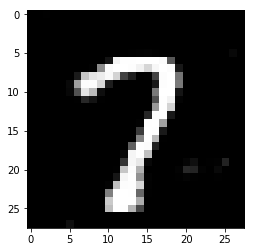

Number batches 468
209(0/468) D: 0.6484, G: 0.9707
209(1/468) D: 0.6484, G: 0.9879
209(2/468) D: 0.6433, G: 0.9163
209(3/468) D: 0.6541, G: 1.0766
209(4/468) D: 0.5750, G: 0.9443
209(5/468) D: 0.6381, G: 0.8831
209(6/468) D: 0.5772, G: 1.0051
209(7/468) D: 0.5704, G: 1.0409
209(8/468) D: 0.5893, G: 0.9671
209(9/468) D: 0.6589, G: 0.8584
209(10/468) D: 0.6589, G: 0.8623
209(11/468) D: 0.5758, G: 0.9850
209(12/468) D: 0.6030, G: 0.9916
209(13/468) D: 0.6652, G: 0.8526
209(14/468) D: 0.5910, G: 0.9593
209(15/468) D: 0.6370, G: 0.9997
209(16/468) D: 0.6422, G: 0.8907
209(17/468) D: 0.6772, G: 0.8792
209(18/468) D: 0.6277, G: 0.9420
209(19/468) D: 0.6031, G: 0.9193
209(20/468) D: 0.6178, G: 0.9980
209(21/468) D: 0.5945, G: 0.8214
209(22/468) D: 0.6081, G: 0.9008
209(23/468) D: 0.5816, G: 1.0126
209(24/468) D: 0.5844, G: 1.0408
209(25/468) D: 0.6392, G: 0.9815
209(26/468) D: 0.6031, G: 1.2014
209(27/468) D: 0.6211, G: 0.9270
209(28/468) D: 0.6374, G: 0.8626
209(29/468) D: 0.6493, G: 1.0328
2

209(245/468) D: 0.6076, G: 0.9035
209(246/468) D: 0.6239, G: 1.0018
209(247/468) D: 0.5560, G: 1.1823
209(248/468) D: 0.6396, G: 0.7442
209(249/468) D: 0.6230, G: 1.0792
209(250/468) D: 0.6767, G: 0.8744
209(251/468) D: 0.6041, G: 1.0684
209(252/468) D: 0.6546, G: 1.0522
209(253/468) D: 0.6018, G: 1.0050
209(254/468) D: 0.6336, G: 0.8610
209(255/468) D: 0.6641, G: 0.8636
209(256/468) D: 0.6476, G: 0.9635
209(257/468) D: 0.6166, G: 1.0471
209(258/468) D: 0.6116, G: 0.9272
209(259/468) D: 0.5912, G: 0.7588
209(260/468) D: 0.6338, G: 0.9449
209(261/468) D: 0.5958, G: 0.9009
209(262/468) D: 0.6073, G: 0.8775
209(263/468) D: 0.6802, G: 0.9384
209(264/468) D: 0.6243, G: 0.8773
209(265/468) D: 0.6254, G: 0.7862
209(266/468) D: 0.6371, G: 0.9872
209(267/468) D: 0.6201, G: 0.7865
209(268/468) D: 0.6124, G: 0.9306
209(269/468) D: 0.5881, G: 1.0771
209(270/468) D: 0.6134, G: 0.9228
209(271/468) D: 0.6116, G: 0.8549
209(272/468) D: 0.5976, G: 1.0508
209(273/468) D: 0.6144, G: 1.1060
209(274/468) D

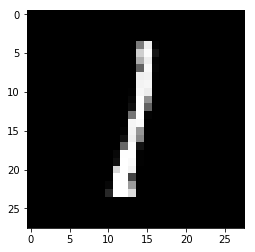

Number batches 468
210(0/468) D: 0.6052, G: 0.8676
210(1/468) D: 0.6403, G: 0.9553
210(2/468) D: 0.6736, G: 1.1104
210(3/468) D: 0.6013, G: 1.0338
210(4/468) D: 0.5816, G: 0.8861
210(5/468) D: 0.6297, G: 0.9978
210(6/468) D: 0.5559, G: 1.0859
210(7/468) D: 0.6171, G: 0.8128
210(8/468) D: 0.6140, G: 0.9827
210(9/468) D: 0.7122, G: 1.0835
210(10/468) D: 0.6287, G: 1.0131
210(11/468) D: 0.6333, G: 0.9764
210(12/468) D: 0.5953, G: 0.9415
210(13/468) D: 0.6638, G: 0.8585
210(14/468) D: 0.6147, G: 0.9288
210(15/468) D: 0.6533, G: 1.0402
210(16/468) D: 0.6279, G: 0.8479
210(17/468) D: 0.6668, G: 0.9144
210(18/468) D: 0.5935, G: 1.0908
210(19/468) D: 0.6476, G: 0.8545
210(20/468) D: 0.6196, G: 0.9108
210(21/468) D: 0.6149, G: 1.0928
210(22/468) D: 0.6192, G: 0.9121
210(23/468) D: 0.5804, G: 1.0054
210(24/468) D: 0.6064, G: 0.9390
210(25/468) D: 0.6025, G: 0.8269
210(26/468) D: 0.5993, G: 0.8987
210(27/468) D: 0.5931, G: 1.1038
210(28/468) D: 0.5911, G: 0.8114
210(29/468) D: 0.6261, G: 0.9278
2

210(245/468) D: 0.6198, G: 0.8142
210(246/468) D: 0.5931, G: 1.0297
210(247/468) D: 0.5737, G: 1.1094
210(248/468) D: 0.5939, G: 1.0775
210(249/468) D: 0.6388, G: 1.0582
210(250/468) D: 0.6672, G: 0.8782
210(251/468) D: 0.6400, G: 0.9095
210(252/468) D: 0.6198, G: 0.9381
210(253/468) D: 0.6051, G: 1.0824
210(254/468) D: 0.6212, G: 0.7902
210(255/468) D: 0.6573, G: 0.7318
210(256/468) D: 0.6332, G: 0.9221
210(257/468) D: 0.5903, G: 1.1290
210(258/468) D: 0.6219, G: 0.9788
210(259/468) D: 0.5914, G: 0.8623
210(260/468) D: 0.5864, G: 0.8851
210(261/468) D: 0.6021, G: 1.0160
210(262/468) D: 0.6239, G: 0.8759
210(263/468) D: 0.6856, G: 0.8883
210(264/468) D: 0.6320, G: 0.9905
210(265/468) D: 0.6223, G: 0.9457
210(266/468) D: 0.5828, G: 0.8886
210(267/468) D: 0.6290, G: 1.0350
210(268/468) D: 0.5797, G: 0.9181
210(269/468) D: 0.5905, G: 1.0285
210(270/468) D: 0.6319, G: 0.9079
210(271/468) D: 0.6240, G: 0.9715
210(272/468) D: 0.6012, G: 1.0189
210(273/468) D: 0.5993, G: 0.9992
210(274/468) D

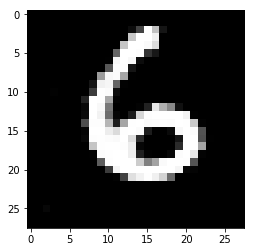

Number batches 468
211(0/468) D: 0.6624, G: 0.7111
211(1/468) D: 0.6848, G: 0.8697
211(2/468) D: 0.6470, G: 1.0516
211(3/468) D: 0.6114, G: 0.9652
211(4/468) D: 0.5883, G: 0.8383
211(5/468) D: 0.6015, G: 0.9339
211(6/468) D: 0.5651, G: 1.0332
211(7/468) D: 0.5948, G: 1.1513
211(8/468) D: 0.6317, G: 0.8231
211(9/468) D: 0.6800, G: 0.9731
211(10/468) D: 0.6317, G: 1.1563
211(11/468) D: 0.6079, G: 0.9971
211(12/468) D: 0.6273, G: 0.9071
211(13/468) D: 0.6113, G: 0.8615
211(14/468) D: 0.6147, G: 0.9857
211(15/468) D: 0.6341, G: 0.9573
211(16/468) D: 0.6676, G: 0.8888
211(17/468) D: 0.6287, G: 0.8883
211(18/468) D: 0.5531, G: 0.8944
211(19/468) D: 0.5954, G: 0.8611
211(20/468) D: 0.5660, G: 0.9088
211(21/468) D: 0.6141, G: 0.9880
211(22/468) D: 0.6341, G: 0.9181
211(23/468) D: 0.5842, G: 0.9028
211(24/468) D: 0.5764, G: 1.0001
211(25/468) D: 0.6438, G: 0.9306
211(26/468) D: 0.5941, G: 0.8889
211(27/468) D: 0.6477, G: 1.0159
211(28/468) D: 0.6535, G: 1.0657
211(29/468) D: 0.5991, G: 1.0194
2

211(245/468) D: 0.6120, G: 0.9596
211(246/468) D: 0.5832, G: 0.9536
211(247/468) D: 0.5445, G: 1.1020
211(248/468) D: 0.6152, G: 0.9008
211(249/468) D: 0.6070, G: 1.1426
211(250/468) D: 0.7128, G: 0.9443
211(251/468) D: 0.6442, G: 0.8756
211(252/468) D: 0.6648, G: 0.9404
211(253/468) D: 0.6107, G: 1.0124
211(254/468) D: 0.5863, G: 0.8850
211(255/468) D: 0.6599, G: 0.8581
211(256/468) D: 0.6538, G: 0.9229
211(257/468) D: 0.5985, G: 0.9250
211(258/468) D: 0.6327, G: 0.9168
211(259/468) D: 0.6295, G: 0.9357
211(260/468) D: 0.6538, G: 0.9631
211(261/468) D: 0.5866, G: 0.9267
211(262/468) D: 0.5903, G: 0.7549
211(263/468) D: 0.6336, G: 0.9908
211(264/468) D: 0.6520, G: 1.0276
211(265/468) D: 0.6251, G: 0.8300
211(266/468) D: 0.6642, G: 1.0961
211(267/468) D: 0.6220, G: 0.8577
211(268/468) D: 0.6040, G: 0.9758
211(269/468) D: 0.5859, G: 0.9352
211(270/468) D: 0.6220, G: 0.8882
211(271/468) D: 0.6483, G: 0.9291
211(272/468) D: 0.5979, G: 0.9240
211(273/468) D: 0.6096, G: 0.9169
211(274/468) D

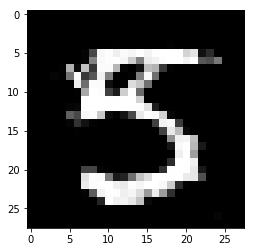

Number batches 468
212(0/468) D: 0.6393, G: 0.8532
212(1/468) D: 0.6574, G: 0.8686
212(2/468) D: 0.6717, G: 0.9450
212(3/468) D: 0.6060, G: 0.9670
212(4/468) D: 0.5961, G: 1.1210
212(5/468) D: 0.6302, G: 0.9862
212(6/468) D: 0.5545, G: 0.8898
212(7/468) D: 0.5920, G: 0.9555
212(8/468) D: 0.6177, G: 1.0155
212(9/468) D: 0.6618, G: 0.9859
212(10/468) D: 0.6174, G: 0.9457
212(11/468) D: 0.6209, G: 1.1280
212(12/468) D: 0.6283, G: 0.9699
212(13/468) D: 0.6029, G: 0.8856
212(14/468) D: 0.6615, G: 1.0642
212(15/468) D: 0.6669, G: 0.9652
212(16/468) D: 0.6184, G: 0.8064
212(17/468) D: 0.6280, G: 0.8822
212(18/468) D: 0.6089, G: 0.9571
212(19/468) D: 0.6285, G: 1.1476
212(20/468) D: 0.6505, G: 0.7787
212(21/468) D: 0.6297, G: 0.9168
212(22/468) D: 0.6108, G: 0.9518
212(23/468) D: 0.5691, G: 1.0108
212(24/468) D: 0.6075, G: 0.9573
212(25/468) D: 0.6172, G: 0.7785
212(26/468) D: 0.6277, G: 1.0040
212(27/468) D: 0.6070, G: 1.0874
212(28/468) D: 0.6291, G: 0.9055
212(29/468) D: 0.6213, G: 0.8432
2

212(244/468) D: 0.6695, G: 1.0388
212(245/468) D: 0.6500, G: 0.9183
212(246/468) D: 0.6036, G: 0.8836
212(247/468) D: 0.5860, G: 1.0003
212(248/468) D: 0.5817, G: 0.9223
212(249/468) D: 0.5913, G: 1.1452
212(250/468) D: 0.6497, G: 1.0068
212(251/468) D: 0.6004, G: 0.9014
212(252/468) D: 0.6333, G: 1.0202
212(253/468) D: 0.6147, G: 1.0087
212(254/468) D: 0.6022, G: 0.9968
212(255/468) D: 0.6500, G: 0.7271
212(256/468) D: 0.6433, G: 0.8807
212(257/468) D: 0.5683, G: 1.2120
212(258/468) D: 0.6370, G: 0.7921
212(259/468) D: 0.6058, G: 0.9287
212(260/468) D: 0.6265, G: 1.0142
212(261/468) D: 0.6198, G: 0.9230
212(262/468) D: 0.6090, G: 0.8692
212(263/468) D: 0.6756, G: 0.9379
212(264/468) D: 0.6552, G: 0.8820
212(265/468) D: 0.6230, G: 0.9637
212(266/468) D: 0.6016, G: 1.0048
212(267/468) D: 0.6263, G: 0.8635
212(268/468) D: 0.6218, G: 0.8934
212(269/468) D: 0.6285, G: 1.0982
212(270/468) D: 0.6229, G: 0.9197
212(271/468) D: 0.6102, G: 0.9439
212(272/468) D: 0.6396, G: 1.0931
212(273/468) D

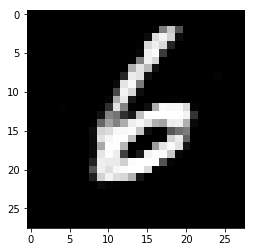

Number batches 468
213(0/468) D: 0.6515, G: 0.7154
213(1/468) D: 0.6735, G: 0.9143
213(2/468) D: 0.6302, G: 1.0308
213(3/468) D: 0.6296, G: 0.9111
213(4/468) D: 0.5947, G: 1.0144
213(5/468) D: 0.6218, G: 0.8856
213(6/468) D: 0.5808, G: 0.9531
213(7/468) D: 0.5963, G: 1.0205
213(8/468) D: 0.5911, G: 1.0832
213(9/468) D: 0.6545, G: 0.8851
213(10/468) D: 0.6449, G: 1.0626
213(11/468) D: 0.5925, G: 1.1206
213(12/468) D: 0.6666, G: 0.9321
213(13/468) D: 0.6450, G: 0.8689
213(14/468) D: 0.6263, G: 0.9352
213(15/468) D: 0.6645, G: 0.9331
213(16/468) D: 0.6198, G: 0.8136
213(17/468) D: 0.6131, G: 0.8553
213(18/468) D: 0.6071, G: 0.9941
213(19/468) D: 0.6441, G: 0.9498
213(20/468) D: 0.5972, G: 0.9355
213(21/468) D: 0.6525, G: 0.9116
213(22/468) D: 0.6436, G: 0.8642
213(23/468) D: 0.6040, G: 0.9982
213(24/468) D: 0.5496, G: 0.9045
213(25/468) D: 0.6733, G: 0.9731
213(26/468) D: 0.6152, G: 0.9894
213(27/468) D: 0.5618, G: 0.9920
213(28/468) D: 0.6300, G: 0.9249
213(29/468) D: 0.6346, G: 1.0532
2

213(245/468) D: 0.6292, G: 0.9733
213(246/468) D: 0.6045, G: 1.0425
213(247/468) D: 0.5570, G: 0.9623
213(248/468) D: 0.6001, G: 0.8750
213(249/468) D: 0.6061, G: 0.9911
213(250/468) D: 0.6160, G: 0.8409
213(251/468) D: 0.6193, G: 0.8724
213(252/468) D: 0.6500, G: 1.0663
213(253/468) D: 0.6667, G: 1.1406
213(254/468) D: 0.6474, G: 0.7263
213(255/468) D: 0.6828, G: 0.8089
213(256/468) D: 0.6287, G: 1.0649
213(257/468) D: 0.6238, G: 1.0480
213(258/468) D: 0.6341, G: 0.7984
213(259/468) D: 0.5728, G: 0.8094
213(260/468) D: 0.6134, G: 1.0228
213(261/468) D: 0.6127, G: 0.9475
213(262/468) D: 0.6324, G: 0.8661
213(263/468) D: 0.6503, G: 0.8876
213(264/468) D: 0.6473, G: 0.9586
213(265/468) D: 0.6305, G: 0.9491
213(266/468) D: 0.6049, G: 0.9255
213(267/468) D: 0.5872, G: 1.0196
213(268/468) D: 0.5985, G: 0.8447
213(269/468) D: 0.6574, G: 1.0459
213(270/468) D: 0.6432, G: 0.8574
213(271/468) D: 0.6276, G: 0.9173
213(272/468) D: 0.6481, G: 1.0974
213(273/468) D: 0.6593, G: 0.8591
213(274/468) D

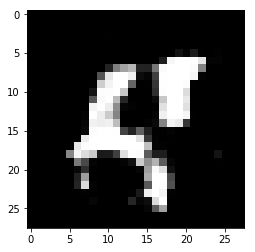

Number batches 468
214(0/468) D: 0.6590, G: 0.8181
214(1/468) D: 0.6590, G: 0.9549
214(2/468) D: 0.6575, G: 0.9669
214(3/468) D: 0.6358, G: 0.9018
214(4/468) D: 0.6096, G: 1.0669
214(5/468) D: 0.5855, G: 0.9062
214(6/468) D: 0.5912, G: 1.0538
214(7/468) D: 0.6144, G: 1.0892
214(8/468) D: 0.6263, G: 0.8692
214(9/468) D: 0.7012, G: 0.8975
214(10/468) D: 0.6651, G: 0.8970
214(11/468) D: 0.6042, G: 1.0076
214(12/468) D: 0.6005, G: 0.9617
214(13/468) D: 0.6378, G: 0.9424
214(14/468) D: 0.5981, G: 0.9034
214(15/468) D: 0.6459, G: 0.9275
214(16/468) D: 0.6518, G: 0.8980
214(17/468) D: 0.6290, G: 0.9276
214(18/468) D: 0.6310, G: 1.0129
214(19/468) D: 0.5734, G: 0.9255
214(20/468) D: 0.6076, G: 0.8745
214(21/468) D: 0.6414, G: 0.9782
214(22/468) D: 0.6312, G: 0.9767
214(23/468) D: 0.5962, G: 0.9171
214(24/468) D: 0.5952, G: 0.8933
214(25/468) D: 0.6557, G: 0.9625
214(26/468) D: 0.5970, G: 0.8846
214(27/468) D: 0.5645, G: 1.0712
214(28/468) D: 0.6354, G: 0.9217
214(29/468) D: 0.6087, G: 0.9133
2

214(244/468) D: 0.6799, G: 0.9671
214(245/468) D: 0.6305, G: 1.1069
214(246/468) D: 0.6061, G: 0.8701
214(247/468) D: 0.5853, G: 0.9604
214(248/468) D: 0.6352, G: 1.1942
214(249/468) D: 0.6263, G: 0.9215
214(250/468) D: 0.6468, G: 0.8923
214(251/468) D: 0.6226, G: 0.7973
214(252/468) D: 0.6306, G: 1.0380
214(253/468) D: 0.5574, G: 1.0756
214(254/468) D: 0.6230, G: 0.9100
214(255/468) D: 0.6526, G: 0.8764
214(256/468) D: 0.6276, G: 0.9342
214(257/468) D: 0.5674, G: 1.1195
214(258/468) D: 0.6128, G: 0.9901
214(259/468) D: 0.5793, G: 0.9655
214(260/468) D: 0.6318, G: 0.8969
214(261/468) D: 0.5800, G: 0.8541
214(262/468) D: 0.6285, G: 0.8630
214(263/468) D: 0.6576, G: 0.7423
214(264/468) D: 0.6447, G: 0.8618
214(265/468) D: 0.6278, G: 0.8388
214(266/468) D: 0.6045, G: 0.9950
214(267/468) D: 0.6164, G: 0.9998
214(268/468) D: 0.6372, G: 0.9218
214(269/468) D: 0.6059, G: 0.8647
214(270/468) D: 0.6114, G: 0.7828
214(271/468) D: 0.6080, G: 0.8091
214(272/468) D: 0.6452, G: 1.0520
214(273/468) D

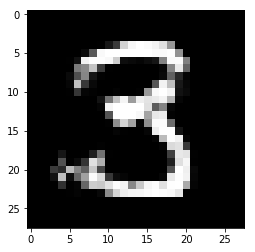

Number batches 468
215(0/468) D: 0.6572, G: 0.7685
215(1/468) D: 0.6328, G: 0.8583
215(2/468) D: 0.6184, G: 0.9853
215(3/468) D: 0.6158, G: 0.9726
215(4/468) D: 0.5844, G: 0.9408
215(5/468) D: 0.6423, G: 0.9772
215(6/468) D: 0.5951, G: 1.0636
215(7/468) D: 0.6126, G: 0.9477
215(8/468) D: 0.6299, G: 0.8515
215(9/468) D: 0.6895, G: 0.9927
215(10/468) D: 0.6677, G: 0.9782
215(11/468) D: 0.6305, G: 0.8573
215(12/468) D: 0.6088, G: 0.9325
215(13/468) D: 0.6267, G: 0.9110
215(14/468) D: 0.5774, G: 0.9830
215(15/468) D: 0.6966, G: 0.9009
215(16/468) D: 0.6478, G: 0.8659
215(17/468) D: 0.6524, G: 0.8990
215(18/468) D: 0.6028, G: 0.9120
215(19/468) D: 0.6174, G: 1.0077
215(20/468) D: 0.6168, G: 0.8468
215(21/468) D: 0.5880, G: 0.8888
215(22/468) D: 0.6390, G: 1.0566
215(23/468) D: 0.5735, G: 1.0226
215(24/468) D: 0.5554, G: 0.8054
215(25/468) D: 0.6312, G: 1.0257
215(26/468) D: 0.6346, G: 1.1091
215(27/468) D: 0.5923, G: 0.9399
215(28/468) D: 0.6128, G: 0.8504
215(29/468) D: 0.6376, G: 1.0922
2

215(244/468) D: 0.6128, G: 1.1039
215(245/468) D: 0.6077, G: 0.9679
215(246/468) D: 0.5852, G: 0.9022
215(247/468) D: 0.5891, G: 1.2465
215(248/468) D: 0.5865, G: 1.0568
215(249/468) D: 0.6084, G: 1.2140
215(250/468) D: 0.6598, G: 0.7856
215(251/468) D: 0.6232, G: 0.9514
215(252/468) D: 0.6100, G: 1.1350
215(253/468) D: 0.5730, G: 0.9905
215(254/468) D: 0.6099, G: 0.8884
215(255/468) D: 0.7485, G: 0.8657
215(256/468) D: 0.6303, G: 0.9498
215(257/468) D: 0.6174, G: 0.8966
215(258/468) D: 0.6159, G: 0.9278
215(259/468) D: 0.5799, G: 0.9724
215(260/468) D: 0.6307, G: 0.9313
215(261/468) D: 0.6227, G: 1.0037
215(262/468) D: 0.6249, G: 0.9585
215(263/468) D: 0.6250, G: 0.9031
215(264/468) D: 0.5973, G: 0.8709
215(265/468) D: 0.6286, G: 0.9352
215(266/468) D: 0.6134, G: 0.8562
215(267/468) D: 0.6205, G: 0.9332
215(268/468) D: 0.6723, G: 1.0058
215(269/468) D: 0.5761, G: 0.8225
215(270/468) D: 0.6287, G: 0.9249
215(271/468) D: 0.6405, G: 1.0166
215(272/468) D: 0.6052, G: 0.8543
215(273/468) D

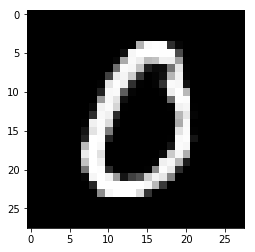

Number batches 468
216(0/468) D: 0.6761, G: 0.8332
216(1/468) D: 0.6393, G: 1.0684
216(2/468) D: 0.6674, G: 0.8731
216(3/468) D: 0.6381, G: 0.8463
216(4/468) D: 0.5937, G: 0.9540
216(5/468) D: 0.6044, G: 1.1128
216(6/468) D: 0.6160, G: 0.9496
216(7/468) D: 0.5862, G: 0.9263
216(8/468) D: 0.5877, G: 1.0243
216(9/468) D: 0.6452, G: 0.9367
216(10/468) D: 0.6089, G: 1.0436
216(11/468) D: 0.6280, G: 1.1136
216(12/468) D: 0.5980, G: 0.8829
216(13/468) D: 0.6957, G: 0.9113
216(14/468) D: 0.6055, G: 1.0329
216(15/468) D: 0.6590, G: 0.8175
216(16/468) D: 0.6425, G: 0.8896
216(17/468) D: 0.6492, G: 0.9514
216(18/468) D: 0.6042, G: 0.8653
216(19/468) D: 0.6545, G: 0.9108
216(20/468) D: 0.5942, G: 1.0647
216(21/468) D: 0.6199, G: 1.0219
216(22/468) D: 0.6059, G: 0.9104
216(23/468) D: 0.5816, G: 0.9570
216(24/468) D: 0.5837, G: 0.9759
216(25/468) D: 0.6570, G: 0.8622
216(26/468) D: 0.5692, G: 1.0119
216(27/468) D: 0.5691, G: 1.0809
216(28/468) D: 0.6433, G: 1.0083
216(29/468) D: 0.6387, G: 0.7803
2

216(245/468) D: 0.5950, G: 1.0458
216(246/468) D: 0.6262, G: 1.2232
216(247/468) D: 0.5913, G: 0.9288
216(248/468) D: 0.5984, G: 1.1062
216(249/468) D: 0.5943, G: 1.0247
216(250/468) D: 0.6634, G: 0.8147
216(251/468) D: 0.6094, G: 0.9278
216(252/468) D: 0.6047, G: 1.1730
216(253/468) D: 0.6431, G: 0.9228
216(254/468) D: 0.6232, G: 0.8462
216(255/468) D: 0.6488, G: 0.8249
216(256/468) D: 0.5991, G: 0.8247
216(257/468) D: 0.5874, G: 1.0024
216(258/468) D: 0.5891, G: 1.0124
216(259/468) D: 0.5467, G: 0.9883
216(260/468) D: 0.6265, G: 0.7320
216(261/468) D: 0.6092, G: 0.9532
216(262/468) D: 0.6211, G: 1.0939
216(263/468) D: 0.6493, G: 0.9387
216(264/468) D: 0.6781, G: 0.7670
216(265/468) D: 0.6042, G: 0.8675
216(266/468) D: 0.5901, G: 0.8871
216(267/468) D: 0.5764, G: 0.9067
216(268/468) D: 0.6356, G: 1.0676
216(269/468) D: 0.6254, G: 0.9087
216(270/468) D: 0.6231, G: 1.0628
216(271/468) D: 0.6845, G: 0.8647
216(272/468) D: 0.5720, G: 0.9612
216(273/468) D: 0.6038, G: 1.0747
216(274/468) D

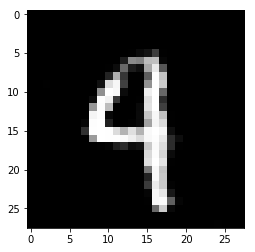

Number batches 468
217(0/468) D: 0.6336, G: 0.9330
217(1/468) D: 0.6717, G: 0.9465
217(2/468) D: 0.6668, G: 0.9739
217(3/468) D: 0.6282, G: 1.0966
217(4/468) D: 0.5673, G: 0.9321
217(5/468) D: 0.6186, G: 0.9902
217(6/468) D: 0.5976, G: 1.1610
217(7/468) D: 0.5912, G: 0.8132
217(8/468) D: 0.6264, G: 0.9867
217(9/468) D: 0.6815, G: 1.1002
217(10/468) D: 0.6443, G: 0.8146
217(11/468) D: 0.6260, G: 0.8830
217(12/468) D: 0.6120, G: 1.0359
217(13/468) D: 0.6654, G: 0.9294
217(14/468) D: 0.6298, G: 0.8675
217(15/468) D: 0.6749, G: 0.8096
217(16/468) D: 0.6484, G: 0.9075
217(17/468) D: 0.6447, G: 0.9821
217(18/468) D: 0.6040, G: 0.9402
217(19/468) D: 0.6283, G: 0.9945
217(20/468) D: 0.5990, G: 1.0448
217(21/468) D: 0.5986, G: 0.9803
217(22/468) D: 0.6252, G: 0.9246
217(23/468) D: 0.5945, G: 1.0080
217(24/468) D: 0.5909, G: 1.1371
217(25/468) D: 0.6063, G: 0.8729
217(26/468) D: 0.5963, G: 0.8998
217(27/468) D: 0.5823, G: 1.0812
217(28/468) D: 0.6498, G: 1.1046
217(29/468) D: 0.6277, G: 0.9646
2

217(245/468) D: 0.6493, G: 0.9880
217(246/468) D: 0.6293, G: 0.8953
217(247/468) D: 0.5894, G: 0.9839
217(248/468) D: 0.5882, G: 1.1147
217(249/468) D: 0.6181, G: 1.0501
217(250/468) D: 0.6608, G: 0.8098
217(251/468) D: 0.6234, G: 0.9054
217(252/468) D: 0.6475, G: 1.0825
217(253/468) D: 0.6058, G: 0.8625
217(254/468) D: 0.6073, G: 0.8460
217(255/468) D: 0.6886, G: 0.8658
217(256/468) D: 0.6268, G: 0.9475
217(257/468) D: 0.5948, G: 1.0130
217(258/468) D: 0.6362, G: 0.8039
217(259/468) D: 0.5875, G: 0.8345
217(260/468) D: 0.6671, G: 0.9370
217(261/468) D: 0.6148, G: 1.0152
217(262/468) D: 0.6336, G: 1.0102
217(263/468) D: 0.6340, G: 0.8882
217(264/468) D: 0.6385, G: 0.8860
217(265/468) D: 0.6473, G: 0.9272
217(266/468) D: 0.5945, G: 0.9772
217(267/468) D: 0.6319, G: 0.9173
217(268/468) D: 0.6004, G: 0.8376
217(269/468) D: 0.6205, G: 0.9020
217(270/468) D: 0.6335, G: 1.0364
217(271/468) D: 0.5957, G: 0.9223
217(272/468) D: 0.6304, G: 0.9000
217(273/468) D: 0.6234, G: 0.8917
217(274/468) D

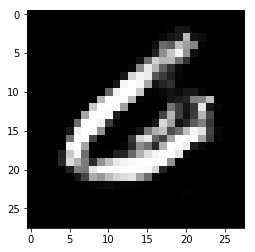

Number batches 468
218(0/468) D: 0.6744, G: 0.6729
218(1/468) D: 0.6619, G: 0.8569
218(2/468) D: 0.6740, G: 1.1520
218(3/468) D: 0.6554, G: 0.9266
218(4/468) D: 0.5662, G: 0.8272
218(5/468) D: 0.6188, G: 1.1399
218(6/468) D: 0.5705, G: 0.9093
218(7/468) D: 0.6031, G: 1.0022
218(8/468) D: 0.6132, G: 0.9843
218(9/468) D: 0.6365, G: 0.8931
218(10/468) D: 0.6908, G: 1.0863
218(11/468) D: 0.6457, G: 0.9829
218(12/468) D: 0.6200, G: 0.8241
218(13/468) D: 0.6440, G: 0.8069
218(14/468) D: 0.6369, G: 1.0425
218(15/468) D: 0.6682, G: 0.9712
218(16/468) D: 0.6562, G: 0.8181
218(17/468) D: 0.6837, G: 0.8954
218(18/468) D: 0.6056, G: 0.9442
218(19/468) D: 0.6288, G: 0.9013
218(20/468) D: 0.5603, G: 0.9013
218(21/468) D: 0.6041, G: 0.9736
218(22/468) D: 0.6471, G: 0.8298
218(23/468) D: 0.5777, G: 0.8484
218(24/468) D: 0.6035, G: 0.9147
218(25/468) D: 0.6244, G: 0.9039
218(26/468) D: 0.6012, G: 0.9474
218(27/468) D: 0.5779, G: 1.0080
218(28/468) D: 0.6182, G: 0.9920
218(29/468) D: 0.6189, G: 0.8881
2

218(245/468) D: 0.6142, G: 0.9793
218(246/468) D: 0.5875, G: 0.9421
218(247/468) D: 0.5800, G: 0.8269
218(248/468) D: 0.5772, G: 0.9310
218(249/468) D: 0.5790, G: 1.0972
218(250/468) D: 0.6401, G: 1.0199
218(251/468) D: 0.6137, G: 0.9647
218(252/468) D: 0.6448, G: 0.9247
218(253/468) D: 0.6089, G: 1.0201
218(254/468) D: 0.6192, G: 0.9442
218(255/468) D: 0.6583, G: 0.8133
218(256/468) D: 0.6558, G: 1.0314
218(257/468) D: 0.6255, G: 1.1375
218(258/468) D: 0.6522, G: 0.8385
218(259/468) D: 0.6163, G: 0.8227
218(260/468) D: 0.6187, G: 0.9322
218(261/468) D: 0.6136, G: 0.9408
218(262/468) D: 0.6123, G: 0.9071
218(263/468) D: 0.6390, G: 0.9492
218(264/468) D: 0.6334, G: 1.0046
218(265/468) D: 0.6025, G: 0.8226
218(266/468) D: 0.5951, G: 0.7732
218(267/468) D: 0.6046, G: 1.1155
218(268/468) D: 0.6317, G: 0.8859
218(269/468) D: 0.5731, G: 0.9807
218(270/468) D: 0.6307, G: 1.1574
218(271/468) D: 0.6341, G: 0.8452
218(272/468) D: 0.5991, G: 0.8889
218(273/468) D: 0.6427, G: 1.0239
218(274/468) D

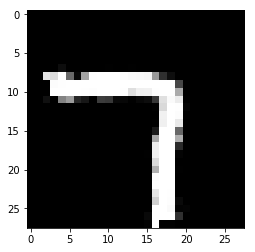

Number batches 468
219(0/468) D: 0.6521, G: 0.7071
219(1/468) D: 0.6900, G: 1.0115
219(2/468) D: 0.6287, G: 0.8522
219(3/468) D: 0.6157, G: 0.9238
219(4/468) D: 0.5943, G: 1.0172
219(5/468) D: 0.5836, G: 0.9849
219(6/468) D: 0.5887, G: 0.9406
219(7/468) D: 0.6023, G: 0.9397
219(8/468) D: 0.5898, G: 1.1281
219(9/468) D: 0.6888, G: 0.9783
219(10/468) D: 0.6859, G: 0.8931
219(11/468) D: 0.5945, G: 0.9769
219(12/468) D: 0.5808, G: 0.9913
219(13/468) D: 0.6347, G: 0.8165
219(14/468) D: 0.5933, G: 0.9452
219(15/468) D: 0.6268, G: 1.1277
219(16/468) D: 0.6459, G: 0.7985
219(17/468) D: 0.5995, G: 0.8508
219(18/468) D: 0.6081, G: 1.0688
219(19/468) D: 0.5939, G: 1.0280
219(20/468) D: 0.5728, G: 0.9292
219(21/468) D: 0.6063, G: 0.9182
219(22/468) D: 0.6016, G: 0.9136
219(23/468) D: 0.5899, G: 1.0409
219(24/468) D: 0.5998, G: 0.9383
219(25/468) D: 0.5959, G: 0.7857
219(26/468) D: 0.5854, G: 0.9402
219(27/468) D: 0.5728, G: 1.1885
219(28/468) D: 0.6112, G: 0.9039
219(29/468) D: 0.6504, G: 0.9685
2

219(244/468) D: 0.6016, G: 0.9891
219(245/468) D: 0.5852, G: 0.9119
219(246/468) D: 0.6260, G: 1.0019
219(247/468) D: 0.5935, G: 1.0098
219(248/468) D: 0.5839, G: 0.9579
219(249/468) D: 0.6203, G: 0.9779
219(250/468) D: 0.6652, G: 0.8157
219(251/468) D: 0.6095, G: 0.9707
219(252/468) D: 0.6330, G: 0.9495
219(253/468) D: 0.6257, G: 1.0429
219(254/468) D: 0.6295, G: 0.9481
219(255/468) D: 0.6721, G: 0.7467
219(256/468) D: 0.6271, G: 0.8363
219(257/468) D: 0.5802, G: 0.9564
219(258/468) D: 0.5888, G: 0.9658
219(259/468) D: 0.5857, G: 0.9611
219(260/468) D: 0.6195, G: 0.8209
219(261/468) D: 0.5616, G: 0.8129
219(262/468) D: 0.5883, G: 0.9223
219(263/468) D: 0.6202, G: 0.9236
219(264/468) D: 0.6304, G: 0.8576
219(265/468) D: 0.6274, G: 1.0250
219(266/468) D: 0.5872, G: 0.9359
219(267/468) D: 0.6121, G: 1.0130
219(268/468) D: 0.6603, G: 0.9829
219(269/468) D: 0.6078, G: 0.9783
219(270/468) D: 0.6260, G: 0.8642
219(271/468) D: 0.6392, G: 0.8786
219(272/468) D: 0.6667, G: 0.8730
219(273/468) D

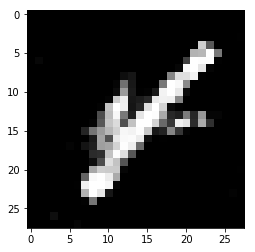

Number batches 468
220(0/468) D: 0.6499, G: 0.8748
220(1/468) D: 0.6371, G: 0.9711
220(2/468) D: 0.6182, G: 0.8500
220(3/468) D: 0.6027, G: 0.8211
220(4/468) D: 0.6422, G: 0.9962
220(5/468) D: 0.6501, G: 0.9226
220(6/468) D: 0.5950, G: 0.9104
220(7/468) D: 0.5850, G: 1.1473
220(8/468) D: 0.6173, G: 1.0512
220(9/468) D: 0.6724, G: 0.9806
220(10/468) D: 0.6266, G: 1.0555
220(11/468) D: 0.6191, G: 0.9656
220(12/468) D: 0.6416, G: 0.8748
220(13/468) D: 0.6337, G: 0.9595
220(14/468) D: 0.6163, G: 0.9776
220(15/468) D: 0.6069, G: 0.9369
220(16/468) D: 0.6159, G: 0.9389
220(17/468) D: 0.6281, G: 0.8342
220(18/468) D: 0.6405, G: 1.0190
220(19/468) D: 0.6204, G: 0.8958
220(20/468) D: 0.6076, G: 0.9971
220(21/468) D: 0.6093, G: 1.0359
220(22/468) D: 0.5843, G: 0.9551
220(23/468) D: 0.5968, G: 1.0856
220(24/468) D: 0.5790, G: 0.8548
220(25/468) D: 0.6100, G: 0.9920
220(26/468) D: 0.6176, G: 1.0443
220(27/468) D: 0.5861, G: 0.9648
220(28/468) D: 0.5885, G: 0.9413
220(29/468) D: 0.5982, G: 1.2368
2

220(245/468) D: 0.6243, G: 1.0027
220(246/468) D: 0.6168, G: 0.9676
220(247/468) D: 0.5485, G: 1.1211
220(248/468) D: 0.6048, G: 1.0147
220(249/468) D: 0.6032, G: 0.9461
220(250/468) D: 0.6628, G: 0.7290
220(251/468) D: 0.6210, G: 1.2163
220(252/468) D: 0.6320, G: 0.9110
220(253/468) D: 0.5915, G: 0.8089
220(254/468) D: 0.6152, G: 0.9562
220(255/468) D: 0.6574, G: 0.8569
220(256/468) D: 0.6204, G: 0.9508
220(257/468) D: 0.5815, G: 1.0471
220(258/468) D: 0.6787, G: 0.7756
220(259/468) D: 0.6390, G: 0.8583
220(260/468) D: 0.6177, G: 1.0227
220(261/468) D: 0.6527, G: 0.8758
220(262/468) D: 0.6705, G: 0.8144
220(263/468) D: 0.6423, G: 0.9325
220(264/468) D: 0.6440, G: 0.9684
220(265/468) D: 0.6032, G: 0.8719
220(266/468) D: 0.5717, G: 0.9067
220(267/468) D: 0.6005, G: 1.1209
220(268/468) D: 0.6519, G: 0.9581
220(269/468) D: 0.6354, G: 1.1456
220(270/468) D: 0.6321, G: 0.8554
220(271/468) D: 0.6287, G: 0.8448
220(272/468) D: 0.6406, G: 1.0508
220(273/468) D: 0.6047, G: 0.9376
220(274/468) D

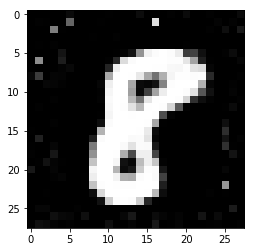

Number batches 468
221(0/468) D: 0.6569, G: 0.6370
221(1/468) D: 0.6784, G: 0.9203
221(2/468) D: 0.6559, G: 1.0000
221(3/468) D: 0.5994, G: 1.0661
221(4/468) D: 0.5849, G: 0.9075
221(5/468) D: 0.6522, G: 0.9868
221(6/468) D: 0.5980, G: 0.9940
221(7/468) D: 0.5972, G: 0.9909
221(8/468) D: 0.6279, G: 0.9141
221(9/468) D: 0.6596, G: 0.8247
221(10/468) D: 0.6754, G: 0.9257
221(11/468) D: 0.5651, G: 1.0748
221(12/468) D: 0.6319, G: 0.9816
221(13/468) D: 0.6444, G: 0.9399
221(14/468) D: 0.6288, G: 0.9402
221(15/468) D: 0.7037, G: 0.9767
221(16/468) D: 0.6508, G: 1.0418
221(17/468) D: 0.6619, G: 0.8242
221(18/468) D: 0.6170, G: 1.0167
221(19/468) D: 0.6274, G: 0.9605
221(20/468) D: 0.6282, G: 0.9283
221(21/468) D: 0.6179, G: 0.9961
221(22/468) D: 0.6187, G: 0.9920
221(23/468) D: 0.5832, G: 0.9173
221(24/468) D: 0.6080, G: 0.9600
221(25/468) D: 0.6339, G: 0.9023
221(26/468) D: 0.6135, G: 0.8532
221(27/468) D: 0.6074, G: 1.0082
221(28/468) D: 0.6478, G: 1.1346
221(29/468) D: 0.6537, G: 0.8831
2

221(244/468) D: 0.6245, G: 0.9114
221(245/468) D: 0.5702, G: 0.8886
221(246/468) D: 0.5992, G: 0.9701
221(247/468) D: 0.5708, G: 0.9997
221(248/468) D: 0.5996, G: 0.9108
221(249/468) D: 0.6047, G: 1.0111
221(250/468) D: 0.6770, G: 0.8267
221(251/468) D: 0.6475, G: 0.9483
221(252/468) D: 0.6543, G: 0.9765
221(253/468) D: 0.6533, G: 1.0598
221(254/468) D: 0.6342, G: 0.8699
221(255/468) D: 0.6564, G: 0.7525
221(256/468) D: 0.6601, G: 0.9860
221(257/468) D: 0.6457, G: 1.1525
221(258/468) D: 0.6013, G: 0.9274
221(259/468) D: 0.6076, G: 0.8567
221(260/468) D: 0.6262, G: 1.0169
221(261/468) D: 0.6134, G: 0.9135
221(262/468) D: 0.6593, G: 0.8497
221(263/468) D: 0.6280, G: 0.7866
221(264/468) D: 0.6545, G: 0.9524
221(265/468) D: 0.6353, G: 0.9899
221(266/468) D: 0.5967, G: 0.9266
221(267/468) D: 0.6235, G: 1.0158
221(268/468) D: 0.5904, G: 0.9126
221(269/468) D: 0.6003, G: 0.9637
221(270/468) D: 0.5898, G: 1.0059
221(271/468) D: 0.6770, G: 0.8660
221(272/468) D: 0.6366, G: 0.8739
221(273/468) D

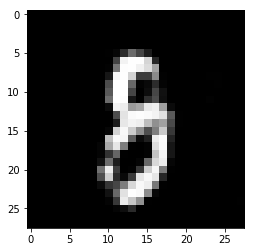

Number batches 468
222(0/468) D: 0.6666, G: 0.8027
222(1/468) D: 0.6281, G: 1.0230
222(2/468) D: 0.6574, G: 0.9040
222(3/468) D: 0.6108, G: 0.8995
222(4/468) D: 0.5788, G: 1.0448
222(5/468) D: 0.5890, G: 0.9989
222(6/468) D: 0.6161, G: 1.0540
222(7/468) D: 0.5974, G: 0.9262
222(8/468) D: 0.6041, G: 1.0877
222(9/468) D: 0.7031, G: 0.8399
222(10/468) D: 0.6686, G: 0.9318
222(11/468) D: 0.5854, G: 1.1603
222(12/468) D: 0.6749, G: 0.8628
222(13/468) D: 0.6750, G: 0.8691
222(14/468) D: 0.6571, G: 0.9779
222(15/468) D: 0.6691, G: 0.9425
222(16/468) D: 0.6395, G: 0.9392
222(17/468) D: 0.6283, G: 0.8548
222(18/468) D: 0.6180, G: 0.9487
222(19/468) D: 0.6242, G: 0.9409
222(20/468) D: 0.5865, G: 0.8515
222(21/468) D: 0.5887, G: 0.9123
222(22/468) D: 0.6160, G: 0.9416
222(23/468) D: 0.5874, G: 0.9277
222(24/468) D: 0.5759, G: 0.8940
222(25/468) D: 0.6423, G: 0.8435
222(26/468) D: 0.6459, G: 0.9358
222(27/468) D: 0.5609, G: 1.0176
222(28/468) D: 0.6114, G: 0.9267
222(29/468) D: 0.6053, G: 0.8825
2

222(245/468) D: 0.6036, G: 0.8756
222(246/468) D: 0.6379, G: 1.0877
222(247/468) D: 0.5899, G: 0.8912
222(248/468) D: 0.5982, G: 0.9193
222(249/468) D: 0.6030, G: 0.8829
222(250/468) D: 0.6528, G: 0.8707
222(251/468) D: 0.6247, G: 0.9076
222(252/468) D: 0.6088, G: 1.0070
222(253/468) D: 0.5724, G: 0.9146
222(254/468) D: 0.6562, G: 0.7865
222(255/468) D: 0.6640, G: 0.9665
222(256/468) D: 0.6667, G: 0.9625
222(257/468) D: 0.5807, G: 0.9924
222(258/468) D: 0.6442, G: 0.8650
222(259/468) D: 0.6149, G: 0.9237
222(260/468) D: 0.6147, G: 0.9735
222(261/468) D: 0.6287, G: 0.8808
222(262/468) D: 0.6231, G: 0.8998
222(263/468) D: 0.6531, G: 0.9509
222(264/468) D: 0.6689, G: 0.8938
222(265/468) D: 0.6235, G: 1.0435
222(266/468) D: 0.5799, G: 0.9814
222(267/468) D: 0.5607, G: 0.8789
222(268/468) D: 0.6240, G: 0.9215
222(269/468) D: 0.5590, G: 0.9552
222(270/468) D: 0.6483, G: 1.0277
222(271/468) D: 0.6020, G: 0.9094
222(272/468) D: 0.6113, G: 0.8943
222(273/468) D: 0.6221, G: 1.2459
222(274/468) D

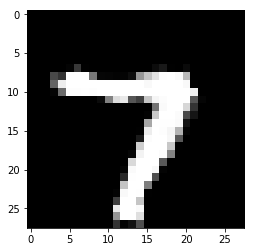

Number batches 468
223(0/468) D: 0.6281, G: 1.0090
223(1/468) D: 0.6213, G: 0.8258
223(2/468) D: 0.6063, G: 0.8971
223(3/468) D: 0.6052, G: 1.0416
223(4/468) D: 0.5972, G: 0.9142
223(5/468) D: 0.6298, G: 1.0970
223(6/468) D: 0.5611, G: 1.0145
223(7/468) D: 0.6050, G: 0.8571
223(8/468) D: 0.5865, G: 0.8913
223(9/468) D: 0.6759, G: 0.9860
223(10/468) D: 0.6761, G: 0.7767
223(11/468) D: 0.6064, G: 0.9977
223(12/468) D: 0.6124, G: 0.9668
223(13/468) D: 0.6095, G: 0.9213
223(14/468) D: 0.6119, G: 1.0641
223(15/468) D: 0.6602, G: 1.0838
223(16/468) D: 0.6454, G: 0.9578
223(17/468) D: 0.6819, G: 0.8025
223(18/468) D: 0.6173, G: 1.0686
223(19/468) D: 0.6169, G: 0.9385
223(20/468) D: 0.5865, G: 0.9541
223(21/468) D: 0.6356, G: 1.0131
223(22/468) D: 0.6173, G: 0.8733
223(23/468) D: 0.5737, G: 0.8963
223(24/468) D: 0.5874, G: 0.9543
223(25/468) D: 0.6246, G: 1.0085
223(26/468) D: 0.5959, G: 1.0581
223(27/468) D: 0.5851, G: 0.9084
223(28/468) D: 0.6105, G: 0.8541
223(29/468) D: 0.6276, G: 0.9532
2

223(244/468) D: 0.6363, G: 0.9761
223(245/468) D: 0.6047, G: 1.0465
223(246/468) D: 0.5689, G: 0.9429
223(247/468) D: 0.6127, G: 1.1580
223(248/468) D: 0.6001, G: 1.0019
223(249/468) D: 0.6306, G: 1.1615
223(250/468) D: 0.6705, G: 0.8910
223(251/468) D: 0.6374, G: 1.0234
223(252/468) D: 0.6313, G: 0.9543
223(253/468) D: 0.6247, G: 0.9534
223(254/468) D: 0.6128, G: 1.0146
223(255/468) D: 0.6565, G: 0.8702
223(256/468) D: 0.6326, G: 0.8112
223(257/468) D: 0.5790, G: 1.0725
223(258/468) D: 0.6275, G: 0.9669
223(259/468) D: 0.6160, G: 0.9315
223(260/468) D: 0.6167, G: 0.8123
223(261/468) D: 0.5762, G: 0.9399
223(262/468) D: 0.6259, G: 0.9470
223(263/468) D: 0.6181, G: 0.9327
223(264/468) D: 0.6714, G: 0.8233
223(265/468) D: 0.6148, G: 0.9363
223(266/468) D: 0.6122, G: 1.0692
223(267/468) D: 0.6313, G: 0.9962
223(268/468) D: 0.6029, G: 0.8252
223(269/468) D: 0.5953, G: 0.9220
223(270/468) D: 0.6198, G: 1.0949
223(271/468) D: 0.6287, G: 0.9084
223(272/468) D: 0.6227, G: 0.8741
223(273/468) D

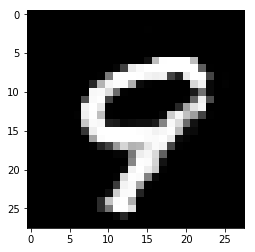

Number batches 468
224(0/468) D: 0.6419, G: 0.8479
224(1/468) D: 0.6655, G: 1.0447
224(2/468) D: 0.6658, G: 0.9114
224(3/468) D: 0.6311, G: 0.8739
224(4/468) D: 0.5992, G: 1.0721
224(5/468) D: 0.6017, G: 0.9764
224(6/468) D: 0.6466, G: 0.9180
224(7/468) D: 0.6078, G: 0.9432
224(8/468) D: 0.5831, G: 0.9378
224(9/468) D: 0.6568, G: 0.8146
224(10/468) D: 0.6474, G: 1.0948
224(11/468) D: 0.6078, G: 1.0157
224(12/468) D: 0.6198, G: 0.8080
224(13/468) D: 0.5993, G: 0.8688
224(14/468) D: 0.6230, G: 1.0696
224(15/468) D: 0.6745, G: 0.9311
224(16/468) D: 0.6546, G: 0.8751
224(17/468) D: 0.6458, G: 0.8579
224(18/468) D: 0.6211, G: 0.9827
224(19/468) D: 0.5976, G: 0.9189
224(20/468) D: 0.5659, G: 0.8584
224(21/468) D: 0.6328, G: 1.0241
224(22/468) D: 0.6271, G: 0.9305
224(23/468) D: 0.6232, G: 0.9288
224(24/468) D: 0.5697, G: 0.9102
224(25/468) D: 0.6255, G: 0.8593
224(26/468) D: 0.6191, G: 1.2188
224(27/468) D: 0.6306, G: 0.9348
224(28/468) D: 0.6553, G: 0.9601
224(29/468) D: 0.6026, G: 0.8401
2

224(245/468) D: 0.6264, G: 0.9974
224(246/468) D: 0.6168, G: 0.9238
224(247/468) D: 0.5817, G: 1.0802
224(248/468) D: 0.6181, G: 0.9576
224(249/468) D: 0.6296, G: 0.9870
224(250/468) D: 0.6464, G: 0.8301
224(251/468) D: 0.6457, G: 0.9951
224(252/468) D: 0.6297, G: 0.9429
224(253/468) D: 0.6448, G: 0.9779
224(254/468) D: 0.6130, G: 0.7389
224(255/468) D: 0.6779, G: 0.9915
224(256/468) D: 0.6373, G: 0.9264
224(257/468) D: 0.6210, G: 1.0743
224(258/468) D: 0.6458, G: 0.8472
224(259/468) D: 0.6407, G: 0.8847
224(260/468) D: 0.6533, G: 0.8846
224(261/468) D: 0.6261, G: 0.8376
224(262/468) D: 0.6130, G: 0.9139
224(263/468) D: 0.6536, G: 0.9377
224(264/468) D: 0.6507, G: 0.8816
224(265/468) D: 0.6273, G: 0.7629
224(266/468) D: 0.6074, G: 0.8993
224(267/468) D: 0.6330, G: 0.9637
224(268/468) D: 0.6225, G: 0.8843
224(269/468) D: 0.6056, G: 1.0175
224(270/468) D: 0.6533, G: 0.9280
224(271/468) D: 0.6436, G: 0.8495
224(272/468) D: 0.6176, G: 0.8277
224(273/468) D: 0.5865, G: 0.9658
224(274/468) D

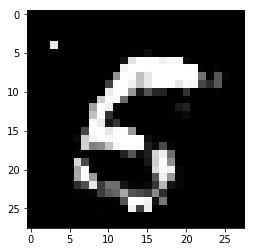

Number batches 468
225(0/468) D: 0.7242, G: 0.8114
225(1/468) D: 0.6584, G: 0.8361
225(2/468) D: 0.6107, G: 0.9347
225(3/468) D: 0.5987, G: 1.0134
225(4/468) D: 0.5918, G: 0.8537
225(5/468) D: 0.6341, G: 1.1159
225(6/468) D: 0.6026, G: 0.9994
225(7/468) D: 0.6173, G: 0.8524
225(8/468) D: 0.5510, G: 0.9347
225(9/468) D: 0.6028, G: 0.9223
225(10/468) D: 0.6320, G: 1.0813
225(11/468) D: 0.6079, G: 1.2623
225(12/468) D: 0.6507, G: 0.8238
225(13/468) D: 0.6463, G: 0.8512
225(14/468) D: 0.6039, G: 1.0403
225(15/468) D: 0.6525, G: 0.9346
225(16/468) D: 0.6725, G: 0.9267
225(17/468) D: 0.6138, G: 0.8202
225(18/468) D: 0.6163, G: 0.9938
225(19/468) D: 0.6105, G: 0.8286
225(20/468) D: 0.5989, G: 0.9218
225(21/468) D: 0.5797, G: 0.9443
225(22/468) D: 0.6470, G: 1.0435
225(23/468) D: 0.6223, G: 0.8917
225(24/468) D: 0.5714, G: 0.8077
225(25/468) D: 0.6188, G: 0.7636
225(26/468) D: 0.5810, G: 0.8928
225(27/468) D: 0.5930, G: 1.1269
225(28/468) D: 0.5917, G: 0.8833
225(29/468) D: 0.5914, G: 1.0273
2

225(245/468) D: 0.5734, G: 0.8659
225(246/468) D: 0.6040, G: 1.1240
225(247/468) D: 0.5905, G: 0.9898
225(248/468) D: 0.6229, G: 1.0788
225(249/468) D: 0.6126, G: 1.0183
225(250/468) D: 0.6414, G: 0.8159
225(251/468) D: 0.6144, G: 0.9142
225(252/468) D: 0.6224, G: 0.9653
225(253/468) D: 0.6287, G: 1.0601
225(254/468) D: 0.5950, G: 0.8822
225(255/468) D: 0.6540, G: 0.8565
225(256/468) D: 0.6357, G: 0.9794
225(257/468) D: 0.5994, G: 0.9337
225(258/468) D: 0.6525, G: 0.9915
225(259/468) D: 0.5975, G: 0.9337
225(260/468) D: 0.6187, G: 0.9394
225(261/468) D: 0.5971, G: 0.7908
225(262/468) D: 0.6549, G: 0.9373
225(263/468) D: 0.6095, G: 0.8990
225(264/468) D: 0.6872, G: 0.9109
225(265/468) D: 0.6387, G: 1.0358
225(266/468) D: 0.6028, G: 0.8973
225(267/468) D: 0.6113, G: 0.9052
225(268/468) D: 0.6323, G: 0.9872
225(269/468) D: 0.6082, G: 1.0910
225(270/468) D: 0.6513, G: 0.8810
225(271/468) D: 0.6426, G: 0.8690
225(272/468) D: 0.6198, G: 0.9562
225(273/468) D: 0.6065, G: 0.9964
225(274/468) D

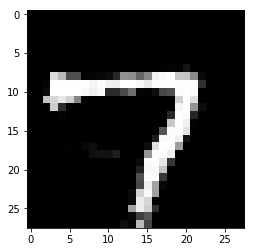

Number batches 468
226(0/468) D: 0.6703, G: 0.9211
226(1/468) D: 0.6282, G: 0.8881
226(2/468) D: 0.6300, G: 0.8870
226(3/468) D: 0.6055, G: 0.9716
226(4/468) D: 0.5767, G: 0.9475
226(5/468) D: 0.6011, G: 0.8476
226(6/468) D: 0.5909, G: 1.0084
226(7/468) D: 0.6269, G: 0.9719
226(8/468) D: 0.6315, G: 0.9575
226(9/468) D: 0.6760, G: 0.9228
226(10/468) D: 0.6579, G: 1.0762
226(11/468) D: 0.5969, G: 0.8907
226(12/468) D: 0.6262, G: 0.9824
226(13/468) D: 0.6546, G: 0.9456
226(14/468) D: 0.6060, G: 0.8826
226(15/468) D: 0.6495, G: 0.8841
226(16/468) D: 0.6108, G: 0.9669
226(17/468) D: 0.6793, G: 0.8273
226(18/468) D: 0.6252, G: 0.9173
226(19/468) D: 0.6218, G: 0.9753
226(20/468) D: 0.5907, G: 0.9318
226(21/468) D: 0.5907, G: 0.9819
226(22/468) D: 0.6088, G: 0.8868
226(23/468) D: 0.5972, G: 0.8799
226(24/468) D: 0.5997, G: 1.0926
226(25/468) D: 0.6685, G: 0.9692
226(26/468) D: 0.6135, G: 1.0977
226(27/468) D: 0.5731, G: 0.8772
226(28/468) D: 0.6146, G: 0.8084
226(29/468) D: 0.6248, G: 1.0711
2

226(244/468) D: 0.6053, G: 0.8498
226(245/468) D: 0.5888, G: 0.8886
226(246/468) D: 0.5742, G: 0.9635
226(247/468) D: 0.5939, G: 1.1304
226(248/468) D: 0.5724, G: 0.9659
226(249/468) D: 0.6049, G: 0.9727
226(250/468) D: 0.6560, G: 0.8933
226(251/468) D: 0.6128, G: 0.9787
226(252/468) D: 0.6109, G: 0.9458
226(253/468) D: 0.6048, G: 0.9475
226(254/468) D: 0.6206, G: 0.8802
226(255/468) D: 0.6318, G: 0.7251
226(256/468) D: 0.6324, G: 0.9934
226(257/468) D: 0.5904, G: 0.9901
226(258/468) D: 0.6422, G: 0.9039
226(259/468) D: 0.5996, G: 0.9468
226(260/468) D: 0.6080, G: 1.0248
226(261/468) D: 0.6056, G: 0.8864
226(262/468) D: 0.5984, G: 0.9601
226(263/468) D: 0.6382, G: 0.8936
226(264/468) D: 0.6342, G: 0.8990
226(265/468) D: 0.6036, G: 0.8616
226(266/468) D: 0.5989, G: 0.9892
226(267/468) D: 0.5943, G: 1.0001
226(268/468) D: 0.6197, G: 0.9400
226(269/468) D: 0.6070, G: 0.9668
226(270/468) D: 0.6344, G: 0.9156
226(271/468) D: 0.6105, G: 0.9541
226(272/468) D: 0.6156, G: 0.9194
226(273/468) D

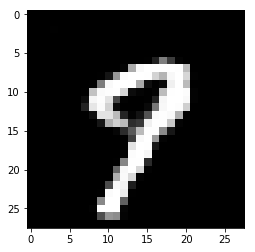

Number batches 468
227(0/468) D: 0.6427, G: 0.5940
227(1/468) D: 0.6212, G: 1.0481
227(2/468) D: 0.6307, G: 1.1343
227(3/468) D: 0.6200, G: 0.8756
227(4/468) D: 0.6129, G: 0.9832
227(5/468) D: 0.6009, G: 1.0107
227(6/468) D: 0.5631, G: 0.9192
227(7/468) D: 0.5789, G: 1.0384
227(8/468) D: 0.5759, G: 0.9073
227(9/468) D: 0.6757, G: 1.0294
227(10/468) D: 0.6588, G: 1.0471
227(11/468) D: 0.6375, G: 1.0027
227(12/468) D: 0.6437, G: 0.9055
227(13/468) D: 0.6572, G: 0.9256
227(14/468) D: 0.6274, G: 1.0176
227(15/468) D: 0.6803, G: 0.9394
227(16/468) D: 0.6439, G: 0.9369
227(17/468) D: 0.6212, G: 0.8524
227(18/468) D: 0.5720, G: 0.9440
227(19/468) D: 0.6145, G: 1.0171
227(20/468) D: 0.6091, G: 0.9282
227(21/468) D: 0.6181, G: 0.9846
227(22/468) D: 0.6232, G: 0.9926
227(23/468) D: 0.5982, G: 0.8894
227(24/468) D: 0.5906, G: 0.8541
227(25/468) D: 0.6097, G: 0.9173
227(26/468) D: 0.6344, G: 0.9267
227(27/468) D: 0.6182, G: 0.8281
227(28/468) D: 0.6079, G: 1.0864
227(29/468) D: 0.6317, G: 0.9366
2

227(244/468) D: 0.5924, G: 0.7481
227(245/468) D: 0.6557, G: 1.0922
227(246/468) D: 0.6098, G: 1.0665
227(247/468) D: 0.5943, G: 0.7962
227(248/468) D: 0.6033, G: 1.2578
227(249/468) D: 0.5646, G: 1.0644
227(250/468) D: 0.6722, G: 0.8105
227(251/468) D: 0.6539, G: 1.0163
227(252/468) D: 0.6325, G: 1.0068
227(253/468) D: 0.5785, G: 0.9445
227(254/468) D: 0.6468, G: 0.8579
227(255/468) D: 0.6458, G: 0.9207
227(256/468) D: 0.6442, G: 0.9887
227(257/468) D: 0.5854, G: 0.9685
227(258/468) D: 0.6365, G: 0.9973
227(259/468) D: 0.5988, G: 1.0218
227(260/468) D: 0.6038, G: 0.9034
227(261/468) D: 0.5799, G: 0.9987
227(262/468) D: 0.6157, G: 0.8379
227(263/468) D: 0.6373, G: 0.9338
227(264/468) D: 0.6229, G: 0.9783
227(265/468) D: 0.6556, G: 1.0606
227(266/468) D: 0.6164, G: 0.8572
227(267/468) D: 0.5836, G: 0.8459
227(268/468) D: 0.6594, G: 1.0643
227(269/468) D: 0.6230, G: 0.9493
227(270/468) D: 0.6154, G: 0.8601
227(271/468) D: 0.6480, G: 0.9992
227(272/468) D: 0.6018, G: 0.9378
227(273/468) D

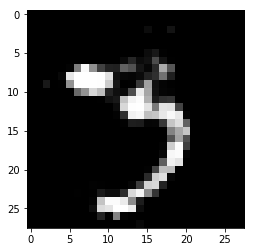

Number batches 468
228(0/468) D: 0.6404, G: 0.7862
228(1/468) D: 0.6621, G: 0.8396
228(2/468) D: 0.6447, G: 0.9395
228(3/468) D: 0.6232, G: 0.9762
228(4/468) D: 0.5829, G: 0.9740
228(5/468) D: 0.6357, G: 1.1900
228(6/468) D: 0.6015, G: 0.8698
228(7/468) D: 0.5914, G: 0.9907
228(8/468) D: 0.5997, G: 0.8953
228(9/468) D: 0.6543, G: 0.9054
228(10/468) D: 0.6267, G: 1.0454
228(11/468) D: 0.6374, G: 0.9558
228(12/468) D: 0.6624, G: 0.8142
228(13/468) D: 0.6227, G: 0.8316
228(14/468) D: 0.6267, G: 1.0683
228(15/468) D: 0.6576, G: 0.9751
228(16/468) D: 0.6515, G: 0.8551
228(17/468) D: 0.6566, G: 0.8841
228(18/468) D: 0.6545, G: 0.9462
228(19/468) D: 0.6417, G: 0.8526
228(20/468) D: 0.5912, G: 1.0714
228(21/468) D: 0.6259, G: 0.9429
228(22/468) D: 0.6421, G: 0.9803
228(23/468) D: 0.6041, G: 0.9607
228(24/468) D: 0.5730, G: 0.9005
228(25/468) D: 0.5858, G: 0.9324
228(26/468) D: 0.6114, G: 0.8934
228(27/468) D: 0.5810, G: 0.9625
228(28/468) D: 0.6557, G: 0.9221
228(29/468) D: 0.6056, G: 0.9000
2

228(244/468) D: 0.6230, G: 0.8887
228(245/468) D: 0.6150, G: 1.0152
228(246/468) D: 0.5875, G: 1.0756
228(247/468) D: 0.5478, G: 0.9910
228(248/468) D: 0.5924, G: 0.9417
228(249/468) D: 0.6108, G: 1.1189
228(250/468) D: 0.6541, G: 0.9146
228(251/468) D: 0.6312, G: 0.9737
228(252/468) D: 0.6135, G: 0.9703
228(253/468) D: 0.6329, G: 1.0151
228(254/468) D: 0.6120, G: 0.7962
228(255/468) D: 0.6239, G: 0.7934
228(256/468) D: 0.6524, G: 0.9158
228(257/468) D: 0.5975, G: 0.9874
228(258/468) D: 0.6117, G: 0.9947
228(259/468) D: 0.5864, G: 0.8892
228(260/468) D: 0.6192, G: 0.8092
228(261/468) D: 0.6476, G: 0.9465
228(262/468) D: 0.6005, G: 1.0018
228(263/468) D: 0.6287, G: 0.8980
228(264/468) D: 0.6684, G: 0.9541
228(265/468) D: 0.6232, G: 0.9505
228(266/468) D: 0.5800, G: 0.9318
228(267/468) D: 0.6193, G: 0.8357
228(268/468) D: 0.6236, G: 0.8648
228(269/468) D: 0.5799, G: 0.9977
228(270/468) D: 0.6109, G: 0.9054
228(271/468) D: 0.6761, G: 0.8471
228(272/468) D: 0.5958, G: 0.9606
228(273/468) D

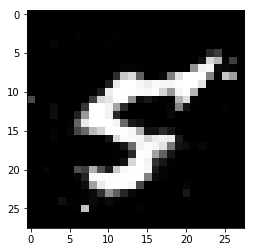

Number batches 468
229(0/468) D: 0.6841, G: 0.7725
229(1/468) D: 0.6387, G: 0.9932
229(2/468) D: 0.6192, G: 0.9820
229(3/468) D: 0.6203, G: 0.9529
229(4/468) D: 0.5884, G: 0.9851
229(5/468) D: 0.5867, G: 0.9894
229(6/468) D: 0.5953, G: 1.0431
229(7/468) D: 0.5730, G: 0.8632
229(8/468) D: 0.5741, G: 1.0628
229(9/468) D: 0.6648, G: 1.0428
229(10/468) D: 0.6457, G: 1.0581
229(11/468) D: 0.6265, G: 1.0306
229(12/468) D: 0.5833, G: 0.8397
229(13/468) D: 0.6823, G: 0.8287
229(14/468) D: 0.6270, G: 1.0745
229(15/468) D: 0.6389, G: 0.8047
229(16/468) D: 0.6471, G: 0.9510
229(17/468) D: 0.6283, G: 0.8877
229(18/468) D: 0.6029, G: 1.0739
229(19/468) D: 0.5915, G: 1.0797
229(20/468) D: 0.6030, G: 0.8909
229(21/468) D: 0.6356, G: 1.0652
229(22/468) D: 0.6141, G: 0.9415
229(23/468) D: 0.5943, G: 1.0604
229(24/468) D: 0.5942, G: 0.9309
229(25/468) D: 0.5877, G: 0.7447
229(26/468) D: 0.6053, G: 1.0244
229(27/468) D: 0.5649, G: 1.0548
229(28/468) D: 0.6037, G: 0.9450
229(29/468) D: 0.5948, G: 1.0148
2

229(245/468) D: 0.6015, G: 0.9048
229(246/468) D: 0.5816, G: 0.9425
229(247/468) D: 0.5799, G: 1.1090
229(248/468) D: 0.5918, G: 1.0292
229(249/468) D: 0.6137, G: 0.9592
229(250/468) D: 0.6589, G: 0.7728
229(251/468) D: 0.6079, G: 0.9417
229(252/468) D: 0.5873, G: 1.0020
229(253/468) D: 0.6039, G: 0.9836
229(254/468) D: 0.5881, G: 0.7954
229(255/468) D: 0.6469, G: 0.9106
229(256/468) D: 0.6475, G: 0.8921
229(257/468) D: 0.5689, G: 1.0047
229(258/468) D: 0.5971, G: 0.9299
229(259/468) D: 0.6445, G: 1.0804
229(260/468) D: 0.6453, G: 0.9302
229(261/468) D: 0.6160, G: 1.0317
229(262/468) D: 0.6241, G: 0.9306
229(263/468) D: 0.6912, G: 0.7963
229(264/468) D: 0.6762, G: 0.9463
229(265/468) D: 0.6075, G: 0.9532
229(266/468) D: 0.6420, G: 0.8765
229(267/468) D: 0.5955, G: 0.9093
229(268/468) D: 0.6252, G: 0.9751
229(269/468) D: 0.5958, G: 0.8624
229(270/468) D: 0.6054, G: 0.9336
229(271/468) D: 0.6039, G: 0.9142
229(272/468) D: 0.6134, G: 0.8708
229(273/468) D: 0.5987, G: 1.0312
229(274/468) D

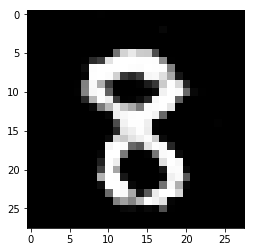

Number batches 468
230(0/468) D: 0.6904, G: 0.8566
230(1/468) D: 0.6757, G: 0.9160
230(2/468) D: 0.6293, G: 0.8614
230(3/468) D: 0.6495, G: 1.0281
230(4/468) D: 0.5882, G: 1.0752
230(5/468) D: 0.6350, G: 0.9642
230(6/468) D: 0.5782, G: 1.0069
230(7/468) D: 0.5657, G: 0.9757
230(8/468) D: 0.5949, G: 0.8374
230(9/468) D: 0.6666, G: 0.9503
230(10/468) D: 0.6468, G: 1.0058
230(11/468) D: 0.5958, G: 0.8697
230(12/468) D: 0.6215, G: 0.8687
230(13/468) D: 0.6664, G: 1.0114
230(14/468) D: 0.6273, G: 0.8786
230(15/468) D: 0.6480, G: 0.9029
230(16/468) D: 0.6201, G: 0.8727
230(17/468) D: 0.6501, G: 0.9475
230(18/468) D: 0.5947, G: 0.9939
230(19/468) D: 0.6231, G: 0.9233
230(20/468) D: 0.5972, G: 0.8636
230(21/468) D: 0.6056, G: 0.8677
230(22/468) D: 0.6497, G: 0.9806
230(23/468) D: 0.5795, G: 0.9464
230(24/468) D: 0.5781, G: 0.9841
230(25/468) D: 0.6554, G: 0.9754
230(26/468) D: 0.6077, G: 0.8981
230(27/468) D: 0.6317, G: 0.9872
230(28/468) D: 0.6365, G: 0.9355
230(29/468) D: 0.6084, G: 1.0664
2

230(245/468) D: 0.6363, G: 1.0208
230(246/468) D: 0.5661, G: 0.9652
230(247/468) D: 0.5648, G: 1.1067
230(248/468) D: 0.5642, G: 0.8555
230(249/468) D: 0.5783, G: 1.0810
230(250/468) D: 0.6552, G: 0.8478
230(251/468) D: 0.6281, G: 1.0807
230(252/468) D: 0.6687, G: 0.8843
230(253/468) D: 0.6354, G: 0.9643
230(254/468) D: 0.6473, G: 1.0947
230(255/468) D: 0.6607, G: 0.7710
230(256/468) D: 0.6629, G: 0.9048
230(257/468) D: 0.5886, G: 1.1490
230(258/468) D: 0.6334, G: 0.9890
230(259/468) D: 0.6037, G: 0.9097
230(260/468) D: 0.6308, G: 0.8256
230(261/468) D: 0.5941, G: 0.8995
230(262/468) D: 0.6570, G: 0.9152
230(263/468) D: 0.6450, G: 0.8465
230(264/468) D: 0.6174, G: 1.0227
230(265/468) D: 0.6292, G: 0.9392
230(266/468) D: 0.5753, G: 0.8813
230(267/468) D: 0.5591, G: 0.9125
230(268/468) D: 0.6218, G: 1.0506
230(269/468) D: 0.5844, G: 0.8759
230(270/468) D: 0.6202, G: 0.9178
230(271/468) D: 0.6215, G: 1.0248
230(272/468) D: 0.5634, G: 0.9584
230(273/468) D: 0.6299, G: 0.9941
230(274/468) D

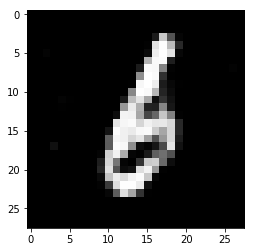

Number batches 468
231(0/468) D: 0.6154, G: 1.0522
231(1/468) D: 0.6380, G: 0.7756
231(2/468) D: 0.6739, G: 0.9295
231(3/468) D: 0.6515, G: 1.0191
231(4/468) D: 0.5757, G: 0.9365
231(5/468) D: 0.6203, G: 0.8627
231(6/468) D: 0.6120, G: 0.9609
231(7/468) D: 0.6205, G: 1.1390
231(8/468) D: 0.6182, G: 0.9883
231(9/468) D: 0.6957, G: 0.8420
231(10/468) D: 0.6282, G: 0.8989
231(11/468) D: 0.5945, G: 0.9680
231(12/468) D: 0.6119, G: 0.9697
231(13/468) D: 0.6694, G: 0.8614
231(14/468) D: 0.6015, G: 0.8554
231(15/468) D: 0.6215, G: 0.9834
231(16/468) D: 0.6388, G: 0.9027
231(17/468) D: 0.6301, G: 0.9621
231(18/468) D: 0.6414, G: 0.8993
231(19/468) D: 0.6142, G: 0.9804
231(20/468) D: 0.6195, G: 1.0181
231(21/468) D: 0.5799, G: 0.9161
231(22/468) D: 0.6034, G: 0.9284
231(23/468) D: 0.5743, G: 0.8871
231(24/468) D: 0.6053, G: 0.9992
231(25/468) D: 0.6267, G: 0.9333
231(26/468) D: 0.6128, G: 1.0619
231(27/468) D: 0.5736, G: 0.9679
231(28/468) D: 0.6446, G: 0.8699
231(29/468) D: 0.6239, G: 0.9187
2

231(245/468) D: 0.6334, G: 0.9247
231(246/468) D: 0.6136, G: 1.0081
231(247/468) D: 0.5567, G: 0.9360
231(248/468) D: 0.6267, G: 1.0145
231(249/468) D: 0.5904, G: 0.8819
231(250/468) D: 0.6789, G: 0.9578
231(251/468) D: 0.6417, G: 0.9317
231(252/468) D: 0.6410, G: 1.0408
231(253/468) D: 0.6019, G: 1.0434
231(254/468) D: 0.5901, G: 0.8859
231(255/468) D: 0.6264, G: 0.8330
231(256/468) D: 0.6140, G: 0.9704
231(257/468) D: 0.6343, G: 0.9874
231(258/468) D: 0.6487, G: 0.8987
231(259/468) D: 0.6112, G: 0.9639
231(260/468) D: 0.6099, G: 1.0515
231(261/468) D: 0.5858, G: 0.9129
231(262/468) D: 0.5735, G: 0.8545
231(263/468) D: 0.6117, G: 0.8594
231(264/468) D: 0.6266, G: 1.0234
231(265/468) D: 0.6754, G: 0.9136
231(266/468) D: 0.5903, G: 0.9506
231(267/468) D: 0.6117, G: 1.0129
231(268/468) D: 0.6323, G: 0.9806
231(269/468) D: 0.6313, G: 0.9910
231(270/468) D: 0.6062, G: 0.8321
231(271/468) D: 0.6198, G: 0.9083
231(272/468) D: 0.5759, G: 0.9175
231(273/468) D: 0.5822, G: 0.9493
231(274/468) D

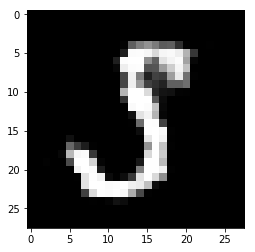

Number batches 468
232(0/468) D: 0.6540, G: 0.8002
232(1/468) D: 0.6700, G: 0.9581
232(2/468) D: 0.6418, G: 1.0755
232(3/468) D: 0.6504, G: 0.8936
232(4/468) D: 0.5842, G: 0.9105
232(5/468) D: 0.6095, G: 1.0314
232(6/468) D: 0.6224, G: 0.8590
232(7/468) D: 0.6287, G: 0.9796
232(8/468) D: 0.6017, G: 0.9620
232(9/468) D: 0.6608, G: 1.0324
232(10/468) D: 0.6468, G: 0.9776
232(11/468) D: 0.5496, G: 0.9353
232(12/468) D: 0.6467, G: 0.9696
232(13/468) D: 0.6275, G: 0.9300
232(14/468) D: 0.5940, G: 0.9672
232(15/468) D: 0.6534, G: 0.9843
232(16/468) D: 0.6422, G: 0.9853
232(17/468) D: 0.6577, G: 0.8506
232(18/468) D: 0.6324, G: 0.9665
232(19/468) D: 0.5988, G: 1.0002
232(20/468) D: 0.6028, G: 1.1088
232(21/468) D: 0.6145, G: 0.9756
232(22/468) D: 0.5749, G: 0.8767
232(23/468) D: 0.5827, G: 0.9966
232(24/468) D: 0.5944, G: 1.0849
232(25/468) D: 0.6294, G: 0.9385
232(26/468) D: 0.6059, G: 0.9740
232(27/468) D: 0.5711, G: 1.1186
232(28/468) D: 0.6301, G: 0.9670
232(29/468) D: 0.5870, G: 0.8443
2

232(244/468) D: 0.5681, G: 0.9199
232(245/468) D: 0.5942, G: 1.0093
232(246/468) D: 0.5739, G: 1.0039
232(247/468) D: 0.5795, G: 1.0617
232(248/468) D: 0.6278, G: 1.0765
232(249/468) D: 0.5717, G: 0.9616
232(250/468) D: 0.6331, G: 0.7713
232(251/468) D: 0.6037, G: 1.0244
232(252/468) D: 0.6597, G: 1.1935
232(253/468) D: 0.6120, G: 0.9305
232(254/468) D: 0.6277, G: 0.9211
232(255/468) D: 0.6813, G: 0.9959
232(256/468) D: 0.6579, G: 0.9593
232(257/468) D: 0.6104, G: 1.0706
232(258/468) D: 0.6193, G: 0.9173
232(259/468) D: 0.5839, G: 0.9392
232(260/468) D: 0.6273, G: 1.0554
232(261/468) D: 0.6221, G: 0.9587
232(262/468) D: 0.6001, G: 0.8994
232(263/468) D: 0.6343, G: 0.8643
232(264/468) D: 0.6454, G: 0.8970
232(265/468) D: 0.5731, G: 0.9643
232(266/468) D: 0.6502, G: 0.9781
232(267/468) D: 0.6034, G: 0.9703
232(268/468) D: 0.6097, G: 0.9137
232(269/468) D: 0.5974, G: 1.1250
232(270/468) D: 0.5936, G: 0.7934
232(271/468) D: 0.6168, G: 1.0177
232(272/468) D: 0.6028, G: 1.0384
232(273/468) D

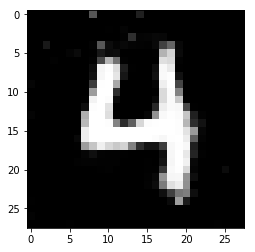

Number batches 468
233(0/468) D: 0.6326, G: 0.9729
233(1/468) D: 0.6250, G: 0.8700
233(2/468) D: 0.6437, G: 1.0638
233(3/468) D: 0.5975, G: 0.7727
233(4/468) D: 0.5801, G: 0.9361
233(5/468) D: 0.6291, G: 1.0391
233(6/468) D: 0.5934, G: 0.9921
233(7/468) D: 0.5664, G: 0.8623
233(8/468) D: 0.6076, G: 1.0482
233(9/468) D: 0.6628, G: 0.9178
233(10/468) D: 0.6839, G: 0.9651
233(11/468) D: 0.5603, G: 1.0454
233(12/468) D: 0.6832, G: 0.8647
233(13/468) D: 0.6158, G: 0.8620
233(14/468) D: 0.6325, G: 0.9468
233(15/468) D: 0.6739, G: 1.0697
233(16/468) D: 0.6217, G: 0.8491
233(17/468) D: 0.6129, G: 0.9632
233(18/468) D: 0.5922, G: 1.0252
233(19/468) D: 0.5791, G: 0.8503
233(20/468) D: 0.5760, G: 1.0868
233(21/468) D: 0.6150, G: 0.9382
233(22/468) D: 0.6278, G: 0.7682
233(23/468) D: 0.6168, G: 1.0166
233(24/468) D: 0.5692, G: 1.0162
233(25/468) D: 0.6494, G: 0.8157
233(26/468) D: 0.6125, G: 1.1080
233(27/468) D: 0.6028, G: 0.9369
233(28/468) D: 0.6027, G: 0.9557
233(29/468) D: 0.6062, G: 0.9644
2

233(244/468) D: 0.6175, G: 0.8017
233(245/468) D: 0.6129, G: 0.9916
233(246/468) D: 0.6214, G: 0.9738
233(247/468) D: 0.5606, G: 0.9494
233(248/468) D: 0.6013, G: 1.0655
233(249/468) D: 0.5819, G: 0.9699
233(250/468) D: 0.6674, G: 0.9554
233(251/468) D: 0.6534, G: 0.9514
233(252/468) D: 0.6370, G: 0.9843
233(253/468) D: 0.6197, G: 0.8957
233(254/468) D: 0.6371, G: 0.9367
233(255/468) D: 0.6387, G: 0.8004
233(256/468) D: 0.6245, G: 0.9392
233(257/468) D: 0.5932, G: 1.0298
233(258/468) D: 0.6262, G: 0.9577
233(259/468) D: 0.6074, G: 0.8840
233(260/468) D: 0.6307, G: 1.0692
233(261/468) D: 0.6108, G: 0.8954
233(262/468) D: 0.6330, G: 0.9094
233(263/468) D: 0.6474, G: 0.8465
233(264/468) D: 0.6456, G: 0.8376
233(265/468) D: 0.6245, G: 0.9940
233(266/468) D: 0.6028, G: 0.9166
233(267/468) D: 0.6364, G: 0.8848
233(268/468) D: 0.6116, G: 0.9169
233(269/468) D: 0.5898, G: 0.8964
233(270/468) D: 0.6090, G: 1.0917
233(271/468) D: 0.6295, G: 0.8841
233(272/468) D: 0.6181, G: 0.8980
233(273/468) D

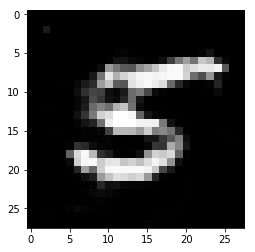

Number batches 468
234(0/468) D: 0.6226, G: 0.9962
234(1/468) D: 0.6454, G: 0.8562
234(2/468) D: 0.6665, G: 0.9650
234(3/468) D: 0.5966, G: 0.9702
234(4/468) D: 0.5890, G: 0.9782
234(5/468) D: 0.6082, G: 0.9436
234(6/468) D: 0.6089, G: 0.9898
234(7/468) D: 0.5543, G: 0.8162
234(8/468) D: 0.5718, G: 0.9776
234(9/468) D: 0.6931, G: 0.9445
234(10/468) D: 0.6536, G: 0.8703
234(11/468) D: 0.6333, G: 1.0888
234(12/468) D: 0.6523, G: 0.7402
234(13/468) D: 0.6961, G: 0.9291
234(14/468) D: 0.6018, G: 1.0674
234(15/468) D: 0.6790, G: 0.9680
234(16/468) D: 0.6483, G: 0.9014
234(17/468) D: 0.6363, G: 0.8652
234(18/468) D: 0.6066, G: 0.8611
234(19/468) D: 0.6497, G: 0.9522
234(20/468) D: 0.6463, G: 1.0783
234(21/468) D: 0.5881, G: 1.0109
234(22/468) D: 0.6465, G: 0.9263
234(23/468) D: 0.6271, G: 0.8061
234(24/468) D: 0.6086, G: 0.9727
234(25/468) D: 0.6866, G: 0.9541
234(26/468) D: 0.5735, G: 0.8747
234(27/468) D: 0.6100, G: 0.9250
234(28/468) D: 0.6440, G: 1.0857
234(29/468) D: 0.6032, G: 0.9230
2

234(245/468) D: 0.6141, G: 0.8743
234(246/468) D: 0.6302, G: 0.9855
234(247/468) D: 0.5624, G: 1.1404
234(248/468) D: 0.6417, G: 0.9747
234(249/468) D: 0.6041, G: 0.9773
234(250/468) D: 0.6779, G: 0.9156
234(251/468) D: 0.6181, G: 0.9691
234(252/468) D: 0.6364, G: 0.9174
234(253/468) D: 0.6239, G: 0.9962
234(254/468) D: 0.6240, G: 1.0121
234(255/468) D: 0.6884, G: 0.7424
234(256/468) D: 0.6768, G: 0.9274
234(257/468) D: 0.6101, G: 1.0879
234(258/468) D: 0.6653, G: 0.9101
234(259/468) D: 0.6739, G: 0.8324
234(260/468) D: 0.5965, G: 0.8952
234(261/468) D: 0.5826, G: 0.9857
234(262/468) D: 0.6248, G: 0.8657
234(263/468) D: 0.6623, G: 0.9007
234(264/468) D: 0.6670, G: 0.9149
234(265/468) D: 0.6121, G: 0.8288
234(266/468) D: 0.6407, G: 0.9541
234(267/468) D: 0.5588, G: 1.0283
234(268/468) D: 0.6227, G: 0.9383
234(269/468) D: 0.5726, G: 1.0983
234(270/468) D: 0.6106, G: 0.9099
234(271/468) D: 0.6544, G: 0.8435
234(272/468) D: 0.6173, G: 1.0807
234(273/468) D: 0.6331, G: 0.8489
234(274/468) D

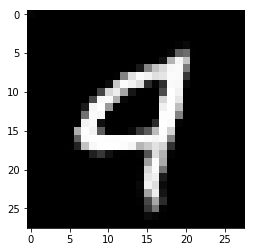

Number batches 468
235(0/468) D: 0.6567, G: 1.0148
235(1/468) D: 0.6608, G: 0.9815
235(2/468) D: 0.6532, G: 0.8660
235(3/468) D: 0.5917, G: 1.1191
235(4/468) D: 0.6005, G: 1.0320
235(5/468) D: 0.6513, G: 0.9438
235(6/468) D: 0.6019, G: 0.9073
235(7/468) D: 0.5749, G: 1.0492
235(8/468) D: 0.6008, G: 0.9688
235(9/468) D: 0.6840, G: 1.0309
235(10/468) D: 0.6393, G: 1.0863
235(11/468) D: 0.5884, G: 0.8720
235(12/468) D: 0.5794, G: 0.9517
235(13/468) D: 0.6207, G: 0.9972
235(14/468) D: 0.5735, G: 1.0382
235(15/468) D: 0.6761, G: 0.8687
235(16/468) D: 0.6395, G: 0.9999
235(17/468) D: 0.6430, G: 0.8841
235(18/468) D: 0.5988, G: 0.9537
235(19/468) D: 0.5918, G: 1.0349
235(20/468) D: 0.5590, G: 0.8595
235(21/468) D: 0.6759, G: 0.8770
235(22/468) D: 0.6721, G: 0.8906
235(23/468) D: 0.6190, G: 0.9793
235(24/468) D: 0.5932, G: 0.9213
235(25/468) D: 0.6720, G: 0.9046
235(26/468) D: 0.6013, G: 0.8947
235(27/468) D: 0.6092, G: 1.0590
235(28/468) D: 0.6476, G: 0.9308
235(29/468) D: 0.6130, G: 1.0052
2

235(245/468) D: 0.6115, G: 1.1972
235(246/468) D: 0.6162, G: 0.9946
235(247/468) D: 0.5737, G: 0.8825
235(248/468) D: 0.6202, G: 1.0375
235(249/468) D: 0.5546, G: 0.9673
235(250/468) D: 0.6323, G: 0.9312
235(251/468) D: 0.6082, G: 0.8752
235(252/468) D: 0.5853, G: 1.1428
235(253/468) D: 0.5363, G: 0.9441
235(254/468) D: 0.6146, G: 0.9384
235(255/468) D: 0.7066, G: 0.7603
235(256/468) D: 0.6043, G: 1.0461
235(257/468) D: 0.6500, G: 1.2226
235(258/468) D: 0.6372, G: 0.8948
235(259/468) D: 0.6294, G: 0.8770
235(260/468) D: 0.6166, G: 1.0801
235(261/468) D: 0.5992, G: 0.9430
235(262/468) D: 0.6327, G: 0.8919
235(263/468) D: 0.6563, G: 0.8899
235(264/468) D: 0.6409, G: 1.0068
235(265/468) D: 0.6048, G: 0.8845
235(266/468) D: 0.6478, G: 1.0277
235(267/468) D: 0.6327, G: 0.9857
235(268/468) D: 0.6292, G: 0.7682
235(269/468) D: 0.6130, G: 0.9569
235(270/468) D: 0.6284, G: 0.8996
235(271/468) D: 0.6170, G: 0.9557
235(272/468) D: 0.5932, G: 0.8938
235(273/468) D: 0.6297, G: 0.9697
235(274/468) D

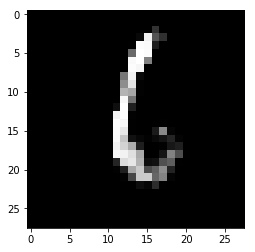

Number batches 468
236(0/468) D: 0.6428, G: 0.9579
236(1/468) D: 0.6348, G: 1.1054
236(2/468) D: 0.6559, G: 0.7852
236(3/468) D: 0.6493, G: 0.8956
236(4/468) D: 0.6112, G: 1.1363
236(5/468) D: 0.6384, G: 0.9628
236(6/468) D: 0.6343, G: 1.0287
236(7/468) D: 0.5918, G: 0.9977
236(8/468) D: 0.5834, G: 0.8858
236(9/468) D: 0.6435, G: 0.8315
236(10/468) D: 0.5983, G: 0.9245
236(11/468) D: 0.6249, G: 1.0399
236(12/468) D: 0.5984, G: 0.9006
236(13/468) D: 0.6736, G: 0.8997
236(14/468) D: 0.6398, G: 0.9866
236(15/468) D: 0.6355, G: 0.8419
236(16/468) D: 0.6499, G: 0.8140
236(17/468) D: 0.6536, G: 0.9237
236(18/468) D: 0.5949, G: 0.9908
236(19/468) D: 0.5927, G: 0.8900
236(20/468) D: 0.5890, G: 0.8738
236(21/468) D: 0.6375, G: 1.0620
236(22/468) D: 0.6457, G: 0.8825
236(23/468) D: 0.5830, G: 0.9355
236(24/468) D: 0.5537, G: 1.1299
236(25/468) D: 0.6002, G: 1.0504
236(26/468) D: 0.6134, G: 0.9845
236(27/468) D: 0.6015, G: 0.9014
236(28/468) D: 0.6503, G: 0.8751
236(29/468) D: 0.6509, G: 1.0252
2

236(244/468) D: 0.5971, G: 0.8904
236(245/468) D: 0.6116, G: 1.1251
236(246/468) D: 0.5889, G: 0.8413
236(247/468) D: 0.5730, G: 1.1239
236(248/468) D: 0.6119, G: 1.0214
236(249/468) D: 0.6250, G: 1.0324
236(250/468) D: 0.6818, G: 0.9108
236(251/468) D: 0.6275, G: 0.9847
236(252/468) D: 0.6265, G: 0.9379
236(253/468) D: 0.5706, G: 0.9188
236(254/468) D: 0.5809, G: 0.9293
236(255/468) D: 0.6492, G: 0.8819
236(256/468) D: 0.6219, G: 1.0170
236(257/468) D: 0.6259, G: 0.9875
236(258/468) D: 0.6049, G: 0.8492
236(259/468) D: 0.6173, G: 1.0282
236(260/468) D: 0.6062, G: 1.0513
236(261/468) D: 0.6048, G: 0.8938
236(262/468) D: 0.6001, G: 0.8755
236(263/468) D: 0.6756, G: 0.9054
236(264/468) D: 0.6630, G: 0.9793
236(265/468) D: 0.6559, G: 0.8411
236(266/468) D: 0.5759, G: 0.8933
236(267/468) D: 0.6066, G: 0.9825
236(268/468) D: 0.5941, G: 1.0492
236(269/468) D: 0.5790, G: 0.9633
236(270/468) D: 0.6518, G: 0.8668
236(271/468) D: 0.6387, G: 1.0141
236(272/468) D: 0.6014, G: 1.0195
236(273/468) D

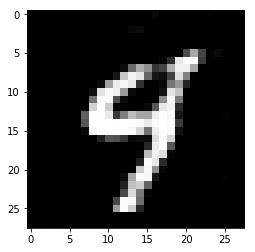

Number batches 468
237(0/468) D: 0.6339, G: 0.9428
237(1/468) D: 0.6598, G: 0.9079
237(2/468) D: 0.6513, G: 0.7747
237(3/468) D: 0.6306, G: 0.8801
237(4/468) D: 0.5658, G: 1.1364
237(5/468) D: 0.6639, G: 0.8895
237(6/468) D: 0.5790, G: 0.9463
237(7/468) D: 0.5914, G: 1.0966
237(8/468) D: 0.6313, G: 0.8560
237(9/468) D: 0.6637, G: 0.9161
237(10/468) D: 0.6206, G: 1.0963
237(11/468) D: 0.6282, G: 0.8790
237(12/468) D: 0.5911, G: 0.9148
237(13/468) D: 0.6742, G: 0.8472
237(14/468) D: 0.6383, G: 0.9502
237(15/468) D: 0.6150, G: 0.9084
237(16/468) D: 0.6547, G: 1.0034
237(17/468) D: 0.6513, G: 0.8476
237(18/468) D: 0.6355, G: 0.8215
237(19/468) D: 0.6365, G: 0.8434
237(20/468) D: 0.6043, G: 0.9400
237(21/468) D: 0.6090, G: 0.7961
237(22/468) D: 0.6210, G: 1.0097
237(23/468) D: 0.6253, G: 1.0969
237(24/468) D: 0.6108, G: 0.9977
237(25/468) D: 0.6654, G: 0.8952
237(26/468) D: 0.6334, G: 0.8890
237(27/468) D: 0.5927, G: 1.0601
237(28/468) D: 0.6217, G: 0.8401
237(29/468) D: 0.6093, G: 0.9639
2

237(245/468) D: 0.5931, G: 0.8842
237(246/468) D: 0.5839, G: 0.9834
237(247/468) D: 0.5682, G: 0.9992
237(248/468) D: 0.6160, G: 0.9297
237(249/468) D: 0.6141, G: 1.0975
237(250/468) D: 0.6745, G: 0.8773
237(251/468) D: 0.6583, G: 1.0346
237(252/468) D: 0.6222, G: 0.8764
237(253/468) D: 0.6649, G: 0.9385
237(254/468) D: 0.6467, G: 0.9310
237(255/468) D: 0.6210, G: 0.7411
237(256/468) D: 0.6763, G: 0.9668
237(257/468) D: 0.6313, G: 1.0489
237(258/468) D: 0.6522, G: 0.9779
237(259/468) D: 0.5859, G: 0.8305
237(260/468) D: 0.6163, G: 0.9005
237(261/468) D: 0.6348, G: 0.8971
237(262/468) D: 0.6367, G: 0.9563
237(263/468) D: 0.6396, G: 0.9048
237(264/468) D: 0.6607, G: 0.8720
237(265/468) D: 0.5768, G: 0.9784
237(266/468) D: 0.6298, G: 0.8766
237(267/468) D: 0.6016, G: 0.8597
237(268/468) D: 0.6079, G: 0.9906
237(269/468) D: 0.6093, G: 0.9744
237(270/468) D: 0.5929, G: 0.9914
237(271/468) D: 0.5998, G: 0.8463
237(272/468) D: 0.6020, G: 1.0872
237(273/468) D: 0.6130, G: 1.1295
237(274/468) D

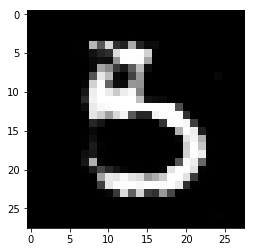

Number batches 468
238(0/468) D: 0.6194, G: 0.9801
238(1/468) D: 0.6165, G: 0.9044
238(2/468) D: 0.6384, G: 0.9316
238(3/468) D: 0.6038, G: 1.0449
238(4/468) D: 0.6062, G: 0.8649
238(5/468) D: 0.5823, G: 0.8651
238(6/468) D: 0.5800, G: 1.0737
238(7/468) D: 0.6127, G: 1.0551
238(8/468) D: 0.6202, G: 0.9143
238(9/468) D: 0.6233, G: 0.8961
238(10/468) D: 0.6114, G: 1.0804
238(11/468) D: 0.6197, G: 1.0664
238(12/468) D: 0.6129, G: 0.7904
238(13/468) D: 0.6673, G: 1.0248
238(14/468) D: 0.6208, G: 1.0510
238(15/468) D: 0.6677, G: 0.9411
238(16/468) D: 0.6528, G: 0.9435
238(17/468) D: 0.6175, G: 0.8069
238(18/468) D: 0.6250, G: 0.9375
238(19/468) D: 0.5960, G: 1.0157
238(20/468) D: 0.6056, G: 0.8746
238(21/468) D: 0.6183, G: 0.9397
238(22/468) D: 0.6212, G: 0.9412
238(23/468) D: 0.5940, G: 1.0159
238(24/468) D: 0.5933, G: 0.9690
238(25/468) D: 0.6660, G: 0.8898
238(26/468) D: 0.6137, G: 0.9350
238(27/468) D: 0.5684, G: 0.9271
238(28/468) D: 0.6479, G: 1.1688
238(29/468) D: 0.6112, G: 0.8940
2

238(244/468) D: 0.6415, G: 1.0529
238(245/468) D: 0.6191, G: 0.9159
238(246/468) D: 0.6112, G: 1.0938
238(247/468) D: 0.5774, G: 1.0194
238(248/468) D: 0.6087, G: 1.0642
238(249/468) D: 0.6585, G: 1.0420
238(250/468) D: 0.6395, G: 0.8566
238(251/468) D: 0.6250, G: 1.0304
238(252/468) D: 0.6135, G: 0.9715
238(253/468) D: 0.6135, G: 0.9912
238(254/468) D: 0.6167, G: 1.0235
238(255/468) D: 0.6914, G: 0.7498
238(256/468) D: 0.6372, G: 1.0331
238(257/468) D: 0.6296, G: 0.9487
238(258/468) D: 0.6222, G: 0.9613
238(259/468) D: 0.5466, G: 0.9489
238(260/468) D: 0.6009, G: 0.9868
238(261/468) D: 0.6052, G: 0.9971
238(262/468) D: 0.6496, G: 0.9261
238(263/468) D: 0.6449, G: 0.9171
238(264/468) D: 0.6294, G: 0.9109
238(265/468) D: 0.6175, G: 0.9184
238(266/468) D: 0.6154, G: 0.9117
238(267/468) D: 0.6182, G: 0.9302
238(268/468) D: 0.6156, G: 1.0179
238(269/468) D: 0.5983, G: 1.1407
238(270/468) D: 0.6166, G: 0.8843
238(271/468) D: 0.6142, G: 0.7942
238(272/468) D: 0.6088, G: 1.0571
238(273/468) D

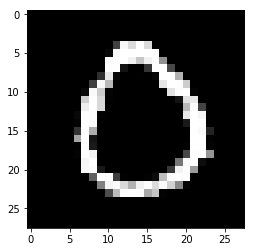

Number batches 468
239(0/468) D: 0.6613, G: 0.9697
239(1/468) D: 0.6747, G: 0.8141
239(2/468) D: 0.6726, G: 0.9409
239(3/468) D: 0.6474, G: 1.0716
239(4/468) D: 0.6224, G: 1.1088
239(5/468) D: 0.5888, G: 0.8818
239(6/468) D: 0.5868, G: 1.0112
239(7/468) D: 0.5853, G: 1.0315
239(8/468) D: 0.6075, G: 0.8474
239(9/468) D: 0.6639, G: 0.9401
239(10/468) D: 0.6329, G: 1.1505
239(11/468) D: 0.5888, G: 0.8800
239(12/468) D: 0.6371, G: 0.9019
239(13/468) D: 0.6238, G: 0.8773
239(14/468) D: 0.5687, G: 1.0347
239(15/468) D: 0.6447, G: 0.9399
239(16/468) D: 0.6218, G: 0.9355
239(17/468) D: 0.6516, G: 0.8988
239(18/468) D: 0.6212, G: 1.0283
239(19/468) D: 0.6032, G: 0.9377
239(20/468) D: 0.6161, G: 0.9447
239(21/468) D: 0.6168, G: 0.9661
239(22/468) D: 0.6096, G: 0.8671
239(23/468) D: 0.5844, G: 0.9703
239(24/468) D: 0.5902, G: 0.8995
239(25/468) D: 0.6124, G: 0.8605
239(26/468) D: 0.6051, G: 1.2043
239(27/468) D: 0.5804, G: 1.0196
239(28/468) D: 0.6264, G: 0.8306
239(29/468) D: 0.5957, G: 0.9349
2

239(245/468) D: 0.6429, G: 1.0202
239(246/468) D: 0.6322, G: 0.9232
239(247/468) D: 0.5694, G: 1.0803
239(248/468) D: 0.6601, G: 1.0046
239(249/468) D: 0.6228, G: 1.0082
239(250/468) D: 0.6585, G: 0.8518
239(251/468) D: 0.6373, G: 0.8941
239(252/468) D: 0.6197, G: 0.9063
239(253/468) D: 0.6376, G: 0.9718
239(254/468) D: 0.5992, G: 0.8397
239(255/468) D: 0.6572, G: 0.8469
239(256/468) D: 0.6504, G: 0.8330
239(257/468) D: 0.6072, G: 0.8869
239(258/468) D: 0.6222, G: 0.9437
239(259/468) D: 0.6215, G: 0.8745
239(260/468) D: 0.6147, G: 0.9124
239(261/468) D: 0.5960, G: 0.8729
239(262/468) D: 0.6197, G: 0.8703
239(263/468) D: 0.6498, G: 0.9543
239(264/468) D: 0.5792, G: 0.9217
239(265/468) D: 0.6425, G: 0.8671
239(266/468) D: 0.6456, G: 1.0828
239(267/468) D: 0.5847, G: 0.9629
239(268/468) D: 0.6282, G: 0.8885
239(269/468) D: 0.6307, G: 0.9199
239(270/468) D: 0.5915, G: 0.9844
239(271/468) D: 0.6318, G: 0.9110
239(272/468) D: 0.6253, G: 0.8860
239(273/468) D: 0.6261, G: 0.9298
239(274/468) D

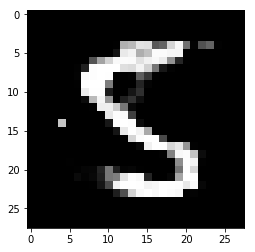

Number batches 468
240(0/468) D: 0.6398, G: 0.9471
240(1/468) D: 0.6209, G: 1.0429
240(2/468) D: 0.5892, G: 0.7757
240(3/468) D: 0.6051, G: 0.9842
240(4/468) D: 0.5706, G: 1.0224
240(5/468) D: 0.6063, G: 1.0635
240(6/468) D: 0.6085, G: 1.0005
240(7/468) D: 0.6243, G: 1.0801
240(8/468) D: 0.6085, G: 0.7993
240(9/468) D: 0.6815, G: 0.8638
240(10/468) D: 0.6612, G: 1.1464
240(11/468) D: 0.6459, G: 0.8851
240(12/468) D: 0.6080, G: 0.8771
240(13/468) D: 0.6478, G: 0.9020
240(14/468) D: 0.6207, G: 0.9549
240(15/468) D: 0.6358, G: 1.0136
240(16/468) D: 0.6380, G: 0.8537
240(17/468) D: 0.6140, G: 0.8676
240(18/468) D: 0.5941, G: 0.9363
240(19/468) D: 0.5929, G: 0.9696
240(20/468) D: 0.6107, G: 0.9429
240(21/468) D: 0.5893, G: 0.9888
240(22/468) D: 0.6399, G: 0.9424
240(23/468) D: 0.5925, G: 0.9050
240(24/468) D: 0.5836, G: 0.9037
240(25/468) D: 0.5957, G: 0.9327
240(26/468) D: 0.5814, G: 1.0272
240(27/468) D: 0.6263, G: 0.9491
240(28/468) D: 0.6031, G: 0.8691
240(29/468) D: 0.6298, G: 1.0516
2

240(244/468) D: 0.6613, G: 0.8943
240(245/468) D: 0.6302, G: 0.9233
240(246/468) D: 0.6092, G: 1.0170
240(247/468) D: 0.5694, G: 1.0680
240(248/468) D: 0.6075, G: 0.9937
240(249/468) D: 0.6095, G: 0.9703
240(250/468) D: 0.6545, G: 0.8780
240(251/468) D: 0.6225, G: 0.9317
240(252/468) D: 0.6555, G: 1.0651
240(253/468) D: 0.6016, G: 0.9855
240(254/468) D: 0.6044, G: 0.7658
240(255/468) D: 0.6553, G: 0.8690
240(256/468) D: 0.6191, G: 0.9474
240(257/468) D: 0.6140, G: 0.9988
240(258/468) D: 0.6615, G: 0.9736
240(259/468) D: 0.5995, G: 0.9159
240(260/468) D: 0.6327, G: 0.8709
240(261/468) D: 0.6096, G: 0.9451
240(262/468) D: 0.6434, G: 0.8552
240(263/468) D: 0.6200, G: 0.9351
240(264/468) D: 0.6388, G: 0.9253
240(265/468) D: 0.6190, G: 1.0297
240(266/468) D: 0.5905, G: 0.9104
240(267/468) D: 0.6063, G: 0.9431
240(268/468) D: 0.6467, G: 0.8713
240(269/468) D: 0.6096, G: 0.9731
240(270/468) D: 0.6162, G: 0.9762
240(271/468) D: 0.6239, G: 0.8246
240(272/468) D: 0.6200, G: 1.1177
240(273/468) D

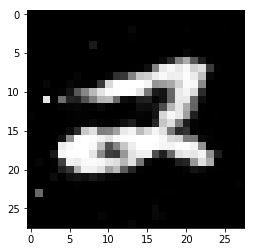

Number batches 468
241(0/468) D: 0.6486, G: 0.9105
241(1/468) D: 0.5932, G: 0.9216
241(2/468) D: 0.6431, G: 0.9072
241(3/468) D: 0.6350, G: 1.0422
241(4/468) D: 0.5863, G: 0.9598
241(5/468) D: 0.5878, G: 0.9391
241(6/468) D: 0.6083, G: 0.8892
241(7/468) D: 0.5841, G: 0.8361
241(8/468) D: 0.5957, G: 0.9150
241(9/468) D: 0.6603, G: 1.0751
241(10/468) D: 0.6700, G: 0.8740
241(11/468) D: 0.6072, G: 0.9737
241(12/468) D: 0.5794, G: 0.9662
241(13/468) D: 0.6850, G: 0.8602
241(14/468) D: 0.6420, G: 0.9851
241(15/468) D: 0.6860, G: 1.0038
241(16/468) D: 0.6609, G: 0.9377
241(17/468) D: 0.6150, G: 0.9479
241(18/468) D: 0.6303, G: 0.9854
241(19/468) D: 0.6243, G: 1.0239
241(20/468) D: 0.6241, G: 0.8854
241(21/468) D: 0.6381, G: 0.9760
241(22/468) D: 0.6007, G: 0.9219
241(23/468) D: 0.5873, G: 0.9000
241(24/468) D: 0.6252, G: 0.9777
241(25/468) D: 0.6530, G: 0.8319
241(26/468) D: 0.6052, G: 0.9678
241(27/468) D: 0.5948, G: 1.2571
241(28/468) D: 0.6575, G: 1.0272
241(29/468) D: 0.6088, G: 0.7915
2

241(244/468) D: 0.5953, G: 1.0049
241(245/468) D: 0.6340, G: 0.9784
241(246/468) D: 0.5866, G: 0.9737
241(247/468) D: 0.5898, G: 1.1217
241(248/468) D: 0.6373, G: 1.0566
241(249/468) D: 0.6251, G: 1.0059
241(250/468) D: 0.6188, G: 0.7896
241(251/468) D: 0.6199, G: 0.9875
241(252/468) D: 0.6060, G: 0.9374
241(253/468) D: 0.5810, G: 0.9499
241(254/468) D: 0.6003, G: 0.9148
241(255/468) D: 0.6555, G: 0.8307
241(256/468) D: 0.6340, G: 1.0305
241(257/468) D: 0.6062, G: 0.9747
241(258/468) D: 0.6099, G: 0.9329
241(259/468) D: 0.6157, G: 1.1050
241(260/468) D: 0.6360, G: 0.7406
241(261/468) D: 0.5972, G: 0.8898
241(262/468) D: 0.5846, G: 0.9793
241(263/468) D: 0.6500, G: 0.9326
241(264/468) D: 0.6575, G: 0.9071
241(265/468) D: 0.6405, G: 0.9242
241(266/468) D: 0.6094, G: 0.9866
241(267/468) D: 0.5901, G: 0.9325
241(268/468) D: 0.5993, G: 0.9186
241(269/468) D: 0.6239, G: 1.2258
241(270/468) D: 0.5770, G: 0.9363
241(271/468) D: 0.6116, G: 0.9709
241(272/468) D: 0.6615, G: 1.0341
241(273/468) D

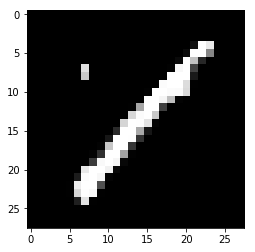

Number batches 468
242(0/468) D: 0.6960, G: 1.0400
242(1/468) D: 0.6006, G: 0.8726
242(2/468) D: 0.6245, G: 0.9451
242(3/468) D: 0.6068, G: 0.8854
242(4/468) D: 0.5659, G: 0.9813
242(5/468) D: 0.6316, G: 0.9095
242(6/468) D: 0.5881, G: 0.9692
242(7/468) D: 0.6102, G: 1.1534
242(8/468) D: 0.6084, G: 1.0231
242(9/468) D: 0.6861, G: 0.8203
242(10/468) D: 0.6578, G: 1.1225
242(11/468) D: 0.6600, G: 0.7096
242(12/468) D: 0.5943, G: 1.0208
242(13/468) D: 0.6535, G: 1.0571
242(14/468) D: 0.6233, G: 0.9000
242(15/468) D: 0.6246, G: 0.8439
242(16/468) D: 0.5967, G: 0.9520
242(17/468) D: 0.6238, G: 0.9069
242(18/468) D: 0.6098, G: 0.9256
242(19/468) D: 0.6001, G: 0.8964
242(20/468) D: 0.5929, G: 0.8803
242(21/468) D: 0.5844, G: 0.9500
242(22/468) D: 0.6242, G: 0.9244
242(23/468) D: 0.6124, G: 1.0434
242(24/468) D: 0.5649, G: 0.8581
242(25/468) D: 0.6571, G: 0.9124
242(26/468) D: 0.6242, G: 1.1262
242(27/468) D: 0.6170, G: 0.9962
242(28/468) D: 0.6436, G: 0.9309
242(29/468) D: 0.6263, G: 1.0197
2

242(244/468) D: 0.6210, G: 0.8576
242(245/468) D: 0.6282, G: 0.9514
242(246/468) D: 0.5992, G: 1.0810
242(247/468) D: 0.6011, G: 1.1551
242(248/468) D: 0.5994, G: 0.8919
242(249/468) D: 0.6132, G: 0.8185
242(250/468) D: 0.6686, G: 0.9635
242(251/468) D: 0.6230, G: 0.8662
242(252/468) D: 0.6526, G: 0.8494
242(253/468) D: 0.5672, G: 1.0180
242(254/468) D: 0.6353, G: 0.7124
242(255/468) D: 0.6536, G: 0.8413
242(256/468) D: 0.6543, G: 0.9947
242(257/468) D: 0.6126, G: 0.9966
242(258/468) D: 0.6117, G: 0.9552
242(259/468) D: 0.6058, G: 0.9991
242(260/468) D: 0.6223, G: 1.0691
242(261/468) D: 0.6440, G: 0.8255
242(262/468) D: 0.6356, G: 0.7686
242(263/468) D: 0.6579, G: 0.9261
242(264/468) D: 0.6581, G: 1.0101
242(265/468) D: 0.6085, G: 0.9193
242(266/468) D: 0.6157, G: 0.8894
242(267/468) D: 0.5909, G: 0.8884
242(268/468) D: 0.6206, G: 0.9122
242(269/468) D: 0.5978, G: 0.9590
242(270/468) D: 0.6236, G: 0.9980
242(271/468) D: 0.6022, G: 0.8787
242(272/468) D: 0.6199, G: 1.0287
242(273/468) D

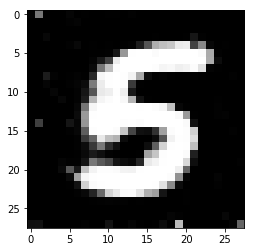

Number batches 468
243(0/468) D: 0.6457, G: 1.0307
243(1/468) D: 0.6073, G: 0.8551
243(2/468) D: 0.6615, G: 1.0139
243(3/468) D: 0.6284, G: 1.0095
243(4/468) D: 0.6441, G: 0.8697
243(5/468) D: 0.6017, G: 0.8565
243(6/468) D: 0.5944, G: 1.0413
243(7/468) D: 0.6095, G: 0.9473
243(8/468) D: 0.6551, G: 0.9087
243(9/468) D: 0.6598, G: 0.9075
243(10/468) D: 0.6609, G: 1.0370
243(11/468) D: 0.6043, G: 0.9646
243(12/468) D: 0.6451, G: 0.7742
243(13/468) D: 0.6847, G: 0.8994
243(14/468) D: 0.6241, G: 0.9594
243(15/468) D: 0.6713, G: 0.9189
243(16/468) D: 0.6273, G: 0.8382
243(17/468) D: 0.6225, G: 0.8759
243(18/468) D: 0.6081, G: 1.0087
243(19/468) D: 0.5931, G: 0.8506
243(20/468) D: 0.5807, G: 0.8541
243(21/468) D: 0.6266, G: 0.9814
243(22/468) D: 0.6212, G: 0.9181
243(23/468) D: 0.6258, G: 0.9959
243(24/468) D: 0.6349, G: 1.0261
243(25/468) D: 0.6655, G: 0.7869
243(26/468) D: 0.6249, G: 0.8103
243(27/468) D: 0.6050, G: 1.0401
243(28/468) D: 0.6227, G: 0.9794
243(29/468) D: 0.6532, G: 0.8565
2

243(245/468) D: 0.6187, G: 0.9346
243(246/468) D: 0.5927, G: 1.0129
243(247/468) D: 0.5609, G: 1.1400
243(248/468) D: 0.5567, G: 0.8711
243(249/468) D: 0.5983, G: 0.9046
243(250/468) D: 0.6721, G: 1.0317
243(251/468) D: 0.6293, G: 1.0322
243(252/468) D: 0.6181, G: 0.9012
243(253/468) D: 0.6146, G: 0.9536
243(254/468) D: 0.6539, G: 0.9678
243(255/468) D: 0.6708, G: 0.8684
243(256/468) D: 0.6094, G: 0.8956
243(257/468) D: 0.6188, G: 1.0179
243(258/468) D: 0.6580, G: 0.9192
243(259/468) D: 0.6080, G: 0.9937
243(260/468) D: 0.6305, G: 0.8743
243(261/468) D: 0.6139, G: 0.8851
243(262/468) D: 0.5872, G: 0.9048
243(263/468) D: 0.6531, G: 0.9721
243(264/468) D: 0.6313, G: 0.9401
243(265/468) D: 0.6208, G: 0.8465
243(266/468) D: 0.5887, G: 1.0263
243(267/468) D: 0.5948, G: 0.9506
243(268/468) D: 0.6185, G: 0.8887
243(269/468) D: 0.5852, G: 0.8760
243(270/468) D: 0.6076, G: 0.8324
243(271/468) D: 0.6325, G: 0.8686
243(272/468) D: 0.5760, G: 1.0508
243(273/468) D: 0.6294, G: 0.7546
243(274/468) D

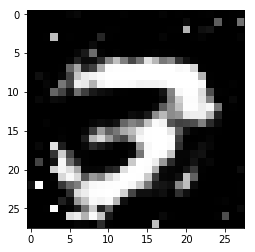

Number batches 468
244(0/468) D: 0.6429, G: 0.9355
244(1/468) D: 0.6527, G: 1.0700
244(2/468) D: 0.6615, G: 0.9156
244(3/468) D: 0.6193, G: 0.9674
244(4/468) D: 0.6208, G: 1.0925
244(5/468) D: 0.6290, G: 1.0203
244(6/468) D: 0.6218, G: 0.9464
244(7/468) D: 0.5908, G: 1.0387
244(8/468) D: 0.5978, G: 1.0421
244(9/468) D: 0.6846, G: 0.8044
244(10/468) D: 0.6958, G: 0.9056
244(11/468) D: 0.6113, G: 1.0243
244(12/468) D: 0.6566, G: 0.8526
244(13/468) D: 0.6521, G: 0.8374
244(14/468) D: 0.6359, G: 0.9208
244(15/468) D: 0.6347, G: 1.0317
244(16/468) D: 0.6274, G: 0.8553
244(17/468) D: 0.6307, G: 0.7626
244(18/468) D: 0.6270, G: 0.9537
244(19/468) D: 0.6115, G: 0.8983
244(20/468) D: 0.6251, G: 0.9337
244(21/468) D: 0.6446, G: 1.0621
244(22/468) D: 0.6190, G: 0.9592
244(23/468) D: 0.5642, G: 0.9402
244(24/468) D: 0.5958, G: 0.9414
244(25/468) D: 0.6188, G: 0.9954
244(26/468) D: 0.5982, G: 1.0382
244(27/468) D: 0.6093, G: 1.0161
244(28/468) D: 0.6207, G: 0.9355
244(29/468) D: 0.6435, G: 0.9206
2

244(245/468) D: 0.6868, G: 1.0096
244(246/468) D: 0.6096, G: 1.1381
244(247/468) D: 0.5492, G: 1.0177
244(248/468) D: 0.5859, G: 0.9313
244(249/468) D: 0.5895, G: 0.9990
244(250/468) D: 0.6418, G: 0.9859
244(251/468) D: 0.6103, G: 0.8718
244(252/468) D: 0.6275, G: 1.0507
244(253/468) D: 0.6086, G: 1.0485
244(254/468) D: 0.6397, G: 0.7305
244(255/468) D: 0.6697, G: 0.8042
244(256/468) D: 0.6559, G: 0.9772
244(257/468) D: 0.6310, G: 1.0180
244(258/468) D: 0.6404, G: 0.9380
244(259/468) D: 0.6623, G: 0.9688
244(260/468) D: 0.6354, G: 0.8750
244(261/468) D: 0.5927, G: 0.9991
244(262/468) D: 0.6033, G: 0.8839
244(263/468) D: 0.6559, G: 0.8126
244(264/468) D: 0.6311, G: 0.9857
244(265/468) D: 0.6358, G: 0.9492
244(266/468) D: 0.5826, G: 0.9699
244(267/468) D: 0.6246, G: 0.9164
244(268/468) D: 0.5965, G: 0.9331
244(269/468) D: 0.5895, G: 1.0282
244(270/468) D: 0.6544, G: 1.0330
244(271/468) D: 0.6502, G: 0.8208
244(272/468) D: 0.5972, G: 0.9052
244(273/468) D: 0.6049, G: 1.0008
244(274/468) D

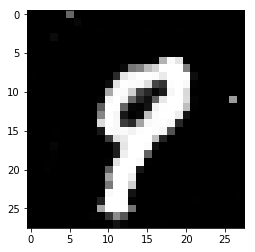

Number batches 468
245(0/468) D: 0.6471, G: 0.9475
245(1/468) D: 0.6496, G: 0.8837
245(2/468) D: 0.6242, G: 0.8685
245(3/468) D: 0.5892, G: 0.9556
245(4/468) D: 0.6112, G: 0.9386
245(5/468) D: 0.6170, G: 0.8935
245(6/468) D: 0.6368, G: 0.9290
245(7/468) D: 0.5913, G: 0.9796
245(8/468) D: 0.6086, G: 1.2375
245(9/468) D: 0.6337, G: 0.8207
245(10/468) D: 0.6566, G: 0.9448
245(11/468) D: 0.6039, G: 1.1908
245(12/468) D: 0.5813, G: 0.8287
245(13/468) D: 0.6302, G: 1.0958
245(14/468) D: 0.6337, G: 0.8583
245(15/468) D: 0.6493, G: 0.8012
245(16/468) D: 0.6085, G: 1.1263
245(17/468) D: 0.6339, G: 0.8565
245(18/468) D: 0.5980, G: 1.0074
245(19/468) D: 0.6278, G: 1.0451
245(20/468) D: 0.5841, G: 0.8097
245(21/468) D: 0.6131, G: 0.8874
245(22/468) D: 0.6259, G: 0.8825
245(23/468) D: 0.5960, G: 0.9593
245(24/468) D: 0.5684, G: 0.9793
245(25/468) D: 0.6464, G: 0.9486
245(26/468) D: 0.5919, G: 0.8999
245(27/468) D: 0.6325, G: 0.9234
245(28/468) D: 0.6270, G: 0.9837
245(29/468) D: 0.6489, G: 0.8632
2

245(245/468) D: 0.6171, G: 0.8910
245(246/468) D: 0.6162, G: 0.9750
245(247/468) D: 0.5606, G: 1.1475
245(248/468) D: 0.6254, G: 1.0698
245(249/468) D: 0.5771, G: 0.9195
245(250/468) D: 0.6488, G: 0.8014
245(251/468) D: 0.6440, G: 1.0885
245(252/468) D: 0.6161, G: 0.8770
245(253/468) D: 0.6538, G: 1.0130
245(254/468) D: 0.6135, G: 0.9867
245(255/468) D: 0.6636, G: 0.7805
245(256/468) D: 0.6198, G: 1.0045
245(257/468) D: 0.6092, G: 0.9919
245(258/468) D: 0.6005, G: 0.9921
245(259/468) D: 0.5715, G: 0.8703
245(260/468) D: 0.6309, G: 0.8802
245(261/468) D: 0.5938, G: 1.0457
245(262/468) D: 0.6365, G: 0.8874
245(263/468) D: 0.6287, G: 0.9436
245(264/468) D: 0.6339, G: 0.9171
245(265/468) D: 0.6265, G: 0.9662
245(266/468) D: 0.5951, G: 0.9241
245(267/468) D: 0.6012, G: 0.9327
245(268/468) D: 0.6286, G: 0.9986
245(269/468) D: 0.5957, G: 0.9121
245(270/468) D: 0.6442, G: 0.9220
245(271/468) D: 0.6676, G: 0.9562
245(272/468) D: 0.5788, G: 0.9694
245(273/468) D: 0.6292, G: 0.8980
245(274/468) D

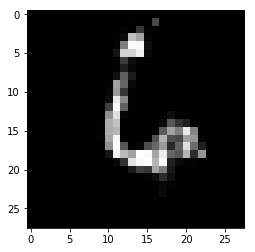

Number batches 468
246(0/468) D: 0.6542, G: 1.0031
246(1/468) D: 0.6071, G: 0.9152
246(2/468) D: 0.6331, G: 0.9179
246(3/468) D: 0.5980, G: 0.9948
246(4/468) D: 0.5641, G: 0.9987
246(5/468) D: 0.6216, G: 1.1063
246(6/468) D: 0.5943, G: 1.1769
246(7/468) D: 0.6003, G: 0.7784
246(8/468) D: 0.5955, G: 1.0077
246(9/468) D: 0.6785, G: 1.0785
246(10/468) D: 0.6431, G: 0.9428
246(11/468) D: 0.6027, G: 0.9485
246(12/468) D: 0.6186, G: 0.9546
246(13/468) D: 0.6388, G: 0.8601
246(14/468) D: 0.6004, G: 1.0175
246(15/468) D: 0.6310, G: 0.9706
246(16/468) D: 0.6360, G: 0.9856
246(17/468) D: 0.6165, G: 0.8871
246(18/468) D: 0.6433, G: 0.9759
246(19/468) D: 0.5889, G: 1.0517
246(20/468) D: 0.5926, G: 0.9430
246(21/468) D: 0.5725, G: 1.0614
246(22/468) D: 0.6331, G: 0.9210
246(23/468) D: 0.5733, G: 0.8826
246(24/468) D: 0.6015, G: 1.0042
246(25/468) D: 0.6266, G: 0.9804
246(26/468) D: 0.5678, G: 0.9297
246(27/468) D: 0.6306, G: 1.1428
246(28/468) D: 0.6375, G: 1.0011
246(29/468) D: 0.5716, G: 0.7945
2

246(245/468) D: 0.6180, G: 0.9661
246(246/468) D: 0.5958, G: 1.1184
246(247/468) D: 0.5856, G: 1.0082
246(248/468) D: 0.5997, G: 0.9128
246(249/468) D: 0.6330, G: 1.1650
246(250/468) D: 0.6759, G: 0.9260
246(251/468) D: 0.6361, G: 0.7428
246(252/468) D: 0.6524, G: 0.8973
246(253/468) D: 0.6267, G: 0.9388
246(254/468) D: 0.5898, G: 0.9750
246(255/468) D: 0.6312, G: 0.8556
246(256/468) D: 0.5946, G: 0.9203
246(257/468) D: 0.5910, G: 0.8853
246(258/468) D: 0.6375, G: 0.9497
246(259/468) D: 0.5855, G: 0.9900
246(260/468) D: 0.5920, G: 0.9442
246(261/468) D: 0.6249, G: 0.8895
246(262/468) D: 0.5920, G: 0.8250
246(263/468) D: 0.6571, G: 0.9302
246(264/468) D: 0.6399, G: 0.8466
246(265/468) D: 0.5973, G: 0.9281
246(266/468) D: 0.6211, G: 0.9886
246(267/468) D: 0.5701, G: 1.0118
246(268/468) D: 0.6186, G: 0.8382
246(269/468) D: 0.5923, G: 1.0128
246(270/468) D: 0.6246, G: 0.9945
246(271/468) D: 0.6321, G: 0.7562
246(272/468) D: 0.6194, G: 0.8929
246(273/468) D: 0.6269, G: 1.0744
246(274/468) D

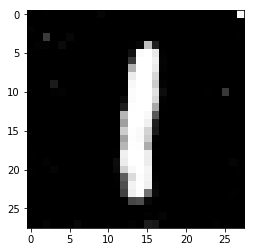

Number batches 468
247(0/468) D: 0.6344, G: 0.8186
247(1/468) D: 0.6750, G: 1.0965
247(2/468) D: 0.6359, G: 0.9367
247(3/468) D: 0.6338, G: 0.8444
247(4/468) D: 0.6233, G: 1.0076
247(5/468) D: 0.6086, G: 0.9059
247(6/468) D: 0.5824, G: 1.0976
247(7/468) D: 0.5860, G: 1.0117
247(8/468) D: 0.6244, G: 0.9746
247(9/468) D: 0.6680, G: 0.9125
247(10/468) D: 0.6200, G: 0.9618
247(11/468) D: 0.5860, G: 0.9465
247(12/468) D: 0.6332, G: 0.9959
247(13/468) D: 0.6232, G: 0.8958
247(14/468) D: 0.6333, G: 0.8232
247(15/468) D: 0.6745, G: 0.9538
247(16/468) D: 0.6271, G: 0.9960
247(17/468) D: 0.6719, G: 0.9757
247(18/468) D: 0.5942, G: 0.8595
247(19/468) D: 0.6235, G: 0.9989
247(20/468) D: 0.6106, G: 0.9697
247(21/468) D: 0.6227, G: 0.9268
247(22/468) D: 0.6557, G: 0.9467
247(23/468) D: 0.5767, G: 0.9331
247(24/468) D: 0.5750, G: 0.9937
247(25/468) D: 0.6361, G: 0.9760
247(26/468) D: 0.6107, G: 0.9958
247(27/468) D: 0.6400, G: 0.8895
247(28/468) D: 0.6141, G: 0.9986
247(29/468) D: 0.5991, G: 1.0273
2

247(245/468) D: 0.6348, G: 1.1774
247(246/468) D: 0.5726, G: 0.7849
247(247/468) D: 0.5585, G: 1.0154
247(248/468) D: 0.6358, G: 1.1127
247(249/468) D: 0.6016, G: 0.9744
247(250/468) D: 0.6908, G: 0.8771
247(251/468) D: 0.6407, G: 0.9962
247(252/468) D: 0.6718, G: 1.0510
247(253/468) D: 0.6219, G: 0.9247
247(254/468) D: 0.6331, G: 0.7643
247(255/468) D: 0.6617, G: 0.8390
247(256/468) D: 0.6295, G: 1.0447
247(257/468) D: 0.5929, G: 0.8351
247(258/468) D: 0.5729, G: 0.9940
247(259/468) D: 0.6015, G: 0.8649
247(260/468) D: 0.6033, G: 0.9963
247(261/468) D: 0.6342, G: 0.9101
247(262/468) D: 0.6091, G: 0.8635
247(263/468) D: 0.6221, G: 0.9298
247(264/468) D: 0.6351, G: 0.9323
247(265/468) D: 0.5869, G: 0.8950
247(266/468) D: 0.6466, G: 1.0319
247(267/468) D: 0.6051, G: 0.8619
247(268/468) D: 0.6052, G: 0.8712
247(269/468) D: 0.5848, G: 1.0537
247(270/468) D: 0.6022, G: 0.9459
247(271/468) D: 0.6270, G: 0.8196
247(272/468) D: 0.6408, G: 1.0283
247(273/468) D: 0.5790, G: 1.0581
247(274/468) D

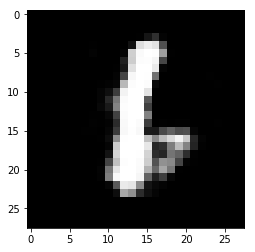

Number batches 468
248(0/468) D: 0.6552, G: 0.9238
248(1/468) D: 0.6331, G: 0.9420
248(2/468) D: 0.6277, G: 0.8915
248(3/468) D: 0.6413, G: 0.9268
248(4/468) D: 0.5840, G: 1.0381
248(5/468) D: 0.5666, G: 0.9220
248(6/468) D: 0.5835, G: 0.9561
248(7/468) D: 0.5719, G: 1.1254
248(8/468) D: 0.5945, G: 0.9248
248(9/468) D: 0.6830, G: 1.0330
248(10/468) D: 0.6722, G: 1.0475
248(11/468) D: 0.6095, G: 0.9607
248(12/468) D: 0.6041, G: 0.9741
248(13/468) D: 0.6438, G: 0.8501
248(14/468) D: 0.6099, G: 0.9865
248(15/468) D: 0.6261, G: 0.9301
248(16/468) D: 0.6437, G: 1.0411
248(17/468) D: 0.6082, G: 0.9143
248(18/468) D: 0.6363, G: 0.9680
248(19/468) D: 0.6015, G: 1.0003
248(20/468) D: 0.6348, G: 0.8573
248(21/468) D: 0.6409, G: 0.8909
248(22/468) D: 0.6360, G: 0.9282
248(23/468) D: 0.5885, G: 0.9555
248(24/468) D: 0.5550, G: 0.9915
248(25/468) D: 0.6245, G: 0.7520
248(26/468) D: 0.6494, G: 0.9499
248(27/468) D: 0.5519, G: 1.1266
248(28/468) D: 0.6408, G: 0.9186
248(29/468) D: 0.6056, G: 0.8666
2

248(245/468) D: 0.6025, G: 0.8830
248(246/468) D: 0.6359, G: 1.0418
248(247/468) D: 0.5740, G: 1.1175
248(248/468) D: 0.6096, G: 1.0325
248(249/468) D: 0.6536, G: 0.9640
248(250/468) D: 0.6349, G: 0.8762
248(251/468) D: 0.6200, G: 0.9155
248(252/468) D: 0.6032, G: 0.9147
248(253/468) D: 0.6074, G: 0.9726
248(254/468) D: 0.6533, G: 0.9996
248(255/468) D: 0.7120, G: 0.8483
248(256/468) D: 0.6126, G: 1.0083
248(257/468) D: 0.6598, G: 0.9572
248(258/468) D: 0.6101, G: 0.9967
248(259/468) D: 0.6349, G: 0.9259
248(260/468) D: 0.5835, G: 0.8609
248(261/468) D: 0.6109, G: 0.9376
248(262/468) D: 0.6366, G: 0.8767
248(263/468) D: 0.6352, G: 0.8160
248(264/468) D: 0.6702, G: 0.9133
248(265/468) D: 0.6212, G: 0.9830
248(266/468) D: 0.6104, G: 0.9408
248(267/468) D: 0.6298, G: 0.9921
248(268/468) D: 0.6694, G: 0.9968
248(269/468) D: 0.6070, G: 0.9085
248(270/468) D: 0.6082, G: 0.9082
248(271/468) D: 0.5928, G: 0.9547
248(272/468) D: 0.6348, G: 1.0471
248(273/468) D: 0.6206, G: 0.9911
248(274/468) D

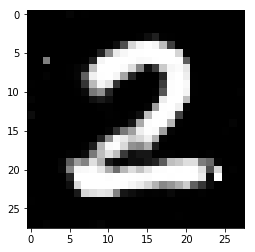

Number batches 468
249(0/468) D: 0.5873, G: 0.9065
249(1/468) D: 0.6228, G: 1.0127
249(2/468) D: 0.6597, G: 0.9170
249(3/468) D: 0.6422, G: 0.8111
249(4/468) D: 0.6133, G: 1.0361
249(5/468) D: 0.6305, G: 0.9799
249(6/468) D: 0.5844, G: 0.8442
249(7/468) D: 0.6084, G: 1.0473
249(8/468) D: 0.6280, G: 1.0000
249(9/468) D: 0.6796, G: 0.9697
249(10/468) D: 0.6331, G: 1.0940
249(11/468) D: 0.6079, G: 0.8881
249(12/468) D: 0.6363, G: 0.8071
249(13/468) D: 0.6176, G: 0.8612
249(14/468) D: 0.6110, G: 1.0301
249(15/468) D: 0.6372, G: 0.9438
249(16/468) D: 0.6445, G: 1.0765
249(17/468) D: 0.6196, G: 0.8936
249(18/468) D: 0.6068, G: 0.8741
249(19/468) D: 0.6158, G: 0.9757
249(20/468) D: 0.5823, G: 1.0290
249(21/468) D: 0.6018, G: 0.9685
249(22/468) D: 0.6280, G: 0.9268
249(23/468) D: 0.5847, G: 0.8577
249(24/468) D: 0.6089, G: 1.0168
249(25/468) D: 0.6211, G: 0.9711
249(26/468) D: 0.6016, G: 0.9204
249(27/468) D: 0.5918, G: 0.7961
249(28/468) D: 0.6266, G: 1.0279
249(29/468) D: 0.6405, G: 0.9709
2

249(244/468) D: 0.6063, G: 0.9584
249(245/468) D: 0.6039, G: 0.9471
249(246/468) D: 0.5999, G: 1.0103
249(247/468) D: 0.5712, G: 1.0961
249(248/468) D: 0.5958, G: 1.1505
249(249/468) D: 0.6454, G: 0.9824
249(250/468) D: 0.6390, G: 0.9649
249(251/468) D: 0.5882, G: 0.9881
249(252/468) D: 0.5817, G: 0.9169
249(253/468) D: 0.6199, G: 0.9834
249(254/468) D: 0.6210, G: 1.0665
249(255/468) D: 0.6473, G: 0.7837
249(256/468) D: 0.6116, G: 0.8246
249(257/468) D: 0.6356, G: 0.9668
249(258/468) D: 0.6182, G: 1.0092
249(259/468) D: 0.6298, G: 0.9228
249(260/468) D: 0.6607, G: 0.8861
249(261/468) D: 0.6113, G: 0.7862
249(262/468) D: 0.5954, G: 0.9014
249(263/468) D: 0.6704, G: 0.8077
249(264/468) D: 0.6460, G: 0.8940
249(265/468) D: 0.6047, G: 0.9988
249(266/468) D: 0.5769, G: 0.9248
249(267/468) D: 0.5680, G: 0.8713
249(268/468) D: 0.6311, G: 0.9961
249(269/468) D: 0.5972, G: 0.9303
249(270/468) D: 0.6631, G: 1.0032
249(271/468) D: 0.6077, G: 0.8195
249(272/468) D: 0.5978, G: 0.9188
249(273/468) D

In [9]:
# Keep this. 
batch_size = 128

for epoch in range(250):
    print('Epoch #%d' % epoch)
    
    # Generate an image and display it.
    disp_sample(g)
    
    num_batches = int(x_train.shape[0] / batch_size)
    print('Number batches %i' % num_batches)
    for i in range(num_batches):
        
        # Generate noise.
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Generate images from the noise using the generator.
        generated_images = g.predict(noise)
        
        # Grab the image batch for this iteration. 
        real_images = x_train[i * batch_size: (i+1) * batch_size]
        
        # Train the discriminator using the generated images and the real images.
        # Contains the real and fake images.
        X = np.concatenate((generated_images, real_images))
        
        # Labels if the sample is real (1) or not real (0). 
        y = [0] * batch_size + [1] * batch_size
        
        # Remember that the discriminator has to have d.trainable = True!
        d.trainable = True
        d_loss = d.train_on_batch(X, y)
        d.trainable = False
        
        # Generate more noise to feed into the full gan network to train the generative portion. 
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Get the g_loss (fill in the ... part between the parantheses)
        g_loss = dg.train_on_batch(noise, [1]*batch_size)
        
        print('%i(%i/%i) D: %.4f, G: %.4f' % (epoch, i, num_batches, d_loss, g_loss))

# Why is my generative loss oscillating???   
# Don't worry this is normal as the generator is oscillating between possible solutions
        